In [1]:
from pyscf import gto, dft
from pyscf.tools import cubegen
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.signal import find_peaks

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [2]:
def make_CH4(distance, basis):
    mol = gto.M(atom=str.format('C  0.92745       -0.05402        0.04264; H          2.01965       -0.05402        0.04264; H          0.56338        0.81142        0.60065; H          0.56338       -0.96998        0.51313; H          0.56338       -0.00348       {d}', d=distance), basis=basis)
    return mol

In [2]:
def shannon_entropy(mol, xc, outfile="out.cube"):
    mf = dft.RKS(mol)
    mf.xc = xc
    mf.kernel()

    density = mf.make_rdm1()
    cube = cubegen.density(mol, outfile, density)

    z = np.sum(cube)    # partition function
    cube /= z           # normalize densities
    
    
    return -np.sum(cube * np.log(cube))    

In [5]:
basis = 'sto-3g'
xc = 'B3LYP'

x = np.linspace(0.01, 2.5, num=1000)
y = np.zeros(len(x))
for i in range(len(x)):
    print(i)
    y[i] = shannon_entropy(make_H2(x[i], basis), xc)

0
converged SCF energy = -37.5724777163175
1
converged SCF energy = -37.5677617910093
2
converged SCF energy = -37.563274537365
3
converged SCF energy = -37.5590174592589
4
converged SCF energy = -37.5549919557968
5
converged SCF energy = -37.5511993197609
6
converged SCF energy = -37.5476407361599
7
converged SCF energy = -37.5443172808743
8
converged SCF energy = -37.5412299195116
9
converged SCF energy = -37.5383795063072
10
converged SCF energy = -37.5357667832393
11
converged SCF energy = -37.5333923792285
12
converged SCF energy = -37.5312568095475
13
converged SCF energy = -37.5293604753253
14
converged SCF energy = -37.5277036631992
15
converged SCF energy = -37.5262865451861
16
converged SCF energy = -37.5251091786167
17
converged SCF energy = -37.5241715062699
18
converged SCF energy = -37.5234733566632
19
converged SCF energy = -37.523014444485
20
converged SCF energy = -37.5227943711323
21
converged SCF energy = -37.5228126254588
22
converged SCF energy = -37.5230685846441


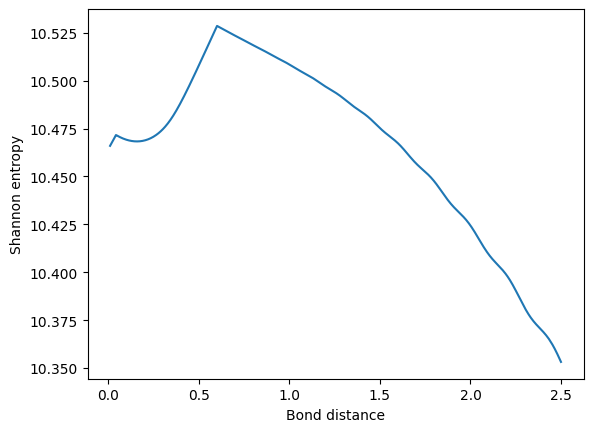

In [9]:
plt.xlabel('Bond distance')
plt.ylabel('Shannon entropy')
plt.plot(x, y)

In [8]:
hydrogen_atom = gto.M(atom='H', basis='sto-3g', charge=0, spin=1)
hydrogen_atom_entropy = shannon_entropy(hydrogen_atom, xc='B3LYP')
h2_close = make_H2(1e-5, basis='sto-3g')
h2_close_entropy = shannon_entropy(h2_close, xc='B3LYP')

print("-----")
print("Hydrogen atom\t", hydrogen_atom_entropy)
print("H2 (close)\t", h2_close_entropy)


converged SCF energy = -0.467532587401397

WARN: Singularity detected in overlap matrix (condition number = 2.21e+10). SCF may be inaccurate and hard to converge.

converged SCF energy = 52915.0645681349
-----
Hydrogen atom	 11.176883840994918
H2 (close)	 11.176881056160868


In [9]:
helium_ion = gto.M(atom='He', basis='sto-3g', charge=1, spin=1)
helium_ion_entropy = shannon_entropy(helium_ion, xc='B3LYP')
helium_atom = gto.M(atom='He', basis='sto-3g', charge=0, spin=0)
helium_atom_entropy = shannon_entropy(helium_atom, xc='B3LYP')

print("-----")
print("Helium ion\t", helium_ion_entropy)
print("Helium atom\t", helium_atom_entropy)

converged SCF energy = -1.93087151970594
converged SCF energy = -2.8527315333317
-----
Helium ion	 10.299744118386043
Helium atom	 10.299744118386043


In [5]:
def make_diatomic(atom_1, atom_2, distance, basis):
    mol = gto.M(atom=str.format("{atom_1} 0 0 0 ; {atom_2} 0 0 {d}", atom_1=atom_1, atom_2=atom_2, d=distance), basis=basis)
    return mol

In [109]:
basis = 'sto-3g'
xc = 'B3LYP'

atoms = ["F", "Cl", "Br", "I"]
for atom in atoms:
    num_points = 25
    x = np.linspace(0.01, 2.5, num=num_points)
    y = np.zeros(len(x))

    atom_1 = "H"
    atom_2 = atom

    for i in range(len(x)):
        print(i)
        y[i] = shannon_entropy(make_diatomic(atom_1, atom_2, x[i], basis), xc)
        
    plt.xlabel("Bond distance")
    plt.ylabel("Shannon entropy")
    plt.plot(x, y)
    plt.savefig(str.format("diatomic/{num}/{atom_1}_{atom_2}.png", num=num_points, atom_1=atom_1, atom_2=atom_2))
    plt.close()

0
converged SCF energy = 351.045954383892
1
converged SCF energy = -74.7457479955099
2
converged SCF energy = -90.5417887832704
3
converged SCF energy = -95.3772741235975
4
converged SCF energy = -97.3391436338432
5
converged SCF energy = -98.2138603267663
6
converged SCF energy = -98.6193037624534
7
converged SCF energy = -98.8088438967781
8
converged SCF energy = -98.8933947314773
9
converged SCF energy = -98.9233589332634
10
converged SCF energy = -98.9238577751293
11
converged SCF energy = -98.9087808543744
12
converged SCF energy = -98.8859596096594
13
converged SCF energy = -98.8596021130556
14
converged SCF energy = -98.8319476999116
15
converged SCF energy = -98.8043484926305
16
converged SCF energy = -98.777780982679
17
converged SCF energy = -98.752972652535
18
converged SCF energy = -98.7303944386
19
converged SCF energy = -98.7102692459762
20
converged SCF energy = -98.6926209171833
21
SCF not converged.
SCF energy = -98.1836376742445
22
SCF not converged.
SCF energy = -98.

In [7]:
basis = 'sto-3g'
xc = 'B3LYP'

atoms = ["O", "N"]
for atom in atoms:
    num_points = 1000
    x = np.linspace(0.01, 2.5, num=num_points)
    y = np.zeros(len(x))

    atom_1 = atom
    atom_2 = atom

    for i in range(len(x)):
        print(i)
        y[i] = shannon_entropy(make_diatomic(atom_1, atom_2, x[i], basis), xc)
        
    plt.xlabel("Bond distance")
    plt.ylabel("Shannon entropy")
    plt.plot(x, y)
    plt.savefig(str.format("diatomic/{num}/{atom_1}_{atom_2}.png", num=num_points, atom_1=atom_1, atom_2=atom_2))
    plt.close()

0
converged SCF energy = 3087.98926354844
1
SCF not converged.
SCF energy = 2412.72537891679
2
SCF not converged.
SCF energy = 1962.33862589664
3
converged SCF energy = 1640.65020374685
4
SCF not converged.
SCF energy = 1399.49432709083
5
converged SCF energy = 1212.07973046968
6
converged SCF energy = 1062.31513937601
7
converged SCF energy = 939.950932928431
8
converged SCF energy = 838.147734863489
9
converged SCF energy = 752.165961064472
10
converged SCF energy = 678.616903903567
11
converged SCF energy = 615.012943512111
12
converged SCF energy = 559.486415237559
13
converged SCF energy = 510.6077327428
14
converged SCF energy = 467.263863414024
15
converged SCF energy = 428.575465725576
16
converged SCF energy = 393.838645125302
17
converged SCF energy = 362.483407933242
18
converged SCF energy = 334.043414402628
19
converged SCF energy = 308.133599152603
20
converged SCF energy = 284.433358712476
21
converged SCF energy = 262.673746295661
22
converged SCF energy = 242.627629354

In [21]:
def make_triatomic(mid_atom, end_atom, eqb_dist, angle, basis):
    x = eqb_dist * math.cos(angle)
    y = eqb_dist * math.sin(angle)

    mol = gto.M(str.format("{mid} 0 0 0 ; {end} {eqb} 0 0 ; {end} {x} {y} 0", mid=mid_atom, end=end_atom, eqb=eqb_dist, x=x, y=y), basis=basis)

    return mol

In [22]:
basis = 'sto-3g'
xc = 'B3LYP'

num_points = 1000
x = np.linspace(0.01, 180, num=num_points)
y = np.zeros(len(x))

for i in range(len(x)):
    print(i)
    y[i] = shannon_entropy(make_triatomic("O", "H", 0.95785, x[i], basis), xc=xc)
    
plt.xlabel("Bond angle")
plt.ylabel("Shannon entropy")
plt.plot(x, y)
plt.savefig(str.format("triatomic/{num}/H2O.png", num=num_points))
plt.close()

0
converged SCF energy = -21.0991985284685


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9578021078991028 0.00957834035913154 0 to mol.atom


1
converged SCF energy = -73.3433754696968


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9405819594608857 0.1810585541661056 0 to mol.atom


2
converged SCF energy = -74.5885798071233


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8929118114495741 0.346677255489656 0 to mol.atom


3
converged SCF energy = -74.9383403157554


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8163349169246096 0.5010727750633542 0 to mol.atom


4
converged SCF energy = -75.0929967150423


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7133303436398865 0.6392467781245373 0 to mol.atom


5
converged SCF energy = -75.1821738811424


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5872327177606188 0.7567260783741216 0 to mol.atom


6
converged SCF energy = -75.2401020443685


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4421242700967538 0.8497074510038221 0 to mol.atom


7
converged SCF energy = -75.2781798664889


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2827026797021723 0.9151807566755383 0 to mol.atom


8
converged SCF energy = -75.301270018305


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1141289932146804 0.9510263904896663 0 to mol.atom


9
converged SCF energy = -75.3121302540308


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.05813945666871649 0.9560839011709518 0 to mol.atom


10
converged SCF energy = -75.3128087110892


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.22852572455517492 0.9301895590236069 0 to mol.atom


11
converged SCF energy = -75.3051087635094


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3915137980098217 0.8741816564467162 0 to mol.atom


12
converged SCF energy = -75.2908382648994


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5418271705919437 0.7898733694133059 0 to mol.atom


13
converged SCF energy = -75.2721043460766


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6745996612261785 0.6799940584839879 0 to mol.atom


14
converged SCF energy = -75.2516245585171


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7855329498751652 0.5481009096511528 0 to mol.atom


15
converged SCF energy = -75.232762982065


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8710357295209166 0.3984637755153717 0 to mol.atom


16
converged SCF energy = -75.2188054269129


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9283399696079632 0.23592694489669022 0 to mol.atom


17
converged SCF energy = -75.2118881178461


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.955590527085095 0.06575231589252475 0 to mol.atom


18
converged SCF energy = -75.2128318729236


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9519052040160249 -0.10655095056924681 0 to mol.atom


19
converged SCF energy = -75.2215368947641


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9174033074794727 -0.2754047819587088 0 to mol.atom


20
converged SCF energy = -75.2369066296227


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.853201787172636 -0.43534277628716883 0 to mol.atom


21
converged SCF energy = -75.2564726393582


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7613790757576246 -0.5811871690759056 0 to mol.atom


22
converged SCF energy = -75.2768234920477


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6449078025680802 -0.7082164560971526 0 to mol.atom


23
converged SCF energy = -75.2947163697221


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5075585589737678 -0.812318245340133 0 to mol.atom


24
converged SCF energy = -75.3076016712355


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3537778308622199 -0.8901223898377247 0 to mol.atom


25
converged SCF energy = -75.3134714551338


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.1885440499992683 -0.9391100913683514 0 to mol.atom


26
converged SCF energy = -75.3105445398509


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.017206424400364177 -0.9576954429563475 0 to mol.atom


27
converged SCF energy = -75.2969812335661


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1546882346504104 -0.9452767703486316 0 to mol.atom


28
converged SCF energy = -75.2706275048548


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.32157508270535556 -0.9022561103606025 0 to mol.atom


29
converged SCF energy = -75.2284106954139


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.47805139605611696 -0.8300261955075862 0 to mol.atom


30
converged SCF energy = -75.1645203405193


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6190514772089214 -0.7309253662758272 0 to mol.atom


31
converged SCF energy = -75.0644776880156


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7400106496167409 -0.6081618706839561 0 to mol.atom


32
converged SCF energy = -74.8822882631241


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8370130325728138 -0.46571000182867206 0 to mol.atom


33
converged SCF energy = -74.4330565524302


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9069183122640896 -0.3081814358134754 0 to mol.atom


34
converged SCF energy = -72.5354759175379


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9474634049525213 -0.14067593531153233 0 to mol.atom


35
converged SCF energy = -59.4836650707276


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9573357210836999 0.03138374797809173 0 to mol.atom


36
converged SCF energy = -73.6336661482972


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9362156585017939 0.20242742718330542 0 to mol.atom


37
converged SCF energy = -74.6549184747614


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8847869491135594 0.366917807115326 0 to mol.atom


38
converged SCF energy = -74.9641341792511


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8047145240429302 0.5195297463036743 0 to mol.atom


39
converged SCF energy = -75.1067596671156


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6985906138602381 0.6553226508570993 0 to mol.atom


40
converged SCF energy = -75.1908730181187


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5698508288142808 0.7699004191450197 0 to mol.atom


41
converged SCF energy = -75.2458746444358


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.42266293585004205 0.8595537593185334 0 to mol.atom


42
converged SCF energy = -75.2818565811808


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.261791933097505 0.9213802723441996 0 to mol.atom


43
converged SCF energy = -75.3032713999092


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.09244578985255648 0.9533784130336374 0 to mol.atom


44
converged SCF energy = -75.3127392453843


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.07989315400187744 0.9545122872145922 0 to mol.atom


45
converged SCF energy = -75.3122618108668


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.24964567093117077 0.9247451873274742 0 to mol.atom


46
converged SCF energy = -75.3036283654869


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.41131626528389653 0.8650407807802515 0 to mol.atom


47
converged SCF energy = -75.288667837738


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5596710821264093 0.7773319125904031 0 to mol.atom


48
converged SCF energy = -75.2695477962306


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6899073458323197 0.6644580322839089 0 to mol.atom


49
converged SCF energy = -75.2490775848923


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7978088430941541 0.5300732707661906 0 to mol.atom


50
converged SCF energy = -75.2306696817552


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.879882416816447 0.3785281430452011 0 to mol.atom


51
converged SCF energy = -75.2175145056011


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9334710520951077 0.21472870651231693 0 to mol.atom


52
converged SCF energy = -75.2115676925339


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.956839893285772 0.04397773433082339 0 to mol.atom


53
converged SCF energy = -75.2135148745578


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9492324074812094 -0.12819695428295938 0 to mol.atom


54
converged SCF energy = -75.223148580257


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.910894876185303 -0.2962214493235785 0 to mol.atom


55
converged SCF energy = -75.239213866178


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8430684223005824 -0.4546561973839208 0 to mol.atom


56
converged SCF energy = -75.2590742250949


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7479488305442235 -0.5983720994394112 0 to mol.atom


57
converged SCF energy = -75.2792804562438


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6286154620492354 -0.7227165581143318 0 to mol.atom


58
converged SCF energy = -75.2966667745912


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4889315644392607 -0.8236640988867834 0 to mol.atom


59
converged SCF energy = -75.3087686901225


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.333419204696139 -0.8979466890856016 0 to mol.atom


60
converged SCF energy = -75.3136236726021


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.16711287369029162 -0.9431595357875425 0 to mol.atom


61
converged SCF energy = -75.3094579168854


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.004603498281519212 -0.9578389375586962 0 to mol.atom


62
converged SCF energy = -75.2944073771584


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1761708385615156 -0.9415096697010246 0 to mol.atom


63
converged SCF energy = -75.2662494261082


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.34203489918041313 -0.8947003689742419 0 to mol.atom


64
converged SCF energy = -75.2217079232919


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4968260677145032 -0.8189264197346082 0 to mol.atom


65
converged SCF energy = -75.1543531731406


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6355332008302658 -0.7166408955274859 0 to mol.atom


66
converged SCF energy = -75.0476480059487


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7536658529033969 -0.591155144329638 0 to mol.atom


67
converged SCF energy = -74.8474902343801


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8473996477920696 -0.4465315883807957 0 to mol.atom


68
converged SCF energy = -74.3285761164595


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.91370008756058 -0.2874522090570682 0 to mol.atom


69
converged SCF energy = -71.8670242036329


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.950420790022515 -0.11906697440087365 0 to mol.atom


70
converged SCF energy = -66.3888580614236


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9563729748030846 0.05317288375007128 0 to mol.atom


71
converged SCF energy = -73.8631770569668


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9313639484084314 0.22369134561948653 0 to mol.atom


72
converged SCF energy = -74.7124748298011


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8762033424026964 0.38696811918082236 0 to mol.atom


73
converged SCF energy = -74.9876170997458


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7926769027407443 0.5377173517391275 0 to mol.atom


74
converged SCF energy = -75.119664694577


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.683488678789528 0.6710587518738916 0 to mol.atom


75
converged SCF energy = -75.1991270518603


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5521734835860839 0.7826755819139937 0 to mol.atom


76
converged SCF energy = -75.2513496554355


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.40298245930645005 0.8689544061637096 0 to mol.atom


77
converged SCF energy = -75.2853026726723


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.24074545260027758 0.9271020707302338 0 to mol.atom


78
converged SCF energy = -75.3050826472017


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.07071465519339394 0.9552361278976415 0 to mol.atom


79
converged SCF energy = -75.3131896832279


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.10160542832916701 0.9524457776871325 0 to mol.atom


80
converged SCF energy = -75.3115846164129


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2706361810091286 0.9188213537074518 0 to mol.atom


81
converged SCF energy = -75.302046488006


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.43090547328332834 0.8554513987331314 0 to mol.atom


82
converged SCF energy = -75.2864300713518


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.577224815374512 0.7643874246845381 0 to mol.atom


83
converged SCF energy = -75.266968758018


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7048573272485736 0.6485774978551114 0 to mol.atom


84
converged SCF energy = -75.2465637643411


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8096710883503863 0.5117707994693532 0 to mol.atom


85
converged SCF energy = -75.2286621649302


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8882729026392412 0.3583962512873943 0 to mol.atom


86
converged SCF energy = -75.2163404641371


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9381181484716274 0.19341913557909782 0 to mol.atom


87
converged SCF energy = -75.2113743983357


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9575931570980544 0.022180351191562368 0 to mol.atom


88
converged SCF energy = -75.2143219436671


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9460674528875612 -0.14977649043438718 0 to mol.atom


89
converged SCF energy = -75.2248650212304


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9039141640771502 -0.3168845317788591 0 to mol.atom


90
converged SCF energy = -75.2415829238482


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8324979432772289 -0.47373388831619767 0 to mol.atom


91
converged SCF energy = -75.2616807547992


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7341307887894835 -0.6152467858114588 0 to mol.atom


92
converged SCF energy = -75.2816913337187


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6119971969590037 -0.736841946019852 0 to mol.atom


93
converged SCF energy = -75.2985321219756


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4700510686465139 -0.8345828990365608 0 to mol.atom


94
converged SCF energy = -75.3098196807497


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.31288770732668475 -0.9053054208960923 0 to mol.atom


95
converged SCF energy = -75.3136319216138


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.14559505269148312 -0.9467199708106744 0 to mol.atom


96
converged SCF energy = -75.3081977946798


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.026411034141420334 -0.9574858117881333 0 to mol.atom


97
converged SCF energy = -75.2916253555152


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.19756210140878233 -0.9372544150799963 0 to mol.atom


98
converged SCF energy = -75.2616131035377


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.36231737738646014 -0.8866807433026824 0 to mol.atom


99
converged SCF energy = -75.2146515635708


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5153431449722601 -0.807402046956843 0 to mol.atom


100
converged SCF energy = -75.1435951791735


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6516854131707296 -0.7019848607772787 0 to mol.atom


101
converged SCF energy = -75.029482235044


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7669302954867216 -0.57384191583105 0 to mol.atom


102
converged SCF energy = -74.8084487367853


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8573469032060509 -0.42712165721606127 0 to mol.atom


103
converged SCF energy = -74.2039821554658


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9200081275969756 -0.2665739440671333 0 to mol.atom


104
converged SCF energy = -70.8903514023484


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9528854008810459 -0.09739627964028401 0 to mol.atom


105
converged SCF energy = -69.2718630953611


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9549143682219889 0.07493445044303468 0 to mol.atom


106
converged SCF energy = -74.0480659196872


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9260293446956531 0.24483928455731793 0 to mol.atom


107
converged SCF energy = -74.7627749307376


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8671654417457542 0.4068177959995001 0 to mol.atom


108
converged SCF energy = -75.0090986450483


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7802282942844532 0.5556261614592789 0 to mol.atom


109
converged SCF energy = -75.1317939133734


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6680323684796923 0.6864469223205918 0 to mol.atom


110
converged SCF energy = -75.2069630069665


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5342098474267303 0.7950449430141101 0 to mol.atom


111
converged SCF energy = -75.2565382373108


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3830930444002891 0.8779045174915767 0 to mol.atom


112
converged SCF energy = -75.2885241995963


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.21957415039058747 0.932343185195372 0 to mol.atom


113
converged SCF energy = -75.306708048404


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.04894685639681098 0.9565985718935973 0 to mol.atom


114
converged SCF energy = -75.3134852658336


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.12326502226967669 0.9498854440325192 0 to mol.atom


115
converged SCF energy = -75.3107806390368


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.29148637162849655 0.9124211295530447 0 to mol.atom


116
converged SCF energy = -75.3003670652729


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4502712653947225 0.8454184822085659 0 to mol.atom


117
converged SCF energy = -75.2841299312499


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5944792690758942 0.7510466171543485 0 to mol.atom


118
converged SCF energy = -75.2643737685909


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.719441854207945 0.6323606889377564 0 to mol.atom


119
converged SCF energy = -75.2440903777978


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8211135353064413 0.49320298522672956 0 to mol.atom


120
converged SCF energy = -75.2267457296136


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8962028366898557 0.3380785382260397 0 to mol.atom


121
converged SCF energy = -75.2152855255091


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9422788493107974 0.17200928068426866 0 to mol.atom


122
converged SCF energy = -75.2113084919307


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9578499279696886 0.00037146798287446384 0 to mol.atom


123
converged SCF energy = -75.2152517127766


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9424119812008722 -0.17127837046471125 0 to mol.atom


124
converged SCF energy = -75.2266821145665


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8964647905149236 -0.3373833159286839 0 to mol.atom


125
converged SCF energy = -75.2440069261043


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8214958306849881 -0.49256595768199546 0 to mol.atom


126
converged SCF energy = -75.264285175104


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7199321148722821 -0.6318024790039394 0 to mol.atom


127
converged SCF energy = -75.2840505448914


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5950616235361746 -0.7505852960819922 0 to mol.atom


128
converged SCF energy = -75.3003081894451


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.45092686075579064 -0.845068984609498 0 to mol.atom


129
converged SCF energy = -75.3107510625321


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.29219398392548274 -0.9121947699136159 0 to mol.atom


130
converged SCF energy = -75.3134926504663


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.12400174356359228 -0.9497895504232446 0 to mol.atom


131
converged SCF energy = -75.3067601909201


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.04820487640721786 -0.9566362487333233 0 to mol.atom


132
converged SCF energy = -75.2886300474981


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2188509322493418 -0.9325132127501432 0 to mol.atom


133
converged SCF energy = -75.2567100535309


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.38241200126333186 -0.8782013913617841 0 to mol.atom


134
converged SCF energy = -75.2072228507992


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5335930270943846 -0.7954590523315774 0 to mol.atom


135
converged SCF energy = -75.1321942746054


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6674997396305699 -0.6869648608867278 0 to mol.atom


136
converged SCF energy = -75.009798338389


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7797971000179622 -0.5562311617516372 0 to mol.atom


137
converged SCF energy = -74.764375772849


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.866849641361346 -0.407490271996407 0 to mol.atom


138
converged SCF energy = -74.0537200573954


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9258391617804096 -0.24555746580739193 0 to mol.atom


139
converged SCF energy = -69.3406871986655


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9548559596765713 -0.07567508685250328 0 to mol.atom


140
converged SCF energy = -70.8491805576482


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9529606575988155 0.09665716511895535 0 to mol.atom


141
converged SCF energy = -74.1993227067004


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9202146132490173 0.26586027921252425 0 to mol.atom


142
converged SCF energy = -74.8070352147673


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8576779331138511 0.4264565459100755 0 to mol.atom


143
converged SCF energy = -75.0288378476113


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7673751530290963 0.5732468901037066 0 to mol.atom


144
converged SCF energy = -75.1432177281042


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.652229696719156 0.7014791837379338 0 to mol.atom


145
converged SCF energy = -75.214404760269


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5159692341230608 0.8070020891784989 0 to mol.atom


146
converged SCF energy = -75.2614505307523


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.36300500339624425 0.8863994528480332 0 to mol.atom


147
converged SCF energy = -75.2915268659476


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1982890033661068 0.9371008983263627 0 to mol.atom


148
converged SCF energy = -75.3081517686387


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.027153679632048705 0.957465038621484 0 to mol.atom


149
converged SCF energy = -75.3136296247571


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.14486070575621612 0.9468326137326549 0 to mol.atom


150
converged SCF energy = -75.3098533939574


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3121854323815592 0.9055478332527437 0 to mol.atom


151
converged SCF energy = -75.2985941119164


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.46940360084136357 0.8349472330735408 0 to mol.atom


152
converged SCF energy = -75.2817725757135


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.611425497140666 0.7373164069422905 0 to mol.atom


153
converged SCF energy = -75.2617695425384


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7336533649242759 0.6158160136236206 0 to mol.atom


154
converged SCF energy = -75.2416646274908


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8321302512819331 0.47437945507944046 0 to mol.atom


155
converged SCF energy = -75.2249252848199


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9036681074557479 0.3175855381898658 0 to mol.atom


156
converged SCF energy = -75.2143516039715


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9459509973722687 0.15051024241030878 0 to mol.atom


157
converged SCF energy = -75.2113700567777


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9576100727701025 -0.02143760782454553 0 to mol.atom


158
converged SCF energy = -75.2163025590586


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9382678877102576 -0.1926914460782612 0 to mol.atom


159
converged SCF energy = -75.2285953587333


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8885506178501451 -0.357707173562574 0 to mol.atom


160
converged SCF energy = -75.24647880793


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8100677888996619 -0.5111426414291931 0 to mol.atom


161
converged SCF energy = -75.2668805906295


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7053601705216715 -0.648030595220348 0 to mol.atom


162
converged SCF energy = -75.2863527199067


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.57781752253757 -0.7639394826480334 0 to mol.atom


163
converged SCF energy = -75.3019908646202


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.43156885628720515 -0.8551169187795045 0 to mol.atom


164
converged SCF energy = -75.311559296638


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.27134876377512335 -0.9186111641482005 0 to mol.atom


165
converged SCF energy = -75.3132022783449


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.10234414200644687 -0.952366683109486 0 to mol.atom


166
converged SCF energy = -75.3051410461294


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.0699737254066542 -0.9552906888757549 0 to mol.atom


167
converged SCF energy = -75.2854160675011


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.24002629324928323 -0.927288520930249 0 to mol.atom


168
converged SCF energy = -75.251531044222


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4023083521495928 -0.8692667095262991 0 to mol.atom


169
converged SCF energy = -75.199400699554


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5515662518812254 -0.783103628063168 0 to mol.atom


170
converged SCF energy = -75.1200901814074


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6829679807971369 -0.6715886834260101 0 to mol.atom


171
converged SCF energy = -74.9883801448115


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.792259595315758 -0.5383320129159249 0 to mol.atom


172
converged SCF energy = -74.7142998920509


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8759029352778755 -0.38764761120327024 0 to mol.atom


173
converged SCF energy = -73.8701350260536


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9311901668360328 -0.22441367090237888 0 to mol.atom


174
converged SCF energy = -66.5255833514147


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.956331444713684 -0.05391465804248288 0 to mol.atom


175
converged SCF energy = -71.8397861800712


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9505128558935306 0.11832976498381156 0 to mol.atom


176
converged SCF energy = -74.3246899304625


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9139227688907324 0.2867434306189016 0 to mol.atom


177
converged SCF energy = -74.8462342153045


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.847745735590863 0.4458741866126662 0 to mol.atom


178
converged SCF energy = -75.0470521592734


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7541241430719035 0.590570401676267 0 to mol.atom


179
converged SCF energy = -75.1539967219104


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6360888568778441 0.7161477421983802 0 to mol.atom


180
converged SCF energy = -75.2214734823735


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4974611010690341 0.8185408208655107 0 to mol.atom


181
converged SCF energy = -75.2660957952895


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.34272875154266463 0.8944348077786365 0 to mol.atom


182
converged SCF energy = -75.2943160670506


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.176901047450763 0.9413727433439014 0 to mol.atom


183
converged SCF energy = -75.3094178704571


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.005346424226331004 0.9578350788355958 0 to mol.atom


184
converged SCF energy = -75.3136263421219


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.16638128185789658 0.9432888696191232 0 to mol.atom


185
converged SCF energy = -75.3088064189109


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.33272263121841256 0.8982050284735085 0 to mol.atom


186
converged SCF energy = -75.2967317368495


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4882925598891603 0.8240430804617503 0 to mol.atom


187
converged SCF energy = -75.2793633675444


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6280547132877854 0.7232039128883344 0 to mol.atom


188
converged SCF energy = -75.2591629694735


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.747484491012887 0.598952049996663 0 to mol.atom


189
converged SCF energy = -75.2392935839222


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8427155243294966 0.45530996865219386 0 to mol.atom


190
converged SCF energy = -75.2232053455892


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9106648443430123 0.29692787639040735 0 to mol.atom


191
converged SCF energy = -75.2135403314956


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9491326887205599 0.12893316757948958 0 to mol.atom


192
converged SCF energy = -75.2115590149812


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9568737158594299 -0.04323556866015273 0 to mol.atom


193
converged SCF energy = -75.2174725783063


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9336373210454864 -0.2140046150226843 0 to mol.atom


194
converged SCF energy = -75.2305998580437


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8801757494233932 -0.37784556716596274 0 to mol.atom


195
converged SCF energy = -75.2489913706509


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7982197431328393 -0.5294543079180148 0 to mol.atom


196
converged SCF energy = -75.2694602807268


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6904225109999754 -0.6639227205063016 0 to mol.atom


197
converged SCF energy = -75.2885926936323


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5602738346854167 -0.7768975818387507 0 to mol.atom


198
converged SCF energy = -75.303576129897


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.41198709197973726 -0.864721491893245 0 to mol.atom


199
converged SCF energy = -75.3122408673964


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.250362854706233 -0.9245512768274919 0 to mol.atom


200
converged SCF energy = -75.312757175713


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.08063347705421953 -0.9544500326775345 0 to mol.atom


201
converged SCF energy = -75.30333619905


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.09170629442597819 -0.9534498298613597 0 to mol.atom


202
converged SCF energy = -75.281977722816


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2610772054065254 -0.9215830485187534 0 to mol.atom


203
converged SCF energy = -75.2460659671824


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.42199611418438965 -0.8598813302504453 0 to mol.atom


204
converged SCF energy = -75.191161332074


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5692535005744254 -0.7703421801925185 0 to mol.atom


205
converged SCF energy = -75.1072128587002


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6980821166960952 -0.6558643006362667 0 to mol.atom


206
converged SCF energy = -74.9649701742445


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8043113198250205 -0.5201537496753565 0 to mol.atom


207
converged SCF energy = -74.6570138153474


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8845020910034248 -0.36760396286026226 0 to mol.atom


208
converged SCF energy = -73.642373258173


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9360583683745167 -0.20315352198777542 0 to mol.atom


209
converged SCF energy = -59.8732835200288


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9573110909828388 -0.03212627555828403 0 to mol.atom


210
converged SCF energy = -72.5162359045037


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9475722322424663 0.1399410132271075 0 to mol.atom


211
converged SCF energy = -74.4297809036684


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.907157073816529 0.3074779112792211 0 to mol.atom


212
converged SCF energy = -74.881165471943


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8373739988229837 0.46506065044809547 0 to mol.atom


213
converged SCF energy = -75.0639246766988


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7404821347970658 0.6075877142819628 0 to mol.atom


214
converged SCF energy = -75.1641832351068


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6196182176590735 0.7304449923471259 0 to mol.atom


215
converged SCF energy = -75.2281880123816


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4786950443622508 0.8296551554730571 0 to mol.atom


216
converged SCF energy = -75.2704825380912


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3222748016714732 0.9020064161122207 0 to mol.atom


217
converged SCF energy = -75.2968969324097


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.15542137187284816 0.9451565053816018 0 to mol.atom


218
converged SCF energy = -75.3105103383905


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.0164636031936562 0.957708500677467 0 to mol.atom


219
converged SCF energy = -75.3134789703753


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.18781559258551953 0.9392560490525201 0 to mol.atom


220
converged SCF energy = -75.3076432927491


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.35308732001134685 0.8903965223130673 0 to mol.atom


221
converged SCF energy = -75.2947841584745


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5069283489898228 0.8127116779587041 0 to mol.atom


222
converged SCF energy = -75.2769078790879


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6443582956005576 0.7087164520389974 0 to mol.atom


223
converged SCF energy = -75.2565610978103


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7609280613109449 0.5817775416854511 0 to mol.atom


224
converged SCF energy = -75.2369841308867


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8528638661963183 0.4360044130931114 0 to mol.atom


225
converged SCF energy = -75.2215900286633


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9171894196832157 0.2761162634130161 0 to mol.atom


226
converged SCF energy = -75.2128530838867


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9518222737122053 0.10728924347448665 0 to mol.atom


227
converged SCF energy = -75.2118751161727


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9556412390240336 -0.06501111271628651 0 to mol.atom


228
converged SCF energy = -75.218759558522


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9285226820629569 -0.2352068268452536 0 to mol.atom


229
converged SCF energy = -75.2326903276535


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8713445274368007 -0.39778805538369105 0 to mol.atom


230
converged SCF energy = -75.2515373352886


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.785957836359793 -0.5474914629148411 0 to mol.atom


231
converged SCF energy = -75.272017702235


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.675126881185538 -0.6794706151120065 0 to mol.atom


232
converged SCF energy = -75.2907654943245


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5424396560317187 -0.7894528751383394 0 to mol.atom


233
converged SCF energy = -75.3050600485178


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.39219172058736523 -0.8738777241712493 0 to mol.atom


234
converged SCF energy = -75.3127922636175


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.22924713749382467 -0.9300120281216192 0 to mol.atom


235
converged SCF energy = -75.3121536467424


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.05888100525339753 -0.9560385189522174 0 to mol.atom


236
converged SCF energy = -75.3013413659108


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1133913155618809 -0.9511146261387983 0 to mol.atom


237
converged SCF energy = -75.2783089675858


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2819927542432611 -0.9153997536892282 0 to mol.atom


238
converged SCF energy = -75.240303699506


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.44146507965603804 -0.850050119666063 0 to mol.atom


239
converged SCF energy = -75.1824778390101


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5866456026885443 -0.7571813252756533 0 to mol.atom


240
converged SCF energy = -75.0934806243862


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7128343109496217 -0.639799865296155 0 to mol.atom


241
converged SCF energy = -74.9392607507109


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8159460249671145 -0.50170579709663 0 to mol.atom


242
converged SCF energy = -74.5910034728238


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8926426500473731 -0.34736971919901555 0 to mol.atom


243
converged SCF energy = -73.3544983256409


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9404412423305235 -0.18178804202648113 0 to mol.atom


244
converged SCF energy = -25.0757602528525


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9577943905569973 -0.010321236241366325 0 to mol.atom


245
converged SCF energy = -73.0047222791277


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9441403113002981 0.1614797048479353 0 to mol.atom


246
converged SCF energy = -74.5187624895657


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8999210359042702 0.328052970779088 0 to mol.atom


247
converged SCF energy = -74.9124770550826


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8265681003487272 0.4840059896177902 0 to mol.atom


248
converged SCF energy = -75.0796100272328


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7264562013136178 0.6242900047838251 0 to mol.atom


249
converged SCF energy = -75.1738226741301


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6028263187605746 0.7443635213452994 0 to mol.atom


250
converged SCF energy = -75.2345651666703


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4596807938285989 0.8403393304404531 0 to mol.atom


251
converged SCF energy = -75.2746186255113


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.30165375874745587 0.9091103521209797 0 to mol.atom


252
converged SCF energy = -75.2992743647318


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.13386111341545565 0.9484502226343638 0 to mol.atom


253
converged SCF energy = -75.3114331014384


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.038265094563962286 0.9570853697753461 0 to mol.atom


254
converged SCF energy = -75.3131910449184


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.20915252467673776 0.9347362429698266 0 to mol.atom


255
converged SCF energy = -75.3063676537447


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.37326894007564143 0.88212636332603 0 to mol.atom


256
converged SCF energy = -75.2927557225695


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5253013058586374 0.8009589006704465 0 to mol.atom


257
converged SCF energy = -75.2744118969719


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.660327790996942 0.6938615358535871 0 to mol.atom


258
converged SCF energy = -75.253971106661


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7739771055955476 0.5643013933297867 0 to mol.atom


259
converged SCF energy = -75.2347429148129


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8625700151696712 0.4164727979474689 0 to mol.atom


260
converged SCF energy = -75.2200830490213


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.923238450614255 0.2551614896636829 0 to mol.atom


261
converged SCF energy = -75.2122909979914


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9540183578510659 0.0855896920379764 0 to mol.atom


262
converged SCF energy = -75.2123179106316


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9539132812785546 -0.08675294980795263 0 to mol.atom


263
converged SCF energy = -75.2201609476915


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9229266226009066 -0.2562870886222787 0 to mol.atom


264
converged SCF energy = -75.2348610990418


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8620615307027225 -0.41752429843361083 0 to mol.atom


265
converged SCF energy = -75.2541093829353


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7732884261344604 -0.5652447545147936 0 to mol.atom


266
converged SCF energy = -75.2745464877833


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6594812115571459 -0.6946662177644161 0 to mol.atom


267
converged SCF energy = -75.2928663232493


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5243242332421884 -0.8015988528777915 0 to mol.atom


268
converged SCF energy = -75.3064387560613


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3721930056150992 -0.8825808682898122 0 to mol.atom


269
converged SCF energy = -75.313209967481


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.20801256021586614 -0.9349905867400167 0 to mol.atom


270
converged SCF energy = -75.3113879230932


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.03709800482647125 -0.9571313183351045 0 to mol.atom


271
converged SCF energy = -75.299152127916


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1350175455636955 -0.9482862884645941 0 to mol.atom


272
converged SCF energy = -75.2744033633605


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3027620954648338 -0.9087418423566413 0 to mol.atom


273
converged SCF energy = -75.2342319586927


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.46070515429448344 -0.8397781750596381 0 to mol.atom


274
converged SCF energy = -75.1733196629305


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6037335407657302 -0.7436278869531954 0 to mol.atom


275
converged SCF energy = -75.0787979005741


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7272169148394219 -0.6234037064947826 0 to mol.atom


276
converged SCF energy = -74.9108828234157


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8271576783796304 -0.4829977200749709 0 to mol.atom


277
converged SCF energy = -74.5143502512144


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9003203916923196 -0.32695537127104685 0 to mol.atom


278
converged SCF energy = -72.982077228065


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.944336516271376 -0.1603283085934646 0 to mol.atom


279
converged SCF energy = -30.2876344501121


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9577810928549754 0.01148915443054813 0 to mol.atom


280
converged SCF energy = -73.3717898302614


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9402188724495396 0.18293467246456135 0 to mol.atom


281
converged SCF energy = -74.5947889668007


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8922184068952025 0.3484579413607717 0 to mol.atom


282
converged SCF energy = -74.9407015573391


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8153336428107951 0.5027003813414893 0 to mol.atom


283
converged SCF energy = -75.094239169137


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7120536147881504 0.6406686133775622 0 to mol.atom


284
converged SCF energy = -75.1829545888824


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5857218664467885 0.7578961127134051 0 to mol.atom


285
converged SCF energy = -75.2406200026053


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4404282079774885 0.8505878062362158 0 to mol.atom


286
converged SCF energy = -75.2785113762027


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2808763143698275 0.9157429325558685 0 to mol.atom


287
converged SCF energy = -75.3014530778567


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.11223145064231696 0.9512521873755251 0 to mol.atom


288
converged SCF energy = -75.3121900427681


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.060046746246411466 0.9559660092101702 0 to mol.atom


289
converged SCF energy = -75.312766092436


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.23038101535811026 0.9297317948002887 0 to mol.atom


290
converged SCF energy = -75.3049832153159


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.39325702764408327 0.8733988394247731 0 to mol.atom


291
converged SCF energy = -75.2906509205259


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5434019044841429 0.7887908421774471 0 to mol.atom


292
converged SCF energy = -75.2718814195012


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6759549196122795 0.678646866309686 0 to mol.atom


293
converged SCF energy = -75.2514002700984


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7866248581976576 0.5465326659638151 0 to mol.atom


294
converged SCF energy = -75.2325762938212


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8718289388050304 0.39672524996790204 0 to mol.atom


295
converged SCF energy = -75.2186877158319


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9288088008343209 0.23407441977437587 0 to mol.atom


296
converged SCF energy = -75.2118549730784


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9557198025113433 0.0638457640543134 0 to mol.atom


297
converged SCF energy = -75.2128867239827


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.951690738534599 -0.10844980722652138 0 to mol.atom


298
converged SCF energy = -75.2216738163844


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9168520441044844 -0.27723447065873424 0 to mol.atom


299
converged SCF energy = -75.2371061331934


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8523315722696929 -0.437044063467602 0 to mol.atom


300
converged SCF energy = -75.2567001939774


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7602180812931952 -0.582704977990486 0 to mol.atom


301
converged SCF energy = -75.2770404515887


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6434936140822554 -0.7095016498468185 0 to mol.atom


302
converged SCF energy = -75.2948905416051


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.505936958802006 -0.8133292176100508 0 to mol.atom


303
converged SCF energy = -75.3077084632771


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.35200131599751255 -0.8908264118424079 0 to mol.atom


304
converged SCF energy = -75.3134904555554


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.18667013257687057 -0.9394843713994041 0 to mol.atom


305
converged SCF energy = -75.310456170996


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.015295769824431366 -0.9577278642315248 0 to mol.atom


306
converged SCF energy = -75.2967639225344


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1565737716627613 -0.9449662832753862 0 to mol.atom


307
converged SCF energy = -75.2702540430785


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.32337446058232094 -0.9016127665151447 0 to mol.atom


308
converged SCF energy = -75.2278371337539


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4797063625050246 -0.829070822229439 0 to mol.atom


309
converged SCF energy = -75.1636519777735


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.620508455051136 -0.7296888924124117 0 to mol.atom


310
converged SCF energy = -75.0630524869792


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7412224712724169 -0.6066843253132647 0 to mol.atom


311
converged SCF energy = -74.879391817258


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8379404670440249 -0.4640392183749573 0 to mol.atom


312
converged SCF energy = -74.4245934974448


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9075313351824491 -0.3063715035083407 0 to mol.atom


313
converged SCF energy = -72.4855563243764


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.947742170575279 -0.13878544813221164 0 to mol.atom


314
converged SCF energy = -60.4506431138585


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9572712047713662 0.03329358820519365 0 to mol.atom


315
converged SCF energy = -73.6559228438671


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9358099488779734 0.2042947921044603 0 to mol.atom


316
converged SCF energy = -74.6602876061871


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.884053180448743 0.36868224345425443 0 to mol.atom


317
converged SCF energy = -74.9662790920393


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8036764510512112 0.5211341329501744 0 to mol.atom


318
converged SCF energy = -75.1079233345159


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6972818426743265 0.6567150480815069 0 to mol.atom


319
converged SCF energy = -75.1916135591424


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5683137290348806 0.7710357500728927 0 to mol.atom


320
converged SCF energy = -75.2463660551539


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.420947268890459 0.860395269230174 0 to mol.atom


321
converged SCF energy = -75.2821676331947


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2599532412288356 0.9219007185563003 0 to mol.atom


322
converged SCF energy = -75.3034376263063


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.09054359810188929 0.9535609468422894 0 to mol.atom


323
converged SCF energy = -75.3127849929882


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.0817972648893305 0.9543509993480516 0 to mol.atom


324
converged SCF energy = -75.3122076361608


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2514900580808828 0.9242452992504069 0 to mol.atom


325
converged SCF energy = -75.3034937709102


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.41304121929217086 0.8642184756562642 0 to mol.atom


326
converged SCF energy = -75.2884743995855


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5612207600671921 0.7762138113751926 0 to mol.atom


327
converged SCF energy = -75.2693226425636


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6912315790922733 0.6630803319097938 0 to mol.atom


328
converged SCF energy = -75.2488559088988


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7988647615099782 0.5284805723180422 0 to mol.atom


329
converged SCF energy = -75.2304902877403


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8806358365352746 0.3767720078639298 0 to mol.atom


330
converged SCF energy = -75.2174069375135


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9338975822279919 0.2128659869699973 0 to mol.atom


331
converged SCF energy = -75.2115456710258


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9569257255279376 0.042068733316206336 0 to mol.atom


332
converged SCF energy = -75.2135806441576


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9489747631362213 -0.13009043558445305 0 to mol.atom


333
converged SCF energy = -75.2232948336799


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9103020961214026 -0.29803811215510767 0 to mol.atom


334
converged SCF energy = -75.2394190552237


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8421596969269749 -0.4563372298770568 0 to mol.atom


335
converged SCF energy = -75.2593024983086


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7467535785489486 -0.5998630805645061 0 to mol.atom


336
converged SCF energy = -75.2794936064144


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6271723780110872 -0.7239692194837554 0 to mol.atom


337
converged SCF energy = -75.2968336661723


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4872873661459908 -0.8246378873751212 0 to mol.atom


338
converged SCF energy = -75.3088654610217


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3316271207226996 -0.8986100796792633 0 to mol.atom


339
converged SCF energy = -75.3136302008911


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.1652309201996374 -0.9434910521621183 0 to mol.atom


340
converged SCF energy = -75.3093545047809


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.006514395728988088 -0.9578278473443368 0 to mol.atom


341
converged SCF energy = -75.294172026677


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.17804881738607092 -0.9411563319276036 0 to mol.atom


342
converged SCF energy = -75.2658536607885


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.34381916249579636 -0.8940162224482782 0 to mol.atom


343
converged SCF energy = -75.2211040793598


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4984588525404176 -0.8179336127242175 0 to mol.atom


344
converged SCF energy = -75.153434943978


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6369616480864821 -0.7153715687437909 0 to mol.atom


345
converged SCF energy = -75.046112264479


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7548437186471102 -0.5896503904170692 0 to mol.atom


346
converged SCF energy = -74.8442495922072


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8482888002995815 -0.4448401216013419 0 to mol.atom


347
converged SCF energy = -74.3185329677701


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9142717417874797 -0.28562878823551374 0 to mol.atom


348
converged SCF energy = -71.7962495645535


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9506564394784434 -0.11717063018593328 0 to mol.atom


349
converged SCF energy = -66.7330591182273


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9562649906729653 0.0550807599188097 0 to mol.atom


350
converged SCF energy = -73.8809713925758


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9309158265244813 0.22554898897189005 0 to mol.atom


351
converged SCF energy = -74.7171522973005


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8754295900718407 0.388715391162543 0 to mol.atom


352
converged SCF energy = -74.9895750944068


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7916025690912455 0.5392976869115423 0 to mol.atom


353
converged SCF energy = -75.120757292659


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6821485438411814 0.6724209891395091 0 to mol.atom


354
converged SCF energy = -75.1998299322892


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5506109322966791 0.7837756207840237 0 to mol.atom


355
converged SCF energy = -75.2518155407388


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.40124807704562127 0.8697566344485055 0 to mol.atom


356
converged SCF energy = -75.2855938130438


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2388953875203153 0.9275805174331327 0 to mol.atom


357
converged SCF energy = -75.3052324214431


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.06880880051288304 0.9553753039889498 0 to mol.atom


358
converged SCF energy = -75.3132217166273


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.10350537328288545 0.9522411775393724 0 to mol.atom


359
converged SCF energy = -75.3115191935026


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2724687082276904 0.9182796009586262 0 to mol.atom


360
converged SCF energy = -75.3019031888073


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.43261125731139904 0.8545900318558897 0 to mol.atom


361
converged SCF energy = -75.2862309672884


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5787486338868036 0.7632343292031344 0 to mol.atom


362
converged SCF energy = -75.2667419429678


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7061498487938689 0.6471700035913254 0 to mol.atom


363
converged SCF energy = -75.246345340737


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8106904693869215 0.5101544720427462 0 to mol.atom


364
converged SCF energy = -75.2284905447512


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8889861421596976 0.3566234169933569 0 to mol.atom


365
converged SCF energy = -75.2162432469037


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9385021563636813 0.19154718739965934 0 to mol.atom


366
converged SCF energy = -75.2113635301594


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9576355016538332 0.020269890779461005 0 to mol.atom


367
converged SCF energy = -75.2143985216551


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9457667632624618 -0.15166361464783332 0 to mol.atom


368
converged SCF energy = -75.2250202629736


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9032801746689708 -0.3186872268384685 0 to mol.atom


369
converged SCF energy = -75.2417932047264


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8315511785889271 -0.47539379454023817 0 to mol.atom


370
converged SCF energy = -75.2619091230038


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7329018989776611 -0.6167101661031202 0 to mol.atom


371
converged SCF energy = -75.2819001771457


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6105259655787957 -0.7380614255291216 0 to mol.atom


372
converged SCF energy = -75.298691358471


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4683851247157329 -0.8355189988534236 0 to mol.atom


373
converged SCF energy = -75.3099061146566


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.31108098340428286 -0.905927836123951 0 to mol.atom


374
converged SCF energy = -75.313625667389


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.1437060388878811 -0.9470085516441521 0 to mol.atom


375
converged SCF energy = -75.3080789928748


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.028321183698240885 -0.9574312158342919 0 to mol.atom


376
converged SCF energy = -75.2913715264799


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.19943154835100146 -0.9368584098049832 0 to mol.atom


377
converged SCF energy = -75.2611943183481


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3640856010353395 -0.8859561488125333 0 to mol.atom


378
converged SCF energy = -75.2140158777753


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5169529016088347 -0.8063723209648297 0 to mol.atom


379
converged SCF energy = -75.1426228129925


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.653084589219562 -0.7006833391939014 0 to mol.atom


380
converged SCF energy = -75.0278212114475


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7680735946185988 -0.572310733561467 0 to mol.atom


381
converged SCF energy = -74.8048011197195


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8581973127420351 -0.42541038410263265 0 to mol.atom


382
converged SCF energy = -74.1919370066738


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9205381167411091 -0.264737980136459 0 to mol.atom


383
converged SCF energy = -70.7831418496335


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9530778119906055 -0.09549506160634691 0 to mol.atom


384
converged SCF energy = -69.4461795475158


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9547629722616993 0.07683937335771064 0 to mol.atom


385
converged SCF energy = -74.0625316807442


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9255390428938252 0.24668624318997187 0 to mol.atom


386
converged SCF energy = -74.7668784887515


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8663521069240019 0.4085469976983587 0 to mol.atom


387
converged SCF energy = -75.0108942922828


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7791182569977314 0.5571816257853599 0 to mol.atom


388
converged SCF energy = -75.132822048869


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6666615646021352 0.687778293334584 0 to mol.atom


389
converged SCF energy = -75.2076304376845


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5326226547789699 0.796109119478104 0 to mol.atom


390
converged SCF energy = -75.2569795243748


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.381340846080797 0.8786670482101749 0 to mol.atom


391
converged SCF energy = -75.2887959416087


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2177136713211492 0.9327793843240032 0 to mol.atom


392
converged SCF energy = -75.3068417400795


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.04703832693406591 0.9566943181075362 0 to mol.atom


393
converged SCF energy = -75.3135039056854


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.1251598162061238 0.9496376376846325 0 to mol.atom


394
converged SCF energy = -75.3107042755001


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2933060887871102 0.9118377930204515 0 to mol.atom


395
converged SCF energy = -75.3002154097848


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4519569950276023 0.8445185001796112 0 to mol.atom


396
converged SCF energy = -75.2839256052396


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5959764380901956 0.7498591252637545 0 to mol.atom


397
converged SCF energy = -75.2641458733323


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7207019938919459 0.6309241305419959 0 to mol.atom


398
converged SCF energy = -75.2438758414297


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8220958504349553 0.49156386685519077 0 to mol.atom


399
converged SCF energy = -75.2265823289847


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8968755262114786 0.33628992399845026 0 to mol.atom


400
converged SCF energy = -75.2151988387901


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9426201358615877 0.17012907443550596 0 to mol.atom


401
converged SCF energy = -75.2113087909964


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9578487628842735 -0.0015394612911209386 0 to mol.atom


402
converged SCF energy = -75.2153389675351


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9420684021972298 -0.1731581591538744 0 to mol.atom


403
converged SCF energy = -75.2268459660998


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8957899204733234 -0.3391711085549547 0 to mol.atom


404
converged SCF energy = -75.2442216866008


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8205115175605903 -0.4942038770086866 0 to mol.atom


405
converged SCF energy = -75.2645130275027


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7186702243987606 -0.6332374997286838 0 to mol.atom


406
converged SCF energy = -75.2842546027987


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5935630076180245 -0.7517709614553125 0 to mol.atom


407
converged SCF energy = -75.300459406393


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4492400349461872 -0.8459669104058081 0 to mol.atom


408
converged SCF energy = -75.3108268479937


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.29037355680442867 -0.9127758870657929 0 to mol.atom


409
converged SCF energy = -75.3134733014102


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.12210664886301618 -0.9500350460922187 0 to mol.atom


410
converged SCF energy = -75.3066256471993


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.05011328769897716 -0.9565381753469119 0 to mol.atom


411
converged SCF energy = -75.2883572791988


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.22071087803830333 -0.9320747452943681 0 to mol.atom


412
converged SCF energy = -75.2562674712905


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3841632684570443 -0.8774367245952274 0 to mol.atom


413
converged SCF energy = -75.2065535734042


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5351789209149261 -0.7943929412503205 0 to mol.atom


414
converged SCF energy = -75.1311628385038


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.668868919027154 -0.6856318193166407 0 to mol.atom


415
converged SCF energy = -75.0079945513651


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7809052397602119 -0.5546743450125001 0 to mol.atom


416
converged SCF energy = -74.7602440551124


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8676608670054259 -0.40576007980996914 0 to mol.atom


417
converged SCF energy = -74.0390984440289


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9263272110529802 -0.243709910678264 0 to mol.atom


418
converged SCF energy = -69.1608415033621


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9550050326784407 -0.07376998074318804 0 to mol.atom


419
converged SCF energy = -70.9538055519023


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9527659283041404 0.09855814711503842 0 to mol.atom


420
converged SCF energy = -74.211247709104


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9196823857410092 0.26769559551424343 0 to mol.atom


421
converged SCF energy = -74.810659226342


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8568254374990703 0.4281667807695112 0 to mol.atom


422
converged SCF energy = -75.0304917458658


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.766229987637336 0.5747766771062374 0 to mol.atom


423
converged SCF energy = -75.144187076585


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6508289346468449 0.7027789982109973 0 to mol.atom


424
converged SCF energy = -75.2150386983702


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5143582230446645 0.8080298514821931 0 to mol.atom


425
converged SCF energy = -75.261868064094


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3612358974979587 0.8871218906434697 0 to mol.atom


426
converged SCF energy = -75.2917796939713


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.19641907492846916 0.9374946237201813 0 to mol.atom


427
converged SCF energy = -75.3082697374467


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.02524346492152142 0.9575173053155519 0 to mol.atom


428
converged SCF energy = -75.3136351865698


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.14674936626254131 0.9465417296672886 0 to mol.atom


429
converged SCF energy = -75.3097663985687


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3139913959932064 0.9049232153847294 0 to mol.atom


430
converged SCF energy = -75.2984344561613


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.47106840206189443 0.8340091025155861 0 to mol.atom


431
converged SCF energy = -75.2815634893599


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6128952404047365 0.7360951343333415 0 to mol.atom


432
converged SCF energy = -75.2615411638173


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7348804693897069 0.6143511359227425 0 to mol.atom


433
converged SCF energy = -75.241454603917


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8330749911916385 0.47271839561312967 0 to mol.atom


434
converged SCF energy = -75.2247705151356


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9042998982024452 0.3157820713895064 0 to mol.atom


435
converged SCF energy = -75.2142756016454


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.946249385631531 0.14862275294163402 0 to mol.atom


436
converged SCF energy = -75.2113815227118


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9575653986475668 -0.023348015181733853 0 to mol.atom


437
converged SCF energy = -75.2164003353824


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9378815974669306 -0.19456292461021044 0 to mol.atom


438
converged SCF energy = -75.2287674068066


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8878352170817657 -0.3594791368207255 0 to mol.atom


439
converged SCF energy = -75.2466974218524


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8090464376858714 -0.5127577246300649 0 to mol.atom


440
converged SCF energy = -75.2671073312981


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7040659336514677 -0.6494365123485797 0 to mol.atom


441
converged SCF energy = -75.2865515316528


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5762922990839251 -0.7650907191415695 0 to mol.atom


442
converged SCF energy = -75.3021337064419


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4298620231842965 -0.8559762049986572 0 to mol.atom


443
converged SCF energy = -75.3116241249863


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.26951557731054465 -0.9191506819270514 0 to mol.atom


444
converged SCF energy = -75.3131695187152


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.10044394897767733 -0.9525689663293518 0 to mol.atom


445
converged SCF energy = -75.3049904003211


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.07187940896017128 -0.9551491889058674 0 to mol.atom


446
converged SCF energy = -75.285123874124


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2418757735401991 -0.9268078186303406 0 to mol.atom


447
converged SCF energy = -75.2510638162945


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.404041754891037 -0.8684623669477977 0 to mol.atom


448
converged SCF energy = -75.1986958608296


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.553127460631447 -0.7820016846499802 0 to mol.atom


449
converged SCF energy = -75.1189939539652


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6843064536492905 -0.6702248130246532 0 to mol.atom


450
converged SCF energy = -74.9864128021164


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7933320011200491 -0.5367503688856285 0 to mol.atom


451
converged SCF energy = -74.7095886064216


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8766745564257449 -0.38589939701394116 0 to mol.atom


452
converged SCF energy = -73.8521343005599


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9316360231932331 -0.222555482495259 0 to mol.atom


453
converged SCF energy = -66.1659913074367


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9564371023164868 -0.052006651617289144 0 to mol.atom


454
converged SCF energy = -71.9091493343106


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9502748942277232 0.1202258204400759 0 to mol.atom


455
converged SCF energy = -74.3346388766223


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9133488916258877 0.2885661530148023 0 to mol.atom


456
converged SCF energy = -74.849454946987


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8468545211850221 0.4475645679100244 0 to mol.atom


457
converged SCF energy = -75.0485816296976


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.752944443320491 0.5920737181912367 0 to mol.atom


458
converged SCF energy = -75.1549121778333


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6346588628779448 0.7174153262026635 0 to mol.atom


459
converged SCF energy = -75.2220756667084


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4958271068370795 0.8195316361346713 0 to mol.atom


460
converged SCF energy = -75.2664903485765


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3409436553116868 0.8951167780813326 0 to mol.atom


461
converged SCF energy = -75.2945504405501


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1750226391655015 0.9417237908641486 0 to mol.atom


462
converged SCF energy = -75.3095204682454


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.0034355146762153205 0.9578438389105551 0 to mol.atom


463
converged SCF energy = -75.3136191380843


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.16826282970132397 0.9429550586538593 0 to mol.atom


464
converged SCF energy = -75.30870910332


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3345139049269971 0.8975394531219739 0 to mol.atom


465
converged SCF energy = -75.2965644458039


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.48993556953112294 0.8230672877767735 0 to mol.atom


466
converged SCF energy = -75.2791500006064


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6294962687690646 0.7219494927665131 0 to mol.atom


467
converged SCF energy = -75.2589347188362


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7486779240305838 0.5974596125005064 0 to mol.atom


468
converged SCF energy = -75.2390886844804


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8436221991916131 0.4536278293172788 0 to mol.atom


469
converged SCF energy = -75.2230595835022


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9112554087438973 0.2951104920788018 0 to mol.atom


470
converged SCF energy = -75.213475143988


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9493880239799369 0.1270393735165225 0 to mol.atom


471
converged SCF energy = -75.2115816330692


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9567855558624149 -0.045144463592446525 0 to mol.atom


472
converged SCF energy = -75.2175806950911


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9332085198462559 -0.2158668130731545 0 to mol.atom


473
converged SCF energy = -75.2307796551256


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.879420188849259 -0.3796007823284003 0 to mol.atom


474
converged SCF energy = -75.249213202791


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7971618833798836 -0.531045717604649 0 to mol.atom


475
converged SCF energy = -75.2696853293303


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.689096598769086 -0.665298805098038 0 to mol.atom


476
converged SCF energy = -75.2887858161658


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5587227944941787 -0.7780137925593708 0 to mol.atom


477
converged SCF energy = -75.3037102486367


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.41026113654240765 -0.8655416930124926 0 to mol.atom


478
converged SCF energy = -75.3122944310724


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.24851785936870915 -0.9250489155038205 0 to mol.atom


479
converged SCF energy = -75.3127106845343


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.07872917090941858 -0.9546089985684796 0 to mol.atom


480
converged SCF energy = -75.3031690809837


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.09360826218236352 -0.9532649766729069 0 to mol.atom


481
converged SCF energy = -75.2816655894154


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2629152612807859 -0.9210603606092578 0 to mol.atom


482
converged SCF energy = -75.2455731616216


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.423710753738842 -0.8590377288955721 0 to mol.atom


483
converged SCF energy = -75.1904187064233


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5707892147987426 -0.769204975783071 0 to mol.atom


484
converged SCF energy = -75.1060451785617


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6993891890323477 -0.6544703085432332 0 to mol.atom


485
converged SCF energy = -74.9628144697695


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.805347435670339 -0.518548098404776 0 to mol.atom


486
converged SCF energy = -74.6516037715895


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8852337075849249 -0.36583863308219333 0 to mol.atom


487
converged SCF energy = -73.6198361493437


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9364618006487274 -0.201285663736251 0 to mol.atom


488
converged SCF energy = -58.8323782305395


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9573732784052177 -0.030216358080443567 0 to mol.atom


489
converged SCF energy = -72.5653013324105


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9472911615839013 0.14183115907663985 0 to mol.atom


490
converged SCF energy = -74.438169048092


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9065418443387543 0.3092870947241248 0 to mol.atom


491
converged SCF energy = -74.8840450261509


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8364445277029643 0.46673030175441255 0 to mol.atom


492
converged SCF energy = -75.0653443282548


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7392685123367929 0.6090637808697419 0 to mol.atom


493
converged SCF energy = -75.1650490367277


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.618159733154951 0.7316796886656071 0 to mol.atom


494
converged SCF energy = -75.2287599930925


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.47703891417015387 0.8306085099897307 0 to mol.atom


495
converged SCF energy = -75.2708548246588


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.32047464064455655 0.9026475653341908 0 to mol.atom


496
converged SCF energy = -75.2971132894311


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.15353545765715343 0.9454646930171472 0 to mol.atom


497
converged SCF energy = -75.310597911354


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.018374216814899213 0.9576737495913934 0 to mol.atom


498
converged SCF energy = -75.3134593107899


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.1896890522210369 0.9388794842616834 0 to mol.atom


499
converged SCF energy = -75.307535973083


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.35486297507719405 0.8896903345655514 0 to mol.atom


500
converged SCF energy = -75.2946096075151


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5085487151855115 0.8116987290757363 0 to mol.atom


501
converged SCF energy = -75.2766907299468


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6457709158813012 0.7074295347960993 0 to mol.atom


502
converged SCF energy = -75.2563335994728


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7620872041096929 0.5802583181930882 0 to mol.atom


503
converged SCF energy = -75.236784948102


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8537320059180153 0.4343020660452835 0 to mol.atom


504
converged SCF energy = -75.2214536157779


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9177384515424265 0.27428590386767854 0 to mol.atom


505
converged SCF energy = -75.2127988202331


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9520344235854633 0.10539012671163628 0 to mol.atom


506
converged SCF energy = -75.2119088554022


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9555096388617371 -0.06691750549977742 0 to mol.atom


507
converged SCF energy = -75.2188778063159


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9280515922326851 -0.2370587789017273 0 to mol.atom


508
converged SCF energy = -75.2328773923363


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8705491987999929 -0.3995256124063767 0 to mol.atom


509
converged SCF energy = -75.251761745499


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7848640165468401 -0.549058373973079 0 to mol.atom


510
converged SCF energy = -75.2722404938845


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.67376998105299 -0.6808161536948527 0 to mol.atom


511
converged SCF energy = -75.2909525005822


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.540863603286291 -0.7905334813530477 0 to mol.atom


512
converged SCF energy = -75.3051851027473


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3904475376890812 -0.8746584149326716 0 to mol.atom


513
converged SCF energy = -75.3128342547336


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.22739128987663612 -0.930467529679698 0 to mol.atom


514
converged SCF energy = -75.3120930967422


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.05697357333727883 -0.9561540850936012 0 to mol.atom


515
converged SCF energy = -75.3011573939469


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.11528858138882851 -0.9508865155744671 0 to mol.atom


516
converged SCF energy = -75.2779763462585


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.28381843270558205 -0.9148353511733939 0 to mol.atom


517
converged SCF energy = -75.2397842887663


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.44316006701710364 -0.849167696925287 0 to mol.atom


518
converged SCF energy = -75.1816949032074


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5881550261497754 -0.7560094494877408 0 to mol.atom


519
converged SCF energy = -75.0922337089651


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7141093050790552 -0.6383764742685218 0 to mol.atom


520
converged SCF energy = -74.9368869859732


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8169453136480747 -0.5000769710839013 0 to mol.atom


521
converged SCF energy = -74.5847444145925


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8933338827338996 -0.34558818912048367 0 to mol.atom


522
converged SCF energy = -73.3256904499687


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9408020413501574 -0.1799114823777975 0 to mol.atom


523
converged SCF energy = -13.4270559898159


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9578130755560139 -0.00841039796499431 0 to mol.atom


524
converged SCF energy = -73.0410372117626


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9438162773784995 0.1633629610878524 0 to mol.atom


525
converged SCF energy = -74.5259017026283


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8992647731977699 0.3298476772474887 0 to mol.atom


526
converged SCF energy = -74.9150663338099


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8256008544267514 0.485654045252192 0 to mol.atom


527
converged SCF energy = -75.0809322172241


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7252092853835093 0.6257380561333471 0 to mol.atom


528
converged SCF energy = -75.1746425065979


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.601340099947331 0.7455646898125836 0 to mol.atom


529
converged SCF energy = -75.2351083296827


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.45800338634680604 0.8412547299093529 0 to mol.atom


530
converged SCF energy = -75.2749693072626


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.299839466272185 0.9097103478391412 0 to mol.atom


531
converged SCF energy = -75.2994731253017


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.13196867107823018 0.9487153905960659 0 to mol.atom


532
converged SCF energy = -75.3115059916242


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.04017442164128777 0.9570071255459847 0 to mol.atom


533
converged SCF energy = -75.3131592390018


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.21101692475293388 0.9343171195947416 0 to mol.atom


534
converged SCF energy = -75.3062506521743


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3750280558570565 0.8813799293267782 0 to mol.atom


535
converged SCF energy = -75.2925742991562


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5268981884805242 0.7999093207832636 0 to mol.atom


536
converged SCF energy = -75.2741914828324


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6617107436617221 0.6925427887305236 0 to mol.atom


537
converged SCF energy = -75.2537449947456


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7751013571829396 0.5627561715282783 0 to mol.atom


538
converged SCF energy = -75.2345500180235


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8633991696378324 0.4147511258196916 0 to mol.atom


539
converged SCF energy = -75.2199562915162


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9237456652697321 0.2533191038895016 0 to mol.atom


540
converged SCF energy = -75.212247746532


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9541872123427269 0.08368623722940265 0 to mol.atom


541
converged SCF energy = -75.2123627211921


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9537383091830355 -0.08865585201600912 0 to mol.atom


542
converged SCF energy = -75.2202890854151


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.922413488390272 -0.258127834484562 0 to mol.atom


543
converged SCF energy = -75.2350549167094


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8612268463652578 -0.41924329642792435 0 to mol.atom


544
converged SCF energy = -75.254335729285


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7721592133852491 -0.5667863545325288 0 to mol.atom


545
converged SCF energy = -75.2747664730651


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6580940270485727 -0.6959805127034754 0 to mol.atom


546
converged SCF energy = -75.2930468005008


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.522723985094465 -0.8026432943138324 0 to mol.atom


547
converged SCF energy = -75.3065544106791


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.37043149957987764 -0.8833216439208331 0 to mol.atom


548
converged SCF energy = -75.3132400774907


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.20614682253895744 -0.9354037150113803 0 to mol.atom


549
converged SCF energy = -75.3113129808074


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.0351884361044358 -0.9572034248081878 0 to mol.atom


550
converged SCF energy = -75.2989509082237


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1369091257667188 -0.9480150387951621 0 to mol.atom


551
converged SCF energy = -75.2740496701707


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3045744499373556 -0.9081360178659126 0 to mol.atom


552
converged SCF energy = -75.2336848060805


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4623796106450616 -0.83885738845153 0 to mol.atom


553
converged SCF energy = -75.1724935462215


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6052158908579514 -0.7424219473810134 0 to mol.atom


554
converged SCF energy = -75.077462627508


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7284591697030306 -0.621951654532385 0 to mol.atom


555
converged SCF energy = -74.9082552972975


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.828119621784991 -0.4813465638338799 0 to mol.atom


556
converged SCF energy = -74.5070506285179


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9009708820935205 -0.3251585645798426 0 to mol.atom


557
converged SCF energy = -72.9442710864336


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9446544949693438 -0.15844402050634118 0 to mol.atom


558
converged SCF energy = -36.8554017710662


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9577562657428309 0.013399922773948029 0 to mol.atom


559
converged SCF energy = -73.3995763424166


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9398520432696325 0.18481006266406794 0 to mol.atom


560
converged SCF energy = -74.60091764697


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.891521451219097 0.3502372403331709 0 to mol.atom


561
converged SCF energy = -74.9430425274777


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8143291235845762 0.5043259868200091 0 to mol.atom


562
converged SCF energy = -75.0954743798448


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.710774051889217 0.6420878987031172 0 to mol.atom


563
converged SCF energy = -75.1837316689036


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5842086838992118 0.7590631305476184 0 to mol.atom


564
converged SCF energy = -75.2411355914048


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4387303929082958 0.8514647760409895 0 to mol.atom


565
converged SCF energy = -75.2788410708232


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.27904883112064194 0.9163014636844162 0 to mol.atom


566
converged SCF energy = -75.3016346470603


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.11033346137713719 0.9514741981790887 0 to mol.atom


567
converged SCF energy = -75.3122485880788


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.061953796831842295 0.9558443124055919 0 to mol.atom


568
converged SCF energy = -75.3127224489901


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.23223538922073472 0.929270330148065 0 to mol.atom


569
converged SCF energy = -75.304856861034


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.39499869207462246 0.8726125461849248 0 to mol.atom


570
converged SCF energy = -75.2904630255258


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5449744755804469 0.7877051754722809 0 to mol.atom


571
converged SCF energy = -75.2716582755812


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6773074876277545 0.6772969730505071 0 to mol.atom


572
converged SCF energy = -75.2511761849124


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7877136356716951 0.5449622470198097 0 to mol.atom


573
converged SCF energy = -75.2323902246266


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8726186781196148 0.39498514541280694 0 to mol.atom


574
converged SCF energy = -75.2185708843307


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9292739353053865 0.23222096301161146 0 to mol.atom


575
converged SCF energy = -75.2118228011954


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9558452740737237 0.06193895810334608 0 to mol.atom


576
converged SCF energy = -75.2129425355331


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9514724852253964 -0.11034823224233284 0 to mol.atom


577
converged SCF energy = -75.2218115684333


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9162971315633327 -0.2790630559368411 0 to mol.atom


578
converged SCF energy = -75.2373061580642


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8514579649987507 -0.43874361116737204 0 to mol.atom


579
converged SCF energy = -75.256927836758


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7590540610820076 -0.5842204676788652 0 to mol.atom


580
converged SCF energy = -75.2772570977375


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6420768644251494 -0.710784019706386 0 to mol.atom


581
converged SCF energy = -75.2950640909118


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5043133449486975 -0.8143369527453952 0 to mol.atom


582
converged SCF energy = -75.3078143900933


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.35022340013107084 -0.8915268882656494 0 to mol.atom


583
converged SCF energy = -75.3135083756262


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.18479547218798473 -0.9398549121852904 0 to mol.atom


584
converged SCF energy = -75.310366497882


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.013385054369751057 -0.9577564736505406 0 to mol.atom


585
converged SCF energy = -75.2965450480633


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.15845868549528327 -0.9446520351383926 0 to mol.atom


586
converged SCF energy = -75.2698786544642


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.32517255139542656 -0.9009658341574273 0 to mol.atom


587
converged SCF energy = -75.2272609769146


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.48135941967289775 -0.8281121491634881 0 to mol.atom


588
converged SCF energy = -75.1627794018787


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6219629632053927 -0.7284495143115735 0 to mol.atom


589
converged SCF energy = -75.0616181295043


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7424313427858378 -0.6052043652760758 0 to mol.atom


590
converged SCF energy = -74.8764674176791


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8388645664253388 -0.4623665879970441 0 to mol.atom


591
converged SCF energy = -74.4160059345813


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9081407460320402 -0.3045603518128543 0 to mol.atom


592
converged SCF energy = -72.4341925658679


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9480171640859729 -0.13689440857240892 0 to mol.atom


593
converged SCF energy = -61.3125934392316


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9572028784204231 0.035203295920363024 0 to mol.atom


594
converged SCF energy = -73.677731003181


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9354005146335669 0.2061613439111664 0 to mol.atom


595
converged SCF energy = -74.6655907117998


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8833158931606385 0.370445212399652 0 to mol.atom


596
converged SCF energy = -74.9684065297246


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8026351793439169 0.5227364454288206 0 to mol.atom


597
converged SCF energy = -75.1090804842925


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6959702962344078 0.6581048315119641 0 to mol.atom


598
converged SCF energy = -75.1923507050087


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5667743673079328 0.7721680121985709 0 to mol.atom


599
converged SCF energy = -75.2468551901085


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.41922992651710145 0.8612333546794769 0 to mol.atom


600
converged SCF energy = -75.2824769193502


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2581135147193082 0.9224174955079968 0 to mol.atom


601
converged SCF energy = -75.3036023962178


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.08864104597830304 0.9537396853795443 0 to mol.atom


602
converged SCF energy = -75.3128295260724


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.08370105021520517 0.9541859130656204 0 to mol.atom


603
converged SCF energy = -75.3121524636647


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2533334442740968 0.9237417325812574 0 to mol.atom


604
converged SCF energy = -75.3033583999383


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.41476452935359276 0.863392730853169 0 to mol.atom


605
converged SCF energy = -75.2882804477015


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5627682042911901 0.7750926207485589 0 to mol.atom


606
converged SCF energy = -75.2690973205033


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6925530611789066 0.661699992407228 0 to mol.atom


607
converged SCF energy = -75.2486344923311


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7999175003612585 0.5268857704624371 0 to mol.atom


608
converged SCF energy = -75.2303115561388


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8813857512322029 0.37501437309101265 0 to mol.atom


609
converged SCF energy = -75.2173002684241


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9343203953517106 0.2110024201989709 0 to mol.atom


610
converged SCF energy = -75.2115246257522


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9570077491065377 0.04015956486365527 0 to mol.atom


611
converged SCF energy = -75.2136473654229


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9487133417733192 -0.13198339911254364 0 to mol.atom


612
converged SCF energy = -75.2234418888417


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9097056929608137 -0.29985358876405926 0 to mol.atom


613
converged SCF energy = -75.2396247144101


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8412476196704903 -0.4580164461007202 0 to mol.atom


614
converged SCF energy = -75.2595308045999


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7455553543970291 -0.6013516741723767 0 to mol.atom


615
converged SCF energy = -75.2797063988624


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.625726797761866 -0.7252189993806566 0 to mol.atom


616
converged SCF energy = -75.296999901882


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4856412283984939 -0.8256083937192026 0 to mol.atom


617
converged SCF energy = -75.3089613388026


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3298337168389441 -0.899269893711675 0 to mol.atom


618
converged SCF energy = -75.3136356216864


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.16334830907277895 -0.9438188133445231 0 to mol.atom


619
converged SCF energy = -75.3092497582421


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.008425267248503805 -0.9578129448758725 0 to mol.atom


620
converged SCF energy = -75.2939350750624


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.17992608755789452 -0.9407992482544344 0 to mol.atom


621
converged SCF energy = -75.2654559080601


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3456020573752911 -0.8933285176450856 0 to mol.atom


622
converged SCF energy = -75.2204975105548


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5000896534484356 -0.8169375502532759 0 to mol.atom


623
converged SCF energy = -75.1525121511798


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6383875601693301 -0.7140993947071023 0 to mol.atom


624
converged SCF energy = -75.0445661719816


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7560185800345942 -0.5881432896348269 0 to mol.atom


625
converged SCF energy = -74.8409759873317


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8491745765297521 -0.4431468843120935 0 to mol.atom


626
converged SCF energy = -74.3083331019919


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9148397571180913 -0.2838042305817722 0 to mol.atom


627
converged SCF energy = -71.7230738776024


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9508883052232142 -0.11527381961973578 0 to mol.atom


628
converged SCF energy = -67.0541218253674


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9561532005090719 0.0569884168604319 0 to mol.atom


629
converged SCF energy = -73.8984349349204


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.930463999499055 0.22740573461595578 0 to mol.atom


630
converged SCF energy = -74.7217751583802


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8746523534404789 0.3904611160167316 0 to mol.atom


631
converged SCF energy = -74.9915179461471


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7905250847814785 0.5408758756232674 0 to mol.atom


632
converged SCF energy = -75.1218439935129


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6808056938709314 0.6737805500998968 0 to mol.atom


633
converged SCF energy = -75.2005296224192


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5490461895186884 0.7848725401458561 0 to mol.atom


634
converged SCF energy = -75.2522792351234


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.39951209777585145 0.8705554010117554 0 to mol.atom


635
converged SCF energy = -75.2858832337892


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2370443716119443 0.9280552722694367 0 to mol.atom


636
converged SCF energy = -75.3053807720154


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.06690267196620947 0.9555106775875306 0 to mol.atom


637
converged SCF energy = -75.3132525638378


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.105404906274494 0.9520327873730321 0 to mol.atom


638
converged SCF energy = -75.3114527997468


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2743001509925557 0.9177341933618149 0 to mol.atom


639
converged SCF energy = -75.3017591434585


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.43431531950182994 0.8537252636217482 0 to mol.atom


640
converged SCF energy = -75.2860313877167


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5802701489195383 0.7620781959700046 0 to mol.atom


641
converged SCF energy = -75.2665150098212


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7074395597895681 0.6457599335238616 0 to mol.atom


642
converged SCF energy = -75.2461272324343


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8117066237913568 0.5085361141484808 0 to mol.atom


643
converged SCF energy = -75.2283196273943


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8896958434231642 0.35484916330117566 0 to mol.atom


644
converged SCF energy = -75.2161469454949


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9388824289198795 0.18967447684258248 0 to mol.atom


645
converged SCF energy = -75.2113536400432


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9576740347210633 0.018359349691086706 0 to mol.atom


646
converged SCF energy = -75.2144760406623


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9454623093876217 -0.1535501352243793 0 to mol.atom


647
converged SCF energy = -75.2251762746824


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9026425901120765 -0.3204886534898886 0 to mol.atom


648
converged SCF energy = -75.242003902787


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8306011042407483 -0.4770518086477081 0 to mol.atom


649
converged SCF energy = -75.2621374702248


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7316700921403186 -0.6181710918244054 0 to mol.atom


650
converged SCF energy = -75.2821086201665


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6090523042419786 -0.7392779674774139 0 to mol.atom


651
converged SCF energy = -75.2988499067738


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4667173165636226 -0.8364517732180686 0 to mol.atom


652
converged SCF energy = -75.3099916280111


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.30927302134734175 -0.9065466456651233 0 to mol.atom


653
converged SCF energy = -75.3136182784016


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.141816453119367 -0.947293363285441 0 to mol.atom


654
converged SCF energy = -75.3079588260395


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.030231220533825227 -0.9573728092049801 0 to mol.atom


655
converged SCF energy = -75.291116056857


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.20130020153499514 -0.9364586757363992 0 to mol.atom


656
converged SCF energy = -75.2607734802349


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.36585237558579803 -0.885228028125086 0 to mol.atom


657
converged SCF energy = -75.2133773217902


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5185606007192852 -0.8053393855274024 0 to mol.atom


658
converged SCF energy = -75.1416454791212


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6544811659240443 -0.6993790288182107 0 to mol.atom


659
converged SCF energy = -75.0261484222138


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7692138367379557 -0.5707772734358592 0 to mol.atom


660
converged SCF energy = -74.801114406165


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8590443065637625 -0.42369741781179676 0 to mol.atom


661
converged SCF energy = -74.1796917610857


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9210644420481269 -0.26290096252119854 0 to mol.atom


662
converged SCF energy = -70.6714964290363


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9532664297516918 -0.09359346349218414 0 to mol.atom


663
converged SCF energy = -69.6119795130879


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9546077762458268 0.07874399044369983 0 to mol.atom


664
converged SCF energy = -74.0767472479334


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9250450573506791 0.2485322199858172 0 to mol.atom


665
converged SCF energy = -74.7709365546892


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8655353239310697 0.4102745733378297 0 to mol.atom


666
converged SCF energy = -75.0126767489558


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7780051187395947 0.5587348724708252 0 to mol.atom


667
converged SCF energy = -75.1338448192591


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6652881073424539 0.6891069269196874 0 to mol.atom


668
converged SCF energy = -75.2082948591614


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5310333422378379 0.7971701273452934 0 to mol.atom


669
converged SCF energy = -75.2574186976401


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3795871299852267 0.8794260817428481 0 to mol.atom


670
converged SCF energy = -75.2890660075237


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.21585232572874782 0.9332118708940058 0 to mol.atom


671
converged SCF energy = -75.3069740399681


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.04512961025392145 0.9567862565789337 0 to mol.atom


672
converged SCF energy = -75.3135213871758


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.12705411199351357 0.9493860516805267 0 to mol.atom


673
converged SCF energy = -75.3106269680961


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2951246385570978 0.9112508272789345 0 to mol.atom


674
converged SCF energy = -75.3000630390184


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4536409258248057 0.843615156879494 0 to mol.atom


675
converged SCF energy = -75.2837208434471


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.59747123505651 0.7486686488561202 0 to mol.atom


676
converged SCF energy = -75.2639179116391


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7219592651073176 0.6294850610028024 0 to mol.atom


677
converged SCF energy = -75.2436616756115


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8230748935367816 0.4899227920085117 0 to mol.atom


678
converged SCF energy = -75.2264196685973


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8975446460755474 0.3344999713021219 0 to mol.atom


679
converged SCF energy = -75.2151130823725


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9429576706865388 0.16824819105540773 0 to mol.atom


680
converged SCF energy = -75.2113100686481


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9578437854615076 -0.003450384437887236 0 to mol.atom


681
converged SCF energy = -75.2154271506906


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9417210736637108 -0.17503725865560074 0 to mol.atom


682
converged SCF energy = -75.2270105527787


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8951114850949937 -0.34095755124507027 0 to mol.atom


683
converged SCF energy = -75.2444368099029


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8195239387153087 -0.4958398293527324 0 to mol.atom


684
converged SCF energy = -75.2647408060923


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7174054735432566 -0.634670000102554 0 to mol.atom


685
converged SCF energy = -75.2844582192203


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5920620292575827 -0.7529536347022925 0 to mol.atom


686
converged SCF energy = -75.3006099036567


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.44755142111468105 -0.8468614691661378 0 to mol.atom


687
converged SCF energy = -75.3109016857705


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.28855197396652 -0.9133533712753377 0 to mol.atom


688
converged SCF energy = -75.3134527900889


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.12021106816533561 -0.9502767605232431 0 to mol.atom


689
converged SCF energy = -75.3064897072468


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.05202149953464393 -0.9564362948394248 0 to mol.atom


690
converged SCF energy = -75.2880828288067


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.22256994537507854 -0.9316325680845075 0 to mol.atom


691
converged SCF energy = -75.2558227647899


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3859130066411168 -0.8766685655395734 0 to mol.atom


692
converged SCF energy = -75.2058812625228


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5367626846679006 -0.7933236684028203 0 to mol.atom


693
converged SCF energy = -75.1301259669528


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6702354362561215 -0.6842960488608468 0 to mol.atom


694
converged SCF energy = -75.0061773185297


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7820102714186756 -0.5531153206119761 0 to mol.atom


695
converged SCF energy = -74.7560656767718


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8684686392693296 -0.4040282726563563 0 to mol.atom


696
converged SCF energy = -74.0242169230975


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9268115734472443 -0.24186138555842943 0 to mol.atom


697
converged SCF energy = -68.9713708363565


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9551503046612994 -0.07186458102171725 0 to mol.atom


698
converged SCF energy = -71.0543956216632


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9525674069023244 0.10045873683946756 0 to mol.atom


699
converged SCF energy = -74.2229795857994


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9191464978017909 0.2695298463597346 0 to mol.atom


700
converged SCF energy = -74.8142450860002


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.855969531630252 0.42987531148076774 0 to mol.atom


701
converged SCF energy = -75.0321340931216


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7650817725708045 0.5763041764380298 0 to mol.atom


702
converged SCF energy = -75.14515151802


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.649425582207915 0.7040760155508144 0 to mol.atom


703
converged SCF energy = -75.2156697878355


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.512745164767225 0.8090543977433354 0 to mol.atom


704
converged SCF energy = -75.2622835540863


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3594653538433585 0.8878407976018386 0 to mol.atom


705
converged SCF energy = -75.2920308870942


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.19454836472255246 0.9378846177882334 0 to mol.atom


706
converged SCF energy = -75.3083863455768


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.023333149739384038 0.9575657609915047 0 to mol.atom


707
converged SCF energy = -75.3136396174757


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.1486374426911658 0.9462470782677378 0 to mol.atom


708
converged SCF energy = -75.30967848648


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3157961098865417 0.9042949958285333 0 to mol.atom


709
converged SCF energy = -75.2982741167231


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4727313283813473 0.8330676525149724 0 to mol.atom


710
converged SCF energy = -75.2813540085277


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6143625442822149 0.7348709319894777 0 to mol.atom


711
converged SCF energy = -75.2613127716743


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7361046489547001 0.6128838130406755 0 to mol.atom


712
converged SCF energy = -75.2412450050945


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8340164153765265 0.47105545467862825 0 to mol.atom


713
converged SCF energy = -75.2246165200911


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9049280897418208 0.3139773477437808 0 to mol.atom


714
converged SCF energy = -75.2142005419547


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9465440077201627 0.1467346719390224 0 to mol.atom


715
converged SCF energy = -75.2113939665327


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9575169133154997 -0.02525832961139169 0 to mol.atom


716
converged SCF energy = -75.2164990253021


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9374915743576462 -0.196433628761528 0 to mol.atom


717
converged SCF energy = -75.2289401521864


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8871162826372095 -0.36124966931464236 0 to mol.atom


718
converged SCF energy = -75.2469163432212


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8080218663834232 -0.5143707670020229 0 to mol.atom


719
converged SCF energy = -75.2673339466917


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7027688945258883 -0.6508398446521702 0 to mol.atom


720
converged SCF energy = -75.2867498624103


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5747647819272039 -0.7662389104947448 0 to mol.atom


721
converged SCF energy = -75.3022757978104


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.42815347918600166 -0.856832084343789 0 to mol.atom


722
converged SCF energy = -75.3116879786862


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.26768131814604146 -0.9196865413909229 0 to mol.atom


723
converged SCF energy = -75.3131355689283


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.09854335617160424 -0.952767458226002 0 to mol.atom


724
converged SCF energy = -75.3048383262695


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.07378480642618072 -0.9550038873432145 0 to mol.atom


725
converged SCF energy = -75.2848299547625


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2437242911404445 -0.9263234275392628 0 to mol.atom


726
converged SCF energy = -75.2505943859648


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4057735495044083 -0.8676545677990715 0 to mol.atom


727
converged SCF energy = -75.1979878044088


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5546864678770252 -0.7808966287890541 0 to mol.atom


728
converged SCF energy = -75.1178917474383


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6856422028908231 -0.6688582750590886 0 to mol.atom


729
converged SCF energy = -74.9844300120383


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7944012493807354 -0.535166588533259 0 to mol.atom


730
converged SCF energy = -74.7048212564218


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8774426883180212 -0.38414964690501 0 to mol.atom


731
converged SCF energy = -73.8337888260605


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9320781715425019 -0.2206964082942591 0 to mol.atom


732
converged SCF energy = -65.7789053994813


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9565389532004933 -0.05009843820025224 0 to mol.atom


733
converged SCF energy = -71.9762899567302


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9500331503693487 0.12212139738510419 0 to mol.atom


734
converged SCF energy = -74.3444362365942


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9127713791377994 0.29038772688748343 0 to mol.atom


735
converged SCF energy = -74.8526434852114


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8459599362104228 0.4492531678540034 0 to mol.atom


736
converged SCF energy = -75.0501009301331


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7517617467721779 0.5935746781914167 0 to mol.atom


737
converged SCF energy = -75.1558231226347


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6332263428700087 0.7186800548195798 0 to mol.atom


738
converged SCF energy = -75.2226751453763


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4941911391618797 0.8205191895829637 0 to mol.atom


739
converged SCF energy = -75.2668829232871


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3391572020896181 0.8957951857264818 0 to mol.atom


740
converged SCF energy = -75.2947832183372


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.173143534272003 0.9420710902261037 0 to mol.atom


741
converged SCF energy = -75.309621735883


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.001524591452422381 0.9578487866677617 0 to mol.atom


742
converged SCF energy = -75.3136108303883


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.17014370784123647 0.9426174946297337 0 to mol.atom


743
converged SCF energy = -75.3086108985277


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3363038472355445 0.8968703054704016 0 to mol.atom


744
converged SCF energy = -75.2963965035189


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4915766291787289 0.8220882191986931 0 to mol.atom


745
converged SCF energy = -75.2789362821017


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6309353187899308 0.7206921992109033 0 to mol.atom


746
converged SCF energy = -75.2587065089982


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7498683772325349 0.5959647970531856 0 to mol.atom


747
converged SCF energy = -75.238884262518


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8445255163499252 0.4519438844966177 0 to mol.atom


748
converged SCF energy = -75.2229146273879


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.911842346253804 0.293291933196871 0 to mol.atom


749
converged SCF energy = -75.2134109095006


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9496395805765804 0.12514507382368883 0 to mol.atom


750
converged SCF energy = -75.2116052270171


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9566935877597242 -0.047053178845075906 0 to mol.atom


751
converged SCF energy = -75.2176897082966


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9327760043803989 -0.21772815195132234 0 to mol.atom


752
converged SCF energy = -75.2309601086764


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8786611280916383 -0.3813544866403562 0 to mol.atom


753
converged SCF energy = -75.2494352864418


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7961008508400195 -0.5326350136742767 0 to mol.atom


754
converged SCF energy = -75.2699102025509


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6877679438623324 -0.666672241731557 0 to mol.atom


755
converged SCF energy = -75.2889784196834


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5571695305283275 -0.779126906704449 0 to mol.atom


756
converged SCF energy = -75.3038435867612


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4085335482232646 -0.86635844918608 0 to mol.atom


757
converged SCF energy = -75.3123469931503


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.24667187490436762 -0.9255428723895852 0 to mol.atom


758
converged SCF energy = -75.3126629747857


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.07682455141436448 -0.9547641650166714 0 to mol.atom


759
converged SCF energy = -75.3030005017096


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.09550985736814321 -0.9530763293910498 0 to mol.atom


760
converged SCF energy = -75.2813516833919


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2647522707250442 -0.9205340067840693 0 to mol.atom


761
converged SCF energy = -75.245078067634


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.42542370688055536 -0.8581907084815165 0 to mol.atom


762
converged SCF energy = -75.1896726545705


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5723226572228156 -0.7680647098581054 0 to mol.atom


763
converged SCF energy = -75.1048708851688


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7006934777271226 -0.6530737115905603 0 to mol.atom


764
converged SCF energy = -74.960640925772


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8063803461493874 -0.5169403832590314 0 to mol.atom


765
converged SCF energy = -74.6461258655156


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8859618008445074 -0.3640718472284796 0 to mol.atom


766
converged SCF energy = -73.5968296860066


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9368615057079095 -0.199417004346943 0 to mol.atom


767
converged SCF energy = -57.6508716197815


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9574316553827222 -0.02830632033840023 0 to mol.atom


768
converged SCF energy = -72.6130138167352


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9470063206083318 0.143720740423466 0 to mol.atom


769
converged SCF energy = -74.4464365406235


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9059230067304868 0.3110950471743232 0 to mol.atom


770
converged SCF energy = -74.8868972572105


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8355117274470462 0.4683980954257316 0 to mol.atom


771
converged SCF energy = -75.066754976507


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7380519475112296 0.6105374233205374 0 to mol.atom


772
converged SCF energy = -75.1659106708615


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6166987883110434 0.7329114728230763 0 to mol.atom


773
converged SCF energy = -75.2293293957957


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.47538088531374867 0.8315585585984407 0 to mol.atom


774
converged SCF energy = -75.2712251925721


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.31867320409538724 0.9032851219252864 0 to mol.atom


775
converged SCF energy = -75.2973280882094


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.15164893235444446 0.9457691176052204 0 to mol.atom


776
converged SCF energy = -75.3106841842894


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.020284757304820922 0.9576351868645411 0 to mol.atom


777
converged SCF energy = -75.3134385746765


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.1915617568744731 0.9384991826331898 0 to mol.atom


778
converged SCF energy = -75.3074277921756


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3566372177516151 0.8889806057582961 0 to mol.atom


779
converged SCF energy = -75.2944344387605


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5101670573045832 0.8106825495477141 0 to mol.atom


780
converged SCF energy = -75.2764732738053


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6471809659268599 0.7061398019103418 0 to mol.atom


781
converged SCF energy = -75.2561061971403


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.763243313722367 0.5787367852125009 0 to mol.atom


782
converged SCF energy = -75.236586293673


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8545967476978393 0.4325979904302325 0 to mol.atom


783
converged SCF energy = -75.2213180371107


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9182838307074751 0.2724544526360419 0 to mol.atom


784
converged SCF energy = -75.2127455181702


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9522427842630412 0.10349059048517893 0 to mol.atom


785
converged SCF energy = -75.211943566915


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9553742356720484 -0.06882363194462693 0 to mol.atom


786
converged SCF energy = -75.2189969307232


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9275768086608951 -0.2389097874396717 0 to mol.atom


787
converged SCF energy = -75.2330650697131


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8697504052871505 -0.4012615792757107 0 to mol.atom


788
converged SCF energy = -75.2519863509986


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7837670728937713 -0.55062309972206 0 to mol.atom


789
converged SCF energy = -75.2724630613884


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6724103992460957 -0.6821589825588359 0 to mol.atom


790
converged SCF energy = -75.2911389511039


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5392853978476879 -0.7916109411625516 0 to mol.atom


791
converged SCF energy = -75.3053093467394


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3887018007691424 -0.8754356244629447 0 to mol.atom


792
converged SCF energy = -75.3128752172415


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.22553453721857278 -0.9309193278805658 0 to mol.atom


793
converged SCF energy = -75.3120312991923


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.055065914660453706 -0.9562658456426265 0 to mol.atom


794
converged SCF energy = -75.3009719267694


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.11718538835523955 -0.9506546203832555 0 to mol.atom


795
converged SCF energy = -75.2776419026307


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.28564298154110546 -0.9142673075180516 0 to mol.atom


796
converged SCF energy = -75.2392624945873


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.444853290555166 -0.8482818944090703 0 to mol.atom


797
converged SCF energy = -75.1809083043624


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5896621086930283 -0.7548345647038769 0 to mol.atom


798
converged SCF energy = -75.090979438088


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7153814569794331 -0.636950542436368 0 to mol.atom


799
converged SCF energy = -74.9344925118464


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8179413508020014 -0.4984461547130214 0 to mol.atom


800
converged SCF energy = -74.5784025378345


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8940215598589801 -0.34380528356515394 0 to mol.atom


801
converged SCF energy = -73.2962221922787


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9411590958801543 -0.17803420666279413 0 to mol.atom


802
converged SCF energy = 5.07140062720802


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9578279483597191 -0.006499526214380328 0 to mol.atom


803
converged SCF energy = -73.0764681049525


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9434884869701029 0.16524556712621932 0 to mol.atom


804
converged SCF energy = -74.5329437418389


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8986049313242767 0.33164107088792844 0 to mol.atom


805
converged SCF energy = -74.9176322949444


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8246303225278243 0.4873001679331298 0 to mol.atom


806
converged SCF energy = -75.082246392325


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7239594830452953 0.6271836169805367 0 to mol.atom


807
converged SCF energy = -75.1754584710297


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5998514877381755 0.7467628908551209 0 to mol.atom


808
converged SCF energy = -75.2356490290319


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.45632415596409054 0.8421667810972244 0 to mol.atom


809
converged SCF energy = -75.2753181261582


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.298023980404775 0.9103067228158289 0 to mol.atom


810
converged SCF energy = -75.2996703636815


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.13007570349204314 0.9489767825721819 0 to mol.atom


811
converged SCF energy = -75.3115776115616


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.042083588820237716 0.956925072329077 0 to mol.atom


812
converged SCF energy = -75.3131263836157


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.21288048495986583 0.9338942775406927 0 to mol.atom


813
converged SCF energy = -75.3061328179202


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3767856789879214 0.8806299873440667 0 to mol.atom


814
converged SCF energy = -75.2923922925223


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5284929739929829 0.7988565571740975 0 to mol.atom


815
converged SCF energy = -75.2739708078844


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6630910626491656 0.691221285215379 0 to mol.atom


816
converged SCF energy = -75.253519034752


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7762225237865923 0.561208709898887 0 to mol.atom


817
converged SCF energy = -75.2343576982161


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8642248876878011 0.41302780293947206 0 to mol.atom


818
converged SCF energy = -75.2198303933566


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.924249203321718 0.25147570987904505 0 to mol.atom


819
converged SCF energy = -75.2122054634056


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9543522690703855 0.08178244934095837 0 to mol.atom


820
converged SCF energy = -75.2124084987058


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9535595411101988 -0.09055840136457247 0 to mol.atom


821
converged SCF energy = -75.2204180770155


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9218966828783594 -0.25996755297128477 0 to mol.atom


822
converged SCF energy = -75.2352493004513


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8603887342556935 -0.4209606257904481 0 to mol.atom


823
converged SCF energy = -75.2545622147201


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7710269273623597 -0.5683256986818022 0 to mol.atom


824
converged SCF energy = -75.2749861868325


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6567042232575798 -0.6972920375679467 0 to mol.atom


825
converged SCF energy = -75.2932266865127


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5211216564511102 -0.8036845411463698 0 to mol.atom


826
converged SCF energy = -75.3066692260223


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3686685191889202 -0.8840589038401507 0 to mol.atom


827
converged SCF energy = -75.3132691318404


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.20428026437634264 -0.9358131202790072 0 to mol.atom


828
converged SCF energy = -75.3112367614938


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.033278727328804825 -0.9572717215124319 0 to mol.atom


829
converged SCF energy = -75.2987481582022


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1388001610572184 -0.9477400159276226 0 to mol.atom


830
converged SCF energy = -75.2736941016959


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.30638559217197386 -0.9075265788997195 0 to mol.atom


831
converged SCF energy = -75.2331351647147


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.46405222667684903 -0.8379332631040841 0 to mol.atom


832
converged SCF energy = -75.1716634964927


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6066958321281741 -0.7412130528925555 0 to mol.atom


833
converged SCF energy = -75.0761191275198


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.729698525223631 -0.6204971271379569 0 to mol.atom


834
converged SCF energy = -74.9056036038559


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8290782691884248 -0.4796934917835824 0 to mol.atom


835
converged SCF energy = -74.4996489970881


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9016177865372242 -0.3233604637238702 0 to mol.atom


836
converged SCF energy = -72.9054955379593


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9449687138445126 -0.15655910179560795 0 to mol.atom


837
converged SCF energy = -41.7837115893574


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9577276266614845 0.015310637784239254 0 to mol.atom


838
converged SCF energy = -73.4267541382764


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9394814733811867 0.1866847173003575 0 to mol.atom


839
converged SCF energy = -74.6069672588009


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8908209471952256 0.35201514532502864 0 to mol.atom


840
converged SCF energy = -74.945363492263


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8133213632440531 0.5059495850288197 0 to mol.atom


841
converged SCF energy = -75.0967024154682


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7094916600359132 0.6435046284522623 0 to mol.atom


842
converged SCF energy = -75.1845051428017


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5826931761405402 0.7602271272318881 0 to mol.atom


843
converged SCF energy = -75.2416488193617


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.43703083164669826 0.8523383569276907 0 to mol.atom


844
converged SCF energy = -75.2791689547908


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.27722023722820666 0.9168563478381642 0 to mol.atom


845
converged SCF energy = -75.3018147289245


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.10843503297335937 0.9516924220167282 0 to mol.atom


846
converged SCF energy = -75.3123058925185


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.0638606008347135 0.9557188112415854 0 to mol.atom


847
converged SCF energy = -75.3126777831219


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.23408883876242728 0.9288051669036183 0 to mol.atom


848
converged SCF energy = -75.3047297032415


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3967387843694035 0.8718227798567136 0 to mol.atom


849
converged SCF energy = -75.2902745830833


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5465448776218439 0.7866163736188839 0 to mol.atom


850
converged SCF energy = -75.2714349185564


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6786573598892064 0.6759443840792023 0 to mol.atom


851
converged SCF energy = -75.2509523078893


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7887992779638099 0.5433896590695964 0 to mol.atom


852
converged SCF energy = -75.2322047783976


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8734049443214051 0.39324346877592664 0 to mol.atom


853
converged SCF energy = -75.2184549342269


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9297353711698785 0.23036658198533957 0 to mol.atom


854
converged SCF energy = -75.2117916025627


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9559669412728462 0.06003190562891275 0 to mol.atom


855
converged SCF energy = -75.2129993068724


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9512504449570923 -0.11224621806071612 0 to mol.atom


856
converged SCF energy = -75.221950148518


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9157385720646335 -0.28089053051504936 0 to mol.atom


857
converged SCF energy = -75.2375066998317


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8505809688368727 -0.4404414126220727 0 to mol.atom


858
converged SCF energy = -75.2571555628383


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7578870197569945 -0.5857336321092217 0 to mol.atom


859
converged SCF energy = -75.2774734265441


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6406575592355966 -0.7120635605718691 0 to mol.atom


860
converged SCF energy = -75.2952370146778


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.502687723876025 -0.8153414467352565 0 to mol.atom


861
converged SCF energy = -75.3079194492237


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.34844409033923 -0.8922238163194628 0 to mol.atom


862
converged SCF energy = -75.3135252129603


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.18292007629398688 -0.9402217122512125 0 to mol.atom


863
converged SCF energy = -75.3102755178761


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.011474285641173892 -0.9577812710995265 0 to mol.atom


864
converged SCF energy = -75.2963246069149


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.16034296864578698 -0.944334027188397 0 to mol.atom


865
converged SCF energy = -75.2695013338742


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.32696934798806293 -0.9003153158623155 0 to mol.atom


866
converged SCF energy = -75.2266822141065


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.48301056098036754 -0.8271501801253691 0 to mol.atom


867
converged SCF energy = -75.1619025840419


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6234149958825833 -0.7272072369061784 0 to mol.atom


868
converged SCF energy = -75.0601745187286


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7436372593455495 -0.603721996462809 0 to mol.atom


869
converged SCF energy = -74.8735146641583


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8397853270387259 -0.46069211735220755 0 to mol.atom


870
converged SCF energy = -74.4072913935934


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9087465423873287 -0.30274798793563434 0 to mol.atom


871
converged SCF energy = -72.3813238602606


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9482883843900953 -0.13500282415869214 0 to mol.atom


872
converged SCF energy = -62.0857320657733


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9571307423028168 0.03711286352275925 0 to mol.atom


873
converged SCF energy = -73.6991029412651


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9349873573981686 0.2080270751743366 0 to mol.atom


874
converged SCF energy = -74.6708289011031


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.882575090183735 0.3722067069346976 0 to mol.atom


875
converged SCF energy = -74.9705167138264


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8015907130654362 0.524336677362213 0 to mol.atom


876
converged SCF energy = -75.11023117474


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.694655979760587 0.659491995616974 0 to mol.atom


877
converged SCF energy = -75.1930844747137


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.565232749760283 0.7732972010155146 0 to mol.atom


878
converged SCF energy = -75.2473420570669


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4175109155652045 0.8620680123307585 0 to mol.atom


879
converged SCF energy = -75.282784443817


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2562727608912733 0.9229306011424501 0 to mol.atom


880
converged SCF energy = -75.3037657125519


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.08673814105418708 0.9539146279340012 0 to mol.atom


881
converged SCF energy = -75.3128728471331


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.08560450240219106 0.9540170290243636 0 to mol.atom


882
converged SCF energy = -75.3120962957411


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.25517582217392676 0.923234489324278 0 to mol.atom


883
converged SCF energy = -75.3032222552003


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.41648618860918807 0.8625635496575262 0 to mol.atom


884
converged SCF energy = -75.2880859853774


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5643134086393861 0.7739683451729775 0 to mol.atom


885
converged SCF energy = -75.2688718344019


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6938717868325688 0.6603170192701215 0 to mol.atom


886
converged SCF energy = -75.2484133401028


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8009670554579665 0.5252888715468802 0 to mol.atom


887
converged SCF energy = -75.2301334906083


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8821321579224866 0.37325524572203556 0 to mol.atom


888
converged SCF energy = -75.217194499906


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9347394897834126 0.20913801361647635 0 to mol.atom


889
converged SCF energy = -75.2115045569311


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9570859636951082 0.03825023657189417 0 to mol.atom


890
converged SCF energy = -75.2137150374954


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9484481444329943 -0.13387583733299285 0 to mol.atom


891
converged SCF energy = -75.2235897430833


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9091056690772801 -0.3016678719246562 0 to mol.atom


892
converged SCF energy = -75.2398308391633


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8403321941612935 -0.4596938393714519 0 to mol.atom


893
converged SCF energy = -75.2597591391983


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7443541628575446 -0.602837874338237 0 to mol.atom


894
converged SCF energy = -75.2799188297811


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.624278727055148 -0.7264658928307673 0 to mol.atom


895
converged SCF energy = -75.2971654788523


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.483993157748598 -0.8265756140562948 0 to mol.atom


896
converged SCF energy = -75.3090563210517


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3280390001828234 -0.899926128556702 0 to mol.atom


897
converged SCF energy = -75.3136399326005


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.161465047802754 -0.9441428180302249 0 to mol.atom


898
converged SCF energy = -75.3091436746103


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.010336105234562234 -0.9577942302126172 0 to mol.atom


899
converged SCF energy = -75.2936965189318


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.18180264160520812 -0.9404384201027562 0 to mol.atom


900
converged SCF energy = -75.2650561623861


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.34738357672275916 -0.8926372573018129 0 to mol.atom


901
converged SCF energy = -75.2198882047973


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5017184639477962 -0.8159382362862179 0 to mol.atom


902
converged SCF energy = -75.1515847616204


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.639810931403504 -0.7128243784808295 0 to mol.atom


903
converged SCF energy = -75.0430096139106


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7571904323897652 -0.5866338479813453 0 to mol.atom


904
converged SCF energy = -74.8376689311475


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8500569729570847 -0.4414518832523406 0 to mol.atom


905
converged SCF energy = -74.2979732249336


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9154041312916487 -0.2819785433577916 0 to mol.atom


906
converged SCF energy = -71.6473766069861


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.951116386333974 -0.11337655025181588 0 to mol.atom


907
converged SCF energy = -67.3542950145963


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9560376047563431 0.05889584698222815 0 to mol.atom


908
converged SCF energy = -73.9155759785559


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9300084691304827 0.22926157516159565 0 to mol.atom


909
converged SCF energy = -74.7263442948645


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8738716356021071 0.3922052867951913 0 to mol.atom


910
converged SCF energy = -74.993445840124


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7894444540999456 0.5424519115929439 0 to mol.atom


911
converged SCF energy = -75.122924847071


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6794601342234735 0.675137429343848 0 to mol.atom


912
converged SCF energy = -75.2012261390121


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5474792614799698 0.7859663356336242 0 to mol.atom


913
converged SCF energy = -75.2527407456394


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3977745284065507 0.8713507026742712 0 to mol.atom


914
converged SCF energy = -75.2861709388209


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.23519241224241946 0.9285263333495672 0 to mol.atom


915
converged SCF energy = -75.3055277017486


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.06499627713999463 0.9556422481545805 0 to mol.atom


916
converged SCF energy = -75.3132822273159


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.10730401974363757 0.9518206080175281 0 to mol.atom


917
converged SCF energy = -75.3113854375032


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2761305020143646 0.9171851330878051 0 to mol.atom


918
converged SCF energy = -75.3016143546362


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4360176530722634 0.8528570974725809 0 to mol.atom


919
converged SCF energy = -75.2858313360577


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5817893544169394 0.7609190295866708 0 to mol.atom


920
converged SCF energy = -75.2662879630503


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.708726455102489 0.644347293264944 0 to mol.atom


921
converged SCF energy = -75.2459094443039


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8127195475193019 0.5069157322277749 0 to mol.atom


922
converged SCF energy = -75.2281494162602


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8904020036049581 0.3530734972725596 0 to mol.atom


923
converged SCF energy = -75.2160515612688


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.939258964626702 0.18780101136142938 0 to mol.atom


924
converged SCF energy = -75.2113447280868


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9577087561463785 0.016448735530625036 0 to mol.atom


925
converged SCF energy = -75.2145544996601


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9451540924748016 -0.15543604465545927 0 to mol.atom


926
converged SCF energy = -75.2253330534319


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9020014129441299 -0.3222888045632256 0 to mol.atom


927
converged SCF energy = -75.2422150133125


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8296477240140954 -0.47870792403952467 0 to mol.atom


928
converged SCF energy = -75.262365791782


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7304353731801946 -0.6196295571606554 0 to mol.atom


929
converged SCF energy = -75.2823166591187


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.607576218813856 -0.7404915670227834 0 to mol.atom


930
converged SCF energy = -75.2990077640933


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4650476508282203 -0.8373812184179638 0 to mol.atom


931
converged SCF energy = -75.3100762184251


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3074638283517346 -0.9071618470566842 0 to mol.atom


932
converged SCF energy = -75.3136097522495


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.13992630290667124 -0.9475744046009635 0 to mol.atom


933
converged SCF energy = -75.3078372914675


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.03214113704599138 -0.9573105921326635 0 to mol.atom


934
converged SCF energy = -75.2908589431029


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.20316805352331005 -0.9360552144652309 0 to mol.atom


935
converged SCF energy = -75.2603505831904


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.36761769400585853 -0.8844963841383496 0 to mol.atom


936
converged SCF energy = -75.2127358820703


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5201662359047882 -0.8043032447557602 0 to mol.atom


937
converged SCF energy = -75.1406631392887


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6558751377256338 -0.6980719348415183 0 to mol.atom


938
converged SCF energy = -75.0244637314783


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7703510173065269 -0.5692415415575351 0 to mol.atom


939
converged SCF energy = -74.7973879956749


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.859887881300116 -0.42198276516132466 0 to mol.atom


940
converged SCF energy = -74.1672419312011


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9215871014231998 -0.2610628985328725 0 to mol.atom


941
converged SCF energy = -70.5551391697874


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9534512534135883 -0.09169149286633636 0 to mol.atom


942
converged SCF energy = -69.7698664043075


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9544487807920675 0.0806482941204322 0 to mol.atom


943
converged SCF energy = -74.0907184167918


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9245473900323339 0.2503772075976552 0 to mol.atom


944
converged SCF energy = -74.7749498360439


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8647150960178532 0.41200051604195204 0 to mol.atom


945
converged SCF energy = -75.0144461703523


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7768888839404583 0.560285895333578 0 to mol.atom


946
converged SCF energy = -75.1348622674399


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6639120021671724 0.6904328177877819 0 to mol.atom


947
converged SCF energy = -75.20895628624


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5294419161289774 0.7982279623927471 0 to mol.atom


948
converged SCF energy = -75.2578557635275


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.37783190309353754 0.8801816150685696 0 to mol.atom


949
converged SCF energy = -75.2893344010399


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2139901210217317 0.9336406431840382 0 to mol.atom


950
converged SCF energy = -75.3071049508255


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.0432207139532508 0.9568743869418657 0 to mol.atom


951
converged SCF energy = -75.3135377127168


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.12894790209235588 0.9491306870215398 0 to mol.atom


952
converged SCF energy = -75.3105487192003


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2969420137004233 0.9106602346646842 0 to mol.atom


953
converged SCF energy = -75.299909955702


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4553230510840836 0.8427084559036304 0 to mol.atom


954
converged SCF energy = -75.2835156494285


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5989636540253743 0.7474751926696775 0 to mol.atom


955
converged SCF energy = -75.2636898881038


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7232136628499701 0.628043486047845 0 to mol.atom


956
converged SCF energy = -75.2434478851394


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8240506607152189 0.4882797672183551 0 to mol.atom


957
converged SCF energy = -75.2262577515908


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8982101936189006 0.33270868726123914 0 to mol.atom


958
converged SCF energy = -75.2150282574248


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9432914524422272 0.16636663803008475 0 to mol.atom


959
converged SCF energy = -75.2113123248752


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9578349957212019 -0.005361293851765862 0 to mol.atom


960
converged SCF energy = -75.2155162610353


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9413699969827184 -0.1769156614908829 0 to mol.atom


961
converged SCF energy = -75.2271758714079


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8944294870801862 -0.34274263688878126 0 to mol.atom


962
converged SCF energy = -75.2446522911937


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8185330980798272 -0.49747380820284387 0 to mol.atom


963
converged SCF energy = -75.2649685063116


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7161378673396226 -0.6360999744240344 0 to mol.atom


964
converged SCF energy = -75.2846613906346


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5905586944289227 -0.7541333111157511 0 to mol.atom


965
converged SCF energy = -75.3007596785193


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.44586102598214533 -0.8477526573300427 0 to mol.atom


966
converged SCF energy = -75.3109755734956


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.28672924266187455 -0.9139272202437937 0 to mol.atom


967
converged SCF energy = -75.3134311140768


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.11831500901513119 -0.9505146927542726 0 to mol.atom


968
converged SCF energy = -75.3063523682871


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.053929504319350896 -0.9563306076163561 0 to mol.atom


969
converged SCF energy = -75.287806692578


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2244281268603901 -0.9311866828804719 0 to mol.atom


970
converged SCF energy = -75.2553759274765


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.38766120885142574 -0.875896917252168 0 to mol.atom


971
converged SCF energy = -75.2052059028955


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5383443120497357 -0.7922512380449127 0 to mol.atom


972
converged SCF energy = -75.1290836155614


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6715992858785776 -0.6829575548358656 0 to mol.atom


973
converged SCF energy = -75.0043464782636


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7831121905951938 -0.5515540947551717 0 to mol.atom


974
converged SCF energy = -74.7518398943469


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8692729549380326 -0.40229485742835597 0 to mol.atom


975
converged SCF energy = -74.009069221625


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9272922470353816 -0.2400118978052394 0 to mol.atom


976
converged SCF energy = -68.7714886874954


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9552917750469517 -0.06995889527175218 0 to mol.atom


977
converged SCF energy = -71.1511755156842


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.952365094183502 0.10235892672771223 0 to mol.atom


978
converged SCF energy = -74.2345225090968


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9186069515642522 0.2713630244484893 0 to mol.atom


979
converged SCF energy = -74.8177933661785


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8551102189139824 0.43158213124373107 0 to mol.atom


980
converged SCF energy = -75.0337650200042


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.763930512399539 0.5778293820194484 0 to mol.atom


981
converged SCF energy = -75.1461110894328


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6480196449878696 0.7053702305951077 0 to mol.atom


982
converged SCF energy = -75.2162980418497


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5111300657109104 0.8100757238841072 0 to mol.atom


983
converged SCF energy = -75.2626970066196


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.35769337947940644 0.8885561708618096 0 to mol.atom


984
converged SCF energy = -75.2922804488265


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.19267688019400728 0.938270878978296 0 to mol.atom


985
converged SCF energy = -75.3085015957267


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.021422741688905983 0.9576104054564832 0 to mol.atom


986
converged SCF energy = -75.3136429198695


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.15052492752736313 0.9459486607067437 0 to mol.atom


987
converged SCF energy = -75.3095896600889


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3175995668786168 0.9036631770845347 0 to mol.atom


988
converged SCF energy = -75.2981130964098


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.47439237318111793 0.83212288681876 0 to mol.atom


989
converged SCF energy = -75.2811441369102


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6158274029330821 0.7336438047831491 0 to mol.atom


990
converged SCF energy = -75.2610843708141


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7373258987469071 0.611414050817501 0 to mol.atom


991
converged SCF energy = -75.2410358357094


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8349545200896548 0.4693906388945719 0 to mol.atom


992
converged SCF energy = -75.2244633025546


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9055526795736143 0.3121713744356567 0 to mol.atom


993
converged SCF energy = -75.2141264258838


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9468348624655452 0.14484600691718155 0 to mol.atom


994
converged SCF energy = -75.2114073881209


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9574646169668773 -0.027168543510293432 0 to mol.atom


995
converged SCF energy = -75.2165986274085


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.937097819934726 -0.19830355108667078 0 to mol.atom


996
converged SCF energy = -75.2291135914051


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8863938173779103 -0.3630187639974217 0 to mol.atom


997
converged SCF energy = -75.2471355671481


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8069940790701863 -0.5159817621250403 0 to mol.atom


998
converged SCF energy = -75.2675604323618


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7014690583072807 -0.6522405865457138 0 to mol.atom


999
converged SCF energy = -75.2869477087917


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5732349771470694 -0.7673840521376495 0 to mol.atom


In [23]:
basis = 'sto-3g'
xc = 'B3LYP'

num_points = 1000
x = np.linspace(0.01, 180, num=num_points)
y = np.zeros(len(x))

for i in range(len(x)):
    print(i)
    y[i] = shannon_entropy(make_triatomic("C", "O", 1.16, x[i], basis), xc=xc)
    
plt.xlabel("Bond angle")
plt.ylabel("Shannon entropy")
plt.plot(x, y)
plt.savefig(str.format("triatomic/{num}/CO2.png", num=num_points))
plt.close()

0


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1599420004833316 0.01159980666763333 0 to mol.atom


SCF not converged.
SCF energy = 2582.05856054933
1


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1390876159885446 0.2192701600800569 0 to mol.atom


converged SCF energy = -126.618997893091
2


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0813568943796064 0.4198419547611849 0 to mol.atom


converged SCF energy = -171.367169643996
3


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9886187854387922 0.606821964893763 0 to mol.atom


converged SCF energy = -181.366805882133
4


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8638755531891927 0.7741569793020445 0 to mol.atom


converged SCF energy = -184.231614217381
5


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7111655818784963 0.9164297655311178 0 to mol.atom


converged SCF energy = -185.197763053897
6


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5354326390481123 1.0290344450221158 0 to mol.atom


converged SCF energy = -185.538634301447
7


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.342365828109328 1.1083256018621124 0 to mol.atom


converged SCF energy = -185.645530502888
8


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.13821541173360052 1.1517362979255759 0 to mol.atom


converged SCF energy = -185.656541772029
9


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.07040953148792725 1.1578611738354692 0 to mol.atom


converged SCF energy = -185.640307668193
10


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2767550665386051 1.126501945468898 0 to mol.atom


converged SCF energy = -185.731442980509
11


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.474141050990649 1.0586738231228174 0 to mol.atom


converged SCF energy = -185.817455810707
12


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6561773950896849 0.9565726455284593 0 to mol.atom


converged SCF energy = -185.87385667397
13


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8169709317976375 0.8235037927038951 0 to mol.atom


converged SCF energy = -185.911326399133
14


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9513161996713385 0.6637751789897554 0 to mol.atom


converged SCF energy = -185.936082301814
15


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0548639622532372 0.48255779046597186 0 to mol.atom


converged SCF energy = -185.951922517854
16


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1242620083992663 0.2857182816517833 0 to mol.atom


converged SCF energy = -185.961194439401
17


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.15726367533404 0.07962905093211746 0 to mol.atom


converged SCF energy = -185.965259799426
18


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1528005811542401 -0.1290380567524417 0 to mol.atom


converged SCF energy = -185.964722159412
19


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1110172121691166 -0.33352774137088503 0 to mol.atom


converged SCF energy = -185.959502127235
20


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0332662453622776 -0.5272199410065416 0 to mol.atom


converged SCF energy = -185.948826205921
21


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9220647574033977 -0.7038441469207606 0 to mol.atom


converged SCF energy = -185.931124998979
22


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7810127378806421 -0.8576824023309463 0 to mol.atom


converged SCF energy = -185.903763807165
23


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6146765447716976 -0.9837544131070148 0 to mol.atom


converged SCF energy = -185.862486137305
24


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.42844107511632834 -1.0779787776914556 0 to mol.atom


converged SCF energy = -185.800251335296
25


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.22833543665412248 -1.137305116654265 0 to mol.atom


converged SCF energy = -185.704838317797
26


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.020837764059531708 -1.159812824376847 0 to mol.atom


converged SCF energy = -185.637623606838
27


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1873345014297396 -1.144773245919938 0 to mol.atom


converged SCF energy = -185.658822875115
28


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3894420795930599 -1.0926732661881284 0 to mol.atom


converged SCF energy = -185.632047999985
29


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5789420258131186 -1.0051995477254265 0 to mol.atom


converged SCF energy = -185.487217410998
30


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7496995495770202 -0.8851839274207439 0 to mol.atom


converged SCF energy = -185.048995873051
31


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8961866195703079 -0.7365117398271014 0 to mol.atom


converged SCF energy = -183.820980200204
32


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.013660925807239 -0.563996034996356 0 to mol.atom


converged SCF energy = -180.00180183822
33


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0983194051535667 -0.37322176284766034 0 to mol.atom


converged SCF energy = -166.262553219872
34


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1474213600719576 -0.17036496837853266 0 to mol.atom


converged SCF energy = -93.470322384982
35


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.159377184796254 0.03800714898427353 0 to mol.atom


converged SCF energy = 562.014049300562
36


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1337998265512146 0.24514883910073004 0 to mol.atom


converged SCF energy = -137.769316168995
37


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0715173158341378 0.4443541851581961 0 to mol.atom


converged SCF energy = -173.463306314536
38


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9745459601083667 0.6291741981649133 0 to mol.atom


converged SCF energy = -181.945182562908
39


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8460250687246189 0.7936255937717129 0 to mol.atom


converged SCF energy = -184.410596179297
40


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6901153222577291 0.9323844925700505 0 to mol.atom


converged SCF energy = -185.263069731872
41


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5118640764065864 1.0409587730954728 0 to mol.atom


converged SCF energy = -185.560863635975
42


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.31704196105142324 1.1158334978538096 0 to mol.atom


converged SCF energy = -185.6505565712
43


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.11195606434093597 1.1545847044098965 0 to mol.atom


converged SCF energy = -185.65447674436
44


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.09675425029198498 1.1559578777145971 0 to mol.atom


converged SCF energy = -185.617396895494
45


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3023322840529917 1.1199085632404553 0 to mol.atom


converged SCF energy = -185.74449278605
46


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4981227412740199 1.047603806133624 0 to mol.atom


converged SCF energy = -185.825937556834
47


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6777871851194182 0.9413843697915828 0 to mol.atom


converged SCF energy = -185.879476077376
48


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8355092354392554 0.8046889569863072 0 to mol.atom


converged SCF energy = -185.915060228428
49


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9661828657819269 0.6419428867659666 0 to mol.atom


converged SCF energy = -185.938516498675
50


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.065577703718827 0.4584148310616832 0 to mol.atom


converged SCF energy = -185.953420146466
51


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1304759831187816 0.26004624894742145 0 to mol.atom


converged SCF energy = -185.961975903254
52


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.158776714737689 0.053259040375586084 0 to mol.atom


converged SCF energy = -185.965440819565
53


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1495637027490764 -0.155252353675662 0 to mol.atom


converged SCF energy = -185.964329553875
54


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1031352052773935 -0.35873767418212776 0 to mol.atom


converged SCF energy = -185.958477792152
55


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0209942787165793 -0.5506093740829443 0 to mol.atom


converged SCF energy = -185.947019753427
56


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.905800118422821 -0.7246558807221557 0 to mol.atom


converged SCF energy = -185.928269413665
57


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7612819710571729 -0.8752426866551389 0 to mol.atom


converged SCF energy = -185.899426778005
58


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5921184055431877 -0.9974947587917405 0 to mol.atom


converged SCF energy = -185.855967382194
59


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.40378585107012704 -1.0874543606402858 0 to mol.atom


converged SCF energy = -185.790359717178
60


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2023813055078961 -1.142209178382366 0 to mol.atom


converged SCF energy = -185.689460160298
61


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.005575046204063565 -1.1599866028794565 0 to mol.atom


converged SCF energy = -185.641655805185
62


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.21335091374574108 -1.1402111153658594 0 to mol.atom


converged SCF energy = -185.659038216173
63


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.41421984971475617 -1.0835229190479934 0 to mol.atom


converged SCF energy = -185.622391710701
64


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6016790087684123 -0.9917572134385817 0 to mol.atom


converged SCF energy = -185.453863068192
65


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7696596679679577 -0.8678847823896054 0 to mol.atom


converged SCF energy = -184.953181961216
66


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9127236930291177 -0.7159158192017331 0 to mol.atom


converged SCF energy = -183.552367746386
67


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0262395901642227 -0.5407701023351495 0 to mol.atom


converged SCF energy = -179.091325084705
68


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1065324440886075 -0.34811772459800505 0 to mol.atom


converged SCF energy = -162.726604918416
69


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1510028881621521 -0.1441955319778811 0 to mol.atom


converged SCF energy = -63.8176040768315
70


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1582112551773012 0.06439478535269894 0 to mol.atom


converged SCF energy = 206.798768397988
71


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1279241845317955 0.2709004133409243 0 to mol.atom


converged SCF energy = -146.273974783431
72


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0611221769453754 0.4686360267784663 0 to mol.atom


converged SCF energy = -175.226987809385
73


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9599678521472709 0.6512002171711518 0 to mol.atom


converged SCF energy = -182.44036265193
74


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8277359371465808 0.812682729209912 0 to mol.atom


converged SCF energy = -184.568574756436
75


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6687072516154484 0.9478557968577884 0 to mol.atom


converged SCF energy = -185.320281266346
76


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4880301224570466 1.052343384820069 0 to mol.atom


converged SCF energy = -185.580011089774
77


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.29155371406412484 1.122762856446282 0 to mol.atom


converged SCF energy = -185.654288128165
78


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.08563866996328963 1.1568344817677758 0 to mol.atom


converged SCF energy = -185.651911137995
79


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.12304880394825257 1.153455240504331 0 to mol.atom


converged SCF energy = -185.636900727679
80


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.32775274831193735 1.112734530772714 0 to mol.atom


converged SCF energy = -185.756831695804
81


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5218461648574003 1.0359906274786577 0 to mol.atom


converged SCF energy = -185.833982985533
82


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6990455560207066 0.9257080050467863 0 to mol.atom


converged SCF energy = -185.884813774216
83


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.853614344217096 0.7854569061042221 0 to mol.atom


converged SCF energy = -185.918602896034
84


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9805485853593444 0.6197777599670613 0 to mol.atom


converged SCF energy = -185.940815719232
85


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0757389644114628 0.43403419271637245 0 to mol.atom


converged SCF energy = -185.954817672281
86


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1361038286026912 0.23423938745289288 0 to mol.atom


converged SCF energy = -185.962676932971
87


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1596889515412048 0.026861416069543606 0 to mol.atom


converged SCF energy = -185.965549562057
88


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1457307985066252 -0.18138615535197486 0 to mol.atom


converged SCF energy = -185.96386221495
89


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.094681244797718 -0.38376160866886944 0 to mol.atom


converged SCF energy = -185.957364906126
90


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0081929469140112 -0.573713327187753 0 to mol.atom


converged SCF energy = -185.945098189981
91


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8890658401584807 -0.7450918949118256 0 to mol.atom


converged SCF energy = -185.925254989585
92


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7411564947251075 -0.8923491751140871 0 to mol.atom


converged SCF energy = -185.894860098036
93


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.569253264738692 -1.010717923351684 0 to mol.atom


converged SCF energy = -185.849101879619
94


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.37892127211876 -1.0963661202061565 0 to mol.atom


converged SCF energy = -185.779917933862
95


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1763222436938147 -1.1465210274472855 0 to mol.atom


converged SCF energy = -185.673162335565
96


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.031984965917468904 -1.1595589514790778 0 to mol.atom


converged SCF energy = -185.645394045907
97


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.23925670787094794 -1.135057808104396 0 to mol.atom


converged SCF energy = -185.65844207081
98


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4387828551112322 -1.0738107868989002 0 to mol.atom


converged SCF energy = -185.610756317041
99


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6241040331657584 -0.9778006728297101 0 to mol.atom


converged SCF energy = -185.415664714729
100


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.789220733181653 -0.8501356564197352 0 to mol.atom


converged SCF energy = -184.843540297339
101


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9287875374689116 -0.6949487105121032 0 to mol.atom


converged SCF energy = -183.24066786356
102


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0382861697750367 -0.5172637911683782 0 to mol.atom


converged SCF energy = -178.014570377486
103


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1141717680351741 -0.3228331942557547 0 to mol.atom


converged SCF energy = -158.426698492378
104


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1539876442261452 -0.11795133307170168 0 to mol.atom


converged SCF energy = -17.9485780697213
105


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1564448161377117 0.09074903431009053 0 to mol.atom


converged SCF energy = 61.5610472444034
106


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1214637363334108 0.29651153112333745 0 to mol.atom


converged SCF energy = -152.935910799075
107


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.050176867385368 0.4926748899717284 0 to mol.atom


converged SCF energy = -176.715614415288
108


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9448920200135362 0.6728886018612136 0 to mol.atom


converged SCF energy = -182.864836497612
109


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8090176410047951 0.8313185048722519 0 to mol.atom


converged SCF energy = -184.713342018561
110


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6469524696090276 0.9628356568318293 0 to mol.atom


converged SCF energy = -185.370395829869
111


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4639431346289454 1.0631823775019356 0 to mol.atom


converged SCF energy = -185.596401613545
112


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2659143022948076 1.1291100849053937 0 to mol.atom


converged SCF energy = -185.656862941275
113


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.05927687364441273 1.1584844635345544 0 to mol.atom


converged SCF energy = -185.648906020987
114


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.14927955925544184 1.150354559772117 0 to mol.atom


converged SCF energy = -185.65527354026
115


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3530032793120593 1.1049835676583304 0 to mol.atom


converged SCF energy = -185.768504371261
116


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5452990216191241 1.02384030835928 0 to mol.atom


converged SCF energy = -185.841616703601
117


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7199414857525054 0.9095516791763264 0 to mol.atom


converged SCF energy = -185.889884081328
118


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8712768709935963 0.7658176114921933 0 to mol.atom


converged SCF energy = -185.921963190741
119


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9944059100646989 0.5972912907689161 0 to mol.atom


converged SCF energy = -185.94298540694
120


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.085342475920272 0.4094285163044381 0 to mol.atom


converged SCF energy = -185.956118418373
121


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.141142626925432 0.20831107751083325 0 to mol.atom


converged SCF energy = -185.963299411036
122


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1599999127680103 0.0004498646553577053 0 to mol.atom


converged SCF energy = -185.96558655185
123


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1413038557112405 -0.20742591192677878 0 to mol.atom


converged SCF energy = -185.963319251329
124


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0856597139398771 -0.4085865704204973 0 to mol.atom


converged SCF energy = -185.956161057844
125


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9948688871896291 -0.5965198213823821 0 to mol.atom


converged SCF energy = -185.943057092845
126


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8718705989996839 -0.7651415938242623 0 to mol.atom


converged SCF energy = -185.922074540248
127


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7206467435422691 -0.9089929983349282 0 to mol.atom


converged SCF energy = -185.890052242623
128


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.546092977477389 -1.0234170508399203 0 to mol.atom


converged SCF energy = -185.841869756355
129


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3538602300501748 -1.1047094358195901 0 to mol.atom


converged SCF energy = -185.768890743148
130


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.15017176231535945 -1.150238428241336 0 to mol.atom


converged SCF energy = -185.655880357579
131


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.05837830206438661 -1.1585300919044266 0 to mol.atom


converged SCF energy = -185.648796585806
132


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2650384521681229 -1.1293159960225152 0 to mol.atom


converged SCF energy = -185.656931804523
133


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.46311836035440307 -1.0635419052875392 0 to mol.atom


converged SCF energy = -185.59691489267
134


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6462054720775551 -0.963337162086579 0 to mol.atom


converged SCF energy = -185.371988482742
135


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.80837260319618 -0.8319457520787223 0 to mol.atom


converged SCF energy = -184.717930642556
136


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9443698241069438 -0.6736212847856128 0 to mol.atom


converged SCF energy = -182.878181436541
137


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0497944187285706 -0.4934892890492584 0 to mol.atom


converged SCF energy = -176.76205450603
138


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1212334161562616 -0.2973812813452781 0 to mol.atom


converged SCF energy = -153.137064297647
139


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1563740807274863 -0.09164597875335782 0 to mol.atom


converged SCF energy = 58.1327371340328
140


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.154078783540874 0.11705623170432553 0 to mol.atom


converged SCF energy = -15.9674165088748
141


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1144218315695151 0.3219689135945379 0 to mol.atom


converged SCF energy = -158.264326032144
142


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0386870620786837 0.5164583110671687 0 to mol.atom


converged SCF energy = -177.975231133392
143


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9293262802252458 0.6942281072404861 0 to mol.atom


converged SCF energy = -183.229202963339
144


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7898798853622392 0.8495232584809763 0 to mol.atom


converged SCF energy = -184.839537528059
145


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6248622556587676 0.9773163057337356 0 to mol.atom


converged SCF energy = -185.414270969854
146


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4396156015447547 1.0734701313396864 0 to mol.atom


converged SCF energy = -185.610322495094
147


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2401370192667786 1.1348718923198629 0 to mol.atom


converged SCF energy = -185.658406277281
148


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.03288434344957613 1.1595337942276154 0 to mol.atom


converged SCF energy = -185.64551572172
149


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.17543291609042197 1.1466574431590328 0 to mol.atom


converged SCF energy = -185.672590235499
150


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3780707851569752 1.0966596926169887 0 to mol.atom


converged SCF energy = -185.77955215707
151


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5684691517210229 1.0111591484734639 0 to mol.atom


converged SCF energy = -185.848861682589
152


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.740464140192277 0.8929237689127284 0 to mol.atom


converged SCF energy = -185.894700363296
153


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8884876581011223 0.7457812557325258 0 to mol.atom


converged SCF energy = -185.925149428755
154


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.007747655151686 0.5744951379570401 0 to mol.atom


converged SCF energy = -185.945030657178
155


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0943832590162004 0.3846105593780282 0 to mol.atom


converged SCF energy = -185.957325410679
156


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.145589765570634 0.18227476243248752 0 to mol.atom


converged SCF energy = -185.963844970174
157


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.159709437190916 -0.02596192000466964 0 to mol.atom


converged SCF energy = -185.96555200015
158


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1362851696444107 -0.23335812230598002 0 to mol.atom


converged SCF energy = -185.962699418378
159


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0760752901875745 -0.43319968818978527 0 to mol.atom


converged SCF energy = -185.954863553273
160


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9810290078024825 -0.619017031954757 0 to mol.atom


converged SCF energy = -185.940891725668
161


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8542233103357926 -0.7847945820907278 0 to mol.atom


converged SCF energy = -185.918720308273
162


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6997633514053152 -0.9251655268274976 0 to mol.atom


converged SCF energy = -185.884990802798
163


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5226495519059957 -1.0355855570122932 0 to mol.atom


converged SCF energy = -185.834249648632
164


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.32861571851453053 -1.1124799816379523 0 to mol.atom


converged SCF energy = -185.757240014958
165


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.12394341987521884 -1.1533594533663973 0 to mol.atom


converged SCF energy = -185.63754472189
166


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.08474137022677754 -1.156900557598659 0 to mol.atom


converged SCF energy = -185.651815679782
167


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.29068277931739683 -1.122988656135187 0 to mol.atom


converged SCF energy = -185.654394118928
168


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4872137479704835 -1.052721598424082 0 to mol.atom


converged SCF energy = -185.580613022783
169


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6679718663488244 -0.9483741802508481 0 to mol.atom


converged SCF energy = -185.322099826891
170


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8271053481491661 -0.8133245004689373 0 to mol.atom


converged SCF energy = -184.573842042375
171


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9594624738385751 -0.651944599866861 0 to mol.atom


converged SCF energy = -182.455919621762
172


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0607583702274215 -0.4694589225826522 0 to mol.atom


converged SCF energy = -175.281929986502
173


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.127713727128254 -0.27177518217545493 0 to mol.atom


converged SCF energy = -146.527678631697
174


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1581609603464773 -0.06529310782406446 0 to mol.atom


converged SCF energy = 199.858212590801
175


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1511143841274682 0.14330273777858893 0 to mol.atom


converged SCF energy = -62.5742371794127
176


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1068021213271906 0.347259361609778 0 to mol.atom


converged SCF energy = -162.593771503581
177


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0266587182600626 0.5399739588356139 0 to mol.atom


SCF not converged.
SCF energy = -179.028951521664
178


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9132787033078331 0.7152076692013046 0 to mol.atom


converged SCF energy = -183.542499368268
179


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7703325927632709 0.867287551234662 0 to mol.atom


converged SCF energy = -184.949685959992
180


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6024480630997333 0.991290235636052 0 to mol.atom


converged SCF energy = -185.45264496106
181


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.41506013654485663 1.0832013123382767 0 to mol.atom


converged SCF energy = -185.622029153241
182


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.21423522998682992 1.1400452913075383 0 to mol.atom


converged SCF energy = -185.659031813412
183


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.006474763378967442 1.159981929789937 0 to mol.atom


converged SCF energy = -185.641788196156
184


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2014953144596336 1.1423658075462575 0 to mol.atom


converged SCF energy = -185.688920494968
185


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.402942268845183 1.0877672214117762 0 to mol.atom


converged SCF energy = -185.790013285339
186


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5913445419130614 0.9979537227495227 0 to mol.atom


converged SCF energy = -185.855739337989
187


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7606028787532818 0.8758328954956077 0 to mol.atom


converged SCF energy = -185.899275065825
188


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9052377820900444 0.7253582272758041 0 to mol.atom


converged SCF energy = -185.928169386656
189


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0205669031917481 0.5514011208817089 0 to mol.atom


converged SCF energy = -185.946956217897
190


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1028566262336423 0.35959318955251085 0 to mol.atom


converged SCF energy = -185.95844135412
191


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1494429387856653 0.1561439415275961 0 to mol.atom


converged SCF energy = -185.964314868729
192


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.158817675415711 -0.05236024392731343 0 to mol.atom


converged SCF energy = -185.96544570917
193


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1306773423947007 -0.2591693411560409 0 to mol.atom


converged SCF energy = -185.962001094309
194


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0659329428732434 -0.4575882005663901 0 to mol.atom


converged SCF energy = -185.953469377086
195


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9666804844538222 -0.6411932945501876 0 to mol.atom


converged SCF energy = -185.938597004921
196


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8361331239337804 -0.8040406700290337 0 to mol.atom


converged SCF energy = -185.91518399491
197


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6785171459362983 -0.9408583754585277 0 to mol.atom


converged SCF energy = -185.879662444078
198


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4989351429727987 -1.047217132741206 0 to mol.atom


converged SCF energy = -185.826218639212
199


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.30320082628723727 -1.1196737287883183 0 to mol.atom


converged SCF energy = -185.744924514389
200


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.09765081524549214 -1.1558824846332305 0 to mol.atom


converged SCF energy = -185.618080715214
201


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.11106050167994434 -1.154671193442791 0 to mol.atom


converged SCF energy = -185.654397222404
202


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3161763932469274 -1.1160790690418687 0 to mol.atom


converged SCF energy = -185.650704156208
203


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5110565249818781 -1.0413554764216908 0 to mol.atom


converged SCF energy = -185.561564590838
204


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6893919305385325 -0.93291948532998 0 to mol.atom


converged SCF energy = -185.2651455915
205


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8454092554862144 -0.7942815563377035 0 to mol.atom


SCF not converged.
SCF energy = -184.416293620188
206


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9740576614261354 -0.6299298946843593 0 to mol.atom


converged SCF energy = -181.963341394723
207


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.07117233968155 -0.44518515103398676 0 to mol.atom


converged SCF energy = -173.528488903999
208


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1336093410392434 -0.24602817299767132 0 to mol.atom


converged SCF energy = -138.096887624257
209


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1593473566216976 -0.038906383721469415 0 to mol.atom


converged SCF energy = 541.777732980483
210


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1475531548794289 0.16947494424329976 0 to mol.atom


converged SCF energy = -92.6425138983174
211


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0986085562741281 0.37236976257649573 0 to mol.atom


converged SCF energy = -166.152810511001
212


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0140980723857191 0.5632096408830096 0 to mol.atom


converged SCF energy = -179.973115881454
213


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8967576096096428 0.7358164102595154 0 to mol.atom


converged SCF energy = -183.81246519434
214


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7503858980889756 0.8846021727020578 0 to mol.atom


converged SCF energy = -185.045939199737
215


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5797215132434211 1.0047502013350171 0 to mol.atom


converged SCF energy = -185.486154835263
216


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3902894711477882 1.0923708750745689 0 to mol.atom


converged SCF energy = -185.631749389204
217


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1882223640157685 1.144627599564293 0 to mol.atom


converged SCF energy = -185.658842533979
218


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.019938173727244546 1.1598286378721738 0 to mol.atom


converged SCF energy = -185.637765385525
219


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2274532415296786 1.137481878061203 0 to mol.atom


converged SCF energy = -185.704328969531
220


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.42760483500878255 1.0783107646115342 0 to mol.atom


converged SCF energy = -185.799923093147
221


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6139133317619611 0.9842308779371475 0 to mol.atom


converged SCF energy = -185.862269592867
222


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7803472599014948 0.8582879202017403 0 to mol.atom


converged SCF energy = -185.903619736694
223


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9215185583553751 0.7045591150546779 0 to mol.atom


converged SCF energy = -185.931030270101
224


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0328570076606245 0.5280212133298628 0 to mol.atom


converged SCF energy = -185.948766521532
225


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1107581843008092 0.334389377834837 0 to mol.atom


converged SCF energy = -185.959468668088
226


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1527001487771134 0.1299321631052926 0 to mol.atom


converged SCF energy = -185.964710008423
227


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1573250898030787 -0.07873142010846412 0 to mol.atom


converged SCF energy = -185.965267161362
228


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.124483281508618 -0.28484618587513094 0 to mol.atom


converged SCF energy = -185.961222402757
229


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0552379306015438 -0.4817394625933931 0 to mol.atom


converged SCF energy = -185.951975215881
230


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.951830756566644 -0.6630371112191007 0 to mol.atom


converged SCF energy = -185.936167498811
231


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8176094191942622 -0.8228698789266873 0 to mol.atom


converged SCF energy = -185.911456826176
232


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6569191428687099 -0.9560634077992104 0 to mol.atom


converged SCF energy = -185.874052881941
233


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.47496204612553494 -1.0583057472867872 0 to mol.atom


converged SCF energy = -185.817752178342
234


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2776287304826816 -1.126286947456364 0 to mol.atom


converged SCF energy = -185.731899695701
235


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.07130758061694538 -1.1578062139004772 0 to mol.atom


converged SCF energy = -185.640308715866
236


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.13732205047949245 -1.1518431553176447 0 to mol.atom


converged SCF energy = -185.656480381673
237


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.34150607602670857 -1.108590817225562 0 to mol.atom


converged SCF energy = -185.645724594125
238


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5346343293845635 -1.0294494323877779 0 to mol.atom


converged SCF energy = -185.539446040399
239


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7104545587709049 -0.9169810902748424 0 to mol.atom


converged SCF energy = -185.200132788895
240


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8632748349966709 -0.7748267930715036 0 to mol.atom


converged SCF energy = -184.238109175123
241


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9881478195561444 -0.6075885834233865 0 to mol.atom


converged SCF energy = -181.388027738428
242


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0810309276556378 -0.4206805598693512 0 to mol.atom


converged SCF energy = -171.444770008462
243


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1389172011310822 -0.22015360312232407 0 to mol.atom


converged SCF energy = -127.054212193911
244


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1599326544303563 -0.012499487435386475 0 to mol.atom


converged SCF energy = 2372.08222206573
245


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1433969422230472 0.1955592813317377 0 to mol.atom


converged SCF energy = -113.11381910781
246


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0898453846102765 0.3972870972529541 0 to mol.atom


converged SCF energy = -169.103665483699
247


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0010116368998523 0.5861533099719545 0 to mol.atom


converged SCF energy = -180.754062800784
248


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8797715649880427 0.7560436451941714 0 to mol.atom


converged SCF energy = -184.045773923297
249


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7300501433024654 0.9014581455974812 0 to mol.atom


converged SCF energy = -185.130133386483
250


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5566943893523774 1.0176892241070372 0 to mol.atom


converged SCF energy = -185.515351732987
251


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3653164484491818 1.1009740653132916 0 to mol.atom


converged SCF energy = -185.639687182811
252


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.16211190850543253 1.1486164412547497 0 to mol.atom


converged SCF energy = -185.657931495584
253


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.04634077328829801 1.1590739979531257 0 to mol.atom


converged SCF energy = -185.640635148107
254


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2532932386334142 1.1320081869238385 0 to mol.atom


converged SCF energy = -185.718875592314
255


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.45204569659940913 1.0682952252003912 0 to mol.atom


converged SCF energy = -185.80931425171
256


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6361638198006153 0.9699977290574912 0 to mol.atom


converged SCF energy = -185.868470955768
257


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7996870465693509 0.840297939750651 0 to mol.atom


converged SCF energy = -185.90774514415
258


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9373215456395417 0.6833947029937386 0 to mol.atom


converged SCF energy = -185.933738761241
259


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.044611596384422 0.5043675373169744 0 to mol.atom


converged SCF energy = -185.95046573871
260


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1180838364175347 0.30901219189838924 0 to mol.atom


converged SCF energy = -185.960409575099
261


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1553597067466057 0.10365301744955119 0 to mol.atom


converged SCF energy = -185.965031039331
262


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.15523245422887 -0.10506177561959079 0 to mol.atom


converged SCF energy = -185.965015715754
263


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.117706198483115 -0.31037534353170465 0 to mol.atom


converged SCF energy = -185.960361343509
264


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0439957985228983 -0.5056409523234207 0 to mol.atom


converged SCF energy = -185.950377493227
265


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9364875234284846 -0.684537156378515 0 to mol.atom


converged SCF energy = -185.933597476257
266


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7986618002884472 -0.8412724462146709 0 to mol.atom


converged SCF energy = -185.90752961213
267


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6349805403361052 -0.9707727403437262 0 to mol.atom


converged SCF energy = -185.868146912718
268


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.450742690936488 -1.0688456514236906 0 to mol.atom


converged SCF energy = -185.808823981687
269


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.25191268972219527 -1.1323162088201904 0 to mol.atom


converged SCF energy = -185.7181175151
270


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.044927374430972125 -1.1591296437529062 0 to mol.atom


converged SCF energy = -185.640674398738
271


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.16351240053650026 -1.1484179095045457 0 to mol.atom


converged SCF energy = -185.657997156606
272


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.366658694721728 -1.1005277831953897 0 to mol.atom


converged SCF energy = -185.639304174051
273


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5579349365574994 -1.0170096393685653 0 to mol.atom


converged SCF energy = -185.513889356425
274


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7311488304935501 -0.9005672588251883 0 to mol.atom


converged SCF energy = -185.125903461673
275


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8806928237341226 -0.7549702975768103 0 to mol.atom


converged SCF energy = -184.034110005995
276


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0017256427628243 -0.5849322496079409 0 to mol.atom


converged SCF energy = -180.71529520885
277


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.090329022668571 -0.395957854230218 0 to mol.atom


converged SCF energy = -168.958948769688
278


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.143634555384242 -0.19416488799751416 0 to mol.atom


converged SCF energy = -112.190904651281
279


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1599165503072206 0.0139138895854631 0 to mol.atom


SCF not converged.
SCF energy = 2096.94521416096
280


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1386479010716353 0.22154222483571662 0 to mol.atom


converged SCF energy = -127.729832268274
281


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0805171498652553 0.4219984464984028 0 to mol.atom


converged SCF energy = -171.565829887435
282


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9874061968580908 0.6087930702679204 0 to mol.atom


converged SCF energy = -181.421164001067
283


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.862329376368173 0.7758788865876411 0 to mol.atom


SCF not converged.
SCF energy = -184.248257911432
284


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7093358720867303 0.9178467304354021 0 to mol.atom


converged SCF energy = -185.203836762455
285


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5333786305307581 1.0301005953270452 0 to mol.atom


converged SCF energy = -185.540714152372
286


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3401540164629116 1.1090064224720022 0 to mol.atom


converged SCF energy = -185.646026356745
287


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.13591740120591708 1.1520097482440976 0 to mol.atom


converged SCF energy = -185.656382541816
288


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.07271934608324612 1.1577184012985304 0 to mol.atom


converged SCF energy = -185.640312387248
289


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.27900190824806376 1.1259475721337733 0 to mol.atom


converged SCF energy = -185.732615937388
290


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.47625218151812554 1.057725796035639 0 to mol.atom


converged SCF energy = -185.818217025201
291


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6580844695950366 0.9552616557141917 0 to mol.atom


converged SCF energy = -185.874360651983
292


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8186122114634277 0.8218722815881774 0 to mol.atom


converged SCF energy = -185.911661405734
293


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9526385504090231 0.6618759644182549 0 to mol.atom


converged SCF energy = -185.93630111028
294


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0558245748434882 0.48045235680196935 0 to mol.atom


converged SCF energy = -185.952057821324
295


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1248297843794042 0.28347478930759096 0 to mol.atom


converged SCF energy = -185.961266171678
296


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1574202337664123 0.07732012977293265 0 to mol.atom


converged SCF energy = -185.965278564298
297


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1525408536828676 -0.13133765869683645 0 to mol.atom


converged SCF energy = -185.964690731597
298


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1103496071004875 -0.3357435777670112 0 to mol.atom


converged SCF energy = -185.959415863159
299


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0322123754584158 -0.5292802773110803 0 to mol.atom


converged SCF energy = -185.948672429136
300


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.920658740199516 -0.7056822826840986 0 to mol.atom


converged SCF energy = -185.930880986219
301


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7793000911785939 -0.8592388305291115 0 to mol.atom


converged SCF energy = -185.903392724395
302


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6127127130660613 -0.9849787465967103 0 to mol.atom


converged SCF energy = -185.861928384693
303


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.426289634657947 -1.0788313804219796 0 to mol.atom


converged SCF energy = -185.79940583622
304


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2260660372596647 -1.1377583868281138 0 to mol.atom


converged SCF energy = -185.703526184616
305


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.018523874298001133 -1.1598520880185506 0 to mol.atom


converged SCF energy = -185.637987673531
306


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.18961797267714475 -1.1443972319250906 0 to mol.atom


converged SCF energy = -185.658871747593
307


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3916212082011717 -1.0918941474735793 0 to mol.atom


converged SCF energy = -185.631275752951
308


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5809462656009067 -1.0040425471484566 0 to mol.atom


converged SCF energy = -185.484474213689
309


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7514640161396019 -0.8836865012250328 0 to mol.atom


converged SCF energy = -185.041105441167
310


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8976541908190255 -0.7347223650502552 0 to mol.atom


converged SCF energy = -183.798992552478
311


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0147840912158155 -0.5619726400949527 0 to mol.atom


converged SCF energy = -179.927702716614
312


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0990618038436508 -0.3710298523460617 0 to mol.atom


converged SCF energy = -165.978859691537
313


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1477589579446923 -0.16807550225334394 0 to mol.atom


converged SCF energy = -91.3190760473079
314


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1592990526019573 0.04032005253225937 0 to mol.atom


converged SCF energy = 511.823070154279
315


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.133308493708252 0.24741030311757994 0 to mol.atom


converged SCF energy = -138.605852692694
316


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.070628688542613 0.44649099797143094 0 to mol.atom


converged SCF energy = -173.630193607285
317


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9732888064095683 0.6311171835070233 0 to mol.atom


converged SCF energy = -181.991696490593
318


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8444400871767173 0.7953118502631393 0 to mol.atom


converged SCF energy = -184.425210711575
319


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.688253824377994 0.9337594300616543 0 to mol.atom


converged SCF energy = -185.268390262109
320


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5097863255341989 1.0419778799467576 0 to mol.atom


converged SCF energy = -185.562659396613
321


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.31481522140778756 1.1164637819338188 0 to mol.atom


converged SCF energy = -185.650933159041
322


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.10965242344645985 1.1548057611703875 0 to mol.atom


converged SCF energy = -185.654271036549
323


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.09906021534856542 1.155762550758198 0 to mol.atom


converged SCF energy = -185.619152920455
324


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.30456592094150864 1.1193031759988223 0 to mol.atom


converged SCF energy = -185.745601586026
325


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5002117391855908 1.046607957155365 0 to mol.atom


converged SCF energy = -185.826659517214
326


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6796639157257846 0.9400302982671853 0 to mol.atom


converged SCF energy = -185.879954777995
327


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.837112942263441 0.8030204990503322 0 to mol.atom


converged SCF energy = -185.915378124734
328


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.967461631102547 0.6400140563647011 0 to mol.atom


converged SCF energy = -185.938723255378
329


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0664901293322737 0.4562880713286616 0 to mol.atom


converged SCF energy = -185.953546539705
330


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1309925305470279 0.25779041069603476 0 to mol.atom


converged SCF energy = -185.962040509507
331


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1588806614943965 0.05094715315216302 0 to mol.atom


converged SCF energy = -185.965453226802
332


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1492516837062343 -0.15754544581924676 0 to mol.atom


converged SCF energy = -185.964291606435
333


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1024173216065427 -0.3609377356579056 0 to mol.atom


converged SCF energy = -185.958383860786
334


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0198937708777898 -0.5526451810381436 0 to mol.atom


converged SCF energy = -185.946856061212
335


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9043526137879422 -0.7264615268098628 0 to mol.atom


converged SCF energy = -185.928011757749
336


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7595343305244674 -0.8767597166583037 0 to mol.atom


converged SCF energy = -185.899036014503
337


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5901272064825905 -0.9986740610274475 0 to mol.atom


converged SCF energy = -185.855380007253
338


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.40161555571157437 -1.0882577568804566 0 to mol.atom


converged SCF energy = -185.789467355246
339


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.20010217406856956 -1.1426106598194468 0 to mol.atom


converged SCF energy = -185.688069907019
340


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.007889230094092165 -1.1599731721244773 0 to mol.atom


converged SCF energy = -185.641995640121
341


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.21562523168329306 -1.1397832072203582 0 to mol.atom


converged SCF energy = -185.659019836391
342


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4163806739000091 -1.0826943864279404 0 to mol.atom


converged SCF energy = -185.621454506228
343


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6036563855999211 -0.9905548789059793 0 to mol.atom


converged SCF energy = -185.450718531961
344


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7713895826907338 -0.8663475698103016 0 to mol.atom


converged SCF energy = -184.944157216491
345


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9141501421210501 -0.7140934936407582 0 to mol.atom


converged SCF energy = -183.526884341049
346


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0273163943702193 -0.5387216589837204 0 to mol.atom


converged SCF energy = -179.004400653024
347


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.107224743408129 -0.34590947888833945 0 to mol.atom


converged SCF energy = -162.383142161336
348


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1512882703920178 -0.1418989727156471 0 to mol.atom


converged SCF energy = -60.5818393337633
349


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1580804814748027 0.06670531033650284 0 to mol.atom


converged SCF energy = 189.334615716453
350


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.127381488509055 0.27315010409499657 0 to mol.atom


converged SCF energy = -146.922325546581
351


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.060185127612189 0.4707520527729288 0 to mol.atom


converged SCF energy = -175.36766814736
352


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9586667851394736 0.6531140750820996 0 to mol.atom


converged SCF energy = -182.480212894802
353


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8261129726530985 0.8143324606168298 0 to mol.atom


converged SCF energy = -184.582072799951
354


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.666814930797252 0.9491879940590567 0 to mol.atom


converged SCF energy = -185.324942311398
355


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4859297065019791 1.0533149198311493 0 to mol.atom


converged SCF energy = -185.581552910079
356


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.28931320094332696 1.123342277206696 0 to mol.atom


converged SCF energy = -185.654558051753
357


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.08333059309385012 1.1570030303567174 0 to mol.atom


converged SCF energy = -185.651664582534
358


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1253497238692354 1.1532074604015994 0 to mol.atom


converged SCF energy = -185.638554520985
359


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3299720222833647 1.1120784435057747 0 to mol.atom


converged SCF energy = -185.757880388668
360


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5239119470493531 1.0349474729371322 0 to mol.atom


converged SCF energy = -185.83466791516
361


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7008909696807352 0.9243115538713117 0 to mol.atom


converged SCF energy = -185.885268489454
362


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8551796467097018 0.783752366410124 0 to mol.atom


converged SCF energy = -185.918904468974
363


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9817831022486077 0.6178203137960907 0 to mol.atom


converged SCF energy = -185.94101091457
364


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.076602729973638 0.4318872095967991 0 to mol.atom


converged SCF energy = -185.954935457602
365


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.136568879659519 0.2319723729013988 0 to mol.atom


converged SCF energy = -185.962734582252
366


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1597402327279285 0.024547761449261123 0 to mol.atom


converged SCF energy = -185.965555664937
367


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1453666496679602 -0.1836715487722364 0 to mol.atom


converged SCF energy = -185.963817681681
368


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0939134547330023 -0.38594475453632976 0 to mol.atom


converged SCF energy = -185.957263105022
369


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0070463717316442 -0.5757235492683367 0 to mol.atom


converged SCF energy = -185.944924205863
370


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8875775985948603 -0.7468641151324522 0 to mol.atom


converged SCF energy = -185.924983083044
371


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7393747664784706 -0.893826020372481 0 to mol.atom


converged SCF energy = -185.894448674949
372


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5672357307201025 -1.0118515828887313 0 to mol.atom


converged SCF energy = -185.848483199253
373


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3767332471148594 -1.0971198934110593 0 to mol.atom


converged SCF energy = -185.778975731176
374


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.17403456189376423 -1.1468705119874891 0 to mol.atom


converged SCF energy = -185.671688504021
375


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.0342982440778404 -1.159492833290994 0 to mol.atom


converged SCF energy = -185.645706221638
376


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.24152069331018602 -1.1345782276700742 0 to mol.atom


converged SCF energy = -185.658347852465
377


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4409242545294083 -1.072933269950972 0 to mol.atom


converged SCF energy = -185.609635276787
378


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6260535218105634 -0.9765536277279349 0 to mol.atom


converged SCF energy = -185.41206692206
379


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7909151991383744 -0.8485594544708729 0 to mol.atom


converged SCF energy = -184.83320703588
380


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.930172124818682 -0.6930943790064223 0 to mol.atom


converged SCF energy = -183.211059327052
381


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0393160544769648 -0.5151913614439149 0 to mol.atom


converged SCF energy = -177.912935600318
382


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1148136090407543 -0.32060975826934535 0 to mol.atom


converged SCF energy = -158.006727271107
383


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.154220662848152 -0.11564887139255876 0 to mol.atom


converged SCF energy = -12.7833280410088
384


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1562614687305643 0.09305598276864262 0 to mol.atom


converged SCF energy = 52.8834581114241
385


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1208699585079471 0.29874828219488164 0 to mol.atom


converged SCF energy = -153.450246510276
386


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0491918818518997 0.4947690320301677 0 to mol.atom


converged SCF energy = -176.834532851081
387


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9435477142740183 0.6747723400438665 0 to mol.atom


converged SCF energy = -182.899021418682
388


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.807357535040431 0.8329308558418513 0 to mol.atom


converged SCF energy = -184.725101344635
389


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6450303069829358 0.964124423025109 0 to mol.atom


converged SCF energy = -185.374477805769
390


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4618211426149444 1.0641058369513001 0 to mol.atom


converged SCF energy = -185.597716073846
391


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.26366117735818034 1.1296383419281137 0 to mol.atom


converged SCF energy = -185.657037660534
392


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.05696555749179564 1.158600416562867 0 to mol.atom


converged SCF energy = -185.648623641664
393


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.15157424105977305 1.1500544549920904 0 to mol.atom


converged SCF energy = -185.656831885232
394


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3552070397171246 1.104277120534242 0 to mol.atom


converged SCF energy = -185.769496709484
395


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5473405170246057 1.0227503891093062 0 to mol.atom


converged SCF energy = -185.842266679333
396


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7217546256560285 0.9081135723818502 0 to mol.atom


converged SCF energy = -185.890316019983
397


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8728029575765069 0.7640778738097983 0 to mol.atom


converged SCF energy = -185.922249189001
398


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9955955384502251 0.5953062437250313 0 to mol.atom


converged SCF energy = -185.94316950122
399


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0861571335859634 0.40726242296622883 0 to mol.atom


converged SCF energy = -185.956227873154
400


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1415559404911433 0.20603406206106062 0 to mol.atom


converged SCF energy = -185.963350262689
401


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1599985017964787 -0.0018643577780448803 0 to mol.atom


converged SCF energy = -185.965586384108
402


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1408877658806562 -0.20970242169284783 0 to mol.atom


converged SCF energy = -185.963268039085
403


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.084842415565125 -0.4107516687620686 0 to mol.atom


converged SCF energy = -185.95605116355
404


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9936768391400372 -0.5985034163283149 0 to mol.atom


converged SCF energy = -185.94287241526
405


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8703423921308788 -0.7668794693169841 0 to mol.atom


converged SCF energy = -185.921787726205
406


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7188318513722487 -0.91042889313375 0 to mol.atom


converged SCF energy = -185.889619113532
407


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5440501545519414 -1.0245044798984573 0 to mol.atom


converged SCF energy = -185.841217959111
408


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.35165560984824057 -1.1054131951728556 0 to mol.atom


converged SCF energy = -185.767895477451
409


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.14787671627196194 -1.1505357346839 0 to mol.atom


converged SCF energy = -185.654317065163
410


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.060689475106554785 -1.1584113205641986 0 to mol.atom


converged SCF energy = -185.649077164476
411


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.26729093127779074 -1.1287849919522543 0 to mol.atom


converged SCF energy = -185.656752259818
412


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4652392247326527 -1.0626158589867554 0 to mol.atom


converged SCF energy = -185.595588879161
413


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6481260617646962 -0.9620460529836318 0 to mol.atom


converged SCF energy = -185.367877342231
414


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.810030741840057 -0.8303313779895632 0 to mol.atom


converged SCF energy = -184.70608456879
415


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9457118318336334 -0.6717359087691185 0 to mol.atom


converged SCF energy = -182.843715784395
416


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0507768499517607 -0.49139394746522336 0 to mol.atom


converged SCF energy = -176.642068267555
417


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.121824466066145 -0.2951438078893211 0 to mol.atom


converged SCF energy = -152.616569159767
418


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1565546149261274 -0.08933880843774925 0 to mol.atom


converged SCF energy = 67.0970113183226
419


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1538429574910507 0.11935840753087076 0 to mol.atom


converged SCF energy = -20.9959048764896
420


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1137772798032788 0.3241915652727696 0 to mol.atom


converged SCF energy = -158.67967134587
421


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0376546510402689 0.5185294834187325 0 to mol.atom


converged SCF energy = -178.075971543645
422


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.92793943274971 0.696080749014183 0 to mol.atom


converged SCF energy = -183.258572814382
423


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7881834986588088 0.8510973930414542 0 to mol.atom


converged SCF energy = -184.849795829916
424


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6229112478277505 0.9785609727194696 0 to mol.atom


converged SCF energy = -185.417843046006
425


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.43747313368234286 1.074345036432035 0 to mol.atom


converged SCF energy = -185.611433176594
426


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.23787245071464655 1.1353487117141623 0 to mol.atom


converged SCF energy = -185.658496202267
427


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.03057098638509667 1.1595970915759672 0 to mol.atom


converged SCF energy = -185.645201969711
428


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1777201700313702 1.1463051693000519 0 to mol.atom


converged SCF energy = -185.674059445955
429


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.38025788938990385 1.0959032519144816 0 to mol.atom


converged SCF energy = -185.780491611336
430


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5704853018654252 1.0100230296164117 0 to mol.atom


converged SCF energy = -185.849478641775
431


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7422440662624569 0.8914447521289097 0 to mol.atom


converged SCF energy = -185.895110653904
432


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8899737375289032 0.7440072220810996 0 to mol.atom


converged SCF energy = -185.925420555966
433


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0088917782349018 0.5724835192475131 0 to mol.atom


converged SCF energy = -185.945204080227
434


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0951483864016667 0.38242647889735076 0 to mol.atom


converged SCF energy = -185.957426784918
435


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.145951127350395 0.17998892667149916 0 to mol.atom


converged SCF energy = -185.963889148723
436


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1596553347926892 -0.028275510373034683 0 to mol.atom


converged SCF energy = -185.965545560783
437


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1358173545561825 -0.23562456809296245 0 to mol.atom


converged SCF energy = -185.962641398677
438


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0752089072556748 -0.4353456164452071 0 to mol.atom


converged SCF energy = -185.954745314247
439


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9797921049387803 -0.6209729713116617 0 to mol.atom


converged SCF energy = -185.940695923146
440


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8526559305065539 -0.7864972118017982 0 to mol.atom


converged SCF energy = -185.918417880547
441


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6979162362972836 -0.9265597266839489 0 to mol.atom


converged SCF energy = -185.884534834501
442


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5205824992366069 -1.036626191782056 0 to mol.atom


converged SCF energy = -185.833562789878
443


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.32639564616613437 -1.1131333622544026 0 to mol.atom


converged SCF energy = -185.756188200982
444


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.12164219952404416 -1.153604427563865 0 to mol.atom


converged SCF energy = -185.635885629506
445


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.08704923985362915 -1.1567291946868572 0 to mol.atom


converged SCF energy = -185.652060180363
446


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2929225842320102 -1.1224065037440047 0 to mol.atom


converged SCF energy = -185.654118783433
447


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4893129776829388 -1.0517475029069743 0 to mol.atom


converged SCF energy = -185.579058306396
448


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6698625612908895 -0.9470396765610242 0 to mol.atom


converged SCF energy = -185.317405612313
449


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8287262997684157 -0.8116727912602157 0 to mol.atom


converged SCF energy = -184.560243416609
450


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9607612061379724 -0.6500291568693732 0 to mol.atom


converged SCF energy = -182.415739352218
451


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0616928386008915 -0.4673417555318387 0 to mol.atom


converged SCF energy = -175.139967575853
452


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1282536794948588 -0.2695248313352826 0 to mol.atom


converged SCF energy = -145.870841728976
453


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.158288916518374 -0.06298242509375727 0 to mol.atom


converged SCF energy = 218.121419761605
454


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1508262017060698 0.14559894734090728 0 to mol.atom


converged SCF energy = -65.7356762620815
455


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.106107129807412 0.34946676149414907 0 to mol.atom


converged SCF energy = -162.933659712429
456


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0255794170012273 0.542021087618759 0 to mol.atom


SCF not converged.
SCF energy = -179.12827727
457


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9118500331489999 0.7170282540082836 0 to mol.atom


converged SCF energy = -183.567780448089
458


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7686008048634086 0.8688226532286784 0 to mol.atom


converged SCF energy = -184.958645791528
459


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6004692216223961 0.9924901580792594 0 to mol.atom


converged SCF energy = -185.455766756252
460


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.412898303660862 1.0840272094527805 0 to mol.atom


converged SCF energy = -185.622957064253
461


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.21196039195279193 1.1404704258520773 0 to mol.atom


converged SCF energy = -185.659046381915
462


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.0041605648320820286 1.1599925386399164 0 to mol.atom


converged SCF energy = -185.6414469811
463


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.20377395464168271 1.141961547255287 0 to mol.atom


converged SCF energy = -185.690306430232
464


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4051115829360721 1.08696117933026 0 to mol.atom


converged SCF energy = -185.790903064409
465


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5933343014627579 0.9967719933403532 0 to mol.atom


converged SCF energy = -185.856325085085
466


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7623486681339614 0.8743137355631415 0 to mol.atom


converged SCF energy = -185.89966475127
467


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9066830838601838 0.7235508174563736 0 to mol.atom


converged SCF energy = -185.928426296986
468


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0216649277676788 0.5493639734906753 0 to mol.atom


converged SCF energy = -185.947119369789
469


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1035718266356118 0.35739225433148203 0 to mol.atom


converged SCF energy = -185.958534869911
470


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1497521614206054 0.15385047061561424 0 to mol.atom


converged SCF energy = -185.964352465658
471


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1587109096418031 -0.05467200268020876 0 to mol.atom


converged SCF energy = -185.965432962908
472


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1301580446016148 -0.2614245478570332 0 to mol.atom


converged SCF energy = -185.961936110871
473


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0650179245864597 -0.45971384611467797 0 to mol.atom


converged SCF energy = -185.953342514567
474


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9653993680854674 -0.6431205642025295 0 to mol.atom


converged SCF energy = -185.938389615506
475


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8345273837992794 -0.8057071711789153 0 to mol.atom


converged SCF energy = -185.914865202585
476


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6766387655825519 -0.9422101575078249 0 to mol.atom


converged SCF energy = -185.879182423285
477


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4968449322850058 -1.0482104336738438 0 to mol.atom


converged SCF energy = -185.825494634422
478


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.30096645285556467 -1.1202763919031495 0 to mol.atom


converged SCF energy = -185.74381238409
479


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.0953446137233654 -1.1560749995713695 0 to mol.atom


converged SCF energy = -185.616319027015
480


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.11336387130713753 -1.154447327807665 0 to mol.atom


converged SCF energy = -185.654600589532
481


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3184023626723513 -1.1154460701641582 0 to mol.atom


converged SCF energy = -185.650321511701
482


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5131330316198326 -1.0403338367373425 0 to mol.atom


converged SCF energy = -185.559754415569
483


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6912517504479212 -0.9315422789668135 0 to mol.atom


converged SCF energy = -185.259787230558
484


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8469921796497608 -0.7925933683876917 0 to mol.atom


converged SCF energy = -184.401585146772
485


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9753124449314539 -0.6279853778248579 0 to mol.atom


converged SCF energy = -181.916438803481
486


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0720583607021066 -0.44304725622523805 0 to mol.atom


converged SCF energy = -173.360052639607
487


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.134097915908048 -0.24376611153526245 0 to mol.atom


converged SCF energy = -137.24820141561
488


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1594226684241296 -0.036593386619318824 0 to mol.atom


converged SCF energy = 595.877968932072
489


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.147212765503289 0.17176399700256012 0 to mol.atom


converged SCF energy = -94.7502519900552
490


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0978634853400375 0.3745607661742285 0 to mol.atom


converged SCF energy = -166.433677589475
491


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0129724405026241 0.5652316647023214 0 to mol.atom


converged SCF energy = -180.046586872124
492


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8952878575044941 0.7376039941628654 0 to mol.atom


SCF not converged.
SCF energy = -182.698864625515
493


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7486196068901635 0.8860974462098493 0 to mol.atom


converged SCF energy = -185.053773291818
494


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5777158641095981 1.005904757099846 0 to mol.atom


converged SCF energy = -185.488877865955
495


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.38810939410939665 1.093147336000064 0 to mol.atom


converged SCF energy = -185.632513296564
496


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.18593843595792447 1.1450008288352986 0 to mol.atom


converged SCF energy = -185.658790285782
497


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.02225201389077944 1.1597865527233036 0 to mol.atom


converged SCF energy = -185.637400102798
498


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2297220865233625 1.1370258409391374 0 to mol.atom


converged SCF energy = -185.705637065374
499


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4297552342115625 1.077455539067745 0 to mol.atom


converged SCF energy = -185.800766162268
500


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6158756690663395 0.9830041506789727 0 to mol.atom


converged SCF energy = -185.862825804304
501


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7820580074357252 0.85672940477473 0 to mol.atom


converged SCF energy = -185.903989791807
502


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9229223331077347 0.7027192661731819 0 to mol.atom


converged SCF energy = -185.931273568547
503


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0339083644254297 0.5259595934776101 0 to mol.atom


converged SCF energy = -185.948919777531
504


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1114230869021398 0.33217272901446687 0 to mol.atom


converged SCF energy = -185.959554526984
505


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1529570719414703 0.12763224616119231 0 to mol.atom


converged SCF energy = -185.964741088586
506


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1571657160094118 -0.0810401486451342 0 to mol.atom


converged SCF energy = -185.965248054413
507


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.123912770256214 -0.2870889842104752 0 to mol.atom


converged SCF energy = -185.961150283884
508


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0542747513785997 -0.48384372332974573 0 to mol.atom


converged SCF energy = -185.951839426302
509


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9505060909269035 -0.6649347119160324 0 to mol.atom


converged SCF energy = -185.935948030669
510


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8159661512987091 -0.8244993874677967 0 to mol.atom


converged SCF energy = -185.911120880418
511


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6550104711719973 -0.9573720711693222 0 to mol.atom


converged SCF energy = -185.873547512345
512


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.47284976115188615 -1.0592511993755795 0 to mol.atom


converged SCF energy = -185.816988796053
513


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.27538121444578784 -1.1268385806007721 0 to mol.atom


converged SCF energy = -185.730723182903
514


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.06899759364330892 -1.1579461697641358 0 to mol.atom


converged SCF energy = -185.640310904067
515


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.13961972585586582 -1.1515669030290565 0 to mol.atom


converged SCF energy = -185.656636951817
516


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.34371705584222495 -1.1079073000586073 0 to mol.atom


converged SCF energy = -185.645221973581
517


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5366870363207602 -1.0283807782359795 0 to mol.atom


converged SCF energy = -185.537350047327
518


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7122825393681051 -0.915561895292352 0 to mol.atom


converged SCF energy = -185.194015813626
519


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8648189109899296 -0.7731030016719583 0 to mol.atom


converged SCF energy = -184.221342258148
520


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9893580036871812 -0.6056160008950519 0 to mol.atom


converged SCF energy = -181.333212787488
521


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0818680419390547 -0.418523045758481 0 to mol.atom


converged SCF energy = -171.244224477629
522


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1393541451857625 -0.21788100387142567 0 to mol.atom


converged SCF energy = -125.926202721393
523


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.159955282815656 -0.010185375204252648 0 to mol.atom


SCF not converged.
SCF energy = 2987.25990804502
524


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.143004522377261 0.19783999045978887 0 to mol.atom


converged SCF energy = -114.645960941055
525


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0890506205662818 0.39946056857241413 0 to mol.atom


converged SCF energy = -169.337432862
526


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9998402580101597 0.5881491804484447 0 to mol.atom


converged SCF energy = -180.816788638289
527


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8782614929737127 0.7577973013673148 0 to mol.atom


converged SCF energy = -184.064666622577
528


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7282502645914328 0.9029128153495818 0 to mol.atom


converged SCF energy = -185.13698921864
529


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5546629724511092 1.0187978145793697 0 to mol.atom


converged SCF energy = -185.517720646134
530


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3631192575828518 1.1017006874702757 0 to mol.atom


converged SCF energy = -185.640303950603
531


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.159820074594923 1.1489375717402897 0 to mol.atom


converged SCF energy = -185.657820134057
532


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.04865305538851992 1.158979240625716 0 to mol.atom


converged SCF energy = -185.640573573
533


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.25555111208790865 1.1315006094168192 0 to mol.atom


converged SCF energy = -185.720110886017
534


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4541760659750332 1.0673912596116957 0 to mol.atom


converged SCF energy = -185.810113355003
535


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6380977174269541 0.9687266399839074 0 to mol.atom


converged SCF energy = -185.868999190089
536


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8013618652686721 0.8387008768882469 0 to mol.atom


converged SCF energy = -185.908096479072
537


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9386830655449286 0.6815233689751035 0 to mol.atom


converged SCF energy = -185.933969011434
538


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0456157402306054 0.5022825139122432 0 to mol.atom


converged SCF energy = -185.950609453097
539


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1186980964795001 0.3067809787668443 0 to mol.atom


converged SCF energy = -185.960487964551
540


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1555641972308432 0.10134784693439168 0 to mol.atom


converged SCF energy = -185.96505565476
541


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1550205550475765 -0.10736627691034147 0 to mol.atom


converged SCF energy = -185.964990190931
542


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.117084769570095 -0.31260457065520897 0 to mol.atom


converged SCF energy = -185.960281910648
543


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0429849577529875 -0.5077227372306647 0 to mol.atom


converged SCF energy = -185.950232452698
544


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9351199953300505 -0.6864041042519532 0 to mol.atom


converged SCF energy = -185.933365416908
545


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7969818566334439 -0.8428641172793563 0 to mol.atom


converged SCF energy = -185.907175687752
546


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6330425669046087 -0.9720376065188135 0 to mol.atom


converged SCF energy = -185.867614819382
547


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4486094268545785 -1.0697427644706023 0 to mol.atom


converged SCF energy = -185.808018830612
548


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.24965319637228234 -1.1328165259834013 0 to mol.atom


converged SCF energy = -185.716872235683
549


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.04261479968799449 -1.1592169679777604 0 to mol.atom


converged SCF energy = -185.640743234689
550


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1658031903632028 -1.1480894137937965 0 to mol.atom


converged SCF energy = -185.658100610703
551


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3688535385784126 -1.0997941021292046 0 to mol.atom


converged SCF energy = -185.63866759442
552


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5599627795043811 -1.0158945248251552 0 to mol.atom


converged SCF energy = -185.511472932761
553


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7329440240071239 -0.8991068110476332 0 to mol.atom


converged SCF energy = -185.118917630407
554


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8821972509845126 -0.7532117964791634 0 to mol.atom


converged SCF energy = -184.014834409
555


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0028906000632558 -0.582932624155453 0 to mol.atom


converged SCF energy = -180.651157935269
556


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0911167961877994 -0.39378183944523404 0 to mol.atom


converged SCF energy = -168.719131604185
557


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1440196420780278 -0.19188292925547398 0 to mol.atom


converged SCF energy = -110.644316395811
558


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1598864835430223 0.01622791712458079 0 to mol.atom


converged SCF energy = 1750.39854315543
559


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1382036542180651 0.22381340783036882 0 to mol.atom


converged SCF energy = -128.812369319083
560


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0796731047806571 0.42415325863807296 0 to mol.atom


converged SCF energy = -171.761448944357
561


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9861896782983853 0.6107617525825656 0 to mol.atom


converged SCF energy = -181.474782100613
562


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8607797673868474 0.7775977057948698 0 to mol.atom


converged SCF energy = -184.264709094062
563


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7075033390646611 0.9192600422145819 0 to mol.atom


converged SCF energy = -185.209840356767
564


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5313224991111584 1.0311626457248502 0 to mol.atom


converged SCF energy = -185.542767805314
565


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.33794085096825666 1.1096828291213894 0 to mol.atom


converged SCF energy = -185.646511225592
566


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.13361884971287688 1.1522786134444254 0 to mol.atom


converged SCF energy = -185.65621899829
567


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.07502887124804203 1.1575710209223642 0 to mol.atom


converged SCF energy = -185.640323783478
568


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2812476395010203 1.1253887174106127 0 to mol.atom


converged SCF energy = -185.733783103477
569


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.47836141651256675 1.056773559090163 0 to mol.atom


converged SCF energy = -185.818974707722
570


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6599889248559987 0.9539468638595248 0 to mol.atom


converged SCF energy = -185.874862361728
571


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8202502329677874 0.820237499335583 0 to mol.atom


converged SCF energy = -185.911994880889
572


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9539571095465534 0.6599741155118016 0 to mol.atom


converged SCF energy = -185.936518842629
573


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0567809851425098 0.47834501088777576 0 to mol.atom


converged SCF energy = -185.952192331483
574


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1253930834204189 0.28123016870435796 0 to mol.atom


converged SCF energy = -185.961337272559
575


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1575721855462957 0.07501090087162024 0 to mol.atom


converged SCF energy = -185.965296769859
576


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1522765389794434 -0.1336367379037491 0 to mol.atom


converged SCF energy = -185.964658734678
577


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.109677582725339 -0.33795807786891024 0 to mol.atom


converged SCF energy = -185.959328935019
578


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0311543972423143 -0.5313385070252665 0 to mol.atom


converged SCF energy = -185.948517798109
579


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9192490586784243 -0.7075176097588177 0 to mol.atom


converged SCF energy = -185.930635801292
580


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7775843427814098 -0.8607918388676805 0 to mol.atom


converged SCF energy = -185.903019954657
581


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.610746442700307 -0.9861991597689183 0 to mol.atom


converged SCF energy = -185.861368100915
582


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.42413649752262056 -1.0796796892918028 0 to mol.atom


converged SCF energy = -185.798556344498
583


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.22379573809893227 -1.1382071286056656 0 to mol.atom


converged SCF energy = -185.702207414752
584


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.016209910809533042 -1.1598867353287332 0 to mol.atom


converged SCF energy = -185.638349741905
585


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.19190068922537828 -1.1440166631106492 0 to mol.atom


converged SCF energy = -185.6589150492
586


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.39379877811629665 -1.091110682907152 0 to mol.atom


converged SCF energy = -185.630489756707
587


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5829481931623546 -1.0028815503780824 0 to mol.atom


converged SCF energy = -185.48169774412
588


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.753225491797521 -0.882185557865454 0 to mol.atom


converged SCF energy = -185.033121913722
589


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8991181893110317 -0.7329300660022423 0 to mol.atom


converged SCF energy = -183.776721502459
590


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0159032176785436 -0.5599470084841793 0 to mol.atom


converged SCF energy = -179.852564035786
591


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0997998281538515 -0.36883646510717855 0 to mol.atom


converged SCF energy = -165.69046746269
592


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1480919876178195 -0.16578536717021908 0 to mol.atom


converged SCF energy = -89.0940449515587
593


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.159216306277278 0.042632795602256204 0 to mol.atom


converged SCF energy = 467.182203748574
594


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1328126501800255 0.24967078241577806 0 to mol.atom


converged SCF energy = -139.423032944835
595


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0697358000379398 0.4486260337042296 0 to mol.atom


converged SCF energy = -173.794580798235
596


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9720277789204401 0.6330576569373407 0 to mol.atom


converged SCF energy = -182.037582795915
597


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8428517446697426 0.796994941330979 0 to mol.atom


converged SCF energy = -184.4396706228
598


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6863895871767001 0.9351306510939523 0 to mol.atom


converged SCF energy = -185.273649475525
599


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5077065456593806 1.0429928396180959 0 to mol.atom


converged SCF energy = -185.564431759627
600


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3125872287669233 1.1170896223722673 0 to mol.atom


converged SCF energy = -185.651299915453
601


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.10734834612395627 1.1550222216842632 0 to mol.atom


converged SCF energy = -185.654061533945
602


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.10136578613523829 1.155562623747058 0 to mol.atom


converged SCF energy = -185.620899683561
603


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3067983456260921 1.1186933338145413 0 to mol.atom


converged SCF energy = -185.746704962343
604


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5022987462026075 1.0456079425689575 0 to mol.atom


converged SCF energy = -185.827378146504
605


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6815379411993323 0.9386724853247672 0 to mol.atom


converged SCF energy = -185.880431326692
606


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8387133172913626 0.8013488450095363 0 to mol.atom


converged SCF energy = -185.915694559949
607


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9687365458256092 0.6380826786411516 0 to mol.atom


converged SCF energy = -185.93892897996
608


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.067398310204474 0.4541594955218194 0 to mol.atom


converged SCF energy = -185.95367216703
609


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1315045765077876 0.2555335464120752 0 to mol.atom


converged SCF energy = -185.962104499721
610


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1589799957859621 0.04863506315377158 0 to mol.atom


converged SCF energy = -185.965465079708
611


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1489350905225768 -0.15983791091564506 0 to mol.atom


converged SCF energy = -185.964253085134
612


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1016950502004947 -0.3631363605640849 0 to mol.atom


converged SCF energy = -185.958289248256
613


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.018789203756088 -0.5546787884082428 0 to mol.atom


converged SCF energy = -185.946691482666
614


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9029015097359229 -0.7282642815054099 0 to mol.atom


converged SCF energy = -185.927752878239
615


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7577836669663983 -0.8782732570669328 0 to mol.atom


converged SCF energy = -185.898643481174
616


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5881336586545418 -0.9998493884368899 0 to mol.atom


converged SCF energy = -185.854789958625
617


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3994436618814795 -1.0890568217419667 0 to mol.atom


converged SCF energy = -185.788570748871
618


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.19782224620183073 -1.1430075935476816 0 to mol.atom


converged SCF energy = -185.686672555361
619


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.010203382584187935 -1.1599551245560495 0 to mol.atom


converged SCF energy = -185.642333195861
620


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.21789869141009305 -1.1393507626195583 0 to mol.atom


converged SCF energy = -185.658995167927
621


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4185398408470404 -1.0818615445720094 0 to mol.atom


converged SCF energy = -185.620501980216
622


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6056313598164486 -0.9893486018622957 0 to mol.atom


converged SCF energy = -185.447536468651
623


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7731164272030305 -0.8648069090778708 0 to mol.atom


converged SCF energy = -184.935025191882
624


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9155729528006779 -0.7122683259136598 0 to mol.atom


converged SCF energy = -183.50106569832
625


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0283891097504958 -0.5366710714642464 0 to mol.atom


SCF not converged.
SCF energy = -178.283307515624
626


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1079126358584181 -0.3436998564230889 0 to mol.atom


converged SCF energy = -162.033728604518
627


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.151569070375245 -0.13960184868078873 0 to mol.atom


converged SCF energy = -57.2194576421785
628


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1579450984919595 0.06901556982627864 0 to mol.atom


converged SCF energy = 173.070220698129
629


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1268343053911403 0.27539870768336244 0 to mol.atom


converged SCF energy = -147.557119094055
630


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0592438586323072 0.47286620512544625 0 to mol.atom


converged SCF energy = -175.506278205271
631


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9573619025385134 0.6550253335313361 0 to mol.atom


converged SCF energy = -182.519529141789
632


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8244867201443654 0.8159789508961531 0 to mol.atom


converged SCF energy = -184.59540800193
633


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.66491995598651 0.950516413393739 0 to mol.atom


converged SCF energy = -185.32954958387
634


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.48382735649630704 1.054282262539684 0 to mol.atom


converged SCF energy = -185.583073795219
635


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.28707153632599614 1.1239172269484226 0 to mol.atom


converged SCF energy = -185.65481919179
636


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.0810221845600073 1.1571669739536832 0 to mol.atom


converged SCF energy = -185.651414696144
637


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1276501448853297 1.1529550904136527 0 to mol.atom


converged SCF energy = -185.640199687134
638


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3321899829319461 1.1114179300513707 0 to mol.atom


converged SCF energy = -185.758923998325
639


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5259756440174587 1.0339001991973982 0 to mol.atom


converged SCF energy = -185.835349701407
640


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7027335937220487 0.9229114238400641 0 to mol.atom


converged SCF energy = -185.885721162051
641


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8567415454986678 0.7820447073003909 0 to mol.atom


converged SCF energy = -185.919204648044
642


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9830137115393578 0.6158604086362558 0 to mol.atom


converged SCF energy = -185.941205119342
643


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0774622105453573 0.42973850752139037 0 to mol.atom


converged SCF energy = -185.955052502349
644


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1370294070544034 0.22970443507584243 0 to mol.atom


converged SCF energy = -185.962791632731
645


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1597868980283272 0.02223400912633562 0 to mol.atom


converged SCF energy = -185.965561217523
646


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1449979421513192 -0.18595621116070363 0 to mol.atom


converged SCF energy = -185.963772567478
647


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0931413107793586 -0.3881263643036704 0 to mol.atom


converged SCF energy = -185.957160604155
648


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0058957884003425 -0.577731479909528 0 to mol.atom


converged SCF energy = -185.944749301306
649


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8860858243804036 -0.7486333627564967 0 to mol.atom


converged SCF energy = -185.924709897397
650


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7375900954436448 -0.8952993081106647 0 to mol.atom


converged SCF energy = -185.894035397462
651


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.565215939044529 -1.0129812151515996 0 to mol.atom


converged SCF energy = -185.847861691692
652


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.374543722673609 -1.0978692999650708 0 to mol.atom


converged SCF energy = -185.77802901192
653


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.17174618741814035 -1.147215431864187 0 to mol.atom


converged SCF energy = -185.670207075522
654


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.03661138572765805 -1.15942210020126 0 to mol.atom


converged SCF energy = -185.646015794084
655


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2437837174720409 -1.1340941314968136 0 to mol.atom


converged SCF energy = -185.658246551156
656


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4430638990233603 -1.0720514826174243 0 to mol.atom


converged SCF energy = -185.608497158071
657


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6280005186974692 -0.9753026958415062 0 to mol.atom


converged SCF energy = -185.40842668368
658


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7926065171706335 -0.8469798751674317 0 to mol.atom


converged SCF energy = -184.822749871702
659


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9315530099869798 -0.6912372889132918 0 to mol.atom


converged SCF energy = -183.181056398438
660


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.040341802593271 -0.5131168812044519 0 to mol.atom


converged SCF energy = -177.809819392893
661


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1154510129726232 -0.3183850462228849 0 to mol.atom


converged SCF energy = -157.579040800795
662


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1544490875522915 -0.11334594941894201 0 to mol.atom


converged SCF energy = -7.38358694081774
663


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1560735192829348 0.09536256085471816 0 to mol.atom


converged SCF energy = 44.6480075447219
664


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.120271719503876 0.30098384421730745 0 to mol.atom


converged SCF energy = -153.95471685088
665


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0482027204259965 0.4968612048565876 0 to mol.atom


converged SCF energy = -176.951726292792
666


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.942199653116803 0.6766533925626739 0 to mol.atom


converged SCF energy = -182.932752573825
667


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8056942157093976 0.8345398916603199 0 to mol.atom


converged SCF energy = -184.73672020873
668


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6431055770693658 0.9654093519032628 0 to mol.atom


converged SCF energy = -185.378512492229
669


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.45969731250494644 1.06502506114914 0 to mol.atom


converged SCF energy = -185.599011777607
670


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.26140700302275666 1.1301621028731499 0 to mol.atom


converged SCF energy = -185.657204549257
671


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.05465401461037623 1.1587117582414397 0 to mol.atom


converged SCF energy = -185.648338343798
672


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.15386831958289476 1.1497497728761403 0 to mol.atom


converged SCF energy = -185.658382175951
673


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.35740938636136493 1.1035662782727609 0 to mol.atom


converged SCF energy = -185.770484279556
674


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5493798339581089 1.0216563992067786 0 to mol.atom


converged SCF energy = -185.842913686896
675


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7235648929013432 0.9066718512012313 0 to mol.atom


converged SCF energy = -185.890746017942
676


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8743255703131892 0.7623350950182709 0 to mol.atom


converged SCF energy = -185.922533856923
677


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9967812042623236 0.5933188273005936 0 to mol.atom


converged SCF energy = -185.943352643823
678


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0869674682336847 0.40509470868138164 0 to mol.atom


converged SCF energy = -185.956336610396
679


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1419647105458943 0.2037562265743832 0 to mol.atom


converged SCF energy = -185.963400525163
680


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1599924739106842 -0.004178572791093797 0 to mol.atom


converged SCF energy = -185.965585667477
681


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1404671351985223 -0.2119780968215241 0 to mol.atom


converged SCF energy = -185.963216236081
682


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0840207994051183 -0.4129151322694383 0 to mol.atom


converged SCF energy = -185.955940548612
683


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9924808361536338 -0.6004846291686272 0 to mol.atom


converged SCF energy = -185.942686780674
684


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8688107212091429 -0.7686142925499427 0 to mol.atom


converged SCF energy = -185.921499573095
685


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7170140981769545 -0.9118611643312201 0 to mol.atom


converged SCF energy = -185.889184029796
686


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.542005166250488 -1.0255878313229836 0 to mol.atom


converged SCF energy = -185.8405631697
687


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.34944959002052844 -1.1061125548670372 0 to mol.atom


converged SCF energy = -185.766895400619
688


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1455810816639237 -1.1508284618749929 0 to mol.atom


converged SCF energy = -185.652745638939
689


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.06300040659830554 -1.1582879386268545 0 to mol.atom


converged SCF energy = -185.649354769401
690


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2695423465418292 -1.1282494952007398 0 to mol.atom


converged SCF energy = -185.656564755567
691


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.46735823741055016 -1.0616855833647285 0 to mol.atom


converged SCF energy = -185.594243816973
692


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6500440718429447 -0.9607511148376797 0 to mol.atom


converged SCF energy = -185.363718055075
693


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8116856564776331 -0.8287136990954558 0 to mol.atom


converged SCF energy = -184.694095086957
694


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9470500755292204 -0.6698478591740796 0 to mol.atom


converged SCF energy = -182.808785868925
695


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0517550989741842 -0.48929665008234413 0 to mol.atom


converged SCF energy = -176.520312647487
696


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1224110509983853 -0.29290515973041514 0 to mol.atom


converged SCF energy = -152.085777970384
697


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.156730545917531 -0.08703128254444016 0 to mol.atom


converged SCF energy = 76.5597571248163
698


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1536025390266704 0.12166010829856695 0 to mol.atom


converged SCF energy = -25.8107122077951
699


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1131282950880383 0.3264129266349555 0 to mol.atom


converged SCF energy = -159.087591087733
700


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0366181100288063 0.520598591969192 0 to mol.atom


converged SCF energy = -178.175266597696
701


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9265488919790501 0.697930620314365 0 to mol.atom


converged SCF energy = -183.287557286662
702


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7864839749033579 0.8526681401461029 0 to mol.atom


converged SCF energy = -184.859932739571
703


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6209577607453995 0.9798017449311156 0 to mol.atom


converged SCF energy = -185.421373415242
704


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4353289246315141 1.075215665519792 0 to mol.atom


converged SCF energy = -185.612527039945
705


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2356069354055028 1.1358210123029187 0 to mol.atom


converged SCF energy = -185.658579161244
706


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.02825750764491881 1.1596557736077104 0 to mol.atom


converged SCF energy = -185.644885662915
707


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.18000671662760592 1.1459483330276932 0 to mol.atom


converged SCF energy = -185.675521132246
708


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3824434801570062 1.0951424494034543 0 to mol.atom


converged SCF energy = -185.78142658879
709


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5724991814191813 1.0088828907630296 0 to mol.atom


converged SCF energy = -185.850092796126
710


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7440210381243089 0.8899621873025987 0 to mol.atom


converged SCF energy = -185.89551909681
711


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8914562747689639 0.7422302272038247 0 to mol.atom


converged SCF energy = -185.925690412185
712


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0100318858242634 0.5704696219942671 0 to mol.atom


converged SCF energy = -185.945376587789
713


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0959091549830475 0.3802408763196593 0 to mol.atom


converged SCF energy = -185.957527462141
714


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1463079281258952 0.17770237453595655 0 to mol.atom


converged SCF energy = -185.963932747469
715


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1595966168460403 -0.03058898820192552 0 to mol.atom


converged SCF energy = -185.965538570667
716


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1353450187971703 -0.2378900760697108 0 to mol.atom


converged SCF energy = -185.962582775432
717


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0743382448808927 -0.4374898119799395 0 to mol.atom


converged SCF energy = -185.954626331203
718


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9785513024009719 -0.6229264391317497 0 to mol.atom


converged SCF energy = -185.940499124362
719


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.851085157018354 -0.7881967111724354 0 to mol.atom


converged SCF energy = -185.918114049669
720


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6960663434103007 -0.9279502387366539 0 to mol.atom


converged SCF energy = -185.884076808593
721


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5185133745949385 -1.0376627006721253 0 to mol.atom


converged SCF energy = -185.832872762023
722


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.32417427472924576 -1.1137823124847006 0 to mol.atom


converged SCF energy = -185.755131257298
723


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1193404950243367 -1.1538448102961447 0 to mol.atom


converged SCF energy = -185.634217828133
724


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.08935676301547177 -1.1565532278729747 0 to mol.atom


converged SCF energy = -185.65230128771
725


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.295161223284351 -1.1218198840586153 0 to mol.atom


converged SCF energy = -185.653834522364
726


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.49141025987901404 -1.0507692213258055 0 to mol.atom


converged SCF energy = -185.577482325619
727


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6717505901105072 -0.9457014035551524 0 to mol.atom


converged SCF energy = -185.312656628623
728


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.830343952971086 -0.8100178515096754 0 to mol.atom


converged SCF energy = -184.546478489991
729


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9620561145081725 -0.6481111266885008 0 to mol.atom


converged SCF energy = -182.375012797711
730


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0626230813268305 -0.465222728412394 0 to mol.atom


converged SCF energy = -174.995879841447
731


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1287891412948814 -0.26727340775835523 0 to mol.atom


converged SCF energy = -145.199782529101
732


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1584122625803333 -0.06067149168689523 0 to mol.atom


converged SCF energy = 237.814028601715
733


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.150533438877115 0.14789457740431264 0 to mol.atom


converged SCF energy = -68.7802675441621
734


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1054077358666254 0.3516727704645621 0 to mol.atom


converged SCF energy = -163.267799613259
735


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.024496033830026 0.5440660591017841 0 to mol.atom


SCF not converged.
SCF energy = -179.16321304315
736


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9104177337325534 0.7188459849684642 0 to mol.atom


converged SCF energy = -183.592734744748
737


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7668659578527014 0.870354297218471 0 to mol.atom


converged SCF energy = -184.96750048388
738


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5984879902153577 0.9936861303087517 0 to mol.atom


converged SCF energy = -185.458851662755
739


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4107348273988171 1.0848487920266416 0 to mol.atom


converged SCF energy = -185.623869886155
740


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.20968471029443386 1.140891021206118 0 to mol.atom


converged SCF energy = -185.659054767587
741


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.0018463497257503387 1.1599985305993668 0 to mol.atom


converged SCF energy = -185.641103529027
742


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2060517837822564 1.141552741839005 0 to mol.atom


converged SCF energy = -185.691685334449
743


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4072792846408432 1.0861508110306057 0 to mol.atom


converged SCF energy = -185.791788635901
744


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5953216994804255 0.99558629667535 0 to mol.atom


converged SCF energy = -185.856908179248
745


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7640914232879049 0.8727910957714129 0 to mol.atom


converged SCF energy = -185.900052678933
746


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9081247769376629 0.7217405278297179 0 to mol.atom


converged SCF energy = -185.928681991212
747


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.022758886011289 0.5473246395741259 0 to mol.atom


converged SCF energy = -185.947281639991
748


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1042826347073265 0.35518989665226325 0 to mol.atom


converged SCF energy = -185.958627707025
749


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1500568079227782 0.15155638736282198 0 to mol.atom


converged SCF energy = -185.964389489476
750


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.158599532078384 -0.056983543832842355 0 to mol.atom


converged SCF energy = -185.965419661633
751


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.129634248662382 -0.26367871406121407 0 to mol.atom


converged SCF energy = -185.961870509265
752


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0640986674179678 -0.4618376619541819 0 to mol.atom


converged SCF energy = -185.953214882388
753


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9641144093275801 -0.6450452741683572 0 to mol.atom


converged SCF energy = -185.938181187878
754


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8329183221593209 -0.8073704655307262 0 to mol.atom


converged SCF energy = -185.914544939419
755


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6747576921364096 -0.9435581894630273 0 to mol.atom


converged SCF energy = -185.878700234554
756


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.49475274410292525 -1.0491995626202981 0 to mol.atom


converged SCF energy = -185.824767271005
757


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.29873088154624045 -1.1208745962018256 0 to mol.atom


converged SCF energy = -185.742694779964
758


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.09303803271980247 -1.1562629132111903 0 to mol.atom


converged SCF energy = -185.640655148572
759


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.11566678973434893 -1.1542188673525267 0 to mol.atom


converged SCF energy = -185.654800092078
760


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3206270648233557 -1.114808631695485 0 to mol.atom


converged SCF energy = -185.649928879695
761


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5152074959351091 -1.0393080564165151 0 to mol.atom


converged SCF energy = -185.55792046915
762


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6931088191036864 -0.9301613649688387 0 to mol.atom


converged SCF energy = -185.25436639161
763


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8485717326966249 -0.7909020258339509 0 to mol.atom


converged SCF energy = -184.386711846598
764


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9765633465921483 -0.6260383615184804 0 to mol.atom


converged SCF energy = -181.868893432536
765


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0729401148192603 -0.4409075980425289 0 to mol.atom


converged SCF energy = -173.189047392187
766


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1345819769496006 -0.2415030798584892 0 to mol.atom


converged SCF energy = -136.379096234578
767


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1594933656041737 -0.034280243871738024 0 to mol.atom


converged SCF energy = 657.417120819789
768


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1468678101014407 0.1740523661233184 0 to mol.atom


converged SCF energy = -96.7892917779532
769


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0971140447954948 0.37675027898127567 0 to mol.atom


converged SCF energy = -166.709993086625
770


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0118427768842444 0.5672514388409966 0 to mol.atom


converged SCF energy = -180.11904368945
771


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.893814542060893 0.7393886423258583 0 to mol.atom


converged SCF energy = -183.855821460125
772


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.746850336107752 0.8875891929579459 0 to mol.atom


converged SCF energy = -185.061516115619
773


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5757079156067739 1.0070553092594783 0 to mol.atom


converged SCF energy = -185.491568177587
774


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3859277723554306 1.0939194460858508 0 to mol.atom


converged SCF energy = -185.633263663572
775


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.18365376784585852 1.14536950088433 0 to mol.atom


converged SCF energy = -185.658732562194
776


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.024565765488951577 1.1597398515037507 0 to mol.atom


converged SCF energy = -185.637032869927
777


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.231990017199341 1.1365652783363784 0 to mol.atom


converged SCF energy = -185.706938586922
778


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.43190392294396146 1.0765960251392426 0 to mol.atom


converged SCF energy = -185.801605272734
779


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.617835555121696 0.9817735109624142 0 to mol.atom


converged SCF energy = -185.863379503887
780


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7837656422980189 0.8551674794759058 0 to mol.atom


converged SCF energy = -185.904358171209
781


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9243224345335341 0.7008766203962009 0 to mol.atom


converged SCF energy = -185.931515701804
782


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0349556061277794 0.5238958802516779 0 to mol.atom


converged SCF energy = -185.949072183672
783


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.112083565924384 0.3299547581122395 0 to mol.atom


converged SCF energy = -185.959639724131
784


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.153209406217182 0.12533182122754874 0 to mol.atom


converged SCF energy = -185.964771600274
785


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1570017365762657 -0.08334855463357231 0 to mol.atom


converged SCF energy = -185.965228387448
786


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1233377857145046 -0.2893306399018835 0 to mol.atom


converged SCF energy = -185.961077531403
787


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0533073760328804 -0.4859460583179249 0 to mol.atom


converged SCF energy = -185.951702839401
788


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9491776421744268 -0.6668296661038677 0 to mol.atom


converged SCF energy = -185.935727480077
789


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8143196357733162 -0.8261256144158788 0 to mol.atom


converged SCF energy = -185.91078339303
790


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6530991924657493 -0.9586769240993473 0 to mol.atom


converged SCF energy = -185.873039857516
791


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.47073559418719546 -1.0601924355348078 0 to mol.atom


converged SCF energy = -185.816221852283
792


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.27313260236315123 -1.1273857288108329 0 to mol.atom


converged SCF energy = -185.729540825225
793


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.0666873320521233 -1.158081516882024 0 to mol.atom


converged SCF energy = -185.640313858927
794


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.14191684553121875 -1.1512860673848477 0 to mol.atom


converged SCF energy = -185.656789130793
795


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.34592666762821145 -1.1072193733057785 0 to mol.atom


converged SCF energy = -185.644708195698
796


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5387376071869212 -1.027308031022103 0 to mol.atom


converged SCF energy = -185.535227430443
797


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7141076850069559 -0.9141390562786419 0 to mol.atom


converged SCF energy = -185.18782736912
798


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8663595449142794 -0.7713761332423519 0 to mol.atom


converged SCF energy = -184.204373817752
799


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9905642500708061 -0.603641007952294 0 to mol.atom


converged SCF energy = -181.27764098299
800


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0827008502755306 -0.41636386588252705 0 to mol.atom


converged SCF energy = -171.040550356453
801


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1397865544928527 -0.21560753743158237 0 to mol.atom


converged SCF energy = -124.769302672742
802


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1599732944587087 -0.00787122243428635 0 to mol.atom


SCF not converged.
SCF energy = 3964.5058698261
803


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1426075532550184 0.2001199121641326 0 to mol.atom


converged SCF energy = -116.071927123579
804


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0882515219879532 0.4016324499973868 0 to mol.atom


converged SCF energy = -169.567534846609
805


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9986648996526346 0.5901427100302036 0 to mol.atom


converged SCF energy = -180.878655220081
806


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8767479253876312 0.7595479414286398 0 to mol.atom


converged SCF energy = -184.083327219726
807


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.726447487368882 0.9043638914150862 0 to mol.atom


converged SCF energy = -185.143765630806
808


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5526293479337526 1.0199023501307931 0 to mol.atom


converged SCF energy = -185.520060461583
809


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.36092062146425746 1.1024229247443351 0 to mol.atom


converged SCF energy = -185.640908575103
810


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.157527604583985 1.14925412933521 0 to mol.atom


converged SCF energy = -185.65770393434
811


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.050965143844522366 1.1588798704408094 0 to mol.atom


converged SCF energy = -185.640519749499
812


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.25780796842245063 1.130988528420111 0 to mol.atom


converged SCF energy = -185.721340028992
813


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.45630462768281965 1.0664830456951686 0 to mol.atom


converged SCF energy = -185.810908730271
814


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6400290753582086 0.9674516952779173 0 to mol.atom


converged SCF energy = -185.869525043877
815


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.80303349446472 0.8371004759094216 0 to mol.atom


converged SCF energy = -185.908446215474
816


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9400408493944219 0.6796493224228313 0 to mol.atom


converged SCF energy = -185.934198144086
817


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.046615722417758 0.5001954913710785 0 to mol.atom


converged SCF energy = -185.950752347798
818


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1193079040070917 0.30454854461522396 0 to mol.atom


converged SCF energy = -185.960565708219
819


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1557640884498064 0.0990422730443302 0 to mol.atom


converged SCF energy = -185.965079706341
820


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1548040587647654 -0.10967035087216585 0 to mol.atom


converged SCF energy = -185.964964101162
821


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.116458894543923 -0.31483255358009116 0 to mol.atom


converged SCF energy = -185.960201828384
822


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0419699657948578 -0.5098025013487704 0 to mol.atom


converged SCF energy = -185.950086585704
823


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9337487453571407 -0.6882683201658825 0 to mol.atom


converged SCF energy = -185.933132229373
824


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7952987409080676 -0.8444524336574809 0 to mol.atom


converged SCF energy = -185.906820147562
825


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6311020738980924 -0.9732986038834776 0 to mol.atom


converged SCF energy = -185.867080316283
826


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4464743772606853 -1.0706356198304272 0 to mol.atom


converged SCF energy = -185.807209900269
827


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2473927093767891 -1.1333123344194271 0 to mol.atom


converged SCF energy = -185.715620711396
828


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.040302055333730324 -1.1592996783989362 0 to mol.atom


converged SCF energy = -185.640817754995
829


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.16809332027600704 -1.1477563485681914 0 to mol.atom


converged SCF energy = -185.658199086727
830


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3710469143597533 -1.0990560437685177 0 to mol.atom


converged SCF energy = -185.638018564093
831


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5619883937413425 -1.0147753669162578 0 to mol.atom


converged SCF energy = -185.509026626469
832


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7347363003274855 -0.8976427847318101 0 to mol.atom


converged SCF energy = -185.111849830522
833


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8836981669983943 -0.75145029752052 0 to mol.atom


converged SCF energy = -183.995316606663
834


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0040515657551523 -0.580930678570711 0 to mol.atom


converged SCF energy = -180.586129380643
835


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0919002269490838 -0.39160425736773957 0 to mol.atom


converged SCF energy = -168.4754676486
836


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1444001754550657 -0.18960020679950432 0 to mol.atom


converged SCF energy = -109.122356321902
837


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1598518003104055 0.01854188007487345 0 to mol.atom


SCF not converged.
SCF energy = 1490.55896620145
838


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1377548771959873 0.22608370002444503 0 to mol.atom


converged SCF energy = -129.867242192142
839


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0788247624852134 0.4263063826037826 0 to mol.atom


converged SCF energy = -171.954079560665
840


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9849692346015572 0.6127280040021202 0 to mol.atom


converged SCF energy = -181.527671170042
841


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8592267324128614 0.7793134300826061 0 to mol.atom


converged SCF energy = -184.280965967183
842


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7056679901059942 0.9206696952435038 0 to mol.atom


converged SCF energy = -185.21577466304
843


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5292642529729811 1.0322205919884335 0 to mol.atom


converged SCF energy = -185.544795520582
844


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.33572634043401334 1.1103548191180983 0 to mol.atom


converged SCF energy = -185.646985215143
845


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.13131976640298257 1.1525428924564438 0 to mol.atom


converged SCF energy = -185.656051189177
846


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.07733809779012125 1.1574190332935628 0 to mol.atom


converged SCF energy = -185.640341964168
847


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.28349225135920614 1.124825383523722 0 to mol.atom


converged SCF energy = -185.734944512064
848


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4804687475789613 1.0558171160764085 0 to mol.atom


converged SCF energy = -185.819728876418
849


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6618907532926229 0.9526282751974791 0 to mol.atom


converged SCF energy = -185.875361813654
850


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8218849897911775 0.8185994524527584 0 to mol.atom


converged SCF energy = -185.912326830886
851


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9552718718359028 0.6580696398399872 0 to mol.atom


converged SCF energy = -185.936735502778
852


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0577331893436654 0.4762357611108993 0 to mol.atom


converged SCF energy = -185.952326050802
853


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1259519032803247 0.278984428775898 0 to mol.atom


converged SCF energy = -185.961407743416
854


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1577195300689058 0.07270137341915622 0 to mol.atom


converged SCF energy = -185.965314416554
855


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1520076380959723 -0.13593528522256165 0 to mol.atom


converged SCF energy = -185.964626168259
856


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1090011417184056 -0.3401712328626165 0 to mol.atom


converged SCF energy = -185.959241341371
857


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0300923149248549 -0.533394621957096 0 to mol.atom


converged SCF energy = -185.9483623101
858


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9178357184508154 -0.7093501208401076 0 to mol.atom


converged SCF energy = -185.930389439831
859


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7758654995179747 -0.8623414211654937 0 to mol.atom


converged SCF energy = -185.902645490909
860


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6087777415004322 -0.9874156477662448 0 to mol.atom


converged SCF energy = -185.860805273898
861


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.42198167228011363 -1.0805237009245465 0 to mol.atom


converged SCF energy = -185.797702838854
862


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2215245482079916 -1.1386513402008733 0 to mol.atom


converged SCF energy = -185.700881969146
863


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.013895882803948129 -1.159916766169495 0 to mol.atom


converged SCF energy = -185.638709789017
864


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.194182641988947 -1.1436315409913247 0 to mol.atom


converged SCF energy = -185.658952719975
865


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.39597478067145475 -1.0903228756071264 0 to mol.atom


converged SCF energy = -185.629689880079
866


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5849478005295468 -1.0017165620352124 0 to mol.atom


converged SCF energy = -185.478887653374
867


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7549839695399035 -0.8806811033159334 0 to mol.atom


converged SCF energy = -185.025044135205
868


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9005786092194366 -0.7311348498166294 0 to mol.atom


converged SCF energy = -183.754162824827
869


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.017018300741162 -0.5579191482262992 0 to mol.atom


SCF not converged.
SCF energy = -179.776346688808
870


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1005334751467362 -0.366641609860976 0 to mol.atom


converged SCF energy = -165.397282000275
871


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1484204477658406 -0.16349457224417485 0 to mol.atom


converged SCF energy = -86.7918445691253
872


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1591289461515555 0.044945368989299704 0 to mol.atom


converged SCF energy = 427.229662043664
873


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1323122979400486 0.2519302679983614 0 to mol.atom


converged SCF energy = -140.221481066482
874


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0688386538739183 0.4507592838589019 0 to mol.atom


converged SCF energy = -173.956509527509
875


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9707628826600261 0.6349956107325438 0 to mol.atom


converged SCF energy = -182.082849349667
876


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8412600475254799 0.7986748602763375 0 to mol.atom


SCF not converged.
SCF energy = -184.453978596528
877


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6845226180737363 0.9364981502093196 0 to mol.atom


converged SCF energy = -185.278848080228
878


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5056247450599125 1.0440036480698227 0 to mol.atom


converged SCF energy = -185.566180953451
879


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3103579919965308 1.1177110166782294 0 to mol.atom


converged SCF energy = -185.651656936246
880


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.10504384154393381 1.1552340850899843 0 to mol.atom


converged SCF energy = -185.653848279317
881


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.10367095347553544 1.1553580974769135 0 to mol.atom


converged SCF energy = -185.622637270072
882


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.30902954922143866 1.1180790391148536 0 to mol.atom


converged SCF energy = -185.747802945869
883


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5043837540185396 1.0446037663545757 0 to mol.atom


converged SCF energy = -185.828093461668
884


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6834092540812109 0.93731093636859 0 to mol.atom


converged SCF energy = -185.880905733342
885


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8403103541533432 0.799674001517295 0 to mol.atom


converged SCF energy = -185.916009540092
886


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9700076048767982 0.6361487612824357 0 to mol.atom


converged SCF energy = -185.939133676167
887


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0683022427207647 0.4520291121131296 0 to mol.atom


converged SCF energy = -185.953797030753
888


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1320121189630512 0.25327566507815685 0 to mol.atom


converged SCF energy = -185.962167875204
889


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.159074717217023 0.0463227795828128 0 to mol.atom


converged SCF energy = -185.965476378696
890


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1486139244581859 -0.16212973984055093 0 to mol.atom


converged SCF energy = -185.96421398944
891


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1009683939339614 -0.3653335401499203 0 to mol.atom


converged SCF energy = -185.958193953004
892


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0176805817477688 -0.5567101880992683 0 to mol.atom


converged SCF energy = -185.946526014881
893


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9014468120423361 -0.7300641376336117 0 to mol.atom


converged SCF energy = -185.927492770448
894


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7560299873508081 -0.8797833018569611 0 to mol.atom


converged SCF energy = -185.898249170479
895


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5861377699936041 -1.0010207363421222 0 to mol.atom


converged SCF energy = -185.854197223297
896


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3972701782242263 -1.0898515520444476 0 to mol.atom


converged SCF energy = -185.787669875253
897


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1955415309820897 -1.1433999779872224 0 to mol.atom


converged SCF energy = -185.685268063158
898


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.01251749446373878 -1.159932460246005 0 to mol.atom


converged SCF energy = -185.642668445786
899


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.22017128387747706 -1.138913783284645 0 to mol.atom


converged SCF energy = -185.658964144327
900


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.42069734196210323 -1.0810243967950126 0 to mol.atom


converged SCF energy = -185.61953398656
901


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6076039235573873 -0.988138387108642 0 to mol.atom


converged SCF energy = -185.444316475435
902


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7748401946317947 -0.8632628063243328 0 to mol.atom


converged SCF energy = -184.925784534466
903


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9169921194050505 -0.7104403232848155 0 to mol.atom


converged SCF energy = -183.474907966929
904


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0294577320355152 -0.534618347938315 0 to mol.atom


SCF not converged.
SCF energy = -178.822307620199
905


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1085961187015843 -0.3414888659968035 0 to mol.atom


converged SCF energy = -161.678233559178
906


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.151845286994216 -0.13730416901613657 0 to mol.atom


converged SCF energy = -53.723890872456
907


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.157805106767613 0.07132555462690886 0 to mol.atom


converged SCF energy = 157.887463900359
908


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1262826373559116 0.2776462151562885 0 to mol.atom


converged SCF energy = -148.178747305893
909


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.058298373752095 0.4749784754214354 0 to mol.atom


converged SCF energy = -175.642851300011
910


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9560532095379619 0.6569339849118494 0 to mol.atom


converged SCF energy = -182.558319011893
911


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8228571860930513 0.8176221934946637 0 to mol.atom


converged SCF energy = -184.608582469997
912


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6630223347254424 0.9518410495745723 0 to mol.atom


converged SCF energy = -185.334103691644
913


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4817230808076408 1.0552454090955312 0 to mol.atom


converged SCF energy = -185.584573946687
914


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2848287291342137 1.1244877033830956 0 to mol.atom


converged SCF energy = -185.65507163547
915


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.07871345354950543 1.1573263119061579 0 to mol.atom


converged SCF energy = -185.65116151697
916


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1299500578406009 1.1526981315449523 0 to mol.atom


converged SCF energy = -185.64183627846
917


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3344066214299347 1.1107529930384235 0 to mol.atom


converged SCF energy = -185.759962553377
918


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5280372475479725 1.0328488104277223 0 to mol.atom


converged SCF energy = -185.836028360118
919


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7045734208108259 0.9215076205256962 0 to mol.atom


converged SCF energy = -185.886171801232
920


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8583000343674763 0.7803339355716814 0 to mol.atom


converged SCF energy = -185.919503438968
921


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9842404083336536 0.613898052288165 0 to mol.atom


converged SCF energy = -185.941398337072
922


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.078317402705801 0.42758809504219775 0 to mol.atom


converged SCF energy = -185.955168808628
923


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1374854089544022 0.22743558300282724 0 to mol.atom


converged SCF energy = -185.962848082759
924


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1598289472566676 0.01992016830978237 0 to mol.atom


converged SCF energy = -185.965566220068
925


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1446246774242 -0.18824013342416113 0 to mol.atom


converged SCF energy = -185.963726871603
926


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0923648160100128 -0.39030642928782344 0 to mol.atom


converged SCF energy = -185.957057401801
927


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.004741201499557 -0.5797371111195371 0 to mol.atom


converged SCF energy = -185.944573473219
928


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8845905234525507 -0.7503996307421414 0 to mol.atom


converged SCF energy = -185.924435427562
929


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7358024887237803 -0.8967690324648209 0 to mol.atom


converged SCF energy = -185.893620250867
930


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5631938977509375 -1.0141068156442428 0 to mol.atom


converged SCF energy = -185.847237342946
931


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3723527075095392 -1.0986143368854766 0 to mol.atom


converged SCF energy = -185.777077751204
932


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.16945712937489024 -1.147555785704565 0 to mol.atom


converged SCF energy = -185.668718004462
933


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.03892438166033303 -1.1593467524914023 0 to mol.atom


converged SCF energy = -185.646322730532
934


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2460457713494176 -1.133605521511372 0 to mol.atom


converged SCF energy = -185.65813809346
935


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.44520178007704325 -1.0711654284078775 0 to mol.atom


converged SCF energy = -185.607341797195
936


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6299450160772087 -0.9740478821492736 0 to mol.atom


converged SCF energy = -185.404743533259
937


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.794294680546782 -0.8453969247963263 0 to mol.atom


converged SCF energy = -184.812167217865
938


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9329301874777587 -0.6893774476240964 0 to mol.atom


converged SCF energy = -183.150653357996
939


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0413634100413784 -0.5110403587066207 0 to mol.atom


converged SCF energy = -177.705198840506
940


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1160839772938473 -0.31615906697095797 0 to mol.atom


converged SCF energy = -157.143451415731
941


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1546729174294121 -0.11104257631669905 0 to mol.atom


converged SCF energy = -1.73511978043842
942


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1558809685428808 0.0976687593879014 0 to mol.atom


converged SCF energy = 36.8240924663895
943


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1196690217022573 0.3032182082928225 0 to mol.atom


converged SCF energy = -154.449576757793
944


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0472093870446413 0.49895140012388617 0 to mol.atom


converged SCF energy = -177.067221630286
945


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9408478419073254 0.6785317519308351 0 to mol.atom


SCF not converged.
SCF energy = -182.490876236501
946


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8040276896319047 0.8361456059235026 0 to mol.atom


converged SCF energy = -184.74820040619
947


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6411782875289594 0.9666904383521289 0 to mol.atom


converged SCF energy = -185.382500412248
948


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.45757165275200035 1.065940046436854 0 to mol.atom


converged SCF energy = -185.600288903737
949


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.259151788260384 1.1306813656558796 0 to mol.atom


converged SCF energy = -185.657363686617
950


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.052342254200314166 1.1588184881271224 0 to mol.atom


converged SCF energy = -185.648050161157
951


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.15616178569414085 1.1494405146369329 0 to mol.atom


converged SCF energy = -185.659924460086
952


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.35961031047918884 1.10285104370312 0 to mol.atom


converged SCF energy = -185.771467107927
953


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5514169643029043 1.0205583430059102 0 to mol.atom


converged SCF energy = -185.843557741068
954


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7253722802833786 0.9052265213726846 0 to mol.atom


converged SCF energy = -185.891174083814
955


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8758447031434622 0.7605892820540796 0 to mol.atom


converged SCF energy = -185.92281719988
956


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9979629027819115 0.5913290494057439 0 to mol.atom


converged SCF energy = -185.943534838028
957


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0877734766382259 0.4029253820776086 0 to mol.atom


converged SCF energy = -185.956444631997
958


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.142368935462738 0.20147758011682235 0 to mol.atom


converged SCF energy = -185.963450199395
959


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1599818291346184 -0.006492771172989925 0 to mol.atom


converged SCF energy = -185.965584401915
960


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.140041965338992 -0.21425292825538877 0 to mol.atom


converged SCF energy = -185.963163841287
961


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0831948687299848 -0.4150769523317704 0 to mol.atom


converged SCF energy = -185.955829211081
962


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9912808829906556 -0.6024634520178513 0 to mol.atom


converged SCF energy = -185.942500185748
963


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8672755923307012 -0.770346056618343 0 to mol.atom


converged SCF energy = -185.921210075475
964


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.715193491191262 -0.9132898062267278 0 to mol.atom


converged SCF energy = -185.888746982672
965


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5399580207123125 -1.0266671008016386 0 to mol.atom


converged SCF energy = -185.839905373111
966


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.34724217934726154 -1.1068075121185996 0 to mol.atom


converged SCF energy = -185.765890485717
967


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.14328486762807555 -1.1511166086495341 0 to mol.atom


converged SCF energy = -185.651166030419
968


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.06531108734190848 -1.1581599465834662 0 to mol.atom


converged SCF energy = -185.64962936584
969


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2717926889993762 -1.1277095078993031 0 to mol.atom


converged SCF energy = -185.656369210804
970


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4694753899542244 -1.0607510821240431 0 to mol.atom


converged SCF energy = -185.592879522357
971


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6519594946783873 -0.9594523528027339 0 to mol.atom


converged SCF energy = -185.359510080048
972


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8133373405221591 -0.8270927218349471 0 to mol.atom


converged SCF energy = -184.681960334861
973


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9483845498673328 -0.6679571435151633 0 to mol.atom


converged SCF energy = -182.773384716555
974


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0527291619022996 -0.48719740524810035 0 to mol.atom


converged SCF energy = -176.39675942269
975


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1229931686183041 -0.2906653457786477 0 to mol.atom


converged SCF energy = -151.544410415944
976


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1569018730014762 -0.08472341025758993 0 to mol.atom


converged SCF energy = 86.5610598544174
977


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.153357529104622 0.12396132484642292 0 to mol.atom


converged SCF energy = -30.423582674434
978


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.11247488000682 0.32863298883984715 0 to mol.atom


converged SCF energy = -159.488257552527
979


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0355774431698277 0.522665628483299 0 to mol.atom


converged SCF energy = -178.273139383027
980


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9251546634477896 0.6997777137783161 0 to mol.atom


converged SCF energy = -183.316161080174
981


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7847813208601855 0.8542354935431695 0 to mol.atom


converged SCF energy = -184.869949786875
982


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.619001802186831 0.9810386174302493 0 to mol.atom


converged SCF energy = -185.424862528423
983


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4331829829264618 1.0760820151377555 0 to mol.atom


converged SCF energy = -185.613604244604
984


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2333404823563694 1.1362887922063196 0 to mol.atom


converged SCF energy = -185.658655225979
985


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.02594391643694831 1.1597098400892838 0 to mol.atom


converged SCF energy = -185.644566830972
986


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.18229254677845302 1.1455869357621993 0 to mol.atom


converged SCF energy = -185.676975339129
987


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3846275487594043 1.0943772881119802 0 to mol.atom


converged SCF energy = -185.782357113877
988


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5745107823668599 1.0077387364511787 0 to mol.atom


converged SCF energy = -185.850704159409
989


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7457950487053038 0.8884760803345544 0 to mol.atom


converged SCF energy = -185.89592570187
990


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8929352639206685 0.740450278173306 0 to mol.atom


converged SCF energy = -185.925959002391
991


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0111679733820529 0.5684534542127717 0 to mol.atom


converged SCF energy = -185.945548182912
992


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0966655617324137 0.3780537603438552 0 to mol.atom


converged SCF energy = -185.957627444027
993


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1466601664770395 0.17541511512651314 0 to mol.atom


converged SCF energy = -185.963975767061
994


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1595332835846717 -0.03290234428348946 0 to mol.atom


converged SCF energy = -185.965531029496
995


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.134868164247306 -0.24015463721933297 0 to mol.atom


converged SCF energy = -185.962523547424
996


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0734633065285546 -0.43963226625986235 0 to mol.atom


converged SCF energy = -185.954506601982
997


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.977306605127542 -0.624877427640076 0 to mol.atom


converged SCF energy = -185.940301325753
998


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8495109961230314 -0.789893073438459 0 to mol.atom


converged SCF energy = -185.917808809843
999


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6942136801071154 -0.9293370574512433 0 to mol.atom


converged SCF energy = -185.883616715708


In [32]:
basis = 'sto-3g'
xc = 'B3LYP'

num_points = 1000
x = np.linspace(90, 130, num=num_points)
y = np.zeros(len(x))

for i in range(len(x)):
    print(i)
    y[i] = shannon_entropy(make_triatomic("O", "H", 0.95785, x[i], basis), xc=xc)
    
plt.xlabel("Bond angle")
plt.ylabel("Shannon entropy")
plt.plot(x, y)
plt.savefig(str.format("triatomic/{num}/H2O_focused(1).png", num=num_points))
plt.close()

0
converged SCF energy = -75.3021899256081


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4291873132093256 0.8563147042297943 0 to mol.atom


1
converged SCF energy = -75.299188836731


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4631210358868514 0.8384482861924697 0 to mol.atom


2
converged SCF energy = -75.2959070884728


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4963123798837346 0.819237843409436 0 to mol.atom


3
converged SCF energy = -75.2923676735922


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5287081397865829 0.7987141700404539 0 to mol.atom


4
converged SCF energy = -75.2885948706796


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5602563854958511 0.7769101653416077 0 to mol.atom


5
converged SCF energy = -75.2846144475629


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5909065454693041 0.7538607809281055 0 to mol.atom


6
converged SCF energy = -75.2804538471743


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6206094877877257 0.7296029647471676 0 to mol.atom


7
converged SCF energy = -75.2761424265718


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6493175989129244 0.704175601850813 0 to mol.atom


8
converged SCF energy = -75.2717115619295


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6769848600117885 0.6776194520634861 0 to mol.atom


9
converged SCF energy = -75.2671945905618


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7035669207240453 0.6499770846444397 0 to mol.atom


10
converged SCF energy = -75.2626266078334


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.729021170255472 0.6212928100496111 0 to mol.atom


11
converged SCF energy = -75.258044394255


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7533068056826003 0.5916126089023772 0 to mol.atom


12
converged SCF energy = -75.2534862711919


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7763848973594201 0.560984058287045 0 to mol.atom


13
converged SCF energy = -75.2489916417937


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7982184513212369 0.5294562554832325 0 to mol.atom


14
converged SCF energy = -75.2446002668965


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8187724685856514 0.4970797392633886 0 to mol.atom


15
converged SCF energy = -75.2403515218736


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8380140012555991 0.4639064088796151 0 to mol.atom


16
converged SCF energy = -75.2362836181931


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8559122053345217 0.4299894408696514 0 to mol.atom


17
converged SCF energy = -75.232432719318


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8724383901690038 0.39538320381538333 0 to mol.atom


18
converged SCF energy = -75.2288320966649


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8875660644396218 0.3601431711905156 0 to mol.atom


19
converged SCF energy = -75.2255115196152


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9012709786262806 0.32432583243711316 0 to mol.atom


20
converged SCF energy = -75.2224970469789


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9135311638799669 0.2879886024135554 0 to mol.atom


21
converged SCF energy = -75.219810945005


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9243269672386089 0.25118972935905554 0 to mol.atom


22
converged SCF energy = -75.2174716295696


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9336410831305895 0.21398820152227957 0 to mol.atom


23
converged SCF energy = -75.2154937789162


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9414585811154158 0.1764436526037362 0 to mol.atom


24
converged SCF energy = -75.2138888073591


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9477669298170759 0.13861626616351377 0 to mol.atom


25
converged SCF energy = -75.2126653740219


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9525560170117158 0.10056667914759733 0 to mol.atom


26
converged SCF energy = -75.2118297521544


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9558181658374411 0.06235588468741266 0 to mol.atom


27
converged SCF energy = -75.2113859503764


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9575481471002536 0.024045134328407963 0 to mol.atom


28
converged SCF energy = -75.2113358903942


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9577431876564003 -0.014304160155599412 0 to mol.atom


29
converged SCF energy = -75.2116797745359


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9564029748576979 -0.05263052520492094 0 to mol.atom


30
converged SCF energy = -75.2124161506634


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9535296570527031 -0.09087252401553701 0 to mol.atom


31
converged SCF energy = -75.2135415692296


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9491278401429319 -0.12896885502171807 0 to mol.atom


32
converged SCF energy = -75.215050336633


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9432045801996416 -0.16685845016186004 0 to mol.atom


33
converged SCF energy = -75.2169344262875


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9357693721530144 -0.20448057277001486 0 to mol.atom


34
converged SCF energy = -75.2191831672678


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9268341345718741 -0.2417749149361966 0 to mol.atom


35
converged SCF energy = -75.2217827641497


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9164131905583318 -0.2786816941793963 0 to mol.atom


36
converged SCF energy = -75.2247157761007


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9045232447879871 -0.3151417492783387 0 to mol.atom


37
converged SCF energy = -75.2279609110154


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8911833567324895 -0.3510966351063657 0 to mol.atom


38
converged SCF energy = -75.2314930667468


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8764149101073846 -0.3864887163184263 0 to mol.atom


39
converged SCF energy = -75.2352834065157


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8602415785942182 -0.4212612597399949 0 to mol.atom


40
converged SCF energy = -75.2392995088769


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8426892878918464 -0.45535852530981874 0 to mol.atom


41
converged SCF energy = -75.2435058677409


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8237861741577833 -0.48872585543071306 0 to mol.atom


42
converged SCF energy = -75.2478647091312


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8035625389062047 -0.5213097625851776 0 to mol.atom


43
converged SCF energy = -75.2523368718036


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.782050800434904 -0.553058015075386 0 to mol.atom


44
converged SCF energy = -75.2568826268022


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7592854418590654 -0.5839197207501077 0 to mol.atom


45
converged SCF energy = -75.2614624045373


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7353029558351528 -0.6138454085843497 0 to mol.atom


46
converged SCF energy = -75.2660375533866


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.710141786063524 -0.6427871079809458 0 to mol.atom


47
converged SCF energy = -75.2705708758277


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6838422656635388 -0.6706984256669746 0 to mol.atom


48
converged SCF energy = -75.2750268464437


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6564465525199467 -0.6975346200617406 0 to mol.atom


49
converged SCF energy = -75.2793716639855


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6279985617041931 -0.7232526729971102 0 to mol.atom


50
converged SCF energy = -75.2835734390645


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5985438950789711 -0.7478113586752301 0 to mol.atom


51
converged SCF energy = -75.287602307092


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5681297681988626 -0.7711713097530967 0 to mol.atom


52
converged SCF energy = -75.2914303568281


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5368049346242473 -0.7932950804480371 0 to mol.atom


53
converged SCF energy = -75.2950314184427


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5046196077698014 -0.814147206562948 0 to mol.atom


54
converged SCF energy = -75.2983808484374


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.471625380412866 -0.8336942623350717 0 to mol.atom


55
converged SCF energy = -75.3014553542576


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4378751419907067 -0.8519049140171797 0 to mol.atom


56
converged SCF energy = -75.3042327168551


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4034229938192425 -0.8687499701052769 0 to mol.atom


57
converged SCF energy = -75.3066915432052


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.36832416236914295 -0.884202428132308 0 to mol.atom


58
converged SCF energy = -75.3088111598309


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.33263491073831297 -0.89823751795286 0 to mol.atom


59
converged SCF energy = -75.3105716224753


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2964124484626747 -0.9108327414494728 0 to mol.atom


60
converged SCF energy = -75.3119535443975


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2597148398098172 -0.9219679085969104 0 to mol.atom


61
converged SCF energy = -75.3129377966913


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.22260091070251933 -0.9316251698265827 0 to mol.atom


62
converged SCF energy = -75.3135052561994


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.18513015442134745 -0.9397890446392361 0 to mol.atom


63
converged SCF energy = -75.3136367495169


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.14736263623748358 -0.9464464464200493 0 to mol.atom


64
converged SCF energy = -75.3133130003101


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.109358897128659 -0.9515867034163537 0 to mol.atom


65
converged SCF energy = -75.3125144443974


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.07117985673253395 -0.9552015758443533 0 to mol.atom


66
converged SCF energy = -75.3112209581876


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.03288671569308957 -0.9572852690974211 0 to mol.atom


67
converged SCF energy = -75.3094117769221


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.005459142443431076 -0.9578344430347983 0 to mol.atom


68
converged SCF energy = -75.3070656283296


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.04379624962577225 -0.9568482173358098 0 to mol.atom


69
converged SCF energy = -75.3041606672977


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.08206315183037578 -0.954328172911009 0 to mol.atom


70
converged SCF energy = -75.3006741308561


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.12019850757160494 -0.9502783493679937 0 to mol.atom


71
converged SCF energy = -75.296582030539


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.15814118623157106 -0.9447052385359528 0 to mol.atom


72
converged SCF energy = -75.2918589313747


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.19583036605194118 -0.9376177740593246 0 to mol.atom


73
converged SCF energy = -75.2864775253681


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.23320563163064667 -0.9290273170772488 0 to mol.atom


74
converged SCF energy = -75.2804079963197


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2702070707672066 -0.9189476380117672 0 to mol.atom


75
converged SCF energy = -75.2736173022585


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3067753705014237 -0.9073948944939652 0 to mol.atom


76
converged SCF energy = -75.2660684893021


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.34285191219150385 -0.8943876054634419 0 to mol.atom


77
converged SCF energy = -75.257719831254


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3783788654791892 -0.8799466214826224 0 to mol.atom


78
converged SCF energy = -75.2485234077432


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.413299280991281 -0.8640950913135024 0 to mol.atom


79
converged SCF energy = -75.2384231373683


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.44755718162895075 -0.8468584248103991 0 to mol.atom


80
converged SCF energy = -75.2273524312672


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.48109765229850543 -0.8282642521881929 0 to mol.atom


81
converged SCF energy = -75.2152312974899


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5138669279397678 -0.8083423797313521 0 to mol.atom


82
converged SCF energy = -75.2019625236492


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5458124797109641 -0.7871247420147383 0 to mol.atom


83
converged SCF energy = -75.1874267635237


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5768830991919655 -0.7646453507127817 0 to mol.atom


84
converged SCF energy = -75.1714759122679


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6070289804709049 -0.7409402400790861 0 to mol.atom


85
converged SCF energy = -75.1539241553518


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.636201799982588 -0.7160474091838579 0 to mol.atom


86
converged SCF energy = -75.1345356725921


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6643547939707143 -0.6900067610017526 0 to mol.atom


87
converged SCF energy = -75.1130075020375


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6914428334497413 -0.6628600384477806 0 to mol.atom


88
converged SCF energy = -75.0889455723067


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7174224965462249 -0.6346507574638053 0 to mol.atom


89
converged SCF energy = -75.0618315642539


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7422521381036755 -0.6054241372628963 0 to mol.atom


90
converged SCF energy = -75.0309768956594


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7658919564393537 -0.5752270278433543 0 to mol.atom


91
converged SCF energy = -74.9954583597202


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.788304057145995 -0.5441078348886034 0 to mol.atom


92
converged SCF energy = -74.9540268970633


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8094525138361897 -0.5121164421733334 0 to mol.atom


93
converged SCF energy = -74.9049759269404


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8293034257320441 -0.4793041316002773 0 to mol.atom


94
converged SCF energy = -74.8459456960986


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8478249720078113 -0.4457235009958012 0 to mol.atom


95
converged SCF energy = -74.7736239634827


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8649874627983756 -0.41142837979608166 0 to mol.atom


96
converged SCF energy = -74.6832730725206


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8807633867918286 -0.37647374275902384 0 to mol.atom


97
converged SCF energy = -74.5679547492884


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8951274553298443 -0.3409156218402401 0 to mol.atom


98
converged SCF energy = -74.4172016279034


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9080566429451611 -0.30481101637434976 0 to mol.atom


99
converged SCF energy = -74.2146065244219


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9195302242711905 -0.2682178017055802 0 to mol.atom


100
converged SCF energy = -73.9331047145303


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9295298072645852 -0.23119463641413232 0 to mol.atom


101
converged SCF energy = -73.5247841508674


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9380393626875125 -0.19380086828702606 0 to mol.atom


102
converged SCF energy = -72.8958276799885


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9450452498023719 -0.15609643918415397 0 to mol.atom


103
converged SCF energy = -71.832785264056


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9505362382377702 -0.11814178895204167 0 to mol.atom


104
converged SCF energy = -69.7167819404921


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9545035259907013 -0.07999775853934006 0 to mol.atom


105
converged SCF energy = -63.6611476027898


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9569407535360743 -0.04172549246935494 0 to mol.atom


106
converged SCF energy = 79.9218604550135


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9578440140209733 -0.0033863408259489397 0 to mol.atom


107
converged SCF energy = -61.2072564698471


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9572118595273053 0.03495823909006782 0 to mol.atom


108
converged SCF energy = -69.1098027132307


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9550453033927997 0.07324678127641512 0 to mol.atom


109
converged SCF energy = -71.5664687802386


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9513478185866376 0.11141790955876828 0 to mol.atom


110
converged SCF energy = -72.7491089074111


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9461253321423143 0.14941043597619041 0 to mol.atom


111
converged SCF energy = -73.4336010413532


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9393862156566604 0.18716345886486052 0 to mol.atom


112
converged SCF energy = -73.8720795251754


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9311412718702503 0.2246164604828697 0 to mol.atom


113
converged SCF energy = -74.171643735656


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9214037173507108 0.2617094040195945 0 to mol.atom


114
converged SCF energy = -74.3857901255416


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9101891613066866 0.29838282983414177 0 to mol.atom


115
converged SCF energy = -74.5442815310244


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8975155805664252 0.33457795076859553 0 to mol.atom


116
converged SCF energy = -74.6649668105903


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8834032907610897 0.37023674638328063 0 to mol.atom


117
converged SCF energy = -74.759143159753


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8678749137589925 0.40530205596298347 0 to mol.atom


118
converged SCF energy = -74.8342538277121


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8509553414029523 0.4397176701450431 0 to mol.atom


119
converged SCF energy = -74.8953571840742


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8326716956089034 0.4734284210224326 0 to mol.atom


120
converged SCF energy = -74.9459763215847


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8130532848897185 0.5063802705773974 0 to mol.atom


121
converged SCF energy = -74.9886136247063


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7921315573739374 0.5385203973038909 0 to mol.atom


122
converged SCF energy = -75.0250744701963


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7699400503947113 0.5697972808799543 0 to mol.atom


123
converged SCF energy = -75.0566776970009


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7465143367297724 0.600160784754309 0 to mol.atom


124
converged SCF energy = -75.0843964817616


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7218919675786044 0.6295622365147795 0 to mol.atom


125
converged SCF energy = -75.1089555290832


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6961124123682216 0.6579545059097132 0 to mol.atom


126
converged SCF energy = -75.1308994379474


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6692169954840476 0.6852920803973327 0 to mol.atom


127
converged SCF energy = -75.1506415032696


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6412488300273117 0.7115311381019133 0 to mol.atom


128
converged SCF energy = -75.1684988066179


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.612252748705153 0.7366296180598394 0 to mol.atom


129
converged SCF energy = -75.184717611254


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5822752319642099 0.7605472876429351 0 to mol.atom


130
converged SCF energy = -75.1994915533541


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5513643334829006 0.78324580705099 0 to mol.atom


131
converged SCF energy = -75.212974666628


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5195696031418259 0.8046887907700998 0 to mol.atom


132
converged SCF energy = -75.2252908366969


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4869420075957758 0.8248418658983038 0 to mol.atom


133
converged SCF energy = -75.2365407874526


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4535338485746591 0.843672727245025 0 to mol.atom


134
converged SCF energy = -75.2468072475124


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4193986790443204 0.8611511891159874 0 to mol.atom


135
converged SCF energy = -75.2561589379038


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3845912173616377 0.877249233700602 0 to mol.atom


136
converged SCF energy = -75.2646536156059


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3491672595615095 0.8919410559842536 0 to mol.atom


137
converged SCF energy = -75.2723404859672


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3131835899163333 0.9052031051134977 0 to mol.atom


138
converged SCF energy = -75.2792622484662


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2766978899113491 0.9170141221478582 0 to mol.atom


139
converged SCF energy = -75.2854566236864


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.23976864578175916 0.9273551741377094 0 to mol.atom


140
converged SCF energy = -75.2909572962166


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.20245505475984107 0.9362096844736172 0 to mol.atom


141
converged SCF energy = -75.2957945986075


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.16481693018233926 0.9435634594584881 0 to mol.atom


142
converged SCF energy = -75.2999962325936


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1269146056102464 0.9494047110599334 0 to mol.atom


143
converged SCF energy = -75.3035879243551


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.08880883811467079 0.953724075806374 0 to mol.atom


144
converged SCF energy = -75.306593899722


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.050560710883820574 0.9565146297965978 0 to mol.atom


145
converged SCF energy = -75.3090371204884


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.0122315353072255 0.9577718997987088 0 to mol.atom


146
converged SCF energy = -75.3109395657871


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.026117247305845945 0.9574938704206755 0 to mol.atom


147
converged SCF energy = -75.3123225933017


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.06442416421622955 0.9556809873409852 0 to mol.atom


148
converged SCF energy = -75.3132070674623


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.10262780979509017 0.9523361565942263 0 to mol.atom


149
converged SCF energy = -75.3136132284998


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.14066694395656937 0.9474647399127417 0 to mol.atom


150
converged SCF energy = -75.3135607206324


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.17848059032506913 0.9410745461318221 0 to mol.atom


151
converged SCF energy = -75.3130688535897


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.21600813397981056 0.9331758186722158 0 to mol.atom


152
converged SCF energy = -75.3121568113201


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.25318941861998384 0.9237812191200223 0 to mol.atom


153
converged SCF energy = -75.3108437262449


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.28996484299473474 0.9129058069302872 0 to mol.atom


154
converged SCF energy = -75.3091487125566


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.32627545644341127 0.9005670152868378 0 to mol.atom


155
converged SCF energy = -75.3070910888864


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.36206305339292 0.8867846231570525 0 to mol.atom


156
converged SCF energy = -75.3046906820973


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3972702666607148 0.8715807235863609 0 to mol.atom


157
converged SCF energy = -75.3019680355018


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4318406594138524 0.8549796882833001 0 to mol.atom


158
converged SCF energy = -75.298944413599


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.465718815636707 0.8370081285518934 0 to mol.atom


159
converged SCF energy = -75.2956418737372


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.49885042896232384 0.8176948526339795 0 to mol.atom


160
converged SCF energy = -75.2920834980311


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5311823897250166 0.7970708195298712 0 to mol.atom


161
converged SCF energy = -75.2882936751036


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.562662870094664 0.7751690893713675 0 to mol.atom


162
converged SCF energy = -75.284298294028


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5932414071562353 0.7520247704266726 0 to mol.atom


163
converged SCF energy = -75.2801249387826


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6228689838013711 0.7276749628221706 0 to mol.atom


164
converged SCF energy = -75.2758031205559


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6514981073023476 0.7021586990712704 0 to mol.atom


165
converged SCF energy = -75.2713643725076


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6790828854424745 0.6755168815056534 0 to mol.atom


166
converged SCF energy = -75.2668421750297


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7055791000808894 0.6477922167092177 0 to mol.atom


167
converged SCF energy = -75.262271754771


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7309442780338213 0.619029147059826 0 to mol.atom


168
converged SCF energy = -75.2576900204495


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7551377591587075 0.5892737794885888 0 to mol.atom


169
converged SCF energy = -75.2531353975189


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7781207615320207 0.5585738115708866 0 to mol.atom


170
converged SCF energy = -75.2486473451734


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7998564436163289 0.5269784550676038 0 to mol.atom


171
converged SCF energy = -75.2442656194247


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8203099633169352 0.49453835703913646 0 to mol.atom


172
converged SCF energy = -75.2400295358346


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8394485338334284 0.4613055186586297 0 to mol.atom


173
converged SCF energy = -75.2359771786056


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8572414762166172 0.42733321185458434 0 to mol.atom


174
converged SCF energy = -75.232144516619


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8736602685465978 0.39267589391645435 0 to mol.atom


175
converged SCF energy = -75.2285645661483


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8886785916531253 0.3573891202001226 0 to mol.atom


176
converged SCF energy = -75.2252668132289


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9022723713049958 0.32152945507318564 0 to mol.atom


177
converged SCF energy = -75.2222770255556


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.914419816800814 0.285154381242803 0 to mol.atom


178
converged SCF energy = -75.2196171728299


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.925101455899283 0.24832220761145574 0 to mol.atom


179
converged SCF energy = -75.2173053728313


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9343001660330252 0.21109197580832229 0 to mol.atom


180
converged SCF energy = -75.2153560309102


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9420012017558971 0.17352336554610054 0 to mol.atom


181
converged SCF energy = -75.2137803313762


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9481922183798006 0.13567659895498724 0 to mol.atom


182
converged SCF energy = -75.2125867379724


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9528632917631035 0.09761234404716775 0 to mol.atom


183
converged SCF energy = -75.2117813468572


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9560069342189447 0.059391617466561075 0 to mol.atom


184
converged SCF energy = -75.2113679948319


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9576181065179263 0.021075686679711405 0 to mol.atom


185
converged SCF energy = -75.2113484575699


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9576942259659516 -0.017274028235386634 0 to mol.atom


186
converged SCF energy = -75.2117228139699


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9562351705442583 -0.055596053045097404 0 to mol.atom


187
converged SCF energy = -75.2124894715927


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9532432791050148 -0.09382895790276474 0 to mol.atom


188
converged SCF energy = -75.2136448119126


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9487233476221614 -0.13191145582018043 0 to mol.atom


189
converged SCF energy = -75.2151829649544


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.942682621503509 -0.1697825009100521 0 to mol.atom


190
converged SCF energy = -75.2170957137779


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9351307839764186 -0.2073813862419883 0 to mol.atom


191
converged SCF energy = -75.2193721641708


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.926079940565678 -0.2446478411551393 0 to mol.atom


192
converged SCF energy = -75.2219982553733


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9155445996884598 -0.2815221278715013 0 to mol.atom


193
converged SCF energy = -75.2249562502247


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9035416493974638 -0.3179451372550152 0 to mol.atom


194
converged SCF energy = -75.2282245592266


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8900903303095278 -0.3538584835629574 0 to mol.atom


195
converged SCF energy = -75.2317777880376


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8752122047630977 -0.3892045980377385 0 to mol.atom


196
converged SCF energy = -75.2355868146393


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8589311222540025 -0.4239268211890819 0 to mol.atom


197
converged SCF energy = -75.2396189546005


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8412731812049349 -0.4579694936186565 0 to mol.atom


198
converged SCF energy = -75.2438384956022


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8222666871299251 -0.4912780452415697 0 to mol.atom


199
converged SCF energy = -75.2482075242001


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8019421072608662 -0.5237990827617028 0 to mol.atom


200
converged SCF energy = -75.252686808341


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7803320217088279 -0.5554804752606642 0 to mol.atom


201
converged SCF energy = -75.2572366044984


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7574710712384427 -0.5862714377631626 0 to mol.atom


202
converged SCF energy = -75.2618173884698


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7333959017390863 -0.6161226126448472 0 to mol.atom


203
converged SCF energy = -75.2663906058559


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7081451054818586 -0.6449861487521165 0 to mol.atom


204
converged SCF energy = -75.2709191851035


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6817591592565361 -0.6728157781070693 0 to mol.atom


205
converged SCF energy = -75.2753677317596


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6542803594876565 -0.6995668900746396 0 to mol.atom


206
converged SCF energy = -75.2797025843913


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6257527544337471 -0.7251966028730269 0 to mol.atom


207
converged SCF energy = -75.2838920094814


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5962220735783782 -0.7496638323127901 0 to mol.atom


208
converged SCF energy = -75.2879062977449


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5657356543262306 -0.7729293576544183 0 to mol.atom


209
converged SCF energy = -75.2917176823996


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5343423661216787 -0.7949558844788092 0 to mol.atom


210
converged SCF energy = -75.2953001175242


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5020925321115297 -0.8157081044698725 0 to mol.atom


211
converged SCF energy = -75.2986290720444


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.46903784847749 -0.8351527520134308 0 to mol.atom


212
converged SCF energy = -75.3016813468414


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.43523130156767126 -0.8532586575216865 0 to mol.atom


213
converged SCF energy = -75.304434794733


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.40072708295997045 -0.8699967973977795 0 to mol.atom


214
converged SCF energy = -75.3068680794169


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3655805025934783 -0.8853403405603405 0 to mol.atom


215
converged SCF energy = -75.3089605843305


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3298479001071657 -0.8992646914534637 0 to mol.atom


216
converged SCF energy = -75.3106924174992


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.29358655452796945 -0.9117475294731516 0 to mol.atom


217
converged SCF energy = -75.3120442232538


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2568545924530499 -0.922768844747035 0 to mol.atom


218
converged SCF energy = -75.3129968801409


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.21971089487339976 -0.9323109702100099 0 to mol.atom


219
converged SCF energy = -75.3135312609856


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.18221500278816744 -0.9403586099243778 0 to mol.atom


220
converged SCF energy = -75.31362818799


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.14442702176099342 -0.9468988635990907 0 to mol.atom


221
converged SCF energy = -75.3132683709211


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.10640752557135497 -0.9519212472687966 0 to mol.atom


222
converged SCF energy = -75.3124322116565


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.06821745911536527 -0.9554177100995372 0 to mol.atom


223
converged SCF energy = -75.3110995356686


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.029918040711676055 -0.9573826472941602 0 to mol.atom


224
converged SCF energy = -75.3092495337798


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.008429336030913495 -0.957812909076756 0 to mol.atom


225
converged SCF energy = -75.30686089663


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.04676320062683638 -0.9567078057417188 0 to mol.atom


226
converged SCF energy = -75.3039117218191


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.08502210425037007 -0.9540691087593389 0 to mol.atom


227
converged SCF energy = -75.3003791603289


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.12314471823752833 -0.9499010479361519 0 to mol.atom


228
converged SCF energy = -75.2962391203196


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1610699323953349 -0.944210304634599 0 to mol.atom


229
converged SCF energy = -75.2914660408711


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.19873695296089006 -0.9370060010628646 0 to mol.atom


230
converged SCF energy = -75.286032443818


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.236085400053203 -0.9282996856520631 0 to mol.atom


231
converged SCF energy = -75.2799082893313


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2730554044615752 -0.9181053145442115 0 to mol.atom


232
converged SCF energy = -75.2730602561437


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3095877036153842 -0.9064392292206648 0 to mol.atom


233
converged SCF energy = -75.2654510574209


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3456237365814287 -0.8933201303068744 0 to mol.atom


234
converged SCF energy = -75.2570385458101


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.381105737936556 -0.8787690475954607 0 to mol.atom


235
converged SCF energy = -75.2477742451659


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4159768303650939 -0.8628093063356524 0 to mol.atom


236
converged SCF energy = -75.2376013482875


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4501811158326548 -0.8454664898431313 0 to mol.atom


237
converged SCF energy = -75.2264523424505


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.48366376519016085 -0.8267683984902161 0 to mol.atom


238
converged SCF energy = -75.2142460504818


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5163711060644561 -0.8067450051421267 0 to mol.atom


239
converged SCF energy = -75.2008837389938


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5482507088946181 -0.7854284071107619 0 to mol.atom


240
converged SCF energy = -75.186244096921


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5792514709760521 -0.7628527747030089 0 to mol.atom


241
converged SCF energy = -75.1701764541154


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6093236983776483 -0.7390542964460626 0 to mol.atom


242
converged SCF energy = -75.152491613801


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6384191856006872 -0.7140711210775543 0 to mol.atom


243
converged SCF energy = -75.1329492428395


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6664912928518028 -0.6879432963934836 0 to mol.atom


244
converged SCF energy = -75.1112402808519


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6934950208061336 -0.6607127050519767 0 to mol.atom


245
converged SCF energy = -75.0869623551538


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7193870827408195 -0.6324229974357775 0 to mol.atom


246
converged SCF energy = -75.0595858011973


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7441259739232124 -0.603119521681093 0 to mol.atom


247
converged SCF energy = -75.0284064462519


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7676720381425742 -0.5728492509849569 0 to mol.atom


248
converged SCF energy = -74.9924795253002


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7899875312786098 -0.5416607083076337 0 to mol.atom


249
converged SCF energy = -74.9505258903626


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8110366818049397 -0.5096038885907691 0 to mol.atom


250
converged SCF energy = -74.9007963976318


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8307857481305208 -0.47673017861596606 0 to mol.atom


251
converged SCF energy = -74.8408699111332


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8492030726871006 -0.4430922746322565 0 to mol.atom


252
converged SCF energy = -74.7673435675751


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8662591326760027 -0.40874409788450705 0 to mol.atom


253
converged SCF energy = -74.6753420874578


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8819265873928965 -0.37374070817816946 0 to mol.atom


254
converged SCF energy = -74.5577109191578


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8961803220546897 -0.3381382156189279 0 to mol.atom


255
converged SCF energy = -74.4036281545511


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9089974880582906 -0.3019936906687255 0 to mol.atom


256
converged SCF energy = -74.1960726491049


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9203575396067042 -0.26536507266234904 0 to mol.atom


257
converged SCF energy = -73.9068356568515


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9302422666437532 -0.2283110769312178 0 to mol.atom


258
converged SCF energy = -73.48565140705


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9386358240446262 -0.19089110068325751 0 to mol.atom


259
converged SCF energy = -72.8331516058555


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9455247570154652 -0.153165127789733 0 to mol.atom


260
converged SCF energy = -71.7199261243694


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9508980226612742 -0.11519363263166436 0 to mol.atom


261
converged SCF energy = -69.4638100654687


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9547470076875751 -0.07703748315996098 0 to mol.atom


262
converged SCF energy = -62.6906218121263


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9570655422074398 -0.03875784332466658 0 to mol.atom


263


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9578499096317594 -0.0004160750297205759 0 to mol.atom


SCF not converged.
SCF energy = 1195.48510640586
264
converged SCF energy = -62.391433314023


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9570988526269033 0.03792636022959905 0 to mol.atom


265
converged SCF energy = -69.3893755113027


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9548135751302119 0.07620799988887668 0 to mol.atom


266
converged SCF energy = -71.6872327050722


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9509977404200975 0.1143674788384738 0 to mol.atom


267
converged SCF energy = -72.8151335448451


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9456574652438422 0.15234362779122482 0 to mol.atom


268
converged SCF energy = -73.4744516148586


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9388013100125102 0.19007557133623107 0 to mol.atom


269
converged SCF energy = -73.899339406917


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9304402650786886 0.22750282552157408 0 to mol.atom


270
converged SCF energy = -74.1907948711807


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9205877331190552 0.2645653948095237 0 to mol.atom


271
converged SCF energy = -74.3997692588121


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.909259507650014 0.3012038682488227 0 to mol.atom


272
converged SCF energy = -74.5548025947388


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8964737477108353 0.33735951470988546 0 to mol.atom


273
converged SCF energy = -74.6730930652154


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8822509487548873 0.3729743770302475 0 to mol.atom


274
converged SCF energy = -74.7655644954766


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8666139097956149 0.4079913649193544 0 to mol.atom


275
converged SCF energy = -74.8394334614816


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8495876968599361 0.44235434647376237 0 to mol.atom


276
converged SCF energy = -74.8996146369026


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8311996028076348 0.4760082381560535 0 to mol.atom


277
converged SCF energy = -74.9495367856871


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8114791035811632 0.50889909309323 0 to mol.atom


278
converged SCF energy = -74.9916385649323


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7904578109559811 0.5409741875530463 0 to mol.atom


279
converged SCF energy = -75.0276812550652


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7681694218671776 0.5721821054596571 0 to mol.atom


280
converged SCF energy = -75.0589525763597


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7446496643935985 0.6024728208131062 0 to mol.atom


281
converged SCF energy = -75.0864034326164


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7199362404860714 0.6317977778805347 0 to mol.atom


282
converged SCF energy = -75.1107424342461


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6940687655315319 0.6601099690305665 0 to mol.atom


283
converged SCF energy = -75.1325024743224


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6670887048499292 0.6873640100860998 0 to mol.atom


284
converged SCF energy = -75.1520882871973


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6390393072257072 0.7135162130747192 0 to mol.atom


285
converged SCF energy = -75.1698106678747


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6099655355804081 0.7385246562601048 0 to mol.atom


286
converged SCF energy = -75.1859112324555


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5799139948975301 0.7623492513421832 0 to mol.atom


287
converged SCF energy = -75.2005801386336


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5489328575151768 0.7849518077182971 0 to mol.atom


288
converged SCF energy = -75.2139687849486


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5170717859062491 0.806296093702383 0 to mol.atom


289
converged SCF energy = -75.2261990401598


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4843818530699678 0.8263478946040245 0 to mol.atom


290
converged SCF energy = -75.237370069066


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.45091546066233357 0.845075067574281 0 to mol.atom


291
converged SCF energy = -75.2475633850681


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.41672625499676397 0.8624475931303722 0 to mol.atom


292
converged SCF energy = -75.2568467628371


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3818690410495556 0.878437623276629 0 to mol.atom


293
converged SCF energy = -75.2652772154447


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.34639969460802056 0.8930195261445688 0 to mol.atom


294
converged SCF energy = -75.2729033769028


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3103750727021232 0.9061699270805403 0 to mol.atom


295
converged SCF energy = -75.2797675141372


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.27385292246319376 0.9178677461150752 0 to mol.atom


296
converged SCF energy = -75.2859070081681


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2368917885558179 0.9280942317538805 0 to mol.atom


297
converged SCF energy = -75.2913552592239


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1995509193312883 0.9368329910363093 0 to mol.atom


298
converged SCF energy = -75.2961423705761


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.16189017185305235 0.9440700158131224 0 to mol.atom


299
converged SCF energy = -75.3002958687633


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.12396991594640072 0.9497937052014203 0 to mol.atom


300
converged SCF energy = -75.3038413504777


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.08585093742620294 0.9539948841807498 0 to mol.atom


301
converged SCF energy = -75.3068029367244


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.04759434065781582 0.9566668183005763 0 to mol.atom


302
converged SCF energy = -75.3092035009529


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.009261450607358427 0.9578052244755441 0 to mol.atom


303
converged SCF energy = -75.3110649620289


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.02908628546163397 0.9574082778512228 0 to mol.atom


304
converged SCF energy = -75.3124086397952


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.0673873964875975 0.9554766147293315 0 to mol.atom


305
converged SCF energy = -75.3132553556755


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.10558048614847536 0.9520133315477528 0 to mol.atom


306
converged SCF energy = -75.3136252985383


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.14360433127944672 0.9470239799169727 0 to mol.atom


307
converged SCF energy = -75.3135380763432


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.18139798001308613 0.9405165577209005 0 to mol.atom


308
converged SCF energy = -75.3130129834201


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.21890084948463606 0.9325014962963356 0 to mol.atom


309
converged SCF energy = -75.312069198859


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.25605282294577114 0.9229916437116327 0 to mol.atom


310
converged SCF energy = -75.310725850978


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2927943461311824 0.912002244171369 0 to mol.atom


311
converged SCF energy = -75.3090020594262


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3290665227235066 0.8995509135800263 0 to mol.atom


312
converged SCF energy = -75.3069171715049


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.36481120876357104 0.8856576113038617 0 to mol.atom


313
converged SCF energy = -75.3044910647582


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.39997110585461526 0.8703446081762305 0 to mol.atom


314
converged SCF energy = -75.3017443397521


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4344898530110838 0.8536364507976488 0 to mol.atom


315
converged SCF energy = -75.2986983170042


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4683121170047585 0.8355599221878233 0 to mol.atom


316
converged SCF energy = -75.2953751238311


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.501383681063404 0.8161439988527213 0 to mol.atom


317
converged SCF energy = -75.2917979334953


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5336515317797466 0.7954198043355032 0 to mol.atom


318
converged SCF energy = -75.2879912457493


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5650639440914681 0.7734205593257747 0 to mol.atom


319
converged SCF energy = -75.2839810720257


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5955705641959973 0.7501815284071326 0 to mol.atom


320
converged SCF energy = -75.2797951388892


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6251224902671824 0.7257399635283678 0 to mol.atom


321
converged SCF energy = -75.2754631122031


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6536723508444608 0.70013504428894 0 to mol.atom


322
converged SCF energy = -75.2710166817051


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6811743807688669 0.6734078151344478 0 to mol.atom


323
converged SCF energy = -75.266489469411


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7075844945441517 0.6456011195627663 0 to mol.atom


324
converged SCF energy = -75.2619168330655


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7328603570054214 0.6167595314463217 0 to mol.atom


325
converged SCF energy = -75.2573358087282


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7569614511820094 0.5869292835805916 0 to mol.atom


326
converged SCF energy = -75.2527849229997


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7798491432458007 0.5561581935733668 0 to mol.atom


327
converged SCF energy = -75.2483036865152


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8014867444408966 0.5244955871935748 0 to mol.atom


328
converged SCF energy = -75.2439318461315


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8218395698953461 0.4919922193025336 0 to mol.atom


329
converged SCF energy = -75.2397086528512


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8408749942206714 0.4587001924943851 0 to mol.atom


330
converged SCF energy = -75.2356720582409


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8585625038100585 0.42467287357612477 0 to mol.atom


331
converged SCF energy = -75.2318578314823


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8748737457513848 0.38996480802111033 0 to mol.atom


332
converged SCF energy = -75.228298730107


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8897825732766698 0.35463163253317886 0 to mol.atom


333
converged SCF energy = -75.2250239559173


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9032650876751007 0.3187299858615321 0 to mol.atom


334
converged SCF energy = -75.2220589850138


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9152996766024408 0.28231741800935223 0 to mol.atom


335
converged SCF energy = -75.2194254901664


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9258670487254149 0.2454522979816858 0 to mol.atom


336
converged SCF energy = -75.2171412917185


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9349502646455361 0.20819372022047603 0 to mol.atom


337
converged SCF energy = -75.2152205253742


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9425347640528032 0.17060140987672584 0 to mol.atom


338
converged SCF energy = -75.2136741484231


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.94860838906574 0.1327356270716406 0 to mol.atom


339
converged SCF energy = -75.2125104315093


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9531614037203665 0.09465707030021848 0 to mol.atom


340
converged SCF energy = -75.2117352940656


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9561865095768574 0.05642677913213183 0 to mol.atom


341
converged SCF energy = -75.2113524022092


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9576788574188728 0.018106036365868907 0 to mol.atom


342
converged SCF energy = -75.2113633881271


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9576360550268068 -0.020243730207017738 0 to mol.atom


343
converged SCF energy = -75.2117682074622


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9560581710124928 -0.05856104627008553 0 to mol.atom


344
converged SCF energy = -75.2125651249908


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9529477347092193 -0.09678448952475502 0 to mol.atom


345
converged SCF energy = -75.2137503518533


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9483097321172327 -0.13485278814967896 0 to mol.atom


346
converged SCF energy = -75.2153178414364


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9421515979112257 -0.17270491901889778 0 to mol.atom


347
converged SCF energy = -75.2172591843208


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9344832035226227 -0.2102802055213385 0 to mol.atom


348
converged SCF energy = -75.2195632600961


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9253168413157687 -0.24751841482485384 0 to mol.atom


349
converged SCF energy = -75.2222157392886


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9146672048833837 -0.2843598544288877 0 to mol.atom


350
converged SCF energy = -75.2251985875228


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9025513654928714 -0.3207454678509942 0 to mol.atom


351
converged SCF energy = -75.2284899182468


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8889887447212381 -0.3566169292938253 0 to mol.atom


352
converged SCF energy = -75.2320640454119


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8740010833224862 -0.391916737140838 0 to mol.atom


353
converged SCF energy = -75.235891562527


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8576124063773887 -0.4265883061308462 0 to mol.atom


354
converged SCF energy = -75.2399395254554


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8398489847815117 -0.4605760580636644 0 to mol.atom


355
converged SCF energy = -75.2441720207465


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.820739293133213 -0.49382551089144205 0 to mol.atom


356
converged SCF energy = -75.2485510008209


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.800313964089129 -0.5262833660528748 0 to mol.atom


357
converged SCF energy = -75.253037167716


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7786057392603124 -0.5578975939103004 0 to mol.atom


358
converged SCF energy = -75.2575907675513


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7556494167277372 -0.5886175171527182 0 to mol.atom


359
converged SCF energy = -75.2621723262585


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7314817952613007 -0.6183938920310457 0 to mol.atom


360
converged SCF energy = -75.2667433897376


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7061416153317399 -0.6471789872953858 0 to mol.atom


361
converged SCF energy = -75.2712670135029


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6796694970100202 -0.6749266607077736 0 to mol.atom


362
converged SCF energy = -75.2757079341621


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6521078748537426 -0.701592433007751 0 to mol.atom


363
converged SCF energy = -75.2800326314997


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6235009298849448 -0.7271335592122049 0 to mol.atom


364
converged SCF energy = -75.2842095284464


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5938945187683377 -0.7515090971351741 0 to mol.atom


365
converged SCF energy = -75.2882090705289


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5633361003035011 -0.7746799730177899 0 to mol.atom


366
converged SCF energy = -75.2920036339751


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5318746593488725 -0.7966090441631458 0 to mol.atom


367
converged SCF energy = -75.2955672955488


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4995606282994786 -0.8172611584756919 0 to mol.atom


368
converged SCF energy = -75.2988756355995


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.46644580624427856 -0.8366032108097152 0 to mol.atom


369
converged SCF energy = -75.3019055466576


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4325832759327094 -0.8546041960365778 0 to mol.atom


370
converged SCF energy = -75.3046349519192


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.39802731868353647 -0.871235258745647 0 to mol.atom


371
converged SCF energy = -75.3070425712385


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3628333273724081 -0.8864697394992493 0 to mol.atom


372
converged SCF energy = -75.3091078452388


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3270577176375948 -0.9002832175674982 0 to mol.atom


373
converged SCF energy = -75.3108109329948


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.29075783744625006 -0.9126535500744957 0 to mol.atom


374
converged SCF energy = -75.3121325080292


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.25399187516615623 -0.9235609074931548 0 to mol.atom


375
converged SCF energy = -75.3130534547753


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2168187662903163 -0.9329878054317459 0 to mol.atom


376
converged SCF energy = -75.3135546419593


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.17929809896391088 -0.9409191326612121 0 to mol.atom


377
converged SCF energy = -75.3136168870403


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.14149001846505987 -0.9473421753383289 0 to mol.atom


378
converged SCF energy = -75.3132208847229


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.10345513079250533 -0.9522466373858747 0 to mol.atom


379
converged SCF energy = -75.3123470011291


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.06525440551476329 -0.9556246569971469 0 to mol.atom


380
converged SCF energy = -75.3109750104381


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.026949078036476854 -0.957470819238364 0 to mol.atom


381
converged SCF energy = -75.3090840601591


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.01139944856136357 -0.9577821647287533 0 to mol.atom


382
converged SCF energy = -75.3066528032826


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.0497297019499838 -0.9565581943844116 0 to mol.atom


383
converged SCF energy = -75.3036592777985


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.08798023909239276 -0.9538008702183309 0 to mol.atom


384
converged SCF energy = -75.3000805468362


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1260897447359951 -0.9495146121953109 0 to mol.atom


385
converged SCF energy = -75.2958924140527


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.16399712970036634 -0.9437062911467959 0 to mol.atom


386
converged SCF energy = -75.2910691898325


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.20164162880263684 -0.9363852177569976 0 to mol.atom


387
converged SCF energy = -75.2855832219217


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.23896289826351041 -0.9275631276379539 0 to mol.atom


388
converged SCF energy = -75.2794042424549


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.275901112437777 -0.9172541625174547 0 to mol.atom


389
converged SCF energy = -75.2724986469013


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.31239705971426146 -0.9054748475699831 0 to mol.atom


390
converged SCF energy = -75.264828810351


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3483922374314813 -0.8922440649270167 0 to mol.atom


391
converged SCF energy = -75.2563521554257


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3838289456568648 -0.8775830234091471 0 to mol.atom


392
converged SCF energy = -75.2470196380835


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4186503796792024 -0.8615152245285395 0 to mol.atom


393
converged SCF energy = -75.236773711194


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.452800721066066 -0.8440664248162288 0 to mol.atom


394
converged SCF energy = -75.2255459206622


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4862252271402338 -0.8252645945346425 0 to mol.atom


395
converged SCF energy = -75.2132538807184


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5188703187316883 -0.8051398728415307 0 to mol.atom


396
converged SCF energy = -75.1997973073158


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5506836660645238 -0.7837245194771796 0 to mol.atom


397
converged SCF energy = -75.1850528840392


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5816142726410872 -0.76105286305235 0 to mol.atom


398
converged SCF energy = -75.1688673210477


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6116125569888855 -0.7371612460198361 0 to mol.atom


399
converged SCF energy = -75.1510479644096


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6406304321392213 -0.7120879664178538 0 to mol.atom


400
converged SCF energy = -75.1313498635836


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.668621382710154 -0.6858732164786446 0 to mol.atom


401
converged SCF energy = -75.1094577133228


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6955405394702294 -0.6585590182006943 0 to mol.atom


402
converged SCF energy = -75.084960637832


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7213447512633911 -0.6301891559879116 0 to mol.atom


403
converged SCF energy = -75.0573173465668


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7459926541799813 -0.6008091064635313 0 to mol.atom


404
converged SCF energy = -75.0258076842914


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7694447378625641 -0.5704659655716633 0 to mol.atom


405
converged SCF energy = -74.9894647717167


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7916634088407978 -0.5392083730827701 0 to mol.atom


406
converged SCF energy = -74.9469785709431


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8126130507932827 -0.5070864346247429 0 to mol.atom


407
converged SCF energy = -74.896556182757


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8322600816403171 -0.4741516413638707 0 to mol.atom


408
converged SCF energy = -74.8357132657505


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8505730073755364 -0.4404567874651674 0 to mol.atom


409
converged SCF energy = -74.7609534539555


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8675224725506225 -0.406055885463632 0 to mol.atom


410
converged SCF energy = -74.6672591276696


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8830813073317086 -0.37100407968285254 0 to mol.atom


411
converged SCF energy = -74.5472513869392


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8972245710524634 -0.3353575578389772 0 to mol.atom


412
converged SCF energy = -74.3897391746059


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9099295921936585 -0.29917346097253045 0 to mol.atom


413
converged SCF energy = -74.1770589313137


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9211760047254807 -0.2625097918516585 0 to mol.atom


414
converged SCF energy = -73.8797968952779


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9309457807540151 -0.22542532199444076 0 to mol.atom


415
converged SCF energy = -73.4451855770119


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9392232594198537 -0.18797949745848896 0 to mol.atom


416
converged SCF energy = -72.7678811654812


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9459951720022516 -0.1502323435496844 0 to mol.atom


417
converged SCF energy = -71.6009596618801


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9512506631888078 -0.11224436860196267 0 to mol.atom


418
converged SCF energy = -69.1904027364426


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.954981308476392 -0.0740764669832354 0 to mol.atom


419
converged SCF energy = -61.5588481785429


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9571811276755728 -0.03578982148207378 0 to mol.atom


420
converged SCF energy = 130.8334187677


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9578465944967856 0.0025541947675117834 0 to mol.atom


421
converged SCF energy = -63.4034752402916


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9569766422029528 0.04089411666684746 0 to mol.atom


422
converged SCF energy = -69.6478375503742


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9545726653194503 0.07916848568035574 0 to mol.atom


423
converged SCF energy = -71.8017559143294


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9506385173986915 0.11731594835322946 0 to mol.atom


424
converged SCF energy = -72.8785214615471


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9451805048429323 0.15527535466022788 0 to mol.atom


425
converged SCF energy = -73.513951628521


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9382073767951451 0.19298585602881044 0 to mol.atom


426
converged SCF energy = -73.9258210747035


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9297303111142553 0.230387002878613 0 to mol.atom


427
converged SCF energy = -74.2094615245032


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9197628964570994 0.26741884152177275 0 to mol.atom


428
converged SCF energy = -74.4134301466289


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9083211104959827 0.30402201026791564 0 to mol.atom


429
converged SCF energy = -74.5651062441336


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8954232943065644 0.3401378345806 0 to mol.atom


430
converged SCF energy = -74.6810662281354


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8810901229673496 0.375708421131841 0 to mol.atom


431
converged SCF energy = -74.7718753605428


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.865344572417659 0.41067675060477754 0 to mol.atom


432
converged SCF energy = -74.8445317138526


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8482118826274958 0.4449867690949016 0 to mol.atom


433
converged SCF energy = -74.9038110361218


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8297195171380194 0.4785834779641394 0 to mol.atom


434
converged SCF energy = -74.9530506726893


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8098971190378447 0.5114130220029591 0 to mol.atom


435
converged SCF energy = -74.9946273935318


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7887764634453435 0.5434227757599572 0 to mol.atom


436
converged SCF energy = -75.0302595857998


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7663914065735398 0.5745614278997775 0 to mol.atom


437
converged SCF energy = -75.0612046590234


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7427778314587983 0.6047790634548829 0 to mol.atom


438
converged SCF energy = -75.0883918045568


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7179735904407795 0.6340272438386034 0 to mol.atom


439
converged SCF energy = -75.1125139335205


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6920184444853611 0.6622590844919087 0 to mol.atom


440
converged SCF energy = -75.1340925157027


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6649539994483219 0.6894293300387511 0 to mol.atom


441
converged SCF energy = -75.1535239281067


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6368236393813984 0.715494426830168 0 to mol.atom


442
converged SCF energy = -75.171112826673


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6076724569882094 0.7404125927602209 0 to mol.atom


443
converged SCF energy = -75.1870962855537


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5775471813409156 0.764143884242466 0 to mol.atom


444
converged SCF energy = -75.2016610594014


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5464961029741202 0.7866502602390084 0 to mol.atom


445
converged SCF energy = -75.2149559663509


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5145689964754228 0.8078956432400638 0 to mol.atom


446
converged SCF energy = -75.22710089906


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.48181704069739845 0.8278459770957406 0 to mol.atom


447
converged SCF energy = -75.2381934930846


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4482927367181964 0.8464692816078501 0 to mol.atom


448
converged SCF energy = -75.2483140700952


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.41404982368298804 0.8637357037937511 0 to mol.atom


449
converged SCF energy = -75.2575294760408


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3791431926604316 0.8796175657405068 0 to mol.atom


450
converged SCF energy = -75.2658959942458


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.34362879865299756 0.8940894089722222 0 to mol.atom


451
converged SCF energy = -75.2734616995757


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3075635709014257 0.9071280352598323 0 to mol.atom


452
converged SCF energy = -75.2802684353418


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.27100532162788765 0.918712543807564 0 to mol.atom


453
converged SCF energy = -75.2863532482009


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.23401265336333132 0.9288243647567894 0 to mol.atom


454
converged SCF energy = -75.2917492579718


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.19664486500838094 0.9374472889532699 0 to mol.atom


455
converged SCF energy = -75.2964863430581


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.15896185677754476 0.944567493930336 0 to mol.atom


456
converged SCF energy = -75.3005918587426


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.12102403417994462 0.9501735660661222 0 to mol.atom


457
converged SCF energy = -75.3040912750096


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.0828922111896373 0.9542565188795372 0 to mol.atom


458
converged SCF energy = -75.3070086091772


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.044627512761598855 0.9568098074354764 0 to mol.atom


459
converged SCF energy = -75.3093666481358


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.006291276848778613 0.9578293388363147 0 to mol.atom


460
converged SCF energy = -75.311187252814


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.03205504392184778 0.9573134787827696 0 to mol.atom


461
converged SCF energy = -75.3124917058302


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.07034998075748086 0.9552630541936719 0 to mol.atom


462
converged SCF energy = -75.3133007844981


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.10853214723317875 0.9516813518804262 0 to mol.atom


463
converged SCF energy = -75.3136346266346


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.14654033769393823 0.9465741132782718 0 to mol.atom


464
converged SCF energy = -75.3135128057433


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.18431362536656967 0.9399495252428355 0 to mol.atom


465
converged SCF energy = -75.312954601942


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.221791460024959 0.9318182069266499 0 to mol.atom


466
converged SCF energy = -75.3119791898334


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.25891376505129865 0.9221931927567893 0 to mol.atom


467
converged SCF energy = -75.3106056936858


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.29562103373855525 0.9110899115407589 0 to mol.atom


468
converged SCF energy = -75.308853240162


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3318544246789531 0.8985261617343153 0 to mol.atom


469
converged SCF energy = -75.3067412071001


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.36755585608640745 0.8845220829106463 0 to mol.atom


470
converged SCF energy = -75.3042895239971


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4026680989008778 0.8691001234768942 0 to mol.atom


471
converged SCF energy = -75.3015188484112


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4371348685262175 0.8522850046894914 0 to mol.atom


472
converged SCF energy = -75.2984505574171


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.47090091505365456 0.8341036810263043 0 to mol.atom


473
converged SCF energy = -75.2951068497734


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5039121118270734 0.8145852969787627 0 to mol.atom


474
converged SCF energy = -75.291510991678


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5361155422073457 0.7937611403336168 0 to mol.atom


475
converged SCF energy = -75.2876875950354


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5674595843973942 0.7716645920187971 0 to mol.atom


476
converged SCF energy = -75.2836627948377


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5978939941912674 0.7483310725942179 0 to mol.atom


477
converged SCF energy = -75.2794644617065


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6273699855153082 0.7237979854728266 0 to mol.atom


478
converged SCF energy = -75.2751224166772


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6558403086316001 0.6981046569634151 0 to mol.atom


479
converged SCF energy = -75.2706685055326


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6832593258790226 0.6712922732307766 0 to mol.atom


480
converged SCF energy = -75.2661364904909


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7095830848298311 0.643403814274815 0 to mol.atom


481
converged SCF energy = -75.2615618602847


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7347693887451434 0.614483985033856 0 to mol.atom


482
converged SCF energy = -75.2569817772641


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7587778642157673 0.5845791437232076 0 to mol.atom


483
converged SCF energy = -75.2524348661348


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7815700258805395 0.5537372275232113 0 to mol.atom


484
converged SCF energy = -75.2479606842475


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8031093381178634 0.5220076757365616 0 to mol.atom


485
converged SCF energy = -75.2435989650702


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8233612736120969 0.48944135053739135 0 to mol.atom


486
converged SCF energy = -75.2393888901778


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.842293368700394 0.45609045543986365 0 to mol.atom


487
converged SCF energy = -75.2353682731593


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8598752754117664 0.4220084516162429 0 to mol.atom


488
converged SCF energy = -75.2315726783935


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8760788101144903 0.38724997219932594 0 to mol.atom


489
converged SCF energy = -75.228034601319


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8908779986943027 0.3518707347058489 0 to mol.atom


490
converged SCF energy = -75.2247829587039


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9042491181905716 0.3159274517220268 0 to mol.atom


491
converged SCF energy = -75.2218429345977


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9161707348240636 0.27947773999360903 0 to mol.atom


492
converged SCF energy = -75.219235904463


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9266237383550151 0.24258002806697965 0 to mol.atom


493
converged SCF energy = -75.2169793920486


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9355913727167353 0.20529346262853787 0 to mol.atom


494
converged SCF energy = -75.2150872667679


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9430592628753651 0.167677813693324 0 to mol.atom


495
converged SCF energy = -75.2135702618139


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9490154378729718 0.1297933787940334 0 to mol.atom


496
converged SCF energy = -75.2124364568963


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9534503500168411 0.09170088632485021 0 to mol.atom


497
converged SCF energy = -75.2116915950032


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9563568901843719 0.053461398194185654 0 to mol.atom


498
converged SCF energy = -75.211339172878


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9577303992189085 0.015136211943227097 0 to mol.atom


499
converged SCF energy = -75.2113806817188


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9575686753983415 -0.023213237513662967 0 to mol.atom


500
converged SCF energy = -75.2118159538103


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9558719779644401 -0.06152547636832153 0 to mol.atom


501
converged SCF energy = -75.2126431086179


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9526430267072888 -0.09973909046094101 0 to mol.atom


502
converged SCF energy = -75.2138581857613


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9478869976054991 -0.1377928237261746 0 to mol.atom


503
converged SCF energy = -75.2154549616492


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9416115145291457 -0.17562567638625173 0 to mol.atom


504
converged SCF energy = -75.2174248321314


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9338266370188018 -0.2131770027328345 0 to mol.atom


505
converged SCF energy = -75.2197564476331


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9245448441601538 -0.2503866083417341 0 to mol.atom


506
converged SCF energy = -75.2224352066901


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9137810145801879 -0.2871948465637961 0 to mol.atom


507
converged SCF energy = -75.2254427769931


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9015524025968383 -0.32354271413813096 0 to mol.atom


508
converged SCF energy = -75.2287569753352


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8878786105605379 -0.3593719457735795 0 to mol.atom


509
converged SCF energy = -75.2323518244199


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8727815574317652 -0.39462510754763486 0 to mol.atom


510
converged SCF energy = -75.2361976341487


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8562854436452331 -0.4292456889722788 0 to mol.atom


511
converged SCF energy = -75.2402612042092


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8384167123167339 -0.46317819357996454 0 to mol.atom


512
converged SCF energy = -75.2445064251337


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8192040068551654 -0.49636822788373763 0 to mol.atom


513
converged SCF energy = -75.2488951205701


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7986781250473141 -0.5287625885696783 0 to mol.atom


514
converged SCF energy = -75.2533879314276


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7768719696893999 -0.5603093477811272 0 to mol.atom


515
converged SCF energy = -75.2579450977815


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7538204958440864 -0.5909579363587358 0 to mol.atom


516
converged SCF energy = -75.2625272003191


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.729560654807966 -0.6206592249021776 0 to mol.atom


517
converged SCF energy = -75.2670958882281


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7041313348788474 -0.6493656025242887 0 to mol.atom


518
converged SCF energy = -75.2716143450023


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6775732990183162 -0.6770310531707061 0 to mol.atom


519
converged SCF energy = -75.2760474384691


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.649929119508945 -0.7036112293833344 0 to mol.atom


520
converged SCF energy = -75.2803617910841


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6212431097114748 -0.7290635233887487 0 to mol.atom


521
converged SCF energy = -75.2845259826575


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5915612530307544 -0.7533471353982065 0 to mol.atom


522
converged SCF energy = -75.2885106130078


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5609311292049383 -0.7764231390091828 0 to mol.atom


523
converged SCF energy = -75.2922881998469


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5294018380354424 -0.7982545436041659 0 to mol.atom


524
converged SCF energy = -75.2958329414858


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4970239206805966 -0.8188063536461402 0 to mol.atom


525
converged SCF energy = -75.2991205286216


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.46384927863846304 -0.8380456247762275 0 to mol.atom


526
converged SCF energy = -75.302127943644


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4299310905494044 -0.8559415166230692 0 to mol.atom


527
converged SCF energy = -75.3048331786783


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.39532372695103357 -0.8724653422397618 0 to mol.atom


528
converged SCF energy = -75.3072150092806


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3600826631229441 -0.887590614088662 0 to mol.atom


529
converged SCF energy = -75.3092529334857


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.32426439016016 -0.9012930865007561 0 to mol.atom


530
converged SCF energy = -75.3109271600594


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.28792632441864036 -0.913550794541153 0 to mol.atom


531
converged SCF energy = -75.3122183898558


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2511267154771949 -0.9243440892187476 0 to mol.atom


532
converged SCF energy = -75.3131075116906


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.21392455276416172 -0.9336556689833 0 to mol.atom


533
converged SCF energy = -75.3135753902042


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.17637947099769746 -0.941470607459719 0 to mol.atom


534
converged SCF energy = -75.3136028376604


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.13855165459209384 -0.9477763773748495 0 to mol.atom


535
converged SCF energy = -75.3131705324936


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.10050174118251289 -0.9525628706386173 0 to mol.atom


536
converged SCF energy = -75.3122588032684


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.06229072442364022 -0.955822414547168 0 to mol.atom


537
converged SCF energy = -75.3108473726933


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.023979856217212606 -0.9575497840821655 0 to mol.atom


538
converged SCF energy = -75.3089153460493


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.01436945147398997 -0.9577422102864301 0 to mol.atom


539
converged SCF energy = -75.3064413379253


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.052695725069162355 -0.9563993847025599 0 to mol.atom


540
converged SCF energy = -75.3034033243293


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.09093752791083073 -0.9535234598673841 0 to mol.atom


541
converged SCF energy = -75.2997782788506


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.12903355874745617 -0.9491190458614592 0 to mol.atom


542
converged SCF energy = -75.2955418994497


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.16692274999854956 -0.9431932029191695 0 to mol.atom


543
converged SCF energy = -75.2906683649247


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.20454436564564685 -0.9357554301112122 0 to mol.atom


544
converged SCF energy = -75.285129844993


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.24183809859136268 -0.9268176501177102 0 to mol.atom


545
converged SCF energy = -75.2788958392924


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.27874416733131574 -0.9163941901162247 0 to mol.atom


546
converged SCF energy = -75.2719324561369


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.31520341178310834 -0.9045017588154752 0 to mol.atom


547
converged SCF energy = -75.2642017271396


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.35115738811959385 -0.8911594196713767 0 to mol.atom


548
converged SCF energy = -75.2556606357565


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3865484624535767 -0.8763885603285655 0 to mol.atom


549
converged SCF energy = -75.2462595577204


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4213199032245979 -0.8602128583361304 0 to mol.atom


550
converged SCF energy = -75.2359401917032


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.45541597213889345 -0.8426582431928062 0 to mol.atom


551
converged SCF energy = -75.2246331243038


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.48878201351755485 -0.8237528547821397 0 to mol.atom


552
converged SCF energy = -75.2122547373609


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.521364541908876 -0.8035269982646183 0 to mol.atom


553
converged SCF energy = -75.1987031658212


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5531113278252213 -0.7820130954986755 0 to mol.atom


554
converged SCF energy = -75.183853046483


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5839714814662195 -0.7592456330688698 0 to mol.atom


555
converged SCF energy = -75.1675484140869


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6138955342948165 -0.7352611070040913 0 to mol.atom


556
converged SCF energy = -75.1495930807302


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6428355183347025 -0.710097964274898 0 to mol.atom


557
converged SCF energy = -75.1297373712131


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.670745043062698 -0.6837965411632465 0 to mol.atom


558
converged SCF energy = -75.1076595852767


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.697579369772163 -0.6563989986039527 0 to mol.atom


559
converged SCF energy = -75.0829401370383


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7232954832888834 -0.6279492546009595 0 to mol.atom


560
converged SCF energy = -75.0550258220519


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.74785216092384 -0.5984929138273426 0 to mol.atom


561
converged SCF energy = -75.0231801001223


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.771210038552938 -0.5680771945212867 0 to mol.atom


562
converged SCF energy = -74.9864134059772


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7933316737171906 -0.5367508527958582 0 to mol.atom


563
converged SCF energy = -74.94338398654


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8141816056427613 -0.504564104483241 0 to mol.atom


564
converged SCF energy = -74.8922539561262


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8337264120841279 -0.47156854463940545 0 to mol.atom


565
converged SCF energy = -74.830473881688


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8519347628997457 -0.4378170648375346 0 to mol.atom


566
converged SCF energy = -74.754450906286


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8687774702738612 -0.40336376838351534 0 to mol.atom


567
converged SCF energy = -74.6590201602218


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8842275355044095 -0.36826388358865453 0 to mol.atom


568
converged SCF energy = -74.5365699640115


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8982601922815863 -0.33257367523940873 0 to mol.atom


569
converged SCF energy = -74.3755247750986


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9108529463880966 -0.29635035440526003 0 to mol.atom


570
converged SCF energy = -74.1575485462558


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9219856117570961 -0.25965198673011003 0 to mol.atom


571
converged SCF energy = -73.8519574880416


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9316403428303377 -0.22253739935339134 0 to mol.atom


572
converged SCF energy = -73.4033228838151


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9398016631643714 -0.1850660866109225 0 to mol.atom


573
converged SCF energy = -72.6998608678855


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9464564902391924 -0.14729811466583478 0 to mol.atom


574
converged SCF energy = -71.4753913965982


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9515941564293526 -0.10929402522328793 0 to mol.atom


575
converged SCF energy = -68.8940071531878


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9552064261041012 -0.07111473848247 0 to mol.atom


576
converged SCF energy = -60.222072046546


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9572875088289949 -0.03282145548230449 0 to mol.atom


577
converged SCF energy = 19.4420092687282


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9578340686479303 0.005524440003458131 0 to mol.atom


578
converged SCF energy = -64.2783298283815


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9568452294306388 0.043861479863637254 0 to mol.atom


579
converged SCF energy = -69.8874718776301


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9543225762771177 0.08212821018264589 0 to mol.atom


580
converged SCF energy = -71.9104975011547


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9502701529767361 0.12026328975032402 0 to mol.atom


581
converged SCF energy = -72.9394197591333


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9446944555260639 0.15820558839154067 0 to mol.atom


582
converged SCF energy = -73.5521621068786


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9376044217158727 0.19589428495707556 0 to mol.atom


583
converged SCF energy = -73.9515543587281


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9290114168039098 0.23326896481956652 0 to mol.atom


584
converged SCF energy = -74.2276600010073


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9189292152965367 0.2702697167173772 0 to mol.atom


585
converged SCF energy = -74.4267824318198


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9073739788682755 0.3068372287920001 0 to mol.atom


586
converged SCF energy = -74.5751985156603


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8943642304548538 0.34291288366420003 0 to mol.atom


587
converged SCF energy = -74.6888902412725


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8799208245610459 0.37843885239733127 0 to mol.atom


588
converged SCF energy = -74.7780784142978


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8640669138311716 0.41335818719637635 0 to mol.atom


589
converged SCF energy = -74.8495504260554


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8468279119355425 0.44761491269492915 0 to mol.atom


590
converged SCF energy = -74.9079476831366


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8282314528326756 0.48115411568298505 0 to mol.atom


591
converged SCF energy = -74.956518917814


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8083073464722201 0.5139220331324958 0 to mol.atom


592
converged SCF energy = -74.997580791559


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7870875310099923 0.5458661383788103 0 to mol.atom


593
converged SCF energy = -75.0328099635386


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7646060216112979 0.5769352253206103 0 to mol.atom


594
converged SCF energy = -75.0634343171671


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7408988559250622 0.6070794905026309 0 to mol.atom


595
converged SCF energy = -75.0903618764297


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7160040363156875 0.6362506129503086 0 to mol.atom


596
converged SCF energy = -75.1142702378299


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6899614689457554 0.6644018316276795 0 to mol.atom


597
converged SCF energy = -75.1356697232689


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6628128998066788 0.6914880203950474 0 to mol.atom


598
converged SCF energy = -75.1549485506833


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6346018478004186 0.717465760345603 0 to mol.atom


599
converged SCF energy = -75.1724053806802


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6053735349789362 0.7422934094056787 0 to mol.atom


600
converged SCF energy = -75.1882728479582


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5751748140538292 0.7659311690864545 0 to mol.atom


601
converged SCF energy = -75.2027343777029


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5440540932917065 0.7883411482807041 0 to mol.atom


602
converged SCF energy = -75.2159362611106


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5120612589163636 0.8094874240017499 0 to mol.atom


603
converged SCF energy = -75.2279964545492


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4792475951414553 0.8293360989678019 0 to mol.atom


604
converged SCF energy = -75.2390110935384


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4456657019625643 0.8478553559388623 0 to mol.atom


605
converged SCF energy = -75.2490593310981


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.41136941083971434 0.8650155087195757 0 to mol.atom


606
converged SCF energy = -75.2582071016474


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3764136984062352 0.8807890497458173 0 to mol.atom


607
converged SCF energy = -75.2665099728088


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.34085459834153986 0.8951506941791574 0 to mol.atom


608
converged SCF energy = -75.274015472264


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.30474911154986 0.9080774204381314 0 to mol.atom


609
converged SCF energy = -75.280765028374


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2681551147881287 0.9195485071017002 0 to mol.atom


610
converged SCF energy = -75.2867953583888


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2311312678902864 0.9295455661254205 0 to mol.atom


611
converged SCF energy = -75.2921393057138


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.19373691973590923 0.9380525723173737 0 to mol.atom


612
converged SCF energy = -75.2968265282943


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.15603201311472104 0.9450558890263409 0 to mol.atom


613
converged SCF energy = -75.3008842140201


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.11807698863865138 0.9505442900012749 0 to mol.atom


614
converged SCF energy = -75.3043377088207


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.07993268785631454 0.9545089773868368 0 to mol.atom


615
converged SCF energy = -75.3072109274273


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.04166025572436216 0.9569435958263061 0 to mol.atom


616
converged SCF energy = -75.3095265720334


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.0033210425929069993 0.9578442426491355 0 to mol.atom


617
converged SCF energy = -75.3113064479364


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.03502349413873047 0.9572094741269094 0 to mol.atom


618
converged SCF energy = -75.3125718009339


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.07331188853743979 0.9550403077876211 0 to mol.atom


619
converged SCF energy = -75.3133433631365


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.11148276466585279 0.9513402207845825 0 to mol.atom


620
converged SCF energy = -75.3136412217777


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.14947493496717884 0.9461151443225913 0 to mol.atom


621
converged SCF energy = -75.3134849177472


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.18722749834850158 0.9393734541502446 0 to mol.atom


622
converged SCF energy = -75.3128937180529


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2246799378044446 0.9311259571337225 0 to mol.atom


623
converged SCF energy = -75.311886793107


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.26177221742557805 0.9213858739334437 0 to mol.atom


624
converged SCF energy = -75.310483263273


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2984448786352065 0.9101688178115183 0 to mol.atom


625
converged SCF energy = -75.3087022638446


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.33463913550112073 0.8974927696037793 0 to mol.atom


626
converged SCF energy = -75.3065632050803


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.37029696896868797 0.8833780488967351 0 to mol.atom


627
converged SCF energy = -75.3040860695689


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4053612198650579 0.8678472814553907 0 to mol.atom


628
converged SCF energy = -75.3012915715652


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4397756805245794 0.8509253629544385 0 to mol.atom


629
converged SCF energy = -75.2982011453478


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.47348518488936014 0.8326394190706372 0 to mol.atom


630
converged SCF energy = -75.2948370626326


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5064356969397458 0.8130187620007018 0 to mol.atom


631
converged SCF energy = -75.2912226843257


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5385743973137439 0.7920948434740234 0 to mol.atom


632
converged SCF energy = -75.2873827354379


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5698497679757795 0.7699012043359527 0 to mol.atom


633
converged SCF energy = -75.2833434758141


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6002116747998055 0.7464734207820212 0 to mol.atom


634
converged SCF energy = -75.279132921517


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6296114479336601 0.7218490473297585 0 to mol.atom


635
converged SCF energy = -75.2747810492099


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6580019598165552 0.6960675566190199 0 to mol.atom


636
converged SCF energy = -75.2703198600553


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6853377007239482 0.6691702761378543 0 to mol.atom


637
converged SCF energy = -75.2657832551183


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7115748517193652 0.6412003219747815 0 to mol.atom


638
converged SCF energy = -75.2612068540498


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7366713548955904 0.6122025297042597 0 to mol.atom


639
converged SCF energy = -75.2566279442803


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7605869807932462 0.5822233825155205 0 to mol.atom


640
converged SCF energy = -75.2520852454324


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7832833928880966 0.551310936700617 0 to mol.atom


641
converged SCF energy = -75.2476183567969


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8047242090442727 0.5195147446204677 0 to mol.atom


642
converged SCF energy = -75.2432669942537


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8248750598343736 0.4868857752730495 0 to mol.atom


643
converged SCF energy = -75.2390702649958


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8437036436334233 0.4534763325904511 0 to mol.atom


644
converged SCF energy = -75.235065839316


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8611797783980334 0.41933997159621444 0 to mol.atom


645
converged SCF energy = -75.2312890717077


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8772754500479445 0.38453141255712303 0 to mol.atom


646
converged SCF energy = -75.2277721924301


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8919648573723333 0.3491064532671274 0 to mol.atom


647
converged SCF energy = -75.2245438324864


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9052244533889128 0.31312187960400373 0 to mol.atom


648
converged SCF energy = -75.2216288834182


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.917032983089523 0.2766353745021244 0 to mol.atom


649
converged SCF energy = -75.2190484230282


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9273715175117113 0.23970542548725454 0 to mol.atom


650
converged SCF energy = -75.2168196795263


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9362234840816808 0.20239123092159622 0 to mol.atom


651
converged SCF energy = -75.2149562594633


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.943574693179971 0.16475260510936876 0 to mol.atom


652
converged SCF energy = -75.2134686747822


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9494133608872852 0.12684988241503944 0 to mol.atom


653
converged SCF energy = -75.212364816312


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9537301278740027 0.0887438205479028 0 to mol.atom


654
converged SCF energy = -75.2116502508173


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9565180744030957 0.05049550316804177 0 to mol.atom


655
converged SCF energy = -75.2113283071393


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9577727314224039 0.012166241969793235 0 to mol.atom


656
converged SCF energy = -75.2114003379352


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9574920877284828 -0.026182521600323635 0 to mol.atom


657
converged SCF energy = -75.2118660517416


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9556765931905435 -0.06448931483367029 0 to mol.atom


658
converged SCF energy = -75.2127234201494


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9523291580293178 -0.10269273229966475 0 to mol.atom


659
converged SCF energy = -75.2139683102631


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9474551481520003 -0.14073153427811133 0 to mol.atom


660
converged SCF energy = -75.2155943210578


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9410623765507501 -0.1785447449258983 0 to mol.atom


661
converged SCF energy = -75.2175926513015


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.933161090778538 -0.216071750020703 0 to mol.atom


662
converged SCF energy = -75.2199517192429


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.923763956522414 -0.25325239412502215 0 to mol.atom


663
converged SCF energy = -75.2226566482265


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9128860373005308 -0.2900270770147745 0 to mol.atom


664
converged SCF energy = -75.2256888075161


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9005447703154644 -0.32633684921790146 0 to mol.atom


665
converged SCF energy = -75.2290257176287


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8867599385025428 -0.36212350650981856 0 to mol.atom


666
converged SCF energy = -75.2326411104792


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8715536388179848 -0.3973296832142418 0 to mol.atom


667
converged SCF energy = -75.2365050133562


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8549502468176874 -0.4318989441598293 0 to mol.atom


668
converged SCF energy = -75.2405839735362


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8369763775834376 -0.46577587514523217 0 to mol.atom


669
converged SCF energy = -75.2448416906646


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8176608430591856 -0.49890617176753976 0 to mol.atom


670
converged SCF energy = -75.2492398650008


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7970346058657687 -0.5312367264717289 0 to mol.atom


671
converged SCF energy = -75.2537390809807


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7751307296681209 -0.562715713681577 0 to mol.atom


672
converged SCF energy = -75.258299577027


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7519843261745266 -0.5932926728755744 0 to mol.atom


673
converged SCF energy = -75.2628819931326


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7276324988528822 -0.6229185894746684 0 to mol.atom


674
converged SCF energy = -75.2674480845901


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7021142834541845 -0.6515459734121737 0 to mol.atom


675
converged SCF energy = -75.2719611636424


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.675470585438588 -0.6791289352599043 0 to mol.atom


676
converged SCF energy = -75.2763862295758


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6477441144043347 -0.7056232597884966 0 to mol.atom


677
converged SCF energy = -75.2806900489863


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6189793156246691 -0.7309864768440085 0 to mol.atom


678
converged SCF energy = -75.2848413588855


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5892222988024817 -0.7551779294271775 0 to mol.atom


679
converged SCF energy = -75.2888109128106


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5585207641568867 -0.7781588388662095 0 to mol.atom


680
converged SCF energy = -75.292571368358


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5269239259602185 -0.7998923669786268 0 to mol.atom


681
converged SCF energy = -75.2960970443527


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4944824336480141 -0.8203436751225289 0 to mol.atom


682
converged SCF energy = -75.299363740664


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.46124829062844214 -0.8394799800426095 0 to mol.atom


683
converged SCF energy = -75.3023485277694


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.42727477092132765 -0.857270606421407 0 to mol.atom


684
converged SCF energy = -75.3050294652947


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.39261633376039695 -0.8736870360515513 0 to mol.atom


685
converged SCF energy = -75.3073853841853


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.35732853629563643 -0.8887029535501826 0 to mol.atom


686
converged SCF energy = -75.309395840017


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.321467944535702 -0.9022942885422642 0 to mol.atom


687
converged SCF energy = -75.3110410898052


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.285092042673137 -0.9144392542451676 0 to mol.atom


688
converged SCF energy = -75.3123018598624


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.24825914093775026 -0.9251183823926807 0 to mol.atom


689
converged SCF energy = -75.3131590419867


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2110282821258644 -0.9343145544424568 0 to mol.atom


690
converged SCF energy = -75.3135934967913


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.17345914695526635 -0.9420130290168769 0 to mol.atom


691
converged SCF energy = -75.3135860308346


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.13561195839757606 -0.9482014655333402 0 to mol.atom


692
converged SCF energy = -75.3131173049863


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.09754738514138735 -0.9528699439861024 0 to mol.atom


693
converged SCF energy = -75.3121676085078


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.0593264443409287 -0.9560109808479517 0 to mol.atom


694
converged SCF energy = -75.3107166126164


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.02101040380613671 -0.9576195410662331 0 to mol.atom


695
converged SCF energy = -75.3087433814185


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.017339316209069065 -0.9576930461339906 0 to mol.atom


696
converged SCF energy = -75.3062264901519


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.05566124146287758 -0.9562313782232892 0 to mol.atom


697
converged SCF energy = -75.3031438504745


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.09389394226821982 -0.9532368803740926 0 to mol.atom


698
converged SCF energy = -75.2994723447944


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.13197613196398156 -0.9487143527383918 0 to mol.atom


699
converged SCF energy = -75.2951875641631


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.16984676515694686 -0.9426710448856064 0 to mol.atom


700
converged SCF energy = -75.2902635527303


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2074451355769911 -0.9351166441815929 0 to mol.atom


701
converged SCF energy = -75.2846722982164


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.24471097338866352 -0.9260632602598878 0 to mol.atom


702
converged SCF energy = -75.2783830633045


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2815845418031683 -0.915525405610079 0 to mol.atom


703
converged SCF energy = -75.2713616652743


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3180067328358773 -0.9035199723144203 0 to mol.atom


704
converged SCF energy = -75.2635697865985


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.35391916205587576 -0.8900662049699825 0 to mol.atom


705
converged SCF energy = -75.254963962162


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.38926426217565746 -0.8751856698397438 0 to mol.atom


706
converged SCF energy = -75.2454939749148


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.42398537533094766 -0.8589022202820734 0 to mol.atom


707
converged SCF energy = -75.2351007549389


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.45802684390272824 -0.841241958514021 0 to mol.atom


708
converged SCF energy = -75.2237139111358


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4913340997358796 -0.822233193769707 0 to mol.atom


709
converged SCF energy = -75.2112485687495


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5238537516114217 -0.8019063969208868 0 to mol.atom


710
converged SCF energy = -75.1976012506423


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5555336708321381 -0.7802941516324273 0 to mol.atom


711
converged SCF energy = -75.1826445044583


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5863230747843892 -0.7574311021309988 0 to mol.atom


712
converged SCF energy = -75.1662196324023


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6161726083421651 -0.7333538976707035 0 to mol.atom


713
converged SCF energy = -75.1481268338418


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6450344229828916 -0.708101133784665 0 to mol.atom


714
converged SCF energy = -75.1281115987618


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.672862253488162 -0.6817132904167502 0 to mol.atom


715
converged SCF energy = -75.1058456779293


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6996114921064496 -0.6542326670325987 0 to mol.atom


716
converged SCF energy = -75.0809005631511


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7252392600589149 -0.6257033148139759 0 to mol.atom


717
converged SCF energy = -75.0527108406443


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7497044762736871 -0.5961709660451409 0 to mol.atom


718
converged SCF energy = -75.0205231719788


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7729679232384359 -0.5656829608044239 0 to mol.atom


719
converged SCF energy = -74.9833247181172


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7949923098656776 -0.5342881710785244 0 to mol.atom


720
converged SCF energy = -74.939741160658


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8157423312700378 -0.5020369224211739 0 to mol.atom


721
converged SCF energy = -74.8878883562093


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8351847253616531 -0.4689809132817454 0 to mol.atom


722
converged SCF energy = -74.8251498277936


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8532883261649883 -0.4351731321331231 0 to mol.atom


723
converged SCF energy = -74.7478331266236


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8700241137776034 -0.4006677725316772 0 to mol.atom


724
converged SCF energy = -74.6506210215764


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8853652608887858 -0.3655201462455007 0 to mol.atom


725
converged SCF energy = -74.5256602426026


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8992871757834774 -0.3297865945901639 0 to mol.atom


726
converged SCF energy = -74.3609746521655


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9117675417625634 -0.2935243981141128 0 to mol.atom


727
converged SCF energy = -74.1375239127805


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9227863529163324 -0.25679168477848735 0 to mol.atom


728
converged SCF energy = -73.8232848610677


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9323259461937616 -0.2196473367785441 0 to mol.atom


729
converged SCF energy = -73.359995461748


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9403710297162223 -0.1821508961560491 0 to mol.atom


730
converged SCF energy = -72.6289225441978


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.946908707290218 -0.14436246935394298 0 to mol.atom


731
converged SCF energy = -71.3426718179469


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.951928499079862 -0.106342630866276 0 to mol.atom


732
converged SCF energy = -68.5716259932809


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9554223584059557 -0.0681523261378619 0 to mol.atom


733
converged SCF energy = -58.619127823574


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9573846846447401 -0.02985277386930086 0 to mol.atom


734
converged SCF energy = -14.0509764593258


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9578123322056432 0.008494632116023807 0 to mol.atom


735
converged SCF energy = -65.0420815911517


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9567046155736325 0.04682842128566926 0 to mol.atom


736
converged SCF energy = -70.1102432745278


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9540633104080886 0.0850871449348206 0 to mol.atom


737
converged SCF energy = -72.0138724989436


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9498926506964404 0.12320947468798883 0 to mol.atom


738
converged SCF energy = -72.9979648061293


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9441993219671228 0.1611343008078221 0 to mol.atom


739
converged SCF energy = -73.589140494546


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9369924505727366 0.1988008301534419 0 to mol.atom


740
converged SCF energy = -73.9765676270573


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9282835890605922 0.23614868363127847 0 to mol.atom


741
converged SCF energy = -74.2454059173512


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9180866976540829 0.2731179929821917 0 to mol.atom


742
converged SCF energy = -74.4398353968408


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.906418121874579 0.3096494967497296 0 to mol.atom


743
converged SCF energy = -74.5850852418156


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8932965663397093 0.3456846352756877 0 to mol.atom


744
converged SCF energy = -74.6965689241937


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8787430647800348 0.38116564457069246 0 to mol.atom


745
converged SCF energy = -74.7841762392301


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8627809463221756 0.4160356489093347 0 to mol.atom


746
converged SCF energy = -74.8544913892527


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8454357980924392 0.45023875200142466 0 to mol.atom


747
converged SCF energy = -74.9120258457874


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8267354242008974 0.4837201265932213 0 to mol.atom


748
converged SCF energy = -74.9599424331881


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8067098011716582 0.5164261023550063 0 to mol.atom


749
converged SCF energy = -75.0004994238576


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7853910298907785 0.5483042519141195 0 to mol.atom


750
converged SCF energy = -75.0353328778458


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.762813284148844 0.5793034748955463 0 to mol.atom


751
converged SCF energy = -75.0656419146195


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7390127558607043 0.6093740798353396 0 to mol.atom


752
converged SCF energy = -75.0923139210048


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7140275970501717 0.6384678638355712 0 to mol.atom


753
converged SCF energy = -75.1160115536675


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6878978586926849 0.6665381898331249 0 to mol.atom


754
converged SCF energy = -75.1372342549787


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6606654265139704 0.6935400613584725 0 to mol.atom


755
converged SCF energy = -75.1563622772232


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6323739538476167 0.7194301946645917 0 to mol.atom


756
converged SCF energy = -75.1736884257911


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6030687916591904 0.7441670881104082 0 to mol.atom


757
converged SCF energy = -75.1894409957382


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5727969158490619 0.7677110886875367 0 to mol.atom


758
converged SCF energy = -75.2038001545438


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5416068519504788 0.7900244555836814 0 to mol.atom


759
converged SCF energy = -75.2169097186938


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.50954859734359 0.8110714206808053 0 to mol.atom


760
converged SCF energy = -75.228885747154


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4766735411101141 0.830818245891088 0 to mol.atom


761
converged SCF energy = -75.2398229039799


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.44303438165712267 0.8492332772387636 0 to mol.atom


762
converged SCF energy = -75.2497991961945


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4086850422419881 0.8662869956011485 0 to mol.atom


763
converged SCF energy = -75.2588796634907


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3736805845339068 0.8819520640275171 0 to mol.atom


764
converged SCF energy = -75.2671191717045


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.33807712035055987 0.8962033715599786 0 to mol.atom


765
converged SCF energy = -75.2745647130753


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.30193172171139493 0.9090180734861066 0 to mol.atom


766
converged SCF energy = -75.2812573093848


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.26530232935171366 0.9203756279587997 0 to mol.atom


767
converged SCF energy = -75.2872333532223


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.22824765984421663 0.930257828924669 0 to mol.atom


768
converged SCF energy = -75.292525415621


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1908271114768868 0.938648835308172 0 to mol.atom


769
converged SCF energy = -75.2971629384491


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1531006690380909 0.9455351964047076 0 to mol.atom


770
converged SCF energy = -75.3011729460333


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.11512880766152567 0.9509058734419698 0 to mol.atom


771
converged SCF energy = -75.304580662728


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.07697239588514536 0.9547522572749961 0 to mol.atom


772
converged SCF energy = -75.3074099017835


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.03869259807946566 0.9570681821865468 0 to mol.atom


773
converged SCF energy = -75.3096832826268


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.00035077640165099037 0.9578499357706906 0 to mol.atom


774
converged SCF energy = -75.3114225571722


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.03799160756744841 0.9570962648837582 0 to mol.atom


775
converged SCF energy = -75.3126489346142


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.07627309134563466 0.9548083776531187 0 to mol.atom


776
converged SCF energy = -75.3133831007766


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.11443231007314522 0.950989941540563 0 to mol.atom


777
converged SCF energy = -75.3136450929616


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.152408094879948 0.9456470774633974 0 to mol.atom


778
converged SCF energy = -75.3134544212838


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.19013957093886694 0.9387883499826697 0 to mol.atom


779
converged SCF energy = -75.3128303406519


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2275662550473593 0.9304247535742588 0 to mol.atom


780
converged SCF energy = -75.3117920175478


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.26462815258152284 0.9205696950048324 0 to mol.atom


781
converged SCF energy = -75.3103585686464


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.30126585366691544 0.9092389718409263 0 to mol.atom


782
converged SCF energy = -75.3085491395916


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.33742062841202736 0.8964507471255921 0 to mol.atom


783
converged SCF energy = -75.30638317488


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3730345210517467 0.8822255202632113 0 to mol.atom


784
converged SCF energy = -75.303880711251


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4080504428499081 0.86658609415914 0 to mol.atom


785
converged SCF energy = -75.3010625193197


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.44241226361200153 0.8495575386668668 0 to mol.atom


786
converged SCF energy = -75.2979500913437


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4760649016613482 0.8311671504012721 0 to mol.atom


787
converged SCF energy = -75.2945657735142


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5089544121345122 0.8114444089824102 0 to mol.atom


788
converged SCF energy = -75.2909330232496


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5410280734544113 0.7904209297799548 0 to mol.atom


789
converged SCF energy = -75.2870766794872


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.57223447184251 0.7681304132340573 0 to mol.atom


790
converged SCF energy = -75.2830231283888


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.602523583734626 0.7446085908338576 0 to mol.atom


791
converged SCF energy = -75.2788005326749


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.631846855968234 0.7198931678402414 0 to mol.atom


792
converged SCF energy = -75.2744390251041


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6601572836127303 0.6940237628446602 0 to mol.atom


793
converged SCF energy = -75.2699707613987


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6874094853178966 0.6670418442609013 0 to mol.atom


794
converged SCF energy = -75.2654297802069


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7135597760597784 0.6389906638516081 0 to mol.atom


795
converged SCF energy = -75.2608518320359


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7385662371673696 0.6099151873961106 0 to mol.atom


796
converged SCF energy = -75.2562743280289


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.762388783517849 0.5798620226107021 0 to mol.atom


797
converged SCF energy = -75.2517360793994


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7849892277926567 0.5488793444369068 0 to mol.atom


798
converged SCF energy = -75.2472767225615


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8063313416914077 0.5170168178175001 0 to mol.atom


799
converged SCF energy = -75.2429359516504


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8263809140055186 0.484325518084071 0 to mol.atom


800
converged SCF energy = -75.2387527944051


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8451058054584528 0.45085784908374343 0 to mol.atom


801
converged SCF energy = -75.2347647725517


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8624760002246818 0.4166674591763011 0 to mol.atom


802
converged SCF energy = -75.2310070256528


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8784636540447704 0.38180915523636927 0 to mol.atom


803
converged SCF energy = -75.2275115159483


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8930431388594644 0.34633881479850814 0 to mol.atom


804
converged SCF energy = -75.224306588012


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9061910838912296 0.3103132964860488 0 to mol.atom


805
converged SCF energy = -75.2214168404473


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9178864131073887 0.27379034886725284 0 to mol.atom


806
converged SCF energy = -75.2188630530302


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9281103790048048 0.23682851788489842 0 to mol.atom


807
converged SCF energy = -75.2166621597462


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9368465926619522 0.19948705300768277 0 to mol.atom


808
converged SCF energy = -75.2148275077302


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9440810500102055 0.16182581225387907 0 to mol.atom


809
converged SCF energy = -75.2133693904766


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.949802154282229 0.12390516623949407 0 to mol.atom


810
converged SCF energy = -75.2122955118555


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9540007346014869 0.08578590140473628 0 to mol.atom


811
converged SCF energy = -75.2116112625808


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9566700606830723 0.04752912257392214 0 to mol.atom


812
converged SCF energy = -75.2113198052535


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.95780585362229 0.009196155005015038 0 to mol.atom


813
converged SCF energy = -75.2114223563158


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9574062927537025 -0.02915155391418839 0 to mol.atom


814
converged SCF energy = -75.2119184998931


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9554720185696374 -0.06745253316564513 0 to mol.atom


815
converged SCF energy = -75.2128060571805


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.952006131693486 -0.1056453866385317 0 to mol.atom


816
converged SCF energy = -75.2140807219024


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9470141879094323 -0.14366889154663434 0 to mol.atom


817
converged SCF energy = -75.2157359150263


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9405041892565824 -0.1814620965679018 0 to mol.atom


818
converged SCF energy = -75.2177626358186


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9324865712017725 -0.21896441954884316 0 to mol.atom


819
converged SCF energy = -75.220149067239


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9229741859116112 -0.2561157446171525 0 to mol.atom


820
converged SCF energy = -75.2228800544172


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9119822816505789 -0.2928565185468884 0 to mol.atom


821
converged SCF energy = -75.2259366678283


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8995284783382015 -0.3291278462217375 0 to mol.atom


822
converged SCF energy = -75.2292961321111


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8856327393044846 -0.36487158504333383 0 to mol.atom


823
converged SCF energy = -75.2329318888779


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.870317339288883 -0.40003043813329925 0 to mol.atom


824
converged SCF energy = -75.2368136839032


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8536068287341018 -0.43454804617960235 0 to mol.atom


825
converged SCF energy = -75.2409078160505


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.835527994431967 -0.4683690777800077 0 to mol.atom


826
converged SCF energy = -75.2451777992026


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.816109816584449 -0.5014393181377951 0 to mol.atom


827
converged SCF energy = -75.2495852156599


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7953834223486709 -0.5337057559675704 0 to mol.atom


828
converged SCF energy = -75.2540905978936


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7733820359403663 -0.5651166684718599 0 to mol.atom


829
converged SCF energy = -75.2586541871777


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7501409253757738 -0.5956217042522692 0 to mol.atom


830
converged SCF energy = -75.2632366872265


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7256973459373375 -0.6251719640223035 0 to mol.atom


831
converged SCF energy = -75.2677999621389


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7000904804538373 -0.6537200789924654 0 to mol.atom


832
converged SCF energy = -75.2723074535223


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6733613764906826 -0.6812202868019809 0 to mol.atom


833
converged SCF energy = -75.2767242924436


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6455528805510494 -0.7076285048754342 0 to mol.atom


834
converged SCF energy = -75.2810173911245


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6167095693933369 -0.7329024010867237 0 to mol.atom


835
converged SCF energy = -75.2851556439719


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5868776785750416 -0.7570014616170633 0 to mol.atom


836
converged SCF energy = -75.2891099576269


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.556105028337592 -0.7798870558982537 0 to mol.atom


837
converged SCF energy = -75.2928531279101


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5244409469509499 -0.8015224985371221 0 to mol.atom


838
converged SCF energy = -75.2963595932159


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4919361916408555 -0.821873108121863 0 to mol.atom


839
converged SCF energy = -75.299605261322


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4586428672254704 -0.8409062628160165 0 to mol.atom


840
converged SCF energy = -75.3025672890278


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.42461434259184233 -0.8585914526509669 0 to mol.atom


841
converged SCF energy = -75.3052238020854


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3899051651460795 -0.8749003284331356 0 to mol.atom


842
converged SCF energy = -75.3075536866196


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3545709733743693 -0.8898067471874733 0 to mol.atom


843
converged SCF energy = -75.309536555795


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3186684076550071 -0.9032868140644046 0 to mol.atom


844
converged SCF energy = -75.3111527133514


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2822550194643997 -0.9153189206430463 0 to mol.atom


845
converged SCF energy = -75.3123829091735


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.24538917912258865 -0.9258837795693055 0 to mol.atom


846
converged SCF energy = -75.3132080367683


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.20812998222617388 -0.9349644554733257 0 to mol.atom


847
converged SCF energy = -75.3136089527918


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.17053715491862628 -0.9425463921167277 0 to mol.atom


848
converged SCF energy = -75.313566457533


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.1326709581498393 -0.9486174357261222 0 to mol.atom


849
converged SCF energy = -75.3130611929354


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.0945920910783911 -0.9531678544754945 0 to mol.atom


850
converged SCF energy = -75.3120734072523


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.056361593771362024 -0.9561903540862311 0 to mol.atom


851
converged SCF energy = -75.3105827203674


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.018040749357679152 -0.9576800895197798 0 to mol.atom


852
converged SCF energy = -75.3085681562192


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.020309014208165117 -0.9576346727442008 0 to mol.atom


853
converged SCF energy = -75.3060082495235


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.05862622261454846 -0.9560541765621597 0 to mol.atom


854
converged SCF energy = -75.3028808452276


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.09684945373546411 -0.9529411344942258 0 to mol.atom


855
converged SCF energy = -75.2991627330405


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.1349174360896132 -0.9483005367176616 0 to mol.atom


856
converged SCF energy = -75.2948293957673


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.17276914705801527 -0.9421398220672161 0 to mol.atom


857
converged SCF energy = -75.2898547397371


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2103439107026944 -0.9344688661107425 0 to mol.atom


858
converged SCF energy = -75.2842105666585


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.24758149502963944 -0.9252999653187547 0 to mol.atom


859
converged SCF energy = -75.2778658978067


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.2844222085401259 -0.9146478173533008 0 to mol.atom


860
converged SCF energy = -75.2707862555674


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3208069959156289 -0.9025294975077488 0 to mol.atom


861
converged SCF energy = -75.2629329673047


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.35667753268294555 -0.888964431335251 0 to mol.atom


862
converged SCF energy = -75.2542621096752


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.39197631870777894 -0.8739743635097643 0 to mol.atom


863
converged SCF energy = -75.2447228601054


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.42664677036691423 -0.8575833229695418 0 to mol.atom


864
converged SCF energy = -75.2342553655238


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.46063331125123713 -0.8398175843989698 0 to mol.atom


865
converged SCF energy = -75.2227882382668


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.49388146125419613 -0.8207056261104952 0 to mol.atom


866
converged SCF energy = -75.2102353223913


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5263379239029033 -0.8002780843941569 0 to mol.atom


867
converged SCF energy = -75.1964914968367


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5579506717918807 -0.7785677044079011 0 to mol.atom


868
converged SCF energy = -75.1814271767513


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5886690299825037 -0.7556092876873987 0 to mol.atom


869
converged SCF energy = -75.1648808732665


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.618443757234453 -0.7314396363595106 0 to mol.atom


870
converged SCF energy = -75.146649092263


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6472271249389612 -0.7060974941488225 0 to mol.atom


871
converged SCF energy = -75.1264723757969


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6749729936273253 -0.6796234842718184 0 to mol.atom


872
converged SCF energy = -75.1040157677718


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7016368869320434 -0.6520600443182444 0 to mol.atom


873
converged SCF energy = -75.0788416200643


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7271760628820138 -0.6234513582240507 0 to mol.atom


874
converged SCF energy = -75.0503720063847


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.751549582417515 -0.5938432854449555 0 to mol.atom


875
converged SCF energy = -75.0178363656858


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7747183750151347 -0.5632832874441678 0 to mol.atom


876
converged SCF energy = -74.9801979807413


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7966453013174526 -0.531820351612107 0 to mol.atom


877
converged SCF energy = -74.9360490918409


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8172952126670822 -0.499504912740074 0 to mol.atom


878
converged SCF energy = -74.883457985066


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8366350074496391 -0.46638877217375435 0 to mol.atom


879
converged SCF energy = -74.8197391182972


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8546336841553196 -0.4325250147761462 0 to mol.atom


880
converged SCF energy = -74.7410972325069


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8712623910740287 -0.3979679238330223 0 to mol.atom


881
converged SCF energy = -74.6420574124836


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8864944725444027 -0.36277289403733176 0 to mol.atom


882
converged SCF energy = -74.5145155862788


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9003055116825838 -0.3269963426920261 0 to mol.atom


883
converged SCF energy = -74.3460780918611


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9126733695222559 -0.29069561927365156 0 to mol.atom


884
converged SCF energy = -74.1169666503703


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9235782205032005 -0.2539289135016756 0 to mol.atom


885
converged SCF energy = -73.7937446979757


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9330025842514842 -0.21675516206091172 0 to mol.atom


886
converged SCF energy = -73.3151310205113


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9409313536003335 -0.179233954126566 0 to mol.atom


887
converged SCF energy = -72.554884022458


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9473518188067825 -0.1414254358433479 0 to mol.atom


888
converged SCF energy = -71.2021884927339


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9522536879252712 -0.10339021391176363 0 to mol.atom


889
converged SCF energy = -68.2197162110658


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9556291033055375 -0.06518925843614336 0 to mol.atom


890
converged SCF energy = -56.6618220134912


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9574726541883579 -0.026883805190135262 0 to mol.atom


891
converged SCF energy = -30.1895613546903


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9577813853789431 0.011464742543665824 0 to mol.atom


892
converged SCF energy = -65.7145942090547


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9565548019840875 0.049794912402604946 0 to mol.atom


893
converged SCF energy = -70.3178518646934


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.953794870205479 0.08804526148358835 0 to mol.atom


894
converged SCF energy = -72.1122570519327


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9495060141878955 0.1261544748354813 0 to mol.atom


895
converged SCF energy = -73.0542832044956


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9436951089273423 0.16406146374640032 0 to mol.atom


896
converged SCF energy = -73.624940917083


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9363714692504987 0.20170546366834569 0 to mol.atom


897
converged SCF energy = -74.0008878747673


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9275468348831369 0.23902613162220257 0 to mol.atom


898
converged SCF energy = -74.262714237387


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.917235351631453 0.275963642926971 0 to mol.atom


899
converged SCF energy = -74.452597980206


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.9054535487064707 0.31245878709816916 0 to mol.atom


900
converged SCF energy = -74.594772059418


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.892220312227872 0.34845306276168475 0 to mol.atom


901
converged SCF energy = -74.7041059785603


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8775568549497244 0.38388877143092964 0 to mol.atom


902
converged SCF energy = -74.7901713435761


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8614866822566338 0.4187091099969733 0 to mol.atom


903
converged SCF energy = -74.8593563461458


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.844035554484835 0.45285826178339417 0 to mol.atom


904
converged SCF energy = -74.9160467593466


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8252314456286121 0.4862814860198885 0 to mol.atom


905
converged SCF energy = -74.9633221084883


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.8051044984982494 0.5189252055912126 0 to mol.atom


906
converged SCF energy = -75.0033839394657


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7836869764013883 0.5507370929207962 0 to mol.atom


907
converged SCF energy = -75.037828807005


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7610132114252475 0.5816661538513579 0 to mol.atom


908
converged SCF energy = -75.0678278070722


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7371195494026089 0.6116628093880603 0 to mol.atom


909
converged SCF energy = -75.0942482051571


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.7120442916497888 0.6406789751731755 0 to mol.atom


910
converged SCF energy = -75.1177380832202


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6858276335699857 0.668668138564859 0 to mol.atom


911
converged SCF energy = -75.138786265616


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6585116002204265 0.6955854331964789 0 to mol.atom


912
converged SCF energy = -75.1577652276837


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6301399789465935 0.7213877108969813 0 to mol.atom


913
converged SCF energy = -75.1749620561437


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.6007582491915194 0.7460336108570043 0 to mol.atom


914
converged SCF energy = -75.1906008036475


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5704135095926671 0.7694836259298674 0 to mol.atom


915
converged SCF energy = -75.2048584499342


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5391544024832545 0.7917001659611578 0 to mol.atom


916
converged SCF energy = -75.2178763878085


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.5070310359190503 0.8126476180453953 0 to mol.atom


917
converged SCF energy = -75.2297688167988


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4740949033556305 0.8322924036131865 0 to mol.atom


918
converged SCF energy = -75.2406289574967


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.44039880110485147 0.8506030322573565 0 to mol.atom


919
converged SCF energy = -75.2505336931409


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.4059967437028565 0.8675501522117768 0 to mol.atom


920
converged SCF energy = -75.2595471851209


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3709438773252812 0.8831065974019708 0 to mol.atom


921
converged SCF energy = -75.2677236112931


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.3352963913884502 0.8972474309920776 0 to mol.atom


922
converged SCF energy = -75.2751094399524


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.29911142847826927 0.9099499853583652 0 to mol.atom


923
converged SCF energy = -75.2817452943923


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.26244699275119604 0.9211938984252195 0 to mol.atom


924
converged SCF energy = -75.2876672470699


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.22536185695412037 0.9309611463053603 0 to mol.atom


925
converged SCF energy = -75.292907600782


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.18791546821220195 0.9392360721919644 0 to mol.atom


926
converged SCF energy = -75.2974955856266


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.15016785273568595 0.9460054114563792 0 to mol.atom


927
converged SCF energy = -75.3014580661717


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.11217951959845011 0.9512583129111992 0 to mol.atom


928
converged SCF energy = -75.304820147524


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.07401136374252665 0.9549863562046168 0 to mol.atom


929
converged SCF energy = -75.307605542521


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H 0.03572456836408074 0.9571835653181683 0 to mol.atom


930
converged SCF energy = -75.3098367898746


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.0026194931626796346 0.9578464181462343 0 to mol.atom


931
converged SCF energy = -75.311535590283


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.04095935566644737 0.956973852141943 0 to mol.atom


932
converged SCF energy = -75.3127231163367


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.0792335607069099 0.9545672660204226 0 to mol.atom


933
converged SCF energy = -75.3134200065768


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.117380755092053 0.950630517516674 0 to mol.atom


934
converged SCF energy = -75.3136462491666


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.15533978922675273 0.9451699172016574 0 to mol.atom


935
converged SCF energy = -75.3134213252629


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.19304981513500347 0.938194218366507 0 to mol.atom


936
converged SCF energy = -75.312764478638


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.23045038399865303 0.9297146029910864 0 to mol.atom


937
converged SCF energy = -75.3116948720192


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.2674815430562918 0.9197446638193804 0 to mol.atom


938
converged SCF energy = -75.3102316187314


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.30408393170696757 0.9083003825704535 0 to mol.atom


939
converged SCF energy = -75.3083938765247


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3401988766646726 0.895400104319904 0 to mol.atom


940
converged SCF energy = -75.3062011259646


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3757684860110708 0.8810645080928795 0 to mol.atom


941
converged SCF energy = -75.3036734588473


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4107357419957011 0.8653165737157938 0 to mol.atom


942
converged SCF energy = -75.3008317018158


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4450445924348966 0.8481815449798804 0 to mol.atom


943
converged SCF energy = -75.2976974059902


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4786400405629096 0.8296868891756313 0 to mol.atom


944
converged SCF energy = -75.2942929935875


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5114682331912124 0.8098622530629882 0 to mol.atom


945
converged SCF energy = -75.2906420202931


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.543476547034653 0.7887394153478642 0 to mol.atom


946
converged SCF energy = -75.2867694397872


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5746136730660888 0.7663522357411754 0 to mol.atom


947
converged SCF energy = -75.28270176604


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6048296987642758 0.7427366006820422 0 to mol.atom


948
converged SCF energy = -75.2784673096122


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6340761881231728 0.7179303658121634 0 to mol.atom


949
converged SCF energy = -75.2740963597316


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6623062592944048 0.6919732952935777 0 to mol.atom


950
converged SCF energy = -75.2696212257473


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6894746597384362 0.6649069980670737 0 to mol.atom


951
converged SCF energy = -75.2650760827153


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.715537838763921 0.6367748611534982 0 to mol.atom


952
converged SCF energy = -75.2604968119723


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7404540173391374 0.6076219801046802 0 to mol.atom


953
converged SCF energy = -75.2559209467987


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7641832550633343 0.5774950867157286 0 to mol.atom


954
converged SCF energy = -75.2513873865533


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7866875141907872 0.5464424741144488 0 to mol.atom


955
converged SCF energy = -75.246935799912


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8079307206049863 0.5145139193478712 0 to mol.atom


956
converged SCF energy = -75.2426058551721


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8278788216451352 0.48176060359006384 0 to mol.atom


957
converged SCF energy = -75.2384364954232


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8464998406922117 0.44823503009923277 0 to mol.atom


958
converged SCF energy = -75.234465088591


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8637639284271658 0.4139909400555404 0 to mol.atom


959
converged SCF energy = -75.2307265543237


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8796434106791282 0.37908322641445197 0 to mol.atom


960
converged SCF energy = -75.2272525842436


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8941128327868675 0.3435678459137917 0 to mol.atom


961
converged SCF energy = -75.2240712358938


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9071490004023464 0.3075017293756635 0 to mol.atom


962
converged SCF energy = -75.2212068145019


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9187310166710273 0.27094269044692915 0 to mol.atom


963
converged SCF energy = -75.2186798015125


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9288403157293597 0.23394933292442494 0 to mol.atom


964
converged SCF energy = -75.21650683819


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9374606924656953 0.19658095681357074 0 to mol.atom


965
converged SCF energy = -75.2147010157438


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9445783284969116 0.15889746327106813 0 to mol.atom


966
converged SCF energy = -75.2132724119671


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9501818143191428 0.12095925858396205 0 to mol.atom


967
converged SCF energy = -75.2122285455407


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9542621675971238 0.08282715733887606 0 to mol.atom


968
converged SCF energy = -75.2115746312988


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9568128475627908 0.04456228493674513 0 to mol.atom


969
converged SCF energy = -75.2113136674086


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9578297655000616 0.006225979609424385 0 to mol.atom


970
converged SCF energy = -75.2114467363317


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9573112912990099 -0.03212030590486693 0 to mol.atom


971
converged SCF energy = -75.2119732968414


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9552582560689232 -0.07041510286976335 0 to mol.atom


972
converged SCF energy = -75.2128910172233


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9516739508060369 -0.10859702508461605 0 to mol.atom


973
converged SCF energy = -75.2141954171431


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9465641211180947 -0.14660486728594246 0 to mol.atom


974
converged SCF energy = -75.2158797388278


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9399369580142045 -0.1843777032588363 0 to mol.atom


975
converged SCF energy = -75.2179347795461


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9318030847747253 -0.22185498350117375 0 to mol.atom


976
converged SCF energy = -75.2203484838042


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9221755399222337 -0.2589766322839511 0 to mol.atom


977
converged SCF energy = -75.2231054156347


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.9110697563209005 -0.2956831439520607 0 to mol.atom


978
converged SCF energy = -75.226186346531


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8985035364377733 -0.33191567831124685 0 to mol.atom


979
converged SCF energy = -75.2295682056419


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8844970238055777 -0.36761615494843985 0 to mol.atom


980
converged SCF energy = -75.2332241447777


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8690726707328005 -0.4027273463341636 0 to mol.atom


981
converged SCF energy = -75.2371236294438


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8522552023128639 -0.4371929695576764 0 to mol.atom


982
converged SCF energy = -75.2412327142906


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.83407157679006 -0.4709577765479012 0 to mol.atom


983
converged SCF energy = -75.2455147325758


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.8145509423457185 -0.5039676426356181 0 to mol.atom


984
converged SCF energy = -75.2499311540681


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7937245903739139 -0.5361696533148465 0 to mol.atom


985
converged SCF energy = -75.2544424636999


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7716259053216785 -0.5675121890642527 0 to mol.atom


986
converged SCF energy = -75.2590089101606


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7482903111740795 -0.5979450080927169 0 to mol.atom


987
converged SCF energy = -75.2635912651943


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.7237552146698768 -0.6274193268765 0 to mol.atom


988
converged SCF energy = -75.2681515042542


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6980599453388333 -0.6558878983588163 0 to mol.atom


989
converged SCF energy = -75.2726531988005


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.671245692456878 -0.6833050876863762 0 to mol.atom


990
converged SCF energy = -75.2770616121067


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6433554390201237 -0.709626945361592 0 to mol.atom


991
converged SCF energy = -75.2813438034885


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.6144338928434921 -0.7348112776932536 0 to mol.atom


992
converged SCF energy = -75.2854688248272


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5845274148944626 -0.7588177144326539 0 to mol.atom


993
converged SCF energy = -75.289407735202


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.553683944976913 -0.7816077734866783 0 to mol.atom


994
converged SCF energy = -75.2931334669595


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.5219529248841096 -0.8031449226042103 0 to mol.atom


995
converged SCF energy = -75.2966205771933


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4893852191439346 -0.823394637937024 0 to mol.atom


996
converged SCF energy = -75.2998450802183


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.4560330334834771 -0.842324459381216 0 to mol.atom


997
converged SCF energy = -75.3027842174369


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.42194983114378454 -0.8599040426104134 0 to mol.atom


998
converged SCF energy = -75.305416179387


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.3871902471788389 -0.8761052077174234 0 to mol.atom


999
converged SCF energy = -75.307719907279


Assigning the first argument O 0 0 0 ; H 0.95785 0 0 ; H -0.35181000087603104 -0.8909019843863898 0 to mol.atom


In [30]:
basis = 'sto-3g'
xc = 'B3LYP'

num_points = 1000
x = np.linspace(160, 200, num=num_points)
y = np.zeros(len(x))

for i in range(len(x)):
    print(i)
    y[i] = shannon_entropy(make_triatomic("C", "O", 1.16, x[i], basis), xc=xc)
    
plt.xlabel("Bond angle")
plt.ylabel("Shannon entropy")
plt.plot(x, y)
plt.savefig(str.format("triatomic/{num}/CO2_focused.png", num=num_points))
plt.close()

0


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1317300028424753 0.25453329971964544 0 to mol.atom


converged SCF energy = -185.962132654482
1


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.141011727095227 0.20902688494824567 0 to mol.atom


converged SCF energy = -185.963283299475
2


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1484644202418033 0.1631854020390868 0 to mol.atom


converged SCF energy = -185.964195784046
3


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1540761356849396 0.11708233445962893 0 to mol.atom


converged SCF energy = -185.964876299383
4


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.15783787789736 0.07079158499523779 0 to mol.atom


converged SCF energy = -185.965328585484
5


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.159743616841554 0.02438735728345083 0 to mol.atom


converged SCF energy = -185.965556067634
6


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.15979029763585 -0.02205596313349585 0 to mol.atom


converged SCF energy = -185.965561621998
7


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1579778454513725 -0.06846392804825781 0 to mol.atom


converged SCF energy = -185.965345336955
8


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1543091656319913 -0.1147621459278976 0 to mol.atom


converged SCF energy = -185.964904420604
9


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1487901390370723 -0.1608764011630781 0 to mol.atom


converged SCF energy = -185.964235442364
10


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1414296126145371 -0.20673277303472634 0 to mol.atom


converged SCF energy = -185.963334723316
11


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.132239385219255 -0.2522577542085149 0 to mol.atom


converged SCF energy = -185.96219623663
12


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1212341886996324 -0.29737836856616984 0 to mol.atom


converged SCF energy = -185.960810780493
13


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1084316642825458 -0.3420222881857631 0 to mol.atom


converged SCF energy = -185.959167525395
14


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0938523342946822 -0.38611794928243687 0 to mol.atom


converged SCF energy = -185.95725499586
15


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0775195692653692 -0.4295946669247341 0 to mol.atom


converged SCF energy = -185.955060307962
16


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0594595504639182 -0.4723827483416307 0 to mol.atom


converged SCF energy = -185.952567980105
17


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0397012279312028 -0.5144136046396409 0 to mol.atom


converged SCF energy = -185.949759701652
18


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.018276274073117 -0.5556198607499286 0 to mol.atom


converged SCF energy = -185.946614960684
19


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9952190328898926 -0.5959354634301494 0 to mol.atom


converged SCF energy = -185.943111274034
20


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9705664649231106 -0.6352957871469447 0 to mol.atom


converged SCF energy = -185.939223548976
21


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9443580880081691 -0.6736377376702964 0 to mol.atom


converged SCF energy = -185.934923486912
22


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9166359139277022 -0.7108998532127616 0 to mol.atom


converged SCF energy = -185.930179874764
23


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8874443810669386 -0.74702240295236 0 to mol.atom


converged SCF energy = -185.924958713005
24


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8568302831795431 -0.7819474827803103 0 to mol.atom


converged SCF energy = -185.91922168032
25


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8248426943775027 -0.8156191081209792 0 to mol.atom


converged SCF energy = -185.912925238818
26


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7915328904659583 -0.8479833036744328 0 to mol.atom


converged SCF energy = -185.906021203013
27


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7569542667483881 -0.8789881899385282 0 to mol.atom


converged SCF energy = -185.898457130071
28


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7211622524346261 -0.9085840663710851 0 to mol.atom


converged SCF energy = -185.890175039483
29


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6842142217881612 -0.9367234910595661 0 to mol.atom


converged SCF energy = -185.881109360014
30


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6461694021559339 -0.9633613567698482 0 to mol.atom


converged SCF energy = -185.871185755472
31


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6070887790272447 -0.9884549632528582 0 to mol.atom


converged SCF energy = -185.860320939225
32


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5670349982748016 -1.0119640856925187 0 to mol.atom


converged SCF energy = -185.848421527872
33


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5260722657337522 -1.0338510391858955 0 to mol.atom


converged SCF energy = -185.835381562577
34


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4842662442805579 -1.0540807391516092 0 to mol.atom


converged SCF energy = -185.821080820638
35


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4416839485757869 -1.072620757570215 0 to mol.atom


converged SCF energy = -185.805383512588
36


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.39839363764047764 -1.0894413749658984 0 to mol.atom


converged SCF energy = -185.788135983086
37


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.35446470543732683 -1.1045156280466244 0 to mol.atom


converged SCF energy = -185.769162904462
38


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.30996756963306243 -1.1178193529259424 0 to mol.atom


converged SCF energy = -185.748263126154
39


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2649735587193352 -1.1293312238575586 0 to mol.atom


converged SCF energy = -185.725205902263
40


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.21955479767406696 -1.1390327874202302 0 to mol.atom


converged SCF energy = -185.699727424359
41


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.173784092345532 -1.146908492098493 0 to mol.atom


converged SCF energy = -185.671526706526
42


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1277348127455218 -1.1529457132115397 0 to mol.atom


converged SCF energy = -185.640260081042
43


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.08148077543764436 -1.157134773150509 0 to mol.atom


converged SCF energy = -185.640395262446
44


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.035096125210325534 -1.1594689568915681 0 to mol.atom


converged SCF energy = -185.641006002544
45


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.011344783776854325 -1.1599445227600569 0 to mol.atom


converged SCF energy = -185.642498841914
46


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.057767507181918344 -1.1585607084283442 0 to mol.atom


converged SCF energy = -185.648721947051
47


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.10409762981433911 -1.1553197321378341 0 to mol.atom


converged SCF energy = -185.653759653372
48


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.15026088492162837 -1.1502267891431537 0 to mol.atom


converged SCF energy = -185.657304462792
49


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1961832732385082 -1.1432900433841908 0 to mol.atom


converged SCF energy = -185.658981074879
50


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.24179118160677798 -1.1345206143994027 0 to mol.atom


converged SCF energy = -185.658336120759
51


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2870115009767774 -1.1239325595012617 0 to mol.atom


converged SCF energy = -185.654826063777
52


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.33177174360024975 -1.1115428512425645 0 to mol.atom


converged SCF energy = -185.647804244447
53


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.37600015922777885 -1.097371350209529 0 to mol.atom


converged SCF energy = -185.636504740812
54


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.41962585012351356 -1.0814407731855307 0 to mol.atom


converged SCF energy = -185.620016762901
55


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.46257888471382397 -1.0637766567362317 0 to mol.atom


converged SCF energy = -185.597248986299
56


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5047904096867116 -1.044407316274796 0 to mol.atom


converged SCF energy = -185.566875066332
57


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.546192760363267 -1.0233638006724464 0 to mol.atom


converged SCF energy = -185.527261856497
58


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5867195691632763 -1.0006798424875258 0 to mol.atom


converged SCF energy = -185.47636658832
59


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6263058719920651 -0.9763918038924021 0 to mol.atom


converged SCF energy = -185.411597776765
60


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.664888212377104 -0.9505386183853757 0 to mol.atom


converged SCF energy = -185.329626253529
61


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.702404743188364 -0.9231617283805087 0 to mol.atom


converged SCF energy = -185.226135507904
62


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7387953257784667 -0.8943050187759706 0 to mol.atom


converged SCF energy = -185.095490571792
63


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7740016263845862 -0.8640147466068013 0 to mol.atom


converged SCF energy = -184.930295593448
64


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8079672096367175 -0.8323394668954828 0 to mol.atom


converged SCF energy = -184.720801785502
65


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8406376290232452 -0.7993299548185195 0 to mol.atom


converged SCF energy = -184.459525412525
66


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8719605141679996 -0.7650391243144874 0 to mol.atom


converged SCF energy = -184.140592212579
67


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.901885654779663 -0.729521943263298 0 to mol.atom


converged SCF energy = -183.733677496476
68


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9303650811382195 -0.6928353453733969 0 to mol.atom


converged SCF energy = -183.206895562072
69


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.957353140990136 -0.6550381389173615 0 to mol.atom


converged SCF energy = -182.519790955754
70


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9828065727283355 -0.6161909124629986 0 to mol.atom


converged SCF energy = -181.619231685923
71


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0066845747403006 -0.5763559377502241 0 to mol.atom


converged SCF energy = -180.434399377653
72


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0289488708125316 -0.5355970698702673 0 to mol.atom


SCF not converged.
SCF energy = -178.855913493297
73


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0495637714870942 -0.49397964490633284 0 to mol.atom


converged SCF energy = -176.78989747752
74


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0684962312713588 -0.45157037520070203 0 to mol.atom


converged SCF energy = -174.017475785191
75


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0857159016097333 -0.40843724241523777 0 to mol.atom


converged SCF energy = -170.266512884871
76


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1011951795320056 -0.3646493885576577 0 to mol.atom


converged SCF energy = -165.127105368007
77


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1149092519007437 -0.3202770051472998 0 to mol.atom


converged SCF energy = -157.94323736868
78


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1268361351864353 -0.27539122069902233 0 to mol.atom


converged SCF energy = -147.555027027034
79


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.136956710706956 -0.23006398670460976 0 to mol.atom


converged SCF energy = -131.65366353384
80


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1452547552745718 -0.1843679622954602 0 to mol.atom


SCF not converged.
SCF energy = -105.119743938147
81


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1517169672016132 -0.1383763977704215 0 to mol.atom


converged SCF energy = -55.3720263356121
82


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.156332987622909 -0.09216301717650786 0 to mol.atom


converged SCF energy = 56.1882830110928
83


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1590954171009868 -0.0458019001296825 0 to mol.atom


converged SCF energy = 413.47767986527
84


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1599998274872758 0.000632636933810498 0 to mol.atom


SCF not converged.
SCF energy = 53195.2510796848
85


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1590447690204038 0.04706615988625995 0 to mol.atom


converged SCF energy = 394.114197723974
86


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1562317726501439 0.09342423622543344 0 to mol.atom


converged SCF energy = 51.5399005517048
87


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1515653475833139 0.1396325543894443 0 to mol.atom


converged SCF energy = -57.2652603417113
88


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1450529740555735 0.18561704287722589 0 to mol.atom


converged SCF energy = -106.226368128693
89


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1367050913406513 0.2313039889847159 0 to mol.atom


converged SCF energy = -132.194424915118
90


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1265350810163233 0.27662015696536935 0 to mol.atom


converged SCF energy = -147.896525488452
91


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1145592455138227 0.321492905426633 0 to mol.atom


converged SCF energy = -158.174423916443
92


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.100796781985252 0.3658503037731602 0 to mol.atom


converged SCF energy = -165.290434830219
93


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0852697515306604 0.4096212475111352 0 to mol.atom


converged SCF energy = -170.384820945015
94


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0680030438343855 0.45273557222785943 0 to mol.atom


converged SCF energy = -174.104484579755
95


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.049024337267035 0.49512416606489534 0 to mol.atom


converged SCF energy = -176.854538735389
96


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0283640545174142 0.5367190805034833 0 to mol.atom


SCF not converged.
SCF energy = -178.909974833784
97


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0060553138251351 0.5774536392856212 0 to mol.atom


converged SCF energy = -180.471208085024
98


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9821338758925053 0.6172625452952453 0 to mol.atom


converged SCF energy = -181.647162200302
99


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9566380865603301 0.6560819852291253 0 to mol.atom


converged SCF energy = -182.541061677358
100


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9296088153400252 0.6938497318887676 0 to mol.atom


converged SCF energy = -183.223162344806
101


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9010893899000284 0.7305052439302502 0 to mol.atom


converged SCF energy = -183.746190607566
102


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8711255266121066 0.7659897629112151 0 to mol.atom


converged SCF energy = -184.150314986454
103


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8397652572682779 0.8002464074803103 0 to mol.atom


converged SCF energy = -184.467254945025
104


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8070588520864694 0.8332202645572598 0 to mol.atom


converged SCF energy = -184.727199702915
105


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.773058739127651 0.8648584773582128 0 to mol.atom


converged SCF energy = -184.935332272681
106


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7378194202543306 0.8951103301244844 0 to mol.atom


converged SCF energy = -185.099469119186
107


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7013973837643861 0.9239273294196217 0 to mol.atom


converged SCF energy = -185.229285496965
108


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6638510138410537 0.9512632818637566 0 to mol.atom


converged SCF energy = -185.332122221583
109


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6252404969634219 0.9770743681813239 0 to mol.atom


converged SCF energy = -185.413573056037
110


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5856277254282829 1.001319213442794 0 to mol.atom


converged SCF energy = -185.477923664949
111


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5450761981371425 1.0239589533884443 0 to mol.atom


converged SCF energy = -185.528480115916
112


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5036509188082993 1.0449572967272662 0 to mol.atom


converged SCF energy = -185.567816701066
113


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.46141829177626426 1.0642805833116915 0 to mol.atom


converged SCF energy = -185.597963367023
114


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4184460155464701 1.0818978380943753 0 to mol.atom


converged SCF energy = -185.620543707428
115


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.374802974274961 1.0977808207810167 0 to mol.atom


converged SCF energy = -185.636876805622
116


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.33055912734798043 1.111904071099185 0 to mol.atom


converged SCF energy = -185.648048437268
117


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.28578539723748253 1.1242449496109885 0 to mol.atom


converged SCF energy = -185.654965029412
118


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.24055355581332574 1.134783674003801 0 to mol.atom


converged SCF energy = -185.658388968241
119


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.19493610929338331 1.1435033508011938 0 to mol.atom


converged SCF energy = -185.658963913898
120


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.14900618201701268 1.1503900024429596 0 to mol.atom


converged SCF energy = -185.657230783151
121


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.10283739922716562 1.1554325896910613 0 to mol.atom


converged SCF energy = -185.653640659561
122


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.056503769050074405 1.1586230293253867 0 to mol.atom


converged SCF energy = -185.648566876295
123


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.010079563860657016 1.1599562071011038 0 to mol.atom


converged SCF energy = -185.642315192952
124


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.03636079877514097 1.1594299859467296 0 to mol.atom


converged SCF energy = -185.640957682306
125


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.08274287539127057 1.1570452093898425 0 to mol.atom


converged SCF energy = -185.640415051623
126


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.12899231595349447 1.152805700204919 0 to mol.atom


converged SCF energy = -185.641155754732
127


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.17503498304205828 1.1467182542854484 0 to mol.atom


converged SCF energy = -185.672333898834
128


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.22079707069301718 1.138792629750203 0 to mol.atom


converged SCF energy = -185.700456111389
129


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2662052227087659 1.1290415313010307 0 to mol.atom


converged SCF energy = -185.725864822302
130


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3111866502470763 1.1174805898573825 0 to mol.atom


converged SCF energy = -185.748859936727
131


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3556692485011871 1.1041283375000392 0 to mol.atom


converged SCF energy = -185.769704313538
132


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3995817122828779 1.0890061777644253 0 to mol.atom


converged SCF energy = -185.788627846313
133


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4428536503242706 1.0721383513308664 0 to mol.atom


converged SCF energy = -185.805830930022
134


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4854156981141226 1.053551897167092 0 to mol.atom


converged SCF energy = -185.821488246305
135


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.527199629088734 1.0332766091849275 0 to mol.atom


converged SCF energy = -185.835752917661
136


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5681384639982482 1.0113449884810382 0 to mol.atom


converged SCF energy = -185.848760286923
137


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6081665782739993 0.9877921912378612 0 to mol.atom


converged SCF energy = -185.860630172156
138


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.647219807223848 0.9626559723686988 0 to mol.atom


converged SCF energy = -185.871468162752
139


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6852355488878088 0.9359766249968121 0 to mol.atom


converged SCF energy = -185.881367333123
140


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.722152864388184 0.9077969158660657 0 to mol.atom


converged SCF energy = -185.890410722321
141


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7579125756142296 0.8781620167860852 0 to mol.atom


converged SCF energy = -185.898672422453
142


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7924573600839017 0.8471194322224306 0 to mol.atom


converged SCF energy = -185.906217776635
143


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8257318428314616 0.8147189231472152 0 to mol.atom


converged SCF energy = -185.913104586465
144


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.857682685172832 0.7810124272729088 0 to mol.atom


converged SCF energy = -185.919385169213
145


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8882586702071941 0.7460539757964882 0 to mol.atom


converged SCF energy = -185.925107595291
146


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9174107849170209 0.7098996067881258 0 to mol.atom


converged SCF energy = -185.930315263097
147


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9450922987356566 0.6726072753624899 0 to mol.atom


converged SCF energy = -185.935046357505
148


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9712588384558131 0.6342367607774441 0 to mol.atom


converged SCF energy = -185.939334784286
149


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9958684593595609 0.5948495706082456 0 to mol.atom


converged SCF energy = -185.943211687572
150


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0188817124551726 0.5545088421516962 0 to mol.atom


converged SCF energy = -185.946705277169
151


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0402617077136243 0.5132792412174235 0 to mol.atom


converged SCF energy = -185.949840564504
152


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0599741732028372 0.4712268584694231 0 to mol.atom


converged SCF energy = -185.952639972539
153


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0779875100253844 0.4284191034831095 0 to mol.atom


converged SCF energy = -185.955123961407
154


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0942728429711164 0.3849245966886373 0 to mol.atom


converged SCF energy = -185.95731077134
155


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1088040668039532 0.34081305937275136 0 to mol.atom


converged SCF energy = -185.959215803987
156


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.121557888108241 0.29615520191646466 0 to mol.atom


converged SCF energy = -185.960851887625
157


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1325138626279632 0.25102261044672974 0 to mol.atom


converged SCF energy = -185.962230475971
158


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1416544280386167 0.2054876320848012 0 to mol.atom


converged SCF energy = -185.963362375482
159


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.148964932099517 0.15962325897422275 0 to mol.atom


converged SCF energy = -185.964256716844
160


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1544336561411508 0.11350301127536284 0 to mol.atom


converged SCF energy = -185.964919438607
161


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1580518338501338 0.06720081931302684 0 to mol.atom


converged SCF energy = -185.965354189379
162


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1598136653214992 0.020790905067100483 0 to mol.atom


converged SCF energy = -185.965564402081
163


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1597163263559112 -0.02565233680485084 0 to mol.atom


converged SCF energy = -185.965552820023
164


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1577599729868195 -0.07205445822125783 0 to mol.atom


converged SCF energy = -185.965319258995
165


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.153947741230339 -0.11834107701638776 0 to mol.atom


converged SCF energy = -185.964860799983
166


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1482857420582564 -0.16443799617399601 0 to mol.atom


converged SCF energy = -185.964174020937
167


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1407830516021786 -0.21027132276471022 0 to mol.atom


converged SCF energy = -185.963255145943
168


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1314516966046098 -0.25576758639544234 0 to mol.atom


converged SCF energy = -185.962097893776
169


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.120306635140154 -0.30085385698200007 0 to mol.atom


converged SCF energy = -185.960692868387
170


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.107365732637915 -0.34545786165507036 0 to mol.atom


converged SCF energy = -185.959029178876
171


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0926497332433167 -0.38950810061320745 0 to mol.atom


converged SCF energy = -185.957095284015
172


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.076182226565507 -0.4329339617360916 0 to mol.atom


converged SCF energy = -185.954878136345
173


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0579896098633506 -0.4756658337753461 0 to mol.atom


converged SCF energy = -185.952362026343
174


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0381010457309647 -0.5176352179404694 0 to mol.atom


converged SCF energy = -185.949528446168
175


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0165484153502509 -0.5587748377019977 0 to mol.atom


converged SCF energy = -185.946356737758
176


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9933662673857709 -0.5990187466349118 0 to mol.atom


converged SCF energy = -185.942824243825
177


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9685917626034407 -0.6383024341303735 0 to mol.atom


converged SCF energy = -185.938905637801
178


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9422646143023005 -0.676562928805397 0 to mol.atom


converged SCF energy = -185.934572369978
179


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9144270246543292 -0.7137388994456099 0 to mol.atom


converged SCF energy = -185.929793032886
180


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8851236170549078 -0.7497707533183972 0 to mol.atom


converged SCF energy = -185.924533352927
181


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8544013645917753 -0.7846007316997047 0 to mol.atom


converged SCF energy = -185.918754616959
182


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8223095147477775 -0.8181730024605278 0 to mol.atom


converged SCF energy = -185.91241289365
183


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.788899510457437 -0.8504337495654886 0 to mol.atom


converged SCF energy = -185.905459672479
184


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7542249076445957 -0.8813312593392458 0 to mol.atom


converged SCF energy = -185.897842147967
185


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7183412893725791 -0.9108160033632151 0 to mol.atom


converged SCF energy = -185.889501821891
186


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6813061767452647 -0.9388407178689844 0 to mol.atom


converged SCF energy = -185.880372469946
187


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6431789367010874 -0.9653604795018587 0 to mol.atom


converged SCF energy = -185.870379061874
188


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6040206868486034 -0.9903327773324183 0 to mol.atom


converged SCF energy = -185.859437602674
189


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5638941974953209 -1.0137175810012904 0 to mol.atom


converged SCF energy = -185.847453819524
190


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5228637910277066 -1.0354774048872986 0 to mol.atom


converged SCF energy = -185.834320696715
191


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.48099523880277617 -1.0555773681966947 0 to mol.atom


converged SCF energy = -185.819916856305
192


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4383556557174573 -1.0739852508766208 0 to mol.atom


converged SCF energy = -185.80410523001
193


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3950133926238019 -1.0906715452636664 0 to mol.atom


converged SCF energy = -185.786730631534
194


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.35103792676345247 -1.105609503384272 0 to mol.atom


converged SCF energy = -185.767615879446
195


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3064997503960288 -1.1187751798315746 0 to mol.atom


converged SCF energy = -185.746557659871
196


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2614702578009459 -1.1301474701495848 0 to mol.atom


converged SCF energy = -185.723322790203
197


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.21602163083280082 -1.1397081446635084 0 to mol.atom


converged SCF energy = -185.697644745997
198


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1702267232147911 -1.1474418777016788 0 to mol.atom


converged SCF energy = -185.669219444647
199


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.12415894375462166 -1.153336272162519 0 to mol.atom


converged SCF energy = -185.637699680169
200


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.0778921386711336 -1.1573818793869362 0 to mol.atom


converged SCF energy = -185.640350543858
201


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.031500473219246206 -1.1595722143044664 0 to mol.atom


converged SCF energy = -185.63592055959
202


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.01494168719598934 -1.1599037658287592 0 to mol.atom


converged SCF energy = -185.643017148708
203


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.06135989622670046 -1.1583760024858285 0 to mol.atom


converged SCF energy = -185.64915800476
204


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.10767974591872784 -1.1549913732659989 0 to mol.atom


converged SCF energy = -185.654091896693
205


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1538269859871418 -1.1497553036981876 0 to mol.atom


converged SCF energy = -185.657506356603
206


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.19972764283849084 -1.1426761871528521 0 to mol.atom


converged SCF energy = -185.659020448368
207


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.24530813815004 -1.133765371387467 0 to mol.atom


converged SCF energy = -185.658174256483
208


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2904954068148728 -1.1230371403562134 0 to mol.atom


converged SCF energy = -185.654416744198
209


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.33521701406483134 -1.1105086913128859 0 to mol.atom


converged SCF energy = -185.647092662743
210


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.37940127158251435 -1.0962001072439151 0 to mol.atom


converged SCF energy = -185.635425929936
211


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.42297735241723217 -1.0801343246754582 0 to mol.atom


converged SCF energy = -185.618493215806
212


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4658754045196943 -1.0623370969064438 0 to mol.atom


converged SCF energy = -185.595187191004
213


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5080266627144367 -1.0428369527261832 0 to mol.atom


converged SCF energy = -185.564160585866
214


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5493635589295109 -1.0216651506830903 0 to mol.atom


converged SCF energy = -185.523752672606
215


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5898198305077087 -0.9988556289774101 0 to mol.atom


converged SCF energy = -185.471883672797
216


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6293306264247467 -0.9744449510587224 0 to mol.atom


converged SCF energy = -185.405912452899
217


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6678326112450795 -0.9484722470149448 0 to mol.atom


converged SCF energy = -185.322443161502
218


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7052640666477857 -0.9209791508473075 0 to mol.atom


converged SCF energy = -185.2170702549
219


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7415649903606761 -0.8920097337312919 0 to mol.atom


converged SCF energy = -185.08403983176
220


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7766771923431618 -0.8616104333711049 0 to mol.atom


converged SCF energy = -184.915797175027
221


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8105443880645492 -0.8298299795603105 0 to mol.atom


converged SCF energy = -184.702381247772
222


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8431122887274167 -0.7967193160685995 0 to mol.atom


converged SCF energy = -184.437311313371
223


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8743286882922402 -0.7623315189792237 0 to mol.atom


converged SCF energy = -184.112593186502
224


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9041435471630003 -0.7267217116087198 0 to mol.atom


converged SCF energy = -183.697618132053
225


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.932509072400363 -0.6899469761445545 0 to mol.atom


converged SCF energy = -183.160001660454
226


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9593797943331445 -0.6520662621431148 0 to mol.atom


converged SCF energy = -182.458455362377
227


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9847126394459287 -0.613140292033913 0 to mol.atom


converged SCF energy = -181.53867782134
228


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0084669994253572 -0.573231463782316 0 to mol.atom


converged SCF energy = -180.328217406714
229


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0306047962550169 -0.5324037508659709 0 to mol.atom


SCF not converged.
SCF energy = -178.719095984378
230


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0510905432540112 -0.49072259972614596 0 to mol.atom


converged SCF energy = -176.603275708543
231


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0698914019619006 -0.44825482485746726 0 to mol.atom


converged SCF energy = -173.766167465214
232


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0869772347783315 -0.4050685017051462 0 to mol.atom


converged SCF energy = -169.924581369425
233


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1023206532734338 -0.36123285754043766 0 to mol.atom


converged SCF energy = -164.654575723836
234


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1158970620911206 -0.3168181604902182 0 to mol.atom


converged SCF energy = -157.273234821981
235


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1276846983753002 -0.2718956068975885 0 to mol.atom


converged SCF energy = -146.562444443775
236


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1376646666554537 -0.22653720719505427 0 to mol.atom


converged SCF energy = -130.074777065921
237


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1458209691359642 -0.18081567047222294 0 to mol.atom


converged SCF energy = -102.519620936027
238


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1521405313403759 -0.13480428792407184 0 to mol.atom


converged SCF energy = -49.76224376191
239


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1566132230697044 -0.08857681536559 0 to mol.atom


converged SCF energy = 70.1649622261629
240


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1592318746410148 -0.04220735500215893 0 to mol.atom


converged SCF energy = 475.019456909743
241


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.159992288380381 0.004229763355850512 0 to mol.atom


SCF not converged.
SCF energy = 7668.3807770156
242


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1588932453517038 0.05066010144280448 0 to mol.atom


converged SCF energy = 344.463220212182
243


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1559365073106576 0.09700923186191183 0 to mol.atom


converged SCF energy = 39.0213622685968
244


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1511268138806183 0.14320285739138042 0 to mol.atom


converged SCF energy = -62.4339968848087
245


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1444718749550769 0.18916693008243016 0 to mol.atom


converged SCF energy = -108.81483332748
246


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1359823583387765 0.23482776995719917 0 to mol.atom


converged SCF energy = -133.692010793345
247


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.125671872647287 0.28011218311731845 0 to mol.atom


converged SCF energy = -148.846439089688
248


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.113556945492567 0.324947579072786 0 to mol.atom


converged SCF energy = -158.819299995992
249


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0996569969892998 0.36926208710409913 0 to mol.atom


converged SCF energy = -165.746785978722
250


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0839943086247001 0.4129846714700898 0 to mol.atom


converged SCF energy = -170.715702983367
251


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0665939875414203 0.4560452452778036 0 to mol.atom


converged SCF energy = -174.347982407368
252


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.047483926291124 0.49837478283088404 0 to mol.atom


converged SCF energy = -177.03551738775
253


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0266947581228885 0.5399054302773617 0 to mol.atom


SCF not converged.
SCF energy = -179.039472590838
254


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.004259807878503 0.5805706143785025 0 to mol.atom


converged SCF energy = -180.574345231665
255


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9802150385729406 0.6203051492253217 0 to mol.atom


converged SCF energy = -181.725436796842
256


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9545989937461097 0.6590453407307533 0 to mol.atom


converged SCF energy = -182.600684941659
257


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9274527356777849 0.6967290887309019 0 to mol.atom


converged SCF energy = -183.2687698065
258


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8988197795653017 0.7332959865308021 0 to mol.atom


converged SCF energy = -183.781288687581
259


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8687460237689502 0.7686874177359992 0 to mol.atom


converged SCF energy = -184.177606159873
260


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8372796762374946 0.8028466502138726 0 to mol.atom


converged SCF energy = -184.485181411266
261


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8044711772311136 0.8357189270349128 0 to mol.atom


converged SCF energy = -184.745160941144
262


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7703731184663145 0.8672515542473739 0 to mol.atom


converged SCF energy = -184.949474829498
263


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7350401588117175 0.8973939853453693 0 to mol.atom


converged SCF energy = -185.110642221012
264


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6985289366705955 0.9260979022942699 0 to mol.atom


converged SCF energy = -185.238132459273
265


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6608979791898442 0.95331729298423 0 to mol.atom


converged SCF energy = -185.3391322508
266


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6222076084417207 0.9790085249870065 0 to mol.atom


converged SCF energy = -185.419119971553
267


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5825198447279142 1.0031304154984868 0 to mol.atom


converged SCF energy = -185.482294906364
268


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5418983071618015 1.0256442973541917 0 to mol.atom


converged SCF energy = -185.531898440561
269


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5004081116873816 1.046514081012515 0 to mol.atom


converged SCF energy = -185.570456742663
270


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4581157666992561 1.0657063124057924 0 to mol.atom


converged SCF energy = -185.5999638557
271


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4150890664300615 1.0831902265669773 0 to mol.atom


converged SCF energy = -185.622016628026
272


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.37139698227718926 1.0989377969454854 0 to mol.atom


converged SCF energy = -185.637913776317
273


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.32710955224203814 1.1129237803335918 0 to mol.atom


converged SCF energy = -185.648725525149
274


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.282297768660002 1.1251257573309679 0 to mol.atom


converged SCF energy = -185.655346032429
275


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.23703346440017034 1.1355241682828476 0 to mol.atom


converged SCF energy = -185.658527736814
276


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.19138919771816623 1.144102344633904 0 to mol.atom


converged SCF energy = -185.658905832703
277


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.14543813594568608 1.150846535647844 0 to mol.atom


converged SCF energy = -185.657013839941
278


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.09925393820421119 1.1557459304496618 0 to mol.atom


converged SCF energy = -185.653296394525
279


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.052910637329865874 1.1587926753554094 0 to mol.atom


converged SCF energy = -185.64812127864
280


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.006482521199736646 1.1599818864615494 0 to mol.atom


converged SCF energy = -185.641789336216
281


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.039955986351161314 1.1593116574738243 0 to mol.atom


converged SCF energy = -185.640829391386
282


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.086330444830331 1.1567830627630218 0 to mol.atom


converged SCF energy = -185.640479651646
283


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.13256651641546885 1.152400155642764 0 to mol.atom


converged SCF energy = -185.643688203301
284


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1785900851170342 1.1461699618720995 0 to mol.atom


converged SCF energy = -185.674616374185
285


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2243273755857483 1.1381024683932508 0 to mol.atom


converged SCF energy = -185.702516782486
286


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2697050713735268 1.1282106073226756 0 to mol.atom


converged SCF energy = -185.727728359085
287


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3146504324593184 1.1165102352209602 0 to mol.atom


converged SCF energy = -185.750547960038
288


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.35909141185041965 1.1030201076749564 0 to mol.atom


converged SCF energy = -185.77123576081
289


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.40295677107338373 1.087761849232686 0 to mol.atom


converged SCF energy = -185.79001924549
290


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.44617619436837413 1.0707599187394692 0 to mol.atom


converged SCF energy = -185.807096676246
291


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4886804014049174 1.0520415701305383 0 to mol.atom


converged SCF energy = -185.822640915183
292


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5304012583373785 1.0316368087433316 0 to mol.atom


converged SCF energy = -185.836803585859
293


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5712718870231178 1.0095783432191114 0 to mol.atom


converged SCF energy = -185.849718769903
294


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6112267722272909 0.9859015330714357 0 to mol.atom


converged SCF energy = -185.861505139816
295


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6502018666433874 0.9606443320050634 0 to mol.atom


converged SCF energy = -185.872267241494
296


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6881346935602367 0.9338472270766557 0 to mol.atom


converged SCF energy = -185.882097282036
297


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7249644470118114 0.9055531737942605 0 to mol.atom


converged SCF energy = -185.89107760035
298


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7606320892484063 0.8758075272601876 0 to mol.atom


converged SCF energy = -185.899281594961
299


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7950804453738064 0.8446579694670439 0 to mol.atom


converged SCF energy = -185.906773965343
300


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8282542949959076 0.8121544328641148 0 to mol.atom


converged SCF energy = -185.913612013581
301


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8601004607446833 0.7783490203159399 0 to mol.atom


converged SCF energy = -185.919847705215
302


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8905678935148218 0.743295921582093 0 to mol.atom


converged SCF energy = -185.925528780995
303


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9196077542971447 0.7070513264513137 0 to mol.atom


converged SCF energy = -185.930698239964
304


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9471734924669076 0.669673334670002 0 to mol.atom


converged SCF energy = -185.9353938833
305


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.973220920404181 0.6312218628086631 0 to mol.atom


converged SCF energy = -185.939649357773
306


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9977082843260333 0.5917585482164182 0 to mol.atom


converged SCF energy = -185.943495609257
307


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0205963312176025 0.5513466502166938 0 to mol.atom


converged SCF energy = -185.946960594154
308


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.041848371754172 0.5100509487033432 0 to mol.atom


converged SCF energy = -185.950069095594
309


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0614303391139432 0.4679376402988537 0 to mol.atom


converged SCF energy = -185.952843368257
310


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0793108435867125 0.4250742322420156 0 to mol.atom


converged SCF energy = -185.95530372362
311


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0954612228913925 0.3815294341742124 0 to mol.atom


converged SCF energy = -185.957468198934
312


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1098555881212795 0.33737304799875245 0 to mol.atom


converged SCF energy = -185.959351969575
313


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1224708652438193 0.29267585598882506 0 to mol.atom


converged SCF energy = -185.960967710965
314


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1332868320879836 0.2475095073244303 0 to mol.atom


converged SCF energy = -185.962326818535
315


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1422861507602926 0.20194640323916163 0 to mol.atom


converged SCF energy = -185.963440028553
316


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1494543954372338 0.15605958096196273 0 to mol.atom


converged SCF energy = -185.964316261993
317


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1547800754897735 0.10992259663887576 0 to mol.atom


converged SCF energy = -185.96496121027
318


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1582546539026868 0.06360940742348863 0 to mol.atom


converged SCF energy = -185.965378446647
319


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1598725609593423 0.01719425292404936 0 to mol.atom


converged SCF energy = -185.96557140795
320


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.159631203169888 -0.029248463801667735 0 to mol.atom


converged SCF energy = -185.965542688194
321


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.157530967428598 -0.07564429551402958 0 to mol.atom


converged SCF energy = -185.965291832162
322


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.153575220393687 -0.1219188701295085 0 to mol.atom


converged SCF energy = -185.964815809757
323


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1477703030905777 -0.16799800993869826 0 to mol.atom


converged SCF energy = -185.964111208687
324


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1401255207473175 -0.21380785051222473 0 to mol.atom


converged SCF energy = -185.96317414065
325


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.130653127878353 -0.25927495910499515 0 to mol.atom


converged SCF energy = -185.961998065385
326


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.119368308640701 -0.304326452367941 0 to mol.atom


converged SCF energy = -185.960573404932
327


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1062891524938339 -0.3488901131796008 0 to mol.atom


converged SCF energy = -185.958889212427
328


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0914366252025098 -0.3928945064092342 0 to mol.atom


converged SCF energy = -185.956933874676
329


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0748345352287736 -0.43626909342691955 0 to mol.atom


converged SCF energy = -185.954694172957
330


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0565094955672987 -0.478944345176067 0 to mol.atom


converged SCF energy = -185.952154169421
331


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.036490881084914 -0.5208518536280909 0 to mol.atom


converged SCF energy = -185.949295163518
332


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0148107814330698 -0.5619244414395964 0 to mol.atom


converged SCF energy = -185.94609635214
333


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9915039496083133 -0.602096269637269 0 to mol.atom


converged SCF energy = -185.942534899365
334


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9666077462436864 -0.6413029431568991 0 to mol.atom


converged SCF energy = -185.938585241009
335


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9401620797198457 -0.6794816140682942 0 to mol.atom


converged SCF energy = -185.934218578738
336


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9122093421924454 -0.7165710823196996 0 to mol.atom


converged SCF energy = -185.929403312124
337


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8827943416377589 -0.7525118938411244 0 to mol.atom


converged SCF energy = -185.924104882255
338


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8519642300260704 -0.7872464358484482 0 to mol.atom


converged SCF energy = -185.918284179051
339


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8197684277373419 -0.8207190291963786 0 to mol.atom


converged SCF energy = -185.911896882707
340


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7862585443409832 -0.8528760176314011 0 to mol.atom


converged SCF energy = -185.904894160193
341


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7514882958660113 -0.8836658538024416 0 to mol.atom


converged SCF energy = -185.897222834401
342


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7155134186949508 -0.9130391818906042 0 to mol.atom


converged SCF energy = -185.888823876095
343


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6783915802187371 -0.9409489167262612 0 to mol.atom


converged SCF energy = -185.879630401654
344


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6401822863966332 -0.9673503192659725 0 to mol.atom


converged SCF energy = -185.869566686909
345


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6009467863685245 -0.9922010683089102 0 to mol.atom


converged SCF energy = -185.858548020617
346


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5607479742733376 -1.0154613283371987 0 to mol.atom


converged SCF energy = -185.846479224533
347


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5196502884301032 -1.0370938133720162 0 to mol.atom


converged SCF energy = -185.83325221681
348


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4777196080441618 -1.0570638467425382 0 to mol.atom


converged SCF energy = -185.818744456892
349


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4350231476031823 -1.0753394166724382 0 to mol.atom


converged SCF energy = -185.802817583588
350


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.39162934913320574 -1.0918912275943522 0 to mol.atom


converged SCF energy = -185.78531485555
351


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3476077724864768 -1.1066927471105021 0 to mol.atom


converged SCF energy = -185.766057212323
352


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3030289838378986 -1.1197202485237867 0 to mol.atom


converged SCF energy = -185.744839154413
353


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.25796444256786605 -1.1309528488715388 0 to mol.atom


converged SCF energy = -185.721425042416
354


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.21248638671380127 -1.140372542400646 0 to mol.atom


converged SCF energy = -185.695545611088
355


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.16666771717300127 -1.147964229430665 0 to mol.atom


converged SCF energy = -185.666893654931
356


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.12058188084344046 -1.1537157405584177 0 to mol.atom


converged SCF energy = -185.635118322037
357


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.07430275288882164 -1.1576178561654715 0 to mol.atom


converged SCF energy = -185.640322546686
358


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.02790451831764233 -1.1596643211970696 0 to mol.atom


converged SCF energy = -185.636499500581
359


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.018538446934941246 -1.159851855188946 0 to mol.atom


converged SCF energy = -185.643529750288
360


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.06495169523077804 -1.1581801575258694 0 to mol.atom


converged SCF energy = -185.649586853432
361


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.11126082656785188 -1.1546519079235258 0 to mol.atom


converged SCF energy = -185.654415060077
362


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.15739160784252434 -1.1492727621329693 0 to mol.atom


converged SCF energy = -185.657696891139
363


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.20327009184476683 -1.1420513428744874 0 to mol.atom


converged SCF energy = -185.659045710115
364


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.24882273579458364 -1.1329992260154895 0 to mol.atom


converged SCF energy = -185.65799498157
365


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2939765192306594 -1.1221309220144615 0 to mol.atom


converged SCF energy = -185.653986091194
366


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3386590610612159 -1.1094638526608855 0 to mol.atom


converged SCF energy = -185.646355107109
367


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.38279873559048005 -1.0950183231482156 0 to mol.atom


converged SCF energy = -185.634315622938
368


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.42632478733374946 -1.0788174895249116 0 to mol.atom


converged SCF energy = -185.616931560584
369


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4691674444380219 -1.0608873215754326 0 to mol.atom


converged SCF energy = -185.593079240141
370


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5112580305253749 -1.0412565611910038 0 to mol.atom


converged SCF energy = -185.561390042597
371


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5525290747807988 -1.0199566762965346 0 to mol.atom


converged SCF energy = -185.520175019689
372


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5929144201070428 -0.9970218104079415 0 to mol.atom


converged SCF energy = -185.46731654318
373


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6323493291740548 -0.9724887279002892 0 to mol.atom


converged SCF energy = -185.400122671332
374


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6707705881920876 -0.9463967550749741 0 to mol.atom


converged SCF energy = -185.315129353092
375


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.708116608243033 -0.9187877171198919 0 to mol.atom


converged SCF energy = -185.207839995199
376


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7443275240066646 -0.8897058710642006 0 to mol.atom


converged SCF energy = -185.072379071944
377


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7793452897243947 -0.8591978348345619 0 to mol.atom


converged SCF energy = -184.901029385909
378


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8131137722458783 -0.8273125125272057 0 to mol.atom


converged SCF energy = -184.683612835026
379


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8455788410101239 -0.7941010160149496 0 to mol.atom


converged SCF energy = -184.414729863372
380


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8766884548160851 -0.7596165830155268 0 to mol.atom


converged SCF energy = -184.084054855455
381


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9063927452444017 -0.7239144917518345 0 to mol.atom


converged SCF energy = -183.660827222876
382


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9346440965958324 -0.6870519723416565 0 to mol.atom


converged SCF energy = -183.112130484162
383


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9613972222189426 -0.649088115058118 0 to mol.atom


converged SCF energy = -182.395819599525
384


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9866092371040233 -0.6100837756087413 0 to mol.atom


converged SCF energy = -181.456392422449
385


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0102397266275096 -0.5701014775841005 0 to mol.atom


converged SCF energy = -180.219722127462
386


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.032250811336102 -0.5292053122333137 0 to mol.atom


SCF not converged.
SCF energy = -178.578965685554
387


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0526072076673088 -0.4874608357261441 0 to mol.atom


converged SCF energy = -176.412357207154
388


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0712762845085408 -0.4449349640673068 0 to mol.atom


converged SCF energy = -173.508901827518
389


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0882281155045952 -0.40169586583050254 0 to mol.atom


converged SCF energy = -169.574201621389
390


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.103435527029216 -0.357812852885075 0 to mol.atom


converged SCF energy = -164.169624425084
391


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1168741417442585 -0.31335626928948773 0 to mol.atom


converged SCF energy = -156.583808336059
392


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.128522417676248 -0.26839737853070716 0 to mol.atom


converged SCF energy = -145.53655796749
393


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1383616827480378 -0.22300824928924837 0 to mol.atom


converged SCF energy = -128.431762865797
394


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1463761647099069 -0.1772616399140104 0 to mol.atom


converged SCF energy = -99.6123460299164
395


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.152553016422385 -0.13123088179106776 0 to mol.atom


converged SCF energy = -43.7940290511372
396


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1568823364500513 -0.08498976179440486 0 to mol.atom


converged SCF energy = 85.3780068177814
397


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1593571849334778 -0.038612404005987484 0 to mol.atom


converged SCF energy = 548.287805576379
398


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1599735947137333 0.007826849104183633 0 to mol.atom


SCF not converged.
SCF energy = 3988.89370516506
399


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1587305776917172 0.054253555848618705 0 to mol.atom


converged SCF energy = 301.541935050196
400


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1556301264120696 0.1005932946514029 0 to mol.atom


converged SCF energy = 27.4493223172709
401


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.150677210869133 0.1467717833455485 0 to mol.atom


converged SCF energy = -67.3052981121227
402


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1438797705401165 0.19271499824634958 0 to mol.atom


converged SCF energy = -111.213545750729
403


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.135248701658159 0.2383492928109169 0 to mol.atom


converged SCF energy = -135.133167188762
404


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1247978397458094 0.28360151569263553 0 to mol.atom


converged SCF energy = -149.766410151494
405


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.112543937436764 0.3283991280023465 0 to mol.atom


converged SCF energy = -159.446377197537
406


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0985066376216108 0.37267031958724994 0 to mol.atom


converged SCF energy = -166.191600566495
407


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0827084419603905 0.4163441241421613 0 to mol.atom


converged SCF energy = -171.038674253097
408


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0651746748127267 0.4593505329675822 0 to mol.atom


converged SCF energy = -174.585875323861
409


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.045933442643024 0.5016206071932372 0 to mol.atom


converged SCF energy = -177.212439512145
410


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.025015588966169 0.5430865882861936 0 to mol.atom


converged SCF energy = -179.188271144925
411


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0024546449055558 0.5836820066673938 0 to mol.atom


converged SCF energy = -180.675289567133
412


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9782867754431286 0.6233417882615327 0 to mol.atom


converged SCF energy = -181.802068484726
413


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9525507214471249 0.6620023588104211 0 to mol.atom


converged SCF energy = -182.659074009583
414


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9252877375709658 0.6996017457817006 0 to mol.atom


converged SCF energy = -183.313450701939
415


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.896541526122286 0.7360796777104516 0 to mol.atom


converged SCF energy = -183.815693507972
416


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8663581670086992 0.7713776808135732 0 to mol.atom


converged SCF energy = -184.204389102312
417


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8347860438719747 0.8054391727229173 0 to mol.atom


converged SCF energy = -184.507654978723
418


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.801875766529685 0.8382095531860931 0 to mol.atom


converged SCF energy = -184.762790294626
419


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7676800898479623 0.8696362915903547 0 to mol.atom


converged SCF energy = -184.963360089349
420


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7322538291761301 0.8996690111684935 0 to mol.atom


converged SCF energy = -185.121614449048
421


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6956537724780172 0.9282595697525036 0 to mol.atom


converged SCF energy = -185.246821370397
422


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6579385893015853 0.955362136944855 0 to mol.atom


converged SCF energy = -185.346016876881
423


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6191687367319856 0.9809332675843535 0 to mol.atom


converged SCF energy = -185.424566514197
424


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.579406362479632 1.0049319713881737 0 to mol.atom


converged SCF energy = -185.486585097957
425


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5387152052577832 1.0273197786590427 0 to mol.atom


converged SCF energy = -185.53525077631
426


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.49716049261020867 1.0480608019516684 0 to mol.atom


converged SCF energy = -185.573042690508
427


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.45480883635181646 1.0671217936001056 0 to mol.atom


converged SCF energy = -185.601919778476
428


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4117281257907737 1.0844721990133341 0 to mol.atom


converged SCF energy = -185.623452740242
429


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3679874189023413 1.100084205654091 0 to mol.atom


converged SCF energy = -185.638920330107
430


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.32365683162983155 1.1139327876220084 0 to mol.atom


converged SCF energy = -185.649377544103
431


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2788074254891596 1.1259957457699858 0 to mol.atom


converged SCF energy = -185.655706467043
432


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.23351109365815106 1.1362537432891362 0 to mol.atom


converged SCF energy = -185.658649739479
433


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.18784044573219708 1.1446903367055778 0 to mol.atom


converged SCF energy = -185.658834179641
434


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.14186869133201038 1.1512920022391115 0 to mol.atom


converged SCF energy = -185.656785985701
435


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.09566952274903023 1.1560481574817603 0 to mol.atom


converged SCF energy = -185.652943419299
436


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.04931699681763055 1.1589511783612327 0 to mol.atom


converged SCF energy = -185.647668772043
437


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.002885416202446423 1.1599964113622672 0 to mol.atom


converged SCF energy = -185.641258011464
438


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.04355078970783819 1.1591821809861569 0 to mol.atom


converged SCF energy = -185.640714686541
439


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.08991718411036634 1.156509792436563 0 to mol.atom


converged SCF energy = -185.640565474509
440


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1361394421093422 1.1519835295272918 0 to mol.atom


converged SCF energy = -185.646200199309
441


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.18214346985840543 1.145610647815365 0 to mol.atom


converged SCF energy = -185.676880712023
442


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.22785552333211057 1.1374013629704554 0 to mol.atom


converged SCF energy = -185.704561346838
443


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.27320232653716936 1.1273688343992296 0 to mol.atom


converged SCF energy = -185.729577566869
444


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3181111889729225 1.115529144150987 0 to mol.atom


converged SCF energy = -185.7522232129
445


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.36251012215378786 1.1019012711382292 0 to mol.atom


converged SCF energy = -185.772755800443
446


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.40632795500587376 1.0865070607137095 0 to mol.atom


converged SCF energy = -185.791400424388
447


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4494944479537952 1.0693711896524576 0 to mol.atom


converged SCF energy = -185.808353236884
448


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4919404055138064 1.0505211265952301 0 to mol.atom


converged SCF energy = -185.823785305912
449


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.533597787213758 1.0299870880164377 0 to mol.atom


converged SCF energy = -185.837846779229
450


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5743998166610949 1.0078019897875279 0 to mol.atom


converged SCF energy = -185.850670489292
451


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.614281088585025 0.9840013944130346 0 to mol.atom


converged SCF energy = -185.862373970042
452


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6531776736803226 0.958623454024343 0 to mol.atom


converged SCF energy = -185.873060734416
453


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6910272210856337 0.9317088492220446 0 to mol.atom


converged SCF energy = -185.882822138813
454


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7277690583310998 0.9033007238654601 0 to mol.atom


converged SCF energy = -185.891739826347
455


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7633442885959745 0.8734446159132847 0 to mol.atom


converged SCF energy = -185.899886502868
456


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7976958851194662 0.8421883844268283 0 to mol.atom


converged SCF energy = -185.907326231953
457


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8307687826143041 0.8095821328522184 0 to mol.atom


converged SCF energy = -185.914115829689
458


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.862509965535681 0.7756781287052239 0 to mol.atom


converged SCF energy = -185.920306917004
459


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8928685530648645 0.7405307197867318 0 to mol.atom


converged SCF energy = -185.925946900757
460


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9217958806704907 0.7041962470639234 0 to mol.atom


converged SCF energy = -185.931078376967
461


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9492455781175255 0.6667329543560334 0 to mol.atom


converged SCF energy = -185.935738769966
462


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9751736437981522 0.628200894970259 0 to mol.atom


converged SCF energy = -185.939961478368
463


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9995385152660919 0.588661835436659 0 to mol.atom


converged SCF energy = -185.94377724575
464


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0223011358606693 0.5481791564972033 0 to mol.atom


converged SCF energy = -185.947213774171
465


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0434250173144106 0.5068177515068131 0 to mol.atom


converged SCF energy = -185.950295622838
466


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0628762982432667 0.46464392241015096 0 to mol.atom


converged SCF energy = -185.953044882228
467


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0806237984262128 0.4217252734599904 0 to mol.atom


converged SCF energy = -185.95548171259
468


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0966390687867418 0.37813060284847066 0 to mol.atom


converged SCF energy = -185.957623944178
469


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1108964369965664 0.33392979242399684 0 to mol.atom


converged SCF energy = -185.959486528191
470


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1233730486280313 0.2891936956715384 0 to mol.atom


converged SCF energy = -185.96108199517
471


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1340489037896269 0.24399402413490634 0 to mol.atom


converged SCF energy = -185.962421687008
472


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1429068891855567 0.19840323246407407 0 to mol.atom


converged SCF energy = -185.963516262166
473


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1499328055482514 0.1524944022707963 0 to mol.atom


converged SCF energy = -185.964374421428
474


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.155115390399611 0.10634112497972854 0 to mol.atom


converged SCF energy = -185.965001615901
475


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.158446336104692 0.06001738386180289 0 to mol.atom


converged SCF energy = -185.965401358943
476


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1599203031887384 0.013597435439999568 0 to mol.atom


converged SCF energy = -185.965577086018
477


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1595349288963293 -0.03284430954342611 0 to mol.atom


converged SCF energy = -185.965531225427
478


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1572908309788443 -0.07923340540640315 0 to mol.atom


converged SCF energy = -185.965263054795
479


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1531916067042132 -0.1254954908630389 0 to mol.atom


converged SCF energy = -185.964769448435
480


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1472438270905398 -0.17155640822380042 0 to mol.atom


converged SCF energy = -185.96404700318
481


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1394570263728003 -0.2173423222698584 0 to mol.atom


converged SCF energy = -185.963091703487
482


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1298436867195867 -0.2627798386099895 0 to mol.atom


converged SCF energy = -185.961896746521
483


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1184192182242632 -0.3077961213313577 0 to mol.atom


converged SCF energy = -185.960452384925
484


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1052019342027857 -0.3523190097545421 0 to mol.atom


converged SCF energy = -185.958747620431
485


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0902130218375636 -0.39627713410668536 0 to mol.atom


converged SCF energy = -185.956770761215
486


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0734765082146793 -0.4396000299263179 0 to mol.atom


converged SCF energy = -185.954508409747
487


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0550192218086092 -0.48221825101747917 0 to mol.atom


converged SCF energy = -185.951944400105
488


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0348707494765264 -0.5240634807710726 0 to mol.atom


converged SCF energy = -185.949059843678
489


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0130633890307401 -0.5650686416759924 0 to mol.atom


converged SCF energy = -185.945833792717
490


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9896320974657205 -0.6051680028435068 0 to mol.atom


converged SCF energy = -185.942243228089
491


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9646144349222391 -0.6442972853734905 0 to mol.atom


converged SCF energy = -185.938262344475
492


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9380505044789499 -0.6823937653926709 0 to mol.atom


converged SCF energy = -185.933862098098
493


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9099828878673859 -0.7193963746006317 0 to mol.atom


converged SCF energy = -185.929010695622
494


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8804565772139955 -0.7552457981615094 0 to mol.atom


converged SCF energy = -185.923673281678
495


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8495189029180245 -0.7898845697853302 0 to mol.atom


converged SCF energy = -185.91781034491
496


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8172194577814976 -0.8232571638457299 0 to mol.atom


converged SCF energy = -185.911377182459
497


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7836100175122467 -0.85531008438721 0 to mol.atom


converged SCF energy = -185.904324640463
498


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7487444577281183 -0.8859919508784636 0 to mol.atom


converged SCF energy = -185.89659916047
499


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7126786675946738 -0.9152535805750668 0 to mol.atom


converged SCF energy = -185.888141169179
500


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6754704602355773 -0.9430480673587838 0 to mol.atom


converged SCF energy = -185.878883117988
501


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6371794800584967 -0.9693308569278003 0 to mol.atom


converged SCF energy = -185.868748589347
502


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.597867107145887 -0.9940598182166948 0 to mol.atom


converged SCF energy = -185.85765214632
503


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5575963588630771 -1.01719531093229 0 to mol.atom


converged SCF energy = -185.84549768972
504


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5164317888422465 -1.0387002490965318 0 to mol.atom


converged SCF energy = -185.832176062713
505


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.47443938350332876 -1.0585401604950948 0 to mol.atom


converged SCF energy = -185.817563554618
506


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4316864562786332 -1.076683241935898 0 to mol.atom


converged SCF energy = -185.801520496209
507


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.38824153970980474 -1.0931004102294353 0 to mol.atom


converged SCF energy = -185.783888566741
508


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.34417427559104463 -1.1077653488087535 0 to mol.atom


converged SCF energy = -185.7644868016
509


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.29955530333372077 -1.120654549914755 0 to mol.atom


converged SCF energy = -185.743107493538
510


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.25445614673230255 -1.131747352278833 0 to mol.atom


converged SCF energy = -185.719512526241
511


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.20894909931213623 -1.141025974242763 0 to mol.atom


converged SCF energy = -185.693429868278
512


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1631071084438566 -1.148475542262474 0 to mol.atom


converged SCF energy = -185.664549149407
513


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.11700365840917747 -1.15408411475025 0 to mol.atom


converged SCF energy = -185.632515963174
514


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.07071265260653664 -1.157842701216943 0 to mol.atom


converged SCF energy = -185.640307910514
515


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.024308295084379424 -1.1597452766836736 0 to mol.atom


converged SCF energy = -185.63707383266
516


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.02213502840697329 -1.1597887913397948 0 to mol.atom


converged SCF energy = -185.644036542508
517


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.06854286965524882 -1.157973175431721 0 to mol.atom


converged SCF energy = -185.650008361774
518


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.11484083732574592 -1.1543013393747412 0 to mol.atom


converged SCF energy = -185.65472898225
519


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.16095471621021043 -1.1487791690876408 0 to mol.atom


converged SCF energy = -185.657875871068
520


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.20681058619285597 -1.14141551655765 0 to mol.atom


converged SCF energy = -185.659056625071
521


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2523349407438785 -1.1322221856507595 0 to mol.atom


converged SCF energy = -185.657798015685
522


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.29745480474947467 -1.1212139131902759 0 to mol.atom


converged SCF energy = -185.653533772378
523


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3420978514905234 -1.1084083453337799 0 to mol.atom


converged SCF energy = -185.645591183832
524


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.38619251858138337 -1.0938260092865628 0 to mol.atom


converged SCF energy = -185.633173349944
525


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.42966812268397936 -1.0774902803966375 0 to mol.atom


converged SCF energy = -185.615331230174
526


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.47245497281228094 -1.0594273446843567 0 to mol.atom


converged SCF energy = -185.590924439518
527


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5144844820465466 -1.0396661568663743 0 to mol.atom


converged SCF energy = -185.55856257446
528


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5556892774772706 -1.0182383939416098 0 to mol.atom


converged SCF energy = -185.516527810265
529


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5960033082035641 -0.9951784044132024 0 to mol.atom


converged SCF energy = -185.462663809427
530


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6353619512118963 -0.9705231532283048 0 to mol.atom


converged SCF energy = -185.394226635661
531


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6737021149664089 -0.9443121625234886 0 to mol.atom


converged SCF energy = -185.307682489756
532


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7109623405438323 -0.9165874482712687 0 to mol.atom


converged SCF energy = -185.198441665337
533


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7470829001517829 -0.8873934529287452 0 to mol.atom


converged SCF energy = -185.060504260078
534


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7820058928716417 -0.856776974196918 0 to mol.atom


converged SCF energy = -184.885986902974
535


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8156753374733898 -0.8247870900042454 0 to mol.atom


converged SCF energy = -184.664489495935
536


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.848037262152798 -0.7914750798353581 0 to mol.atom


converged SCF energy = -184.391766379456
537


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8790397910479126 -0.7568943425303442 0 to mol.atom


converged SCF energy = -184.054964203447
538


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9086332273953941 -0.7211003106870985 0 to mol.atom


converged SCF energy = -183.623287987674
539


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9367701331941382 -0.6841503618031907 0 to mol.atom


converged SCF energy = -183.063260734879
540


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9634054052477788 -0.646103726300478 0 to mol.atom


converged SCF energy = -182.331854929887
541


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9884963474648499 -0.6070213925790843 0 to mol.atom


converged SCF energy = -181.372336436613
542


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0120027393000677 -0.5669660092537815 0 to mol.atom


converged SCF energy = -180.108860386646
543


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.033886900227631 -0.5260017847286266 0 to mol.atom


converged SCF energy = -178.438550750403
544


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0541137501426172 -0.48419438427171757 0 to mol.atom


converged SCF energy = -176.217034793377
545


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0726508655941862 -0.4416108247541526 0 to mol.atom


converged SCF energy = -173.245521059194
546


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.089468531759953 -0.3983193672228503 0 to mol.atom


converged SCF energy = -169.215131158289
547


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1045397900786755 -0.3543894074784898 0 to mol.atom


converged SCF energy = -163.671847163885
548


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1178404814644793 -0.3098913648349382 0 to mol.atom


converged SCF energy = -155.874204581355
549


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.129349285033732 -0.264896569237501 0 to mol.atom


converged SCF energy = -144.475784063398
550


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.139047752282144 -0.21947714692194076 0 to mol.atom


converged SCF energy = -126.721337624985
551


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.146920336657614 -0.17370590479654177 0 to mol.atom


converged SCF energy = -96.4848348851475
552


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1529544184811502 -0.12765621373357586 0 to mol.atom


converged SCF energy = -37.4368374429269
553


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1571403251761434 -0.08140189095622233 0 to mol.atom


converged SCF energy = 101.988643191999
554


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1594713467733815 -0.03501708171051191 0 to mol.atom


converged SCF energy = 636.917257100668
555


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1599437466670912 0.01142385958907005 0 to mol.atom


SCF not converged.
SCF energy = 2626.99383149361
556


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.158556767604669 0.05784648854875021 0 to mol.atom


converged SCF energy = 264.080209966442
557


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.155312632900553 0.1041763901293962 0 to mol.atom


converged SCF energy = 16.7287137567303
558


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1502165428722775 0.1503392979328637 0 to mol.atom


converged SCF energy = -71.9012088436784
559


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1432766665043954 0.19626121325059961 0 to mol.atom


converged SCF energy = -113.572224288438
560


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1345041283537012 0.24186852368261644 0 to mol.atom


converged SCF energy = -136.520828692053
561


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.123912990716631 0.2870881211377401 0 to mol.atom


converged SCF energy = -150.657729211799
562


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1115202310875831 0.33184751902493664 0 to mol.atom


converged SCF energy = -160.056289923132
563


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0973457149440933 0.3760749684488944 0 to mol.atom


converged SCF energy = -166.625229218413
564


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0814121639027308 0.4196995732225771 0 to mol.atom


converged SCF energy = -171.35395032425
565


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.06374511929648 0.46265140351339873 0 to mol.atom


converged SCF energy = -174.818305652442
566


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0443729012323124 0.5048616079398415 0 to mol.atom


converged SCF energy = -177.385402501938
567


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.023326563194222 0.5462625239398193 0 to mol.atom


converged SCF energy = -179.318889599195
568


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.000639842264889 0.5867877862328915 0 to mol.atom


converged SCF energy = -180.77408893625
569


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9763491050453352 0.62637243320342 0 to mol.atom


converged SCF energy = -181.877093377838
570


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9504932893597302 0.6649530110332006 0 to mol.atom


converged SCF energy = -182.716255781829
571


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9231138418382883 0.7024676754175636 0 to mol.atom


converged SCF energy = -183.357224678525
572


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8942546514788533 0.7388562907009957 0 to mol.atom


converged SCF energy = -183.849421261277
573


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8639619792930927 0.7740605262742452 0 to mol.atom


converged SCF energy = -184.230676839874
574


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.832284384150692 0.8080239500775352 0 to mol.atom


converged SCF energy = -184.529706508201
575


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7992726449397705 0.8406921190608269 0 to mol.atom


converged SCF energy = -184.780094318565
576


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7649796791689786 0.8720126664553254 0 to mol.atom


converged SCF energy = -184.97699300331
577


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7294604581410407 0.901935385717105 0 to mol.atom


converged SCF energy = -185.132389555198
578


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6927719188344659 0.9304123110075512 0 to mol.atom


converged SCF energy = -185.255355085338
579


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6549728726339042 0.9573977940823194 0 to mol.atom


converged SCF energy = -185.352778282399
580


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6161239110562559 0.9828485774648823 0 to mol.atom


converged SCF energy = -185.429914363356
581


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5762873086228231 1.0067238637880116 0 to mol.atom


converged SCF energy = -185.490795542148
582


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5355269230340561 1.0289853811914316 0 to mol.atom


converged SCF energy = -185.538538145933
583


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.49390809280603254 1.049597444671388 0 to mol.atom


converged SCF energy = -185.575575357916
584


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.451497532533659 1.0685270132832474 0 to mol.atom


converged SCF energy = -185.603831793598
585


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4083632259475645 1.0857437431059402 0 to mol.atom


converged SCF energy = -185.624852582832
586


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.36457431693705844 1.1012200358828734 0 to mol.atom


converged SCF energy = -185.639896915639
587


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.32020099871287877 1.114931083261775 0 to mol.atom


converged SCF energy = -185.650004870323
588


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2753144012883817 1.1268549065621625 0 to mol.atom


converged SCF energy = -185.65604665153
589


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2299864774585449 1.1369723920070398 0 to mol.atom


converged SCF energy = -185.658755242154
590


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.18428988746056618 1.1452673213620352 0 to mol.atom


converged SCF energy = -185.658749178892
591


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.13829788249992706 1.151726397933136 0 to mol.atom


converged SCF energy = -185.656547406379
592


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.09208418732965584 1.1563392678811166 0 to mol.atom


converged SCF energy = -185.652581887112
593


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.04572288206997868 1.1590985368186841 0 to mol.atom


converged SCF energy = -185.647209480513
594


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.0007117165411568778 1.159999781663585 0 to mol.atom


converged SCF energy = -185.64072131629
595


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.04714517427737936 1.1590415577287794 0 to mol.atom


converged SCF energy = -185.64061181641
596


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.09350305874099739 1.1562254010382567 0 to mol.atom


converged SCF energy = -185.640673367246
597


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.13971105867769895 1.1515558258647978 0 to mol.atom


converged SCF energy = -185.648691932799
598


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.18569510309653284 1.145040317493654 0 to mol.atom


converged SCF energy = -185.679127078596
599


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.23138148000527506 1.1366893202236785 0 to mol.atom


converged SCF energy = -185.706589950624
600


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2766969545698009 1.1265162206252501 0 to mol.atom


converged SCF energy = -185.731412573876
601


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.32156888650909676 1.114537326081679 0 to mol.atom


converged SCF energy = -185.753885807623
602


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.365925346536693 1.1007718386486824 0 to mol.atom


converged SCF energy = -185.774264530377
603


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.40969523166289035 1.0852418242735995 0 to mol.atom


converged SCF energy = -185.79277146825
604


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.452808379171935 1.067972177423965 0 to mol.atom


converged SCF energy = -185.809600686447
605


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4951956790924421 1.0489905811818212 0 to mol.atom


converged SCF energy = -185.824921484188
606


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5367891849797883 1.0283274628680956 0 to mol.atom


converged SCF energy = -185.838882556041
607


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.577522222833866 1.0060159452677826 0 to mol.atom


converged SCF energy = -185.851615496535
608


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6173294979766445 0.9820917935345473 0 to mol.atom


converged SCF energy = -185.863236708043
609


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6561471997191584 0.956593357859392 0 to mol.atom


converged SCF energy = -185.873848681578
610


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.693913103649218 0.9295615119957955 0 to mol.atom


converged SCF energy = -185.883541939503
611


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7305666713767796 0.9010395877393248 0 to mol.atom


converged SCF energy = -185.892397432169
612


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7660491475762026 0.871073305467326 0 to mol.atom


converged SCF energy = -185.900487174149
613


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.800303654170694 0.8397107008494259 0 to mol.atom


converged SCF energy = -185.907874601528
614


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8332752815071318 0.8070020478469742 0 to mol.atom


converged SCF energy = -185.914616057845
615


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8649111763759181 0.7729997781241761 0 to mol.atom


converged SCF energy = -185.920762825697
616


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8951606267339912 0.737758397000812 0 to mol.atom


converged SCF energy = -185.926361973208
617


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9239751429959366 0.7013343960805276 0 to mol.atom


converged SCF energy = -185.931455690441
618


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9513085357621647 0.6637861626955222 0 to mol.atom


converged SCF energy = -185.936081032357
619


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9771169898602499 0.6251738863119958 0 to mol.atom


converged SCF energy = -185.940271159777
620


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.001359134580086 0.5855594620472124 0 to mol.atom


converged SCF energy = -185.944056609153
621


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0239961099908939 0.5450063914519877 0 to mol.atom


converged SCF energy = -185.947464828021
622


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0449916292331873 0.5035796807185223 0 to mol.atom


converged SCF energy = -185.950520156052
623


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0643120366863987 0.46134573647585564 0 to mol.atom


converged SCF energy = -185.953244523432
624


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.081926361918404 0.4183722593408963 0 to mol.atom


converged SCF energy = -185.955657936024
625


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0978063693309443 0.3747281353947285 0 to mol.atom


converged SCF energy = -185.95777801334
626


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1119266034209254 0.33048332575911277 0 to mol.atom


converged SCF energy = -185.959619485248
627


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.124264429585441 0.2857087544492165 0 to mol.atom


converged SCF energy = -185.961194745432
628


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1348000704047492 0.2404761946833326 0 to mol.atom


converged SCF energy = -185.962515086172
629


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1435166373453605 0.19485815383082952 0 to mol.atom


converged SCF energy = -185.963591079672
630


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1504001578321392 0.1489277571837742 0 to mol.atom


converged SCF energy = -185.964431196823
631


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1554395976462597 0.10275863073751525 0 to mol.atom


converged SCF energy = -185.9650406574
632


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1586268786129177 0.05642478316916286 0 to mol.atom


converged SCF energy = -185.965422927907
633


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1599568915505956 0.010000487202111264 0 to mol.atom


converged SCF energy = -185.965581436863
634


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.159427504461016 -0.03643983945217831 0 to mol.atom


converged SCF energy = -185.965518430532
635


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1570395659467219 -0.0828217533853349 0 to mol.atom


converged SCF energy = -185.965232925236
636


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1527969038507777 -0.12907090482390046 0 to mol.atom


converged SCF energy = -185.964721714544
637


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1467063191207598 -0.1751131568115831 0 to mol.atom


converged SCF energy = -185.96398140218
638


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.138777574906924 -0.2208747040498409 0 to mol.atom


converged SCF energy = -185.963007830281
639


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1290233809119343 -0.26628219120734503 0 to mol.atom


converged SCF energy = -185.961793932209
640


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1174593730173723 -0.3112628305076288 0 to mol.atom


converged SCF energy = -185.960329803161
641


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.104104088219511 -0.35574451840746923 0 to mol.atom


converged SCF energy = -185.958604397237
642


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0889789349147483 -0.39965595117793534 0 to mol.atom


converged SCF energy = -185.956605936896
643


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0721081585820735 -0.4429267392038501 0 to mol.atom


converged SCF energy = -185.954320838565
644


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0535188029178764 -0.4854875198174352 0 to mol.atom


converged SCF energy = -185.951732709083
645


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0332406664850606 -0.5272700684862622 0 to mol.atom


converged SCF energy = -185.948822476543
646


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0113062549463312 -0.568207408176298 0 to mol.atom


converged SCF energy = -185.94556904831
647


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9877507289578072 -0.6082339167156994 0 to mol.atom


converged SCF energy = -185.941949217326
648


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9626118478069442 -0.6472854319863072 0 to mol.atom


converged SCF energy = -185.937936933966
649


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9359299088846161 -0.685299354775148 0 to mol.atom


converged SCF energy = -185.933502912872
650


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.907747683088918 -0.7222147491201637 0 to mol.atom


converged SCF energy = -185.928615166364
651


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8781103462636664 -0.7579724399902044 0 to mol.atom


converged SCF energy = -185.923238531679
652


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.847065406782104 -0.7925151081418377 0 to mol.atom


converged SCF energy = -185.917333092692
653


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8146626293912552 -0.8257873820017633 0 to mol.atom


converged SCF energy = -185.91085376923
654


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7809539554396787 -0.8577359264267296 0 to mol.atom


converged SCF energy = -185.903751087391
655


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7459934196157888 -0.8883095281994566 0 to mol.atom


converged SCF energy = -185.895971096979
656


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7098370633309473 -0.9174591781227635 0 to mol.atom


converged SCF energy = -185.887453667899
657


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.672542844885408 -0.9451381495810237 0 to mol.atom


converged SCF energy = -185.878130581481
658


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.63417054656191 -0.9713020734423293 0 to mol.atom


converged SCF energy = -185.867924727556
659


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5947816787950262 -0.9959090091819485 0 to mol.atom


converged SCF energy = -185.856749932594
660


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5544393815707318 -1.0189195121124457 0 to mol.atom


converged SCF energy = -185.844509161384
661


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5132083232133745 -1.0402966966132865 0 to mol.atom


converged SCF energy = -185.831092173719
662


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4711545967231854 -1.0600062952580105 0 to mol.atom


converged SCF energy = -185.816374081034
663


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4283456138295853 -1.0780167137447154 0 to mol.atom


converged SCF energy = -185.800213889964
664


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3848499969310524 -1.0942990815413165 0 to mol.atom


converged SCF energy = -185.782451675759
665


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.34073746909381813 -1.1088272981648402 0 to mol.atom


converged SCF energy = -185.762904544692
666


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2960787422866919 -1.1215780750201612 0 to mol.atom


converged SCF energy = -185.741362559811
667


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2509454040301874 -1.132530972731486 0 to mol.atom


converged SCF energy = -185.717585107665
668


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.20540980264265155 -1.1416684339064065 0 to mol.atom


converged SCF energy = -185.691297364633
669


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1595449312663322 -1.148975811280299 0 to mol.atom


converged SCF energy = -185.662185759776
670


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.11342431086031318 -1.1544413911956999 0 to mol.atom


converged SCF energy = -185.629892252026
671


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.06712187234684586 -1.15805641237923 0 to mol.atom


converged SCF energy = -185.640312269042
672


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.020711838101035163 -1.1598150799858038 0 to mol.atom


converged SCF energy = -185.637643471363
673


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.02573139702719482 -1.1597145748877302 0 to mol.atom


converged SCF energy = -185.644537419178
674


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.07213338496708492 -1.15775505819374 0 to mol.atom


converged SCF energy = -185.650422396245
675


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.11841974376686402 -1.1539396709907281 0 to mol.atom


converged SCF energy = -185.655033499477
676


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1645162768270576 -1.1482745293086332 0 to mol.atom


converged SCF energy = -185.658043098184
677


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.21034909183720388 -1.1407687143164749 0 to mol.atom


converged SCF energy = -185.659052954883
678


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2558447192242736 -1.1314342577653607 0 to mol.atom


converged SCF energy = -185.65758307469
679


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3009302299239671 -1.1202861227016552 0 to mol.atom


converged SCF energy = -185.653059451082
680


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3455333522850629 -1.1073421794814131 0 to mol.atom


converged SCF energy = -185.644800493776
681


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.38958258792045314 -1.0926231771243013 0 to mol.atom


converged SCF energy = -185.631998634784
682


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4330073263181348 -1.0761527100531876 0 to mol.atom


converged SCF energy = -185.613691648702
683


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4757379580294493 -1.0579571802724201 0 to mol.atom


converged SCF energy = -185.588722083703
684


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5177059862521292 -1.0380657550457535 0 to mol.atom


converged SCF energy = -185.555677304098
685


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5588441366302737 -1.0165103201413963 0 to mol.atom


converged SCF energy = -185.512809936562
686


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5990864650942714 -0.9933254287195361 0 to mol.atom


converged SCF energy = -185.457924054035
687


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6383684635687608 -0.9685482459438247 0 to mol.atom


converged SCF energy = -185.388222512822
688


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6766271633782411 -0.9422184894061011 0 to mol.atom


converged SCF energy = -185.300100184046
689


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7138012361854924 -0.9143783654593227 0 to mol.atom


converged SCF energy = -185.188872136651
690


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7498310923001082 -0.8850725015613278 0 to mol.atom


converged SCF energy = -185.048411277828
691


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.784658976200422 -0.854347874737279 0 to mol.atom


converged SCF energy = -184.870664286331
692


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8182290591148625 -0.8222537362761001 0 to mol.atom


converged SCF energy = -184.645004023826
693


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8504875285151492 -0.7888415327809464 0 to mol.atom


converged SCF energy = -184.368406636572
694


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8813826743770802 -0.7541648237009637 0 to mol.atom


converged SCF energy = -184.025306644147
695


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9108649720713992 -0.7182791954758045 0 to mol.atom


converged SCF energy = -183.58498406238
696


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9388871617511377 -0.6812421724312822 0 to mol.atom


converged SCF energy = -183.013369791627
697


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9654043241088736 -0.6431131245682122 0 to mol.atom


converged SCF energy = -182.266531167033
698


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9903739523818005 -0.6039531723930681 0 to mol.atom


converged SCF energy = -181.286471340208
699


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0137560204898217 -0.5638250889421649 0 to mol.atom


converged SCF energy = -179.995577703678
700


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.035513047196839 -0.522793199157293 0 to mol.atom


converged SCF energy = -178.279136707299
701


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0556101561929558 -0.4809232767732117 0 to mol.atom


converged SCF energy = -176.017198134485
702


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.074015132000752 -0.43828243888320106 0 to mol.atom


converged SCF energy = -172.975862311279
703


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.090698471616506 -0.3949390383507531 0 to mol.atom


converged SCF energy = -168.847118547929
704


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1056334318031287 -0.35096255424081396 0 to mol.atom


converged SCF energy = -163.160821495572
705


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1187960719594168 -0.30642348044524803 0 to mol.atom


converged SCF energy = -155.143629030587
706


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1301652924965278 -0.2613932126820394 0 to mol.atom


converged SCF energy = -143.3784374353
707


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1397228686604968 -0.21594393404837214 0 to mol.atom


converged SCF energy = -124.94233632656
708


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1474534797462834 -0.1701484993120576 0 to mol.atom


converged SCF energy = -93.2699651206204
709


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1533447336567713 -0.12408031812576635 0 to mol.atom


converged SCF energy = -30.6568509706653
710


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1573871867671397 -0.07781323735230278 0 to mol.atom


converged SCF energy = 120.18881498905
711


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1595743590629406 -0.031421422688514555 0 to mol.atom


converged SCF energy = 746.200595846811
712


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1599027445274763 0.01502076022136183 0 to mol.atom


SCF not converged.
SCF energy = 1917.82986377693
713


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1583718167619252 0.06143886499339511 0 to mol.atom


converged SCF energy = 231.106465379824
714


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1549840298291512 0.10775848384055163 0 to mol.atom


converged SCF energy = 6.77703713288741
715


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1497448143198556 0.15390536684794393 0 to mol.atom


converged SCF energy = -76.2418047386842
716


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1426625686474117 0.1998055409944859 0 to mol.atom


converged SCF energy = -115.877793878679
717


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1337486455852541 0.24538542873121394 0 to mol.atom


converged SCF energy = -137.857741369827
718


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1230173340685328 0.2905719659251483 0 to mol.atom


converged SCF energy = -151.521612547358
719


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1104858362890306 0.33529271898067203 0 to mol.atom


converged SCF energy = -160.649641736732
720


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0961742401202745 0.37947600094964956 0 to mol.atom


converged SCF energy = -167.048008426813
721


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0801054869167892 0.42305098644518674 0 to mol.atom


converged SCF energy = -171.661739558135
722


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0623053347394031 0.46594782517381134 0 to mol.atom


converged SCF energy = -175.045411463617
723


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.042802317065227 0.5080977539050864 0 to mol.atom


converged SCF energy = -177.554500899113
724


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0216276970488585 0.5494332066981809 0 to mol.atom


converged SCF energy = -179.446693547419
725


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9988154174077273 0.5898879232096783 0 to mol.atom


converged SCF energy = -180.870791676242
726


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9744020460123579 0.6293970549080528 0 to mol.atom


converged SCF energy = -181.950546488341
727


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9484267172682861 0.6678972690254857 0 to mol.atom


converged SCF energy = -182.772256697341
728


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.920931069384112 0.7053268500794763 0 to mol.atom


converged SCF energy = -183.400111739561
729


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8919591776256941 0.7416257988023982 0 to mol.atom


converged SCF energy = -183.882486965606
730


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8615574836640687 0.7767359283195531 0 to mol.atom


SCF not converged.
SCF energy = -183.54454889684
731


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8297747211297198 0.81060095742239 0 to mol.atom


converged SCF energy = -184.551344505297
732


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7966618374932009 0.8431666007865567 0 to mol.atom


converged SCF energy = -184.797079426964
733


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7622719123966348 0.8743806559909574 0 to mol.atom


converged SCF energy = -184.990378416916
734


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.726660072567734 0.9041930871975605 0 to mol.atom


converged SCF energy = -185.142971212027
735


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6898834034519771 0.932556105358555 0 to mol.atom


converged SCF energy = -185.263736399756
736


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.652000857705376 0.9594242448215773 0 to mol.atom


converged SCF energy = -185.359418605627
737


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6130731606937135 0.9847544362108859 0 to mol.atom


converged SCF energy = -185.435165165199
738


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5731627131505652 1.008506075467016 0 to mol.atom


converged SCF energy = -185.494927516565
739


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5323334911492872 1.0306410889348492 0 to mol.atom


converged SCF energy = -185.541761553777
740


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.49065094355019684 1.0511239943951909 0 to mol.atom


converged SCF energy = -185.5780555444
741


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4481818870864313 1.0699219579425618 0 to mol.atom


converged SCF energy = -185.605700549043
742


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4049943992575868 1.0870048466175237 0 to mol.atom


converged SCF energy = -185.626216686534
743


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3611577092018839 1.1023452767096376 0 to mol.atom


converged SCF energy = -185.640843975517
744


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3167420867227526 1.1159186576531983 0 to mol.atom


converged SCF energy = -185.650607875028
745


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2718187296467474 1.1277032314457685 0 to mol.atom


converged SCF energy = -185.656366900047
746


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2264596496943503 1.1376801075259741 0 to mol.atom


converged SCF energy = -185.658844515677
747


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.180737557045603 1.1458332930549657 0 to mol.atom


converged SCF energy = -185.658651051458
748


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.13472574378662677 1.1521497185527323 0 to mol.atom


converged SCF energy = -185.656298285207
749


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.08849796642283611 1.1566192588484001 0 to mol.atom


converged SCF energy = -185.652211948815
750


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.04212832764821257 1.159234749310753 0 to mol.atom


converged SCF energy = -185.646743525738
751


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.004308842440881541 1.1599919973330934 0 to mol.atom


converged SCF energy = -185.640179346394
752


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.050739105495887914 1.1588897890539362 0 to mol.atom


converged SCF energy = -185.640524752357
753


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.09708803424029094 1.1559298913028229 0 to mol.atom


converged SCF energy = -185.617651641518
754


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.14328133177558108 1.1511170487681153 0 to mol.atom


converged SCF energy = -185.65116359201
755


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.18924495067874988 1.1444589763912891 0 to mol.atom


converged SCF energy = -185.68135564205
756


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.23490521169935322 1.1359663469999812 0 to mol.atom


converged SCF energy = -185.708602738518
757


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2801889218669198 1.12565277419951 0 to mol.atom


converged SCF energy = -185.733233507023
758


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3250234918183382 1.113534790550441 0 to mol.atom


converged SCF energy = -185.755535855359
759


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3693370521581824 1.0996318210669895 0 to mol.atom


converged SCF energy = -185.775762047505
760


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.413058568664425 1.0839661520789736 0 to mol.atom


converged SCF energy = -185.794132461428
761


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4561179561558806 1.066562895506956 0 to mol.atom


converged SCF energy = -185.810839098686
762


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.49844619083784675 1.0474499486081619 0 to mol.atom


converged SCF energy = -185.8260495151
763


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.539975420946844 1.0266579492573358 0 to mol.atom


converged SCF energy = -185.839910974015
764


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5806390755161173 1.0042202268346263 0 to mol.atom


converged SCF energy = -185.852553841057
765


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6203719710885066 0.9801727487987824 0 to mol.atom


converged SCF energy = -185.864093398599
766


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6591104162046881 0.9545540630317817 0 to mol.atom


converged SCF energy = -185.874631122701
767


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6967923135002115 0.927405236046801 0 to mol.atom


converged SCF energy = -185.88425671981
768


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.733357259246774 0.8987697871591255 0 to mol.atom


converged SCF energy = -185.893050449352
769


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7687466401790439 0.8686936187249401 0 to mol.atom


converged SCF energy = -185.901083636507
770


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8029037274509686 0.8372249425604451 0 to mol.atom


converged SCF energy = -185.908419098946
771


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.835773767571784 0.8044142026585963 0 to mol.atom


converged SCF energy = -185.915112720969
772


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8673040701751537 0.770313994328035 0 to mol.atom


converged SCF energy = -185.921215452219
773


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8974440924815176 0.7349789798831154 0 to mol.atom


converged SCF energy = -185.926774016457
774


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.926145520317517 0.6984658010209203 0 to mol.atom


converged SCF energy = -185.931830196583
775


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9533623455633307 0.6608329880249505 0 to mol.atom


converged SCF energy = -185.936420685263
776


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9790509399030988 0.6221408659418369 0 to mol.atom


converged SCF energy = -185.940578415584
777


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0031701247608578 0.5824514578806419 0 to mol.atom


converged SCF energy = -185.944333711647
778


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0256812373092656 0.5418283855906164 0 to mol.atom


converged SCF energy = -185.947713766408
779


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0465481924458901 0.5003367674759069 0 to mol.atom


converged SCF energy = -185.950742704983
780


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.065737540637161 0.4580431142115942 0 to mol.atom


converged SCF energy = -185.953442300742
781


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0832185215377768 0.41501522212746933 0 to mol.atom


converged SCF energy = -185.955832401517
782


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0989631132991429 0.3713220645313919 0 to mol.atom


converged SCF energy = -185.957930412602
783


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1129460774882296 0.32703368114548004 0 to mol.atom


converged SCF energy = -185.959750846119
784


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1251449995444558 0.28222106583333995 0 to mol.atom


converged SCF energy = -185.96130596692
785


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1355403247100981 0.23695605279731669 0 to mol.atom


converged SCF energy = -185.962607020769
786


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1441153893763154 0.19131120142919497 0 to mol.atom


converged SCF energy = -185.963664484289
787


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1508564477948164 0.1453596799979175 0 to mol.atom


converged SCF energy = -185.964486589765
788


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1557526941121166 0.09917514836179439 0 to mol.atom


converged SCF energy = -185.965078335611
789


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1587962796912592 0.0528316398921799 0 to mol.atom


converged SCF energy = -185.965443155173
790


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1599823256930775 0.006403442798933817 0 to mol.atom


converged SCF energy = -185.965584460952
791


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1593089308969464 -0.040035018953145554 0 to mol.atom


converged SCF energy = -185.965504302233
792


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1567771747484152 -0.08640930494497627 0 to mol.atom


converged SCF energy = -185.965201441816
793


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1523911156288615 -0.13264507763075034 0 to mol.atom


converged SCF energy = -185.964672606611
794


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1461577843499582 -0.17866822150006006 0 to mol.atom


converged SCF energy = -185.963914403559
795


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1380871728833244 -0.22440496188462875 0 to mol.atom


converged SCF energy = -185.962922516712
796


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1281922183435236 -0.2697819832181518 0 to mol.atom


converged SCF energy = -185.961689617456
797


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1164887822499434 -0.3147265465607217 0 to mol.atom


converged SCF energy = -185.96020565444
798


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1029956251009867 -0.3591666061984099 0 to mol.atom


converged SCF energy = -185.958459537117
799


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0877343763010998 -0.4030309251321258 0 to mol.atom


converged SCF energy = -185.956439394859
800


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0707294994891186 -0.4462491892696068 0 to mol.atom


converged SCF energy = -185.954131451164
801


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0520082533231967 -0.48875212013849806 0 to mol.atom


converged SCF energy = -185.951519086985
802


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0316006477855135 -0.5304715859388786 0 to mol.atom


converged SCF energy = -185.948583051947
803


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0095393960765233 -0.5713407107579925 0 to mol.atom


converged SCF energy = -185.945302107625
804


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9858598621759675 -0.6112939817717675 0 to mol.atom


converged SCF energy = -185.941652854262
805


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.96060000415477 -0.6502673542611961 0 to mol.atom


converged SCF energy = -185.937608995142
806


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9338003133286462 -0.688198354275366 0 to mol.atom


converged SCF energy = -185.933141007761
807


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9055037493508722 -0.7250261787766786 0 to mol.atom


converged SCF energy = -185.928216707164
808


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8757556713483207 -0.7606917931075975 0 to mol.atom


converged SCF energy = -185.922800612552
809


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8446037652112391 -0.7951380256225946 0 to mol.atom


converged SCF energy = -185.9168524004
810


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8120979671532628 -0.8283096593337168 0 to mol.atom


converged SCF energy = -185.910326619201
811


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7782903836640929 -0.8601535204229526 0 to mol.atom


converged SCF energy = -185.903173474862
812


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.743235207983231 -0.8906185634794073 0 to mol.atom


converged SCF energy = -185.895338614435
813


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7069886332287669 -0.9196559533245681 0 to mol.atom


converged SCF energy = -185.886761338714
814


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6696087623203916 -0.9472191432945984 0 to mol.atom


converged SCF energy = -185.877372754362
815


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.631155514840914 -0.9732639498542524 0 to mol.atom


converged SCF energy = -185.867095059513
816


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5916905309856743 -0.997748623422699 0 to mol.atom


converged SCF energy = -185.855841331766
817


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5512770727539384 -1.0206339152976687 0 to mol.atom


converged SCF energy = -185.843513585311
818


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5099799225405678 -1.0418831405707245 0 to mol.atom


converged SCF energy = -185.830000488556
819


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4678652792903905 -1.0614622369328666 0 to mol.atom


converged SCF energy = -185.81517596703
820


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.42500065238185364 -1.0793398192761159 0 to mol.atom


converged SCF energy = -185.798897686123
821


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.381454753410178 -1.0954872300035177 0 to mol.atom


converged SCF energy = -185.781004092298
822


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.33729738604337883 -1.109878584966979 0 to mol.atom


converged SCF energy = -185.761310337914
823


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.29259933412758077 -1.1224908149593458 0 to mol.atom


converged SCF energy = -185.739604234583
824


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.24743224822111037 -1.1333037026941395 0 to mol.atom


converged SCF energy = -185.715642651334
825


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.20186853073938466 -1.1422999152136544 0 to mol.atom


converged SCF energy = -185.689147945605
826


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.15598121989458344 -1.1494650316735162 0 to mol.atom


converged SCF energy = -185.659803309456
827


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.10984387261601608 -1.1547875664591805 0 to mol.atom


converged SCF energy = -185.627247039476
828


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.06353044663898687 -1.158258987597269 0 to mol.atom


converged SCF energy = -185.640332192986
829


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.017115181951303116 -1.1598737304322284 0 to mol.atom


converged SCF energy = -185.63820833386
830


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.029327518212663068 -1.1596292065464227 0 to mol.atom


converged SCF energy = -185.64503227212
831


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.07572320663972815 -1.1575258079093516 0 to mol.atom


converged SCF energy = -185.650828821086
832


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.12199751147614822 -1.1535669062493197 0 to mol.atom


converged SCF energy = -185.655328445555
833


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1680762554449374 -1.1477588476485852 0 to mol.atom


converged SCF energy = -185.658198371375
834


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2138855747512824 -1.1401109423706595 0 to mol.atom


converged SCF energy = -185.659034457826
835


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.25935203748557983 -1.130635449936043 0 to mol.atom


converged SCF energy = -185.657349870643
836


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3044027613341632 -1.1193475594703088 0 to mol.atom


converged SCF energy = -185.652562786303
837


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3489655304089028 -1.1062653653560852 0 to mol.atom


converged SCF energy = -185.643982632242
838


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3929689110085353 -1.0914098382279525 0 to mol.atom


converged SCF energy = -185.630790994623
839


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4363423661262822 -1.0748047913566992 0 to mol.atom


converged SCF energy = -185.612012231274
840


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4790163685200718 -1.0564768424768443 0 to mol.atom


converged SCF energy = -185.586471455795
841


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5209225121639923 -1.0364553711186772 0 to mol.atom


converged SCF energy = -185.552733338526
842


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5619936219024523 -1.0147724715131778 0 to mol.atom


converged SCF energy = -185.509020270049
843


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6021638611313881 -0.991462901145241 0 to mol.atom


converged SCF energy = -185.453095831399
844


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6413688373337788 -0.9665640250377192 0 to mol.atom


converged SCF energy = -185.382108432259
845


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6795457053001862 -0.9401157558556671 0 to mol.atom


converged SCF energy = -185.292379998492
846


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7166332678689857 -0.9121604899267555 0 to mol.atom


converged SCF energy = -185.179128213822
847


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7525720740249001 -0.882743039280322 0 to mol.atom


converged SCF energy = -185.036095916815
848


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7873045141984688 -0.8519105598140645 0 to mol.atom


converged SCF energy = -184.855055976549
849


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8207749126135933 -0.819712475703614 0 to mol.atom


converged SCF energy = -184.625149053011
850


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.852929616535238 -0.7862004001760949 0 to mol.atom


converged SCF energy = -184.344636945484
851


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8837170822743156 -0.7514280527745624 0 to mol.atom


converged SCF energy = -183.995068779031
852


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9130879578117771 -0.715451173246028 0 to mol.atom


converged SCF energy = -183.545897905665
853


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9409951619093888 -0.6783274321912119 0 to mol.atom


converged SCF energy = -182.962434756374
854


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9673939595804774 -0.6401163386191651 0 to mol.atom


converged SCF energy = -182.199818298627
855


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9922420337997411 -0.6008791445548376 0 to mol.atom


converged SCF energy = -181.198754902325
856


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0154995533370756 -0.5606787468525979 0 to mol.atom


converged SCF energy = -179.879818185927
857


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0371292366066227 -0.5195795863732174 0 to mol.atom


converged SCF energy = -178.126532085448
858


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0570964114287746 -0.4776475446858346 0 to mol.atom


converged SCF energy = -175.812733635238
859


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0753690706093908 -0.4349498384603618 0 to mol.atom


converged SCF energy = -172.699757489701
860


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0919179232470513 -0.3915549117197308 0 to mol.atom


converged SCF energy = -168.469902944202
861


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1067164416860666 -0.34753232612482376 0 to mol.atom


converged SCF energy = -162.636105705116
862


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1197409040400428 -0.30295264946784634 0 to mol.atom


converged SCF energy = -154.391242845059
863


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1309704322178702 -0.257887342552758 0 to mol.atom


converged SCF energy = -142.242723617015
864


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1403870253911215 -0.2124086446442074 0 to mol.atom


converged SCF energy = -123.077128524548
865


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1479755888491872 -0.1665894576687305 0 to mol.atom


converged SCF energy = -89.8838162026148
866


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1537239581959484 -0.12050322935371206 0 to mol.atom


converged SCF energy = -23.4165293550374
867


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.157622918849208 -0.07422383549130213 0 to mol.atom


converged SCF energy = 140.208902629697
868


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1596662208115804 -0.02782546151614759 0 to mol.atom


converged SCF energy = 884.158211531823
869


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1598505886891672 0.018617516413099246 0 to mol.atom


converged SCF energy = 1483.15938303623
870


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1581757269419861 0.06503065063799968 0 to mol.atom


converged SCF energy = 201.865666233793
871


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1546443203577264 0.11133954133929351 0 to mol.atom


converged SCF energy = -2.47778557596672
872


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1492620297480487 0.15746995579917789 0 to mol.atom


converged SCF energy = -80.3453977628419
873


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.142037482874358 0.20334794739559195 0 to mol.atom


converged SCF energy = -118.008801104395
874


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1329822606175948 0.24889997413789416 0 to mol.atom


converged SCF energy = -139.14647542132
875


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.122110878414189 0.2940530165540504 0 to mol.atom


converged SCF energy = -152.35920741295
876


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1094407629879321 0.3387346947402271 0 to mol.atom


converged SCF energy = -161.227007147214
877


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.09499222441511 0.3828733843850327 0 to mol.atom


converged SCF energy = -167.460261329459
878


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.078788423567667 0.4263983315825561 0 to mol.atom


converged SCF energy = -171.962243433814
879


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.06085533498653 0.46923976625027963 0 to mol.atom


converged SCF energy = -175.267326725003
880


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0412217052446333 0.511329013969927 0 to mol.atom


converged SCF energy = -177.719826749938
881


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0199190068664519 0.552598606071849 0 to mol.atom


converged SCF energy = -179.571747480583
882


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9969813878778726 0.5929823877866112 0 to mol.atom


converged SCF energy = -180.965444431713
883


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.972445617067205 0.6324156242905316 0 to mol.atom


converged SCF energy = -182.022463172262
884


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9463510250451193 0.6708351044750505 0 to mol.atom


converged SCF energy = -182.827102573963
885


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9187394411980757 0.708179242273485 0 to mol.atom


converged SCF energy = -183.442132030068
886


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8896551266362521 0.744388175382867 0 to mol.atom


SCF not converged.
SCF energy = -183.914906730386
887


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8591447032433659 0.7794038612227095 0 to mol.atom


converged SCF energy = -184.281818355477
888


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8272570789421838 0.8131701699767678 0 to mol.atom


converged SCF energy = -184.572577291567
889


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7940433692956193 0.8456329745685541 0 to mol.atom


converged SCF energy = -184.813751895589
890


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7595568155690138 0.8767402374264905 0 to mol.atom


converged SCF energy = -185.00352107249
891


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7238526993848454 0.9064420938996999 0 to mol.atom


converged SCF energy = -185.153363014587
892


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6869882541067515 0.934690932190613 0 to mol.atom


converged SCF energy = -185.271968051268
893


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6490225730950308 0.9614414696761864 0 to mol.atom


converged SCF energy = -185.36593994149
894


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6100165149805963 0.986650825495488 0 to mol.atom


converged SCF energy = -185.440320533415
895


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5700326061091103 1.0102785892873587 0 to mol.atom


converged SCF energy = -185.498982274531
896


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5291349403117794 1.0322868859678735 0 to mol.atom


converged SCF energy = -185.544921986201
897


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.48738907616359656 1.0526404364437059 0 to mol.atom


converged SCF energy = -185.580484036009
898


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4448619318936217 1.071306614164159 0 to mol.atom


converged SCF energy = -185.607526682694
899


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.401621678115631 1.0882554974212555 0 to mol.atom


converged SCF energy = -185.627545574282
900


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.35773762855119806 1.1034599173139752 0 to mol.atom


converged SCF energy = -185.641761946404
901


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3132801289205077 1.1168955012997186 0 to mol.atom


converged SCF energy = -185.651186924555
902


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.26832044417889006 1.1285407122632496 0 to mol.atom


converged SCF energy = -185.656667522623
903


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2229306442797032 1.138376883040514 0 to mol.atom


converged SCF energy = -185.658917814434
904


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.17718348864680822 1.146388246341939 0 to mol.atom


converged SCF energy = -185.658540015214
905


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1311523095419575 1.15256196002723 0 to mol.atom


converged SCF energy = -185.656038802711
906


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.08491089451393269 1.156888127691197 0 to mol.atom


converged SCF energy = -185.651833752929
907


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.03853336811773065 1.159359814527614 0 to mol.atom


converged SCF energy = -185.646271027063
908


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.007905926906469789 1.1599730584456474 0 to mol.atom


converged SCF energy = -185.639632195603
909


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.054332548803958144 1.1587268764210423 0 to mol.atom


converged SCF energy = -185.640451918236
910


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.10067207613486132 1.1556232660719048 0 to mol.atom


converged SCF energy = -185.620375050288
911


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1468502270710805 1.1506672024565452 0 to mol.atom


converged SCF energy = -185.653615363341
912


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.19279297846943108 1.143866630098494 0 to mol.atom


converged SCF energy = -185.683566564423
913


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2384266845299811 1.1352324502515072 0 to mol.atom


converged SCF energy = -185.710599853735
914


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.28367819484951384 1.1247785034249727 0 to mol.atom


converged SCF energy = -185.735040491925
915


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3284749716810052 1.1125215471976992 0 to mol.atom


converged SCF energy = -185.757173466099
916


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3727452062110149 1.0984812293556534 0 to mol.atom


converged SCF energy = -185.777248447701
917


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.41641793366847635 1.082680056396753 0 to mol.atom


converged SCF energy = -185.795483487381
918


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.45942314708049853 1.0651433574531883 0 to mol.atom


converged SCF energy = -185.812068546622
919


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5016919094929518 1.0458992436890446 0 to mol.atom


converged SCF energy = -185.827169463139
920


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5431564644758186 1.0249785632383386 0 to mol.atom


converged SCF energy = -185.840932090321
921


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5837503447360519 1.0024148517557692 0 to mol.atom


converged SCF energy = -185.853485577903
922


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.623408478663968 0.9782442786594138 0 to mol.atom


converged SCF energy = -185.864944086041
923


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.662067294642488 0.9525055891514635 0 to mol.atom


converged SCF energy = -185.875408097206
924


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6996648229518966 0.9252400421099873 0 to mol.atom


converged SCF energy = -185.884966515105
925


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7361407951066637 0.8964913439513673 0 to mol.atom


converged SCF energy = -185.893698909109
926


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7714367404652129 0.8663055785693681 0 to mol.atom


converged SCF energy = -185.901675917396
927


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8054960799578672 0.8347311334630505 0 to mol.atom


converged SCF energy = -185.908959748932
928


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8382642167826136 0.8018186221720167 0 to mol.atom


converged SCF energy = -185.915605841851
929


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8696886239232124 0.7676208031434197 0 to mol.atom


converged SCF energy = -185.921664817331
930


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8997189283494705 0.7321924951607195 0 to mol.atom


converged SCF energy = -185.927183049728
931


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9283069917647848 0.6955904894696415 0 to mol.atom


converged SCF energy = -185.932201911438
932


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.95540698777142 0.6578734587422885 0 to mol.atom


converged SCF energy = -185.936757743426
933


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9809754753297476 0.619101863025444 0 to mol.atom


converged SCF energy = -185.940883259241
934


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.004971468393793 0.5793378528237417 0 to mol.atom


converged SCF energy = -185.944608564987
935


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0273565016115243 0.5386451694729377 0 to mol.atom


converged SCF energy = -185.947960599958
936


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0480946919844802 0.4970890429630864 0 to mol.atom


converged SCF energy = -185.950963279338
937


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0671527963878424 0.4547360873755322 0 to mol.atom


converged SCF energy = -185.953638222953
938


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0845002648588298 0.41165419410122384 0 to mol.atom


converged SCF energy = -185.956005116561
939


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1001092895680344 0.36791242301139293 0 to mol.atom


converged SCF energy = -185.958081148055
940


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1139548493951326 0.32358089175516425 0 to mol.atom


converged SCF energy = -185.959880616122
941


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1260147500374749 0.27873066336168084 0 to mol.atom


converged SCF energy = -185.961415664782
942


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1362696595873343 0.23343363232679953 0 to mol.atom


converged SCF energy = -185.962697495453
943


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.144703139520795 0.18776240936682562 0 to mol.atom


converged SCF energy = -185.963736479115
944


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1513016710485613 0.1417902050241491 0 to mol.atom


converged SCF energy = -185.964540601802
945


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1560546767864317 0.09559071231149514 0 to mol.atom


converged SCF energy = -185.965114652518
946


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1589545377107429 0.049237988582781576 0 to mol.atom


converged SCF energy = -185.965462042319
947


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1599966053716078 0.0028063368198094542 0 to mol.atom


converged SCF energy = -185.965586158652
948


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.159179209344334 -0.043629813474786776 0 to mol.atom


converged SCF energy = -185.965488839174
949


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1565036599070906 -0.08999602558726866 0 to mol.atom


converged SCF energy = -185.96516860289
950


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1519742459405533 -0.13621797491408233 0 to mol.atom


converged SCF energy = -185.964622123159
951


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1455982280528705 -0.18222156810356788 0 to mol.atom


converged SCF energy = -185.963846005019
952


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1373858269409642 -0.22793306182697287 0 to mol.atom


converged SCF energy = -185.962835758539
953


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1273502070068515 -0.27327918098825094 0 to mol.atom


converged SCF energy = -185.961583797225
954


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.115507455255248 -0.31818723618329015 0 to mol.atom


converged SCF energy = -185.960079933546
955


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1018765555062442 -0.36258524022041266 0 to mol.atom


converged SCF energy = -185.958313034288
956


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0864793579643959 -0.40640202351523047 0 to mol.atom


converged SCF energy = -185.956271128143
957


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.069340544193063 -0.4495673481747575 0 to mol.atom


converged SCF energy = -185.95394023919
958


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0504875875501247 -0.49201202058803306 0 to mol.atom


converged SCF energy = -185.951303524378
959


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0299507091484243 -0.5336680023428965 0 to mol.atom


converged SCF energy = -185.948341559641
960


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0077628294115772 -0.5744685192909811 0 to mol.atom


converged SCF energy = -185.945032959272
961


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9839595153028623 -0.6143481685859867 0 to mol.atom


converged SCF energy = -185.941354125985
962


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9585789233117517 -0.6532430235237746 0 to mol.atom


converged SCF energy = -185.937278513567
963


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9316617382893863 -0.6910907360163345 0 to mol.atom


converged SCF energy = -185.932776367345
964


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9032511082310998 -0.727830636535238 0 to mol.atom


converged SCF energy = -185.927815300662
965


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8733925751106195 -0.7634038313642659 0 to mol.atom


converged SCF energy = -185.922359504392
966


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8421340018767544 -0.7977532970054355 0 to mol.atom


converged SCF energy = -185.916368245879
967


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8095254957294993 -0.8308239715871878 0 to mol.atom


converged SCF energy = -185.909795708392
968


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7756193277986139 -0.862562843128097 0 to mol.atom


converged SCF energy = -185.902591776545
969


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7404698493535331 -0.8929190345145274 0 to mol.atom


converged SCF energy = -185.89470168114
970


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7041334046788439 -0.9218438850561299 0 to mol.atom


converged SCF energy = -185.886064147747
971


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6666682407548798 -0.9492910284885206 0 to mol.atom


converged SCF energy = -185.87660959855
972


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6281344138883014 -0.9752164672980046 0 to mol.atom


converged SCF energy = -185.866259542793
973


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5885936934424486 -0.9995786432491326 0 to mol.atom


converged SCF energy = -185.85492629569
974


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5481094628216893 -1.0223385040021329 0 to mol.atom


converged SCF energy = -185.842510906755
975


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5067466178683623 -1.0434595657134855 0 to mol.atom


converged SCF energy = -185.828900945384
976


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4645714628352903 -1.0629079715192082 0 to mol.atom


converged SCF energy = -185.813969142826
977


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.42165160410073926 -1.0806525458070568 0 to mol.atom


converged SCF energy = -185.797571805136
978


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3780558417960905 -1.0966648441907167 0 to mol.atom


converged SCF energy = -185.779545725038
979


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.33385405951981617 -1.1109191991059202 0 to mol.atom


converged SCF energy = -185.759704076463
980


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.28911711231466186 -1.1233927609553263 0 to mol.atom


converged SCF energy = -185.737832397991
981


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2439167130877373 -1.1340655347361872 0 to mol.atom


converged SCF energy = -185.713685020506
982


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1983253176554642 -1.1429204120921366 0 to mol.atom


converged SCF energy = -185.686981455035
983


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.15241600859751855 -1.1499431987377469 0 to mol.atom


converged SCF energy = -185.657401619205
984


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1062623781060741 -1.1551226372118424 0 to mol.atom


converged SCF energy = -185.624580121092
985


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.05993841001827226 -1.1584504249230871 0 to mol.atom


converged SCF energy = -185.640367352229
986


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.013518361220890939 -1.1599212274589603 0 to mol.atom


converged SCF energy = -185.638768334603
987


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.03292335738281464 -1.1595326871367806 0 to mol.atom


converged SCF energy = -185.645520991104
988


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.07931230015315875 -1.1572854267830452 0 to mol.atom


converged SCF energy = -185.651227498272
989


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.12557410604962185 -1.1531830487350385 0 to mol.atom


converged SCF energy = -185.655613651773
990


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.17163461783083597 -1.1472321290663292 0 to mol.atom


converged SCF energy = -185.658341486602
991


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2174200009280141 -1.139442207045387 0 to mol.atom


converged SCF energy = -185.6590008888
992


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.262856861801137 -1.1298257698442082 0 to mol.atom


converged SCF energy = -185.657098111725
993


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.30787236558804326 -1.118398232521503 0 to mol.atom


converged SCF energy = -185.652043432672
994


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3523943528579682 -1.105177913312519 0 to mol.atom


converged SCF energy = -185.643137188946
995


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.39635145528250043 -1.0901860042650722 0 to mol.atom


converged SCF energy = -185.629549939778
996


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.43967321003840504 -1.0734465372688686 0 to mol.atom


converged SCF energy = -185.610292383849
997


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.48229017275880437 -1.0549863455326245 0 to mol.atom


converged SCF energy = -185.584171827116
998


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5241340288517881 -1.0348350205707153 0 to mol.atom


converged SCF energy = -185.549729768775
999


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5651377030081268 -1.0130248647682336 0 to mol.atom


converged SCF energy = -185.505157660951


In [31]:
basis = 'sto-3g'
xc = 'B3LYP'

num_points = 1000
x = np.linspace(175, 185, num=num_points)
y = np.zeros(len(x))

for i in range(len(x)):
    print(i)
    y[i] = shannon_entropy(make_triatomic("C", "O", 1.16, x[i], basis), xc=xc)
    
plt.xlabel("Bond angle")
plt.ylabel("Shannon entropy")
plt.plot(x, y)
plt.savefig(str.format("triatomic/{num}/CO2_focused_2.png", num=num_points))
plt.close()

0


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6942416940563555 -0.9293161304065272 0 to mol.atom


converged SCF energy = -185.251024489636
1


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7035092211506319 -0.9223203216648928 0 to mol.atom


converged SCF energy = -185.222655753369
2


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7127062569982211 -0.9152320969216418 0 to mol.atom


converged SCF energy = -185.192586387889
3


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7218318800610634 -0.9080521664130925 0 to mol.atom


converged SCF energy = -185.160712202454
4


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7308851759566471 -0.9007812495644105 0 to mol.atom


converged SCF energy = -185.126921659357
5


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7398652375495274 -0.8934200749176063 0 to mol.atom


converged SCF energy = -185.091095311703
6


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.748771165042374 -0.8859693800584114 0 to mol.atom


converged SCF energy = -185.053105192268
7


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7576020660660282 -0.8784299115424549 0 to mol.atom


converged SCF energy = -185.01281416479
8


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7663570557689432 -0.8708024248204391 0 to mol.atom


converged SCF energy = -184.970075250032
9


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.775035256905846 -0.8630876841624432 0 to mol.atom


converged SCF energy = -184.924730905681
10


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7836357999256361 -0.8552864625813437 0 to mol.atom


converged SCF energy = -184.876612242089
11


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7921578230585156 -0.8473995417553595 0 to mol.atom


converged SCF energy = -184.825538149104
12


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8006004724023604 -0.8394277119497051 0 to mol.atom


converged SCF energy = -184.771314345075
13


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8089629020081859 -0.8313717719374973 0 to mol.atom


converged SCF energy = -184.713732385206
14


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.817244273965054 -0.8232325289195827 0 to mol.atom


converged SCF energy = -184.652568639881
15


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8254437584839359 -0.8150107984437467 0 to mol.atom


converged SCF energy = -184.587583190411
16


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.83356053398088 -0.8067074043229738 0 to mol.atom


converged SCF energy = -184.518518584881
17


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8415937871593342 -0.7983231785529024 0 to mol.atom


converged SCF energy = -184.450993641811
18


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.849542713091638 -0.789858961228458 0 to mol.atom


converged SCF energy = -184.377471150469
19


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8574065152996757 -0.7813156004596776 0 to mol.atom


converged SCF energy = -184.299734632921
20


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8651844058347056 -0.7726939522867041 0 to mol.atom


converged SCF energy = -184.217338503511
21


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8728756053562223 -0.7639948805941099 0 to mol.atom


converged SCF energy = -184.129847867751
22


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.880479343210181 -0.755219257024189 0 to mol.atom


converged SCF energy = -184.036822229144
23


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8879948575061263 -0.7463679608897171 0 to mol.atom


converged SCF energy = -183.937803143141
24


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8954213951935561 -0.73744187908582 0 to mol.atom


SCF not converged.
SCF energy = -183.711487935672
25


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9027582121373767 -0.728441906001108 0 to mol.atom


converged SCF energy = -183.719844708368
26


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9100045731924649 -0.7193689434280575 0 to mol.atom


converged SCF energy = -183.599861224578
27


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.917159752277329 -0.7102239004726526 0 to mol.atom


converged SCF energy = -183.471790676597
28


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9242230324468818 -0.7010076934632673 0 to mol.atom


converged SCF energy = -183.335023930425
29


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9311937059641979 -0.6917212458589534 0 to mol.atom


converged SCF energy = -183.188909411265
30


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9380710743715494 -0.6823654881567554 0 to mol.atom


SCF not converged.
SCF energy = -182.843637421477
31


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9448544485603098 -0.6729413577985773 0 to mol.atom


converged SCF energy = -182.865799450128
32


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9515431488400232 -0.6634497990772272 0 to mol.atom


SCF not converged.
SCF energy = -182.631578952374
33


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9581365050065087 -0.653891763041799 0 to mol.atom


converged SCF energy = -182.496268139615
34


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9646338564090141 -0.6442682074023779 0 to mol.atom


converged SCF energy = -182.291908660431
35


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9710345520164133 -0.6345800964340776 0 to mol.atom


converged SCF energy = -182.073190502114
36


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9773379504824565 -0.6248284008803946 0 to mol.atom


converged SCF energy = -181.83904986226
37


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9835434202099622 -0.6150140978560487 0 to mol.atom


converged SCF energy = -181.588341068713
38


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9896503394142095 -0.6051381707489123 0 to mol.atom


converged SCF energy = -181.319831362309
39


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9956580961851691 -0.5952016091215854 0 to mol.atom


converged SCF energy = -181.032193454896
40


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0015660885488342 -0.5852054086122142 0 to mol.atom


converged SCF energy = -180.723993789604
41


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0073737245275385 -0.5751505708347294 0 to mol.atom


converged SCF energy = -180.39368477929
42


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0130804221992709 -0.5650381032784839 0 to mol.atom


SCF not converged.
SCF energy = -179.672527419522
43


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0186856097559855 -0.5548690192073039 0 to mol.atom


converged SCF energy = -179.659910029417
44


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0241887255609108 -0.544644337557931 0 to mol.atom


converged SCF energy = -179.252666721369
45


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0295892182047621 -0.534365082838041 0 to mol.atom


SCF not converged.
SCF energy = -178.646910355658
46


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0348865465610892 -0.5240322850234155 0 to mol.atom


converged SCF energy = -178.346768173739
47


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0400801798404313 -0.5136469794548544 0 to mol.atom


converged SCF energy = -177.836301458102
48


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0451695976435191 -0.5032102067344063 0 to mol.atom


converged SCF energy = -177.297728432583
49


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0501542900134182 -0.4927230126211009 0 to mol.atom


converged SCF energy = -176.7183654253
50


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0550337574866258 -0.48218644792616433 0 to mol.atom


converged SCF energy = -176.094875603079
51


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.059807511143118 -0.47160156840772854 0 to mol.atom


converged SCF energy = -175.423597003673
52


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0644750726553518 -0.46096943466501467 0 to mol.atom


converged SCF energy = -174.700504950068
53


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0690359743361402 -0.45029111203218236 0 to mol.atom


converged SCF energy = -173.921168868781
54


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0734897591855939 -0.4395676704714029 0 to mol.atom


converged SCF energy = -173.080702983496
55


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0778359809368594 -0.4288001844657699 0 to mol.atom


converged SCF energy = -172.173707155923
56


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.082074204100848 -0.4179897329116068 0 to mol.atom


converged SCF energy = -171.194195954882
57


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0862040040098715 -0.40713739901036217 0 to mol.atom


converged SCF energy = -170.135516071421
58


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.090224966860194 -0.39624427016007296 0 to mol.atom


converged SCF energy = -168.990244551727
59


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0941366897534939 -0.3853114378464084 0 to mol.atom


converged SCF energy = -167.75005864056
60


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0979387807372458 -0.374339997533272 0 to mol.atom


converged SCF energy = -166.405576130418
61


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1016308588439505 -0.3633310485531619 0 to mol.atom


converged SCF energy = -164.946159620661
62


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1052125541293725 -0.35228569399683096 0 to mol.atom


converged SCF energy = -163.359671000818
63


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1086835077095651 -0.34120504060288237 0 to mol.atom


converged SCF energy = -161.632167269925
64


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.112043371796841 -0.3300901986468441 0 to mol.atom


converged SCF energy = -159.747511234163
65


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1152918097346203 -0.3189422818299194 0 to mol.atom


converged SCF energy = -157.686877086191
66


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1184284960311635 -0.3077624071673951 0 to mol.atom


converged SCF energy = -155.428163011993
67


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1214531163921861 -0.29655169487671695 0 to mol.atom


converged SCF energy = -152.945232447863
68


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1243653677523582 -0.28531126826521247 0 to mol.atom


converged SCF energy = -150.206908219171
69


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1271649583056385 -0.2740422536176641 0 to mol.atom


converged SCF energy = -147.175747687884
70


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1298516075345633 -0.2627457800832644 0 to mol.atom


converged SCF energy = -143.806450293244
71


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1324250462383205 -0.25142297956260345 0 to mol.atom


converged SCF energy = -140.043786412135
72


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1348850165597324 -0.2400749865942214 0 to mol.atom


converged SCF energy = -135.820018214991
73


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.137231272011092 -0.22870293824092808 0 to mol.atom


converged SCF energy = -131.051603458899
74


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1394635774988608 -0.21730797397586993 0 to mol.atom


converged SCF energy = -125.637346395805
75


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1415817093472267 -0.2058912355683555 0 to mol.atom


converged SCF energy = -119.49017648456
76


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1435854553205194 -0.19445386696941833 0 to mol.atom


converged SCF energy = -112.383530345669
77


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1454746146444559 -0.1829970141973234 0 to mol.atom


converged SCF energy = -104.234058200879
78


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1472489980262905 -0.17152182522254203 0 to mol.atom


converged SCF energy = -94.5305355964574
79


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1489084276737602 -0.16002944985285564 0 to mol.atom


converged SCF energy = -83.1561412751127
80


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1504527373129043 -0.14852103961811333 0 to mol.atom


converged SCF energy = -69.5916980800558
81


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1518817722047252 -0.13699774765484887 0 to mol.atom


converged SCF energy = -53.2473467846795
82


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1531953891606925 -0.12546072859073745 0 to mol.atom


converged SCF energy = -33.3262787041278
83


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1543934565570921 -0.11391113842890228 0 to mol.atom


converged SCF energy = -8.73117062016314
84


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1554758543482164 -0.10235013443205104 0 to mol.atom


converged SCF energy = 22.0922313490233
85


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.156442474078381 -0.09077887500665001 0 to mol.atom


converged SCF energy = 61.4458484588194
86


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1572932188928102 -0.07919851958665543 0 to mol.atom


converged SCF energy = 112.961597200958
87


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1580280035473303 -0.06761022851747023 0 to mol.atom


converged SCF energy = 182.828115891265
88


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1586467544169123 -0.056015162939645036 0 to mol.atom


converged SCF energy = 282.559239385048
89


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1591494095030515 -0.04441448467253263 0 to mol.atom


converged SCF energy = 436.025500822452
90


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1595359184399778 -0.032809356097874276 0 to mol.atom


converged SCF energy = 701.136757058736
91


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1598062424997027 -0.021200940043329647 0 to mol.atom


converged SCF energy = 1262.24724826924
92


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1599603545959005 -0.009590399665929178 0 to mol.atom


SCF not converged.
SCF energy = 3193.44960407815
93


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1599982392866217 0.002021101664341796 0 to mol.atom


SCF not converged.
SCF energy = 16418.2289746625
94


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1599198927758403 0.013632400481309861 0 to mol.atom


converged SCF energy = 2147.14433629699
95


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1597253229138353 0.025242333339060372 0 to mol.atom


converged SCF energy = 1007.80260365269
96


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1594145491964023 0.03684973692854706 0 to mol.atom


converged SCF energy = 589.541298676317
97


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1589876027629011 0.04845344819415498 0 to mol.atom


converged SCF energy = 374.055116291358
98


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1584445263931353 0.06005230445023806 0 to mol.atom


converged SCF energy = 243.354413858595
99


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1577853745030662 0.07164514349761959 0 to mol.atom


converged SCF energy = 155.866005414947
100


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1570102131393571 0.08323080374007683 0 to mol.atom


converged SCF energy = 93.3361072943602
101


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1561191199727654 0.09480812430060072 0 to mol.atom


converged SCF energy = 46.5890223734472
102


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1551121842903465 0.10637594513791261 0 to mol.atom


converged SCF energy = 10.53198961968
103


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.153989506986516 0.1179331071625681 0 to mol.atom


converged SCF energy = -17.9085724612699
104


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1527512005529372 0.1294784523531301 0 to mol.atom


converged SCF energy = -40.7278522849584
105


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.151397389067251 0.14101082387220196 0 to mol.atom


converged SCF energy = -59.2970921049173
106


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1499282081806423 0.15252906618234194 0 to mol.atom


converged SCF energy = -74.5954202059523
107


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1483438051042478 0.1640320251618475 0 to mol.atom


converged SCF energy = -87.3390280589248
108


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1466443385944014 0.17551854822043017 0 to mol.atom


converged SCF energy = -98.0612994423236
109


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1448299789367455 0.1869874844145742 0 to mol.atom


converged SCF energy = -107.240425436959
110


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1429009079291401 0.19843768456305597 0 to mol.atom


converged SCF energy = -115.023866637645
111


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1408573188634659 0.20986800136196104 0 to mol.atom


converged SCF energy = -121.713388247219
112


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.138699416506251 0.22127728949967598 0 to mol.atom


converged SCF energy = -127.601739538192
113


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1364274170781545 0.23266440577164776 0 to mol.atom


converged SCF energy = -132.779363405149
114


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1340415482323007 0.24402820919493262 0 to mol.atom


converged SCF energy = -137.347549926607
115


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1315420490314687 0.25536756112252157 0 to mol.atom


converged SCF energy = -141.402204662655
116


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1289291699241304 0.2666813253574646 0 to mol.atom


converged SCF energy = -145.02094413012
117


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1262031727193855 0.2779683682665883 0 to mol.atom


converged SCF energy = -148.266818327697
118


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1233643305606853 0.28922755889427826 0 to mol.atom


converged SCF energy = -151.191337022063
119


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1204129278984916 0.30045776907567157 0 to mol.atom


converged SCF energy = -153.836854127585
120


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.117349260461768 0.31165787354973057 0 to mol.atom


converged SCF energy = -156.238473978293
121


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1141736352283493 0.32282675007199324 0 to mol.atom


converged SCF energy = -158.425491915149
122


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1108863703941805 0.3339632795270215 0 to mol.atom


converged SCF energy = -160.422537904792
123


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1074877953414353 0.3450663460405363 0 to mol.atom


converged SCF energy = -162.250498865024
124


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1039782506055011 0.3561348370912585 0 to mol.atom


converged SCF energy = -163.927203068292
125


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1003580878408985 0.3671676436222578 0 to mol.atom


converged SCF energy = -165.467972796711
126


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0966276697859854 0.3781636601522678 0 to mol.atom


converged SCF energy = -166.886083806798
127


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.09278737022665 0.38912178488632904 0 to mol.atom


converged SCF energy = -168.193120494946
128


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.088837573958849 0.4000409198262197 0 to mol.atom


converged SCF energy = -169.39925820374
129


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0847786767500502 0.41091997088047444 0 to mol.atom


converged SCF energy = -170.513490262393
130


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0806110852995772 0.4217578479740117 0 to mol.atom


converged SCF energy = -171.543809572968
131


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0763352171978586 0.4325534651573588 0 to mol.atom


converged SCF energy = -172.497357931618
132


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0719515008845724 0.44330574071549395 0 to mol.atom


converged SCF energy = -173.380545835636
133


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0674603756057668 0.45401359727611107 0 to mol.atom


converged SCF energy = -174.199146243257
134


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.062862291369775 0.4646759619177559 0 to mol.atom


converged SCF energy = -174.95837276261
135


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0581577089021705 0.4752917662772091 0 to mol.atom


converged SCF energy = -175.662946590098
136


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0533470995995944 0.4858599466565669 0 to mol.atom


converged SCF energy = -176.317151767161
137


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0484309454825187 0.49637944412982266 0 to mol.atom


converged SCF energy = -176.924882073249
138


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0434097391469495 0.506849204648971 0 to mol.atom


converged SCF energy = -177.489682289316
139


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0382839837150692 0.5172681791496223 0 to mol.atom


converged SCF energy = -178.014784120674
140


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.033054192784808 0.5276353236561487 0 to mol.atom


SCF not converged.
SCF energy = -178.474812819934
141


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.027720890378442 0.537949599386171 0 to mol.atom


converged SCF energy = -178.97134420705
142


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0222846108899983 0.5482099728548221 0 to mol.atom


converged SCF energy = -179.397691671471
143


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0167458990317655 0.5584154159781827 0 to mol.atom


converged SCF energy = -179.795108206641
144


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0111053097797018 0.5685649061763247 0 to mol.atom


converged SCF energy = -180.165667982409
145


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0053634083178258 0.5786574264757732 0 to mol.atom


converged SCF energy = -180.511281845677
146


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9995207699815839 0.5886919656114065 0 to mol.atom


converged SCF energy = -180.833710644163
147


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9935779802002049 0.5986675181277843 0 to mol.atom


converged SCF energy = -181.134582546784
148


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9875356344380205 0.6085830844799223 0 to mol.atom


SCF not converged.
SCF energy = -181.3120069309
149


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9813943381348698 0.6184376711333331 0 to mol.atom


converged SCF energy = -181.677572216223
150


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9751547066453321 0.628230290663747 0 to mol.atom


converged SCF energy = -181.92237806098
151


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9688173651771365 0.6379599618559388 0 to mol.atom


converged SCF energy = -182.151024106349
152


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9623829487284995 0.6476257098020723 0 to mol.atom


SCF not converged.
SCF energy = -182.360723476872
153


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9558521020244988 0.6572265659993872 0 to mol.atom


converged SCF energy = -182.564223760165
154


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9492254794524719 0.666761568447241 0 to mol.atom


converged SCF energy = -182.75077906529
155


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9425037449964464 0.6762297617435018 0 to mol.atom


converged SCF energy = -182.925190977465
156


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9356875721705913 0.6856301971803054 0 to mol.atom


converged SCF energy = -183.088296848721
157


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9287776439518066 0.6949619328390089 0 to mol.atom


converged SCF energy = -183.240877739808
158


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9217746527111751 0.7042240336847304 0 to mol.atom


converged SCF energy = -183.383661379851
159


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9146793001446638 0.7134155716599322 0 to mol.atom


converged SCF energy = -183.517328972415
160


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9074922972027947 0.7225356257774384 0 to mol.atom


converged SCF energy = -183.642517225208
161


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9002143640194084 0.7315832822127171 0 to mol.atom


converged SCF energy = -183.759821562283
162


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8928462298395068 0.7405576343954454 0 to mol.atom


converged SCF energy = -183.86980111675
163


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8853886329461836 0.7494577831003477 0 to mol.atom


converged SCF energy = -183.972982627235
164


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8778423205866267 0.7582828365373212 0 to mol.atom


converged SCF energy = -184.069862467893
165


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8702080488973304 0.7670319104406943 0 to mol.atom


converged SCF energy = -184.160910228411
166


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8624865828282026 0.7757041281579788 0 to mol.atom


converged SCF energy = -184.246577925002
167


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8546786960660026 0.78429862073761 0 to mol.atom


SCF not converged.
SCF energy = -184.3273024236
168


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8467851709567967 0.7928145270160407 0 to mol.atom


converged SCF energy = -184.403519981694
169


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8388067984275681 0.8012509937040283 0 to mol.atom


converged SCF energy = -184.475687974642
170


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8307443779069654 0.8096071754721352 0 to mol.atom


converged SCF energy = -184.543040880584
171


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8225987172452014 0.8178822350354292 0 to mol.atom


converged SCF energy = -184.610655097359
172


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8143706326330823 0.8260753432374031 0 to mol.atom


converged SCF energy = -184.674281854499
173


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8060609485203206 0.834185679132962 0 to mol.atom


converged SCF energy = -184.734172350249
174


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7976704975327849 0.842212430070822 0 to mol.atom


converged SCF energy = -184.790560699273
175


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7892001203891646 0.8501547917748438 0 to mol.atom


converged SCF energy = -184.84366512562
176


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7806506658167072 0.8580119684246437 0 to mol.atom


converged SCF energy = -184.893689029777
177


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7720229904661757 0.865783172735335 0 to mol.atom


converged SCF energy = -184.94082199693
178


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7633179588260138 0.8734676260364135 0 to mol.atom


converged SCF energy = -184.985240778466
179


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7545364431357233 0.881064558349779 0 to mol.atom


converged SCF energy = -185.027110219336
180


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7456793232984421 0.8885732084669092 0 to mol.atom


converged SCF energy = -185.066584099931
181


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.736747486792878 0.8959928240250463 0 to mol.atom


converged SCF energy = -185.103805893721
182


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7277418285842344 0.9033226615827119 0 to mol.atom


converged SCF energy = -185.138909469933
183


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7186632510346339 0.9105619866941133 0 to mol.atom


converged SCF energy = -185.172019757962
184


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7095126638126787 0.9177100739827567 0 to mol.atom


converged SCF energy = -185.203253384116
185


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.700290983802301 0.9247662072141289 0 to mol.atom


converged SCF energy = -185.232719267636
186


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6909991350108927 0.9317296793674644 0 to mol.atom


converged SCF energy = -185.26051916305
187


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6816380484767196 0.9385997927065876 0 to mol.atom


converged SCF energy = -185.286748149402
188


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6722086621756055 0.9453758588498453 0 to mol.atom


converged SCF energy = -185.311495084359
189


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6627119209270546 0.9520571988390052 0 to mol.atom


converged SCF energy = -185.334843038395
190


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6531487762994205 0.9586431432074031 0 to mol.atom


converged SCF energy = -185.356869707687
191


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6435201865146665 0.9651330320469446 0 to mol.atom


converged SCF energy = -185.377647795424
192


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6338271163523256 0.9715262150742487 0 to mol.atom


converged SCF energy = -185.397245358011
193


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6240705370528296 0.9778220516958046 0 to mol.atom


converged SCF energy = -185.415726123965
194


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6142514262201925 0.9840199110721588 0 to mol.atom


converged SCF energy = -185.433149794181
195


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6043707677240537 0.9901191721811258 0 to mol.atom


converged SCF energy = -185.44957232477
196


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5944295516010676 0.99611922388003 0 to mol.atom


converged SCF energy = -185.46504618894
197


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5844287739558152 1.002019464966875 0 to mol.atom


converged SCF energy = -185.479620617861
198


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.574369436860825 1.007819304240685 0 to mol.atom


converged SCF energy = -185.493341825709
199


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5642525482562794 1.0135181605606753 0 to mol.atom


converged SCF energy = -185.506253224466
200


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5540791218489913 1.0191154629044985 0 to mol.atom


converged SCF energy = -185.518395628745
201


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.543850177010831 1.0246106504254617 0 to mol.atom


converged SCF energy = -185.529807447709
202


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5335667386765857 1.030003172508722 0 to mol.atom


converged SCF energy = -185.540524860315
203


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5232298372412617 1.0352924888264583 0 to mol.atom


converged SCF energy = -185.550581972977
204


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5128405084568101 1.0404780693920272 0 to mol.atom


converged SCF energy = -185.56001096112
205


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5023997933284624 1.0455593946130073 0 to mol.atom


converged SCF energy = -185.568842198677
206


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.491908738010246 1.0505359553433509 0 to mol.atom


converged SCF energy = -185.577104380834
207


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.48136839370027773 1.0554072529343421 0 to mol.atom


converged SCF energy = -185.58482464422
208


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.470779816535405 1.0601727992845742 0 to mol.atom


converged SCF energy = -185.592028683991
209


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.46014406748538145 1.064832116888859 0 to mol.atom


converged SCF energy = -185.598740863207
210


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.449462212246558 1.0693847388860709 0 to mol.atom


converged SCF energy = -185.604984309774
211


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4387353211351015 1.073830209105927 0 to mol.atom


converged SCF energy = -185.610780998651
212


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4279644689797179 1.0781680821147082 0 to mol.atom


converged SCF energy = -185.616151820154
213


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.41715073501407834 1.0823979232598397 0 to mol.atom


converged SCF energy = -185.621116639555
214


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4062952027684965 1.0865193087135203 0 to mol.atom


converged SCF energy = -185.625694354968
215


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.395398959961482 1.0905318255151375 0 to mol.atom


converged SCF energy = -185.629902960426
216


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3844630983907206 1.0944350716126594 0 to mol.atom


converged SCF energy = -185.633759614021
217


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.37348871382367727 1.0982286559029204 0 to mol.atom


converged SCF energy = -185.637280701335
218


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3624769058878001 1.101912198270809 0 to mol.atom


converged SCF energy = -185.640481888807
219


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3514287779603392 1.1054853296273552 0 to mol.atom


converged SCF energy = -185.643378169069
220


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3403454370577566 1.1089476919467232 0 to mol.atom


converged SCF energy = -185.645983890858
221


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3292279937249297 1.1122989383020454 0 to mol.atom


converged SCF energy = -185.648312782682
222


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.31807756192368747 1.1155387329002442 0 to mol.atom


converged SCF energy = -185.650377978685
223


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3068952589213163 1.1186667511156385 0 to mol.atom


converged SCF energy = -185.652192052873
224


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2956822051785806 1.1216826795224806 0 to mol.atom


converged SCF energy = -185.653767056739
225


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.284439524237452 1.124586215926361 0 to mol.atom


converged SCF energy = -185.65511455138
226


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.27316834260853173 1.1273770693944896 0 to mol.atom


converged SCF energy = -185.656245629253
227


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.26186978965817453 1.1300549602848453 0 to mol.atom


converged SCF energy = -185.657170927789
228


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2505449974952948 1.1326196202742043 0 to mol.atom


converged SCF energy = -185.6579006414
229


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.23919510085805834 1.1350707923849963 0 to mol.atom


converged SCF energy = -185.658444535819
230


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2278212369999895 1.1374082310110976 0 to mol.atom


converged SCF energy = -185.658811964595
231


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.21642454557614735 1.1396317019424116 0 to mol.atom


converged SCF energy = -185.659011884585
232


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.20500616852890086 1.1417409823883435 0 to mol.atom


converged SCF energy = -185.659052868877
233


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1935672499735068 1.1437358610001234 0 to mol.atom


converged SCF energy = -185.658943117724
234


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.18210893608347004 1.1456161378919845 0 to mol.atom


converged SCF energy = -185.658690469432
235


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.17063237497569764 1.1473816246611903 0 to mol.atom


converged SCF energy = -185.65830241234
236


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1591387165954253 1.149032144406918 0 to mol.atom


converged SCF energy = -185.65778609727
237


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.14762911260112435 1.1505675317479649 0 to mol.atom


converged SCF energy = -185.65714834974
238


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.13610471624891007 1.1519876328393475 0 to mol.atom


converged SCF energy = -185.656395681646
239


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1245666822771168 1.1532923053876982 0 to mol.atom


converged SCF energy = -185.655534303061
240


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.11301616679056094 1.154481418665527 0 to mol.atom


converged SCF energy = -185.654570134372
241


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.10145432714470005 1.1555548535243214 0 to mol.atom


converged SCF energy = -185.653508818038
242


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.08988232182966636 1.1565125024064842 0 to mol.atom


converged SCF energy = -185.652355728661
243


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.07830131035418668 1.157354269356111 0 to mol.atom


converged SCF energy = -185.651115980874
244


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.06671245312936741 1.1580800700286065 0 to mol.atom


converged SCF energy = -185.649794435589
245


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.05511691135255344 1.1586898316991283 0 to mol.atom


converged SCF energy = -185.64839570585
246


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.043515846890779614 1.159183493269887 0 to mol.atom


converged SCF energy = -185.646924162503
247


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.03191042216448364 1.1595610052762573 0 to mol.atom


converged SCF energy = -185.645383943604
248


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.02030180003099945 1.1598223298917387 0 to mol.atom


converged SCF energy = -185.643778952355
249


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.008691143668039435 1.159967440931745 0 to mol.atom


converged SCF energy = -185.642112870713
250


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.0029203835428553023 1.1599963238562279 0 to mol.atom


converged SCF energy = -185.640389161491
251


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.014531618132885166 1.1599089757711334 0 to mol.atom


converged SCF energy = -185.638611076517
252


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.026141396662603972 1.1597054054286926 0 to mol.atom


converged SCF energy = -185.641394850841
253


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.03774855583836311 1.1593856332265455 0 to mol.atom


converged SCF energy = -185.640906563851
254


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.049351932629070734 1.158949691205695 0 to mol.atom


converged SCF energy = -185.640556685518
255


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.06095036438259497 1.1583976230472977 0 to mol.atom


converged SCF energy = -185.640355924421
256


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.07254268894229404 1.1577294840682866 0 to mol.atom


converged SCF energy = -185.640311791788
257


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.08412774476346369 1.1569453412158301 0 to mol.atom


converged SCF energy = -185.640439237315
258


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.09570437102972336 1.1560452730606205 0 to mol.atom


converged SCF energy = -185.616594435632
259


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1072714077693294 1.155029369789005 0 to mol.atom


converged SCF energy = -185.625333613701
260


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1188276959714364 1.1538977331939428 0 to mol.atom


converged SCF energy = -185.633845113171
261


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1303720777020982 1.1526504766648205 0 to mol.atom


converged SCF energy = -185.642135695527
262


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.14190339622048906 1.1512877251760703 0 to mol.atom


converged SCF energy = -185.650211918161
263


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.15342049609467745 1.1498096152746604 0 to mol.atom


converged SCF energy = -185.65808014313
264


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.16492222331743225 1.1482162950664108 0 to mol.atom


converged SCF energy = -185.665746541523
265


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.17640742542185375 1.1465079242011513 0 to mol.atom


converged SCF energy = -185.673217076179
266


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1878749515968503 1.144684673856727 0 to mol.atom


converged SCF energy = -185.680497533751
267


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1993236528024489 1.1427467267218439 0 to mol.atom


converged SCF energy = -185.687593502494
268


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2107523818849608 1.1406942769777604 0 to mol.atom


converged SCF energy = -185.694510391297
269


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.22215999369179587 1.1385275302788513 0 to mol.atom


converged SCF energy = -185.70125343205
270


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.23354534518640113 1.1362467037319688 0 to mol.atom


converged SCF energy = -185.70782768348
271


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.24490729556266255 1.1338520258747093 0 to mol.atom


converged SCF energy = -185.71423803807
272


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.25624470635924546 1.1313437366525099 0 to mol.atom


converged SCF energy = -185.720489229371
273


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.267556441573668 1.1287220873946058 0 to mol.atom


converged SCF energy = -185.726585838872
274


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2788413677761277 1.1259873407888465 0 to mol.atom


converged SCF energy = -185.732532301079
275


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2900983542230712 1.1231397708553754 0 to mol.atom


converged SCF energy = -185.73833290715
276


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3013262729705248 1.1201796629191643 0 to mol.atom


converged SCF energy = -185.743991808371
277


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.31252399898698763 1.1171073135814575 0 to mol.atom


converged SCF energy = -185.749513020787
278


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3236904102663498 1.1139230306900032 0 to mol.atom


converged SCF energy = -185.754900429882
279


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3348243879401893 1.1106271333082391 0 to mol.atom


converged SCF energy = -185.760157794024
280


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3459248163899141 1.1072199516833159 0 to mol.atom


converged SCF energy = -185.765288746528
281


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.35699058335854633 1.1037018272130044 0 to mol.atom


converged SCF energy = -185.770296798078
282


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.36802058006217 1.1000731124114904 0 to mol.atom


converged SCF energy = -185.775185340428
283


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3790137013010305 1.096334170874051 0 to mol.atom


converged SCF energy = -185.779957650704
284


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.38996884557030603 1.0924853772406122 0 to mol.atom


converged SCF energy = -185.784616895107
285


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.40088491517035363 1.0885271171582536 0 to mol.atom


converged SCF energy = -185.789166131891
286


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4117608163168844 1.0844597872425021 0 to mol.atom


converged SCF energy = -185.793608314591
287


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.42259545925043585 1.080283795037634 0 to mol.atom


converged SCF energy = -185.79794629611
288


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4333877583455965 1.075999558975829 0 to mol.atom


converged SCF energy = -185.802182833266
289


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4441366322197845 1.071607508335243 0 to mol.atom


converged SCF energy = -185.806320591256
290


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4548410038416021 1.0671080831969944 0 to mol.atom


converged SCF energy = -185.810362147698
291


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4654998006387531 1.0625017344010697 0 to mol.atom


converged SCF energy = -185.814309996512
292


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4761119546055447 1.057788923501134 0 to mol.atom


converged SCF energy = -185.818166551894
293


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.48667640240977983 1.052970122718339 0 to mol.atom


converged SCF energy = -185.821934152483
294


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.49719208549948446 1.048045814893926 0 to mol.atom


converged SCF energy = -185.825615065511
295


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5076579502088522 1.0430164934408976 0 to mol.atom


converged SCF energy = -185.829211490787
296


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5180729478638515 1.0378826622945672 0 to mol.atom


converged SCF energy = -185.832725563629
297


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5284360348873028 1.0326448358620621 0 to mol.atom


converged SCF energy = -185.83615935672
298


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5387461729034437 1.0273035389707816 0 to mol.atom


converged SCF energy = -185.839514881251
299


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5490023288419742 1.0218593068158104 0 to mol.atom


converged SCF energy = -185.84279408806
300


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.559203475041598 1.0163126849062747 0 to mol.atom


converged SCF energy = -185.845998869011
301


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5693485893528786 1.0106642290107468 0 to mol.atom


converged SCF energy = -185.849131058507
302


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5794366552408317 1.0049145051014625 0 to mol.atom


converged SCF energy = -185.852192434627
303


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5894666618866651 0.9990640892976745 0 to mol.atom


converged SCF energy = -185.85518471978
304


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5994376042890918 0.9931135678079089 0 to mol.atom


converged SCF energy = -185.858109581336
305


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6093484833650302 0.9870635368712276 0 to mol.atom


converged SCF energy = -185.860968632889
306


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6191983060497119 0.9809146026974861 0 to mol.atom


converged SCF energy = -185.863763436669
307


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6289860853961861 0.9746673814065913 0 to mol.atom


converged SCF energy = -185.86649550621
308


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6387108406742386 0.9683224989667478 0 to mol.atom


converged SCF energy = -185.869166308415
309


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6483715974685503 0.9618805911318099 0 to mol.atom


converged SCF energy = -185.871777265268
310


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.657967387776499 0.95534230337747 0 to mol.atom


converged SCF energy = -185.874329756616
311


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.667497250105042 0.9487082908366549 0 to mol.atom


converged SCF energy = -185.876825124672
312


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6769602295670845 0.9419792182338632 0 to mol.atom


converged SCF energy = -185.879264678097
313


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6863553779771588 0.9351557598185616 0 to mol.atom


converged SCF energy = -185.881649693319
314


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6956817539464331 0.9282385992976238 0 to mol.atom


converged SCF energy = -185.883981412969
315


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7049384229770362 0.9212284297668244 0 to mol.atom


converged SCF energy = -185.886261043765
316


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7141244575557217 0.9141259536413711 0 to mol.atom


converged SCF energy = -185.888489756144
317


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7232389372466987 0.9069318825856028 0 to mol.atom


converged SCF energy = -185.890668685237
318


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7322809487840164 0.8996469374415614 0 to mol.atom


converged SCF energy = -185.892798931689
319


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7412495861629673 0.8922718481568437 0 to mol.atom


converged SCF energy = -185.894881561623
320


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7501439507308961 0.8848073537114408 0 to mol.atom


converged SCF energy = -185.896917606761
321


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7589631512772426 0.8772542020436933 0 to mol.atom


converged SCF energy = -185.898908065338
322


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7677063041228417 0.8696131499753477 0 to mol.atom


converged SCF energy = -185.900853903803
323


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7763725332084669 0.8618849631357236 0 to mol.atom


converged SCF energy = -185.90275605876
324


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7849609701826356 0.8540704158849757 0 to mol.atom


converged SCF energy = -185.904615438924
325


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.79347075448852 0.8461702912365919 0 to mol.atom


converged SCF energy = -185.90643292742
326


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8019010334503205 0.8381853807788036 0 to mol.atom


converged SCF energy = -185.908209384561
327


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8102509623586062 0.8301164845953563 0 to mol.atom


converged SCF energy = -185.909945650492
328


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8185197045549784 0.8219644111853205 0 to mol.atom


converged SCF energy = -185.911642546999
329


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8267064315159032 0.8137299773820805 0 to mol.atom


converged SCF energy = -185.913300878671
330


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8348103229357294 0.805414008271487 0 to mol.atom


converged SCF energy = -185.914921433969
331


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8428305668088826 0.7970173371091859 0 to mol.atom


converged SCF energy = -185.916504986188
332


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8507663595112502 0.7885408052370998 0 to mol.atom


converged SCF energy = -185.918052293803
333


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8586169058806143 0.7799852619992252 0 to mol.atom


converged SCF energy = -185.919564099697
334


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8663814192964611 0.7713515646563824 0 to mol.atom


converged SCF energy = -185.921041129604
335


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8740591217587104 0.7626405783004152 0 to mol.atom


converged SCF energy = -185.922484090557
336


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8816492439656926 0.7538531757674849 0 to mol.atom


converged SCF energy = -185.923893669816
337


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8891510253912331 0.7449902375506129 0 to mol.atom


converged SCF energy = -185.925270534131
338


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.896563714360856 0.7360526517114555 0 to mol.atom


converged SCF energy = -185.926615329005
339


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9038865681271018 0.727041313791321 0 to mol.atom


converged SCF energy = -185.92792867807
340


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9111188529439705 0.7179571267214103 0 to mol.atom


converged SCF energy = -185.929211183348
341


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.918259844140361 0.708801000732448 0 to mol.atom


converged SCF energy = -185.930463426689
342


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9253088261928054 0.6995738532633223 0 to mol.atom


converged SCF energy = -185.931685971845
343


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9322650927970824 0.6902766088692613 0 to mol.atom


converged SCF energy = -185.932879366
344


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9391279469390085 0.6809101991291677 0 to mol.atom


converged SCF energy = -185.934044140724
345


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9458967009642791 0.6714755625522741 0 to mol.atom


converged SCF energy = -185.93518081338
346


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9525706766473708 0.6619736444841062 0 to mol.atom


converged SCF energy = -185.936289890236
347


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9591492052594993 0.6524053970117588 0 to mol.atom


converged SCF energy = -185.937371869968
348


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9656316276356437 0.64277177886847 0 to mol.atom


converged SCF energy = -185.938427244822
349


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9720172942405214 0.6330737553376662 0 to mol.atom


converged SCF energy = -185.939456498693
350


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9783055652337819 0.6233122981560771 0 to mol.atom


converged SCF energy = -185.940460103869
351


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9844958105340434 0.6134883854164778 0 to mol.atom


converged SCF energy = -185.941438519275
352


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9905874098820467 0.6036030014696561 0 to mol.atom


converged SCF energy = -185.942392190567
353


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9965797529028042 0.5936571368257823 0 to mol.atom


converged SCF energy = -185.943321550656
354


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0024722391667582 0.5836517880551603 0 to mol.atom


converged SCF energy = -185.944227019485
355


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0082642782499454 0.573587957688371 0 to mol.atom


converged SCF energy = -185.945109003721
356


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0139552897931716 0.5634666541157917 0 to mol.atom


converged SCF energy = -185.94596789706
357


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0195447035600997 0.5532888914866699 0 to mol.atom


converged SCF energy = -185.946804081413
358


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0250319594944843 0.5430556896073344 0 to mol.atom


converged SCF energy = -185.947617928182
359


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0304165077762235 0.5327680738391256 0 to mol.atom


converged SCF energy = -185.948409799017
360


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0356978088764666 0.5224270749956267 0 to mol.atom


converged SCF energy = -185.9491800463
361


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0408753336116756 0.5120337292393761 0 to mol.atom


converged SCF energy = -185.949929013767
362


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0459485631966492 0.5015890779780449 0 to mol.atom


converged SCF energy = -185.950657037389
363


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.050916989296503 0.49109416776008846 0 to mol.atom


converged SCF energy = -185.951364446311
364


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.05578011407762 0.4805500501698523 0 to mol.atom


converged SCF energy = -185.952051563447
365


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0605374502574776 0.4699577817223245 0 to mol.atom


converged SCF energy = -185.952718705228
366


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.065188521153556 0.45931842375709325 0 to mol.atom


converged SCF energy = -185.953366180587
367


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0697328607310448 0.44863304233212103 0 to mol.atom


converged SCF energy = -185.953994289639
368


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0741700136495564 0.43790270811689636 0 to mol.atom


converged SCF energy = -185.954603322537
369


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0784995353087472 0.42712849628515326 0 to mol.atom


converged SCF energy = -185.955193558815
370


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.082720991892869 0.4163114864071394 0 to mol.atom


converged SCF energy = -185.955765267065
371


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0868339604142359 0.40545276234144356 0 to mol.atom


converged SCF energy = -185.956318704615
372


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0908380287556187 0.394553412126363 0 to mol.atom


converged SCF energy = -185.956854116907
373


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0947327957114945 0.3836145278710062 0 to mol.atom


converged SCF energy = -185.9573717369
374


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0985178710283143 0.3726372056456783 0 to mol.atom


converged SCF energy = -185.957871785196
375


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1021928754435613 0.3616225453721796 0 to mol.atom


converged SCF energy = -185.958354471398
376


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1057574407237638 0.3505716507135625 0 to mol.atom


converged SCF energy = -185.958819996299
377


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1092112097013922 0.3394856289635456 0 to mol.atom


converged SCF energy = -185.959268553593
378


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.112553836310647 0.32836559093556317 0 to mol.atom


converged SCF energy = -185.959700330679
379


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1157849856221351 0.3172126508514622 0 to mol.atom


converged SCF energy = -185.960115509111
380


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1189043338764364 0.30602792622982633 0 to mol.atom


converged SCF energy = -185.960514266171
381


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.121911568516511 0.29481253777412797 0 to mol.atom


converged SCF energy = -185.960896777232
382


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.12480638821907 0.28356760926024444 0 to mol.atom


converged SCF energy = -185.961263217145
383


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1275885029247312 0.2722942674239823 0 to mol.atom


converged SCF energy = -185.961613759917
384


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1302576338670933 0.26099364184814794 0 to mol.atom


converged SCF energy = -185.961948577411
385


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1328135136006672 0.24966686484936398 0 to mol.atom


converged SCF energy = -185.96226783842
386


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1352558860276745 0.23831507136461139 0 to mol.atom


converged SCF energy = -185.962571708004
387


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1375845064237071 0.22693939883750971 0 to mol.atom


converged SCF energy = -185.962860345141
388


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.139799141462257 0.21554098710431333 0 to mol.atom


converged SCF energy = -185.963133902603
389


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1418995692380678 0.20412097827983 0 to mol.atom


converged SCF energy = -185.963392517373
390


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1438855792894096 0.1926805166427873 0 to mol.atom


converged SCF energy = -185.963636317921
391


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1457569726191403 0.18122074852130618 0 to mol.atom


converged SCF energy = -185.963865415006
392


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1475135617146515 0.16974282217800676 0 to mol.atom


converged SCF energy = -185.964079904307
393


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.149155170566658 0.1582478876949534 0 to mol.atom


converged SCF energy = -185.96427986512
394


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1506816346868334 0.1467370968584169 0 to mol.atom


converged SCF energy = -185.964465372254
395


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1520928011242915 0.13521160304346613 0 to mol.atom


converged SCF energy = -185.96463648385
396


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1533885284809149 0.12367256109836783 0 to mol.atom


converged SCF energy = -185.964793251185
397


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1545686869255105 0.11212112722900229 0 to mol.atom


converged SCF energy = -185.964935724112
398


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1556331582068389 0.10055845888281581 0 to mol.atom


converged SCF energy = -185.965063953526
399


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1565818356654485 0.08898571463297594 0 to mol.atom


converged SCF energy = -185.965177991016
400


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1574146242443664 0.07740405406225037 0 to mol.atom


converged SCF energy = -185.965277892077
401


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.158131440498624 0.06581463764681737 0 to mol.atom


converged SCF energy = -185.965363711974
402


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1587322126036168 0.0542186266399867 0 to mol.atom


converged SCF energy = -185.965435506502
403


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1592168803623022 0.042617182955842624 0 to mol.atom


converged SCF energy = -185.965493330319
404


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1595853952112314 0.031011469052787805 0 to mol.atom


converged SCF energy = -185.965537234615
405


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1598377202254122 0.019402647817197423 0 to mol.atom


converged SCF energy = -185.965567263685
406


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1599738301220146 0.007791882446700847 0 to mol.atom


converged SCF energy = -185.965583450874
407


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1599937112629002 -0.003819663666238321 0 to mol.atom


converged SCF energy = -185.965585814582
408


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1598973616559891 -0.015430827050926509 0 to mol.atom


converged SCF energy = -185.965574357663
409


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1596847909554602 -0.02704044427501931 0 to mol.atom


converged SCF energy = -185.965549066864
410


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1593560204607838 -0.03864735206109678 0 to mol.atom


converged SCF energy = -185.965509913736
411


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1589110831145872 -0.05025038740322322 0 to mol.atom


converged SCF energy = -185.965456857209
412


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1583500234993522 -0.06184838768351265 0 to mol.atom


converged SCF energy = -185.965389848023
413


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1576728978329542 -0.07344019078849078 0 to mol.atom


converged SCF energy = -185.96530883239
414


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1568797739630208 -0.08502463522573582 0 to mol.atom


converged SCF energy = -185.965213754705
415


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1559707313601384 -0.09660056024012754 0 to mol.atom


converged SCF energy = -185.9651045595
416


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1549458611098882 -0.10816680593018739 0 to mol.atom


converged SCF energy = -185.9649811909
417


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1538052659037195 -0.1197222133642998 0 to mol.atom


converged SCF energy = -185.964843596498
418


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1525490600286605 -0.13126562469683678 0 to mol.atom


converged SCF energy = -185.9646917248
419


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1511773693558662 -0.1427958832841732 0 to mol.atom


converged SCF energy = -185.964525525964
420


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.149690331328002 -0.15431183380061456 0 to mol.atom


converged SCF energy = -185.964344949389
421


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1480880949454895 -0.16581232235402954 0 to mol.atom


converged SCF energy = -185.964149940861
422


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1463708207515504 -0.17729619660166507 0 to mol.atom


converged SCF energy = -185.963940430252
423


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1445386808161386 -0.1887623058654801 0 to mol.atom


converged SCF energy = -185.963716340274
424


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1425918587186927 -0.2002095012474753 0 to mol.atom


converged SCF energy = -185.963477581452
425


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.140530549529743 -0.2116366357448122 0 to mol.atom


converged SCF energy = -185.963224047966
426


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1383549597913647 -0.2230425643647422 0 to mol.atom


converged SCF energy = -185.962955618029
427


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.136065307496483 -0.23442614423933433 0 to mol.atom


converged SCF energy = -185.962672155726
428


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1336618220670232 -0.24578623474002204 0 to mol.atom


converged SCF energy = -185.962373514455
429


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1311447443309495 -0.2571216975917647 0 to mol.atom


converged SCF energy = -185.96205953712
430


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1285143264980948 -0.2684313969872958 0 to mol.atom


converged SCF energy = -185.961730060243
431


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1257708321349156 -0.2797141997008009 0 to mol.atom


converged SCF energy = -185.961384916201
432


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1229145361380757 -0.2909689752014989 0 to mol.atom


converged SCF energy = -185.961023934119
433


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1199457247069018 -0.3021945957669201 0 to mol.atom


converged SCF energy = -185.960646940567
434


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.116864695314708 -0.3133899365959039 0 to mol.atom


converged SCF energy = -185.960253760875
435


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1136717566789862 -0.324553875921303 0 to mol.atom


converged SCF energy = -185.959844219916
436


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1103672287304667 -0.33568529512241546 0 to mol.atom


converged SCF energy = -185.959418141308
437


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.1069514425810962 -0.3467830788369435 0 to mol.atom


converged SCF energy = -185.958975345213
438


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.103424740490806 -0.35784611507294206 0 to mol.atom


converged SCF energy = -185.958515646313
439


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.099787475833254 -0.36887329532011315 0 to mol.atom


converged SCF energy = -185.958038853112
440


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0960400130604087 -0.3798635146609095 0 to mol.atom


converged SCF energy = -185.957544767392
441


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0921827276660299 -0.3908156718812469 0 to mol.atom


converged SCF energy = -185.957033182812
442


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.088216006148046 -0.40172866958084513 0 to mol.atom


converged SCF energy = -185.956503882752
443


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0841402459698253 -0.41260141428318725 0 to mol.atom


converged SCF energy = -185.955956638544
444


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0799558555203406 -0.4234328165451153 0 to mol.atom


converged SCF energy = -185.95539120898
445


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.075663254073294 -0.43422179106586983 0 to mol.atom


converged SCF energy = -185.954807340709
446


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0712628717450374 -0.4449672567960205 0 to mol.atom


converged SCF energy = -185.954204768945
447


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0667551494515197 -0.45566813704566345 0 to mol.atom


converged SCF energy = -185.953583217874
448


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0621405388640979 -0.46632335959233656 0 to mol.atom


converged SCF energy = -185.952942400914
449


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0574195023642778 -0.4769318567884545 0 to mol.atom


converged SCF energy = -185.952282021259
450


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0525925129973852 -0.48749256566828736 0 to mol.atom


converged SCF energy = -185.951601772846
451


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0476600544251657 -0.49800442805446876 0 to mol.atom


converged SCF energy = -185.950901341661
452


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.042622620877309 -0.5084663906640544 0 to mol.atom


converged SCF energy = -185.950180406939
453


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0374807171019838 -0.518877405213942 0 to mol.atom


converged SCF energy = -185.949438641697
454


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0322348583151766 -0.5292364285260865 0 to mol.atom


converged SCF energy = -185.948675712394
455


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0268855701491244 -0.5395424226319072 0 to mol.atom


converged SCF energy = -185.947891278064
456


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0214333885996332 -0.5497943548763216 0 to mol.atom


converged SCF energy = -185.947084989369
457


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0158788599723703 -0.5599911980212166 0 to mol.atom


converged SCF energy = -185.946256487876
458


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0102225408281251 -0.5701319303483773 0 to mol.atom


converged SCF energy = -185.945405405586
459


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0044649979270428 -0.5802155357618627 0 to mol.atom


converged SCF energy = -185.9445313643
460


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.998606808171818 -0.5902410038898465 0 to mol.atom


converged SCF energy = -185.943633974522
461


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9926485585499554 -0.6002073301857416 0 to mol.atom


converged SCF energy = -185.942712834097
462


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9865908460748554 -0.6101135160290263 0 to mol.atom


converged SCF energy = -185.941767527612
463


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9804342777260596 -0.6199585688251915 0 to mol.atom


converged SCF energy = -185.94079762654
464


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9741794703884149 -0.6297415021052267 0 to mol.atom


converged SCF energy = -185.939802689613
465


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9678270507902622 -0.6394613356244637 0 to mol.atom


converged SCF energy = -185.938782262511
466


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9613776554406387 -0.6491170954607961 0 to mol.atom


converged SCF energy = -185.937735877441
467


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9548319305654999 -0.6587078141122665 0 to mol.atom


converged SCF energy = -185.936663054136
468


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9481905320429487 -0.6682325305940364 0 to mol.atom


converged SCF energy = -185.935563302862
469


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9414541253375934 -0.6776902905345678 0 to mol.atom


converged SCF energy = -185.934436127113
470


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9346233854337547 -0.6870801462714137 0 to mol.atom


converged SCF energy = -185.933281023538
471


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9276989967679075 -0.696401156946065 0 to mol.atom


converged SCF energy = -185.932097478998
472


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9206816531600829 -0.7056523885982505 0 to mol.atom


converged SCF energy = -185.930884967017
473


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9135720577443475 -0.7148329142595201 0 to mol.atom


converged SCF energy = -185.929642945849
474


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9063709228983489 -0.7239418140461256 0 to mol.atom


converged SCF energy = -185.928370857542
475


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8990789701719372 -0.7329781752511932 0 to mol.atom


converged SCF energy = -185.927068126664
476


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8916969302148436 -0.7419410924362015 0 to mol.atom


converged SCF energy = -185.925734158307
477


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8842255427035554 -0.7508296675216042 0 to mol.atom


converged SCF energy = -185.924368336326
478


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8766655562670735 -0.7596430098769701 0 to mol.atom


converged SCF energy = -185.922970022651
479


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8690177284119845 -0.7683802364101213 0 to mol.atom


converged SCF energy = -185.921538557718
480


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8612828254465386 -0.7770404716556449 0 to mol.atom


converged SCF energy = -185.920073261206
481


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8534616224038645 -0.7856228478626135 0 to mol.atom


converged SCF energy = -185.918573432749
482


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8455549029643129 -0.7941265050815337 0 to mol.atom


converged SCF energy = -185.917038352853
483


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8375634593769316 -0.8025505912505123 0 to mol.atom


converged SCF energy = -185.915467284315
484


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8294880923800593 -0.8108942622806564 0 to mol.atom


converged SCF energy = -185.913859473854
485


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8213296111211843 -0.819156682140556 0 to mol.atom


converged SCF energy = -185.912214153225
486


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8130888330757311 -0.8273370229401957 0 to mol.atom


converged SCF energy = -185.910530539249
487


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8047665839652401 -0.8354344650138144 0 to mol.atom


converged SCF energy = -185.90880783298
488


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7963636976746095 -0.8434481970020584 0 to mol.atom


converged SCF energy = -185.907045218628
489


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7878810161685392 -0.8513774159332803 0 to mol.atom


converged SCF energy = -185.90524186249
490


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7793193894071673 -0.8592213273039956 0 to mol.atom


converged SCF energy = -185.903396911415
491


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7706796752609036 -0.8669791451584911 0 to mol.atom


converged SCF energy = -185.901509490403
492


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7619627394244479 -0.8746500921675998 0 to mol.atom


converged SCF energy = -185.899578699787
493


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7531694553301456 -0.8822333997065015 0 to mol.atom


converged SCF energy = -185.897603612729
494


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7443007040603227 -0.8897283079318697 0 to mol.atom


converged SCF energy = -185.895583273207
495


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7353573742591003 -0.8971340658579192 0 to mol.atom


converged SCF energy = -185.893516694069
496


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7263403620433287 -0.9044499314316774 0 to mol.atom


converged SCF energy = -185.891402855206
497


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7172505709127963 -0.9116751716073372 0 to mol.atom


converged SCF energy = -185.889240702312
498


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7080889116596996 -0.9188090624197076 0 to mol.atom


converged SCF energy = -185.887029146524
499


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6988563022773826 -0.9258508890567548 0 to mol.atom


converged SCF energy = -185.88476706456
500


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6895536678683278 -0.932799945931246 0 to mol.atom


converged SCF energy = -185.882453298184
501


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6801819405515672 -0.9396555367513694 0 to mol.atom


converged SCF energy = -185.880086653155
502


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6707420593691258 -0.9464169745906208 0 to mol.atom


converged SCF energy = -185.877665898952
503


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6612349701920355 -0.9530835819565553 0 to mol.atom


converged SCF energy = -185.875189770434
504


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6516616256255338 -0.9596546908586894 0 to mol.atom


converged SCF energy = -185.872656969948
505


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.642022984913612 -0.9661296428754351 0 to mol.atom


converged SCF energy = -185.870066167113
506


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6323200138429008 -0.9725077892200729 0 to mol.atom


converged SCF energy = -185.867415995504
507


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6225536846458978 -0.9787884908057592 0 to mol.atom


converged SCF energy = -185.864705047967
508


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6127249759035234 -0.984971118309581 0 to mol.atom


converged SCF energy = -185.861931873178
509


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6028348724471783 -0.9910550522355426 0 to mol.atom


converged SCF energy = -185.859094973739
510


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5928843652598974 -0.9970396829767452 0 to mol.atom


converged SCF energy = -185.85619280438
511


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5828744513771644 -1.0029244108763975 0 to mol.atom


converged SCF energy = -185.853223769368
512


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5728061337869829 -1.0087086462879205 0 to mol.atom


converged SCF energy = -185.850186219935
513


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5626804213293756 -1.0143918096340272 0 to mol.atom


converged SCF energy = -185.847078452603
514


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5524983285953006 -1.0199733314647983 0 to mol.atom


converged SCF energy = -185.843898708378
515


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5422608758249896 -1.0254526525147394 0 to mol.atom


converged SCF energy = -185.840645172229
516


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.531969088805691 -1.0308292237588352 0 to mol.atom


converged SCF energy = -185.837315972121
517


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5216239987690032 -1.0361025064674994 0 to mol.atom


converged SCF energy = -185.833909177544
518


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5112266422873709 -1.0412719722606483 0 to mol.atom


converged SCF energy = -185.830422798108
519


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.500778061170338 -1.0463371031605815 0 to mol.atom


converged SCF energy = -185.826854782274
520


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4902793023601288 -1.0512973916438988 0 to mol.atom


converged SCF energy = -185.82320301631
521


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.47973141782674616 -1.0561523406923548 0 to mol.atom


converged SCF energy = -185.819465322744
522


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4691354644625637 -1.060901463842658 0 to mol.atom


converged SCF energy = -185.815639457815
523


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4584925039764262 -1.0655442852352157 0 to mol.atom


converged SCF energy = -185.811723107776
524


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.44780360278723647 -1.0700803396618268 0 to mol.atom


converged SCF energy = -185.807713884768
525


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.43706983191722215 -1.0745091726122449 0 to mol.atom


converged SCF energy = -185.803609322587
526


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.42629226688443794 -1.078830340319796 0 to mol.atom


converged SCF energy = -185.79940687269
527


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.41547198759512044 -1.0830434098057935 0 to mol.atom


converged SCF energy = -185.79510390028
528


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.40461007823545186 -1.087147958922934 0 to mol.atom


converged SCF energy = -185.790697680354
529


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.393707627162925 -1.0911435763975972 0 to mol.atom


converged SCF energy = -185.786185393418
530


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.38276572679729076 -1.095029861871055 0 to mol.atom


converged SCF energy = -185.781564120844
531


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3717854735110979 -1.0988064259395867 0 to mol.atom


converged SCF energy = -185.776830840607
532


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.36076796751980594 -1.1024728901935086 0 to mol.atom


converged SCF energy = -185.771982423764
533


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.34971431277166937 -1.1060288872550477 0 to mol.atom


converged SCF energy = -185.767015631502
534


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.33862561683693504 -1.1094740608152156 0 to mol.atom


converged SCF energy = -185.761927111748
535


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.327502990796989 -1.1128080656694699 0 to mol.atom


converged SCF energy = -185.756713394988
536


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3163475491329957 -1.1160305677523115 0 to mol.atom


converged SCF energy = -185.751370890183
537


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.30516040961422763 -1.11914124417076 0 to mol.atom


converged SCF energy = -185.745895881962
538


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.293942693186065 -1.1221397832367066 0 to mol.atom


converged SCF energy = -185.740284528622
539


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2826955238576784 -1.1250258844981447 0 to mol.atom


converged SCF energy = -185.734532859267
540


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2714200285893708 -1.1277992587692833 0 to mol.atom


converged SCF energy = -185.728636769444
541


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2601173371797854 -1.1304596281594923 0 to mol.atom


converged SCF energy = -185.722592016272
542


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.24878858215250824 -1.1330067261011934 0 to mol.atom


converged SCF energy = -185.716394214668
543


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.23743489864271766 -1.1354402973765385 0 to mol.atom


converged SCF energy = -185.710038833881
544


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.22605742428341274 -1.1377600981429912 0 to mol.atom


converged SCF energy = -185.7035211931
545


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2146572990914228 -1.1399658959577585 0 to mol.atom


converged SCF energy = -185.696836455031
546


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2032356653531786 -1.1420574698010826 0 to mol.atom


converged SCF energy = -185.689979618623
547


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.19179366751025556 -1.1440346100983858 0 to mol.atom


converged SCF energy = -185.682945511991
548


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.18033245204466897 -1.1458971187412756 0 to mol.atom


converged SCF energy = -185.675728787571
549


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.16885316736412717 -1.1476448091073745 0 to mol.atom


converged SCF energy = -185.668323910569
550


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.15735696368676672 -1.1492775060790503 0 to mol.atom


converged SCF energy = -185.660725186451
551


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.14584499292603095 -1.150795046060942 0 to mol.atom


converged SCF energy = -185.652926688591
552


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.13431840857521654 -1.1521972769963575 0 to mol.atom


converged SCF energy = -185.644922326171
553


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.12277836559189408 -1.1534840583825088 0 to mol.atom


converged SCF energy = -185.636705803543
554


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.11122602028218187 -1.1546552612845913 0 to mol.atom


converged SCF energy = -185.628270631222
555


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.09966253018488477 -1.1557107683487018 0 to mol.atom


converged SCF energy = -185.619610112292
556


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.08808905395547648 -1.1566504738136016 0 to mol.atom


converged SCF energy = -185.640522963777
557


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.07650675125013437 -1.1574742835213014 0 to mol.atom


converged SCF energy = -185.640334630319
558


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.0649167826093454 -1.1581821149265132 0 to mol.atom


converged SCF energy = -185.640322679545
559


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.053320309341752026 -1.1587738971049097 0 to mol.atom


converged SCF energy = -185.640470986966
560


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.04171849340775678 -1.1592495707602342 0 to mol.atom


converged SCF energy = -185.640771444212
561


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.030112497303094534 -1.159609088230241 0 to mol.atom


converged SCF energy = -185.641212384681
562


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.018503483942350994 -1.1598524134914732 0 to mol.atom


converged SCF energy = -185.637990872841
563


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.006892616542439329 -1.1599795221628693 0 to mol.atom


converged SCF energy = -185.639786849501
564


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.004718941493986541 -1.159990401508209 0 to mol.atom


converged SCF energy = -185.641529515941
565


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.01633002669497238 -1.1598850504373877 0 to mol.atom


converged SCF energy = -185.643215690564
566


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.02793947563604072 -1.159663479506526 0 to mol.atom


converged SCF energy = -185.644841983631
567


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.03954612505663347 -1.1593257109169126 0 to mol.atom


converged SCF energy = -185.646404787543
568


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.051148811976703026 -1.1588717785127791 0 to mol.atom


converged SCF energy = -185.647900279651
569


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.06274637381324219 -1.1583017277779089 0 to mol.atom


converged SCF energy = -185.649324398341
570


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.07433764849677436 -1.1576156158310797 0 to mol.atom


converged SCF energy = -185.650672854837
571


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.08592147458779234 -1.1568135114203408 0 to mol.atom


converged SCF energy = -185.651941119527
572


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.09749669139316676 -1.1558954949161215 0 to mol.atom


converged SCF energy = -185.653124416951
573


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.10906213908231539 -1.154861658303188 0 to mol.atom


converged SCF energy = -185.65421771994
574


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.12061665880361495 -1.1537121051714123 0 to mol.atom


converged SCF energy = -185.655215743612
575


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1321590928003857 -1.1524469507054018 0 to mol.atom


converged SCF energy = -185.656112938156
576


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.14368828452693105 -1.1510663216729553 0 to mol.atom


converged SCF energy = -185.65690347953
577


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.15520307876442277 -1.1495703564123616 0 to mol.atom


converged SCF energy = -185.657581258132
578


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1667023217366533 -1.1479592048185376 0 to mol.atom


converged SCF energy = -185.65813986666
579


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.17818486122564361 -1.1462330283280089 0 to mol.atom


converged SCF energy = -185.658572588203
580


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.18964954668712714 -1.1443919999027288 0 to mol.atom


converged SCF energy = -185.658872384559
581


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.20109522936570373 -1.1424363040127685 0 to mol.atom


converged SCF energy = -185.659031884253
582


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.21252076241013956 -1.1403661366178026 0 to mol.atom


converged SCF energy = -185.659043370092
583


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.22392500098815085 -1.1381817051474938 0 to mol.atom


converged SCF energy = -185.658898764785
584


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.23530680240114774 -1.1358832284807039 0 to mol.atom


converged SCF energy = -185.658589630393
585


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.24666502619873246 -1.1334709369235625 0 to mol.atom


converged SCF energy = -185.658107136242
586


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.25799853429297154 -1.1309450721863898 0 to mol.atom


converged SCF energy = -185.657442068255
587


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2693061910724318 -1.1283058873594778 0 to mol.atom


converged SCF energy = -185.656584803572
588


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.28058686351599993 -1.1255536468877232 0 to mol.atom


converged SCF energy = -185.655525296205
589


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2918394213062825 -1.1226886265441607 0 to mol.atom


converged SCF energy = -185.654253061709
590


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3030627369430554 -1.1197111134022848 0 to mol.atom


converged SCF energy = -185.652757164598
591


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.31425568585611063 -1.1166214058073154 0 to mol.atom


converged SCF energy = -185.65102620602
592


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.32541714651796955 -1.1134198133462967 0 to mol.atom


converged SCF energy = -185.649048305367
593


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3365460005562594 -1.1101066568170763 0 to mol.atom


converged SCF energy = -185.646811071524
594


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3476411328657736 -1.1066822681961617 0 to mol.atom


converged SCF energy = -185.644301566158
595


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3587014317202048 -1.1031469906054565 0 to mol.atom


converged SCF energy = -185.641506267415
596


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3697257888835704 -1.0995011782778685 0 to mol.atom


converged SCF energy = -185.638411041274
597


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.380713099721132 -1.095745196521859 0 to mol.atom


converged SCF energy = -185.63500111821
598


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3916622633102672 -1.0918794216847751 0 to mol.atom


converged SCF energy = -185.63126106681
599


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.40257218255065613 -1.0879042411151825 0 to mol.atom


converged SCF energy = -185.627174752927
600


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4134417642742416 -1.0838200531240425 0 to mol.atom


converged SCF energy = -185.622725289486
601


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.424269919354764 -1.0796272669448017 0 to mol.atom


converged SCF energy = -185.617894976045
602


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.43505556281689095 -1.0753263026923865 0 to mol.atom


converged SCF energy = -185.612665231284
603


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4457976139449318 -1.0709175913211089 0 to mol.atom


converged SCF energy = -185.607016527403
604


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.45649499639115426 -1.0664015745814708 0 to mol.atom


converged SCF energy = -185.600928331261
605


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4671466382835133 -1.0617787049759533 0 to mol.atom


converged SCF energy = -185.594379046023
606


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.47775147233323395 -1.057049445713599 0 to mol.atom


converged SCF energy = -185.58734594671
607


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.48830843594163137 -1.0522142706636501 0 to mol.atom


converged SCF energy = -185.579805102989
608


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.49881647130661355 -1.0472736643080538 0 to mol.atom


converged SCF energy = -185.571731287161
609


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.509274525528672 -1.042228121692917 0 to mol.atom


converged SCF energy = -185.563097868622
610


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.519681550716382 -1.037078148378904 0 to mol.atom


converged SCF energy = -185.553876698802
611


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5300365040914008 -1.0318242603905794 0 to mol.atom


converged SCF energy = -185.544037991682
612


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5403383480929824 -1.0264669841646865 0 to mol.atom


converged SCF energy = -185.533550202241
613


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.550586050481824 -1.0210068564974606 0 to mol.atom


converged SCF energy = -185.522379899856
614


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5607785844436711 -1.0154444244907508 0 to mol.atom


converged SCF energy = -185.510491631458
615


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5709149286920867 -1.0097802454972613 0 to mol.atom


converged SCF energy = -185.497847769646
616


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.580994067570813 -1.0040148870646897 0 to mol.atom


converged SCF energy = -185.484408343539
617


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5910149911555392 -0.9981489268788589 0 to mol.atom


converged SCF energy = -185.470130852145
618


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6009766953550965 -0.992182952705834 0 to mol.atom


converged SCF energy = -185.454970063655
619


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.610878182012066 -0.9861175623330278 0 to mol.atom


converged SCF energy = -185.438877803694
620


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6207184590028224 -0.9799533635092853 0 to mol.atom


converged SCF energy = -185.421802734336
621


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6304965403368327 -0.9736909738840577 0 to mol.atom


converged SCF energy = -185.403690119282
622


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6402114462556184 -0.9673310209454099 0 to mol.atom


converged SCF energy = -185.384481569556
623


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6498622033308169 -0.9608741419572159 0 to mol.atom


converged SCF energy = -185.364114767452
624


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6594478445617443 -0.9543209838952873 0 to mol.atom


converged SCF energy = -185.342523171919
625


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.66896740947229 -0.9476722033825479 0 to mol.atom


converged SCF energy = -185.31963570677
626


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.678419944207155 -0.9409284666232395 0 to mol.atom


converged SCF energy = -185.295376424988
627


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6878045016274278 -0.9340904493361687 0 to mol.atom


converged SCF energy = -185.269664139699
628


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.697120141405514 -0.9271588366869811 0 to mol.atom


converged SCF energy = -185.242412020984
629


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7063659301192508 -0.920134323219586 0 to mol.atom


converged SCF energy = -185.213527168022
630


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7155409413455937 -0.9130176127864464 0 to mol.atom


converged SCF energy = -185.18291016277
631


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7246442557533381 -0.9058094184781313 0 to mol.atom


converged SCF energy = -185.150454595109
632


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7336749611952625 -0.8985104625518446 0 to mol.atom


converged SCF energy = -185.116046539903
633


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7426321527995242 -0.8911214763590563 0 to mol.atom


converged SCF energy = -185.079563978121
634


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7515149330603281 -0.8836432002722199 0 to mol.atom


converged SCF energy = -185.040876172002
635


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7603224119278555 -0.8760763836105891 0 to mol.atom


converged SCF energy = -184.999843011034
636


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.769053706897472 -0.8684217845651139 0 to mol.atom


converged SCF energy = -184.956314322142
637


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7777079430980544 -0.8606801701225568 0 to mol.atom


converged SCF energy = -184.910129135784
638


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.786284253379801 -0.8528523159885121 0 to mol.atom


converged SCF energy = -184.861114874117
639


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7947817784010209 -0.8449390065097657 0 to mol.atom


converged SCF energy = -184.809086450957
640


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8031996667142643 -0.8369410345956844 0 to mol.atom


converged SCF energy = -184.75384530412
641


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8115370748516363 -0.8288592016387641 0 to mol.atom


converged SCF energy = -184.695178396327
642


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8197931674093124 -0.8206943174343335 0 to mol.atom


converged SCF energy = -184.63285717575
643


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8279671171312463 -0.8124472000994114 0 to mol.atom


converged SCF energy = -184.566636431939
644


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8360581049920817 -0.8041186759907079 0 to mol.atom


converged SCF energy = -184.49625300844
645


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8440653202791283 -0.7957095796219199 0 to mol.atom


SCF not converged.
SCF energy = -183.833384863035
646


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8519879606737313 -0.7872207535799705 0 to mol.atom


converged SCF energy = -184.353860907111
647


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8598252323315718 -0.7786530484406764 0 to mol.atom


SCF not converged.
SCF energy = -183.555852182316
648


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8675763499622329 -0.7700073226834985 0 to mol.atom


converged SCF energy = -184.190799969582
649


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8752405369078843 -0.7612844426055206 0 to mol.atom


converged SCF energy = -184.101642260604
650


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8828170252211044 -0.7524852822346492 0 to mol.atom


converged SCF energy = -184.006810013016
651


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8903050557418273 -0.7436107232420346 0 to mol.atom


converged SCF energy = -183.90583844822
652


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8977038781734311 -0.7346616548537028 0 to mol.atom


converged SCF energy = -183.798242239467
653


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9050127511578343 -0.7256389737615586 0 to mol.atom


converged SCF energy = -183.683504277451
654


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.912230942349904 -0.716543584033383 0 to mol.atom


SCF not converged.
SCF energy = -183.561072865695
655


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9193577284907541 -0.7073763970223496 0 to mol.atom


converged SCF energy = -183.430381625857
656


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9263923954802351 -0.6981383312756803 0 to mol.atom


converged SCF energy = -183.290790344129
657


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9333342384484871 -0.6888303124426092 0 to mol.atom


converged SCF energy = -183.141640791726
658


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9401825618265672 -0.6794532731816315 0 to mol.atom


converged SCF energy = -182.982220480508
659


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9469366794161459 -0.6700081530670527 0 to mol.atom


converged SCF energy = -182.811767676208
660


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9535959144582812 -0.660495898494816 0 to mol.atom


converged SCF energy = -182.629464413654
661


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9601595997011553 -0.6509174625877824 0 to mol.atom


converged SCF energy = -182.434434132894
662


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9666270774670458 -0.6412738051000662 0 to mol.atom


converged SCF energy = -182.225735530157
663


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.972997699718149 -0.6315658923209758 0 to mol.atom


converged SCF energy = -182.002357498131
664


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9792708281215318 -0.6217946969781659 0 to mol.atom


SCF not converged.
SCF energy = -181.069890100508
665


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9854458341130921 -0.6119611981401698 0 to mol.atom


converged SCF energy = -181.5071231432
666


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9915220989605409 -0.6020663811182976 0 to mol.atom


converged SCF energy = -181.23283423459
667


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9974990138253993 -0.5921112373679085 0 to mol.atom


converged SCF energy = -180.938985025093
668


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0033759798240196 -0.5820967643890392 0 to mol.atom


SCF not converged.
SCF energy = -179.857507661115
669


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0091524080875267 -0.5720239656265687 0 to mol.atom


converged SCF energy = -180.286616104161
670


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0148277198209235 -0.5618938503695025 0 to mol.atom


SCF not converged.
SCF energy = -179.924778689144
671


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0204013463610178 -0.5517074336499572 0 to mol.atom


SCF not converged.
SCF energy = -179.533353408719
672


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0258727292334193 -0.5414657361414252 0 to mol.atom


converged SCF energy = -179.120587193145
673


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.031241320208498 -0.5311697840565048 0 to mol.atom


converged SCF energy = -178.673986947097
674


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0365065813563175 -0.5208206090440732 0 to mol.atom


converged SCF energy = -178.185841944934
675


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0416679851005344 -0.5104192480859169 0 to mol.atom


converged SCF energy = -177.673630092389
676


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0467250142712756 -0.49996674339279595 0 to mol.atom


converged SCF energy = -177.122759365754
677


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0516771621569012 -0.4894641423001348 0 to mol.atom


converged SCF energy = -176.530097656228
678


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0565239325548637 -0.4789124971629009 0 to mol.atom


converged SCF energy = -175.892211087209
679


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0612648398213682 -0.4683128652502786 0 to mol.atom


converged SCF energy = -175.205329634571
680


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0658994089200489 -0.4576663086397012 0 to mol.atom


converged SCF energy = -174.465307742264
681


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0704271754695676 -0.44697389411043165 0 to mol.atom


converged SCF energy = -173.667579460031
682


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0748476857901441 -0.4362366930366717 0 to mol.atom


converged SCF energy = -172.80710655763
683


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.079160496949015 -0.42545578128021094 0 to mol.atom


converged SCF energy = -171.878315672319
684


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0833651768048267 -0.414632239082595 0 to mol.atom


converged SCF energy = -170.875023960702
685


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0874613040508887 -0.40376715095700927 0 to mol.atom


converged SCF energy = -169.790351788073
686


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0914484682574597 -0.39286160557942656 0 to mol.atom


converged SCF energy = -168.61661276084
687


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0953262699128241 -0.38191669567964537 0 to mol.atom


converged SCF energy = -167.345174402613
688


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.099094320463336 -0.3709335179317683 0 to mol.atom


converged SCF energy = -165.966288688578
689


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1027522423523508 -0.35991317284431557 0 to mol.atom


converged SCF energy = -164.468882115453
690


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1062996690580567 -0.3488567646499552 0 to mol.atom


converged SCF energy = -162.840293111567
691


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1097362451302002 -0.33776540119485887 0 to mol.atom


converged SCF energy = -161.065945648661
692


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1130616262257114 -0.3266401938276653 0 to mol.atom


converged SCF energy = -159.128926728848
693


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1162754791431684 -0.3154822572882496 0 to mol.atom


converged SCF energy = -157.009463820995
694


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1193774818562428 -0.30429270959583793 0 to mol.atom


converged SCF energy = -154.684297918453
695


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1223673235459253 -0.29307267193710823 0 to mol.atom


converged SCF energy = -152.125848573107
696


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1252447046316827 -0.2818232685538172 0 to mol.atom


converged SCF energy = -149.301141152711
697


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.128009336801473 -0.2705456266301508 0 to mol.atom


converged SCF energy = -146.170491518643
698


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1306609430406351 -0.25924087617978214 0 to mol.atom


converged SCF energy = -142.685765841688
699


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1331992576596464 -0.2479101499326438 0 to mol.atom


converged SCF energy = -138.788164668526
700


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1356240263207498 -0.23655458322139716 0 to mol.atom


converged SCF energy = -134.40544393082
701


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1379350060634117 -0.22517531386780149 0 to mol.atom


converged SCF energy = -129.448378352991
702


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1401319653287085 -0.21377348206851146 0 to mol.atom


converged SCF energy = -123.792270253044
703


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1422146839825003 -0.20235023028095883 0 to mol.atom


SCF not converged.
SCF energy = -117.41514141649
704


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.144182953337494 -0.19090670310884675 0 to mol.atom


converged SCF energy = -109.968560667954
705


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1460365761741569 -0.17944404718746107 0 to mol.atom


converged SCF energy = -101.340781817512
706


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.147775366760474 -0.167963411068778 0 to mol.atom


converged SCF energy = -91.2119007110777
707


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1493991508705612 -0.15646594510637984 0 to mol.atom


converged SCF energy = -79.2123765003917
708


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1509077658021258 -0.14495280134015762 0 to mol.atom


converged SCF energy = -64.8580422809433
709


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1523010603927517 -0.13342513338100787 0 to mol.atom


converged SCF energy = -47.5026396684214
710


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.153578895035073 -0.12188409629504547 0 to mol.atom


converged SCF energy = -26.2683498561332
711


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1547411416907436 -0.1103308464879973 0 to mol.atom


converged SCF energy = 0.0626595883920231
712


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1557876839032717 -0.09876654158929839 0 to mol.atom


converged SCF energy = 33.2357895859897
713


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1567184168096893 -0.08719234033609792 0 to mol.atom


converged SCF energy = 75.882341366315
714


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1575332471510578 -0.07560940245715457 0 to mol.atom


converged SCF energy = 132.249074372117
715


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1582320932818142 -0.0640188885566322 0 to mol.atom


converged SCF energy = 209.762263905482
716


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1588148851779527 -0.05242195999777503 0 to mol.atom


converged SCF energy = 322.665946620298
717


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1592815644440342 -0.040819778786671444 0 to mol.atom


converged SCF energy = 501.740078156101
718


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1596320843190482 -0.029213507455623913 0 to mol.atom


converged SCF energy = 826.83426619037
719


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1598664096810916 -0.017604308946795714 0 to mol.atom


converged SCF energy = 1587.58217853551
720


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1599845170508885 -0.005993346495651743 0 to mol.atom


SCF not converged.
SCF energy = 5312.43872096033
721


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1599863945941438 0.005618216485597032 0 to mol.atom


SCF not converged.
SCF energy = 5689.7104723773
722


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1598720421227289 0.01722921652456684 0 to mol.atom


SCF not converged.
SCF energy = 1629.36609506202
723


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1596414710946998 0.028838490205280433 0 to mol.atom


converged SCF energy = 841.771849604717
724


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1592947046131492 0.04044487428477367 0 to mol.atom


converged SCF energy = 509.28072685658
725


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1588317774238939 0.05204720580952006 0 to mol.atom


converged SCF energy = 327.175783930274
726


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1582527359119896 0.06364432223215578 0 to mol.atom


converged SCF energy = 212.750967879211
727


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1575576380970853 0.07523506152783449 0 to mol.atom


converged SCF energy = 134.369876513391
728


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1567465536276091 0.08681826231069457 0 to mol.atom


converged SCF energy = 77.4597469215448
729


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.15581956377379 0.09839276395022929 0 to mol.atom


converged SCF energy = 34.4479965843286
730


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1547767614195144 0.10995740668758147 0 to mol.atom


converged SCF energy = 1.01613945057829
731


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1536182510530184 0.12151103175175061 0 to mol.atom


converged SCF energy = -25.5050747711452
732


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.152344148756416 0.1330524814757339 0 to mol.atom


converged SCF energy = -46.8827640317583
733


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1509545821940816 0.14458059941239285 0 to mol.atom


converged SCF energy = -64.3482737865705
734


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1494496905998357 0.15609423045052515 0 to mol.atom


converged SCF energy = -78.7884290630626
735


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.147829624763009 0.16759222093047524 0 to mol.atom


converged SCF energy = -90.8557335564361
736


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1460945470133301 0.1790734187597631 0 to mol.atom


converged SCF energy = -101.038756617782
737


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1442446312046584 0.19053667352852324 0 to mol.atom


converged SCF energy = -109.710160883892
738


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1422800626975662 0.20198083662477528 0 to mol.atom


SCF not converged.
SCF energy = -116.163681312245
739


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1402010383407641 0.2134047613495141 0 to mol.atom


converged SCF energy = -123.600250040905
740


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1380077664513717 0.22480730303164106 0 to mol.atom


converged SCF energy = -129.277472880824
741


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1357004667940682 0.23618731914252963 0 to mol.atom


converged SCF energy = -134.254807653276
742


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1332793705590363 0.24754366941070072 0 to mol.atom


converged SCF energy = -138.654586667485
743


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.13074472033882 0.25887521593594753 0 to mol.atom


converged SCF energy = -142.566650109236
744


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1280967701040123 0.27018082330338505 0 to mol.atom


converged SCF energy = -146.063731164229
745


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1253357851778067 0.2814593586972179 0 to mol.atom


converged SCF energy = -149.205016449674
746


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.122462042209412 0.292709692014248 0 to mol.atom


converged SCF energy = -152.038947273265
747


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1194758291463327 0.30393069597711025 0 to mol.atom


converged SCF energy = -154.605450879664
748


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1163774452055073 0.31512124624725685 0 to mol.atom


converged SCF energy = -156.937696340163
749


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1131672008433628 0.32628022153748815 0 to mol.atom


converged SCF energy = -159.063420547446
750


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1098454177246537 0.3374065037244963 0 to mol.atom


converged SCF energy = -161.006007641314
751


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1064124286902677 0.34849897796077295 0 to mol.atom


converged SCF energy = -162.785332220772
752


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.1028685777238645 0.359556532786348 0 to mol.atom


converged SCF energy = -164.418391048233
753


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0992142199174106 0.37057806024015794 0 to mol.atom


converged SCF energy = -165.919828440502
754


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0954497214355987 0.38156245597106236 0 to mol.atom


converged SCF energy = -167.302362307788
755


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0915754594791578 0.3925086193484997 0 to mol.atom


converged SCF energy = -168.577113054287
756


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0875918222470466 0.4034154535728005 0 to mol.atom


converged SCF energy = -169.753867983839
757


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0834992088976023 0.4142818657849626 0 to mol.atom


converged SCF energy = -170.841292787795
758


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0792980295084764 0.4251067671763407 0 to mol.atom


converged SCF energy = -171.84710208937
759


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.074988705035591 0.4358890730976206 0 to mol.atom


converged SCF energy = -172.778199715768
760


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0705716672709473 0.44662770316753103 0 to mol.atom


converged SCF energy = -173.640789567024
761


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0660473587993602 0.45732158138109796 0 to mol.atom


converged SCF energy = -174.440463476755
762


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0614162329541124 0.4679696362174592 0 to mol.atom


converged SCF energy = -175.182275915115
763


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0566787537715303 0.47857080074723024 0 to mol.atom


converged SCF energy = -175.870807230216
764


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0518353959444737 0.48912401273944045 0 to mol.atom


converged SCF energy = -176.510215829063
765


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0468866447748264 0.49962821476784747 0 to mol.atom


converged SCF energy = -177.104283222261
766


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0418329961247885 0.5100823543170714 0 to mol.atom


converged SCF energy = -177.656453586603
767


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0366749563672446 0.5204853838879353 0 to mol.atom


converged SCF energy = -178.169868277638
768


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.031413042335012 0.5308362611024555 0 to mol.atom


SCF not converged.
SCF energy = -178.654552900451
769


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0260477812690554 0.5411339488082856 0 to mol.atom


SCF not converged.
SCF energy = -179.094767010583
770


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0205797107656562 0.55137741518264 0 to mol.atom


SCF not converged.
SCF energy = -179.523455341391
771


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0150093787225463 0.5615656338356814 0 to mol.atom


converged SCF energy = -179.912682101027
772


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.009337343283993 0.5716975839133928 0 to mol.atom


converged SCF energy = -180.275316762792
773


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 1.0035641727849376 0.5817722501997525 0 to mol.atom


SCF not converged.
SCF energy = -179.964257357117
774


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9976904456939526 0.5917886232186302 0 to mol.atom


converged SCF energy = -180.929149210416
775


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9917167505553421 0.6017456993348211 0 to mol.atom


converged SCF energy = -181.223654724106
776


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9856436859301559 0.6116424808546378 0 to mol.atom


converged SCF energy = -181.498553291772
777


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9794718603362123 0.6214779761258795 0 to mol.atom


converged SCF energy = -181.755208357451
778


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.973201892187126 0.6312511996371946 0 to mol.atom


converged SCF energy = -181.994883981942
779


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9668344097303434 0.6409611721168282 0 to mol.atom


converged SCF energy = -182.218754168718
780


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9603700509841733 0.6506069206307724 0 to mol.atom


converged SCF energy = -182.427910555376
781


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9538094636739323 0.6601874786801439 0 to mol.atom


converged SCF energy = -182.623367424925
782


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9471533051669321 0.6697018862981917 0 to mol.atom


converged SCF energy = -182.806067823986
783


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.940402242406686 0.6791491901463746 0 to mol.atom


converged SCF energy = -182.976890389971
784


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9335569518460617 0.6885284436099134 0 to mol.atom


converged SCF energy = -183.136654724936
785


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9266181193795029 0.697838706892641 0 to mol.atom


converged SCF energy = -183.286124901698
786


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9195864402743013 0.707079047111169 0 to mol.atom


converged SCF energy = -183.42601404662
787


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9124626191009325 0.7162485383883631 0 to mol.atom


converged SCF energy = -183.556988980578
788


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.9052473696624371 0.7253462619461403 0 to mol.atom


converged SCF energy = -183.679672302565
789


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8979414149229805 0.7343713061974272 0 to mol.atom


converged SCF energy = -183.794649467782
790


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8905454869352895 0.7433227668376559 0 to mol.atom


converged SCF energy = -183.902468600111
791


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8830603267673818 0.7521997469352704 0 to mol.atom


converged SCF energy = -184.003645993652
792


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8754866844282924 0.7610013570216255 0 to mol.atom


converged SCF energy = -184.098669659905
793


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8678253187929221 0.7697267151801106 0 to mol.atom


converged SCF energy = -184.188003671869
794


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8600769975259989 0.7783749471345174 0 to mol.atom


SCF not converged.
SCF energy = -184.115020875418
795


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8522424970051586 0.7869451863366418 0 to mol.atom


SCF not converged.
SCF energy = -184.351375239103
796


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8443226022431296 0.7954365740531357 0 to mol.atom


converged SCF energy = -184.426286566027
797


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8363181068091645 0.8038482594514555 0 to mol.atom


converged SCF energy = -184.493906591178
798


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.828229812749391 0.8121793996852595 0 to mol.atom


converged SCF energy = -184.564429100507
799


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8200585305065362 0.820429159978764 0 to mol.atom


converged SCF energy = -184.630780113638
800


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8118050788386988 0.8285967137104114 0 to mol.atom


converged SCF energy = -184.693223389567
801


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.8034702847373101 0.8366812424956983 0 to mol.atom


converged SCF energy = -184.752004697684
802


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7950549833442692 0.8446819362691755 0 to mol.atom


converged SCF energy = -184.807353109366
803


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7865600178682385 0.8525979933656401 0 to mol.atom


converged SCF energy = -184.859482146508
804


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7779862395002513 0.8604286206003712 0 to mol.atom


converged SCF energy = -184.908590823207
805


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7693345073282782 0.8681730333487416 0 to mol.atom


converged SCF energy = -184.954864645638
806


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7606056882512433 0.8758304556247472 0 to mol.atom


converged SCF energy = -184.998476581216
807


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.751800656892137 0.8834001201587823 0 to mol.atom


converged SCF energy = -185.039587961367
808


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7429202955103795 0.8908812684745202 0 to mol.atom


converged SCF energy = -185.078349296123
809


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7339654939134193 0.8982731509649113 0 to mol.atom


converged SCF energy = -185.114901010126
810


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7249371493675737 0.9055750269672944 0 to mol.atom


converged SCF energy = -185.149374133578
811


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7158361665081249 0.9127861648376098 0 to mol.atom


converged SCF energy = -185.181890957205
812


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.7066634572486485 0.9199058420237298 0 to mol.atom


converged SCF energy = -185.212565658301
813


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6974199406897456 0.9269333451377783 0 to mol.atom


converged SCF energy = -185.241504881293
814


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6881065430267921 0.9338679700277323 0 to mol.atom


converged SCF energy = -185.268808262486
815


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6787241974572394 0.9407090218478964 0 to mol.atom


converged SCF energy = -185.294568906168
816


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6692738440870822 0.9474558151285472 0 to mol.atom


converged SCF energy = -185.3188738316
817


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6597564298366603 0.9541076738446159 0 to mol.atom


converged SCF energy = -185.341804401498
818


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6501729083457772 0.9606639314834263 0 to mol.atom


converged SCF energy = -185.363436726196
819


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.64052423987812 0.9671239311114974 0 to mol.atom


converged SCF energy = -185.383842033842
820


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6308113912251494 0.9734870254402939 0 to mol.atom


converged SCF energy = -185.403087007023
821


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6210353356090643 0.9797525768911948 0 to mol.atom


converged SCF energy = -185.421234095196
822


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.611197052585395 0.985919957659305 0 to mol.atom


converged SCF energy = -185.438341809832
823


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.6012975279448244 0.9919885497763787 0 to mol.atom


converged SCF energy = -185.454465001146
824


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5913377536144124 0.9979577451727404 0 to mol.atom


converged SCF energy = -185.469655113094
825


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5813187275582063 1.0038269457382123 0 to mol.atom


converged SCF energy = -185.483960418741
826


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5712414536772434 1.0095955633820453 0 to mol.atom


converged SCF energy = -185.497426241606
827


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.561106941708963 1.015263020091845 0 to mol.atom


converged SCF energy = -185.510095167697
828


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5509162071260001 1.0208287479915041 0 to mol.atom


converged SCF energy = -185.522007246632
829


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5406702710345528 1.0262921893980403 0 to mol.atom


converged SCF energy = -185.533200178781
830


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.530370160071894 1.0316527968775704 0 to mol.atom


converged SCF energy = -185.543709484998
831


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.5200169063036186 1.0369100333000993 0 to mol.atom


converged SCF energy = -185.553568659032
832


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.509611547120202 1.0420633718933574 0 to mol.atom


converged SCF energy = -185.562809304804
833


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.49915512513305427 1.047112296295581 0 to mol.atom


converged SCF energy = -185.571461263246
834


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.48864868807005096 1.0520563006072525 0 to mol.atom


converged SCF energy = -185.579552733949
835


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4780932886705215 1.056894889441805 0 to mol.atom


converged SCF energy = -185.587110394723
836


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4674899845798851 1.0616275779752042 0 to mol.atom


converged SCF energy = -185.594159516876
837


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.45683983824349556 1.0662538919946114 0 to mol.atom


converged SCF energy = -185.600724071138
838


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4461439168003043 1.0707733679458427 0 to mol.atom


converged SCF energy = -185.606826820142
839


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.43540329197590405 1.0751855529798313 0 to mol.atom


converged SCF energy = -185.612489396107
840


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4246190399751423 1.079490004998003 0 to mol.atom


converged SCF energy = -185.617732365617
841


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4137922413742863 1.0836862926965738 0 to mol.atom


converged SCF energy = -185.622575288047
842


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.4029239810127497 1.087773995609767 0 to mol.atom


converged SCF energy = -185.627036774316
843


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3920153478843923 1.0917527041519424 0 to mol.atom


converged SCF energy = -185.631134552244
844


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3810674350283726 1.095622019658649 0 to mol.atom


converged SCF energy = -185.634885534192
845


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3700813394197498 1.0993815544265257 0 to mol.atom


converged SCF energy = -185.638305877794
846


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.35905816185938133 1.1030309317522162 0 to mol.atom


converged SCF energy = -185.641411036449
847


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.34799900686374724 1.1065697859700696 0 to mol.atom


converged SCF energy = -185.644215800606
848


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3369049825542475 1.109997762488791 0 to mol.atom


converged SCF energy = -185.646734324468
849


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.3257772005461685 1.1133145178269712 0 to mol.atom


converged SCF energy = -185.648980149254
850


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.31461677583729986 1.1165197196475045 0 to mol.atom


converged SCF energy = -185.650966231613
851


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.30342482669618065 1.1196130467908958 0 to mol.atom


converged SCF energy = -185.652704979744
852


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2922024745501763 1.1225941893074065 0 to mol.atom


converged SCF energy = -185.654208290239
853


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.280950843872922 1.1254628484881644 0 to mol.atom


converged SCF energy = -185.655487577176
854


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.26967106207177766 1.1282187368950576 0 to mol.atom


converged SCF energy = -185.656553790805
855


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2583642593748307 1.130861578389546 0 to mol.atom


converged SCF energy = -185.657417429957
856


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2470315687176479 1.1333911081603287 0 to mol.atom


converged SCF energy = -185.658088554565
857


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2356741256297556 1.1358070727498795 0 to mol.atom


converged SCF energy = -185.658576800894
858


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.2242930681208606 1.138109230079842 0 to mol.atom


converged SCF energy = -185.658891398053
859


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.21288953656682197 1.1402973494752864 0 to mol.atom


converged SCF energy = -185.659041182766
860


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.20146467359535347 1.1423712116878284 0 to mol.atom


converged SCF energy = -185.659034611488
861


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.19001962397166297 1.1443306089175749 0 to mol.atom


converged SCF energy = -185.658879771131
862


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.17855553448355269 1.1461753448339798 0 to mol.atom


converged SCF energy = -185.658584390265
863


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.16707355382664144 1.147905234595494 0 to mol.atom


converged SCF energy = -185.658155851339
864


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.15557483248923357 1.149520104868091 0 to mol.atom


converged SCF energy = -185.65760120313
865


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.14406052263704072 1.1510197938426352 0 to mol.atom


converged SCF energy = -185.65692717275
866


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.13253177799773522 1.152404151251096 0 to mol.atom


converged SCF energy = -185.656140177316
867


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.1209897537453146 1.1536730383816067 0 to mol.atom


converged SCF energy = -185.655246335857
868


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.10943560638448484 1.1548263280923499 0 to mol.atom


converged SCF energy = -185.654251481458
869


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.0978704936345826 1.155863904824319 0 to mol.atom


converged SCF energy = -185.653161172629
870


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.08629557431370335 1.1567856646128822 0 to mol.atom


converged SCF energy = -185.65198070269
871


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.07471200822255575 1.1575915150982028 0 to mol.atom


converged SCF energy = -185.65071510704
872


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.06312095602825019 1.158281375534494 0 to mol.atom


converged SCF energy = -185.649369169178
873


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.0515235791480006 1.1588551767981103 0 to mol.atom


converged SCF energy = -185.647947426568
874


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.03992103963275102 1.1593128613944728 0 to mol.atom


converged SCF energy = -185.646454175742
875


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.02831450005073875 1.1596543834638304 0 to mol.atom


converged SCF energy = -185.644893485381
876


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.016705123370972706 1.1598797087858552 0 to mol.atom


converged SCF energy = -185.643269185844
877


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O 0.005094072846836339 1.1599888147830697 0 to mol.atom


converged SCF energy = -185.641584891677
878


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.0065174881006674745 1.1599816905231122 0 to mol.atom


converged SCF energy = -185.63984399948
879


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.018128395999358744 1.1598583367198299 0 to mol.atom


converged SCF energy = -185.638049697439
880


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.02973748744249263 1.1596187657332075 0 to mol.atom


converged SCF energy = -185.641228934311
881


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.04134359920533215 1.1592630015681293 0 to mol.atom


converged SCF energy = -185.640783495363
882


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.0529455683617027 1.1587910798719743 0 to mol.atom


converged SCF energy = -185.640478333493
883


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.06454223240054954 1.158203047931041 0 to mol.atom


converged SCF energy = -185.640325025082
884


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.0761324293422891 1.1574989646658183 0 to mol.atom


converged SCF energy = -185.640331618654
885


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.08771499785543624 1.15667890062507 0 to mol.atom


converged SCF energy = -185.640514123644
886


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.09928877737283733 1.1557429379787734 0 to mol.atom


converged SCF energy = -185.619326481098
887


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.11085260820799143 1.1546911705098837 0 to mol.atom


converged SCF energy = -185.627994396055
888


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.12240533167125023 1.153523703604937 0 to mol.atom


converged SCF energy = -185.636436742606
889


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1339457901859181 1.1522406542434918 0 to mol.atom


converged SCF energy = -185.644660226936
890


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.14547282740424067 1.150842150986405 0 to mol.atom


converged SCF energy = -185.652671344095
891


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1569852883232703 1.149328333962954 0 to mol.atom


converged SCF energy = -185.660476396414
892


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.16848201940062935 1.1476993548567873 0 to mol.atom


converged SCF energy = -185.668081480564
893


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.17996186866996397 1.1459553768907473 0 to mol.atom


converged SCF energy = -185.675492530649
894


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.1914236858565663 1.1440965748104863 0 to mol.atom


converged SCF energy = -185.682715246126
895


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.20286632249250094 1.1421231348669758 0 to mol.atom


converged SCF energy = -185.689755168031
896


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.21428863203171333 1.1400352547978403 0 to mol.atom


converged SCF energy = -185.696617649703
897


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.22568946996491307 1.1378331438075429 0 to mol.atom


converged SCF energy = -185.703307868653
898


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.23706769393425325 1.1355170225464235 0 to mol.atom


converged SCF energy = -185.709830831347
899


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.24842216384782612 1.1330871230885837 0 to mol.atom


converged SCF energy = -185.716191380254
900


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.259751741993771 1.13054368890866 0 to mol.atom


converged SCF energy = -185.722394201131
901


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2710552931544656 1.1278869748573865 0 to mol.atom


converged SCF energy = -185.728443829497
902


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2823316847201454 1.125117247136086 0 to mol.atom


converged SCF energy = -185.734344655087
903


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.2935797868024228 1.122234783269991 0 to mol.atom


converged SCF energy = -185.740100925323
904


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3047984723475011 1.1192398720804353 0 to mol.atom


converged SCF energy = -185.745716749056
905


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.31598661724910515 1.116132813655914 0 to mol.atom


converged SCF energy = -185.751196101422
906


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.32714310046111544 1.112913919322015 0 to mol.atom


converged SCF energy = -185.756542828245
907


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3382668041098972 1.1095835116102242 0 to mol.atom


converged SCF energy = -185.761760648946
908


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3493566136063414 1.1061419242255983 0 to mol.atom


converged SCF energy = -185.766853158544
909


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3604114177574209 1.1025895020133674 0 to mol.atom


converged SCF energy = -185.771823830422
910


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3714301088777196 1.0989266009243226 0 to mol.atom


converged SCF energy = -185.776676020376
911


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.38241158290029625 1.0951535879791883 0 to mol.atom


converged SCF energy = -185.781412970822
912


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.3933547394873428 1.0912708412318386 0 to mol.atom


converged SCF energy = -185.786037814205
913


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.40425848214043775 1.0872787497314151 0 to mol.atom


converged SCF energy = -185.790553575957
914


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.41512171831041467 1.0831777134833456 0 to mol.atom


converged SCF energy = -185.79496317798
915


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4259433595068656 1.0789681434092504 0 to mol.atom


converged SCF energy = -185.799269442901
916


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4367223214070846 1.0746504613058179 0 to mol.atom


converged SCF energy = -185.803475098705
917


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.44745752396490046 1.070225099802467 0 to mol.atom


converged SCF energy = -185.807582783039
918


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.45814789151877394 1.0656925023180475 0 to mol.atom


converged SCF energy = -185.811595047173
919


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.46879235289960897 1.0610531230163964 0 to mol.atom


converged SCF energy = -185.81551435991
920


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.4793898415380836 1.0563074267608323 0 to mol.atom


converged SCF energy = -185.819343111574
921


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.48993929557151933 1.0514558890675745 0 to mol.atom


converged SCF energy = -185.823083618241
922


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5004396579502794 1.0464989960580982 0 to mol.atom


converged SCF energy = -185.826738125869
923


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5108898765436846 1.0414372444104247 0 to mol.atom


converged SCF energy = -185.830308814028
924


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5212889042454654 1.0362711413093397 0 to mol.atom


converged SCF energy = -185.83379779848
925


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5316356990785637 1.0310012043956334 0 to mol.atom


converged SCF energy = -185.837207132754
926


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5419292242997156 1.0256279617141433 0 to mol.atom


converged SCF energy = -185.840538809201
927


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5521684485032139 1.020151951660905 0 to mol.atom


converged SCF energy = -185.843794760244
928


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5623523457242846 1.014573722929189 0 to mol.atom


converged SCF energy = -185.846976859777
929


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5724798955418875 1.0088938344545224 0 to mol.atom


converged SCF energy = -185.850086924661
930


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.5825500831809619 1.003112855358685 0 to mol.atom


converged SCF energy = -185.853126715688
931


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.592561899614135 0.9972313648926651 0 to mol.atom


converged SCF energy = -185.856097938122
932


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6025143416627127 0.9912499523786863 0 to mol.atom


converged SCF energy = -185.859002242481
933


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.612406412097367 0.9851692171510587 0 to mol.atom


converged SCF energy = -185.861841226163
934


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6222371197379456 0.9789897684961909 0 to mol.atom


converged SCF energy = -185.864616436037
935


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6320054795528145 0.9727122255915244 0 to mol.atom


converged SCF energy = -185.867329371012
936


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6417105127575591 0.9663372174434918 0 to mol.atom


converged SCF energy = -185.869981483872
937


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6513512469130565 0.9598653828244907 0 to mol.atom


converged SCF energy = -185.872574183161
938


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6609267160229146 0.9532973702088795 0 to mol.atom


converged SCF energy = -185.875108836542
939


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6704359606302634 0.9466338377079998 0 to mol.atom


converged SCF energy = -185.877586775497
940


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6798780279139199 0.9398754530042154 0 to mol.atom


converged SCF energy = -185.880009298715
941


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6892519717837519 0.9330228932840877 0 to mol.atom


converged SCF energy = -185.882377672416
942


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.6985568529756373 0.9260768451704068 0 to mol.atom


converged SCF energy = -185.884693128269
943


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7077917391454711 0.9190380046534686 0 to mol.atom


converged SCF energy = -185.886956861699
944


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7169557049626112 0.9119070770213186 0 to mol.atom


converged SCF energy = -185.889170032084
945


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7260478322025972 0.9046847767890809 0 to mol.atom


converged SCF energy = -185.891333763824
946


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7350672098391555 0.8973718276273659 0 to mol.atom


converged SCF energy = -185.893449146896
947


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.744012934135509 0.8899689622897367 0 to mol.atom


converged SCF energy = -185.895517236717
948


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7528841087348298 0.8824769225393722 0 to mol.atom


converged SCF energy = -185.897539054495
949


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7616798447502058 0.8748964590746167 0 to mol.atom


converged SCF energy = -185.899515588412
950


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7703992608536052 0.867228331453844 0 to mol.atom


converged SCF energy = -185.901447795467
951


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7790414833642105 0.8594733080193302 0 to mol.atom


converged SCF energy = -185.903336603412
952


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7876056463359608 0.8516321658202638 0 to mol.atom


converged SCF energy = -185.905182912753
953


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.7960908916443188 0.8437056905348886 0 to mol.atom


converged SCF energy = -185.906987599248
954


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8044963690722552 0.8356946763917774 0 to mol.atom


converged SCF energy = -185.908751516705
955


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8128212363954392 0.8275999260902512 0 to mol.atom


converged SCF energy = -185.910475499435
956


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8210646594666529 0.8194222507199259 0 to mol.atom


converged SCF energy = -185.912160363783
957


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8292258122992783 0.8111624696795348 0 to mol.atom


converged SCF energy = -185.913806909226
958


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8373038771502015 0.8028214105946851 0 to mol.atom


converged SCF energy = -185.915415919435
959


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8452980446016569 0.7943999092350245 0 to mol.atom


converged SCF energy = -185.916988163131
960


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8532075136423527 0.7858988094304726 0 to mol.atom


converged SCF energy = -185.918524394093
961


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8610314917477326 0.7773189629866712 0 to mol.atom


converged SCF energy = -185.920025350067
962


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8687691949593864 0.7686612295996329 0 to mol.atom


converged SCF energy = -185.921491751145
963


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8764198479636232 0.759926476769575 0 to mol.atom


converged SCF energy = -185.922924298325
964


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8839826841690714 0.7511155797140967 0 to mol.atom


converged SCF energy = -185.924323672589
965


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8914569457836209 0.7422294212803331 0 to mol.atom


converged SCF energy = -185.925690534184
966


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.8988418838902661 0.7332688918565939 0 to mol.atom


converged SCF energy = -185.927025521882
967


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.906136758522169 0.7242348892831221 0 to mol.atom


converged SCF energy = -185.928329252535
968


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9133408387368036 0.7151283187621309 0 to mol.atom


converged SCF energy = -185.929602321714
969


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9204534026891957 0.705950092767103 0 to mol.atom


converged SCF energy = -185.930845305445
970


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9274737377042515 0.6967011309513608 0 to mol.atom


converged SCF energy = -185.932058762221
971


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9344011403481675 0.6873823600559185 0 to mol.atom


converged SCF energy = -185.933243234301
972


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9412349164989325 0.6779947138165955 0 to mol.atom


converged SCF energy = -185.934399248629
973


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9479743814158028 0.6685391328705642 0 to mol.atom


converged SCF energy = -185.935527318729
974


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9546188598080271 0.6590165646619379 0 to mol.atom


converged SCF energy = -185.936627948206
975


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9611676859024337 0.6494279633469444 0 to mol.atom


converged SCF energy = -185.937701633772
976


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9676202035101602 0.6397742896982935 0 to mol.atom


converged SCF energy = -185.938748865411
977


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9739757660924023 0.6300565110089077 0 to mol.atom


converged SCF energy = -185.93977012375
978


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9802337368251975 0.6202756009950006 0 to mol.atom


converged SCF energy = -185.94076587701
979


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9863934886632522 0.6104325396984818 0 to mol.atom


converged SCF energy = -185.941736579946
980


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.9924544044026999 0.6005283133888708 0 to mol.atom


converged SCF energy = -185.942682674237
981


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -0.998415876743052 0.5905639144643048 0 to mol.atom


converged SCF energy = -185.943604588827
982


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0042773083479766 0.5805403413522121 0 to mol.atom


converged SCF energy = -185.944502739557
983


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0100381119051702 0.5704585984092434 0 to mol.atom


converged SCF energy = -185.945377529006
984


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.015697710185206 0.5603196958206349 0 to mol.atom


converged SCF energy = -185.94622934706
985


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0212555360993714 0.5501246494989889 0 to mol.atom


converged SCF energy = -185.947058572261
986


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.02671103275649 0.5398744809824794 0 to mol.atom


converged SCF energy = -185.947865572929
987


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0320636535187226 0.5295702173324949 0 to mol.atom


converged SCF energy = -185.948650707798
988


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.037312862056354 0.5192128910306977 0 to mol.atom


converged SCF energy = -185.949414326487
989


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0424581324014741 0.5088035398756879 0 to mol.atom


converged SCF energy = -185.950156770223
990


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0474989490007682 0.4983432068788395 0 to mol.atom


converged SCF energy = -185.950878372769
991


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0524348067671165 0.4878329401599092 0 to mol.atom


converged SCF energy = -185.951579461311
992


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.057265211130218 0.47727379284198596 0 to mol.atom


converged SCF energy = -185.952260356818
993


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.061989678086146 0.46666682294596845 0 to mol.atom


converged SCF energy = -185.95292137354
994


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0666077342458447 0.456013093284552 0 to mol.atom


converged SCF energy = -185.953562817817
995


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.071118916882576 0.44531367135570493 0 to mol.atom


converged SCF energy = -185.954184986771
996


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.075522773978234 0.4345696292358275 0 to mol.atom


converged SCF energy = -185.954788167327
997


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0798188642687117 0.4237820434721481 0 to mol.atom


converged SCF energy = -185.955372635649
998


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.084006757288066 0.4129519949749751 0 to mol.atom


converged SCF energy = -185.955938656887
999


Assigning the first argument C 0 0 0 ; O 1.16 0 0 ; O -1.0880860334116622 0.4020805689093601 0 to mol.atom


converged SCF energy = -185.95648648477


In [33]:
basis = 'sto-3g'
xc = 'B3LYP'

num_points = 1000
x = np.linspace(160, 200, num=num_points)
y = np.zeros(len(x))

for i in range(len(x)):
    print(i)
    y[i] = shannon_entropy(make_triatomic("C", "O", 1.367, x[i], basis), xc=xc)
    
plt.xlabel("Bond angle")
plt.ylabel("Shannon entropy")
plt.plot(x, y)
plt.savefig(str.format("triatomic/{num}/CO2_focused_neweqb.png", num=num_points))
plt.close()

0


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3336852705910895 0.29995432820409945 0 to mol.atom


converged SCF energy = -185.931483639334
1


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3446233025337717 0.2463273721760792 0 to mol.atom


converged SCF energy = -185.931978038263
2


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.353405915922884 0.1923055556788204 0 to mol.atom


converged SCF energy = -185.932369544475
3


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3600190323114765 0.13797547517785583 0 to mol.atom


converged SCF energy = -185.93266136907
4


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3644520509359408 0.08342422128318108 0 to mol.atom


converged SCF energy = -185.932855867457
5


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3666978657089692 0.0287392391435149 0 to mol.atom


converged SCF energy = -185.932954129606
6


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3667528766105235 -0.025991811727145545 0 to mol.atom


converged SCF energy = -185.932956534893
7


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3646169954586433 -0.08068119796721417 0 to mol.atom


converged SCF energy = -185.932863089687
8


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3602936460508035 -0.13524125300296208 0 to mol.atom


converged SCF energy = -185.932673441253
9


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3537897586755845 -0.18958451757752395 0 to mol.atom


converged SCF energy = -185.932386546852
10


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3451157590035105 -0.2436238799469577 0 to mol.atom


converged SCF energy = -185.932000120661
11


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.33428555137476 -0.29727271551986195 0 to mol.atom


converged SCF energy = -185.93151096137
12


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3213164965106876 -0.35044502571547775 0 to mol.atom


converged SCF energy = -185.930915892049
13


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3062293836846899 -0.40305557581891216 0 to mol.atom


converged SCF energy = -185.930210868692
14


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.289048397397268 -0.4550200316112855 0 to mol.atom


converged SCF energy = -185.929390885102
15


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2698010786084135 -0.5062550945569927 0 to mol.atom


converged SCF energy = -185.928449673835
16


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2485182805898072 -0.5566786353301804 0 to mol.atom


converged SCF energy = -185.927379899087
17


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.225234119467202 -0.6062098254675768 0 to mol.atom


converged SCF energy = -185.926173528617
18


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1999859195327165 -0.6547692669354763 0 to mol.atom


converged SCF energy = -185.924821867606
19


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1728141534142096 -0.7022791194043226 0 to mol.atom


converged SCF energy = -185.923314692387
20


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.143762377198183 -0.748663225025753 0 to mol.atom


converged SCF energy = -185.921639530084
21


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1128771606096268 -0.7938472305131855 0 to mol.atom


converged SCF energy = -185.919781880422
22


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0802080123613524 -0.8377587063291768 0 to mol.atom


converged SCF energy = -185.917725740725
23


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0458073007918147 -0.8803272627895484 0 to mol.atom


converged SCF energy = -185.915454262996
24


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.009730169919341 -0.9214846628971416 0 to mol.atom


converged SCF energy = -185.912949336357
25


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9720344510465917 -0.9611649317253264 0 to mol.atom


converged SCF energy = -185.910190844667
26


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9327805700577285 -0.9993044621749566 0 to mol.atom


converged SCF energy = -185.907155209049
27


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8920314505560747 -1.0358421169361793 0 to mol.atom


converged SCF energy = -185.903814950085
28


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8498524129983913 -1.070719326490753 0 to mol.atom


converged SCF energy = -185.900138183476
29


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8063110699865658 -1.1038801829986438 0 to mol.atom


converged SCF energy = -185.896089199764
30


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7614772178854842 -1.1352715299175713 0 to mol.atom


converged SCF energy = -185.891629021119
31


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.715422724939865 -1.1648430472126354 0 to mol.atom


converged SCF energy = -185.886715036299
32


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6682214160703913 -1.192547332018684 0 to mol.atom


converged SCF energy = -185.881299657008
33


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6199489545327925 -1.218339974626827 0 to mol.atom


converged SCF energy = -185.875328160279
34


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.570682720630623 -1.2421796296726293 0 to mol.atom


converged SCF energy = -185.868737270757
35


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5205016876750869 -1.264028082412486 0 to mol.atom


converged SCF energy = -185.861454509911
36


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4694862953918388 -1.283850309981365 0 to mol.atom


converged SCF energy = -185.853397811053
37


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.41771832097657396 -1.3016145375342547 0 to mol.atom


converged SCF energy = -185.84447361027
38


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.36528074800723825 -1.3172922891808305 0 to mol.atom


converged SCF energy = -185.834574256809
39


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.31225763342183727 -1.33085843363214 0 to mol.atom


converged SCF energy = -185.823574658205
40


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.25873397277624965 -1.3422912244857368 0 to mol.atom


converged SCF energy = -185.811329378664
41


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.20479556399684676 -1.3515723350850346 0 to mol.atom


converged SCF energy = -185.797668669104
42


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.1505288698475244 -1.3586868878967027 0 to mol.atom


converged SCF energy = -185.782395118059
43


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.09602087933039641 -1.3636234783592638 0 to mol.atom


converged SCF energy = -185.7652791439
44


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.04135896824354742 -1.3663741931644602 0 to mol.atom


converged SCF energy = -185.762518019334
45


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.013369240881861949 -1.3669346229422397 0 to mol.atom


converged SCF energy = -185.771228761168
46


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.06807601923938136 -1.3653038693289197 0 to mol.atom


converged SCF energy = -185.779933583961
47


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.12267367237603582 -1.361484546407258 0 to mol.atom


converged SCF energy = -185.788572865923
48


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1770746807654017 -1.355482776516113 0 to mol.atom


converged SCF energy = -185.797054100473
49


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2311918401008972 -1.3473081804363696 0 to mol.atom


converged SCF energy = -185.805241399582
50


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.28493840108315993 -1.3369738619689513 0 to mol.atom


converged SCF energy = -185.812942745435
51


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3382282084786679 -1.324496386929504 0 to mol.atom


converged SCF energy = -185.819896341241
52


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.39097583922546675 -1.3098957565936085 0 to mol.atom


converged SCF energy = -185.825755277374
53


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.44309673936583943 -1.2931953756348502 0 to mol.atom


converged SCF energy = -185.83007136063
54


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4945073595852095 -1.2744220146074314 0 to mol.atom


converged SCF energy = -185.832278432358
55


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5451252891412046 -1.2536057670331284 0 to mol.atom


converged SCF energy = -185.831675340252
56


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5948693879670128 -1.230780001161764 0 to mol.atom


converged SCF energy = -185.827410531445
57


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6436599167384363 -1.2059813064820986 0 to mol.atom


converged SCF energy = -185.8184625412
58


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6914186646949988 -1.1792494350693516 0 to mol.atom


converged SCF energy = -185.803608790841
59


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7380690750113388 -1.1506272378628566 0 to mol.atom


converged SCF energy = -185.78137412962
60


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7835363675168114 -1.120160595976559 0 to mol.atom


converged SCF energy = -185.749947953627
61


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.827747658567667 -1.0878983471518582 0 to mol.atom


converged SCF energy = -185.707053491238
62


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8706320778785898 -1.053892207471338 0 to mol.atom


converged SCF energy = -185.649743966909
63


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.912120882127353 -1.0181966884581874 0 to mol.atom


converged SCF energy = -185.574096109988
64


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9521475651494766 -0.9808690096949354 0 to mol.atom


converged SCF energy = -185.47476624988
65


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9906479645472209 -0.9419690071007899 0 to mol.atom


converged SCF energy = -185.344359235058
66


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0275603645410822 -0.9015590370154348 0 to mol.atom


converged SCF energy = -185.18265432942
67


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.062825594899827 -0.8597038762421796 0 to mol.atom


converged SCF energy = -184.974031441149
68


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0963871257896087 -0.8164706182115806 0 to mol.atom


converged SCF energy = -184.694740510307
69


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.128191158390962 -0.7719285654310631 0 to mol.atom


converged SCF energy = -184.315272684251
70


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.158186711137616 -0.7261491183938958 0 to mol.atom


converged SCF energy = -183.795282101777
71


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1863257014396473 -0.6792056611246176 0 to mol.atom


converged SCF energy = -183.078922043186
72


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2125630227592505 -0.6311734435453926 0 to mol.atom


converged SCF energy = -182.08836544423
73


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2368566169162567 -0.5821294608508251 0 to mol.atom


SCF not converged.
SCF energy = -180.68368131203
74


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2591675415068513 -0.5321523300856549 0 to mol.atom


converged SCF energy = -178.790852123052
75


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.279460032328022 -0.4813221641220949 0 to mol.atom


converged SCF energy = -176.112916639704
76


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2977015607071136 -0.4297204432399294 0 to mol.atom


converged SCF energy = -172.310735325796
77


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3138628856451007 -0.3774298845141025 0 to mol.atom


converged SCF energy = -166.833092984857
78


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.327918100689532 -0.3245343092203134 0 to mol.atom


converged SCF energy = -158.752794042478
79


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3398446754624216 -0.27111850847000135 0 to mol.atom


converged SCF energy = -146.305145658642
80


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.349623491776155 -0.21726810729128804 0 to mol.atom


converged SCF energy = -125.552052595796
81


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3572388742798323 -0.16306942737255706 0 to mol.atom


converged SCF energy = -86.205674887423
82


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3626786155866524 -0.10860934868990194 0 to mol.atom


converged SCF energy = 4.7673013405103
83


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3659339958422836 -0.05397517023903101 0 to mol.atom


converged SCF energy = 304.943261306744
84


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3669997967026777 0.0007455299038956472 0 to mol.atom


SCF not converged.
SCF energy = 45089.2790704493
85


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3658743096990449 0.05546503496941152 0 to mol.atom


converged SCF energy = 288.639744527441
86


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3625593389765058 0.1100956301035927 0 to mol.atom


converged SCF energy = 0.910078069402971
87


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3570601984020605 0.16454974297445724 0 to mol.atom


converged SCF energy = -87.7577246445892
88


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.349385703046525 0.2187400841492826 0 to mol.atom


converged SCF energy = -126.290679127767
89


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3395481550540262 0.2725797870190575 0 to mol.atom


converged SCF energy = -146.728262556235
90


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3275633239218225 0.3259825470445344 0 to mol.atom


converged SCF energy = -159.019779928132
91


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.313450421221893 0.37886276010190284 0 to mol.atom


converged SCF energy = -167.011353667547
92


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.297232069805034 0.4311356597050948 0 to mol.atom


converged SCF energy = -172.43339765017
93


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2789342675365627 0.4827174528859671 0 to mol.atom


converged SCF energy = -176.198824455369
94


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2585863456220734 0.5335254545133482 0 to mol.atom


converged SCF energy = -178.851706319423
95


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2362209215896869 0.5834782198368207 0 to mol.atom


converged SCF energy = -180.757818378641
96


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2118738470045736 0.632495675041605 0 to mol.atom


converged SCF energy = -182.119849227401
97


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1855841499991033 0.6804992456064175 0 to mol.atom


converged SCF energy = -183.10165663113
98


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1573939727112543 0.7274119822574141 0 to mol.atom


converged SCF energy = -183.811753765068
99


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1273485037310098 0.7731586843174262 0 to mol.atom


converged SCF energy = -184.327258947588
100


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.095495905663633 0.8176660202516771 0 to mol.atom


converged SCF energy = -184.703521836678
101


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0618872379252922 0.8608626452178034 0 to mol.atom


converged SCF energy = -184.980536416862
102


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.026576374895474 0.9026793154307166 0 to mol.atom


converged SCF energy = -185.187573480173
103


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.989619919556669 0.9430489991599864 0 to mol.atom


converged SCF energy = -185.348405493344
104


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9510771127605205 0.9819069841808399 0 to mol.atom


converged SCF energy = -185.47784473236
105


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9110097382650854 1.01919098150748 0 to mol.atom


converged SCF energy = -185.576442493444
106


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8694820236962671 1.054841225241526 0 to mol.atom


converged SCF energy = -185.651527643284
107


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8265605375913069 1.0888005683763993 0 to mol.atom


converged SCF energy = -185.708397777464
108


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7823140826902762 1.1210145744032374 0 to mol.atom


converged SCF energy = -185.750944399867
109


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7368135856456877 1.1514316045723014 0 to mol.atom


converged SCF energy = -185.782092510445
110


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6901319833279852 1.1800029006692236 0 to mol.atom


converged SCF energy = -185.804103873795
111


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.642344105908167 1.206682663174141 0 to mol.atom


converged SCF energy = -185.818778496313
112


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5935265569059871 1.2314281246777352 0 to mol.atom


converged SCF energy = -185.827583711334
113


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5437575903949597 1.2541996184371398 0 to mol.atom


converged SCF energy = -185.831736066951
114


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4931169855620902 1.2749606419612165 0 to mol.atom


converged SCF energy = -185.832252035829
115


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.44168591882230324 1.293677915523836 0 to mol.atom


converged SCF energy = -185.829978874201
116


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.38954683369369764 1.3103214355108501 0 to mol.atom


converged SCF energy = -185.825613829777
117


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3367833086410678 1.324864522515708 0 to mol.atom


converged SCF energy = -185.819719633196
118


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2834799231007037 1.3372838641062035 0 to mol.atom


converged SCF energy = -185.812741492689
119


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2297221219000474 1.3475595521941655 0 to mol.atom


converged SCF energy = -185.805023789113
120


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.17559607829073823 1.3556751149478672 0 to mol.atom


converged SCF energy = -185.79682622276
121


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.12118855581339259 1.3616175431962765 0 to mol.atom


converged SCF energy = -185.788339106728
122


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.06658676921676872 1.3653773112825893 0 to mol.atom


converged SCF energy = -185.779696983409
123


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.011878244653032879 1.3669483923338008 0 to mol.atom


converged SCF energy = -185.770991338365
124


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.042849320625532504 1.3663282679217064 0 to mol.atom


converged SCF energy = -185.762281019616
125


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.09750819884471282 1.3635179320999264 0 to mol.atom


converged SCF energy = -185.765772060819
126


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.15201077233485083 1.358521889810452 0 to mol.atom


converged SCF energy = -185.782834483832
127


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.20626967398146007 1.3513481496622484 0 to mol.atom


converged SCF energy = -185.798061215462
128


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2601979272735815 1.342008211093558 0 to mol.atom


converged SCF energy = -185.811680884121
129


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.31370908572662326 1.33051704593837 0 to mol.atom


converged SCF energy = -185.82389009898
130


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3667173714549598 1.3168930744267604 0 to mol.atom


converged SCF energy = -185.834857898649
131


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4191378126733817 1.301158135657374 0 to mol.atom


converged SCF energy = -185.844729115222
132


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4708863799057708 1.2833374525896288 0 to mol.atom


converged SCF energy = -185.853628329117
133


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5218801206838602 1.2634595916114608 0 to mol.atom


converged SCF energy = -185.861662762423
134


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5720372925189704 1.2415564167477715 0 to mol.atom


converged SCF energy = -185.868925634679
135


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6212774939347409 1.2176630385825826 0 to mol.atom


converged SCF energy = -185.875498732205
136


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6695217933496598 1.1918177579772233 0 to mol.atom


converged SCF energy = -185.881454282767
137


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7166928556039286 1.1640620046742727 0 to mol.atom


converged SCF energy = -185.886855313744
138


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7627150659267243 1.1344402708862167 0 to mol.atom


converged SCF energy = -185.891756333925
139


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8075146511462368 1.1030000399746915 0 to mol.atom


converged SCF energy = -185.896204763878
140


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.85101979794711 1.069791710335269 0 to mol.atom


converged SCF energy = -185.900243107427
141


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8931607679867689 1.0348685146091194 0 to mol.atom


converged SCF energy = -185.903910247825
142


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9338700096850807 0.9982864343517782 0 to mol.atom


converged SCF energy = -185.907241806702
143


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.973082266509145 0.9601041102950373 0 to mol.atom


converged SCF energy = -185.910269546896
144


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0107346815786735 0.9203827483466089 0 to mol.atom


converged SCF energy = -185.91302083593
145


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.046766898425202 0.8791860214774133 0 to mol.atom


converged SCF energy = -185.91551914957
146


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0811211577427307 0.8365799676546276 0 to mol.atom


converged SCF energy = -185.917784527346
147


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.113742389975554 0.7926328839832101 0 to mol.atom


converged SCF energy = -185.919835041276
148


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1445783035940487 0.7474152172265225 0 to mol.atom


converged SCF energy = -185.921687511644
149


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1735794689176895 0.7009994508805792 0 to mol.atom


converged SCF energy = -185.923357915073
150


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2006993973501907 0.6534599889839385 0 to mol.atom


converged SCF energy = -185.924860697763
151


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.225894615900452 0.6048730368484638 0 to mol.atom


converged SCF energy = -185.926208275563
152


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2491247368692056 0.5553164789031908 0 to mol.atom


converged SCF energy = -185.927410813509
153


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2703525225902592 0.5048697538460437 0 to mol.atom


converged SCF energy = -185.928476982511
154


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2895439451219968 0.4536137273046269 0 to mol.atom


converged SCF energy = -185.929414797261
155


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.306668240793969 0.4016305622090958 0 to mol.atom


converged SCF energy = -185.930231573019
156


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.32169795952066 0.34900358708604073 0 to mol.atom


converged SCF energy = -185.930933538703
157


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3346090088038154 0.29581716248334444 0 to mol.atom


converged SCF energy = -185.931525674755
158


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3453806923524045 0.24215654574131315 0 to mol.atom


converged SCF energy = -185.932011994166
159


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3539957432586551 0.18810775432565732 0 to mol.atom


converged SCF energy = -185.932395667463
160


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3604403516766839 0.13375742794260434 0 to mol.atom


converged SCF energy = -185.932679889179
161


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3647041869595973 0.07919268965595491 0 to mol.atom


converged SCF energy = -185.932866907051
162


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3667804142193876 0.024501006229936517 0 to mol.atom


converged SCF energy = -185.932957738921
163


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.366665705283216 -0.03022995207950957 0 to mol.atom


converged SCF energy = -185.932952723401
164


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.364360244028433 -0.08491245205901678 0 to mol.atom


converged SCF energy = -185.932851847202
165


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3598677260878218 -0.13945883817362248 0 to mol.atom


converged SCF energy = -185.932654716151
166


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.353195352925549 -0.1937816730774591 0 to mol.atom


converged SCF energy = -185.932360213911
167


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3443538202932572 -0.2477938777753094 0 to mol.atom


converged SCF energy = -185.931965947722
168


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3333573010849151 -0.30140887120911186 0 to mol.atom


converged SCF energy = -185.931468702587
169


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3202234226177505 -0.3545407090468915 0 to mol.atom


converged SCF energy = -185.930865277333
170


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3049732383758879 -0.40710422145041486 0 to mol.atom


converged SCF energy = -185.930151540983
171


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2876311942617364 -0.4590151496019436 0 to mol.atom


converged SCF energy = -185.929322411931
172


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2682250894095242 -0.5101902807700321 0 to mol.atom


converged SCF energy = -185.928371514669
173


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2467860316234485 -0.5605475816990502 0 to mol.atom


converged SCF energy = -185.927291456145
174


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2233483875122664 -0.6100063301074325 0 to mol.atom


converged SCF energy = -185.926074154971
175


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1979497273998214 -0.6584872440850266 0 to mol.atom


converged SCF energy = -185.92471084431
176


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.170630765100301 -0.7059126091809694 0 to mol.atom


converged SCF energy = -185.923191130308
177


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1414352926542273 -0.7522064029795005 0 to mol.atom


converged SCF energy = -185.9215023796
178


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1104101101303836 -0.7972944169629118 0 to mol.atom


converged SCF energy = -185.919629940127
179


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.077604950605576 -0.8411043754673696 0 to mol.atom


converged SCF energy = -185.917557738513
180


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0430724004431544 -0.8835660515398698 0 to mol.atom


converged SCF energy = -185.915268845326
181


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0068678149973767 -0.9246113795116347 0 to mol.atom


converged SCF energy = -185.912745037095
182


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9690492298794929 -0.9641745641065014 0 to mol.atom


converged SCF energy = -185.909965972613
183


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9296772679269969 -1.0021921859103646 0 to mol.atom


converged SCF energy = -185.906907779142
184


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8888150420260021 -1.0386033030316801 0 to mol.atom


converged SCF energy = -185.903542656271
185


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8465280539416515 -1.0733495487909614 0 to mol.atom


converged SCF energy = -185.899838377466
186


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8028840893196353 -1.1063752252818118 0 to mol.atom


converged SCF energy = -185.895758985869
187


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7579531090261953 -1.1376273926543456 0 to mol.atom


converged SCF energy = -185.891265233498
188


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7118071370017595 -1.1670559539770826 0 to mol.atom


converged SCF energy = -185.886314198185
189


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.664520144806986 -1.194613735542038 0 to mol.atom


converged SCF energy = -185.880857805125
190


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6161679330473061 -1.2202565624835666 0 to mol.atom


converged SCF energy = -185.874840716954
191


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5668280098649957 -1.2439433295904152 0 to mol.atom


converged SCF energy = -185.868198950899
192


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5165794666946243 -1.2656360671968454 0 to mol.atom


converged SCF energy = -185.86085931482
193


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4655028514799459 -1.2853000020477863 0 to mol.atom


converged SCF energy = -185.852738936146
194


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4136800395565858 -1.3029036130399139 0 to mol.atom


converged SCF energy = -185.843743262356
195


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.36119410240635463 -1.3184186817497952 0 to mol.atom


converged SCF energy = -185.833763408884
196


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3081291744947354 -1.3318203376676574 0 to mol.atom


converged SCF energy = -185.822672817405
197


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2545703184038265 -1.3430870980646692 0 to mol.atom


converged SCF energy = -185.81032431793
198


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2006033884781202 -1.3522009024294785 0 to mol.atom


converged SCF energy = -185.796546129685
199


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.14631489320048952 -1.3591471414191068 0 to mol.atom


converged SCF energy = -185.781138541355
200


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.09179185652020659 -1.3639146802775362 0 to mol.atom


converged SCF energy = -185.76386923702
201


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.037121678354059974 -1.36649587668466 0 to mol.atom


converged SCF energy = -185.763191924249
202


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.01760800551458399 -1.3668865930068224 0 to mol.atom


converged SCF energy = -185.771903728213
203


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.07230946391543064 -1.3650862029294204 0 to mol.atom


converged SCF energy = -185.78060597384
204


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1268950109231905 -1.3610975924608797 0 to mol.atom


converged SCF energy = -185.789236802502
205


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.18127714641760592 -1.3549271553063986 0 to mol.atom


converged SCF energy = -185.797700766338
206


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.23536869634501464 -1.3465847826189214 0 to mol.atom


converged SCF energy = -185.805858097813
207


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2890829524578489 -1.336083847143679 0 to mol.atom


converged SCF energy = -185.813511877972
208


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3423338113068372 -1.323441181781848 0 to mol.atom


converged SCF energy = -185.820394286313
209


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.39503591226433143 -1.308677052607513 0 to mol.atom


converged SCF energy = -185.826151159738
210


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.44710477435629065 -1.291815126381407 0 to mol.atom


converged SCF energy = -185.830325749801
211


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.49845693168479 -1.2728824326132342 0 to mol.atom


converged SCF energy = -185.832342082575
212


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5490100672227777 -1.2519093202337146 0 to mol.atom


converged SCF energy = -185.83148784547
213


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5986831447677888 -1.2289294089454246 0 to mol.atom


converged SCF energy = -185.826899192074
214


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6473965388419323 -1.2039795353308487 0 to mol.atom


converged SCF energy = -185.817540342294
215


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6950721623310672 -1.1770996938035514 0 to mol.atom


converged SCF energy = -185.80217136425
216


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7416335916574386 -1.1483329724976497 0 to mol.atom


converged SCF energy = -185.7792945513
217


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7870061892862273 -1.1177254841977842 0 to mol.atom


converged SCF energy = -185.747068643244
218


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8311172233685544 -1.085326292420922 0 to mol.atom


converged SCF energy = -185.703173384008
219


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8738959843302107 -1.0511873327678243 0 to mol.atom


converged SCF energy = -185.644598850415
220


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9152738982181916 -1.0153633296709488 0 to mol.atom


converged SCF energy = -185.567329667382
221


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9551846366243438 -0.9779117086715039 0 to mol.atom


converged SCF energy = -185.465888622242
222


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9935642230089472 -0.9388925043670479 0 to mol.atom


converged SCF energy = -185.332688532525
223


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.030351135254735 -0.8983682641763783 0 to mol.atom


SCF not converged.
SCF energy = -184.511873147729
224


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.065486404286053 -0.8564039480768276 0 to mol.atom


converged SCF energy = -184.955251895438
225


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.098913708595945 -0.8130668244737983 0 to mol.atom


converged SCF energy = -184.669370968135
226


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1305794645288005 -0.7684263623703775 0 to mol.atom


converged SCF energy = -184.28062837227
227


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.160432912174642 -0.7225541200089303 0 to mol.atom


converged SCF energy = -183.747660416238
228


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1884261967366063 -0.6755236301641604 0 to mol.atom


converged SCF energy = -183.01318137655
229


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2145144452419037 -0.6274102822705019 0 to mol.atom


converged SCF energy = -181.997308941308
230


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2386558384726152 -0.578291201573829 0 to mol.atom


SCF not converged.
SCF energy = -179.714986371603
231


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2608116780016536 -0.528245125500136 0 to mol.atom


converged SCF energy = -178.614725085787
232


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2809464482258441 -0.4773522774404611 0 to mol.atom


converged SCF energy = -175.864161505558
233


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2990278732972276 -0.42569423815325713 0 to mol.atom


converged SCF energy = -171.955287698281
234


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3150269688608294 -0.37335381499148995 0 to mol.atom


converged SCF energy = -166.315921943478
235


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3289180885164098 -0.3204149091629341 0 to mol.atom


converged SCF energy = -157.976529977991
236


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3406789649293152 -0.26696238123762 0 to mol.atom


converged SCF energy = -145.069946538999
237


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.350290745524882 -0.21308191511683516 0 to mol.atom


converged SCF energy = -123.382337298148
238


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3577380227088742 -0.15885988068293638 0 to mol.atom


converged SCF energy = -81.726248517373
239


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3630088585657638 -0.10438319534893237 0 to mol.atom


converged SCF energy = 16.3887828048462
240


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.366094803995058 -0.04973918473099247 0 to mol.atom


converged SCF energy = 356.771857383325
241


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.366990912255156 0.004984557334006596 0 to mol.atom


SCF not converged.
SCF energy = 6456.24751159801
242


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3656957468929132 0.05970030920027046 0 to mol.atom


converged SCF energy = 246.840826176244
243


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3622113840462662 0.1143203620303737 0 to mol.atom


converged SCF energy = -9.45576335776366
244


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3565434091162114 0.16875716039139402 0 to mol.atom


converged SCF energy = -91.8778465184968
245


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3487009078134398 0.22292344260576039 0 to mol.atom


converged SCF energy = -128.324515762205
246


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3386964515940583 0.27673238063059596 0 to mol.atom


converged SCF energy = -147.900224064531
247


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3265460775076219 0.3300977192425641 0 to mol.atom


converged SCF energy = -159.762152771251
248


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3122692624899472 0.38293391430387796 0 to mol.atom


converged SCF energy = -167.508048541758
249


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2958888921417007 0.43515626988905476 0 to mol.atom


converged SCF energy = -172.775566304329
250


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2774312240430734 0.4866810740513904 0 to mol.atom


converged SCF energy = -176.438639656146
251


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2569258456630361 0.537425733012722 0 to mol.atom


SCF not converged.
SCF energy = -179.021650495744
252


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2344056269310058 0.5873089035601884 0 to mol.atom


converged SCF energy = -180.880074926478
253


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.209906667546542 0.6362506234389255 0 to mol.atom


converged SCF energy = -182.207839128809
254


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1834682391119946 0.6841724395305285 0 to mol.atom


converged SCF energy = -183.165204957606
255


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1551327221803533 0.7309975336129437 0 to mol.atom


converged SCF energy = -183.857804875236
256


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.124945538319769 0.776650845499086 0 to mol.atom


converged SCF energy = -184.360779281167
257


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0929550773030448 0.8210591933578818 0 to mol.atom


converged SCF energy = -184.728090085886
258


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0592126195394547 0.8641513910237987 0 to mol.atom


converged SCF energy = -184.99874988518
259


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0237722538725473 0.9058583621078544 0 to mol.atom


SCF not converged.
SCF energy = -184.449834091273
260


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9866907908764269 0.9461132507261757 0 to mol.atom


converged SCF energy = -185.359744526635
261


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9480276717887348 0.9848515286695912 0 to mol.atom


converged SCF energy = -185.486473278983
262


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9078448732271138 1.0220110988415174 0 to mol.atom


converged SCF energy = -185.583018961721
263


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8662068078410499 1.0575323947992412 0 to mol.atom


converged SCF energy = -185.656525507125
264


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8231802210592276 1.0913584762381612 0 to mol.atom


converged SCF energy = -185.712162020663
265


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7788340840969975 1.1234351202667607 0 to mol.atom


converged SCF energy = -185.753731448338
266


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7332394833964072 1.153710908325205 0 to mol.atom


converged SCF energy = -185.784098093194
267


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6864695066750506 1.1821373086089926 0 to mol.atom


converged SCF energy = -185.805481856189
268


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.638599125767399 1.2086687538648104 0 to mol.atom


converged SCF energy = -185.819653126248
269


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5897050764453886 1.233262714434576 0 to mol.atom


converged SCF energy = -185.828057335706
270


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5398657354119683 1.2558797664299297 0 to mol.atom


converged SCF energy = -185.831894088742
271


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.48916099466370183 1.2764836549284984 0 to mol.atom


converged SCF energy = -185.832165786857
272


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4376721334249291 1.2950413520900679 0 to mol.atom


converged SCF energy = -185.829707545367
273


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.38548168785764325 1.3115231101000175 0 to mol.atom


converged SCF energy = -185.825205573138
274


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3326733187570886 1.3259025088546836 0 to mol.atom


converged SCF energy = -185.81921292341
275


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.27933167744399384 1.338156498312632 0 to mol.atom


converged SCF energy = -185.812166387812
276


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.22554227006959762 1.3482654354435748 0 to mol.atom


converged SCF energy = -185.804403222043
277


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.17139132054978695 1.3562131157160369 0 to mol.atom


converged SCF energy = -185.796177228991
278


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.11696563234927303 1.3619867990730068 0 to mol.atom


converged SCF energy = -185.78767392976
279


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.062352449336143666 1.3655772303541764 0 to mol.atom


converged SCF energy = -185.779024093405
280


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.007639315931068962 1.3669786541318432 0 to mol.atom


converged SCF energy = -185.770316344685
281


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.04708606322589442 1.3661888239368258 0 to mol.atom


converged SCF energy = -185.761607364485
282


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.10173596386470905 1.3632090058595265 0 to mol.atom


converged SCF energy = -185.76716491097
283


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.15622278270684992 1.3580439765203953 0 to mol.atom


converged SCF energy = -185.784076175215
284


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2104591778922291 1.3507020154130691 0 to mol.atom


converged SCF energy = -185.799170723127
285


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2643582089876879 1.3411948916323913 0 to mol.atom


converged SCF energy = -185.812674507201
286


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3178334763513889 1.3295378450087048 0 to mol.atom


converged SCF energy = -185.824781873895
287


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3707992596309382 1.3157495616784936 0 to mol.atom


converged SCF energy = -185.835659854206
288


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.42317065517200314 1.299852144130746 0 to mol.atom


converged SCF energy = -185.845451581549
289


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.47486371211837547 1.2818710757767946 0 to mol.atom


converged SCF energy = -185.854280190579
290


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5257955669841099 1.2618351801007366 0 to mol.atom


converged SCF energy = -185.862251700008
291


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5758845764832088 1.2397765744555571 0 to mol.atom


converged SCF energy = -185.869458359697
292


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6250504484027555 1.215730618579426 0 to mol.atom


converged SCF energy = -185.875981167288
293


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.673214370310864 1.189735857914246 0 to mol.atom


converged SCF energy = -185.881891638038
294


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7202991358919887 1.161833961817804 0 to mol.atom


converged SCF energy = -185.887252097243
295


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7662292687081989 1.132069656768036 0 to mol.atom


converged SCF energy = -185.892116450205
296


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8109311431869342 1.100490654667059 0 to mol.atom


converged SCF energy = -185.89653165061
297


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8543331026423675 1.0671475763592708 0 to mol.atom


converged SCF energy = -185.90053990163
298


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8963655741401478 1.0320938704867901 0 to mol.atom


converged SCF energy = -185.904179819669
299


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9369611800224081 0.995385727811594 0 to mol.atom


converged SCF energy = -185.907486773089
300


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9760548459132808 0.9570819911424526 0 to mol.atom


converged SCF energy = -185.910492177249
301


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.013583905032743 0.9172440610102499 0 to mol.atom


converged SCF energy = -185.913223084257
302


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0494881986506563 0.8759357972437252 0 to mol.atom


converged SCF energy = -185.915702677646
303


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0837101725208593 0.8332234166025396 0 to mol.atom


converged SCF energy = -185.917950786617
304


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1161949691398818 0.7891753866326663 0 to mol.atom


converged SCF energy = -185.919985374438
305


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.146890515683203 0.7438623159133125 0 to mol.atom


converged SCF energy = -185.921823185281
306


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.175747607477317 0.697356840872279 0 to mol.atom


converged SCF energy = -185.923480117892
307


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2027199868745369 0.6497335093501901 0 to mol.atom


converged SCF energy = -185.924970463222
308


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.227764417403408 0.6010686611012674 0 to mol.atom


converged SCF energy = -185.926306473192
309


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2508407530765178 0.5514403054211492 0 to mol.atom


converged SCF energy = -185.927498150156
310


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2719120027439965 0.500927996098996 0 to mol.atom


converged SCF energy = -185.928554100726
311


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2909443893901154 0.4496127038932314 0 to mol.atom


converged SCF energy = -185.929482288922
312


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3079074042774046 0.3975766867364609 0 to mol.atom


converged SCF energy = -185.930289970179
313


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3227738558519837 0.3449033578764861 0 to mol.atom


converged SCF energy = -185.930983262928
314


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3355199133312703 0.29167715216594503 0 to mol.atom


converged SCF energy = -185.931567076197
315


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3461251449045861 0.2379833907137362 0 to mol.atom


converged SCF energy = -185.932045334055
316


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.354572550485085 0.18390814411638196 0 to mol.atom


converged SCF energy = -185.932421194512
317


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3608485889607935 0.1295380944873648 0 to mol.atom


converged SCF energy = -185.932697826947
318


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3649431999008386 0.07496039650681807 0 to mol.atom


converged SCF energy = -185.93287737003
319


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3668498196822596 0.02026253771308231 0 to mol.atom


converged SCF energy = -185.932960773473
320


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3665653920114114 -0.03446780173868948 0 to mol.atom


converged SCF energy = -185.932948337103
321


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3640903728231841 -0.089142889627309 0 to mol.atom


converged SCF energy = -185.932840027689
322


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3594287295501468 -0.1436750822991708 0 to mol.atom


converged SCF energy = -185.932635407777
323


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3525879347627758 -0.1979769651605177 0 to mol.atom


converged SCF energy = -185.932333283085
324


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.34357895419102 -0.2519614928019062 0 to mol.atom


converged SCF energy = -185.931931156757
325


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3324162291463004 -0.30554212853149 0 to mol.atom


converged SCF energy = -185.931425807723
326


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3191176533722744 -0.35863298309222014 0 to mol.atom


converged SCF energy = -185.930814001322
327


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.303704544361268 -0.4111489523418227 0 to mol.atom


converged SCF energy = -185.930091521917
328


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.286201609182613 -0.46300585367364067 0 to mol.atom


converged SCF energy = -185.929253208762
329


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2666369048773565 -0.5141205609608613 0 to mol.atom


converged SCF energy = -185.928292581218
330


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2450417934831874 -0.5644111378066239 0 to mol.atom


converged SCF energy = -185.927202190236
331


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2214508917612739 -0.6137969688875865 0 to mol.atom


converged SCF energy = -185.92597390634
332


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.19590201570604 -0.6621988891792485 0 to mol.atom


converged SCF energy = -185.924598884163
333


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1684361199263487 -0.709539310857023 0 to mol.atom


converged SCF energy = -185.923066555339
334


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1390972319957926 -0.7557423476685182 0 to mol.atom


converged SCF energy = -185.921364127997
335


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1079323818767493 -0.8007339365787571 0 to mol.atom


converged SCF energy = -185.919476801926
336


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0749915265319596 -0.8444419564922666 0 to mol.atom


converged SCF energy = -185.917388437344
337


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0403274698438074 -0.8867963438627734 0 to mol.atom


converged SCF energy = -185.915082019222
338


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0039957779703776 -0.9277292050041628 0 to mol.atom


converged SCF energy = -185.912539208687
339


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9660546902732298 -0.9671749249236635 0 to mol.atom


converged SCF energy = -185.9097394282
340


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9265650259604518 -1.0050702725018323 0 to mol.atom


converged SCF energy = -185.90665851057
341


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8855900865938254 -1.0413545018516703 0 to mol.atom


converged SCF energy = -185.903268329986
342


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8431955546172395 -1.0759694496934966 0 to mol.atom


converged SCF energy = -185.899536323198
343


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7994493880681153 -1.1088596285903443 0 to mol.atom


converged SCF energy = -185.895426288277
344


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7544217116415498 -1.1399723158936073 0 to mol.atom


converged SCF energy = -185.890898705503
345


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7081847042808388 -1.1692576382571382 0 to mol.atom


converged SCF energy = -185.885910332627
346


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6608124834755625 -1.1966686515835783 0 to mol.atom


converged SCF energy = -185.880412594541
347


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6123809864516819 -1.2221614162754708 0 to mol.atom


converged SCF energy = -185.874349531347
348


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5629678484451459 -1.2456950676698706 0 to mol.atom


converged SCF energy = -185.867656449844
349


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5126522782530605 -1.267231881544158 0 to mol.atom


converged SCF energy = -185.860259442729
350


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4615149312630106 -1.2867373345874824 0 to mol.atom


converged SCF energy = -185.852074818051
351


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4096377801629429 -1.304180159741428 0 to mol.atom


converged SCF energy = -185.843007020297
352


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.35710398354000644 -1.3195323963207037 0 to mol.atom


converged SCF energy = -185.832945908779
353


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.30399775257782147 -1.33276943483396 0 to mol.atom


converged SCF energy = -185.821763444121
354


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.25040421606704 -1.3438700564324852 0 to mol.atom


converged SCF energy = -185.809310695496
355


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.1964092839443903 -1.3528164669238958 0 to mol.atom


converged SCF energy = -185.795413833212
356


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.14209950958015785 -1.3595943252959974 0 to mol.atom


converged SCF energy = -185.779870817036
357


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.08756195103363723 -1.3641927667053446 0 to mol.atom


converged SCF energy = -185.762446560978
358


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.03288403150018713 -1.3666044198934433 0 to mol.atom


converged SCF energy = -185.763866001209
359


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.02184660082764197 -1.3668254190028357 0 to mol.atom


converged SCF energy = -185.77257865035
360


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.07654221325902895 -1.3648554097740204 0 to mol.atom


converged SCF energy = -185.781277952068
361


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.13111512923987376 -1.3606975501133274 0 to mol.atom


converged SCF energy = -185.789899760086
362


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.18547786889718174 -1.3543585050308355 0 to mol.atom


converged SCF energy = -185.798345621376
363


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2395432892687899 -1.3458484359564002 0 to mol.atom


converged SCF energy = -185.806471810792
364


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.29322472399241023 -1.3351809844510125 0 to mol.atom


converged SCF energy = -185.814076426887
365


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.346436122231303 -1.322373250339456 0 to mol.atom


converged SCF energy = -185.820885530933
366


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.39909218661265705 -1.3074457642995092 0 to mol.atom


converged SCF energy = -185.826537610833
367


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.45110850995878127 -1.2904224549513885 0 to mol.atom


converged SCF energy = -185.830567261767
368


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5024017105907203 -1.271330610500478 0 to mol.atom


converged SCF energy = -185.832388589633
369


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5528895659886 -1.2502008349944969 0 to mol.atom


converged SCF energy = -185.831278036545
370


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6024911445932651 -1.2270669992656056 0 to mol.atom


converged SCF energy = -185.826359340506
371


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6511269355390966 -1.201966186635658 0 to mol.atom


converged SCF energy = -185.816582220813
372


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.698718976108903 -1.1749386334721172 0 to mol.atom


converged SCF energy = -185.800689072744
373


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.745190976707701 -1.1460276646893925 0 to mol.atom


converged SCF energy = -185.777159129054
374


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7904684431539516 -1.1152796242995602 0 to mol.atom


converged SCF energy = -185.744119675391
375


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8344787960932986 -1.0827438011231831 0 to mol.atom


converged SCF energy = -185.69920572035
376


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8771514873423366 -1.0484723497799675 0 to mol.atom


converged SCF energy = -185.639342316168
377


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9184181129769375 -1.0125202070852122 0 to mol.atom


converged SCF energy = -185.5604192735
378


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9582125229828584 -0.974945003986802 0 to mol.atom


converged SCF energy = -185.456821981548
379


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9964709272938271 -0.9358069731831347 0 to mol.atom


converged SCF energy = -185.32076581208
380


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.033131998046197 -0.8951688525708839 0 to mol.atom


converged SCF energy = -185.153997896714
381


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0681369678871528 -0.8530957846765155 0 to mol.atom


converged SCF energy = -184.936040307172
382


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1014297241780198 -0.809655212233659 0 to mol.atom


converged SCF energy = -184.643390051005
383


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1329568989424954 -0.7649167700727996 0 to mol.atom


converged SCF energy = -184.245126937308
384


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1626679544148275 -0.7189521734975426 0 to mol.atom


SCF not converged.
SCF energy = -183.378008223475
385


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1905152640515566 -0.6718351033254012 0 to mol.atom


converged SCF energy = -182.94576858472
386


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2164541888762512 -0.6236410877783963 0 to mol.atom


converged SCF energy = -181.903912937604
387


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2404431490355268 -0.5744473814117579 0 to mol.atom


SCF not converged.
SCF energy = -180.439353476845
388


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2624436904510135 -0.5243328412758693 0 to mol.atom


converged SCF energy = -178.433878830936
389


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2824205464610188 -0.47337780050887673 0 to mol.atom


converged SCF energy = -175.608558156392
390


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.300341694352533 -0.42166393956370474 0 to mol.atom


converged SCF energy = -171.589640734541
391


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3161784066934494 -0.36927415527476704 0 to mol.atom


converged SCF energy = -165.782950040939
392


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3299052973822683 -0.31629242797541096 0 to mol.atom


converged SCF energy = -157.173882573272
393


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3415003623418686 -0.2628036868779332 0 to mol.atom


converged SCF energy = -143.784858987772
394


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.350945014791761 -0.20889367393314848 0 to mol.atom


converged SCF energy = -121.090833897973
395


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3582241150425867 -0.1546488063865428 0 to mol.atom


converged SCF energy = -76.9484721744139
396


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3633259947648453 -0.10015603825254435 0 to mol.atom


converged SCF energy = 29.0732697603925
397


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3662424756931588 -0.0455027209277456 0 to mol.atom


converged SCF energy = 418.506645067504
398


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3669688827359254 0.009223536832257781 0 to mol.atom


SCF not converged.
SCF energy = 3334.1252498497
399


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3655040514694634 0.06393500934919118 0 to mol.atom


converged SCF energy = 210.711592481541
400


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3618503300045683 0.11854399464523084 0 to mol.atom


converged SCF energy = -19.0062364298618
401


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3560135752225042 0.17296295502876274 0 to mol.atom


converged SCF energy = -95.7511479190539
402


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3480031433864994 0.2271046574161723 0 to mol.atom


converged SCF energy = -130.265622929884
403


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.33783187514371 0.28088231316596846 0 to mol.atom


converged SCF energy = -149.028268235393
404


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.325516074941829 0.3342097171998558 0 to mol.atom


converged SCF energy = -160.480680460502
405


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3110754848931523 0.3870013861889721 0 to mol.atom


converged SCF energy = -167.990214731479
406


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2945332531282259 0.43917269558256095 0 to mol.atom


converged SCF energy = -173.108271344253
407


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2759158966895292 0.4906400152606332 0 to mol.atom


converged SCF energy = -176.672066908988
408


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2552532590249978 0.5413208435919697 0 to mol.atom


SCF not converged.
SCF energy = -178.138942310223
409


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2325784621491498 0.5911339396837546 0 to mol.atom


converged SCF energy = -180.999239476857
410


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.207927853548925 0.6399994536096782 0 to mol.atom


converged SCF energy = -182.293629073258
411


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.181340947918875 0.6878390544089029 0 to mol.atom


converged SCF energy = -183.227179986662
412


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.152860363819618 0.7345760556495822 0 to mol.atom


converged SCF energy = -183.902728718839
413


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1225317553605343 0.7801355383567636 0 to mol.atom


converged SCF energy = -184.393493206453
414


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0904037390168193 0.8244444711065387 0 to mol.atom


converged SCF energy = -184.752083752636
415


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.056527815697556 0.8674318270949891 0 to mol.atom


converged SCF energy = -185.016558886252
416


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.020958288190424 0.9090286979932368 0 to mol.atom


converged SCF energy = -185.207507561935
417


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9837521741146462 0.9491684044070932 0 to mol.atom


converged SCF energy = -185.370844658013
418


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9449691145224823 0.9877866027632667 0 to mol.atom


converged SCF energy = -185.494922170528
419


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9046712782949695 1.024821388451737 0 to mol.atom


converged SCF energy = -185.589458206596
420


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8629232624860086 1.0602133950580437 0 to mol.atom


converged SCF energy = -185.661416852913
421


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8197919887736633 1.0939058895273037 0 to mol.atom


converged SCF energy = -185.715842346618
422


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7753465961855751 1.1258448631065663 0 to mol.atom


converged SCF energy = -185.756451615692
423


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7296583302695038 1.155979117920527 0 to mol.atom


converged SCF energy = -185.786050016827
424


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6828004288876353 1.1842603490410635 0 to mol.atom


converged SCF energy = -185.806816736293
425


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6348480048167151 1.2106432219197514 0 to mol.atom


converged SCF energy = -185.820493285478
426


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5858779253432373 1.235085445058561 0 to mol.atom


converged SCF energy = -185.828503661034
427


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.535968689045632 1.257547837802883 0 to mol.atom


converged SCF energy = -185.832030809413
428


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4852002999620584 1.27799439314761 0 to mol.atom


converged SCF energy = -185.832063237581
429


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.43365413934439706 1.2963923354561573 0 to mol.atom


converged SCF energy = -185.829424024033
430


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.38141283520515495 1.3127121729993843 0 to mol.atom


converged SCF energy = -185.824788433566
431


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.32856012986524247 1.3269277452306645 0 to mol.atom


converged SCF energy = -185.818699941381
432


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2751807457161143 1.3390162647209045 0 to mol.atom


converged SCF energy = -185.811587026044
433


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2213602494102702 1.3489583536866594 0 to mol.atom


converged SCF energy = -185.803779912734
434


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1671849146990157 1.3567380750524702 0 to mol.atom


converged SCF energy = -185.795526599112
435


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.11274158413614166 1.362342957997902 0 to mol.atom


converged SCF energy = -185.787007894475
436


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.05811752987043187 1.3657640179481079 0 to mol.atom


converged SCF energy = -185.77835087177
437


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.0034003137489174657 1.3669957709760512 0 to mol.atom


converged SCF energy = -185.76964135537
438


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.05132235304363346 1.3660362425931694 0 to mol.atom


converged SCF energy = -185.760933905128
439


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.10596275058523345 1.362886970914467 0 to mol.atom


converged SCF energy = -185.768545317483
440


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.16043329083057828 1.357553004192938 0 to mol.atom


converged SCF energy = -185.785306988522
441


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.21464665801417263 1.3500428927272448 0 to mol.atom


converged SCF energy = -185.800270704955
442


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2685159486163751 1.3403686751557007 0 to mol.atom


converged SCF energy = -185.813659767909
443


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3219548106692332 1.3285458591584025 0 to mol.atom


converged SCF energy = -185.82566628693
444


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3748775821775734 1.31459339659862 0 to mol.atom


converged SCF energy = -185.836455304134
445


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.42719942843467934 1.2985336531430687 0 to mol.atom


converged SCF energy = -185.846168279903
446


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4788364780112323 1.2803923724100355 0 to mol.atom


converged SCF energy = -185.854926917729
447


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5297059572007224 1.2601986347025085 0 to mol.atom


converged SCF energy = -185.862836055621
448


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5797263227046322 1.2379848103928273 0 to mol.atom


converged SCF energy = -185.869986987526
449


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6288173923458682 1.213786508033164 0 to mol.atom


converged SCF energy = -185.876459934178
450


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6769004735997558 1.1876425172754748 0 to mol.atom


converged SCF energy = -185.882325698496
451


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7238984897376974 1.1595947466919123 0 to mol.atom


converged SCF energy = -185.887645908743
452


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7697361033801734 1.1296881565959285 0 to mol.atom


converged SCF energy = -185.892473874647
453


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8143398372621219 1.0979706869711507 0 to mol.atom


converged SCF energy = -185.896856098136
454


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8576381920160461 1.0644931806242104 0 to mol.atom


converged SCF energy = -185.900834488227
455


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8995617607850838 1.0293093016840176 0 to mol.atom


converged SCF energy = -185.904447396466
456


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9400433404813021 0.9924754495788572 0 to mol.atom


converged SCF energy = -185.907729932991
457


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9790180395118567 0.9540506686284332 0 to mol.atom


converged SCF energy = -185.910713163032
458


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.016423381799376 0.9140965533965872 0 to mol.atom


converged SCF energy = -185.913423827043
459


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0521994069307499 0.872677149955571 0 to mol.atom


converged SCF energy = -185.915884817978
460


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0862887662728973 0.8298588532210202 0 to mol.atom


converged SCF energy = -185.918115765958
461


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.118636814902291 0.7857103005212911 0 to mol.atom


converged SCF energy = -185.920134527611
462


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.149191699200064 0.7403022615727104 0 to mol.atom


converged SCF energy = -185.921957774879
463


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1779044399730585 0.6937075250361318 0 to mol.atom


converged SCF energy = -185.92360132238
464


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2047290109668405 0.6460007818376525 0 to mol.atom


converged SCF energy = -185.925079304336
465


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2296224126455169 0.5972585054394943 0 to mol.atom


converged SCF energy = -185.926403805737
466


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2525447411194357 0.5475588292540313 0 to mol.atom


converged SCF energy = -185.927584672921
467


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2734592521108905 0.49698142139638524 0 to mol.atom


converged SCF energy = -185.928630453011
468


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2923324198547206 0.44560735697746506 0 to mol.atom


converged SCF energy = -185.929549058326
469


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3091339908399193 0.3935189881410377 0 to mol.atom


converged SCF energy = -185.930347681841
470


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3238370323056199 0.3407998120543044 0 to mol.atom


converged SCF energy = -185.931032330887
471


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3364179754141552 0.2875343370624284 0 to mol.atom


converged SCF energy = -185.931607845154
472


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3468566530316002 0.2338079472227494 0 to mol.atom


converged SCF energy = -185.932078059458
473


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3551363320555687 0.1797067654346367 0 to mol.atom


converged SCF energy = -185.932446127016
474


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3612437402381623 0.1253175153855939 0 to mol.atom


converged SCF energy = -185.932715183007
475


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3651690874613052 0.07072738253369358 0 to mol.atom


converged SCF energy = -185.932887256684
476


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3669060814301772 0.016023874350413286 0 to mol.atom


converged SCF energy = -185.932963233288
477


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.366451937759726 -0.038705319953330604 0 to mol.atom


converged SCF energy = -185.932943375948
478


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3638073844380003 -0.09337246999185614 0 to mol.atom


converged SCF energy = -185.932827630803
479


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3589766606591893 -0.14788994483601223 0 to mol.atom


converged SCF energy = -185.932615515368
480


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3519675100282484 -0.20217035348442688 0 to mol.atom


converged SCF energy = -185.932305752889
481


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3427911681479467 -0.2561266849507728 0 to mol.atom


converged SCF energy = -185.931895746323
482


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3314623446083407 -0.3096724477412549 0 to mol.atom


converged SCF energy = -185.931382275123
483


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.317999199407386 -0.3627218084999707 0 to mol.atom


converged SCF energy = -185.930762061838
484


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3024233138406967 -0.4151897295986717 0 to mol.atom


converged SCF energy = -185.930030808925
485


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.284759655906853 -0.46699210545158526 0 to mol.atom


converged SCF energy = -185.929183272273
486


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.265036540284023 -0.5180458973355833 0 to mol.atom


converged SCF energy = -185.928212869877
487


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2432855829416973 -0.5682692665007707 0 to mol.atom


converged SCF energy = -185.927112097474
488


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2195416504606997 -0.617581705356945 0 to mol.atom


converged SCF energy = -185.925872778425
489


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1938428041422602 -0.6659041665267944 0 to mol.atom


converged SCF energy = -185.924485981678
490


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1662302389962413 -0.7131591895578223 0 to mol.atom


converged SCF energy = -185.922940961173
491


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1367482177057766 -0.7592710250910014 0 to mol.atom


converged SCF energy = -185.921224767932
492


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1054439996747625 -0.8041657562860184 0 to mol.atom


converged SCF energy = -185.919322458177
493


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0723677652713075 -0.8477714173095375 0 to mol.atom


converged SCF energy = -185.917217829017
494


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0375725353892518 -0.8900181086955029 0 to mol.atom


converged SCF energy = -185.914893776578
495


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0011140864559822 -0.9308381093935745 0 to mol.atom


converged SCF energy = -185.912331840865
496


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9630508610235409 -0.9701659853250972 0 to mol.atom


converged SCF energy = -185.90951119939
497


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9234438740855528 -1.0079386942735484 0 to mol.atom


converged SCF energy = -185.906407389375
498


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8823566152709809 -1.0440956869403963 0 to mol.atom


converged SCF energy = -185.902991955088
499


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8398549470706199 -1.0785790040052727 0 to mol.atom


converged SCF energy = -185.899232003261
500


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7960069992603744 -1.111333369034015 0 to mol.atom


converged SCF energy = -185.895091087887
501


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.750883059689625 -1.142306277086468 0 to mol.atom


converged SCF energy = -185.890529416218
502


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7045554616107134 -1.1714480788812258 0 to mol.atom


converged SCF energy = -185.885503415591
503


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6570984677291608 -1.1987120603831385 0 to mol.atom


converged SCF energy = -185.879963997577
504


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6085881511615094 -1.2240545176853095 0 to mol.atom


converged SCF energy = -185.873854571404
505


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5591022734905607 -1.2474348270662023 0 to mol.atom


converged SCF energy = -185.867109731308
506


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5087201601145618 -1.268815510108942 0 to mol.atom


converged SCF energy = -185.859654852509
507


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.45752257308905436 -1.2881622937789985 0 to mol.atom


converged SCF energy = -185.85140540966
508


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4055915816663432 -1.3054441653634192 0 to mol.atom


converged SCF energy = -185.842264829379
509


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3530104307389623 -1.3206334221840261 0 to mol.atom


converged SCF energy = -185.832121692968
510


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2998634073991876 -1.3337057160044523 0 to mol.atom


converged SCF energy = -185.820846464294
511


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.24623570582731918 -1.344640092060222 0 to mol.atom


converged SCF energy = -185.808288424973
512


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.19221329072651033 -1.3534190226489673 0 to mol.atom


converged SCF energy = -185.79427167942
513


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.13788275952184964 -1.3600284352272345 0 to mol.atom


converged SCF energy = -185.778591828124
514


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.08333120354580655 -1.3644577349685871 0 to mol.atom


converged SCF energy = -185.761010979531
515


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.02864606843133334 -1.3666998217470534 0 to mol.atom


converged SCF energy = -185.764540237077
516


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.026084986062355594 -1.3667511015185343 0 to mol.atom


converged SCF energy = -185.773253505148
517


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.0807742265678665 -1.3646114920820367 0 to mol.atom


converged SCF energy = -185.781949478863
518


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.13533398674508162 -1.3602844232114408 0 to mol.atom


converged SCF energy = -185.790561684701
519


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1896768078097911 -1.3537768311575906 0 to mol.atom


converged SCF energy = -185.798988587883
520


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.24371557872899496 -1.3450991475295755 0 to mol.atom


converged SCF energy = -185.807082430962
521


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.297363675859381 -1.334265282572921 0 to mol.atom


converged SCF energy = -185.814636248041
522


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3505351018039068 -1.3212926028716443 0 to mol.atom


converged SCF energy = -185.821369886959
523


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.40314462326512546 -1.3062019035097217 0 to mol.atom


converged SCF energy = -185.826914390324
524


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4551079076730613 -1.2890173747368374 0 to mol.atom


converged SCF energy = -185.830795597134
525


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5063416583698274 -1.269766563191555 0 to mol.atom


converged SCF energy = -185.832417586129
526


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5567637481330932 -1.24848032774441 0 to mol.atom


converged SCF energy = -185.831045472481
527


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6062933508255425 -1.2251927900313224 0 to mol.atom


converged SCF energy = -185.825790448945
528


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6548510709581283 -1.1999412797570521 0 to mol.atom


converged SCF energy = -185.815587544241
529


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7023590709605795 -1.1727662748559031 0 to mol.atom


converged SCF energy = -185.799161145299
530


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7487411959540192 -1.1437113366061145 0 to mol.atom


converged SCF energy = -185.774966908111
531


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7939230958267939 -1.1128230398013872 0 to mol.atom


converged SCF energy = -185.74109982952
532


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8378323444167405 -1.08015089809209 0 to mol.atom


converged SCF energy = -185.695148894397
533


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8803985556099029 -1.0457472846151679 0 to mol.atom


converged SCF energy = -185.633972195649
534


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.921553496168564 -1.0096673480406786 0 to mol.atom


converged SCF energy = -185.553361944135
535


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9612311951087276 -0.9719689241687962 0 to mol.atom


converged SCF energy = -185.44756217211
536


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9993680494507543 -0.9327124432197712 0 to mol.atom


converged SCF energy = -185.30858524617
537


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.035902926174566 -0.8919608329646385 0 to mol.atom


converged SCF energy = -185.139216909419
538


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0707772602150896 -0.8497794178528135 0 to mol.atom


converged SCF energy = -184.916384415948
539


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1039351483417128 -0.8062358142973808 0 to mol.atom


converged SCF energy = -184.616781079446
540


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.135323438770443 -0.7613998222868564 0 to mol.atom


converged SCF energy = -184.208745453647
541


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.164891816365905 -0.7153433134962139 0 to mol.atom


converged SCF energy = -183.648792455569
542


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1925928832958559 -0.6681401160775167 0 to mol.atom


converged SCF energy = -182.876639940249
543


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2183822350096307 -0.6198658963138212 0 to mol.atom


SCF not converged.
SCF energy = -181.808115167936
544


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2422185314180672 -0.5705980373271017 0 to mol.atom


SCF not converged.
SCF energy = -179.276576509589
545


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2640635631614248 -0.5204155150335574 0 to mol.atom


converged SCF energy = -178.24817919889
546


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2838823128584966 -0.46939877154623827 0 to mol.atom


converged SCF energy = -175.345899162988
547


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.301643011239267 -0.4176295862268065 0 to mol.atom


converged SCF energy = -171.213460711138
548


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.317317188070641 -0.3651909445942763 0 to mol.atom


converged SCF energy = -165.233591232539
549


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.330879717794062 -0.31216690529971025 0 to mol.atom


converged SCF energy = -156.343658949989
550


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3423088598014579 -0.2586424653812871 0 to mol.atom


converged SCF energy = -142.44701777645
551


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3515862932853089 -0.20470342401454536 0 to mol.atom


converged SCF energy = -118.710695601512
552


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.358697146606666 -0.15043624497741226 0 to mol.atom


converged SCF energy = -71.8456352978487
553


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3636300211343002 -0.09592791804927235 0 to mol.atom


converged SCF energy = 42.9567510419317
554


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3663770095165626 -0.04126581956747395 0 to mol.atom


converged SCF energy = 493.23598867561
555


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3669337083568223 0.013462427636429965 0 to mol.atom


SCF not converged.
SCF energy = 2178.74943761957
556


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.365299225272054 0.06816909469494961 0 to mol.atom


converged SCF energy = 179.179950499653
557


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3614761803233242 0.12276648733352122 0 to mol.atom


converged SCF energy = -27.8237775565367
558


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.355470701815865 0.17716708644329718 0 to mol.atom


converged SCF energy = -99.3964185726091
559


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3472924164754385 0.23128368837376698 0 to mol.atom


converged SCF energy = -132.119620241397
560


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3369544340168187 0.28502954471908337 0 to mol.atom


converged SCF energy = -150.114643457317
561


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3244733261289954 0.33831850137525066 0 to mol.atom


converged SCF energy = -161.176340520617
562


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.309869099910971 0.39106513664404174 0 to mol.atom


converged SCF energy = -168.458352287166
563


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2931651658004961 0.4431848981634816 0 to mol.atom


converged SCF energy = -173.43180614173
564


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.274388300047442 0.4945942384441922 0 to mol.atom


converged SCF energy = -176.8992908887
565


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2535686017916277 0.5452107487955311 0 to mol.atom


SCF not converged.
SCF energy = -178.348093104419
566


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2307394448142857 0.594953291425658 0 to mol.atom


converged SCF energy = -181.115393365652
567


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2059374240400877 0.6437421295049423 0 to mol.atom


converged SCF energy = -182.377275835398
568


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1792022968759512 0.6914990549830713 0 to mol.atom


converged SCF energy = -183.287621905577
569


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1505769194801494 0.7381475139560993 0 to mol.atom


converged SCF energy = -183.946554646516
570


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1201071780644407 0.7836127293813666 0 to mol.atom


converged SCF energy = -184.425421464106
571


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0878419153387415 0.8278218209446634 0 to mol.atom


converged SCF energy = -184.775517900983
572


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.05383285221689 0.8707039218864321 0 to mol.atom


converged SCF energy = -185.033973632051
573


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0181345049083257 0.91219029260077 0 to mol.atom


converged SCF energy = -185.221842940743
574


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.980804097529307 0.9522144308241299 0 to mol.atom


converged SCF energy = -185.381711224307
575


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9419014703729881 0.9907121782380606 0 to mol.atom


converged SCF energy = -185.503195216833
576


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9014889839862015 1.0276218233141636 0 to mol.atom


converged SCF energy = -185.595762970546
577


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8596314192058643 1.0628842002373124 0 to mol.atom


converged SCF energy = -185.666203682436
578


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8163958733161335 1.0964427837476918 0 to mol.atom


converged SCF energy = -185.719440246756
579


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7718516524918511 1.1282437797504576 0 to mol.atom


converged SCF energy = -185.759106044157
580


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7260701607016395 1.1582362115469778 0 to mol.atom


converged SCF energy = -185.787949178185
581


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6791247852477579 1.1863720015501826 0 to mol.atom


converged SCF energy = -185.80810924427
582


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6310907791272024 1.2126060483523164 0 to mol.atom


converged SCF energy = -185.821299576668
583


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5820451404015918 1.2368962990222305 0 to mol.atom


converged SCF energy = -185.828923191435
584


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5320664887702689 1.2592038165156891 0 to mol.atom


converged SCF energy = -185.832146649719
585


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4812349395433799 1.2794928420912246 0 to mol.atom


converged SCF energy = -185.831944737437
586


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.42963197521806806 1.2977308526309381 0 to mol.atom


converged SCF energy = -185.829128593365
587


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.37734031486250463 1.3138886127748677 0 to mol.atom


converged SCF energy = -185.824362637106
588


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3244437815182912 1.3279402217848932 0 to mol.atom


converged SCF energy = -185.818180863256
589


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2710271678326128 1.3398631550634688 0 to mol.atom


converged SCF energy = -185.811003541245
590


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.21717610013671895 1.3496383002602608 0 to mol.atom


converged SCF energy = -185.803153960384
591


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.16297690118741406 1.3572499879091353 0 to mol.atom


converged SCF energy = -185.794874404095
592


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1085164517927927 1.362686016546109 0 to mol.atom


converged SCF energy = -185.786341049397
593


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.05388205154281109 1.3659376722682253 0 to mol.atom


converged SCF energy = -185.777677350725
594


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.000838721130828838 1.3669997427018283 0 to mol.atom


converged SCF energy = -185.76896638991
595


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.055558149342394475 1.3658705253579668 0 to mol.atom


converged SCF energy = -185.76026065988
596


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.11018851836115813 1.3625518303614628 0 to mol.atom


converged SCF energy = -185.769913399605
597


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.16464225621759868 1.357048977549292 0 to mol.atom


converged SCF energy = -185.786527036056
598


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.21883207408013827 1.3493707879429526 0 to mol.atom


converged SCF energy = -185.801361257355
599


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2726711061786302 1.3395295696084213 0 to mol.atom


converged SCF energy = -185.814636749388
600


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.32607304904906714 1.3275410979264803 0 to mol.atom


converged SCF energy = -185.826543409143
601


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.37895229987753043 1.3134245903048756 0 to mol.atom


converged SCF energy = -185.837244309564
602


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.431224093720396 1.2972026753730594 0 to mol.atom


converged SCF energy = -185.846879262752
603


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4828046393820441 1.27890135670863 0 to mol.atom


converged SCF energy = -185.855568556072
604


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5336112537310648 1.2585499711539312 0 to mol.atom


converged SCF energy = -185.86341586898
605


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5835624942408348 1.236181141789267 0 to mol.atom


converged SCF energy = -185.870511553335
606


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6325782895408368 1.211830725638523 0 to mol.atom


converged SCF energy = -185.876935063826
607


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6805800677705991 1.185537756190568 0 to mol.atom


converged SCF energy = -185.882756490794
608


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7274908825293734 1.1573443808290744 0 to mol.atom


converged SCF energy = -185.888036771362
609


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7732355362207668 1.1272957932705077 0 to mol.atom


converged SCF energy = -185.892828627629
610


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8177407005935181 1.0954401611191833 0 to mol.atom


converged SCF energy = -185.897178125174
611


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8609350342862566 1.0618285486548769 0 to mol.atom


converged SCF energy = -185.901126884067
612


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9027492971867835 1.0265148349774438 0 to mol.atom


converged SCF energy = -185.904712993875
613


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.943116461423568 0.9895556276389356 0 to mol.atom


converged SCF energy = -185.907971299813
614


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9819718188105597 0.9510101719024256 0 to mol.atom


converged SCF energy = -185.91093251584
615


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0192530845740346 0.9109402557721972 0 to mol.atom


converged SCF energy = -185.913623074088
616


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0549004971942813 0.8694101109483708 0 to mol.atom


converged SCF energy = -185.916065579148
617


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0888569142029703 0.8264863098638632 0 to mol.atom


converged SCF energy = -185.918279473348
618


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1210679037817923 0.7822376589696369 0 to mol.atom


converged SCF energy = -185.92028250839
619


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1514818320163462 0.7367350884383607 0 to mol.atom


converged SCF energy = -185.922091287614
620


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.180049945664636 0.6900515384642582 0 to mol.atom


converged SCF energy = -185.923721534643
621


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2067264503082344 0.6422618423404028 0 to mol.atom


converged SCF energy = -185.925187226245
622


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.231468583760144 0.5934426065019139 0 to mol.atom


converged SCF energy = -185.926500277338
623


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2542366846123338 0.5436720877262885 0 to mol.atom


converged SCF energy = -185.927670385646
624


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2749942558124643 0.49303006768879765 0 to mol.atom


converged SCF energy = -185.928706042861
625


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2937080231684492 0.4415977250729258 0 to mol.atom


converged SCF energy = -185.929615108713
626


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3103479886865563 0.3894575054419889 0 to mol.atom


converged SCF energy = -185.930404710399
627


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3248874786580154 0.33669298907937845 0 to mol.atom


converged SCF energy = -185.931080744672
628


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3373031864166314 0.2833887570104445 0 to mol.atom


converged SCF energy = -185.931647983051
629


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3475752096992308 0.22963025541960688 0 to mol.atom


converged SCF energy = -185.932110171927
630


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3556870825487366 0.17550365868122358 0 to mol.atom


converged SCF energy = -185.93247046632
631


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3616258017089975 0.12109573122257185 0 to mol.atom


converged SCF energy = -185.932731957944
632


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3653818474688435 0.06649368844159106 0 to mol.atom


converged SCF energy = -185.932896567271
633


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3669491989221243 0.011785056901108705 0 to mol.atom


converged SCF energy = -185.932965118389
634


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3663253436191456 -0.04294246597511013 0 to mol.atom


converged SCF energy = -185.93293783988
635


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3635112815941113 -0.0976011524808214 0 to mol.atom


converged SCF energy = -185.932814656192
636


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3585115237620804 -0.15210338525368272 0 to mol.atom


converged SCF energy = -185.932595038099
637


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3513340846879989 -0.20636179772537422 0 to mol.atom


converged SCF energy = -185.932277621801
638


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.341990469739453 -0.26028941416907975 0 to mol.atom


converged SCF energy = -185.931859715006
639


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.330495656643633 -0.31379978912106954 0 to mol.atom


converged SCF energy = -185.931338103074
640


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3168680714782313 -0.36680714595166264 0 to mol.atom


converged SCF energy = -185.930709456674
641


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3011295591345444 -0.4192265143646642 0 to mol.atom


converged SCF energy = -185.929969399356
642


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2833053483003973 -0.47097386660365315 0 to mol.atom


converged SCF energy = -185.929112599114
643


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2634240110187023 -0.5219662521479854 0 to mol.atom


converged SCF energy = -185.928132376993
644


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2415174168868424 -0.5721219306814086 0 to mol.atom


converged SCF energy = -185.927021173961
645


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2176206819698947 -0.6213605031213107 0 to mol.atom


converged SCF energy = -185.925770766868
646


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.19177211251003 -0.6696030404974134 0 to mol.atom


converged SCF energy = -185.924372131289
647


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1640131435218297 -0.7167722104744492 0 to mol.atom


converged SCF energy = -185.922814341425
648


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1343882723724938 -0.7627924013148982 0 to mol.atom


converged SCF energy = -185.921084292031
649


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1029449874528192 -0.8075898430841615 0 to mol.atom


converged SCF energy = -185.919166901215
650


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0697336920539233 -0.8510927259028137 0 to mol.atom


converged SCF energy = -185.917045905272
651


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.034807623571062 -0.8932313150574219 0 to mol.atom


converged SCF energy = -185.914704108237
652


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9982227681647725 -0.9339380627843897 0 to mol.atom


converged SCF energy = -185.912122923224
653


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9600377710153843 -0.9731477165486297 0 to mol.atom


converged SCF energy = -185.909281274016
654


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9203138423155525 -1.0107974236425339 0 to mol.atom


converged SCF energy = -185.906154401433
655


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8791146591506753 -1.0468268319384977 0 to mol.atom


converged SCF energy = -185.902713515325
656


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8365062634253492 -1.0811781866326016 0 to mol.atom


converged SCF energy = -185.898925400111
657


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.79255695599858 -1.1137964228252237 0 to mol.atom


converged SCF energy = -185.894753365483
658


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7473371871983887 -1.1446292537893659 0 to mol.atom


converged SCF energy = -185.890157344565
659


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7009194438903456 -1.1736272547859685 0 to mol.atom


converged SCF energy = -185.885093422778
660


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6533781332820607 -1.2007439422911321 0 to mol.atom


converged SCF energy = -185.87951198623
661


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6047894636488647 -1.2259358485089336 0 to mol.atom


converged SCF energy = -185.873355804748
662


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5552313221729263 -1.2491625910497417 0 to mol.atom


converged SCF energy = -185.866558758671
663


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5047831500905544 -1.2703869376629535 0 to mol.atom


converged SCF energy = -185.859045502585
664


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4535258153489212 -1.28957486591981 0 to mol.atom


converged SCF energy = -185.85073066337
665


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.401541482975215 -1.3066956177511522 0 to mol.atom


converged SCF energy = -185.841516634213
666


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.34891348336716194 -1.3217217487522073 0 to mol.atom


converged SCF energy = -185.831290697181
667


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.29572617871488466 -1.3346291721758117 0 to mol.atom


converged SCF energy = -185.819921802931
668


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2420648277694006 -1.3453971975431531 0 to mol.atom


converged SCF energy = -185.807257418991
669


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.1880154491733415 -1.3540085638104904 0 to mol.atom


converged SCF energy = -185.793119566863
670


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.1336646835741794 -1.3604494670383809 0 to mol.atom


converged SCF energy = -185.77730145619
671


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.07909965473977439 -1.364709582519317 0 to mol.atom


converged SCF energy = -185.759562354858
672


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.0244078299000992 -1.366782081328098 0 to mol.atom


converged SCF energy = -185.765214618842
673


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.030323120462220104 -1.366663641268558 0 to mol.atom


converged SCF energy = -185.773928269256
674


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.08500546314655612 -1.3643544521990023 0 to mol.atom


converged SCF energy = -185.782620519136
675


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.13955154287008892 -1.359858215727867 0 to mol.atom


converged SCF energy = -185.791222520749
676


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1938739227780929 -1.3531821392800876 0 to mol.atom


converged SCF energy = -185.799629586061
677


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.24788552460470492 -1.3443369245436392 0 to mol.atom


converged SCF energy = -185.807689848188
678


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3014997682582604 -1.333336750314869 0 to mol.atom


converged SCF energy = -185.81519119411
679


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.354630710608675 -1.320199249769968 0 to mol.atom


converged SCF energy = -185.821847162571
680


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4071931832531733 -1.3049454821992172 0 to mol.atom


converged SCF energy = -185.827281253542
681


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4591029290407409 -1.287599899249069 0 to mol.atom


converged SCF energy = -185.831010451539
682


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5102767371352503 -1.268190305726472 0 to mol.atom


converged SCF energy = -185.832428699271
683


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5606325764019459 -1.2467478150279296 0 to mol.atom


converged SCF energy = -185.830789706029
684


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6100897269022937 -1.223306799265125 0 to mol.atom


converged SCF energy = -185.825191982331
685


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6585689092875725 -1.1979048341666283 0 to mol.atom


converged SCF energy = -185.814555670737
686


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7059924118826458 -1.170582638844488 0 to mol.atom


converged SCF energy = -185.797586804719
687


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7522842152573241 -1.1413840105217314 0 to mol.atom


converged SCF energy = -185.772716915509
688


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7973701140845307 -1.110355754325983 0 to mol.atom


converged SCF energy = -185.738007860194
689


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.841177836091007 -1.0775476082611157 0 to mol.atom


converged SCF energy = -185.691001263904
690


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8836371579088345 -1.043012163477875 0 to mol.atom


converged SCF energy = -185.628486267485
691


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9246800176430836 -1.0068047799705693 0 to mol.atom


converged SCF energy = -185.546154618504
692


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9642406239741528 -0.9689834978357146 0 to mol.atom


converged SCF energy = -185.438104928391
693


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.00225556162087 -0.9296089442340981 0 to mol.atom


converged SCF energy = -185.296140851422
694


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0386638929943695 -0.888744236206222 0 to mol.atom


converged SCF energy = -185.124120926045
695


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.073407255880692 -0.8464548794960559 0 to mol.atom


converged SCF energy = -184.896271914154
696


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1064299569946598 -0.8028086635461748 0 to mol.atom


converged SCF energy = -184.589527760474
697


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1376790612558882 -0.7578755528316778 0 to mol.atom


converged SCF energy = -184.171460950666
698


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1671044766430356 -0.711727574708038 0 to mol.atom


converged SCF energy = -183.597483052085
699


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1946590344910228 -0.6644387039516718 0 to mol.atom


converged SCF energy = -182.805750443753
700


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2202985651017921 -0.6160847441793272 0 to mol.atom


converged SCF energy = -181.709852018466
701


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2439819685480782 -0.5667432063353279 0 to mol.atom


converged SCF energy = -180.187667438265
702


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2656712805560588 -0.5164931844425309 0 to mol.atom


converged SCF energy = -178.057487528048
703


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2853317333618652 -0.4654152288150685 0 to mol.atom


converged SCF energy = -175.075969680729
704


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3029318114438595 -0.4135912169372351 0 to mol.atom


converged SCF energy = -170.826400485164
705


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.31844330204183 -0.361104222214357 0 to mol.atom


converged SCF energy = -164.667229820771
706


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.331841340381684 -0.3080383808071964 0 to mol.atom


converged SCF energy = -155.484589982353
707


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3431044495335338 -0.2544787567621765 0 to mol.atom


converged SCF energy = -141.053339554216
708


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3522145748389394 -0.20051120565481273 0 to mol.atom


converged SCF energy = -116.182799503952
709


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3591571128524194 -0.1462222369637264 0 to mol.atom


converged SCF energy = -66.3880293624587
710


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3639209347505863 -0.09169887539706716 0 to mol.atom


converged SCF energy = 58.2001441905317
711


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3664984041715862 -0.03702852139241328 0 to mol.atom


converged SCF energy = 585.459467073035
712


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3668853894560864 0.017701188985001396 0 to mol.atom


converged SCF energy = 1577.35619280753
713


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3650812702703032 0.07240252452238889 0 to mol.atom


converged SCF energy = 151.428490988317
714


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3610889386003877 0.1269877994914087 0 to mol.atom


converged SCF energy = -35.9804977654865
715


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3549147941165887 0.18136951420787878 0 to mol.atom


SCF not converged.
SCF energy = -102.830715813622
716


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3465687339146653 0.23546049529263985 0 to mol.atom


converged SCF energy = -133.891437627757
717


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3360641366508987 0.2891740354099737 0 to mol.atom


converged SCF energy = -151.161444814975
718


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3234178410962796 0.3424240322583429 0 to mol.atom


converged SCF energy = -161.850055793832
719


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.308650119144056 0.39512512659187815 0 to mol.atom


converged SCF energy = -168.912939092314
720


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.291784643314151 0.4471928390501474 0 to mol.atom


converged SCF energy = -173.746453217539
721


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2728484488062508 0.49854370557807787 0 to mol.atom


converged SCF energy = -177.120490063097
722


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2518718901627277 0.5490954112177587 0 to mol.atom


SCF not converged.
SCF energy = -179.517409071262
723


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2288885926104873 0.5987669220588389 0 to mol.atom


converged SCF energy = -181.228615552692
724


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2039353981601633 0.647478615134839 0 to mol.atom


converged SCF energy = -182.458834621075
725


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1770523065485892 0.6951524060583021 0 to mol.atom


converged SCF energy = -183.34656984956
726


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1482824111197356 0.7417118741890588 0 to mol.atom


converged SCF energy = -183.989310129401
727


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1176718297463337 0.7870823851360682 0 to mol.atom


converged SCF energy = -184.456584470322
728


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0852696309035181 0.8311912103953828 0 to mol.atom


converged SCF energy = -184.798407233761
729


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0511277550123483 0.8739676439335158 0 to mol.atom


converged SCF energy = -185.051005901691
730


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0153009311799845 0.9153431155283009 0 to mol.atom


converged SCF energy = -185.235871048968
731


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9778465894692475 0.955251300686558 0 to mol.atom


converged SCF energy = -185.392349424563
732


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9388247688389704 0.9936282269613992 0 to mol.atom


converged SCF energy = -185.511296130849
733


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8982980209018965 1.0304123764996886 0 to mol.atom


converged SCF energy = -185.601935928293
734


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8563313096552522 1.0655447846543666 0 to mol.atom


converged SCF energy = -185.670887950723
735


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8129919073438385 1.0989691345044352 0 to mol.atom


converged SCF energy = -185.722957180502
736


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7683492866234904 1.1306318471302554 0 to mol.atom


converged SCF energy = -185.761695854012
737


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.722475009196816 1.1604821675002424 0 to mol.atom


converged SCF energy = -185.789796467913
738


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6754426111007092 1.1884722458305268 0 to mol.atom


converged SCF energy = -185.809360099119
739


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6273274848285135 1.2145572142878784 0 to mol.atom


converged SCF energy = -185.822072593971
740


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5782067584768269 1.2386952589122637 0 to mol.atom


converged SCF energy = -185.829316424103
741


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5281591721096135 1.2608476866443812 0 to mol.atom


converged SCF energy = -185.832242024569
742


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.47726495153889753 1.2809789873501336 0 to mol.atom


converged SCF energy = -185.831810630509
743


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4256056797232546 1.2990568907431677 0 to mol.atom


converged SCF energy = -185.828821531844
744


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.37326416599138174 1.3150524181137262 0 to mol.atom


converged SCF energy = -185.823928405605
745


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.32032431329922734 1.3289399287813495 0 to mol.atom


converged SCF energy = -185.817655861697
746


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.26687098373463525 1.3406971611965575 0 to mol.atom


converged SCF energy = -185.810416064331
747


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2129898624839132 1.3503052686259813 0 to mol.atom


converged SCF energy = -185.802525461787
748


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1587673204795852 1.3577488493634353 0 to mol.atom


converged SCF energy = -185.79422071297
749


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1042902759482905 1.3630159714187613 0 to mol.atom


converged SCF energy = -185.78567343934
750


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.04964605508198843 1.3660981916446548 0 to mol.atom


converged SCF energy = -185.777003561337
751


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.005077747945418161 1.3669905692709818 0 to mol.atom


converged SCF energy = -185.768291466987
752


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.05979341139041274 1.3656916738247682 0 to mol.atom


converged SCF energy = -185.759587629943
753


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.11441322655730839 1.3622035874232405 0 to mol.atom


converged SCF energy = -185.771269286701
754


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.1688496383941546 1.3565319014362187 0 to mol.atom


converged SCF energy = -185.787736428771
755


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2230153858429751 1.348685707523183 0 to mol.atom


converged SCF energy = -185.802442475628
756


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.27682364171811713 1.3386775830594608 0 to mol.atom


converged SCF energy = -185.815605533828
757


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3301881518897236 1.3265235709747674 0 to mol.atom


converged SCF energy = -185.827413310752
758


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.38302337354798993 1.3122431540365973 0 to mol.atom


converged SCF energy = -185.838026930927
759


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4352446123277891 1.295859223619461 0 to mol.atom


converged SCF energy = -185.847584581959
760


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4867681580726457 1.2773980430103078 0 to mol.atom


converged SCF energy = -185.856205150649
761


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5375114190216282 1.2568892053086285 0 to mol.atom


converged SCF energy = -185.863991179402
762


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5873930542028764 1.2343655859891012 0 to mol.atom


converged SCF energy = -185.871032091971
763


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6363331038227034 1.2098632902023951 0 to mol.atom


converged SCF energy = -185.877406586831
764


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6842531174401142 1.1834215948990814 0 to mol.atom


converged SCF energy = -185.883184041282
765


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.731076279722404 1.15508288586891 0 to mol.atom


converged SCF energy = -185.888424707945
766


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7767275335791455 1.124892589796936 0 to mol.atom


converged SCF energy = -185.893180729378
767


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8211337004782666 1.0928991014448077 0 to mol.atom


converged SCF energy = -185.897497750329
768


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8642235977502932 1.0591537060745901 0 to mol.atom


converged SCF energy = -185.901417106076
769


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9059281526937526 1.0237104972387872 0 to mol.atom


converged SCF energy = -185.904976627389
770


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9461805132978226 0.9866262900690763 0 to mol.atom


converged SCF energy = -185.908210886808
771


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9849161554057145 0.9479605302019838 0 to mol.atom


converged SCF energy = -185.911150247126
772


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0220729861460647 0.9077751984882966 0 to mol.atom


converged SCF energy = -185.91382083506
773


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0575914434674436 0.8661347116381197 0 to mol.atom


converged SCF energy = -185.916244969359
774


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0914145916155567 0.8231058189617224 0 to mol.atom


converged SCF energy = -185.918441916701
775


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1234882124009251 0.7787574953707822 0 to mol.atom


converged SCF energy = -185.920429324335
776


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.153760892109945 0.7331608308124923 0 to mol.atom


converged SCF energy = -185.922223730562
777


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1821841039207694 0.686388916312791 0 to mol.atom


converged SCF energy = -185.923840760723
778


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2087122856911778 0.6385167268123902 0 to mol.atom


converged SCF energy = -185.925294233974
779


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2333029129944242 0.5896210009823835 0 to mol.atom


converged SCF energy = -185.926595892086
780


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.255916567285344 0.539780118213146 0 to mol.atom


converged SCF energy = -185.927755292165
781


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2765169990880525 0.48907397297262983 0 to mol.atom


converged SCF energy = -185.928780873753
782


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2950711861033866 0.4375838467365627 0 to mol.atom


converged SCF energy = -185.929680443268
783


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3115493861434568 0.3853922776947166 0 to mol.atom


converged SCF energy = -185.930461058239
784


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3259251848079923 0.33258292844325493 0 to mol.atom


converged SCF energy = -185.931128506359
785


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.338175537826469 0.27924045187407925 0 to mol.atom


converged SCF energy = -185.931687491264
786


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3482808079977786 0.2254503554773358 0 to mol.atom


converged SCF energy = -185.932141673054
787


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3562247966685466 0.17129886427340796 0 to mol.atom


converged SCF energy = -185.932494213722
788


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.361994769699365 0.1168727825953215 0 to mol.atom


converged SCF energy = -185.932748152299
789


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3655814778775444 0.062259354941905105 0 to mol.atom


converged SCF energy = -185.932905302031
790


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.36697917174348 0.007546126125984938 0 to mol.atom


converged SCF energy = -185.932966428336
791


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3661856108070052 -0.04717919905943963 0 to mol.atom


converged SCF energy = -185.932931728828
792


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3632020671388654 -0.10182889643084704 0 to mol.atom


converged SCF energy = -185.93280110348
793


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.358033323331598 -0.15631536303554805 0 to mol.atom


converged SCF energy = -185.932573975079
794


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3506876648330974 -0.210551257578088 0 to mol.atom


converged SCF energy = -185.932248888265
795


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3411768666650903 -0.26444964042783403 0 to mol.atom


converged SCF energy = -185.931823061427
796


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3295161745479283 -0.31792411298208056 0 to mol.atom


converged SCF energy = -185.931293289799
797


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3157242804617868 -0.3708889561625057 0 to mol.atom


converged SCF energy = -185.930656183604
798


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2998232926836628 -0.4232592678217469 0 to mol.atom


converged SCF energy = -185.929907290488
799


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2818387003479341 -0.4749510988410483 0 to mol.atom


converged SCF energy = -185.929041185931
800


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.261799332587608 -0.5258815876996144 0 to mol.atom


converged SCF energy = -185.928051098883
801


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.239737312321388 -0.5759690933011439 0 to mol.atom


converged SCF energy = -185.926929415783
802


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.215688004761032 -0.6251333258434888 0 to mol.atom


converged SCF energy = -185.925667867245
803


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1896899607212135 -0.6732954755225654 0 to mol.atom


converged SCF energy = -185.92425732734
804


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.161784854822886 -0.7203783388637984 0 to mol.atom


converged SCF energy = -185.922686689627
805


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.132017418689285 -0.7663064424784957 0 to mol.atom


converged SCF energy = -185.920942692897
806


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.100435369241603 -0.8110061640469184 0 to mol.atom


converged SCF energy = -185.919010123368
807


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0670893322091746 -0.8544058503342412 0 to mol.atom


converged SCF energy = -185.916872657801
808


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0320327609768574 -0.896435932050074 0 to mol.atom


converged SCF energy = -185.914513005283
809


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9953218508997965 -0.9370290353673163 0 to mol.atom


converged SCF energy = -185.911912445214
810


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9570154492228536 -0.9761200899217163 0 to mol.atom


converged SCF energy = -185.909049639777
811


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9171749607489785 -1.0136464331191175 0 to mol.atom


converged SCF energy = -185.905899532443
812


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8758642494078249 -1.0495479105830603 0 to mol.atom


converged SCF energy = -185.902432994336
813


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.833149535882521 -1.0837669725816246 0 to mol.atom


converged SCF energy = -185.898616496063
814


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7890992914585995 -1.1162487662790657 0 to mol.atom


converged SCF energy = -185.894413101733
815


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7437841282651116 -1.146941223664451 0 to mol.atom


converged SCF energy = -185.889782469253
816


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.69727668608398 -1.1757951450162325 0 to mol.atom


converged SCF energy = -185.884680329638
817


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6496515159091673 -1.2027642777688905 0 to mol.atom


converged SCF energy = -185.879056532142
818


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6009849604422036 -1.2278053906553281 0 to mol.atom


converged SCF energy = -185.872853198676
819


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.551355031715486 -1.2508783430062316 0 to mol.atom


converged SCF energy = -185.866003494982
820


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.50084128603965 -1.271946149095216 0 to mol.atom


converged SCF energy = -185.858431350933
821


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.44952469647561494 -1.2909750374265592 0 to mol.atom


converged SCF energy = -185.850050531078
822


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3974875230356025 -1.3079345048705693 0 to mol.atom


converged SCF energy = -185.840762378743
823


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.344813180821037 -1.3227973655598497 0 to mol.atom


converged SCF energy = -185.830452856404
824


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.291586106308843 -1.3355397944680076 0 to mol.atom


converged SCF energy = -185.818989384098
825


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.23789162200063693 -1.3461413656009187 0 to mol.atom


converged SCF energy = -185.806217589165
826


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.1838157996516341 -1.3545850847393937 0 to mol.atom


converged SCF energy = -185.791957392901
827


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.1294453222983569 -1.3608574166807759 0 to mol.atom


converged SCF energy = -185.775999581325
828


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.07486734530646125 -1.3649483069357473 0 to mol.atom


converged SCF energy = -185.764827296183
829


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.02016935666157876 -1.3668511978455657 0 to mol.atom


converged SCF energy = -185.765889132837
830


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.03456096327302622 -1.366563039093931 0 to mol.atom


converged SCF energy = -185.774602918388
831


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.08923588230733481 -1.3640842925966237 0 to mol.atom


converged SCF energy = -185.783291037328
832


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.14376775705852984 -1.3594189317610519 0 to mol.atom


converged SCF energy = -185.79188221098
833


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.19806917344243918 -1.3525744351169104 0 to mol.atom


converged SCF energy = -185.800268533991
834


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.25205308679741645 -1.3435617743281825 0 to mol.atom


converged SCF energy = -185.80829394972
835


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3056329614161963 -1.3323953966056645 0 to mol.atom


converged SCF energy = -185.815741114554
836


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.35872290926189754 -1.3190932015482002 0 to mol.atom


converged SCF energy = -185.822317162188
837


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.41123782764566397 -1.3036765124498007 0 to mol.atom


converged SCF energy = -185.827637951474
838


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4630935356454033 -1.2861700421186304 0 to mol.atom


converged SCF energy = -185.831211515504
839


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5142069090470929 -1.266601853262593 0 to mol.atom


converged SCF energy = -185.832421550828
840


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.564496013592188 -1.2450033135050398 0 to mol.atom


converged SCF energy = -185.83051028359
841


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6138802363173944 -1.2214090451027861 0 to mol.atom


converged SCF energy = -185.824563398246
842


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6622804147764244 -1.195856869446995 0 to mol.atom


converged SCF energy = -185.813485948949
843


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7096189639367307 -1.1683877464358143 0 to mol.atom


converged SCF energy = -185.795965251906
844


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7558200005476514 -1.139045708816002 0 to mol.atom


converged SCF energy = -185.770408160514
845


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8008094647804781 -1.1078777915988767 0 to mol.atom


converged SCF energy = -185.734842496331
846


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8445152389456065 -1.074933956663685 0 to mol.atom


converged SCF energy = -185.686761149143
847


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8868672630965849 -1.0402670126691382 0 to mol.atom


converged SCF energy = -185.622882255718
848


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9277976473356094 -1.0039325304015743 0 to mol.atom


converged SCF energy = -185.538794157068
849


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9672407806403293 -0.9659887536955521 0 to mol.atom


converged SCF energy = -185.4284458718
850


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.005133436037647 -0.9264965060695878 0 to mol.atom


converged SCF energy = -185.283426484337
851


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0414148719560254 -0.8855190932265748 0 to mol.atom


converged SCF energy = -185.108700001694
852


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0760269295937064 -0.8431222015752762 0 to mol.atom


converged SCF energy = -184.875690366443
853


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1089141261466677 -0.7993737929356782 0 to mol.atom


converged SCF energy = -184.561612457419
854


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1400237437469936 -0.7543439955968955 0 to mol.atom


converged SCF energy = -184.133249741009
855


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1693059139691777 -0.7081049919021233 0 to mol.atom


converged SCF energy = -183.544879199005
856


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.196713697768778 -0.6607309025409495 0 to mol.atom


converged SCF energy = -182.733053894924
857


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2222031607252184 -0.6122976677346451 0 to mol.atom


converged SCF energy = -181.609057662242
858


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.24573344346822 -0.5628829255047724 0 to mol.atom


SCF not converged.
SCF energy = -180.047376456471
859


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2672668271750323 -0.5125658872200988 0 to mol.atom


converged SCF energy = -177.861660638427
860


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2867687940333787 -0.46142721062144143 0 to mol.atom


converged SCF energy = -174.798547142569
861


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3042080825731492 -0.4095488705281329 0 to mol.atom


converged SCF energy = -170.428098735065
862


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.319556737778223 -0.3570140274332293 0 to mol.atom


converged SCF energy = -164.083218393059
863


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.332790155898128 -0.3039068941979485 0 to mol.atom


converged SCF energy = -154.595323494742
864


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3438871238876406 -0.2503126010591651 0 to mol.atom


converged SCF energy = -139.600505506086
865


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.352829853411068 -0.19631705916651263 0 to mol.atom


converged SCF energy = -113.52254761209
866


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3596040093567772 -0.14200682286769345 0 to mol.atom


converged SCF energy = -60.5425376865635
867


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.364198732816265 -0.08746895096259483 0 to mol.atom


converged SCF energy = 74.9957565482693
868


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3666066584908885 -0.03279086714877048 0 to mol.atom


converged SCF energy = 701.995313413208
869


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.366823926498355 0.02193978011785058 0 to mol.atom


converged SCF energy = 1208.96014528565
870


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3648501885600821 0.07663525812253928 0 to mol.atom


converged SCF energy = 126.824163015302
871


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3606886085594931 0.13120789052656398 0 to mol.atom


converged SCF energy = -43.5398175816475
872


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.35434585747033 0.18557019791161738 0 to mol.atom


converged SCF energy = -106.069555524645
873


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3458321026631443 0.23963503800842603 0 to mol.atom


converged SCF energy = -135.585710820017
874


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3351609916071139 0.29331574538491495 0 to mol.atom


converged SCF energy = -152.170626821717
875


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3223496299932729 0.34652627037016115 0 to mol.atom


converged SCF energy = -162.502698142424
876


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.307418554314227 0.3991813169912849 0 to mol.atom


converged SCF energy = -169.354432216046
877


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2903916989443582 0.45119647970201704 0 to mol.atom


converged SCF energy = -174.052484737489
878


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2712963577732768 0.502488378683926 0 to mol.atom


converged SCF energy = -177.335836934197
879


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.250163140453954 0.5529747935035623 0 to mol.atom


converged SCF energy = -179.671228730541
880


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2270259233357015 0.6025747949111123 0 to mol.atom


converged SCF energy = -181.338982856487
881


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.201921795160724 0.651208874569153 0 to mol.atom


converged SCF energy = -182.538359144413
882


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1748909976112516 0.6987990725037048 0 to mol.atom


converged SCF energy = -183.404061812167
883


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1459768608024736 0.745269102073411 0 to mol.atom


converged SCF energy = -184.031022536116
884


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1152257338247225 0.7905444722563741 0 to mol.atom


converged SCF energy = -184.487001628706
885


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.082686910446353 0.834552607058495 0 to mol.atom


converged SCF energy = -184.820766097652
886


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0484125500963422 0.8772229618520511 0 to mol.atom


converged SCF energy = -185.06766622316
887


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0124575942531735 0.9184871364581414 0 to mol.atom


converged SCF energy = -185.249599006429
888


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.974879678374108 0.9582789847915877 0 to mol.atom


converged SCF energy = -185.402764323641
889


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9357390395061307 0.9965347208924255 0 to mol.atom


converged SCF energy = -185.519228531361
890


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8950984197265879 1.033193021174149 0 to mol.atom


converged SCF energy = -185.607979688751
891


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8530229655681756 1.0681951227249051 0 to mol.atom


converged SCF energy = -185.675471567367
892


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8095801235895943 1.101484917503938 0 to mol.atom


converged SCF energy = -185.726394576182
893


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7648395322594027 1.1330090422821957 0 to mol.atom


converged SCF energy = -185.764222144208
894


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7188729103262718 1.162716964183045 0 to mol.atom


converged SCF energy = -185.791592753249
895


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.671753941854443 1.1905610616860511 0 to mol.atom


converged SCF energy = -185.810570008919
896


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6235581581087952 1.2164967009638648 0 to mol.atom


converged SCF energy = -185.822812923229
897


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.574362816478997 1.240482307429781 0 to mol.atom


converged SCF energy = -185.829683849409
898


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5242467766367077 1.2624794323813842 0 to mol.atom


converged SCF energy = -185.832317343128
899


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.47329037412419617 1.2824528146334968 0 to mol.atom


converged SCF energy = -185.831661255551
900


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.42157529157714463 1.3003704370415552 0 to mol.atom


converged SCF energy = -185.828503113343
901


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3691844277882191 1.3162035778247547 0 to mol.atom


converged SCF energy = -185.823485956724
902


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3162017648211575 1.329926856606778 0 to mol.atom


converged SCF energy = -185.817125105892
903


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.26271223338823646 1.34151827510033 0 to mol.atom


converged SCF energy = -185.80982472332
904


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.20880157670705762 1.350959252370199 0 to mol.atom


converged SCF energy = -185.80189451137
905


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1545562130550482 1.3582346546182962 0 to mol.atom


converged SCF energy = -185.793565592883
906


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.10006309724184999 1.3633328194429886 0 to mol.atom


converged SCF energy = -185.78500512096
907


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.0454095812214981 1.3662455745338349 0 to mol.atom


converged SCF energy = -185.776329533567
908


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.009316725932020863 1.3669682507717242 0 to mol.atom


converged SCF energy = -185.76761660447
909


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.0640280984612162 1.365499689713418 0 to mol.atom


converged SCF energy = -185.758914823412
910


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.11863683454858226 1.3618422454485293 0 to mol.atom


converged SCF energy = -185.772613106668
911


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.17305539690186816 1.356001780825946 0 to mol.atom


converged SCF energy = -185.788935276303
912


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.22719655307561404 1.3479876580557255 0 to mol.atom


converged SCF energy = -185.803514453969
913


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.28097351530386566 1.3378127237015607 0 to mol.atom


converged SCF energy = -185.816566202453
914


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3343000796200737 1.3254932880878774 0 to mol.atom


converged SCF energy = -185.828276061129
915


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3870907640413226 1.3110490991545303 0 to mol.atom


converged SCF energy = -185.838803227979
916


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4392609455952219 1.2945033108010158 0 to mol.atom


converged SCF energy = -185.848284288814
917


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4907269959696614 1.2758824457710012 0 to mol.atom


converged SCF energy = -185.856836746039
918


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5414064155681392 1.2552163531366451 0 to mol.atom


converged SCF energy = -185.864562025822
919


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5912179657559183 1.2325381604507968 0 to mol.atom


converged SCF energy = -185.87154863794
920


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6400817990848655 1.2078842206438007 0 to mol.atom


converged SCF energy = -185.877874533464
921


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6879195872880888 1.1812940537501175 0 to mol.atom


converged SCF energy = -185.883608376033
922


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7346546468393486 1.1528102835581195 0 to mol.atom


converged SCF energy = -185.888809741064
923


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7802120618761045 1.1224785692845265 0 to mol.atom


converged SCF energy = -185.893530199978
924


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8245188042890023 1.0903475323830627 0 to mol.atom


converged SCF energy = -185.897814992086
925


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8675038507851806 1.056468678604758 0 to mol.atom


converged SCF energy = -185.901705171106
926


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9090982967378846 1.020896315434764 0 to mol.atom


converged SCF energy = -185.90523831233
927


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9492354666400039 0.9836874650379225 0 to mol.atom


converged SCF energy = -185.908448707079
928


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9878510209843386 0.9449017728527128 0 to mol.atom


converged SCF energy = -185.911366368208
929


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0248830593991651 0.9046014119802197 0 to mol.atom


converged SCF energy = -185.914017119488
930


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0602722198739019 0.8628509835212963 0 to mol.atom


converged SCF energy = -185.916422997796
931


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0939617739159146 0.8197174130215518 0 to mol.atom


converged SCF energy = -185.918603104236
932


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1258977174858027 0.775269843190266 0 to mol.atom


converged SCF energy = -185.920574982988
933


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1560288575653146 0.7295795230653292 0 to mol.atom


converged SCF energy = -185.922355110732
934


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1843068942192372 0.6827196938017716 0 to mol.atom


converged SCF energy = -185.923959006615
935


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2106864980197878 0.6347654712668155 0 to mol.atom


converged SCF energy = -185.925400332445
936


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2351253827092972 0.5857937256297752 0 to mol.atom


converged SCF energy = -185.926690654036
937


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2575843729846388 0.5358829581399591 0 to mol.atom


converged SCF energy = -185.927839396293
938


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.278027467294845 0.4851131752899767 0 to mol.atom


converged SCF energy = -185.92885494913
939


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.296421895551296 0.4335657605660122 0 to mol.atom


converged SCF energy = -185.929745065128
940


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3127381716578848 0.3813233439907841 0 to mol.atom


converged SCF energy = -185.930516727716
941


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3269501407769209 0.3284696696684636 0 to mol.atom


converged SCF energy = -185.931175617986
942


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3390350212550741 0.2750894615437371 0 to mol.atom


converged SCF energy = -185.931726371146
943


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.348973441142178 0.22126828759004366 0 to mol.atom


converged SCF energy = -185.932172564429
944


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.356749469244296 0.16709242264483778 0 to mol.atom


converged SCF energy = -185.932517370462
945


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3623506406612518 0.11264871011190851 0 to mol.atom


converged SCF energy = -185.932763766577
946


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3657679767677462 0.05802442275229519 0 to mol.atom


converged SCF energy = -185.932913461167
947


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3669959996060241 0.003307122786792693 0 to mol.atom


converged SCF energy = -185.932967164039
948


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3660327406669868 -0.051415478465546144 0 to mol.atom


converged SCF energy = -185.932925042683
949


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3628797440456837 -0.10605566118775539 0 to mol.atom


converged SCF energy = -185.932786972272
950


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3575420639661522 -0.16052583767892287 0 to mol.atom


converged SCF energy = -185.932552325343
951


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3500282566795465 -0.21473869275653215 0 to mol.atom


converged SCF energy = -185.9322195507
952


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.340350366748533 -0.26860732372195856 0 to mol.atom


converged SCF energy = -185.931785784239
953


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3285239077399706 -0.32204537966460267 0 to mol.atom


converged SCF energy = -185.931247833447
954


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.314567837356831 -0.3749671998815152 0 to mol.atom


converged SCF energy = -185.930602240373
955


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.298504527049169 -0.42728795119077945 0 to mol.atom


converged SCF energy = -185.929844479524
956


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.28035972615287 -0.4789237639183794 0 to mol.atom


converged SCF energy = -185.928969029348
957


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2601625206137217 -0.5297918663404254 0 to mol.atom


converged SCF energy = -185.927969031834
958


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2379452863629488 -0.5798107173653804 0 to mol.atom


converged SCF energy = -185.926836819003
959


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.213743637418876 -0.6289001372437409 0 to mol.atom


converged SCF energy = -185.925564075064
960


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1875963687979536 -0.6769814360954923 0 to mol.atom


converged SCF energy = -185.924141564098
961


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.159545394326735 -0.7239775400491758 0 to mol.atom


converged SCF energy = -185.922557999217
962


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1296356794544522 -0.7698131147905173 0 to mol.atom


converged SCF energy = -185.920799963103
963


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0979151691737854 -0.8144146863226978 0 to mol.atom


converged SCF energy = -185.918852116955
964


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0644347111654426 -0.8577107587445435 0 to mol.atom


converged SCF energy = -185.916698078252
965


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0292479742898422 -0.8996319288577169 0 to mol.atom


converged SCF energy = -185.914320458717
966


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9924113625564855 -0.9401109974193366 0 to mol.atom


converged SCF energy = -185.911700396161
967


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9539839247088152 -0.9790830768617981 0 to mol.atom


converged SCF energy = -185.908816284234
968


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9140272595695735 -1.0164856953069903 0 to mol.atom


converged SCF energy = -185.905642767928
969


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8726054172985171 -1.0522588967080682 0 to mol.atom


converged SCF energy = -185.902150375663
970


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8297847967206722 -1.0863453369583875 0 to mol.atom


converged SCF energy = -185.898305273283
971


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7856340388895868 -1.1186903758136275 0 to mol.atom


converged SCF energy = -185.894070277182
972


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7402239170563 -1.1492421644796313 0 to mol.atom


converged SCF energy = -185.88940476881
973


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6936272232205407 -1.1779517287254866 0 to mol.atom


converged SCF energy = -185.884264111323
974


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6459186514459045 -1.2047730473887204 0 to mol.atom


converged SCF energy = -185.878597606621
975


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5971746781259063 -1.2296631261468403 0 to mol.atom


converged SCF energy = -185.872346720163
976


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5474734393929671 -1.2525820664368603 0 to mol.atom


converged SCF energy = -185.86544390294
977


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4968946058669919 -1.2734931294122818 0 to mol.atom


converged SCF energy = -185.857812355068
978


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4455192549441859 -1.2923627948350949 0 to mol.atom


converged SCF energy = -185.849364964142
979


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.39342974083067994 -1.3091608148084422 0 to mol.atom


converged SCF energy = -185.840002006266
980


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3407095625294334 -1.3238602622637339 0 to mol.atom


converged SCF energy = -185.829608104876
981


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.28744322999218697 -1.3364375741244552 0 to mol.atom


converged SCF energy = -185.818049130914
982


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.23371612865087896 -1.3468725890775437 0 to mol.atom


converged SCF energy = -185.805168846112
983


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.17961438254552403 -1.3551485798918104 0 to mol.atom


converged SCF energy = -185.790785053666
984


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.1252247162681063 -1.3612522802315419 0 to mol.atom


converged SCF energy = -185.774686090084
985


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.07063431594394672 -1.3651739059222934 0 to mol.atom


converged SCF energy = -185.757865513976
986


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.01593068947323958 -1.3669071706348266 0 to mol.atom


converged SCF energy = -185.766563764613
987


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.03879847374336864 -1.3664492959620511 0 to mol.atom


converged SCF energy = -185.77527742727
988


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.09346544337014485 -1.3638010158727785 0 to mol.atom


converged SCF energy = -185.78396099369
989


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.14798258876709747 -1.3589665755351705 0 to mol.atom


converged SCF energy = -185.792540696442
990


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.20226251946099377 -1.3519537245117865 0 to mol.atom


converged SCF energy = -185.800905347582
991


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2562182252315477 -1.3427737043371069 0 to mol.atom


converged SCF energy = -185.808894620159
992


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.309763215588064 -1.331441230497442 0 to mol.atom


converged SCF energy = -185.816285855542
993


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.36281165841280616 -1.3179744688421506 0 to mol.atom


converged SCF energy = -185.822779686412
994


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4152785175490022 -1.302395006463977 0 to mol.atom


converged SCF energy = -185.827984230738
995


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4670796891130846 -1.2847278170951324 0 to mol.atom


converged SCF energy = -185.831398474382
996


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5181321363124998 -1.2650012210746064 0 to mol.atom


converged SCF energy = -185.832395757111
997


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5683540225528324 -1.2432468399509464 0 to mol.atom


converged SCF energy = -185.830206745127
998


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6176648426210295 -1.2194995457932483 0 to mol.atom


converged SCF energy = -185.823904146776
999


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6659855517345771 -1.1937974052915306 0 to mol.atom


converged SCF energy = -185.812377717795


In [35]:
basis = 'sto-3g'
xc = 'B3LYP'

num_points = 1000
x = np.linspace(90, 130, num=num_points)
y = np.zeros(len(x))

for i in range(len(x)):
    print(i)
    y[i] = shannon_entropy(make_triatomic("O", "H", 0.969, x[i], basis), xc=xc)
    
plt.xlabel("Bond angle")
plt.ylabel("Shannon entropy")
plt.plot(x, y)
plt.savefig(str.format("triatomic/{num}/H2O(new).png", num=num_points))
plt.close()

0
converged SCF energy = -75.3044772713437


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.43418333402916587 0.8662827670289406 0 to mol.atom


1
converged SCF energy = -75.3013985651787


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.46851206741594087 0.8482083722091175 0 to mol.atom


2
converged SCF energy = -75.298035627787


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5020897803490514 0.8287743073171617 0 to mol.atom


3
converged SCF energy = -75.2944107116559


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5348626480693207 0.8080117249769795 0 to mol.atom


4
converged SCF energy = -75.2905473684508


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5667781359769064 0.7859539074134968 0 to mol.atom


5
converged SCF energy = -75.2864706926269


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5977850838437706 0.7626362131015652 0 to mol.atom


6
converged SCF energy = -75.2822075461901


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6278337878230478 0.738096020086658 0 to mol.atom


7
converged SCF energy = -75.277786777966


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6568760801238437 0.7123726660682129 0 to mol.atom


8
converged SCF energy = -75.2732394235003


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6848654062237542 0.6855073853416693 0 to mol.atom


9
converged SCF energy = -75.2685986861843


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7117568994953279 0.6575432427002788 0 to mol.atom


10
converged SCF energy = -75.263899746669


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.737507453126849 0.6285250644026447 0 to mol.atom


11
converged SCF energy = -75.2591797976337


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7620757892221535 0.5984993663166503 0 to mol.atom


12
converged SCF energy = -75.2544779718688


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7854225249687091 0.5675142793549581 0 to mol.atom


13
converged SCF energy = -75.2498348550489


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8075102357678954 0.535619472321608 0 to mol.atom


14
converged SCF energy = -75.2452918093666


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8283035152262841 0.50286607229339 0 to mol.atom


15
converged SCF energy = -75.2408901920457


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8477690319117561 0.4693065826636185 0 to mol.atom


16
converged SCF energy = -75.2366704594227


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.865875582783475 0.43499479897968596 0 to mol.atom


17
converged SCF energy = -75.2326712221333


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8825941432100691 0.3999857227093036 0 to mol.atom


18
converged SCF energy = -75.2289282117934


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8978979134958434 0.36433547307366454 0 to mol.atom


19
converged SCF energy = -75.2254735055739


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9117623618404405 0.32810119708885804 0 to mol.atom


20
converged SCF energy = -75.2223352724109


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.924165263663087 0.2913409779597382 0 to mol.atom


21
converged SCF energy = -75.2195375868846


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9350867372283885 0.25411374197309056 0 to mol.atom


22
converged SCF energy = -75.2171002976952


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9445092755165644 0.2164791640393474 0 to mol.atom


23
converged SCF energy = -75.215039184398


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9524177742870366 0.17849757203426464 0 to mol.atom


24
converged SCF energy = -75.213366430731


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9587995562903863 0.14022985009390285 0 to mol.atom


25
converged SCF energy = -75.212091233112


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9636443915898655 0.10173734101792746 0 to mol.atom


26
converged SCF energy = -75.2112202301588


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9669445139598898 0.0630817479376759 0 to mol.atom


27
converged SCF energy = -75.2107576335877


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9686946333352254 0.02432503540661619 0 to mol.atom


28
converged SCF energy = -75.210705453744


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.968891944290914 -0.014470669928251636 0 to mol.atom


29
converged SCF energy = -75.2110639010601


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9675361305393425 -0.0532431789148284 0 to mol.atom


30
converged SCF energy = -75.2118314588902


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9646293654372493 -0.09193033958454389 0 to mol.atom


31
converged SCF energy = -75.213004507142


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9601763085018542 -0.13047013678137998 0 to mol.atom


32
converged SCF energy = -75.2145770318719


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9541840979416951 -0.1688007915715847 0 to mol.atom


33
converged SCF energy = -75.2165405126457


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9466623392141472 -0.206860860274724 0 to mol.atom


34
converged SCF energy = -75.2188835812019


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9376230896279647 -0.24458933295732577 0 to mol.atom


35
converged SCF energy = -75.2215914264282


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.927080839015528 -0.2819257312312314 0 to mol.atom


36
converged SCF energy = -75.2246452615737


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.915052486505778 -0.3188102051998854 0 to mol.atom


37
converged SCF energy = -75.228022082371


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9015573134350705 -0.3551836293971586 0 to mol.atom


38
converged SCF energy = -75.2316947392258


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8866169524393753 -0.3909876975649163 0 to mol.atom


39
converged SCF energy = -75.2356321342224


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8702553527773633 -0.42616501611740365 0 to mol.atom


40
converged SCF energy = -75.2397994155062


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8524987419399689 -0.460659196142626 0 to mol.atom


41
converged SCF energy = -75.2441586038683


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8333755836079679 -0.49441494379324624 0 to mol.atom


42
converged SCF energy = -75.2486696207235


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8129165320249646 -0.5273781489221038 0 to mol.atom


43
converged SCF energy = -75.253291248634


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7911543828589258 -0.5594959718202736 0 to mol.atom


44
converged SCF energy = -75.2579820492058


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7681240206310325 -0.5907169279186244 0 to mol.atom


45
converged SCF energy = -75.2627011701641


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7438623627961195 -0.6209909703171006 0 to mol.atom


46
converged SCF energy = -75.2674090526904


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7184083005643418 -0.6502695700094342 0 to mol.atom


47
converged SCF energy = -75.2720679865185


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6918026365589279 -0.6785057936746863 0 to mol.atom


48
converged SCF energy = -75.2766422903204


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6640880194099581 -0.7056543789109221 0 to mol.atom


49
converged SCF energy = -75.2810982462164


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6353088753890099 -0.7316718067904158 0 to mol.atom


50
converged SCF energy = -75.2854042515738


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6055113371942611 -0.7565163716200844 0 to mol.atom


51
converged SCF energy = -75.2895309184896


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5747431700002066 -0.7801482477953235 0 to mol.atom


52
converged SCF energy = -75.2934509000652


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5430536948905315 -0.8025295536400773 0 to mol.atom


53
converged SCF energy = -75.2971386744721


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5104937097968759 -0.8236244121308103 0 to mol.atom


54
converged SCF energy = -75.3005703203108


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.47711540807022723 -0.8433990084070413 0 to mol.atom


55
converged SCF energy = -75.3037232777518


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4429722948154667 -0.8618216439762458 0 to mol.atom


56
converged SCF energy = -75.3065761047012


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4081191011231884 -0.8788627875262445 0 to mol.atom


57
converged SCF energy = -75.3091081890104


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3726116963362734 -0.8944951222636179 0 to mol.atom


58
converged SCF energy = -75.311299591808


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.33650699849185706 -0.9086935897022721 0 to mol.atom


59
converged SCF energy = -75.3131311205034


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2998628830822486 -0.9214354298319561 0 to mol.atom


60
converged SCF energy = -75.3145841594243


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2627380902810595 -0.932700217602345 0 to mol.atom


61
converged SCF energy = -75.3156403259662


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.22519213078325545 -0.9424698956642049 0 to mol.atom


62
converged SCF energy = -75.3162812501872


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.18728519041007013 -0.9507288033151534 0 to mol.atom


63
converged SCF energy = -75.3164884907856


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.14907803363169764 -0.9574637016036203 0 to mol.atom


64
converged SCF energy = -75.3162435150153


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.11063190616241642 -0.9626637945507612 0 to mol.atom


65
converged SCF energy = -75.3155275507917


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.07200843678428293 -0.9663207464563119 0 to mol.atom


66
converged SCF energy = -75.3143212941067


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.03326953855677171 -0.9684286952606369 0 to mol.atom


67
converged SCF energy = -75.3126048131095


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.005522690429278814 -0.9689842619415561 0 to mol.atom


68
converged SCF energy = -75.3103576920852


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.04430606659432407 -0.9679865559308866 0 to mol.atom


69
converged SCF energy = -75.3075590101045


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.08301842054980857 -0.9654371765420136 0 to mol.atom


70
converged SCF energy = -75.3041870015155


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.12159769675511321 -0.9613402104062075 0 to mol.atom


71
converged SCF energy = -75.3002187509822


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.15998205299200538 -0.9557022249217918 0 to mol.atom


72
converged SCF energy = -75.2956300183815


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.19810995949713525 -0.9485322577266644 0 to mol.atom


73
converged SCF energy = -75.2903948832456


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.23592029759366978 -0.93984180221105 0 to mol.atom


74
converged SCF energy = -75.2844850995544


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.27335245766395905 -0.9296447890937019 0 to mol.atom


75
converged SCF energy = -75.2778694266284


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3103464363061853 -0.9179575640910917 0 to mol.atom


76
converged SCF energy = -75.2705129776445


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3468429325192538 -0.9047988617153784 0 to mol.atom


77
converged SCF energy = -75.2623763852842


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.38278344276174175 -0.8901897752431603 0 to mol.atom


78
converged SCF energy = -75.2534144766678


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.41811035473252733 -0.8741537229031516 0 to mol.atom


79
converged SCF energy = -75.2435743193461


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.45276703972276794 -0.8567164103369804 0 to mol.atom


80
converged SCF energy = -75.2327928665429


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.48669794339119044 -0.837905789393286 0 to mol.atom


81
converged SCF energy = -75.2209941581231


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5198486748171791 -0.8177520133211674 0 to mol.atom


82
converged SCF energy = -75.2080855319057


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5521660936889119 -0.7962873884348085 0 to mol.atom


83
converged SCF energy = -75.1939527181898


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5835983954867824 -0.7735463223267584 0 to mol.atom


84
converged SCF energy = -75.1784533135512


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6140951945255592 -0.7495652687128824 0 to mol.atom


85
converged SCF energy = -75.1614078724658


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.643607604722167 -0.7243826689973987 0 to mol.atom


86
converged SCF energy = -75.1425877358451


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6720883179596201 -0.698038890651666 0 to mol.atom


87
converged SCF energy = -75.1216981016846


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6994916799214901 -0.6705761625055066 0 to mol.atom


88
converged SCF energy = -75.0983542249863


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7257737632753478 -0.6420385070547866 0 to mol.atom


89
converged SCF energy = -75.072048530238


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.750892438087865 -0.6124716698937689 0 to mol.atom


90
converged SCF energy = -75.0421050755091


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7748074393587031 -0.581923046385353 0 to mol.atom


91
converged SCF energy = -75.0076157704622


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7974804315649311 -0.5504416056867533 0 to mol.atom


92
converged SCF energy = -74.967350162329


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.81887507011251 -0.5180778122523987 0 to mol.atom


93
converged SCF energy = -74.9196253835002


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8389570595963363 -0.48488354493988484 0 to mol.atom


94
converged SCF energy = -74.8621129245665


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8576942087754545 -0.4509120138486521 0 to mol.atom


95
converged SCF energy = -74.791542908905


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8750564821753154 -0.416217675024694 0 to mol.atom


96
converged SCF energy = -74.7032363382288


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8910160482343602 -0.3808561431680264 0 to mol.atom


97
converged SCF energy = -74.590337566455


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9055473239177524 -0.3448841024828445 0 to mol.atom


98
converged SCF energy = -74.4424985010859


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9186270157267433 -0.30835921581327447 0 to mol.atom


99
converged SCF energy = -74.2434914322142


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9302341570379324 -0.2713400322103745 0 to mol.atom


100
converged SCF energy = -73.9665401464049


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9403501417125679 -0.23388589307855534 0 to mol.atom


101
converged SCF energy = -73.5642422522904


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9489587539220125 -0.19605683705186433 0 to mol.atom


102
converged SCF energy = -72.9437971233715


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9560461941415654 -0.15791350375261806 0 to mol.atom


103
converged SCF energy = -71.894128780832


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9616011012709708 -0.11951703658665593 0 to mol.atom


104
converged SCF energy = -69.8033919370304


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.965614570846155 -0.08092898473103359 0 to mol.atom


105
converged SCF energy = -63.818045981357


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9680801693129989 -0.042211204471268915 0 to mol.atom


106
converged SCF energy = 78.1125597645595


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9689939443402653 -0.0034257600462958946 0 to mol.atom


107
converged SCF energy = -61.3924609479641


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9683544311551483 0.035365175839928716 0 to mol.atom


108
converged SCF energy = -69.2035291629405


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9661626548912908 0.07409942168068721 0 to mol.atom


109
converged SCF energy = -71.6310577765899


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9624221289455049 0.11271488684287358 0 to mol.atom


110
converged SCF energy = -72.7989804258709


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9571388493458293 0.15114967109769642 0 to mol.atom


111
converged SCF energy = -73.4743391258662


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9503212851399528 0.18934216384616573 0 to mol.atom


112
converged SCF energy = -73.9064515866331


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9419803648194107 0.22723114288030563 0 to mol.atom


113
converged SCF energy = -74.2012515339787


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9321294588013141 0.2647558725217801 0 to mol.atom


114
converged SCF energy = -74.4116652000312


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.920784357995698 0.30185620098061633 0 to mol.atom


115
converged SCF energy = -74.567138839887


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9079632484928392 0.3384726567779601 0 to mol.atom


116
converged SCF energy = -74.6853272381233


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8936866824111248 0.37454654407829924 0 to mol.atom


117
converged SCF energy = -74.7773998508868


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8779775449521989 0.4100200367783379 0 to mol.atom


118
converged SCF energy = -74.8507119591064


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8608610177161985 0.44483627120169833 0 to mol.atom


119
converged SCF energy = -74.910259699471


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.842364538335885 0.47893943725086097 0 to mol.atom


120
converged SCF energy = -74.9595213468817


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8225177564943751 0.5122748678702282 0 to mol.atom


121
converged SCF energy = -75.0009663840723


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8013524863969779 0.5447891266769017 0 to mol.atom


122
converged SCF energy = -75.0363753452865


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7789026557733206 0.576430093618704 0 to mol.atom


123
converged SCF energy = -75.0670476995882


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7552042514915168 0.6071470485221333 0 to mol.atom


124
converged SCF energy = -75.0939409805001


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7302952618715536 0.6368907523963265 0 to mol.atom


125
converged SCF energy = -75.1177668639801


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.704215615790371 0.6656135263626999 0 to mol.atom


126
converged SCF energy = -75.1390589081946


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6770071186762459 0.6932693280837452 0 to mol.atom


127
converged SCF energy = -75.1582208569899


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6487133854950827 0.7198138255684647 0 to mol.atom


128
converged SCF energy = -75.1755614370597


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6193797708360319 0.7452044682361375 0 to mol.atom


129
converged SCF energy = -75.1913195886639


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.589053296208508 0.7694005551245018 0 to mol.atom


130
converged SCF energy = -75.2056824528184


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5577825746671512 0.7923633001330159 0 to mol.atom


131
converged SCF energy = -75.2187982463475


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5256177328855555 0.8140558941966141 0 to mol.atom


132
converged SCF energy = -75.2307856744554


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.49261033080368194 0.8344435642902922 0 to mol.atom


133
converged SCF energy = -75.2417408225378


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.45881327897775714 0.8534936291699422 0 to mol.atom


134
converged SCF energy = -75.2517422934852


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4242807537651474 0.8711755517600792 0 to mol.atom


135
converged SCF energy = -75.2608551883354


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.38906811048016593 0.8874609881044875 0 to mol.atom


136
converged SCF energy = -75.2691340476034


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3532317946600227 0.9023238328013172 0 to mol.atom


137
converged SCF energy = -75.2766252564133


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.31682925158315706 0.9157402608497983 0 to mol.atom


138
converged SCF energy = -75.2833690926725


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2799188341849948 0.9276887658414935 0 to mol.atom


139
converged SCF energy = -75.289401163757


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.24255970951873948 0.9381501944348701 0 to mol.atom


140
converged SCF energy = -75.2947533054474


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.20481176391114056 0.9471077770579266 0 to mol.atom


141
converged SCF energy = -75.2994542454656


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.16673550696527298 0.954547154789659 0 to mol.atom


142
converged SCF energy = -75.3035302643905


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.12839197456421023 0.9604564023772777 0 to mol.atom


143
converged SCF energy = -75.3070058624741


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.08984263103107584 0.9648260473522747 0 to mol.atom


144
converged SCF energy = -75.3099041767611


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.051149270602309484 0.967649085214703 0 to mol.atom


145
converged SCF energy = -75.3122471587244


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.012373918372084887 0.9689209906613236 0 to mol.atom


146
converged SCF energy = -75.3140558502116


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.026421269133334785 0.9686397248396247 0 to mol.atom


147
converged SCF energy = -75.3153507428114


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.06517410359192612 0.9668057386160825 0 to mol.atom


148
converged SCF energy = -75.3161518664418


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.10382246457320288 0.9634219718534273 0 to mol.atom


149
converged SCF energy = -75.316478638415


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.14230439911668394 0.9584938486980704 0 to mol.atom


150
converged SCF energy = -75.3163499044247


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.18055822104190844 0.9520292688852487 0 to mol.atom


151
converged SCF energy = -75.3157842220286


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.21852260983080488 0.9440385950758231 0 to mol.atom


152
converged SCF energy = -75.3148000464899


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.25613670892390705 0.9345346362450295 0 to mol.atom


153
converged SCF energy = -75.3134157577313


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.29334022327284853 0.923532627149813 0 to mol.atom


154
converged SCF energy = -75.3116497243579


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.33007351599276036 0.9110502039076535 0 to mol.atom


155
converged SCF energy = -75.3095204977343


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3662777039596382 0.8971073757260363 0 to mol.atom


156
converged SCF energy = -75.3070471456879


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.401894752199439 0.8817264928278787 0 to mol.atom


157
converged SCF energy = -75.3042494797512


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4368675669175998 0.8649322106243335 0 to mol.atom


158
converged SCF energy = -75.3011479916052


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.471140087019856 0.8467514501923942 0 to mol.atom


159
converged SCF energy = -75.2977639545763


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5046573739776498 0.827213355120662 0 to mol.atom


160
converged SCF energy = -75.2941197132858


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5373656998940763 0.8063492447924469 0 to mol.atom


161
converged SCF energy = -75.2902389303845


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5692126336292002 0.784192564181088 0 to mol.atom


162
converged SCF energy = -75.2861468291082


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6001471248466795 0.7607788302379764 0 to mol.atom


163
converged SCF energy = -75.2818704178401


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6301195858469788 0.7361455749592142 0 to mol.atom


164
converged SCF energy = -75.2774387082271


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6590819710559845 0.7103322852221757 0 to mol.atom


165
converged SCF energy = -75.2728829091542


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6869878540416118 0.6833803394884148 0 to mol.atom


166
converged SCF energy = -75.2682363824135


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7137925019349396 0.6553329414743769 0 to mol.atom


167
converged SCF energy = -75.2635344605914


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7394529471365797 0.6262350508962483 0 to mol.atom


168
converged SCF energy = -75.2588144947794


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7639280561933367 0.5961333113999504 0 to mol.atom


169
converged SCF energy = -75.2541157514374


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7871785957347476 0.565075975791814 0 to mol.atom


170
converged SCF energy = -75.2494789022526


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8091672953638072 0.5331128286897824 0 to mol.atom


171
converged SCF energy = -75.2449453380025


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.829858907401065 0.5002951067191347 0 to mol.atom


172
converged SCF energy = -75.2405563796301


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8492202633863257 0.46667541638065685 0 to mol.atom


173
converged SCF energy = -75.2363523746564


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8672203272473791 0.432307649722913 0 to mol.atom


174
converged SCF energy = -75.2323717486233


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8838302450505333 0.3972468979537968 0 to mol.atom


175
converged SCF energy = -75.2286499699597


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8990233912532009 0.3615493631298416 0 to mol.atom


176
converged SCF energy = -75.2252188184099


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9127754113843931 0.3252722680648503 0 to mol.atom


177
converged SCF energy = -75.2221061535713


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9250642610847092 0.28847376460226143 0 to mol.atom


178
converged SCF energy = -75.2193357245938


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9358702414432377 0.25121284039828845 0 to mol.atom


179
converged SCF energy = -75.2169270551177


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9451760305747262 0.21354922436526 0 to mol.atom


180
converged SCF energy = -75.214895625891


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.952966711386401 0.17554329092673324 0 to mol.atom


181
converged SCF energy = -75.2132533677265


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9592297954899273 0.13725596323785838 0 to mol.atom


182
converged SCF energy = -75.2120092681661


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9639552432201778 0.09874861552613201 0 to mol.atom


183
converged SCF energy = -75.2111697749427


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.967135479728723 0.06008297470908564 0 to mol.atom


184
converged SCF energy = -75.2107389176766


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9687654071262417 0.02132102144661518 0 to mol.atom


185
converged SCF energy = -75.2107185530857


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9688424126543895 -0.017475109213435976 0 to mol.atom


186
converged SCF energy = -75.2111087632131


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9673663728740265 -0.056243227437176364 0 to mol.atom


187
converged SCF energy = -75.211907884008


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9643396538630885 -0.09492118829438746 0 to mol.atom


188
converged SCF energy = -75.2131121168179


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.959767107423787 -0.1334469913762644 0 to mol.atom


189
converged SCF energy = -75.2147152576865


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9536560633052151 -0.1717588801814903 0 to mol.atom


190
converged SCF energy = -75.2167085827971


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9460163174538284 -0.2097954411113292 0 to mol.atom


191
converged SCF energy = -75.2190804795861


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9368601163106353 -0.2474957019150493 0 to mol.atom


192
converged SCF energy = -75.2218158453216


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9262021371802657 -0.28479922942786945 0 to mol.atom


193
converged SCF energy = -75.2248955708866


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9140594647033904 -0.3216462264447562 0 to mol.atom


194
converged SCF energy = -75.2282963249152


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9004515634702014 -0.35797762757478285 0 to mol.atom


195
converged SCF energy = -75.2319906455976


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8854002468188564 -0.39373519392239764 0 to mol.atom


196
converged SCF energy = -75.23594713542


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8689296418689026 -0.42886160644382776 0 to mol.atom


197
converged SCF energy = -75.2401306694661


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8510661508457295 -0.46330055782896923 0 to mol.atom


198
converged SCF energy = -75.2445030686004


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8318384087580492 -0.4969968427614773 0 to mol.atom


199
converged SCF energy = -75.2490241327233


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8112772374962461 -0.5298964464123715 0 to mol.atom


200
converged SCF energy = -75.2536525954286


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7894155964251753 -0.5619466310253001 0 to mol.atom


201
converged SCF energy = -75.2583470361684


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7662885295506092 -0.5930960204546689 0 to mol.atom


202
converged SCF energy = -75.2630666791855


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7419331093440252 -0.6232946825211223 0 to mol.atom


203
converged SCF energy = -75.2677720917012


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7163883773157811 -0.6524942090523578 0 to mol.atom


204
converged SCF energy = -75.2724257205003


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6896952814319397 -0.6806477934809732 0 to mol.atom


205
converged SCF energy = -75.27699203764


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6618966104750631 -0.7077103058749551 0 to mol.atom


206
converged SCF energy = -75.281437480582


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6330369254541952 -0.7336383652805377 0 to mol.atom


207
converged SCF energy = -75.2857306190377


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6031624881739818 -0.7583904092614643 0 to mol.atom


208
converged SCF energy = -75.2898422309464


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5723211870774312 -0.7819267605231834 0 to mol.atom


209
converged SCF energy = -75.29374511868


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5405624604811888 -0.8042096905151809 0 to mol.atom


210
converged SCF energy = -75.2974138922306


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5079372173263792 -0.8252034799094915 0 to mol.atom


211
converged SCF energy = -75.3008247446162


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4744977555720497 -0.844874475858448 0 to mol.atom


212
converged SCF energy = -75.3039552112853


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.44029767836203315 -0.8631911459398802 0 to mol.atom


213
converged SCF energy = -75.3067839253562


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4053918080996099 -0.8801241287032922 0 to mol.atom


214
converged SCF energy = -75.3092903280811


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.36983609856770944 -0.8956462807359921 0 to mol.atom


215
converged SCF energy = -75.3114545359094


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.33368754523552074 -0.909732720173729 0 to mol.atom


216
converged SCF energy = -75.3132574118189


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2970040938952888 -0.9223608665860875 0 to mol.atom


217
converged SCF energy = -75.3146803697528


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2598445477757534 -0.9335104771727065 0 to mol.atom


218
converged SCF energy = -75.3157050340219


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.22226847328112373 -0.9431636792122978 0 to mol.atom


219
converged SCF energy = -75.3163130305766


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.18433610450669127 -0.951304998712452 0 to mol.atom


220
converged SCF energy = -75.3164859120126


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1461082466841391 -0.9579213852143017 0 to mol.atom


221
converged SCF energy = -75.316205135303


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.10764617871132533 -0.9630022327122868 0 to mol.atom


222
converged SCF energy = -75.3154518973785


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.06901155492278431 -0.96653939665548 0 to mol.atom


223
converged SCF energy = -75.3142068447848


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.030266306258405908 -0.9685272070032274 0 to mol.atom


224
converged SCF energy = -75.3124500019271


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.008527459011280656 -0.9689624773141687 0 to mol.atom


225
converged SCF energy = -75.3101609199747


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.04730755484408253 -0.9678445098540747 0 to mol.atom


226
converged SCF energy = -75.3073186264757


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.08601181710978609 -0.9651750967143075 0 to mol.atom


227
converged SCF energy = -75.3039012754257


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.12457820323867512 -0.9609585169391149 0 to mol.atom


228
converged SCF energy = -75.299885854776


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.16294489167518872 -0.9552015296663636 0 to mol.atom


229
converged SCF energy = -75.2952480117737


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.20105038097729547 -0.9479133632927033 0 to mol.atom


230
converged SCF energy = -75.2899616706776


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.23883358840272872 -0.9391057006805336 0 to mol.atom


231
converged SCF energy = -75.2839983767448


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2762339478240501 -0.9287926604304859 0 to mol.atom


232
converged SCF energy = -75.2773266307469


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.31319150681558416 -0.916990774249438 0 to mol.atom


233
converged SCF energy = -75.2699112330816


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.34964702275659487 -0.9037189604503433 0 to mol.atom


234
converged SCF energy = -75.2617124222982


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3855420577966516 -0.8889984936263521 0 to mol.atom


235
converged SCF energy = -75.2526845016679


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4208190725309558 -0.8728529705478386 0 to mol.atom


236
converged SCF energy = -75.2427738426287


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.45542151823546745 -0.8553082723369988 0 to mol.atom


237
converged SCF energy = -75.2319165081988


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.48929392751398015 -0.836392522980654 0 to mol.atom


238
converged SCF energy = -75.2200353941985


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5223820032118369 -0.816136044247764 0 to mol.atom


239
converged SCF energy = -75.2070363561515


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5546327054537611 -0.7945713070839153 0 to mol.atom


240
converged SCF energy = -75.1928032045975


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5859943366662782 -0.7717328795606991 0 to mol.atom


241
converged SCF energy = -75.1771910213942


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6164166244484431 -0.7476573714634177 0 to mol.atom


242
converged SCF energy = -75.1600170335451


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6458508021580268 -0.7223833756059405 0 to mol.atom


243
converged SCF energy = -75.1410481391832


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6742496870839869 -0.6959514059667857 0 to mol.atom


244
converged SCF energy = -75.1199835227516


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7015677560799116 -0.6684038327455921 0 to mol.atom


245
converged SCF energy = -75.096430235568


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7277612185371969 -0.6397848144440866 0 to mol.atom


246
converged SCF energy = -75.0698694850134


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7527880865809813 -0.6101402270804187 0 to mol.atom


247
converged SCF energy = -75.0396099069037


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7766082423763161 -0.5795175906503348 0 to mol.atom


248
converged SCF energy = -75.0047220795307


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7991835024366789 -0.5479659929530689 0 to mol.atom


249
converged SCF energy = -74.9639457899718


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8204776788317446 -0.5155360109040614 0 to mol.atom


250
converged SCF energy = -74.9155560933341


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8404566371962986 -0.48227962946063696 0 to mol.atom


251
converged SCF energy = -74.8571638104159


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8590883514473043 -0.44825015829060555 0 to mol.atom


252
converged SCF energy = -74.7854094982832


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8763429551214142 -0.41350214631736426 0 to mol.atom


253
converged SCF energy = -74.695478073367


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8921927892506308 -0.3780912942784843 0 to mol.atom


254
converged SCF energy = -74.5802999049501


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9066124466993729 -0.3420743654379507 0 to mol.atom


255
converged SCF energy = -74.4291759798778


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9195788128918762 -0.30550909459518194 0 to mol.atom


256
converged SCF energy = -74.2252708415014


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.931071102864641 -0.26845409553668764 0 to mol.atom


257
converged SCF energy = -73.9406761333581


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.941070894584535 -0.230968767078718 0 to mol.atom


258
converged SCF energy = -73.5256612140098


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9495621584791385 -0.193113197851518 0 to mol.atom


259
converged SCF energy = -72.8819365545342


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9565312831319996 -0.15494806997781624 0 to mol.atom


260
converged SCF energy = -71.7826485725078


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9619670971016074 -0.11653456179995068 0 to mol.atom


261
converged SCF energy = -69.5533901035883


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9658608868291072 -0.07793424981155941 0 to mol.atom


262
converged SCF energy = -62.8587198616516


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9682064106060543 -0.039209009951038175 0 to mol.atom


263


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.968999908579814 -0.00042091841499111347 0 to mol.atom


SCF not converged.
SCF energy = 1180.83934832035
264
converged SCF energy = -62.5629826267251


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9682401087805703 0.03836784784933077 0 to mol.atom


265
converged SCF energy = -69.4798282817423


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9659282291602812 0.07709511081309338 0 to mol.atom


266
converged SCF energy = -71.7503535952482


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9620679756403138 0.11569879103667705 0 to mol.atom


267
converged SCF energy = -72.8641520969034


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.956665536170886 0.15411700718243654 0 to mol.atom


268
converged SCF energy = -73.5146186504488


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9497295708118415 0.1922881752099054 0 to mol.atom


269
converged SCF energy = -73.933294946192


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9412711978506543 0.23015110709443573 0 to mol.atom


270
converged SCF energy = -74.2200818734837


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9313039759799181 0.2676451089110283 0 to mol.atom


271
converged SCF energy = -74.4253881205047


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9198438825628893 0.30471007812612544 0 to mol.atom


272
converged SCF energy = -74.5774498764694


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9069092880219235 0.3412865999414094 0 to mol.atom


273
converged SCF energy = -74.6932778469737


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8925209263908606 0.3773160425351671 0 to mol.atom


274
converged SCF energy = -74.7836719224946


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8767018620785623 0.4127406510485508 0 to mol.atom


275
converged SCF energy = -74.8557631021299


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8594774528968816 0.44750364016607586 0 to mol.atom


276
converged SCF energy = -74.9144054245134


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8408753094123278 0.481549285141949 0 to mol.atom


277
converged SCF energy = -74.9629839318284


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8209252506865867 0.514823011126314 0 to mol.atom


278
converged SCF energy = -75.0039051207441


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7996592564768447 0.5472714806482244 0 to mol.atom


279
converged SCF energy = -75.0389059340342


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7771114159725376 0.5788426791151096 0 to mol.atom


280
converged SCF energy = -75.0692550631477


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7533178731506989 0.6094859981916791 0 to mol.atom


281
converged SCF energy = -75.0958880038892


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.728316768837504 0.6391523169246105 0 to mol.atom


282
converged SCF energy = -75.1195005104089


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7021481795688828 0.6677940804829764 0 to mol.atom


283
converged SCF energy = -75.1406145673468


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6748540533482084 0.6953653763881931 0 to mol.atom


284
converged SCF energy = -75.1596254574401


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6464781424040407 0.7218220081112939 0 to mol.atom


285
converged SCF energy = -75.1768357069336


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6170659330557138 0.7471215659195506 0 to mol.atom


286
converged SCF energy = -75.1924796807533


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5866645727991927 0.7712234948588772 0 to mol.atom


287
converged SCF energy = -75.2067410973252


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5553227947300792 0.7940891597630421 0 to mol.atom


288
converged SCF energy = -75.2197655889854


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5230908394249156 0.815681907185477 0 to mol.atom


289
converged SCF energy = -75.2316698901317


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4900203744060122 0.835967124154408 0 to mol.atom


290
converged SCF energy = -75.2425485658034


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4561644113188925 0.8549122936571261 0 to mol.atom


291
converged SCF energy = -75.2524790448645


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4215772209551227 0.8724870467644523 0 to mol.atom


292
converged SCF energy = -75.2615255166771


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.386314246256741 0.8886632113118479 0 to mol.atom


293
converged SCF energy = -75.2697418073722


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3504320134417413 0.9034148570591294 0 to mol.atom


294
converged SCF energy = -75.2771737626142


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.31398804139307557 0.9167183372564008 0 to mol.atom


295
converged SCF energy = -75.2838612557212


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.277040749456423 0.9285523265495722 0 to mol.atom


296
converged SCF energy = -75.2898395748133


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.23964936379452687 0.9388978551647025 0 to mol.atom


297
converged SCF energy = -75.295140292239


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.20187382244821042 0.9477383393163686 0 to mol.atom


298
converged SCF energy = -75.299791921927


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.16377467925625905 0.9550596077913197 0 to mol.atom


299
converged SCF energy = -75.3038205838628


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.12541300678818426 0.9608499246647975 0 to mol.atom


300
converged SCF energy = -75.3072506627502


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.08685029844546709 0.9651000081131144 0 to mol.atom


301
converged SCF energy = -75.3101051978782


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.04814836988821165 0.9678030452923301 0 to mol.atom


302
converged SCF energy = -75.3124060580939


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.009369259945221397 0.9689547032591765 0 to mol.atom


303
converged SCF energy = -75.3141742306913


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.029424868833662177 0.9685531359167249 0 to mol.atom


304
converged SCF energy = -75.3154301738178


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.06817182982354437 0.9665989869736621 0 to mol.atom


305
converged SCF energy = -75.3161938751209


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.10680951200905425 0.9630953889124314 0 to mol.atom


306
converged SCF energy = -75.316484701984


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.14527597954772029 0.9580479579678933 0 to mol.atom


307
converged SCF energy = -75.3163214665248


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.18350957105254526 0.9514647851245525 0 to mol.atom


308
converged SCF energy = -75.3157227148072


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2214489984346321 0.9433564231467862 0 to mol.atom


309
converged SCF energy = -75.3147068959535


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2590334451474158 0.9337358696628617 0 to mol.atom


310
converged SCF energy = -75.3132923852429


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2962026636750177 0.9226185463298602 0 to mol.atom


311
converged SCF energy = -75.3114975566461


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.332897072108449 0.9100222741129044 0 to mol.atom


312
converged SCF energy = -75.3093409883233


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3690578496548524 0.895967244718319 0 to mol.atom


313
converged SCF energy = -75.3068418019561


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.40462703092668184 0.880475988226515 0 to mol.atom


314
converged SCF energy = -75.304019865446


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.43954759885967554 0.8635733369764804 0 to mol.atom


315
converged SCF energy = -75.3008957227527


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.47376357611067593 0.8452863857597753 0 to mol.atom


316
converged SCF energy = -75.2974907200133


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5072201147887858 0.8256444483878341 0 to mol.atom


317
converged SCF energy = -75.2938272953516


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5398635843760239 0.8046790107022003 0 to mol.atom


318
converged SCF energy = -75.2899292239416


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5716416576965418 0.7824236801030179 0 to mol.atom


319
converged SCF energy = -75.2858218591107


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.602503394796598 0.7589141316766838 0 to mol.atom


320
converged SCF energy = -75.2815323568908


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6323993246008244 0.7341880510090185 0 to mol.atom


321
converged SCF energy = -75.2770898931133


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6612815242138984 0.7082850737756256 0 to mol.atom


322
converged SCF energy = -75.2725258496746


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6891036957404939 0.6812467222062744 0 to mol.atom


323
converged SCF energy = -75.2678737453681


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7158212405003738 0.6531163385251558 0 to mol.atom


324
converged SCF energy = -75.2631690652929


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7413913305196569 0.6239390154737022 0 to mol.atom


325
converged SCF energy = -75.2584493185171


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7657729771836583 0.5937615240273458 0 to mol.atom


326
converged SCF energy = -75.2537539018906


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7889270969412547 0.5626322384220832 0 to mol.atom


327
converged SCF energy = -75.2491235689807


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.810816573955451 0.5306010586110289 0 to mol.atom


328
converged SCF energy = -75.2445997344793


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8314063195997186 0.49771933027525717 0 to mol.atom


329
converged SCF energy = -75.2402236775092


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.850663328704735 0.46403976251715734 0 to mol.atom


330
converged SCF energy = -75.2360356312138


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8685567324653617 0.42961634336823606 0 to mol.atom


331
converged SCF energy = -75.2320738295652


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8850578479230483 0.3945042532468089 0 to mol.atom


332
converged SCF energy = -75.2283734732576


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9001402239443473 0.35875977650430685 0 to mol.atom


333
converged SCF energy = -75.2249660435876


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9137796836218329 0.3224402112019884 0 to mol.atom


334
converged SCF energy = -75.2218790895931


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9259543630294568 0.28560377726268443 0 to mol.atom


335
converged SCF energy = -75.2191360341806


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9366447462702167 0.24830952314480714 0 to mol.atom


336
converged SCF energy = -75.2167560770087


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9458336967599567 0.21061723118822495 0 to mol.atom


337
converged SCF energy = -75.2147544030938


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9535064846971513 0.17258732178373165 0 to mol.atom


338
converged SCF energy = -75.213142694119


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9596508106746381 0.1342807565197262 0 to mol.atom


339
converged SCF energy = -75.211929731283


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9642568253954534 0.09575894046135795 0 to mol.atom


340
converged SCF energy = -75.2111217718386


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9673171454611628 0.05708362371878242 0 to mol.atom


341
converged SCF energy = -75.2107226647647


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9688268652073788 0.018316802462313483 0 to mol.atom


342
converged SCF energy = -75.2107341158955


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9687835645674957 -0.0204793804568567 0 to mol.atom


343
converged SCF energy = -75.2111560791032


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9671873129520338 -0.0592427351210658 0 to mol.atom


344
converged SCF energy = -75.2119867402164


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9640406691373737 -0.09791112423603655 0 to mol.atom


345
converged SCF energy = -75.2132221203789


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9593486771640638 -0.13642256273637723 0 to mol.atom


346
converged SCF energy = -75.2148558252587


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9531188582512687 -0.17471531714706054 0 to mol.atom


347
converged SCF energy = -75.2168789253718


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9453611987403262 -0.21272800454160568 0 to mol.atom


348
converged SCF energy = -75.2192795600837


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9360881340867357 -0.2503996909383342 0 to mol.atom


349
converged SCF energy = -75.2220423318115


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9253145289262398 -0.28766998897697155 0 to mol.atom


350
converged SCF energy = -75.2251478078009


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9130576532469514 -0.3244791547190201 0 to mol.atom


351
converged SCF energy = -75.2285723302206


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8993371547057261 -0.360768183416732 0 to mol.atom


352
converged SCF energy = -75.2322881263591


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8841750271331513 -0.3964789040971677 0 to mol.atom


353
converged SCF energy = -75.236263499983


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8675955752776423 -0.4315540728097197 0 to mol.atom


354
converged SCF energy = -75.2404630572295


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8496253758451583 -0.4659374643876294 0 to mol.atom


355
converged SCF energy = -75.2448484255707


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8302932348969917 -0.4995739625764027 0 to mol.atom


356
converged SCF energy = -75.2493792889686


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8096301416739218 -0.5324096483846487 0 to mol.atom


357
converged SCF energy = -75.2540143376344


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7876692189207525 -0.5643918865157186 0 to mol.atom


358
converged SCF energy = -75.2587121736214


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7644456697908623 -0.5954694097415919 0 to mol.atom


359
converged SCF energy = -75.2634321018809


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7399967214158797 -0.6255924010837639 0 to mol.atom


360
converged SCF energy = -75.2681348190886


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7143615652309401 -0.6547125736693938 0 to mol.atom


361
converged SCF energy = -75.2727829298385


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6875812941511819 -0.6827832481347107 0 to mol.atom


362
converged SCF energy = -75.2773410588808


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6596988367001895 -0.7097594274515955 0 to mol.atom


363
converged SCF energy = -75.2817758002976


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6307588881959717 -0.7355978690573958 0 to mol.atom


364
converged SCF energy = -75.2860558967017


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.600807839104786 -0.7602571541723482 0 to mol.atom


365
converged SCF energy = -75.2901522905649


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5698937006776558 -0.7836977541934942 0 to mol.atom


366
converged SCF energy = -75.2940379322849


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5380660279887848 -0.8058820940586608 0 to mol.atom


367
converged SCF energy = -75.2976875623051


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5053758404992377 -0.8267746124789325 0 to mol.atom


368
converged SCF energy = -75.3010774866044


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.47187554027322226 -0.8463418189430643 0 to mol.atom


369
converged SCF energy = -75.3041853345051


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4376188279780711 -0.8645523474024575 0 to mol.atom


370
converged SCF energy = -75.3069898124719


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4026606168025754 -0.8813770065506414 0 to mol.atom


371
converged SCF energy = -75.3094704142554


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3670569444316578 -0.896788826616665 0 to mol.atom


372
converged SCF energy = -75.3116073124482


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3308648832184886 -0.9107631025973856 0 to mol.atom


373
converged SCF energy = -75.3133814242824


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2941424486980386 -0.9232774338593582 0 to mol.atom


374
converged SCF energy = -75.3147741911093


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.25694850658872 -0.9343117600468414 0 to mol.atom


375
converged SCF energy = -75.3157672429329


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2193426784311912 -0.9438483932383586 0 to mol.atom


376
converged SCF energy = -75.3163422011754


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.18138524601558664 -0.9518720463002709 0 to mol.atom


377
converged SCF energy = -75.3164806122921


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.14313705475037117 -0.9583698573919096 0 to mol.atom


378
converged SCF energy = -75.3161639220525


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.10465941612772112 -0.9633314105829854 0 to mol.atom


379
converged SCF energy = -75.3153732943684


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.0660140094417765 -0.9667487525502275 0 to mol.atom


380
converged SCF energy = -75.3140893259499


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.02726278291731072 -0.9686164053264861 0 to mol.atom


381
converged SCF energy = -75.3122919985953


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.011532145592693322 -0.9689313750818624 0 to mol.atom


382
converged SCF energy = -75.3099608301298


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.05030858818137945 -0.9676931569227905 0 to mol.atom


383
converged SCF energy = -75.307074794229


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.0890043865746501 -0.9649037357013757 0 to mol.atom


384
converged SCF energy = -75.3036119627423


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.12755751177029728 -0.9605675828336965 0 to mol.atom


385
converged SCF energy = -75.299549226095


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.16590616346991174 -0.9546916491321661 0 to mol.atom


386
converged SCF energy = -75.2948621166501


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.20398886914418238 -0.9472853536634448 0 to mol.atom


387
converged SCF energy = -75.2895243992411


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.24174458257278444 -0.9383605686497649 0 to mol.atom


388
converged SCF energy = -75.2835074064412


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2791127817008988 -0.9279316004378698 0 to mol.atom


389
converged SCF energy = -75.2767793766604


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3160335656554986 -0.9160151665660736 0 to mol.atom


390
converged SCF energy = -75.2693047924843


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3524477507658875 -0.9026303689662046 0 to mol.atom


391
converged SCF energy = -75.2610434902056


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3882969654345691 -0.8877986633433873 0 to mol.atom


392
converged SCF energy = -75.2519492370793


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4235237437063706 -0.8715438247827475 0 to mol.atom


393
converged SCF energy = -75.2419676941782


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.45807161738583074 -0.8538919096381749 0 to mol.atom


394
converged SCF energy = -75.2310340176015


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.49188520655518775 -0.8348712137642309 0 to mol.atom


395
converged SCF energy = -75.2190699357687


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5249103083478686 -0.8145122271581596 0 to mol.atom


396
converged SCF energy = -75.2059797922654


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5570939838351763 -0.7928475850847074 0 to mol.atom


397
converged SCF energy = -75.1916454381229


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5883846428868962 -0.7699120157620996 0 to mol.atom


398
converged SCF energy = -75.1759193861732


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6187321268697917 -0.7457422846930325 0 to mol.atom


399
converged SCF energy = -75.1586154618948


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.648087789051423 -0.7203771357299162 0 to mol.atom


400
converged SCF energy = -75.1394960174963


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6764045725804032 -0.6938572289688434 0 to mol.atom


401
converged SCF energy = -75.118254078387


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7036370859181003 -0.6662250755718251 0 to mol.atom


402
converged SCF energy = -75.0944882918132


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7297416756007997 -0.6375249696218471 0 to mol.atom


403
converged SCF energy = -75.0676683706435


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7546764962159022 -0.6078029171197596 0 to mol.atom


404
converged SCF energy = -75.0370871396539


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7784015774795893 -0.5771065622372414 0 to mol.atom


405
converged SCF energy = -75.0017932961329


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8008788883089555 -0.5454851109434716 0 to mol.atom


406
converged SCF energy = -74.9604960754934


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8220723977853431 -0.5129892521285961 0 to mol.atom


407
converged SCF energy = -74.9114272780671


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8419481329116952 -0.47967107634973194 0 to mol.atom


408
converged SCF energy = -74.8521352541963


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8604742330708303 -0.44558399233047685 0 to mol.atom


409
converged SCF energy = -74.7791681454699


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8776210010978267 -0.41078264134703707 0 to mol.atom


410
converged SCF energy = -74.6875701125704


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8933609508841944 -0.3753228096389665 0 to mol.atom


411
converged SCF energy = -74.5700495458451


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9076688514379465 -0.3392613389841509 0 to mol.atom


412
converged SCF energy = -74.4155420466506


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9205217673285537 -0.30265603558217047 0 to mol.atom


413
converged SCF energy = -74.2065762511925


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9318990954523054 -0.26556557739130043 0 to mol.atom


414
converged SCF energy = -73.9140513364215


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9417825980588199 -0.22804942006850037 0 to mol.atom


415
converged SCF energy = -73.4857621032821


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9501564319860503 -0.19016770166234356 0 to mol.atom


416
converged SCF energy = -72.8175106421875


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9570071740566704 -0.1519811462125011 0 to mol.atom


417
converged SCF energy = -71.6651299297894


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9623238425953486 -0.1135509664094606 0 to mol.atom


418
converged SCF energy = -69.2831860512643


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9660979150322324 -0.0749387654713735 0 to mol.atom


419
converged SCF energy = -61.7399990478465


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.968323341564577 -0.0362064383944558 0 to mol.atom


420
converged SCF energy = 128.438292967992


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9689965548545025 0.0025839272638919645 0 to mol.atom


421
converged SCF energy = -63.5633478054796


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9681164757474147 0.04137015091107709 0 to mol.atom


422
converged SCF energy = -69.7352576368192


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9656845150018765 0.0800900585940019 0 to mol.atom


423
converged SCF energy = -71.8634791092223


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9617045710281694 0.11868158266354789 0 to mol.atom


424
converged SCF energy = -72.926716545662


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9561830236391934 0.15708286126821613 0 to mol.atom


425
converged SCF energy = -73.553562820231


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.949128723823663 0.19523233751831426 0 to mol.atom


426
converged SCF energy = -73.9593691026547


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9405529795580867 0.2330688581608561 0 to mol.atom


427
converged SCF energy = -74.2384336227695


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9304695376801475 0.2705317716078695 0 to mol.atom


428
converged SCF energy = -74.4387969195642


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9188945618526986 0.30756102516010886 0 to mol.atom


429
converged SCF energy = -74.58754652234


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9058466066535062 0.3440972612711817 0 to mol.atom


430
converged SCF energy = -74.7010776559182


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8913465878325016 0.3800819126969295 0 to mol.atom


431
converged SCF energy = -74.7898353081262


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8754177487839554 0.4154572963783781 0 to mol.atom


432
converged SCF energy = -74.860734288678


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8580856232876165 0.450166705906937 0 to mol.atom


433
converged SCF energy = -74.9184912611848


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8393779945782124 0.4841545024244413 0 to mol.atom


434
converged SCF energy = -74.9664009138446


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8193248508092827 0.5173662038115231 0 to mol.atom


435
converged SCF energy = -75.0068085752338


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7979583369823435 0.5497485720221315 0 to mol.atom


436
converged SCF energy = -75.0414087847441


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7753127034188653 0.581249698423432 0 to mol.atom


437
converged SCF energy = -75.0714402542493


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7514242508572068 0.6118190870050441 0 to mol.atom


438
converged SCF energy = -75.0978169957255


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7263312722630009 0.6414077353234918 0 to mol.atom


439
converged SCF energy = -75.1212192331719


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7000739914457533 0.6699682130528367 0 to mol.atom


440
converged SCF energy = -75.1421576571231


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.672694498580596 0.6974547380148768 0 to mol.atom


441
converged SCF energy = -75.1610192909891


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.644236682737981 0.7238232495677118 0 to mol.atom


442
converged SCF energy = -75.17810060708


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6147461615300672 0.7490314792343833 0 to mol.atom


443
converged SCF energy = -75.1936314989273


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5842702079859553 0.7730390184589963 0 to mol.atom


444
converged SCF energy = -75.207792336914


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.552857674773631 0.7958073833811131 0 to mol.atom


445
converged SCF energy = -75.2207262235873


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5205589158894238 0.8173000765251571 0 to mol.atom


446
converged SCF energy = -75.2325479625303


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4874257059412007 0.8374826453053951 0 to mol.atom


447
converged SCF energy = -75.2433506282496


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4535111571539722 0.8563227372532304 0 to mol.atom


448
converged SCF energy = -75.2532104990715


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4188696342316807 0.8737901518777937 0 to mol.atom


449
converged SCF energy = -75.2621908695067


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.38355666721089754 0.889856889077153 0 to mol.atom


450
converged SCF energy = -75.2703448655939


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3476288624468911 0.9044971940221155 0 to mol.atom


451
converged SCF energy = -75.2777178057645


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.31114381187396933 0.9176875984410685 0 to mol.atom


452
converged SCF energy = -75.2843491669531


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2741600006863529 0.9294069582393167 0 to mol.atom


453
converged SCF energy = -75.2902739231158


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.23673671358674955 0.9396364873929414 0 to mol.atom


454
converged SCF energy = -75.2955233869848


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.19893393975374132 0.9483597880625553 0 to mol.atom


455
converged SCF energy = -75.300125862648


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.16081227667948098 0.955562876878943 0 to mol.atom


456
converged SCF energy = -75.3041073136635


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.12243283303269441 0.9612342073582215 0 to mol.atom


457
converged SCF energy = -75.3074920114941


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.08385713070184114 0.9653646884107862 0 to mol.atom


458
converged SCF energy = -75.3103028984853


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.04514700617632123 0.9679476989142105 0 to mol.atom


459
converged SCF energy = -75.3125617626172


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.006364511422943546 0.9689790983268665 0 to mol.atom


460
converged SCF energy = -75.3142895390155


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.032428185582576076 0.9684572333251592 0 to mol.atom


461
converged SCF energy = -75.3155066526642


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.07116890051051726 0.9663829404537955 0 to mol.atom


462
converged SCF energy = -75.3162330477857


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.10979553235783286 0.9627595447848128 0 to mol.atom


463
converged SCF energy = -75.3164880421869


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.14824616299569468 0.9575928545875089 0 to mol.atom


464
converged SCF energy = -75.3162904164287


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.18645915642345462 0.9508911520178603 0 to mol.atom


465
converged SCF energy = -75.3156587060484


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.22437325757079427 0.9426651798422756 0 to mol.atom


466
converged SCF energy = -75.3146113540585


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2619276904888118 0.9329281242170788 0 to mol.atom


467
converged SCF energy = -75.3131667315077


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.29906225577351364 0.9216955935511775 0 to mol.atom


468
converged SCF energy = -75.3113432189286


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3357174270646819 0.9089855934859858 0 to mol.atom


469
converged SCF energy = -75.3091594234774


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3718344464662826 0.8948184980324855 0 to mol.atom


470
converged SCF energy = -75.306634522052


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4073554187346146 0.8792170169119492 0 to mol.atom


471
converged SCF energy = -75.3037884381118


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.44222340408404737 0.8622061591523905 0 to mol.atom


472
converged SCF energy = -75.3006417687406


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.47638250946076244 0.8438131929994142 0 to mol.atom


473
converged SCF energy = -75.2972159347758


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5097779781389927 0.8240676022053778 0 to mol.atom


474
converged SCF energy = -75.2935334692147


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5423562774953468 0.803001038767317 0 to mol.atom


475
converged SCF energy = -75.2896182612494


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5740651848212924 0.7806472721889799 0 to mol.atom


476
converged SCF energy = -75.2854957956451


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6048538710354838 0.7570421353487469 0 to mol.atom


477
converged SCF energy = -75.2811933773535


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6346729821624822 0.7322234670597368 0 to mol.atom


478
converged SCF energy = -75.2767403476856


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6634747184465424 0.7062310514146778 0 to mol.atom


479
converged SCF energy = -75.2721682610573


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6912129109743415 0.6791065540122383 0 to mol.atom


480
converged SCF energy = -75.2675107919526


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7178430956831512 0.6508934551676105 0 to mol.atom


481
converged SCF energy = -75.2628035786474


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7433225846364713 0.621636980213819 0 to mol.atom


482
converged SCF energy = -75.2580842875061


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7676105344522405 0.591384027006095 0 to mol.atom


483
converged SCF energy = -75.2533924423822


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7906680117745396 0.5601830907448888 0 to mol.atom


484
converged SCF energy = -75.2487688745433


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.812458055683259 0.5280841862386889 0 to mol.atom


485
converged SCF energy = -75.2442550178591


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8329457369422372 0.49513876773057597 0 to mol.atom


486
converged SCF energy = -75.2398921040561


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.852098213990376 0.4613996464177354 0 to mol.atom


487
converged SCF energy = -75.2357202463277


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8698847855864714 0.4269209057954162 0 to mol.atom


488
converged SCF energy = -75.2317774805523


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8862769400229066 0.39175781496178613 0 to mol.atom


489
converged SCF energy = -75.2280987354794


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9012484008297534 0.35596674002189027 0 to mol.atom


490
converged SCF energy = -75.224715193048


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9147751688956139 0.31960505373351145 0 to mol.atom


491
converged SCF energy = -75.2216540904537


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9268355609380567 0.28273104353897494 0 to mol.atom


492
converged SCF energy = -75.2189385236623


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9374102442616377 0.2454038181311304 0 to mol.atom


493
converged SCF energy = -75.2165873695977


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9464822677480988 0.20768321270246196 0 to mol.atom


494
converged SCF energy = -75.2146155207448


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9540370890287924 0.16962969303004743 0 to mol.atom


495
converged SCF energy = -75.2130344134264


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9600625977960116 0.13130425854927008 0 to mol.atom


496
converged SCF energy = -75.2118526248394


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9645491352156591 0.0927683445725112 0 to mol.atom


497
converged SCF energy = -75.2110762221251


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9674895094103004 0.05408372380870272 0 to mol.atom


498
converged SCF energy = -75.2107088752263


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9688790069876518 0.015312407342472264 0 to mol.atom


499
converged SCF energy = -75.2107521418138


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9687154005961194 -0.02348345476926389 0 to mol.atom


500
converged SCF energy = -75.2112058474682


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9669989524952158 -0.06224167312303969 0 to mol.atom


501
converged SCF energy = -75.2120680251628


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9637324141351599 -0.10090011865809034 0 to mol.atom


502
converged SCF energy = -75.2133345143304


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9589210217463366 -0.1393968222484347 0 to mol.atom


503
converged SCF energy = -75.2149987298784


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9525724879456514 -0.17767007403902274 0 to mol.atom


504
converged SCF energy = -75.2170515341722


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9446969893733037 -0.21565852236583663 0 to mol.atom


505
converged SCF energy = -75.2194808147185


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.935307150379693 -0.2533012721022502 0 to mol.atom


506
converged SCF energy = -75.2222708759765


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9244180227887477 -0.29053798227313093 0 to mol.atom


507
converged SCF energy = -75.2254019604162


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9120470617699392 -0.3273089627810711 0 to mol.atom


508
converged SCF energy = -75.2288500845395


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8982140978578704 -0.3635552700888433 0 to mol.atom


509
converged SCF energy = -75.2325871659548


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8829413051640449 -0.399218801705547 0 to mol.atom


510
converged SCF energy = -75.2365812107089


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8662531658320518 -0.43424238932415116 0 to mol.atom


511
converged SCF energy = -75.2407965604422


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.848176430792833 -0.46856989046195713 0 to mol.atom


512
converged SCF energy = -75.2451946557245


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8287400768832858 -0.5021462784562737 0 to mol.atom


513
converged SCF energy = -75.2497350701458


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8079752603965624 -0.5349177306718362 0 to mol.atom


514
converged SCF energy = -75.2543764560912


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7859152671389346 -0.5668317147777963 0 to mol.atom


515
converged SCF energy = -75.259077442889


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7625954590728399 -0.5978370729567417 0 to mol.atom


516
converged SCF energy = -75.2637974203562


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7380532176321125 -0.6278841039100174 0 to mol.atom


517
converged SCF energy = -75.2684972179291


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7123278837997631 -0.6569246425286169 0 to mol.atom


518
converged SCF energy = -75.2731395985181


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6854606950448905 -0.6849121371012311 0 to mol.atom


519
converged SCF energy = -75.2776893389542


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6574947192192596 -0.711801723936369 0 to mol.atom


520
converged SCF energy = -75.2821131913329


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6284747855200908 -0.7375502992782769 0 to mol.atom


521
converged SCF energy = -75.2863800715157


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5984474126291183 -0.7621165884020067 0 to mol.atom


522
converged SCF energy = -75.2904610851995


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.567460734143744 -0.7854612117762678 0 to mol.atom


523
converged SCF energy = -75.2943293295019


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5355644214191613 -0.8075467481885856 0 to mol.atom


524
converged SCF energy = -75.2979596740196


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5028096039458142 -0.8283377947310224 0 to mol.atom


525
converged SCF energy = -75.3013285361444


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4692487873891222 -0.8478010235508319 0 to mol.atom


526
converged SCF energy = -75.3044136377219


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.43493576942357665 -0.8659052352745775 0 to mol.atom


527
converged SCF energy = -75.3071937566575


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3999255534953819 -0.8826214090205451 0 to mol.atom


528
converged SCF energy = -75.3096484384788


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3642742606526417 -0.8979227489188427 0 to mol.atom


529
converged SCF energy = -75.3117579127165


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3280390395836457 -0.9117847270650234 0 to mol.atom


530
converged SCF energy = -75.3135031493472


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.29127797500826064 -0.9241851228379988 0 to mol.atom


531
converged SCF energy = -75.3148656149767


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.25404999456846256 -0.935104058519566 0 to mol.atom


532
converged SCF energy = -75.3158269441497


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2164147743680876 -0.944524031158133 0 to mol.atom


533
converged SCF energy = -75.3163687533878


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1784326433123859 -0.9524299406258472 0 to mol.atom


534
converged SCF energy = -75.3164725829817


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1401644864015649 -0.9588091138239069 0 to mol.atom


535
converged SCF energy = -75.3161198664169


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.10167164713248941 -0.9636513249974633 0 to mol.atom


536
converged SCF energy = -75.3152917326185


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.06301582916584786 -0.9669488121273746 0 to mol.atom


537
converged SCF energy = -75.3139687281782


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.024258997415544204 -0.9686962893726767 0 to mol.atom


538
converged SCF energy = -75.3121307935075


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.014536721280259207 -0.9688909555437186 0 to mol.atom


539
converged SCF energy = -75.3097574126286


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.05330913774810077 -0.9675324985924524 0 to mol.atom


540
converged SCF energy = -75.3068275029471


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.09199610016766192 -0.9646230961126431 0 to mol.atom


541
converged SCF energy = -75.3033190524644


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.13053559370077258 -0.9601674118491977 0 to mol.atom


542
converged SCF energy = -75.2992088532633


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.16886583990039622 -0.9541725882222428 0 to mol.atom


543
converged SCF energy = -75.2944723203752


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.20692539574112 -0.9466482348778668 0 to mol.atom


544
converged SCF energy = -75.2890830550309


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2446532521115315 -0.937606413283981 0 to mol.atom


545
converged SCF energy = -75.2830121731677


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2819889316114683 -0.9270616173958571 0 to mol.atom


546
converged SCF energy = -75.2762276469855


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3188725854965099 -0.915030750422504 0 to mol.atom


547
converged SCF energy = -75.2686936361005


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3552450896151657 -0.9015330977309224 0 to mol.atom


548
converged SCF energy = -75.2603695660532


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3910481391841268 -0.88659029593191 0 to mol.atom


549
converged SCF energy = -75.2512086556961


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.42622434225049366 -0.8702262981967013 0 to mol.atom


550
converged SCF energy = -75.2411558413911


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4607173116903354 -0.8524673358603426 0 to mol.atom


551
converged SCF energy = -75.2301453551794


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.49447175559692086 -0.8333418763730159 0 to mol.atom


552
converged SCF energy = -75.2180977342383


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5274335659129309 -0.8128805776670827 0 to mol.atom


553
converged SCF energy = -75.2049157799836


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5595499051653593 -0.7911162390125975 0 to mol.atom


554
converged SCF energy = -75.1904793432067


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5907692911632997 -0.768083748440502 0 to mol.atom


555
converged SCF energy = -75.1746383120694


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6210416795235967 -0.7438200268173143 0 to mol.atom


556
converged SCF energy = -75.1572030346669


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.650318543891347 -0.7183639686614566 0 to mol.atom


557
converged SCF energy = -75.1379312112997


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6785529537273627 -0.6917563797955691 0 to mol.atom


558
converged SCF energy = -75.1165095590962


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7056996495372198 -0.6640399119353032 0 to mol.atom


559
converged SCF energy = -75.0925281158991


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7317151154219638 -0.6352589943188701 0 to mol.atom


560
converged SCF energy = -75.065444815309


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7565576488335344 -0.605459762487545 0 to mol.atom


561
converged SCF energy = -75.0345362719691


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7801874274237062 -0.5746899843306643 0 to mol.atom


562
converged SCF energy = -74.9988287371438


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8025665728787991 -0.542998983514315 0 to mol.atom


563
converged SCF energy = -74.9570000794823


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8236592116383941 -0.5104375604157859 0 to mol.atom


564
converged SCF energy = -74.9072376286836


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8434315324001878 -0.4770579106912187 0 to mol.atom


565
converged SCF energy = -74.8470254013093


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8618518403193126 -0.44291354160627555 0 to mol.atom


566
converged SCF energy = -74.7728161671314


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8788906078147638 -0.40805918626468274 0 to mol.atom


567
converged SCF energy = -74.6795084698279


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8945205219019395 -0.3725507158713851 0 to mol.atom


568
converged SCF energy = -74.5595803694931


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9087165279750035 -0.33644505017172527 0 to mol.atom


569
converged SCF energy = -74.4015868950125


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9214558699692703 -0.29980006620942423 0 to mol.atom


570
converged SCF energy = -74.1873910146126


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9327181268388851 -0.2626745055504271 0 to mol.atom


571
converged SCF energy = -73.886635144403


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9424852452916398 -0.22512788012051593 0 to mol.atom


572
converged SCF energy = -73.4444818418512


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9507415687281682 -0.18722037680846051 0 to mol.atom


573
converged SCF energy = -72.7503656428919


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9574738623393825 -0.14901276098678698 0 to mol.atom


574
converged SCF energy = -71.5410840182775


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9626713343217024 -0.11056627910567 0 to mol.atom


575
converged SCF energy = -68.9902563169086


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9663256531762532 -0.07194256051523039 0 to mol.atom


576
converged SCF energy = -60.4186323397116


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9684309610641499 -0.033203518674482485 0 to mol.atom


577
converged SCF energy = 18.3286351782034


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9689838831965804 0.0055887480955796095 0 to mol.atom


578
converged SCF energy = -64.4281019548663


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9679835332445466 0.04437205615478885 0 to mol.atom


579
converged SCF energy = -69.9720740416605


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9654315147596461 0.08308423622381778 0 to mol.atom


580
converged SCF energy = -71.9708881733232


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.961331918603599 0.12166323304073078 0 to mol.atom


581
converged SCF energy = -72.9868192225429


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9556913163906205 0.16004720483520687 0 to mol.atom


582
converged SCF energy = -73.5912319923125


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9485187499532084 0.1981746224600994 0 to mol.atom


583
converged SCF energy = -73.9847035678814


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9398257168481375 0.23598436802229988 0 to mol.atom


584
converged SCF energy = -74.2563229146451


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.929626151926026 0.27341583285393173 0 to mol.atom


585
converged SCF energy = -74.4519011362361


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9179364049938498 0.3104090146676913 0 to mol.atom


586
converged SCF energy = -74.5974347464946


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9047752146064136 0.34690461373973985 0 to mol.atom


587
converged SCF energy = -74.708730560918


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8901636780285571 0.3828441279668153 0 to mol.atom


588
converged SCF energy = -74.7958926347373


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8741252174165113 0.4181699466443479 0 to mol.atom


589
converged SCF energy = -74.8656273367351


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.856685542272319 0.4528254428160843 0 to mol.atom


590
converged SCF energy = -74.9225184940031


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8378726082318345 0.48675506404636687 0 to mol.atom


591
converged SCF energy = -74.9697732154984


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8177165722520032 0.5199044214703644 0 to mol.atom


592
converged SCF energy = -75.0096774188538


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7962497442696481 0.5522203769787202 0 to mol.atom


593
converged SCF energy = -75.043884390772


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7735065354088299 0.5836511283976316 0 to mol.atom


594
converged SCF energy = -75.0736036386352


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7495234028202592 0.6141462925270651 0 to mol.atom


595
converged SCF energy = -75.0997282294247


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7243387912406967 0.6436569859047335 0 to mol.atom


596
converged SCF energy = -75.1229232385317


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6979930713665364 0.6721359031656537 0 to mol.atom


597
converged SCF energy = -75.1436883346401


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.670528475139815 0.6995373928723714 0 to mol.atom


598
converged SCF energy = -75.1624024787606


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6419890280509533 0.7258175306936256 0 to mol.atom


599
converged SCF energy = -75.1793562320348


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6124204785661526 0.7509341898147963 0 to mol.atom


600
converged SCF energy = -75.1947751177815


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5818702247931935 0.7748471084666435 0 to mol.atom


601
converged SCF energy = -75.2088362311228


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5503872385025459 0.7975179544646889 0 to mol.atom


602
converged SCF energy = -75.2216801981734


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5180219866262529 0.8189103866552129 0 to mol.atom


603
converged SCF energy = -75.2334199307825


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4848263503597329 0.8389901131699118 0 to mol.atom


604
converged SCF energy = -75.2441470421515


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.45085354199689387 0.8577249463953203 0 to mol.atom


605
converged SCF energy = -75.2539366830437


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4161580196311355 0.8750848545693676 0 to mol.atom


606
converged SCF energy = -75.2628512695709


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.38079539985972943 0.8910420099219053 0 to mol.atom


607
converged SCF energy = -75.2709432418695


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.34482236863073773 0.9055708332824591 0 to mol.atom


608
converged SCF energy = -75.2782574031043


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3082965903761699 0.9186480350833108 0 to mol.atom


609
converged SCF energy = -75.2848328417536


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.271276615576235 0.9302526526925379 0 to mol.atom


610
converged SCF energy = -75.2907042224955


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.23382178690367753 0.9403660840168424 0 to mol.atom


611
converged SCF energy = -75.2959026022371


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.19599214409781912 0.9489721173205984 0 to mol.atom


612
converged SCF energy = -75.3004560792556


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.15784832772163143 0.9560569572130545 0 to mol.atom


613
converged SCF energy = -75.3043904647636


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.11945148195526771 0.9616092467622649 0 to mol.atom


614
converged SCF energy = -75.3077299190909


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.0808631565827309 0.9656200857001043 0 to mol.atom


615
converged SCF energy = -75.3104972884744


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.042145208327929146 0.9680830446893466 0 to mol.atom


616
converged SCF energy = -75.3127142818859


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.003359701699145881 0.9689941756298087 0 to mol.atom


617
converged SCF energy = -75.3144017845985


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.03543119050000504 0.9683520179871328 0 to mol.atom


618
converged SCF energy = -75.315580188499


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.07416528683278087 0.966157601134003 0 to mol.atom


619
converged SCF energy = -75.3162693932598


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.11278049690579041 0.9624144427000683 0 to mol.atom


620
converged SCF energy = -75.3164886676616


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.15121492089909308 0.9571285429332264 0 to mol.atom


621
converged SCF energy = -75.3162567627135


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1894069487912492 0.9503083750812622 0 to mol.atom


622
converged SCF energy = -75.3155922043007


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.22729535911938906 0.9419648718093407 0 to mol.atom


623
converged SCF energy = -75.314513429328


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2648194171168608 0.9321114076750086 0 to mol.atom


624
converged SCF energy = -75.3130388050741


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3019189720702773 0.9207637776889505 0 to mol.atom


625
converged SCF energy = -75.3111867199285


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.338534553740759 0.9079401719956801 0 to mol.atom


626
converged SCF energy = -75.3089758122643


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.374607467693959 0.8936611467149724 0 to mol.atom


627
converged SCF energy = -75.3064253153832


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4100798893868989 0.8779495909905242 0 to mol.atom


628
converged SCF energy = -75.3035552074501


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.44489495685996494 0.8608306902989518 0 to mol.atom


629
converged SCF energy = -75.3003861397306


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4789968618862974 0.8423318860776191 0 to mol.atom


630
converged SCF energy = -75.2969396095808


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5123309394316581 0.8224828317363679 0 to mol.atom


631
converged SCF energy = -75.2932382462832


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5448437552821609 0.8013153451232746 0 to mol.atom


632
converged SCF energy = -75.2893060545104


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5764831916986274 0.7788633575210504 0 to mol.atom


633
converged SCF energy = -75.2851686518136


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6071985309610185 0.7551628592553934 0 to mol.atom


634
converged SCF energy = -75.2808534933173


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6369405366682849 0.7302518420029609 0 to mol.atom


635
converged SCF energy = -75.2763900870866


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6656615326640308 0.7041702378909331 0 to mol.atom


636
converged SCF energy = -75.2718101593667


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6933154794607775 0.6769598554863295 0 to mol.atom


637
converged SCF energy = -75.2671475391419


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7198580480409926 0.6486643127771188 0 to mol.atom


638
converged SCF energy = -75.2624380186043


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7452466909159338 0.6193289672531478 0 to mol.atom


639
converged SCF energy = -75.2577194204609


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.769440710329024 0.5890008431983499 0 to mol.atom


640
converged SCF energy = -75.2530313921032


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7924013234938305 0.5577285563114244 0 to mol.atom


641
converged SCF energy = -75.2484148382372


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8140917247626457 0.5255622357751559 0 to mol.atom


642
converged SCF energy = -75.2439112071646


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8344771446254717 0.49255344389996863 0 to mol.atom


643
converged SCF energy = -75.2395616775776


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8535249054453069 0.45875509346990356 0 to mol.atom


644
converged SCF energy = -75.2354062371207


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8712044738400526 0.42422136292397744 0 to mol.atom


645
converged SCF energy = -75.2314827170414


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8874875096272467 0.3890076095086415 0 to mol.atom


646
converged SCF energy = -75.2278257702916


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9023479112531095 0.3531702805406342 0 to mol.atom


647
converged SCF energy = -75.2244662785818


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9157618576330913 0.3167668229224614 0 to mol.atom


648
converged SCF energy = -75.2214311659614


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9277078463368459 0.27985559105554997 0 to mol.atom


649
converged SCF energy = -75.2187432009054


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9381667280564266 0.24249575329868941 0 to mol.atom


650
converged SCF energy = -75.2164209389959


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9471217373024468 0.20474719712170666 0 to mol.atom


651
converged SCF energy = -75.2144789834774


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9545585192790018 0.16667043310641366 0 to mol.atom


652
converged SCF energy = -75.2129285290798


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.960465152894273 0.12832649794871143 0 to mol.atom


653
converged SCF energy = -75.2117779511261


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.964832169869926 0.08977685661733863 0 to mol.atom


654
converged SCF energy = -75.2110331270066


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9676525699186718 0.05108330382610271 0 to mol.atom


655
converged SCF energy = -75.2106975493766


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9689218319656621 0.012307864977532645 0 to mol.atom


656
converged SCF energy = -75.2107726304221


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9686379213957298 -0.02648730326326001 0 to mol.atom


657
converged SCF energy = -75.2112580669716


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.966801293314858 -0.06524001260513286 0 to mol.atom


658
converged SCF energy = -75.2121517364048


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9634148918206493 -0.10388814281816061 0 to mol.atom


659
converged SCF energy = -75.2134492950946


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9584841452829652 -0.14236974131178146 0 to mol.atom


660
converged SCF energy = -75.2151439667322


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9520169576422998 -0.18062312244421933 0 to mol.atom


661
converged SCF energy = -75.2172264028761


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9440236957398375 -0.21858696640398936 0 to mol.atom


662
converged SCF energy = -75.2196842353702


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9345171726995032 -0.25620041750498146 0 to mol.atom


663
converged SCF energy = -75.2225014677294


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9235126273886457 -0.2934031817375544 0 to mol.atom


664
converged SCF energy = -75.2256580166856


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9110276999902752 -0.3301356234192687 0 to mol.atom


665
converged SCF energy = -75.2291295739699


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8970824037260154 -0.36633886079032646 0 to mol.atom


666
converged SCF energy = -75.2328877486928


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8816990927750975 -0.4019548604004805 0 to mol.atom


667
converged SCF energy = -75.236900250285


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8649024264408196 -0.4369265301361117 0 to mol.atom


668
converged SCF energy = -75.2411311606816


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8467193296219147 -0.4711978107383515 0 to mol.atom


669
converged SCF energy = -75.2455417399774


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8271789496521906 -0.5047137656655489 0 to mol.atom


670
converged SCF energy = -75.2500914569501


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8063126095776268 -0.5374206691560321 0 to mol.atom


671
converged SCF energy = -75.2547389316508


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7841537579458256 -0.5692660923500007 0 to mol.atom


672
converged SCF energy = -75.2594428253416


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7607379151883032 -0.6001989873324963 0 to mol.atom


673
converged SCF energy = -75.264162616788


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7361026166815711 -0.6301697689627329 0 to mol.atom


674
converged SCF energy = -75.2688592713756


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7102873525782792 -0.6591303943586118 0 to mol.atom


675
converged SCF energy = -75.2734957105905


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6833335045048722 -0.687034439909012 0 to mol.atom


676
converged SCF energy = -75.2780368628569


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6552842792272279 -0.7138371756904037 0 to mol.atom


677
converged SCF energy = -75.2824496397359


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.626184639390619 -0.7394956371684964 0 to mol.atom


678
converged SCF energy = -75.2867031305164


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.596081231445012 -0.7639686940699848 0 to mol.atom


679
converged SCF energy = -75.2907686027585


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5650223108712462 -0.7872171163139917 0 to mol.atom


680
converged SCF energy = -75.2946192990083


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5330576648279498 -0.8092036368975198 0 to mol.atom


681
converged SCF energy = -75.2982302167075


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5002385323431912 -0.8298930116341082 0 to mol.atom


682
converged SCF energy = -75.3015778831448


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4666175221787967 -0.8492520756499333 0 to mol.atom


683
converged SCF energy = -75.3046401112767


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4322485284989993 -0.8672497965467906 0 to mol.atom


684
converged SCF energy = -75.3073957485411


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.39718664447859753 -0.8838573241467382 0 to mol.atom


685
converged SCF energy = -75.309824391735


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3614880739891128 -0.8990480367386615 0 to mol.atom


686
converged SCF energy = -75.3119063280289


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3252100415045104 -0.9127975837526273 0 to mol.atom


687
converged SCF energy = -75.3136225784683


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.28841070037090333 -0.9250839247936183 0 to mol.atom


688
converged SCF energy = -75.3149546328333


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.251149039587284 -0.9358873649720808 0 to mol.atom


689
converged SCF energy = -75.3158841291112


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2134847892467115 -0.945190586474647 0 to mol.atom


690
converged SCF energy = -75.3163926786262


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.17547832478953185 -0.9529786763244283 0 to mol.atom


691
converged SCF energy = -75.3164618154364


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.13719057022211326 -0.9592391502863774 0 to mol.atom


692
converged SCF energy = -75.3160729595279


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.09868290045623462 -0.9639619728793999 0 to mol.atom


693
converged SCF energy = -75.3152072029345


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.06001704292567721 -0.9671395734631364 0 to mol.atom


694
converged SCF energy = -75.3138450420435


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.02125497863772665 -0.9687668583736284 0 to mol.atom


695
converged SCF energy = -75.3119663770569


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.01754115718180083 -0.9688412190884135 0 to mol.atom


696
converged SCF energy = -75.3095506575234


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.056309174690743195 -0.9673625364079629 0 to mol.atom


697
converged SCF energy = -75.306576742167


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.09498692912032677 -0.9643331806467565 0 to mol.atom


698
converged SCF energy = -75.3030225335372


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.13351242039264827 -0.9597580078336918 0 to mol.atom


699
converged SCF energy = -75.2988647245446


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.1718238925062186 -0.9536443519279142 0 to mol.atom


700
converged SCF energy = -75.2940786102261


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.20985993253025462 -0.9460020130625499 0 to mol.atom


701
converged SCF energy = -75.2886376240295


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.24755956904903165 -0.9368432418351843 0 to mol.atom


702
converged SCF energy = -75.2825126613117


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2848623698984915 -0.9261827196702684 0 to mol.atom


703
converged SCF energy = -75.2756714241904


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.32170853903843516 -0.9140375352849331 0 to mol.atom


704
converged SCF energy = -75.268077743958


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.35803901240501496 -0.9004271572959367 0 to mol.atom


705
converged SCF energy = -75.259690626602


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.39379555258987536 -0.8853734030116529 0 to mol.atom


706
converged SCF energy = -75.2504627299345


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.42892084219417265 -0.8689004034591316 0 to mol.atom


707
converged SCF energy = -75.2403382511799


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4633585757078286 -0.8510345647022878 0 to mol.atom


708
converged SCF energy = -75.2292504807447


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4970535497667352 -0.8318045255132287 0 to mol.atom


709
converged SCF energy = -75.2171187402194


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5299517516432297 -0.811241111464571 0 to mol.atom


710
converged SCF energy = -75.203844257995


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5620004458279917 -0.7893772855163356 0 to mol.atom


711
converged SCF energy = -75.189304842909


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5931482585645697 -0.766248095176633 0 to mol.atom


712
converged SCF energy = -75.1733477014421


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6233452602010315 -0.7418906163208349 0 to mol.atom


713
converged SCF energy = -75.1557796265609


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6525430452267286 -0.7163438937592946 0 to mol.atom


714
converged SCF energy = -75.1363535577789


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6806948098658756 -0.6896488786488814 0 to mol.atom


715
converged SCF energy = -75.1147497508422


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7077554271035649 -0.6618483628486591 0 to mol.atom


716
converged SCF energy = -75.0905494237533


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.733681519023948 -0.6329869103249388 0 to mol.atom


717
converged SCF energy = -75.0631984385805


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7584315263446288 -0.6031107857156565 0 to mol.atom


718
converged SCF energy = -75.0319567900944


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7819657750358036 -0.572267880168593 0 to mol.atom


719
converged SCF energy = -74.9958277026518


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8042465399173582 -0.5405076345723132 0 to mol.atom


720
converged SCF energy = -74.9534568385674


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8252381051319796 -0.5078809603028841 0 to mol.atom


721
converged SCF energy = -74.9029858012577


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8449068213973397 -0.47444015761341685 0 to mol.atom


722
converged SCF energy = -74.8418323448695


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8632211599455798 -0.4402388317972504 0 to mol.atom


723
converged SCF energy = -74.76635079925


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8801517630636296 -0.4053318072591692 0 to mol.atom


724
converged SCF energy = -74.6712890298645


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.895671491153347 -0.36977503963239566 0 to mol.atom


725
converged SCF energy = -74.5488860392548


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9097554662360385 -0.333625526082235 0 to mol.atom


726
converged SCF energy = -74.3873003316285


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.922381111831627 -0.2969412139401527 0 to mol.atom


727
converged SCF energy = -74.167697736744


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.933528189148537 -0.2597809078147458 0 to mol.atom


728
converged SCF energy = -73.8583953318888


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9431788295262881 -0.22220417532850573 0 to mol.atom


729
converged SCF energy = -73.4017533091675


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9513175630787905 -0.1842712516314784 0 to mol.atom


730
converged SCF energy = -72.6803352806291


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.957931343492427 -0.14604294284488253 0 to mol.atom


731
converged SCF energy = -71.4099676069283


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9630095689391724 -0.10758052858946751 0 to mol.atom


732
converged SCF energy = -68.6716380308924


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9665440990712232 -0.06894566375485532 0 to mol.atom


733
converged SCF energy = -58.8341579409088


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9685292680698994 -0.030200279667330514 0 to mol.atom


734
converged SCF energy = -14.7789508437824


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9689618937278992 0.008593515185495714 0 to mol.atom


735
converged SCF energy = -65.1830294695573


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.967841282550347 0.04737353471400899 0 to mol.atom


736
converged SCF energy = -70.1922197054733


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.965169230866459 0.08607761491031075 0 to mol.atom


737
converged SCF energy = -72.0729910891595


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9609500219500452 0.12464371349654035 0 to mol.atom


738
converged SCF energy = -73.0445949681772


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9551904191534603 0.16301000937806503 0 to mol.atom


739
converged SCF energy = -73.6276829845186


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9478996550660143 0.20111500174211536 0 to mol.atom


740
converged SCF energy = -74.0093264077037


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9390894167142181 0.2388976086430118 0 to mol.atom


741
converged SCF energy = -74.2737652004454


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9287738268275892 0.2762972649159511 0 to mol.atom


742
converged SCF energy = -74.4647099528651


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9169694212000491 0.31325401926239804 0 to mol.atom


743
converged SCF energy = -74.6071203160677


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9036951221832001 0.3497086303514552 0 to mol.atom


744
converged SCF energy = -74.7162403367991


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8889722083539738 0.3856026617831612 0 to mol.atom


745
converged SCF energy = -74.8018464532799


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8728242804052703 0.4208785757614922 0 to mol.atom


746
converged SCF energy = -74.8704440148183


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.85527722331427 0.4554798253269097 0 to mol.atom


747
converged SCF energy = -74.9264883743194


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8363591648490574 0.489350945000607 0 to mol.atom


748
converged SCF energy = -74.9731017365359


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.816100430480072 0.5224376396951518 0 to mol.atom


749
converged SCF energy = -75.0125123068784


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7945334947686635 0.5546868717490022 0 to mol.atom


750
converged SCF energy = -75.0463332340286


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7716929293106748 0.5860469459453823 0 to mol.atom


751
converged SCF energy = -75.0757455737835


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7476153473184971 0.6164675923792287 0 to mol.atom


752
converged SCF energy = -75.1016219724134


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7223393449304342 0.6459000470393783 0 to mol.atom


753
converged SCF energy = -75.1246127283834


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.695905439341454 0.674297129976821 0 to mol.atom


754
converged SCF energy = -75.1452067538195


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6683560038545047 0.7016133209337159 0 to mol.atom


755
converged SCF energy = -75.1637751395141


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6397351999565074 0.7278048323119375 0 to mol.atom


756
converged SCF energy = -75.1806026745729


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6100889065279067 0.752829679364186 0 to mol.atom


757
converged SCF energy = -75.1959106105845


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5794646462992545 0.7766477474951433 0 to mol.atom


758
converged SCF energy = -75.2098728384729


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5479115096727191 0.7992208565647932 0 to mol.atom


759
converged SCF energy = -75.2226275599955


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5154800760306298 0.8205128220908288 0 to mol.atom


760
converged SCF energy = -75.2342858334182


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4822223326572016 0.8404895132520377 0 to mol.atom


761
converged SCF energy = -75.2449378393176


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4481915914034054 0.8591189075996889 0 to mol.atom


762
converged SCF energy = -75.2546576233613


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.41344240322857073 0.8763711423892184 0 to mol.atom


763
converged SCF energy = -75.2635067393328


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.37803047075570884 0.8922185624499286 0 to mol.atom


764
converged SCF energy = -75.2715369556072


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3420125589807303 0.9066357645159673 0 to mol.atom


765
converged SCF energy = -75.2787925717308


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.30544640427868835 0.9195996379475255 0 to mol.atom


766
converged SCF energy = -75.2853122953766


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.26839062185291074 0.9310894017769764 0 to mol.atom


767
converged SCF energy = -75.2911304866647


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2309046117753781 0.9410866380205714 0 to mol.atom


768
converged SCF energy = -75.2962779504794


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.1930484637689652 0.9495753212022954 0 to mol.atom


769
converged SCF energy = -75.3007825833229


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.15488286088417816 0.9565418440425554 0 to mol.atom


770
converged SCF energy = -75.3046700480866


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.1164689822247934 0.9619750392705212 0 to mol.atom


771
converged SCF energy = -75.3079643958855


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.07786840487832734 0.9658661975251567 0 to mol.atom


772
converged SCF energy = -75.3106883777115


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.039143005208542275 0.9682090813162434 0 to mol.atom


773
converged SCF energy = -75.3128636254681


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.0003548596682150751 0.9689999350230194 0 to mol.atom


774
converged SCF energy = -75.3145109768241


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.038433854708834904 0.9682374909144038 0 to mol.atom


775
converged SCF energy = -75.3156507904383


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.07716095997694837 0.9659229711811578 0 to mol.atom


776
converged SCF energy = -75.3163029203543


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1157643769492903 0.9620600859767245 0 to mol.atom


777
converged SCF energy = -75.3164865870429


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.15418222471020473 0.9566550274698878 0 to mol.atom


778
converged SCF energy = -75.3162205139675


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1923529198097427 0.9497164599187837 0 to mol.atom


779
converged SCF energy = -75.3155232181101


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.23021527498135527 0.9412555057821755 0 to mol.atom


780
converged SCF energy = -75.3144131302823


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2677085972245087 0.931285727890257 0 to mol.atom


781
converged SCF energy = -75.3129086145118


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3047727850949951 0.9198231077035627 0 to mol.atom


782
converged SCF energy = -75.3110280683894


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3413484250469849 0.9068860196948362 0 to mol.atom


783
converged SCF energy = -75.3087901637859


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.37737688667238356 0.8924952018949227 0 to mol.atom


784
converged SCF energy = -75.3062141913758


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.41280041668482637 0.8766737226499 0 to mol.atom


785
converged SCF energy = -75.3033201832101


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.44756223149765567 0.8594469436427352 0 to mol.atom


786
converged SCF energy = -75.3001288459206


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.48160660824747753 0.8408424792387458 0 to mol.atom


787
converged SCF energy = -75.2966617552078


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5148789741173904 0.8208901522200297 0 to mol.atom


788
converged SCF energy = -75.2929416380329


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5473259938166983 0.7996219459798258 0 to mol.atom


789
converged SCF energy = -75.2889926159927


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5788956550768828 0.7770719532534337 0 to mol.atom


790
converged SCF energy = -75.2848404407857


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6095373520267814 0.7532763214678792 0 to mol.atom


791
converged SCF energy = -75.2805127189507


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6392019663133254 0.7282731947979264 0 to mol.atom


792
converged SCF energy = -75.2760391265428


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6678419458377989 0.7021026530213245 0 to mol.atom


793
converged SCF energy = -75.271451560735


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6954113809814082 0.6748066472712986 0 to mol.atom


794
converged SCF energy = -75.266784003991


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7218660781979697 0.6464289327892763 0 to mol.atom


795
converged SCF energy = -75.2620724031806


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.747163630855751 0.6170149987856461 0 to mol.atom


796
converged SCF energy = -75.2573547361385


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7712634872149039 0.5866119955209796 0 to mol.atom


797
converged SCF energy = -75.252670770261


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.794127015431523 0.5552686587246047 0 to mol.atom


798
converged SCF energy = -75.2480614793621


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8157175654841302 0.5230352314716893 0 to mol.atom


799
converged SCF energy = -75.2435683213753


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8360005279233153 0.489963383644062 0 to mol.atom


800
converged SCF energy = -75.2392324163035


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8549433893503584 0.4561061291038757 0 to mol.atom


801
converged SCF energy = -75.2350936205977


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8725157845359052 0.42151774071288384 0 to mol.atom


802
converged SCF energy = -75.2311895543472


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8886895450951428 0.386253663333551 0 to mol.atom


803
converged SCF energy = -75.2275545911942


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9034387446414585 0.3503704249514583 0 to mol.atom


804
converged SCF energy = -75.2242193118297


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9167397403461935 0.3139255460614723 0 to mol.atom


805
converged SCF energy = -75.2212103257839


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9285712108378762 0.2769774474629305 0 to mol.atom


806
converged SCF energy = -75.2185500736343


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9389141903801804 0.2395853566116475 0 to mol.atom


807
converged SCF energy = -75.2162567911783


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9477520992738234 0.20180921267885849 0 to mol.atom


808
converged SCF energy = -75.2143447958263


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9550707704336683 0.16370957046928936 0 to mol.atom


809
converged SCF energy = -75.2128250444241


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9608584720984287 0.12534750335237224 0 to mol.atom


810
converged SCF energy = -75.2117057123443


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9651059266365724 0.08678450536220646 0 to mol.atom


811
converged SCF energy = -75.2109924876099


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9678063254182774 0.04808239262319836 0 to mol.atom


812
converged SCF energy = -75.2106886874781


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9689553397296017 0.009303204259392987 0 to mol.atom


813
converged SCF energy = -75.2107955812369


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.968551127711372 -0.02949089705366033 0 to mol.atom


814
converged SCF energy = -75.2113127361858


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9665943373116653 -0.06823772473509436 0 to mol.atom


815
converged SCF energy = -75.2122378714102


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9630881052471555 -0.10687516798323037 0 to mol.atom


816
converged SCF energy = -75.2135664589965


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9580380519749855 -0.14534129133861115 0 to mol.atom


817
converged SCF energy = -75.2152915309013


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9514522726832264 -0.18357443396596212 0 to mol.atom


818
converged SCF energy = -75.2174035250309


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9433413243143681 -0.2215133084959326 0 to mol.atom


819
converged SCF energy = -75.2198898137678


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9337182086426384 -0.25909709926817426 0 to mol.atom


820
converged SCF energy = -75.2227340968345


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9225983514322816 -0.2962655598182751 0 to mol.atom


821
converged SCF energy = -75.2259159644133


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9099995777102022 -0.33295910945227714 0 to mol.atom


822
converged SCF energy = -75.2294107844745


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8959420831926143 -0.36911892875397034 0 to mol.atom


823
converged SCF energy = -75.2331898587473


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8804484019114972 -0.40468705387186615 0 to mol.atom


824
converged SCF energy = -75.2372206012954


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8635433700927542 -0.4396064694347076 0 to mol.atom


825
converged SCF energy = -75.2414668394556


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8452540863439745 -0.4738211999465756 0 to mol.atom


826
converged SCF energy = -75.2458896592019


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8256098682156195 -0.5072763995150842 0 to mol.atom


827
converged SCF energy = -75.2504484300761


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.804642205205264 -0.5399184397688319 0 to mol.atom


828
converged SCF energy = -75.2551017452016


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7823847082802264 -0.5716949958231793 0 to mol.atom


829
converged SCF energy = -75.2598083024191


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7588730559995039 -0.6025551301565474 0 to mol.atom


830
converged SCF energy = -75.2645276734248


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.734144937321376 -0.6324493742627886 0 to mol.atom


831
converged SCF energy = -75.2692209626462


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7082399911883576 -0.6613298079487384 0 to mol.atom


832
converged SCF energy = -75.2738512501743


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6811997429863459 -0.689150136149835 0 to mol.atom


833
converged SCF energy = -75.2783836156442


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6530675379798162 -0.7158657631406752 0 to mol.atom


834
converged SCF energy = -75.2827851316377


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6238884718297683 -0.7414338640215433 0 to mol.atom


835
converged SCF energy = -75.2870250607969


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.593709318305805 -0.7658134533663249 0 to mol.atom


836
converged SCF energy = -75.2910748312174


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5625784543082181 -0.78896545092176 0 to mol.atom


837
converged SCF energy = -75.2949078295455


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5305457823202698 -0.8108527442527236 0 to mol.atom


838
converged SCF energy = -75.2984991797741


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.49766265041498037 -0.8314402482331109 0 to mol.atom


839
converged SCF energy = -75.3018255175562


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4639817699446477 -0.8506949612869656 0 to mol.atom


840
converged SCF energy = -75.3048647455363


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4295571310450438 -0.8685860182896977 0 to mol.atom


841
converged SCF energy = -75.3075957787737


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3944439160897333 -0.8850847400445878 0 to mol.atom


842
converged SCF energy = -75.3099982650314


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3586984112332452 -0.9001646792552713 0 to mol.atom


843
converged SCF energy = -75.3120525497165


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3223779161848952 -0.9138016629205074 0 to mol.atom


844
converged SCF energy = -75.3137397031081


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2855406523578883 -0.9259738310832717 0 to mol.atom


845
converged SCF energy = -75.315041236158


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.248245669540939 -0.9366616718720645 0 to mol.atom


846
converged SCF energy = -75.3159387892609


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.21055275124201334 -0.9458480527782561 0 to mol.atom


847
converged SCF energy = -75.3164139682958


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.17252231885592614 -0.9535182481193394 0 to mol.atom


848
converged SCF energy = -75.3164483009901


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.13421533480941095 -0.9596599626440595 0 to mol.atom


849
converged SCF energy = -75.3160231924951


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.09569320483892152 -0.964263351241587 0 to mol.atom


850
converged SCF energy = -75.3151196961141


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.057017679557811556 -0.9673210347231382 0 to mol.atom


851
converged SCF energy = -75.3137182580953


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.018250755470680273 -0.9688281116507456 0 to mol.atom


852
converged SCF energy = -75.3117987396138


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.020545424406443597 -0.9687821661942169 0 to mol.atom


853
converged SCF energy = -75.3093405548284


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.05930867016077409 -0.9671832720036883 0 to mol.atom


854
converged SCF energy = -75.3063225013827


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.09797684467261546 -0.9640339920915643 0 to mol.atom


855
converged SCF energy = -75.3027223948663


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.13648796322058276 -0.9593393747240321 0 to mol.atom


856
converged SCF energy = -75.2985168281419


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.1747802928425294 -0.9531069453287389 0 to mol.atom


857
converged SCF energy = -75.2936809734026


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2127924512929069 -0.9453466944316016 0 to mol.atom


858
converged SCF energy = -75.2881880921049


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.25046350543792933 -0.9360710616420873 0 to mol.atom


859
converged SCF energy = -75.2820088551225


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.28773306893081585 -0.925294915712636 0 to mol.atom


860
converged SCF energy = -75.2751106905742


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3245413990105386 -0.9130355307041902 0 to mol.atom


861
converged SCF energy = -75.2674570958656


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.36082949226890876 -0.8993125582960362 0 to mol.atom


862
converged SCF energy = -75.2590066483194


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3965391792324871 -0.8841479962843468 0 to mol.atom


863
converged SCF energy = -75.2497114318271


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.43161321760770466 -0.8675661533199207 0 to mol.atom


864
converged SCF energy = -75.2395148899738


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4659953840397231 -0.849593609941642 0 to mol.atom


865
converged SCF energy = -75.2283493534682


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4996305642379455 -0.8302591759681264 0 to mol.atom


866
converged SCF energy = -75.2161329035072


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5324648413237076 -0.8095938443158512 0 to mol.atom


867
converged SCF energy = -75.2027651639347


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5644455822585295 -0.7876307413178015 0 to mol.atom


868
converged SCF energy = -75.188121858899


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5955215222143823 -0.764405073622268 0 to mol.atom


869
converged SCF energy = -75.1720474547863


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6256428467507281 -0.7399540717569199 0 to mol.atom


870
converged SCF energy = -75.1543451097669


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6547612716666006 -0.7143169304486182 0 to mol.atom


871
converged SCF energy = -75.1347628906894


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6828301203997268 -0.6875347457946359 0 to mol.atom


872
converged SCF energy = -75.1129744349179


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7098043988486193 -0.6596504493859987 0 to mol.atom


873
converged SCF energy = -75.088551924901


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7356408674976993 -0.6307087394885474 0 to mol.atom


874
converged SCF energy = -75.0609288511876


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7602981107298346 -0.6007560093920362 0 to mol.atom


875
converged SCF energy = -75.0293481679897


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7837366032151857 -0.5698402730421241 0 to mol.atom


876
converged SCF energy = -74.9927894755088


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8059187732699395 -0.5380110880744706 0 to mol.atom


877
converged SCF energy = -74.9498653647186


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8268090630833664 -0.5053194763743089 0 to mol.atom


878
converged SCF energy = -74.8986704158587


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8463739857166575 -0.4718178422888427 0 to mol.atom


879
converged SCF energy = -74.836554123974


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8645821787821732 -0.4375598886235691 0 to mol.atom


880
converged SCF energy = -74.7597691941972


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8814044547170578 -0.4026005305571839 0 to mol.atom


881
converged SCF energy = -74.6629075431098


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8968138475706283 -0.36699580761306516 0 to mol.atom


882
converged SCF energy = -74.5379599921344


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.910785656230541 -0.33080279382844213 0 to mol.atom


883
converged SCF energy = -74.3726717572822


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9232974840184432 -0.2940795062652486 0 to mol.atom


884
converged SCF energy = -74.1474782317228


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9343292745916388 -0.25688481200931634 0 to mol.atom


885
converged SCF energy = -73.8292979504773


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9438633440932173 -0.219278333806988 0 to mol.atom


886
converged SCF energy = -73.3575050103234


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9518844094991107 -0.1813203544904134 0 to mol.atom


887
converged SCF energy = -72.6072394367347


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9583796131166387 -0.1430717203447347 0 to mol.atom


888
converged SCF energy = -71.2711752673828


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9633385431952683 -0.10459374357206135 0 to mol.atom


889
converged SCF energy = -68.3238288830153


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9667532506165536 -0.06594810400858477 0 to mol.atom


890
converged SCF energy = -56.8993971470373


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9686182616364971 -0.027196750252378835 0 to mol.atom


891
converged SCF energy = -30.7318256488776


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9689305866599112 0.011598199639622261 0 to mol.atom


892
converged SCF energy = -65.8477654902677


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9676897250327096 0.0503745577262872 0 to mol.atom


893
converged SCF energy = -70.3973752257302


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9648976658444528 0.08907016586897437 0 to mol.atom


894
converged SCF energy = -72.1701597159302


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9605588847398556 0.1276229953704457 0 to mol.atom


895
converged SCF energy = -73.1001689689799


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9546803367443699 0.1659712464062869 0 to mol.atom


896
converged SCF energy = -73.6629693331138


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.947271445115345 0.20405344708944714 0 to mol.atom


897
converged SCF energy = -74.0332643299829


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9383440862366338 0.24180855200909776 0 to mol.atom


898
converged SCF energy = -74.2907752855643


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9279125705808612 0.27917604008585367 0 to mol.atom


899
converged SCF energy = -74.4772322113253


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.91599361976987 0.31609601158649675 0 to mol.atom


900
converged SCF energy = -74.6166088044739


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9026063397701185 0.3525092841426868 0 to mol.atom


901
converged SCF energy = -74.7236106417295


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8877721902659945 0.388357487619743 0 to mol.atom


902
converged SCF energy = -74.8076992412755


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8715149502601433 0.4235831576834235 0 to mol.atom


903
converged SCF energy = -74.8751860435167


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8538606799559483 0.4581298279147141 0 to mol.atom


904
converged SCF energy = -74.9304021213004


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8348376789832699 0.4919421203249694 0 to mol.atom


905
converged SCF energy = -74.9763873544999


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8144764410344038 0.5249658341263089 0 to mol.atom


906
converged SCF energy = -75.0153138789816


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7928096049829778 0.5571480326149727 0 to mol.atom


907
converged SCF energy = -75.0487557852573


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7698719025641435 0.5884371280283612 0 to mol.atom


908
converged SCF energy = -75.0778664091254


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7457001026999301 0.6187829642397352 0 to mol.atom


909
converged SCF energy = -75.1034984862692


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7203329525590075 0.6481368971580175 0 to mol.atom


910
converged SCF energy = -75.1262879003473


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6938111154453371 0.6764518727038141 0 to mol.atom


911
converged SCF energy = -75.1467130654572


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6661771056152772 0.7036825022366634 0 to mol.atom


912
converged SCF energy = -75.1651373897216


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6374752201276287 0.729785135312601 0 to mol.atom


913
converged SCF energy = -75.18184002576


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6077514678358641 0.7547179296554128 0 to mol.atom


914
converged SCF energy = -75.1970380493094


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5770534956363673 0.7784409182294112 0 to mol.atom


915
converged SCF energy = -75.2109022165024


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5454305120909053 0.8009160733062191 0 to mol.atom


916
converged SCF energy = -75.2235683555642


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5129332085457637 0.8221073674228616 0 to mol.atom


917
converged SCF energy = -75.2351457083859


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.47961367787399484 0.8419808311334527 0 to mol.atom


918
converged SCF energy = -75.2457230511281


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.44552533097103 0.8605046074618974 0 to mol.atom


919
converged SCF energy = -75.2553733462374


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4107228111375142 0.8776490029683266 0 to mol.atom


920
converged SCF energy = -75.2641573009865


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.37526190648660807 0.8933865353474028 0 to mol.atom


921
converged SCF energy = -75.2721260259969


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.33919946051616456 0.9076919774821979 0 to mol.atom


922
converged SCF energy = -75.2793233285815


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.30259328098913496 0.9205423978830255 0 to mol.atom


923
converged SCF energy = -75.2857875429443


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2655020472682664 0.9319171974464036 0 to mol.atom


924
converged SCF energy = -75.2915527292354


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.22798521625363327 0.9417981424752249 0 to mol.atom


925
converged SCF energy = -75.2966494441203


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.19010292707378368 0.950169393907202 0 to mol.atom


926
converged SCF energy = -75.3011053863683


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.15191590468327992 0.9570175327047361 0 to mol.atom


927
converged SCF energy = -75.3049460745163


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.11348536252116527 0.9623315813655081 0 to mol.atom


928
converged SCF energy = -75.3081954521791


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.07487290438639486 0.9661030215193127 0 to mol.atom


929
converged SCF energy = -75.3108761760268


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.03614042568752335 0.9683258075829254 0 to mol.atom


930
converged SCF energy = -75.3130098029127


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.00264998577505514 0.9689963764511156 0 to mol.atom


931
converged SCF energy = -75.3146171250676


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.041436149335269096 0.9681136532082714 0 to mol.atom


932
converged SCF energy = -75.3157184675756


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.08015589113639472 0.9656790528514794 0 to mol.atom


933
converged SCF energy = -75.3163336378571


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.11874714379516557 0.961696478022297 0 to mol.atom


934
converged SCF energy = -75.3164818089561


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.15714804589520637 0.9561723127508546 0 to mol.atom


935
converged SCF energy = -75.3161816787683


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.19529704115030366 0.9491154122223159 0 to mol.atom


936
converged SCF energy = -75.3154517560204


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2331329770785559 0.9405370885820982 0 to mol.atom


937
converged SCF energy = -75.3143104654336


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.27059520302922874 0.9304510928026096 0 to mol.atom


938
converged SCF energy = -75.3127761683846


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.30762366740517993 0.9188735926405694 0 to mol.atom


939
converged SCF energy = -75.3108672730739


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.34415901392500675 0.9058231467202453 0 to mol.atom


940
converged SCF energy = -75.3086024871779


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3801426767706088 0.8913206747841522 0 to mol.atom


941
converged SCF energy = -75.3060011594855


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4155169744676457 0.875389424158902 0 to mol.atom


942
converged SCF energy = -75.3030833751405


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4502252023483998 0.8580549324899557 0 to mol.atom


943
converged SCF energy = -75.2998698975531


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.48421172344882746 0.8393449868050181 0 to mol.atom


944
converged SCF energy = -75.2963823824804


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5174220576940908 0.8192895789716924 0 to mol.atom


945
converged SCF energy = -75.2926436559956


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5498029692296067 0.797920857620797 0 to mol.atom


946
converged SCF energy = -75.2886779580243


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5813025517576239 0.7752730766124121 0 to mol.atom


947
converged SCF energy = -75.2845111758029


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6118703117425309 0.751382540127263 0 to mol.atom


948
converged SCF energy = -75.280171068516


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.641457249351521 0.7262875444714583 0 to mol.atom


949
converged SCF energy = -75.275687481348


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6700159370008646 0.7000283166878705 0 to mol.atom


950
converged SCF energy = -75.271092481362


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6975005953818914 0.6726469500725525 0 to mol.atom


951
converged SCF energy = -75.2664202036243


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7238671668447455 0.6441873366996292 0 to mol.atom


952
converged SCF energy = -75.2617067504586


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7490733860224713 0.6146950970626247 0 to mol.atom


953
converged SCF energy = -75.2569902533463


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7730788475819501 0.5842175069452847 0 to mol.atom


954
converged SCF energy = -75.2523105960848


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7958450709932378 0.552803421638984 0 to mol.atom


955
converged SCF energy = -75.2477088172019


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8173355622135321 0.520503197628112 0 to mol.atom


956
converged SCF energy = -75.2432263794289


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8375158721868099 0.48736861186905245 0 to mol.atom


957
converged SCF energy = -75.2389043383858


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8563536520653058 0.4534527787922499 0 to mol.atom


958
converged SCF energy = -75.234782413652


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8738187050643875 0.4188100651603264 0 to mol.atom


959
converged SCF energy = -75.2308980076476


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8898830348677509 0.38349600291862396 0 to mol.atom


960
converged SCF energy = -75.2272852115687


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9045208905052718 0.3475672001779654 0 to mol.atom


961
converged SCF energy = -75.2239743042788


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9177088076315432 0.3110812504724309 0 to mol.atom


962
converged SCF energy = -75.2209915794312


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9294256461389837 0.27409664043751564 0 to mol.atom


963
converged SCF energy = -75.2183591494288


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9396526240452571 0.2366726560565514 0 to mol.atom


964
converged SCF energy = -75.2160949320034


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9483733476006251 0.19886928762577652 0 to mol.atom


965
converged SCF energy = -75.2142129622226


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9555738375669545 0.1607471335905048 0 to mol.atom


966
converged SCF energy = -75.2127239627085


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9612425516262979 0.1223673034064407 0 to mol.atom


967
converged SCF energy = -75.2116359106065


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9653704028831371 0.0837913195817413 0 to mol.atom


968
converged SCF energy = -75.2109543049842


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9679507744305939 0.04508101905695676 0 to mol.atom


969
converged SCF energy = -75.2106822897301


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9689795299572581 0.00629845408104842 0 to mol.atom


970
converged SCF energy = -75.2108209937082


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.968455020377659 -0.03249420725772935 0 to mol.atom


971
converged SCF energy = -75.2113698536218


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.966378086475739 -0.07123478068674709 0 to mol.atom


972
converged SCF energy = -75.2123264275613


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9627520575570807 -0.10986116542986162 0 to mol.atom


973
converged SCF energy = -75.2136860022808


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9575827461120571 -0.14831144375432295 0 to mol.atom


974
converged SCF energy = -75.215441417357


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.950878438498475 -0.18652398022426514 0 to mol.atom


975
converged SCF energy = -75.2175828940505


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9426498816586195 -0.22443752050178772 0 to mol.atom


976
converged SCF energy = -75.2200975414952


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9329102658919919 -0.26199128953713907 0 to mol.atom


977
converged SCF energy = -75.2229687529024


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9216752037113876 -0.2991250889904962 0 to mol.atom


978
converged SCF energy = -75.2261757912566


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9089627048162053 -0.33577939372928767 0 to mol.atom


979
converged SCF energy = -75.2296937018764


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8947931472230566 -0.3718954472464772 0 to mol.atom


980
converged SCF energy = -75.2334934801512


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8791892445999725 -0.4074153558467448 0 to mol.atom


981
converged SCF energy = -75.2375422462205


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8621760098566217 -0.44228218144948417 0 to mol.atom


982
converged SCF energy = -75.2418035782141


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8437807150488784 -0.4764400328599638 0 to mol.atom


983
converged SCF energy = -75.2462383942605


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8240328476619525 -0.5098341553624408 0 to mol.atom


984
converged SCF energy = -75.2508059702219


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8029640633421962 -0.542411018491503 0 to mol.atom


985
converged SCF energy = -75.2554648776504


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7806081351534232 -0.5741184018408528 0 to mol.atom


986
converged SCF energy = -75.260173855585


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7570008994390386 -0.604905478772086 0 to mol.atom


987
converged SCF energy = -75.2648925726008


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.732180198376688 -0.6347228978893653 0 to mol.atom


988
converged SCF energy = -75.2695822750345


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7061858193175649 -0.6635228621492854 0 to mol.atom


989
converged SCF energy = -75.2742062014596


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.679059431007689 -0.6912592054790401 0 to mol.atom


990
converged SCF energy = -75.2787295824816


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6508445167933391 -0.7178874667801667 0 to mol.atom


991
converged SCF energy = -75.283119653249


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6215863049176217 -0.7433649611993138 0 to mol.atom


992
converged SCF energy = -75.2873458495226


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5913316960199763 -0.7676508485516956 0 to mol.atom


993
converged SCF energy = -75.2913797586143


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5601291879549289 -0.7907061987874837 0 to mol.atom


994
converged SCF energy = -75.2951949099116


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5280287980505322 -0.8124940543962831 0 to mol.atom


995
converged SCF energy = -75.2987665526655


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.49508198293101496 -0.8329794896497117 0 to mol.atom


996
converged SCF energy = -75.3020714293606


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4613415560322486 -0.8521296665870421 0 to mol.atom


997
converged SCF energy = -75.305087530894


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.42686160294234715 -0.8699138876541114 0 to mol.atom


998
converged SCF energy = -75.3077938380355


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3916973947030275 -0.88630364491119 0 to mol.atom


999
converged SCF energy = -75.3101700494123


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3559052992106009 -0.9012726657309722 0 to mol.atom


In [36]:
basis = 'sto-3g'
xc = 'B3LYP'

num_points = 1000
x = np.linspace(105, 115, num=num_points)
y = np.zeros(len(x))

for i in range(len(x)):
    print(i)
    y[i] = shannon_entropy(make_triatomic("O", "H", 0.969, x[i], basis), xc=xc)
    
plt.xlabel("Bond angle")
plt.ylabel("Shannon entropy")
plt.plot(x, y)
plt.savefig(str.format("triatomic/{num}/H2O_focused(new).png", num=num_points))
plt.close()

0
converged SCF energy = -75.3154428552205


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.23348931870987918 -0.9404486897478227 0 to mol.atom


1
converged SCF energy = -75.3156655983659


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.22406387737117253 -0.9427387649064805 0 to mol.atom


2
converged SCF energy = -75.3158623548963


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.21461598495209902 -0.9449343781464618 0 to mol.atom


3
converged SCF energy = -75.3160328370682


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2051465881264392 -0.9470353094684912 0 to mol.atom


4
converged SCF energy = -75.3161767568509


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.19565663572266342 -0.9490413483603803 0 to mol.atom


5
converged SCF energy = -75.3162938258823


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1861470786289134 -0.9509522938181079 0 to mol.atom


6
converged SCF energy = -75.3163837555221


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1766188696976966 -0.9527679543659663 0 to mol.atom


7
converged SCF energy = -75.3164462568574


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.16707296365046537 -0.954488148075737 0 to mol.atom


8
converged SCF energy = -75.3164810406428


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.15751031698187287 -0.9561127025849359 0 to mol.atom


9
converged SCF energy = -75.3164878172853


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.14793188786398712 -0.9576414551140717 0 to mol.atom


10
converged SCF energy = -75.3164662966594


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.13833863605025548 -0.9590742524829634 0 to mol.atom


11
converged SCF energy = -75.3164161878612


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1287315227793923 -0.9604109511260784 0 to mol.atom


12
converged SCF energy = -75.3163371988365


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.11911151067898171 -0.9616514171069321 0 to mol.atom


13
converged SCF energy = -75.3162290359687


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.10947956366907724 -0.9627955261314982 0 to mol.atom


14
converged SCF energy = -75.316091403656


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.09983664686559023 -0.9638431635606675 0 to mol.atom


15
converged SCF energy = -75.3159240039924


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.09018372648364054 -0.9647942244217281 0 to mol.atom


16
converged SCF energy = -75.3157265365242


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.08052176974066019 -0.9656486134188937 0 to mol.atom


17
converged SCF energy = -75.3154986981236


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.07085174475953337 -0.9664062449428449 0 to mol.atom


18
converged SCF energy = -75.3152401830074


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.06117462047156371 -0.96706704307931 0 to mol.atom


19
converged SCF energy = -75.3149506827427


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.05149136651944275 -0.9676309416166684 0 to mol.atom


20
converged SCF energy = -75.3146298863911


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.041802953160009905 -0.96809788405259 0 to mol.atom


21
converged SCF energy = -75.3142774807219


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.03211035116708817 -0.9684678235996931 0 to mol.atom


22
converged SCF energy = -75.313893150481


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.02241453173418561 -0.9687407231902337 0 to mol.atom


23
converged SCF energy = -75.3134765786671


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.012716466377237324 -0.9689165554798187 0 to mol.atom


24
converged SCF energy = -75.3130274467742


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.003017126837177522 -0.9689953028501471 0 to mol.atom


25
converged SCF energy = -75.3125454348909


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.006682515017373367 -0.9689769574107747 0 to mol.atom


26
converged SCF energy = -75.3120302216594


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.016381487287516927 -0.9688615209999047 0 to mol.atom


27
converged SCF energy = -75.311481483993


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.026078818141405436 -0.9686490051842037 0 to mol.atom


28
converged SCF energy = -75.3108988967261


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.035773535911701515 -0.9683394312576423 0 to mol.atom


29
converged SCF energy = -75.3102821321436


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.045464669192883576 -0.967932830239362 0 to mol.atom


30
converged SCF energy = -75.309630859491


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.05515124693860768 -0.967429242870566 0 to mol.atom


31
converged SCF energy = -75.3089447445747


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.06483229855895084 -0.9668287196104401 0 to mol.atom


32
converged SCF energy = -75.3082234494239


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.07450685401774612 -0.9661313206310922 0 to mol.atom


33
converged SCF energy = -75.3074666319436


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.08417394392972476 -0.9653371158115259 0 to mol.atom


34
converged SCF energy = -75.3066739456371


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.09383259965767543 -0.9644461847306373 0 to mol.atom


35
converged SCF energy = -75.3058450393374


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.10348185340944649 -0.9634586166592449 0 to mol.atom


36
converged SCF energy = -75.3049795570425


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.1131207383350003 -0.962374510551139 0 to mol.atom


37
converged SCF energy = -75.3040771378386


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.12274828862323642 -0.9611939750331703 0 to mol.atom


38
converged SCF energy = -75.3031374158125


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.13236353959879257 -0.9599171283943624 0 to mol.atom


39
converged SCF energy = -75.3021600200334


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.1419655278186501 -0.9585440985740676 0 to mol.atom


40
converged SCF energy = -75.3011445743703


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.1515532911687523 -0.9570750231491361 0 to mol.atom


41
converged SCF energy = -75.3000906972637


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.16112586896035314 -0.9555100493201372 0 to mol.atom


42
converged SCF energy = -75.2989980013142


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.170682302026305 -0.9538493338966071 0 to mol.atom


43
converged SCF energy = -75.2978660927712


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.18022163281711234 -0.9520930432813455 0 to mol.atom


44
converged SCF energy = -75.2966945708176


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.18974290549695916 -0.9502413534537275 0 to mol.atom


45
converged SCF energy = -75.2954830268725


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.19924516603942896 -0.9482944499520812 0 to mol.atom


46
converged SCF energy = -75.294231043817


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.20872746232312464 -0.9462525278550904 0 to mol.atom


47
converged SCF energy = -75.2929381953357


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.21818884422701668 -0.9441157917622597 0 to mol.atom


48
converged SCF energy = -75.2916040452194


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.22762836372572573 -0.9418844557733972 0 to mol.atom


49
converged SCF energy = -75.2902281467471


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.23704507498446012 -0.9395587434671723 0 to mol.atom


50
converged SCF energy = -75.2888100420322


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.24643803445381493 -0.9371388878787072 0 to mol.atom


51
converged SCF energy = -75.287349261389


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.25580630096426193 -0.9346251314762414 0 to mol.atom


52
converged SCF energy = -75.2858453226853


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.265148935820534 -0.9320177261368146 0 to mol.atom


53
converged SCF energy = -75.2842977307824


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.27446500289562875 -0.9293169331210437 0 to mol.atom


54
converged SCF energy = -75.2827059769222


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2837535687246344 -0.9265230230469366 0 to mol.atom


55
converged SCF energy = -75.2810695381426


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.29301370259820964 -0.9236362758627922 0 to mol.atom


56
converged SCF energy = -75.2793878766203


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3022444766559195 -0.9206569808191264 0 to mol.atom


57
converged SCF energy = -75.2776604389489


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.31144496597915367 -0.9175854364397049 0 to mol.atom


58
converged SCF energy = -75.2758866553187


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3206142486838288 -0.9144219504916228 0 to mol.atom


59
converged SCF energy = -75.2740659385666


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.32975140601270925 -0.9111668399544846 0 to mol.atom


60
converged SCF energy = -75.2721976832134


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3388555224275436 -0.907820430988616 0 to mol.atom


61
converged SCF energy = -75.2702812642765


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3479256857007493 -0.9043830589024008 0 to mol.atom


62
converged SCF energy = -75.2683160358887


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3569609870068433 -0.9008550681186737 0 to mol.atom


63
converged SCF energy = -75.2663013297603


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3659605210134545 -0.8972368121402291 0 to mol.atom


64
converged SCF energy = -75.2642364534062


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.37492338597211444 -0.8935286535143709 0 to mol.atom


65
converged SCF energy = -75.2621206882603


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3838486838085609 -0.8897309637966049 0 to mol.atom


66
converged SCF energy = -75.2599532876279


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3927355202127495 -0.8858441235133984 0 to mol.atom


67
converged SCF energy = -75.2577334745057


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4015830047284131 -0.8818685221240745 0 to mol.atom


68
converged SCF energy = -75.255460439262


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4103902508423605 -0.877804557981755 0 to mol.atom


69
converged SCF energy = -75.2531333372419


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4191563760732543 -0.8736526382934676 0 to mol.atom


70
converged SCF energy = -75.2507512864188


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4278805020600597 -0.8694131790793324 0 to mol.atom


71


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4365617546500064 -0.8650866051309011 0 to mol.atom


converged SCF energy = -75.2483133650921
72
converged SCF energy = -75.2458186095688


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4451992639862529 -0.8606733499685572 0 to mol.atom


73
converged SCF energy = -75.2432660117617


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.45379216459499594 -0.8561738557981013 0 to mol.atom


74
converged SCF energy = -75.2406545165017


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4623395954722145 -0.8515885734664299 0 to mol.atom


75
converged SCF energy = -75.2379830185822


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.47084070016989427 -0.8469179624163864 0 to mol.atom


76
converged SCF energy = -75.235250359417


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4792946268819156 -0.842162490640687 0 to mol.atom


77
converged SCF energy = -75.2324553233917


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4877005285293555 -0.8373226346350534 0 to mol.atom


78
converged SCF energy = -75.2295966338592


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.49605756284538866 -0.8323988793504549 0 to mol.atom


79
converged SCF energy = -75.2266729489563


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5043648924596346 -0.8273917181445445 0 to mol.atom


80
converged SCF energy = -75.2236828572342


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5126216849821327 -0.8223016527321827 0 to mol.atom


81
converged SCF energy = -75.2206248731356


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5208271130867 -0.8171291931351944 0 to mol.atom


82
converged SCF energy = -75.2174974322041


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5289803545938525 -0.8118748576312497 0 to mol.atom


83
converged SCF energy = -75.214298886012


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5370805925531404 -0.8065391727019633 0 to mol.atom


84
converged SCF energy = -75.2110274965494


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5451270153250757 -0.8011226729800965 0 to mol.atom


85
converged SCF energy = -75.2076814301327


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5531188166624116 -0.7956259011960166 0 to mol.atom


86
converged SCF energy = -75.2042587507984


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5610551957909511 -0.7900494081233005 0 to mol.atom


87
converged SCF energy = -75.2007574131781


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5689353574897391 -0.7843937525235797 0 to mol.atom


88
converged SCF energy = -75.1971752548917


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5767585121708106 -0.7786595010905041 0 to mol.atom


89
converged SCF energy = -75.1935099883235


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5845238759582622 -0.7728472283929924 0 to mol.atom


90
converged SCF energy = -75.1897591916675


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5922306707668171 -0.7669575168176435 0 to mol.atom


91
converged SCF energy = -75.1859202991695


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5998781243797467 -0.7609909565104154 0 to mol.atom


92
converged SCF energy = -75.1819905906179


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6074654705263113 -0.754948145317443 0 to mol.atom


93
converged SCF energy = -75.1779671799729


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6149919489584958 -0.7488296887251672 0 to mol.atom


94
converged SCF energy = -75.1738470032439


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6224568055272081 -0.7426361997996486 0 to mol.atom


95
converged SCF energy = -75.1696268053524


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6298592922578018 -0.7363682991251735 0 to mol.atom


96
converged SCF energy = -75.1653031259382


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6371986674250871 -0.7300266147420197 0 to mol.atom


97
converged SCF energy = -75.1608722838404


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6444741956276081 -0.7236117820835614 0 to mol.atom


98
converged SCF energy = -75.1563303600784


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6516851478613507 -0.7171244439125817 0 to mol.atom


99
converged SCF energy = -75.151673179177


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6588308015927477 -0.7105652502569046 0 to mol.atom


100
converged SCF energy = -75.1468962888837


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6659104408311375 -0.703934858344208 0 to mol.atom


101
converged SCF energy = -75.1419949380117


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.672923356200465 -0.6972339325362057 0 to mol.atom


102
converged SCF energy = -75.136964052402


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6798688450103807 -0.6904631442620605 0 to mol.atom


103
converged SCF energy = -75.1317982087944


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6867462113266111 -0.6836231719511456 0 to mol.atom


104
converged SCF energy = -75.1264916063983


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6935547660407492 -0.6767147009650091 0 to mol.atom


105
converged SCF energy = -75.1210380362911


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7002938269392637 -0.6697384235287389 0 to mol.atom


106
converged SCF energy = -75.1154308483935


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7069627187718762 -0.6626950386615829 0 to mol.atom


107
converged SCF energy = -75.1096629158526


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7135607733191826 -0.6555852521069476 0 to mol.atom


108
converged SCF energy = -75.1037265964184


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7200873294596647 -0.6484097762616232 0 to mol.atom


109
converged SCF energy = -75.0976136905643


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7265417332358975 -0.6411693301044411 0 to mol.atom


110
converged SCF energy = -75.0913153957119


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.732923337920093 -0.6338646391242132 0 to mol.atom


111
converged SCF energy = -75.0848222564308


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.739231504078866 -0.6264964352470791 0 to mol.atom


112
converged SCF energy = -75.0781241101224


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.745465599637359 -0.6190654567631056 0 to mol.atom


113
converged SCF energy = -75.0712100280222


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7516249999425407 -0.6115724482523518 0 to mol.atom


114
converged SCF energy = -75.0640682510668


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.757709087825812 -0.6040181605102414 0 to mol.atom


115
converged SCF energy = -75.0566861202314


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7637172536648126 -0.5964033504723765 0 to mol.atom


116
converged SCF energy = -75.0490500007379


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7696488954445558 -0.5887287811386285 0 to mol.atom


117
converged SCF energy = -75.0411451992917


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7755034188177166 -0.580995221496729 0 to mol.atom


118
converged SCF energy = -75.0329558736046


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7812802371642005 -0.5732034464451958 0 to mol.atom


119
converged SCF energy = -75.0244649332255


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7869787716498909 -0.5653542367157328 0 to mol.atom


120
converged SCF energy = -75.0156539310174


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7925984512846964 -0.5574483787949343 0 to mol.atom


121
converged SCF energy = -75.0065029444684


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7981387129797315 -0.5494866648455243 0 to mol.atom


122
converged SCF energy = -74.9969904457575


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8035990016037531 -0.5414698926269598 0 to mol.atom


123
converged SCF energy = -74.9870931590398


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8089787700387534 -0.5333988654155402 0 to mol.atom


124
converged SCF energy = -74.9767859029402


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8142774792348285 -0.5252743919238528 0 to mol.atom


125
converged SCF energy = -74.9660414159252


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8194945982641583 -0.5170972862197845 0 to mol.atom


126
converged SCF energy = -74.9548301623174


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8246296043742211 -0.50886836764493 0 to mol.atom


127
converged SCF energy = -74.9431201168958


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8296819830401437 -0.5005884607325408 0 to mol.atom


128
converged SCF energy = -74.9308765258614


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.834651228016301 -0.4922583951248377 0 to mol.atom


129
converged SCF energy = -74.9180616417031


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8395368413870107 -0.48387900548992735 0 to mol.atom


130
converged SCF energy = -74.9046344280742


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8443383336164403 -0.47545113143814555 0 to mol.atom


131
converged SCF energy = -74.8905502301618


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8490552235976294 -0.4669756174379767 0 to mol.atom


132
converged SCF energy = -74.8757604047064


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8536870387007384 -0.45845331273136636 0 to mol.atom


133
converged SCF energy = -74.8602119038291


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8582333148203778 -0.44988507124867594 0 to mol.atom


134
converged SCF energy = -74.8438468067598


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8626935964221248 -0.44127175152309484 0 to mol.atom


135
converged SCF energy = -74.8266017926001


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8670674365881423 -0.4326142166046648 0 to mol.atom


136
converged SCF energy = -74.8084075459954


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8713543970619974 -0.4239133339737299 0 to mol.atom


137
converged SCF energy = -74.7891880847848


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8755540482925496 -0.41516997545406353 0 to mol.atom


138
converged SCF energy = -74.7688599961482


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8796659694770036 -0.40638501712548813 0 to mol.atom


139
converged SCF energy = -74.7473315656454


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8836897486030503 -0.39755933923614206 0 to mol.atom


140
converged SCF energy = -74.7245017821785


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8876249824901847 -0.3886938261142043 0 to mol.atom


141
converged SCF energy = -74.7002592001


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8914712768300819 -0.3797893660793355 0 to mol.atom


142
converged SCF energy = -74.6744806351927


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8952282462261169 -0.37084685135364315 0 to mol.atom


143
converged SCF energy = -74.6470296646573


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8988955142319602 -0.3618671779723325 0 to mol.atom


144
converged SCF energy = -74.6177548923276


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9024727133893299 -0.3528512456938482 0 to mol.atom


145
converged SCF energy = -74.5864879326675


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9059594852647886 -0.3437999579097695 0 to mol.atom


146
converged SCF energy = -74.5530410597368


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9093554804856689 -0.3347142215542656 0 to mol.atom


147
converged SCF energy = -74.5172044579492


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9126603587750616 -0.32559494701327263 0 to mol.atom


148
converged SCF energy = -74.4787429945126


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.915873788985939 -0.3164430480331963 0 to mol.atom


149
converged SCF energy = -74.4373924071723


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9189954491343172 -0.30725944162940655 0 to mol.atom


150
converged SCF energy = -74.3928547703779


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9220250264315276 -0.29804504799432696 0 to mol.atom


151
converged SCF energy = -74.3447930724251


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9249622173155414 -0.28880079040528456 0 to mol.atom


152
converged SCF energy = -74.2928247001939


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9278067274814112 -0.27952759513191927 0 to mol.atom


153
converged SCF energy = -74.2365135676266


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.930558271910744 -0.2702263913434246 0 to mol.atom


154
converged SCF energy = -74.1753605298535


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9332165749002672 -0.26089811101541877 0 to mol.atom


155
converged SCF energy = -74.1087916102626


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9357813700894394 -0.2515436888366147 0 to mol.atom


156
converged SCF energy = -74.0361434378199


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9382524004871616 -0.24216406211508504 0 to mol.atom


157
converged SCF energy = -73.9566451099149


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9406294184975135 -0.2327601706843972 0 to mol.atom


158
converged SCF energy = -73.8693953992312


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9429121859445679 -0.22333295680941606 0 to mol.atom


159
converged SCF energy = -73.7733338000599


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9451004740962448 -0.2138833650919432 0 to mol.atom


160
converged SCF energy = -73.6672033752397


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9471940636872478 -0.2044123423759877 0 to mol.atom


161
converged SCF energy = -73.5495026098143


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9491927449410228 -0.19492083765294674 0 to mol.atom


162
converged SCF energy = -73.4184222611865


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9510963175907827 -0.18540980196648993 0 to mol.atom


163
converged SCF energy = -73.2717613662849


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9529045908995633 -0.17588018831731966 0 to mol.atom


164
converged SCF energy = -73.1068139789661


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9546173836793517 -0.16633295156759953 0 to mol.atom


165
converged SCF energy = -72.9202141174889


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9562345243092298 -0.15676904834533203 0 to mol.atom


166
converged SCF energy = -72.7077195219455


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9577558507525757 -0.14718943694847755 0 to mol.atom


167
converged SCF energy = -72.4639040253433


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9591812105732914 -0.13759507724898795 0 to mol.atom


168
converged SCF energy = -72.1817105523977


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9605104609510897 -0.12798693059654637 0 to mol.atom


169
converged SCF energy = -71.8517847642244


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9617434686957953 -0.11836595972229476 0 to mol.atom


170
converged SCF energy = -71.4614524835136


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9628801102606949 -0.10873312864234165 0 to mol.atom


171
converged SCF energy = -70.9930978588767


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9639202717549101 -0.09908940256122276 0 to mol.atom


172
converged SCF energy = -70.4214871282437


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9648638489548189 -0.08943574777510606 0 to mol.atom


173
converged SCF energy = -69.7091421449707


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9657107473144916 -0.07977313157502418 0 to mol.atom


174
converged SCF energy = -68.7978763052785


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9664608819751678 -0.07010252214992482 0 to mol.atom


175
converged SCF energy = -67.5921828419484


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9671141777737546 -0.06042488848971377 0 to mol.atom


176
converged SCF energy = -65.9235782746547


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9676705692503647 -0.05074120028808022 0 to mol.atom


177
converged SCF energy = -63.4644121870776


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9681300006548703 -0.04105242784538887 0 to mol.atom


178
converged SCF energy = -59.4817509625614


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9684924259524914 -0.03135954197142892 0 to mol.atom


179
converged SCF energy = -51.9301351132135


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9687578088284068 -0.021663513888194416 0 to mol.atom


180
converged SCF energy = -32.1316979268196


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.968926122691395 -0.011965315132485853 0 to mol.atom


181
converged SCF energy = 157.180329410256


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9689973506764973 -0.002265917458617675 0 to mol.atom


182
converged SCF energy = -5.17141848036496


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9689714856467077 0.007433707258978479 0 to mol.atom


183
converged SCF energy = -45.4703301305438


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9688485301936883 0.017132587123080002 0 to mol.atom


184
converged SCF energy = -56.633281225613


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9686284966375095 0.026829750311139513 0 to mol.atom


185
converged SCF energy = -61.8671126412096


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.968311407025416 0.03652422517260589 0 to mol.atom


186
converged SCF energy = -64.9032834654618


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9678972931296158 0.04621504032631064 0 to mol.atom


187
converged SCF energy = -66.8848451768031


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9673861964441006 0.05590122475774475 0 to mol.atom


188
converged SCF energy = -68.2791370451065


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9667781681804837 0.06558180791643638 0 to mol.atom


189
converged SCF energy = -69.3128103869355


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.966073269262871 0.07525581981314447 0 to mol.atom


190
converged SCF energy = -70.1091083457356


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9652715703217546 0.08492229111707855 0 to mol.atom


191
converged SCF energy = -70.7408082110859


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.964373151686941 0.09458025325297043 0 to mol.atom


192
converged SCF energy = -71.2536589212465


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9633781033794946 0.10422873849820707 0 to mol.atom


193
converged SCF energy = -71.6778671213862


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9622865251027221 0.11386678007974112 0 to mol.atom


194
converged SCF energy = -72.0341844593176


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9610985262321796 0.12349341227098838 0 to mol.atom


195
converged SCF energy = -72.33734202077


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9598142258047203 0.13310767048853844 0 to mol.atom


196
converged SCF energy = -72.5980888763087


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9584337525065567 0.14270859138888745 0 to mol.atom


197
converged SCF energy = -72.824454876348


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9569572446603728 0.1522952129649099 0 to mol.atom


198
converged SCF energy = -73.0225615508583


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9553848502114609 0.16186657464227844 0 to mol.atom


199
converged SCF energy = -73.1971589231376


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.953716726712906 0.1714217173756587 0 to mol.atom


200
converged SCF energy = -73.3519907694967


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9519530413097858 0.18095968374488655 0 to mol.atom


201
converged SCF energy = -73.4900489459594


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9500939707224318 0.19047951805084679 0 to mol.atom


202
converged SCF energy = -73.6137540650076


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9481397012287173 0.19998026641126054 0 to mol.atom


203
converged SCF energy = -73.7250863843769


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9460904286454029 0.20946097685621015 0 to mol.atom


204
converged SCF energy = -73.8256822267263


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9439463583084998 0.21892069942360684 0 to mol.atom


205
converged SCF energy = -73.9169060053356


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9417077050527061 0.22835848625432223 0 to mol.atom


206
converged SCF energy = -73.9999047844987


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.939374693189874 0.23777339168719056 0 to mol.atom


207
converged SCF energy = -74.0756501605679


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9369475564865476 0.24716447235370956 0 to mol.atom


208
converged SCF energy = -74.1449707545103


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9344265381405198 0.25653078727264605 0 to mol.atom


209
converged SCF energy = -74.2085776663843


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.931811890756477 0.26587139794426806 0 to mol.atom


210
converged SCF energy = -74.2670846301399


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9291038763206808 0.2751853684444086 0 to mol.atom


211
converged SCF energy = -74.32102413373


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9263027661747334 0.2844717655181919 0 to mol.atom


212
converged SCF energy = -74.3708604114016


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9234088409883652 0.2937296586736245 0 to mol.atom


213
converged SCF energy = -74.4169999851661


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9204223907313281 0.3029581202747769 0 to mol.atom


214
converged SCF energy = -74.4598002859678


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.917343714644332 0.3121562256347587 0 to mol.atom


215
converged SCF energy = -74.4995767648262


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9141731212090782 0.3213230531083194 0 to mol.atom


216
converged SCF energy = -74.5366087978032


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9109109281173247 0.3304576841842751 0 to mol.atom


217
converged SCF energy = -74.5711446125399


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9075574622390695 0.33955920357749075 0 to mol.atom


218
converged SCF energy = -74.6034054187189


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9041130595897905 0.34862669932061674 0 to mol.atom


219
converged SCF energy = -74.6335888937158


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9005780652967958 0.3576592628554166 0 to mol.atom


220
converged SCF energy = -74.6618721439382


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8969528335646131 0.366655989123881 0 to mol.atom


221
converged SCF energy = -74.6884142332621


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8932377276395176 0.37561597665886226 0 to mol.atom


222
converged SCF energy = -74.7133583483969


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8894331197731253 0.38453832767442736 0 to mol.atom


223
converged SCF energy = -74.7368336588262


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.885539391185115 0.39342214815576376 0 to mol.atom


224
converged SCF energy = -74.7589569212009


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8815569320249979 0.4022665479488362 0 to mol.atom


225
converged SCF energy = -74.7798338706472


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8774861413330458 0.4110706408495284 0 to mol.atom


226
converged SCF energy = -74.7995604330717


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8733274270002973 0.41983354469246537 0 to mol.atom


227
converged SCF energy = -74.8182237843981


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8690812057277101 0.42855438143935665 0 to mol.atom


228
converged SCF energy = -74.8359032772673


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8647479029843727 0.43723227726704933 0 to mol.atom


229
converged SCF energy = -74.8526712529794


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8603279529648962 0.44586636265503515 0 to mol.atom


230
converged SCF energy = -74.8685937546743


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8558217985458958 0.4544557724726007 0 to mol.atom


231
converged SCF energy = -74.8837311566599


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8512298912416404 0.46299964606546407 0 to mol.atom


232
converged SCF energy = -74.8981387217991


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8465526911587732 0.47149712734208526 0 to mol.atom


233
converged SCF energy = -74.9118670964225


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8417906669502343 0.4799473648593975 0 to mol.atom


234
converged SCF energy = -74.9249627500791


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8369442957682887 0.4883495119081449 0 to mol.atom


235
converged SCF energy = -74.9374683663778


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8320140632167434 0.4967027265976752 0 to mol.atom


236
converged SCF energy = -74.9494231907046


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8270004633022495 0.5050061719403681 0 to mol.atom


237
converged SCF energy = -74.9608633408479


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8219039983848297 0.5132590159354531 0 to mol.atom


238
converged SCF energy = -74.971822085576


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8167251791275284 0.5214604316523993 0 to mol.atom


239
converged SCF energy = -74.9823300955371


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8114645244452724 0.5296095973137268 0 to mol.atom


240
converged SCF energy = -74.9924156693613


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8061225614528326 0.5377056963774182 0 to mol.atom


241
converged SCF energy = -75.0021049374514


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8006998254120359 0.5457479176186889 0 to mol.atom


242
converged SCF energy = -75.0114220453587


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7951968596781178 0.5537354552112947 0 to mol.atom


243
converged SCF energy = -75.020389318977


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7896142156453093 0.5616675088082298 0 to mol.atom


244
converged SCF energy = -75.0290274139481


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7839524526915411 0.5695432836219886 0 to mol.atom


245
converged SCF energy = -75.0373554512938


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7782121381224247 0.5773619905041586 0 to mol.atom


246
converged SCF energy = -75.0453911412193


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7723938471143934 0.5851228460245139 0 to mol.atom


247
converged SCF energy = -75.0531508962844


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7664981626571025 0.5928250725494714 0 to mol.atom


248
converged SCF energy = -75.0606499348329


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7605256754949646 0.6004678983200749 0 to mol.atom


249
converged SCF energy = -75.0679023754489


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7544769840679907 0.6080505575292806 0 to mol.atom


250
converged SCF energy = -75.0749213232013


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7483526944518091 0.6155722903987129 0 to mol.atom


251
converged SCF energy = -75.0817189486078


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7421534202969724 0.6230323432547505 0 to mol.atom


252
converged SCF energy = -75.0883065600524


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.735879782767418 0.6304299686041088 0 to mol.atom


253
converged SCF energy = -75.0946946704478


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7295324104782619 0.6377644252086948 0 to mol.atom


254
converged SCF energy = -75.100893058585


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7231119394327943 0.6450349781599001 0 to mol.atom


255
converged SCF energy = -75.1069108256022


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7166190129587892 0.6522408989521975 0 to mol.atom


256
converged SCF energy = -75.1127564468484


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7100542816439881 0.6593814655561984 0 to mol.atom


257
converged SCF energy = -75.1184378194869


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7034184032709485 0.6664559624909582 0 to mol.atom


258
converged SCF energy = -75.1239623061843


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6967120427511149 0.6734636808956878 0 to mol.atom


259
converged SCF energy = -75.1293367751716


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.689935872058234 0.6804039186007411 0 to mol.atom


260
converged SCF energy = -75.1345676372245


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6830905701609662 0.6872759801980322 0 to mol.atom


261
converged SCF energy = -75.1396608798619


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6761768229548905 0.6940791771106741 0 to mol.atom


262
converged SCF energy = -75.1446220990686


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6691953231937594 0.7008128276619943 0 to mol.atom


263
converged SCF energy = -75.1494565287161


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6621467704201245 0.707476257143799 0 to mol.atom


264
converged SCF energy = -75.1541690677666


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6550318708951842 0.7140687978840377 0 to mol.atom


265
converged SCF energy = -75.1587643052747


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6478513375280553 0.7205897893136634 0 to mol.atom


266
converged SCF energy = -75.1632465433965


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6406058898043203 0.7270385780328408 0 to mol.atom


267
converged SCF energy = -75.1676198185257


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6332962537139759 0.7334145178763803 0 to mol.atom


268
converged SCF energy = -75.1718879207256


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6259231616786284 0.7397169699785382 0 to mol.atom


269
converged SCF energy = -75.1760544114939


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6184873524781455 0.7459453028369937 0 to mol.atom


270
converged SCF energy = -75.1801226399758


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6109895711766109 0.7520988923761429 0 to mol.atom


271
converged SCF energy = -75.1840957577504


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6034305690477115 0.7581771220095967 0 to mol.atom


272
converged SCF energy = -75.1879767324297


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5958111034993965 0.7641793827020142 0 to mol.atom


273
converged SCF energy = -75.1917683602396


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5881319379980273 0.7701050730300928 0 to mol.atom


274
converged SCF energy = -75.195473277746


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5803938419918583 0.7759535992428476 0 to mol.atom


275
converged SCF energy = -75.1990939727404


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5725975908339815 0.781724375321072 0 to mol.atom


276
converged SCF energy = -75.2026327943773


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5647439657045712 0.7874168230361058 0 to mol.atom


277
converged SCF energy = -75.2060919624833


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5568337535326534 0.7930303720077411 0 to mol.atom


278
converged SCF energy = -75.2094735761128


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5488677469172346 0.7985644597613887 0 to mol.atom


279
converged SCF energy = -75.2127796214308


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5408467440479283 0.8040185317844077 0 to mol.atom


280
converged SCF energy = -75.2160119790524


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5327715486249093 0.8093920415817145 0 to mol.atom


281
converged SCF energy = -75.2191724308976


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5246429697784282 0.8146844507305091 0 to mol.atom


282
converged SCF energy = -75.2222626665266


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.516461821987715 0.8198952289342399 0 to mol.atom


283
converged SCF energy = -75.2252842889534


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5082289249994142 0.8250238540757109 0 to mol.atom


284
converged SCF energy = -75.2282388200008


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.49994510374537715 0.8300698122694404 0 to mol.atom


285
converged SCF energy = -75.2311277051616


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4916111882600514 0.8350325979131236 0 to mol.atom


286
converged SCF energy = -75.2339523182549


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4832280135972872 0.8399117137383072 0 to mol.atom


287
converged SCF energy = -75.236713965869


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.474796419746714 0.8447066708601881 0 to mol.atom


288
converged SCF energy = -75.2394138916194


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.46631725154950204 0.8494169888266413 0 to mol.atom


289
converged SCF energy = -75.2420532802573


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.45779135861375764 0.8540421956663323 0 to mol.atom


290
converged SCF energy = -75.2446332614947


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.44921959522936855 0.8585818279360228 0 to mol.atom


291
converged SCF energy = -75.2471549135018


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.44060282028245346 0.8630354307669807 0 to mol.atom


292
converged SCF energy = -75.2496192659929


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.43194189716922887 0.8674025579105974 0 to mol.atom


293
converged SCF energy = -75.2520273030967


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4232376937095462 0.8716827717830749 0 to mol.atom


294
converged SCF energy = -75.2543799658478


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4144910820599118 0.8758756435092846 0 to mol.atom


295
converged SCF energy = -75.2566781545174


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.40570293862614726 0.879980752965716 0 to mol.atom


296
converged SCF energy = -75.2589227309336


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3968741439754994 0.8839976888226091 0 to mol.atom


297
converged SCF energy = -75.2611145207955


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3880055827484577 0.8879260485851452 0 to mol.atom


298
converged SCF energy = -75.2632543160555


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.37909814357008836 0.8917654386337882 0 to mol.atom


299
converged SCF energy = -75.2653428772874


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3701527189610455 0.8955154742637033 0 to mol.atom


300
converged SCF energy = -75.2673809359352


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3611702052480652 0.8991757797233366 0 to mol.atom


301
converged SCF energy = -75.2693691964242


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.35215150247420446 0.9027459882520444 0 to mol.atom


302
converged SCF energy = -75.271308338126


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3430975143086319 0.9062257421168515 0 to mol.atom


303
converged SCF energy = -75.2731990171762


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.33400914795613185 0.9096146926482767 0 to mol.atom


304
converged SCF energy = -75.275041868126


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3248873140661263 0.9129125002752991 0 to mol.atom


305
converged SCF energy = -75.2768375054184


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3157329266414793 0.9161188345593634 0 to mol.atom


306
converged SCF energy = -75.2785865246333


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.30654690294688836 0.9192333742274977 0 to mol.atom


307
converged SCF energy = -75.2802895035735


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.29733016341702767 0.922255807204489 0 to mol.atom


308
converged SCF energy = -75.2819470031982


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2880836315642423 0.9251858306441781 0 to mol.atom


309
converged SCF energy = -75.2835595685154


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.27880823388606546 0.9280231509597878 0 to mol.atom


310
converged SCF energy = -75.285127729349


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.26950489977235687 0.9307674838533476 0 to mol.atom


311
converged SCF energy = -75.2866520010126


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2601745614122322 0.9334185543441659 0 to mol.atom


312
converged SCF energy = -75.2881328849335


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2508181537005783 0.9359760967964048 0 to mol.atom


313
converged SCF energy = -75.2895708692556


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2414366141444303 0.9384398549456824 0 to mol.atom


314
converged SCF energy = -75.2909664294007


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2320308827690073 0.9408095819247565 0 to mol.atom


315
converged SCF energy = -75.2923200286823


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.22260190202357583 0.943085040288248 0 to mol.atom


316
converged SCF energy = -75.293632118962


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.21315061668693666 0.9452660020364524 0 to mol.atom


317
converged SCF energy = -75.2949031412806


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.20367797377281216 0.9473522486381724 0 to mol.atom


318
converged SCF energy = -75.296133526501


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.19418492243492888 0.9493435710526198 0 to mol.atom


319
converged SCF energy = -75.2973236959511


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.18467241387196698 0.9512397697503511 0 to mol.atom


320
converged SCF energy = -75.2984740621045


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.1751414012321697 0.9530406547332764 0 to mol.atom


321
converged SCF energy = -75.2995850293205


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.16559283951789236 0.9547460455536863 0 to mol.atom


322
converged SCF energy = -75.3006569945602


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.15602768548988452 0.9563557713323372 0 to mol.atom


323
converged SCF energy = -75.3016903481132


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.1464468975714774 0.957869670775565 0 to mol.atom


324
converged SCF energy = -75.3026854742078


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.13685143575246894 0.9592875921914594 0 to mol.atom


325
converged SCF energy = -75.3036427514724


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.12724226149298767 0.9606093935050553 0 to mol.atom


326
converged SCF energy = -75.304562553242


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.11762033762712758 0.9618349422725713 0 to mol.atom


327
converged SCF energy = -75.3054452477723


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.10798662826652734 0.9629641156946747 0 to mol.atom


328
converged SCF energy = -75.3062911982931


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.09834209870368499 0.963996800628796 0 to mol.atom


329
converged SCF energy = -75.307100763103


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.08868771531529063 0.9649328936004586 0 to mol.atom


330
converged SCF energy = -75.307874295609


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.07902444546536866 0.9657723008136498 0 to mol.atom


331
converged SCF energy = -75.3086121444602


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.06935325740840337 0.9665149381602147 0 to mol.atom


332
converged SCF energy = -75.3093146537836


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.059675120192237946 0.9671607312282907 0 to mol.atom


333
converged SCF energy = -75.3099821634251


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.049991003561031346 0.9677096153097586 0 to mol.atom


334
converged SCF energy = -75.3106150093052


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.04030187785806293 0.9681615354067283 0 to mol.atom


335
converged SCF energy = -75.311213523742


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.03060871392855966 0.9685164462370474 0 to mol.atom


336
converged SCF energy = -75.3117780358146


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.02091248302233533 0.9687743122388416 0 to mol.atom


337
converged SCF energy = -75.3123088718178


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.011214156696526936 0.9689351075740756 0 to mol.atom


338
converged SCF energy = -75.3128063557526


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.0015147067182176188 0.9689988161311436 0 to mol.atom


339
converged SCF energy = -75.3132708097456


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.0081848950328788 0.9689654315264816 0 to mol.atom


340
converged SCF energy = -75.3137025543691


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.017883676661882255 0.9688349571052095 0 to mol.atom


341
converged SCF energy = -75.3141019087864


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.027580666356074698 0.9686074059407944 0 to mol.atom


342
converged SCF energy = -75.314469190725


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.03727489248230276 0.9682828008337402 0 to mol.atom


343
converged SCF energy = -75.3148047162879


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.0469653836842798 0.9678611743093057 0 to mol.atom


344
converged SCF energy = -75.3151087996839


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.05665116897999789 0.9673425686142421 0 to mol.atom


345
converged SCF energy = -75.3153817529608


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.0663312778589646 0.9667270357125618 0 to mol.atom


346
converged SCF energy = -75.3156238857418


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.07600474037947517 0.9660146372803305 0 to mol.atom


347
converged SCF energy = -75.3158355050604


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.08567058726574518 0.965205444699491 0 to mol.atom


348
converged SCF energy = -75.3160169152769


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.09532785000511387 0.9642995390507052 0 to mol.atom


349
converged SCF energy = -75.3161684180916


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.10497556094503369 0.963297011105233 0 to mol.atom


350
converged SCF energy = -75.3162903125835


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.11461275339005593 0.9621979613158356 0 to mol.atom


351
converged SCF energy = -75.3163828953927


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.12423846169863836 0.9610024998067153 0 to mol.atom


352
converged SCF energy = -75.3164464610121


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1338517213799842 0.959710746362473 0 to mol.atom


353
converged SCF energy = -75.3164813021773


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.14345156919062865 0.958322830416111 0 to mol.atom


354
converged SCF energy = -75.3164877102706


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.15303704323098283 0.9568388910360606 0 to mol.atom


355
converged SCF energy = -75.3164659757566


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1626071830416611 0.9552590769122562 0 to mol.atom


356
converged SCF energy = -75.3164163884388


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.17216102969980024 0.9535835463412236 0 to mol.atom


357
converged SCF energy = -75.3163392377182


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1816976259150886 0.9518124672102275 0 to mol.atom


358
converged SCF energy = -75.3162348126617


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.191216016125713 0.9499460169804445 0 to mol.atom


359
converged SCF energy = -75.316103402024


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2007152465940519 0.9479843826691919 0 to mol.atom


360
converged SCF energy = -75.3159452943174


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.21019436550231996 0.9459277608311731 0 to mol.atom


361
converged SCF energy = -75.3157607777103


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.21965242304788601 0.9437763575387934 0 to mol.atom


362
converged SCF energy = -75.3155501400927


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.22908847153846945 0.9415303883615058 0 to mol.atom


363
converged SCF energy = -75.3153136690219


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.238501565487045 0.9391900783442235 0 to mol.atom


364
converged SCF energy = -75.3150516517025


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.24789076170666044 0.9367556619847524 0 to mol.atom


365
converged SCF energy = -75.314764375047


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.25725511940488965 0.9342273832103061 0 to mol.atom


366
converged SCF energy = -75.3144521257316


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.26659370027812646 0.9316054953530579 0 to mol.atom


367
converged SCF energy = -75.3141151903107


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2759055686055487 0.9288902611247729 0 to mol.atom


368
converged SCF energy = -75.3137538553943


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.28518979134295713 0.9260819525904609 0 to mol.atom


369
converged SCF energy = -75.3133684078086


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.29444543821621216 0.9231808511411308 0 to mol.atom


370
converged SCF energy = -75.3129591347861


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.30367158181447385 0.920187247465588 0 to mol.atom


371
converged SCF energy = -75.3125263241883


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.31286729768307514 0.9171014415213238 0 to mol.atom


372
converged SCF energy = -75.312070264773


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3220316644162304 0.9139237425044348 0 to mol.atom


373
converged SCF energy = -75.3115912465386


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3311637637493077 0.9106544688186582 0 to mol.atom


374
converged SCF energy = -75.3110895611392


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.340262680650864 0.9072939480434598 0 to mol.atom


375
converged SCF energy = -75.310565502332


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3493275034142794 0.903842516901228 0 to mol.atom


376
converged SCF energy = -75.3100193664333


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.35835732374918716 0.900300521223508 0 to mol.atom


377
converged SCF energy = -75.309451452682


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.36735123687243226 0.8966683159163672 0 to mol.atom


378
converged SCF energy = -75.3088620634551


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3763083415987555 0.8929462649248242 0 to mol.atom


379
converged SCF energy = -75.3082515043768


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3852277404310413 0.8891347411964028 0 to mol.atom


380
converged SCF energy = -75.3076200842121


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3941085396503228 0.8852341266437314 0 to mol.atom


381
converged SCF energy = -75.3069681146818


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.40294984940528045 0.8812448121062965 0 to mol.atom


382
converged SCF energy = -75.3062959101634


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.41175078380143093 0.8771671973112694 0 to mol.atom


383
converged SCF energy = -75.305603787437


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4205104609898423 0.8730016908334772 0 to mol.atom


384
converged SCF energy = -75.3048920655527


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4292280032555703 0.86874871005443 0 to mol.atom


385
converged SCF energy = -75.3041610659226


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4379025371055551 0.8644086811205206 0 to mol.atom


386
converged SCF energy = -75.3034111126086


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4465331933561688 0.8599820389003147 0 to mol.atom


387
converged SCF energy = -75.3026425326605


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.45511910722025917 0.8554692269410011 0 to mol.atom


388
converged SCF energy = -75.3018556564755


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.46365941839387353 0.8508706974239123 0 to mol.atom


389
converged SCF energy = -75.3010508181791


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.47215327114241235 0.8461869111192395 0 to mol.atom


390
converged SCF energy = -75.300228355908


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4805998143863971 0.8414183373398517 0 to mol.atom


391
converged SCF energy = -75.2993886121105


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4889982017867005 0.8365654538942983 0 to mol.atom


392
converged SCF energy = -75.2985319337908


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4973475918294208 0.831628747038891 0 to mol.atom


393
converged SCF energy = -75.297658672653


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5056471479101532 0.8266087114290096 0 to mol.atom


394
converged SCF energy = -75.2967691853


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.513896038417841 0.8215058500695225 0 to mol.atom


395
converged SCF energy = -75.2958638333899


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5220934368180555 0.8163206742644161 0 to mol.atom


396
converged SCF energy = -75.2949429839935


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.530238521735885 0.8110537035655181 0 to mol.atom


397
converged SCF energy = -75.2940070098948


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5383304770381884 0.8057054657204681 0 to mol.atom


398
converged SCF energy = -75.29305628988


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5463684919153954 0.8002764966198223 0 to mol.atom


399
converged SCF energy = -75.2920912089128


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.554351760962703 0.7947673402433885 0 to mol.atom


400
converged SCF energy = -75.2911121582963


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5622794842608454 0.7891785486056736 0 to mol.atom


401
converged SCF energy = -75.2901195358075


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5701508674561995 0.7835106817006028 0 to mol.atom


402
converged SCF energy = -75.2891137459438


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5779651218404013 0.7777643074453918 0 to mol.atom


403
converged SCF energy = -75.2880952001854


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.58572146442933 0.771940001623676 0 to mol.atom


404
converged SCF energy = -75.2870643173279


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5934191180416288 0.7660383478277674 0 to mol.atom


405
converged SCF energy = -75.2860215236927


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6010573113765337 0.7600599374002109 0 to mol.atom


406
converged SCF energy = -75.2849672532467


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6086352790911795 0.754005369374517 0 to mol.atom


407
converged SCF energy = -75.2839019477514


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6161522618772436 0.7478752504151722 0 to mol.atom


408
converged SCF energy = -75.2828260569351


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6236075065370925 0.7416701947568003 0 to mol.atom


409
converged SCF energy = -75.2817400387572


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6310002660592097 0.7353908241426504 0 to mol.atom


410
converged SCF energy = -75.280644359738


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6383297996930655 0.7290377677622818 0 to mol.atom


411
converged SCF energy = -75.2795394952103


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6455953730233002 0.7226116621885548 0 to mol.atom


412
converged SCF energy = -75.278425929494


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6527962580433723 0.7161131513137926 0 to mol.atom


413
converged SCF energy = -75.2773041558799


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6599317332284648 0.7095428862853002 0 to mol.atom


414
converged SCF energy = -75.2761746764845


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6670010836078005 0.7029015254401003 0 to mol.atom


415
converged SCF energy = -75.2750380019759


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6740036008362424 0.6961897342390069 0 to mol.atom


416
converged SCF energy = -75.2738946511924


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6809385832653299 0.6894081851998898 0 to mol.atom


417
converged SCF energy = -75.2727451507668


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6878053360135421 0.6825575578303257 0 to mol.atom


418
converged SCF energy = -75.2715900348039


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.694603171035946 0.6756385385594936 0 to mol.atom


419
converged SCF energy = -75.2704298447928


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7013314071930986 0.6686518206694334 0 to mol.atom


420
converged SCF energy = -75.2692651296751


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7079893703193546 0.6615981042255213 0 to mol.atom


421
converged SCF energy = -75.268096445975


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7145763932903794 0.6544780960063622 0 to mol.atom


422
converged SCF energy = -75.2669243580284


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7210918160900128 0.6472925094329511 0 to mol.atom


423
converged SCF energy = -75.2657494381546


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7275349858763659 0.6400420644972298 0 to mol.atom


424
converged SCF energy = -75.2645722668441


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7339052570472906 0.6327274876898823 0 to mol.atom


425
converged SCF energy = -75.2633934328855


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7402019913050321 0.6253495119275821 0 to mol.atom


426
converged SCF energy = -75.2622135332306


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7464245577202028 0.6179088764795337 0 to mol.atom


427
converged SCF energy = -75.2610331726606


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7525723327949676 0.6104063268934394 0 to mol.atom


428
converged SCF energy = -75.2598529632377


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7586447005255696 0.6028426149207342 0 to mol.atom


429
converged SCF energy = -75.2586735236318


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7646410524640187 0.5952184984413015 0 to mol.atom


430
converged SCF energy = -75.2574954785289


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7705607877790748 0.5875347413875128 0 to mol.atom


431
converged SCF energy = -75.2563194580541


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7764033133164169 0.5797921136677263 0 to mol.atom


432
converged SCF energy = -75.2551460972391


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.782168043658128 0.5719913910890765 0 to mol.atom


433
converged SCF energy = -75.2539760353979


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.787854401181319 0.5641333552797824 0 to mol.atom


434
converged SCF energy = -75.2528099154201


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7934618161160237 0.5562187936108067 0 to mol.atom


435
converged SCF energy = -75.2516483829358


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7989897266022569 0.5482484991170069 0 to mol.atom


436
converged SCF energy = -75.2504920855259


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8044375787463601 0.5402232704176058 0 to mol.atom


437
converged SCF energy = -75.249341671972


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8098048266764701 0.5321439116362153 0 to mol.atom


438
converged SCF energy = -75.2481977915638


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8150909325972301 0.5240112323202412 0 to mol.atom


439
converged SCF energy = -75.2470610933764


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8202953668436466 0.5158260473598123 0 to mol.atom


440
converged SCF energy = -75.2459322254705


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8254176079342064 0.5075891769060612 0 to mol.atom


441
converged SCF energy = -75.2448118339132


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8304571426230997 0.4993014462889896 0 to mol.atom


442
converged SCF energy = -75.2437005617453


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8354134659516597 0.49096368593474937 0 to mol.atom


443
converged SCF energy = -75.2425990480216


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8402860812989328 0.4825767312824803 0 to mol.atom


444
converged SCF energy = -75.2415079268704


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8450745004314817 0.47414142270052895 0 to mol.atom


445
converged SCF energy = -75.240427826686


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8497782435522768 0.4656586054022917 0 to mol.atom


446
converged SCF energy = -75.2393593692927


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8543968393487867 0.45712912936150063 0 to mol.atom


447
converged SCF energy = -75.2383031690588


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.858929825040176 0.448553849227105 0 to mol.atom


448
converged SCF energy = -75.2372598319289


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8633767464237163 0.4399336242375636 0 to mol.atom


449
converged SCF energy = -75.236229954319


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8677371579202694 0.4312693181347976 0 to mol.atom


450
converged SCF energy = -75.235214121968


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.872010622618948 0.42256179907761965 0 to mol.atom


451
converged SCF energy = -75.2342129087498


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8761967123208686 0.41381193955479445 0 to mol.atom


452
converged SCF energy = -75.2332268755146


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8802950075820943 0.40502061629754155 0 to mol.atom


453
converged SCF energy = -75.2322565691818


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8843050977556377 0.39618871019173674 0 to mol.atom


454
converged SCF energy = -75.23130252214


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8882265810326194 0.38731710618962295 0 to mol.atom


455
converged SCF energy = -75.230365251917


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8920590644825067 0.3784066932211887 0 to mol.atom


456
converged SCF energy = -75.2294452610317


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8958021640925191 0.3694583641050226 0 to mol.atom


457
converged SCF energy = -75.2285430368781


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8994555048060828 0.36047301545890326 0 to mol.atom


458
converged SCF energy = -75.2276590516531


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9030187205604225 0.35145154760993363 0 to mol.atom


459
converged SCF energy = -75.2267937622987


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9064914543232205 0.3423948645043798 0 to mol.atom


460
converged SCF energy = -75.2259476104173


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9098733581284211 0.3333038736170193 0 to mol.atom


461
converged SCF energy = -75.2251210220728


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9131640931110765 0.32417948586026385 0 to mol.atom


462
converged SCF energy = -75.2243144074844


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.916363329541311 0.31502261549286054 0 to mol.atom


463
converged SCF energy = -75.2235281607187


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9194707468573405 0.3058341800283355 0 to mol.atom


464
converged SCF energy = -75.2227626594193


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9224860336976212 0.29661510014298187 0 to mol.atom


465
converged SCF energy = -75.2220182646333


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9254088879320286 0.2873662995836603 0 to mol.atom


466
converged SCF energy = -75.2212953207282


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9282390166921399 0.27808870507521366 0 to mol.atom


467
converged SCF energy = -75.2205941553537


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.930976136400563 0.26878324622766275 0 to mol.atom


468
converged SCF energy = -75.2199150795552


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9336199727993748 0.2594508554429807 0 to mol.atom


469
converged SCF energy = -75.2192583878754


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9361702609775864 0.25009246782171946 0 to mol.atom


470
converged SCF energy = -75.2186243585633


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.938626745397693 0.24070902106928668 0 to mol.atom


471
converged SCF energy = -75.2180132539069


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9409891799212663 0.2313014554020415 0 to mol.atom


472
converged SCF energy = -75.2174253205878


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9432573278336375 0.22187071345300546 0 to mol.atom


473
converged SCF energy = -75.2168607902451


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.945430961867602 0.21241774017746448 0 to mol.atom


474
converged SCF energy = -75.2163198800383


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9475098642261982 0.20294348275825788 0 to mol.atom


475
converged SCF energy = -75.2158027932981


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9494938266045188 0.1934488905109252 0 to mol.atom


476
converged SCF energy = -75.2153097201019


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9513826502106004 0.18393491478850452 0 to mol.atom


477
converged SCF energy = -75.2148408379715


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9531761457853305 0.1744025088862611 0 to mol.atom


478
converged SCF energy = -75.2143963124727


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9548741336214167 0.16485262794614092 0 to mol.atom


479
converged SCF energy = -75.2139762978592


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9564764435813837 0.15528622886111984 0 to mol.atom


480
converged SCF energy = -75.2135809376777


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9579829151146352 0.1457042701792425 0 to mol.atom


481
converged SCF energy = -75.2132103652563


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9593933972735313 0.13610771200763033 0 to mol.atom


482
converged SCF energy = -75.2128647040991


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.960707748728518 0.12649751591625205 0 to mol.atom


483
converged SCF energy = -75.2125440681242


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9619258377822808 0.11687464484162964 0 to mol.atom


484
converged SCF energy = -75.2122485617155


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9630475423829515 0.10724006299027068 0 to mol.atom


485
converged SCF energy = -75.2119782797029


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9640727501363305 0.09759473574210992 0 to mol.atom


486
converged SCF energy = -75.2117333072594


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9650013583171523 0.08793962955375137 0 to mol.atom


487
converged SCF energy = -75.2115137199271


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9658332738793722 0.07827571186168479 0 to mol.atom


488
converged SCF energy = -75.2113195837335


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9665684134654986 0.06860395098526673 0 to mol.atom


489
converged SCF energy = -75.211150955478


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9672067034149391 0.05892531602975031 0 to mol.atom


490
converged SCF energy = -75.2110078830184


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9677480797713839 0.04924077678915394 0 to mol.atom


491
converged SCF energy = -75.2108904055862


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9681924882892106 0.03955130364914348 0 to mol.atom


492
converged SCF energy = -75.2107985542184


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9685398844389251 0.029857867489717617 0 to mol.atom


493
converged SCF energy = -75.2107323522925


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9687902334116194 0.020161439587981222 0 to mol.atom


494
converged SCF energy = -75.2106918161055


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.968943510122461 0.010462991520796357 0 to mol.atom


495
converged SCF energy = -75.2106769553702


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9689996992132051 0.0007634950674858799 0 to mol.atom


496
converged SCF energy = -75.2106877736302


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9689587950537352 -0.008936077887620918 0 to mol.atom


497
converged SCF energy = -75.2107242683009


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9688208017426262 -0.018634755452515545 0 to mol.atom


498
converged SCF energy = -75.2107864306657


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9685857331067333 -0.028331565824920885 0 to mol.atom


499
converged SCF energy = -75.2108742454923


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9682536126998088 -0.03802553738961022 0 to mol.atom


500
converged SCF energy = -75.2109876905567


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9678244738001388 -0.04771569881584514 0 to mol.atom


501
converged SCF energy = -75.2111267360665


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.967298359407211 -0.057401079154647296 0 to mol.atom


502
converged SCF energy = -75.2112913441051


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9666753222374044 -0.06708070793611447 0 to mol.atom


503
converged SCF energy = -75.2114814682112


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9659554247187112 -0.07675361526660619 0 to mol.atom


504
converged SCF energy = -75.2116970529972


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9651387389844758 -0.08641883192600901 0 to mol.atom


505
converged SCF energy = -75.2119380339156


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9642253468661709 -0.09607538946479681 0 to mol.atom


506
converged SCF energy = -75.2122043369317


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9632153398851953 -0.10572232030109645 0 to mol.atom


507
converged SCF energy = -75.2124958783916


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9621088192437098 -0.11535865781758411 0 to mol.atom


508
converged SCF energy = -75.2128125649881


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9609058958144879 -0.12498343645842205 0 to mol.atom


509
converged SCF energy = -75.2131542938264


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9596066901298121 -0.13459569182595196 0 to mol.atom


510
converged SCF energy = -75.2135209524979


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9582113323693934 -0.14419446077735437 0 to mol.atom


511
converged SCF energy = -75.213912419015


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9567199623473347 -0.1537787815211007 0 to mol.atom


512
converged SCF energy = -75.2143285616196


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9551327294981108 -0.16334769371340585 0 to mol.atom


513
converged SCF energy = -75.2147692384035


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9534497928616019 -0.17290023855439965 0 to mol.atom


514
converged SCF energy = -75.2152342968377


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9516713210671539 -0.18243545888422533 0 to mol.atom


515
converged SCF energy = -75.2157235731736


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.949797492316692 -0.19195239927889227 0 to mol.atom


516
converged SCF energy = -75.2162368918249


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9478284943668496 -0.20145010614609013 0 to mol.atom


517
converged SCF energy = -75.2167740647252


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9457645245101652 -0.21092762782068417 0 to mol.atom


518
converged SCF energy = -75.2173348906718


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9436057895553086 -0.2203840146600985 0 to mol.atom


519
converged SCF energy = -75.2179191547261


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9413525058063709 -0.2298183191394162 0 to mol.atom


520
converged SCF energy = -75.2185266275712


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.939004899041172 -0.23922959594640117 0 to mol.atom


521
converged SCF energy = -75.2191570649207


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.936563204488651 -0.24861690207616446 0 to mol.atom


522
converged SCF energy = -75.2198102069837


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9340276668052891 -0.25797929692567917 0 to mol.atom


523
converged SCF energy = -75.220485778043


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9313985400506096 -0.2673158423879756 0 to mol.atom


524
converged SCF energy = -75.2211834861357


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9286760876616996 -0.2766256029462188 0 to mol.atom


525
converged SCF energy = -75.2219030228257


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9258605824268289 -0.2859076457673933 0 to mol.atom


526
converged SCF energy = -75.2226440630846


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9229523064581076 -0.2951610407957992 0 to mol.atom


527
converged SCF energy = -75.2234062651785


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9199515511632366 -0.30438486084619065 0 to mol.atom


528
converged SCF energy = -75.2241892706791


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.916858617216283 -0.31357818169675844 0 to mol.atom


529
converged SCF energy = -75.2249927045491


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9136738145275699 -0.3227400821816833 0 to mol.atom


530
converged SCF energy = -75.2258161752908


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9103974622126139 -0.33186964428346294 0 to mol.atom


531
converged SCF energy = -75.2266592752066


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9070298885601692 -0.3409659532248447 0 to mol.atom


532
converged SCF energy = -75.2275215807086


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9035714309993054 -0.3500280975605637 0 to mol.atom


533
converged SCF energy = -75.2284026526221


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.9000224360656153 -0.35905516926861736 0 to mol.atom


534
converged SCF energy = -75.2293020364132


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8963832593664828 -0.36804626384127426 0 to mol.atom


535
converged SCF energy = -75.2302192622778


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8926542655454719 -0.37700048037565426 0 to mol.atom


536
converged SCF energy = -75.2311538452162


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8888358282457588 -0.3859169216640754 0 to mol.atom


537
converged SCF energy = -75.2321052850809


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8849283300727129 -0.394794694283902 0 to mol.atom


538
converged SCF energy = -75.2330730667017


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8809321625555502 -0.40363290868709123 0 to mol.atom


539
converged SCF energy = -75.2340566600103


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.876847726108124 -0.41243067928927446 0 to mol.atom


540
converged SCF energy = -75.235055520346


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8726754299887705 -0.4211871245585677 0 to mol.atom


541
converged SCF energy = -75.2360690889978


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8684156922593234 -0.429901367103851 0 to mol.atom


542
converged SCF energy = -75.2370967940687


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8640689397432125 -0.4385725337627068 0 to mol.atom


543
converged SCF energy = -75.2381380516085


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8596356079827212 -0.4471997556888613 0 to mol.atom


544
converged SCF energy = -75.2391922668051


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8551161411953084 -0.45578216843931635 0 to mol.atom


545
converged SCF energy = -75.2402588351385


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8505109922291224 -0.4643189120609169 0 to mol.atom


546
converged SCF energy = -75.2413371434991


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8458206225176136 -0.4728091311765421 0 to mol.atom


547
converged SCF energy = -75.2424265711759


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8410455020333246 -0.4812519750707656 0 to mol.atom


548
converged SCF energy = -75.2435264907509


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8361861092407611 -0.48964659777516883 0 to mol.atom


549
converged SCF energy = -75.2446362689486


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8312429310484746 -0.49799215815305864 0 to mol.atom


550
converged SCF energy = -75.2457552674271


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.826216462760262 -0.5062878199837724 0 to mol.atom


551
converged SCF energy = -75.2468828437154


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8211072080255645 -0.5145327520464197 0 to mol.atom


552
converged SCF energy = -75.248018352151


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8159156787889593 -0.5227261282032416 0 to mol.atom


553
converged SCF energy = -75.249161144917


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.8106423952388921 -0.5308671274823407 0 to mol.atom


554
converged SCF energy = -75.2503105730471


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.805287885755539 -0.5389549341599666 0 to mol.atom


555
converged SCF energy = -75.2514659872307


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7998526868578939 -0.5469887378422044 0 to mol.atom


556
converged SCF energy = -75.2526267385629


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7943373431499641 -0.5549677335462452 0 to mol.atom


557
converged SCF energy = -75.2537921792301


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7887424072662313 -0.562891121780998 0 to mol.atom


558
converged SCF energy = -75.2549616632282


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7830684398162627 -0.5707581086272223 0 to mol.atom


559
converged SCF energy = -75.2561345472016


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.77731600932857 -0.5785679058170323 0 to mol.atom


560
converged SCF energy = -75.257310191207


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7714856921935952 -0.5863197308129492 0 to mol.atom


561
converged SCF energy = -75.258487959504


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7655780726059888 -0.5940128068862652 0 to mol.atom


562
converged SCF energy = -75.2596672211534


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7595937425060565 -0.6016463631948944 0 to mol.atom


563
converged SCF energy = -75.2608473505799


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7535333015204823 -0.6092196348605666 0 to mol.atom


564
converged SCF energy = -75.2620277281247


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7473973569021942 -0.6167318630455331 0 to mol.atom


565
converged SCF energy = -75.2632077406432


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7411865234695527 -0.6241822950285582 0 to mol.atom


566
converged SCF energy = -75.264386782168


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7349014235447281 -0.6315701842803634 0 to mol.atom


567
converged SCF energy = -75.2655642544844


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.72854268689138 -0.6388947905383863 0 to mol.atom


568
converged SCF energy = -75.2667395675041


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7221109506515024 -0.6461553798810186 0 to mol.atom


569
converged SCF energy = -75.267912139436


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7156068592816172 -0.6533512248011016 0 to mol.atom


570
converged SCF energy = -75.269081396684


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7090310644881823 -0.6604816042788436 0 to mol.atom


571
converged SCF energy = -75.2702467736681


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.7023842251623285 -0.6675458038540243 0 to mol.atom


572
converged SCF energy = -75.2714077126518


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6956670073137821 -0.6745431156976448 0 to mol.atom


573
converged SCF energy = -75.2725636635057


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6888800840041694 -0.6814728386828108 0 to mol.atom


574
converged SCF energy = -75.273714083579


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.682024135279557 -0.6883342784550053 0 to mol.atom


575
converged SCF energy = -75.2748584375999


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6750998481023491 -0.6951267475016228 0 to mol.atom


576
converged SCF energy = -75.275996197746


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6681079162823987 -0.7018495652209177 0 to mol.atom


577
converged SCF energy = -75.2771268439247


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6610490404075242 -0.7085020579901596 0 to mol.atom


578
converged SCF energy = -75.2782498641606


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6539239277732926 -0.7150835592331498 0 to mol.atom


579
converged SCF energy = -75.2793647549588


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6467332923121891 -0.7215934094869746 0 to mol.atom


580
converged SCF energy = -75.2804710216337


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6394778545220208 -0.728030956468139 0 to mol.atom


581
converged SCF energy = -75.2815681784516


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6321583413937634 -0.7343955551378877 0 to mol.atom


582
converged SCF energy = -75.2826557486657


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6247754863386963 -0.740686567766856 0 to mol.atom


583
converged SCF energy = -75.2837332643859


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.617330029114958 -0.7469033639989345 0 to mol.atom


584
converged SCF energy = -75.2848002663256


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6098227157533592 -0.7530453209144835 0 to mol.atom


585
converged SCF energy = -75.2858563034804


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.6022542984826726 -0.759111823092714 0 to mol.atom


586
converged SCF energy = -75.2869009328493


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5946255356542391 -0.7651022626733691 0 to mol.atom


587
converged SCF energy = -75.2879337192493


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5869371916660249 -0.7710160394175986 0 to mol.atom


588
converged SCF energy = -75.2889542351604


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5791900368859634 -0.7768525607681527 0 to mol.atom


589
converged SCF energy = -75.2899620606169


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5713848475748093 -0.7826112419087218 0 to mol.atom


590
converged SCF energy = -75.2909567829978


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5635224058083346 -0.7882915058225521 0 to mol.atom


591
converged SCF energy = -75.2919379967383


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5556034993990101 -0.7938927833502293 0 to mol.atom


592
converged SCF energy = -75.2929053030154


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5476289218170004 -0.799414513246757 0 to mol.atom


593
converged SCF energy = -75.2938583095167


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5395994721107026 -0.804856142237761 0 to mol.atom


594
converged SCF energy = -75.2947966302944


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5315159548266597 -0.8102171250749419 0 to mol.atom


595
converged SCF energy = -75.2957198855934


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5233791799289917 -0.8154969245906794 0 to mol.atom


596
converged SCF energy = -75.2966277017011


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5151899627181683 -0.8206950117519007 0 to mol.atom


597
converged SCF energy = -75.2975197106822


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.5069491237493623 -0.8258108657130601 0 to mol.atom


598
converged SCF energy = -75.2983955500353


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.49865748875020727 -0.8308439738683412 0 to mol.atom


599
converged SCF energy = -75.2992548623791


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4903158885381073 -0.8357938319029916 0 to mol.atom


600
converged SCF energy = -75.3000972952525


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.48192515893691834 -0.8406599438438981 0 to mol.atom


601
converged SCF energy = -75.3009225009202


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4734861406932468 -0.8454418221092537 0 to mol.atom


602
converged SCF energy = -75.3017301362306


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.46499967939218295 -0.850138987557427 0 to mol.atom


603
converged SCF energy = -75.3025198623879


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4564666253726222 -0.8547509695349459 0 to mol.atom


604
converged SCF energy = -75.3032913446605


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4478878336419893 -0.8592773059236963 0 to mol.atom


605
converged SCF energy = -75.3040442520653


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4392641637906151 -0.8637175431871994 0 to mol.atom


606
converged SCF energy = -75.304778257075


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4305964799055817 -0.8680712364160685 0 to mol.atom


607
converged SCF energy = -75.3054930351679


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.42188565048419086 -0.8723379493725646 0 to mol.atom


608
converged SCF energy = -75.3061882645426


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.41313254834686675 -0.8765172545343438 0 to mol.atom


609
converged SCF energy = -75.3068636257825


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.4043380505497497 -0.8806087331372702 0 to mol.atom


610
converged SCF energy = -75.3075188017521


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.39550303829679007 -0.8846119752173875 0 to mol.atom


611
converged SCF energy = -75.3081534776779


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.38662839685150274 -0.8885265796519747 0 to mol.atom


612
converged SCF energy = -75.3087673414022


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3777150154481888 -0.8923521541997724 0 to mol.atom


613
converged SCF energy = -75.3093600836747


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3687637872028849 -0.8960883155402627 0 to mol.atom


614
converged SCF energy = -75.3099313983744


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.35977560902384803 -0.8997346893120878 0 to mol.atom


615
converged SCF energy = -75.3104809826051


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.35075138152173724 -0.903290910150541 0 to mol.atom


616
converged SCF energy = -75.3110085366601


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.341692008919296 -0.9067566217242065 0 to mol.atom


617
converged SCF energy = -75.3115137637709


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3325983989608009 -0.9101314767706432 0 to mol.atom


618
converged SCF energy = -75.3119963698103


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3234714628210801 -0.9134151371311899 0 to mol.atom


619
converged SCF energy = -75.3124560628235


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.31431211501426615 -0.9166072737848302 0 to mol.atom


620
converged SCF energy = -75.3128925525822


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.3051212733020845 -0.9197075668811878 0 to mol.atom


621
converged SCF energy = -75.3133055501568


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.29589985860194584 -0.9227157057725572 0 to mol.atom


622
converged SCF energy = -75.3136947675589


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2866487948946449 -0.9256313890450386 0 to mol.atom


623
converged SCF energy = -75.3140599174816


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2773690091318303 -0.9284543245487236 0 to mol.atom


624
converged SCF energy = -75.3144007130427


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2680614311430459 -0.9311842294269926 0 to mol.atom


625
converged SCF energy = -75.3147168676102


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2587269935426148 -0.9338208301448409 0 to mol.atom


626
converged SCF energy = -75.3150080946337


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2493666316361653 -0.936363862516294 0 to mol.atom


627
converged SCF energy = -75.3152741074633


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.23998128332696747 -0.9388130717308647 0 to mol.atom


628
converged SCF energy = -75.3155146192336


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.23057188902187545 -0.941168212379107 0 to mol.atom


629
converged SCF energy = -75.3157293427851


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.22113939153715265 -0.9434290484771909 0 to mol.atom


630
converged SCF energy = -75.3159179906176


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.21168473600397522 -0.9455953534905548 0 to mol.atom


631
converged SCF energy = -75.3160802748912


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.20220886977378413 -0.9476669103565919 0 to mol.atom


632
converged SCF energy = -75.3162159074833


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.19271274232328064 -0.9496435115064182 0 to mol.atom


633
converged SCF energy = -75.3163245999287


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.18319730515934274 -0.9515249588856587 0 to mol.atom


634
converged SCF energy = -75.3164060635189


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1736635117236579 -0.9533110639742973 0 to mol.atom


635
converged SCF energy = -75.3164600092329


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1641123172972427 -0.955001647805557 0 to mol.atom


636
converged SCF energy = -75.3164861477248


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.15454467890464313 -0.9565965409838468 0 to mol.atom


637
converged SCF energy = -75.3164841892705


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.14496155521809526 -0.958095583701726 0 to mol.atom


638
converged SCF energy = -75.316453843522


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.13536390646143967 -0.9594986257559197 0 to mol.atom


639
converged SCF energy = -75.3163948192704


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.12575269431396216 -0.9608055265623627 0 to mol.atom


640
converged SCF energy = -75.3163068240185


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.11612888181395196 -0.9620161551702971 0 to mol.atom


641
converged SCF energy = -75.3161895635786


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.10649343326226068 -0.9631303902753855 0 to mol.atom


642
converged SCF energy = -75.316042741671


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.09684731412565223 -0.9641481202318694 0 to mol.atom


643
converged SCF energy = -75.3158660596141


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.08719149094011856 -0.96506924306375 0 to mol.atom


644
converged SCF energy = -75.3156592161278


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.07752693121395103 -0.965893666475015 0 to mol.atom


645
converged SCF energy = -75.3154219072763


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.06785460333085137 -0.9666213078588806 0 to mol.atom


646
converged SCF energy = -75.3151538264296


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.05817547645287273 -0.9672520943060714 0 to mol.atom


647
converged SCF energy = -75.3148546643757


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.04849052042336511 -0.9677859626121218 0 to mol.atom


648
converged SCF energy = -75.3145241094298


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.03880070566971516 -0.9682228592837148 0 to mol.atom


649
converged SCF energy = -75.3141618477092


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.02910700310616484 -0.9685627405440381 0 to mol.atom


650
converged SCF energy = -75.3137675633854


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.019410384036498772 -0.9688055723371721 0 to mol.atom


651
converged SCF energy = -75.313340938972


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.009711820056775252 -0.9689513303315006 0 to mol.atom


652
converged SCF energy = -75.3128816555248


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -1.2282957890220165e-05 -0.9689999999221511 0 to mol.atom


653
converged SCF energy = -75.3123893927031


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.009687255371740606 -0.9689515762324569 0 to mol.atom


654
converged SCF energy = -75.3118638286367


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.019385823043591953 -0.9688060641144451 0 to mol.atom


655
converged SCF energy = -75.3113046396492


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.029082448266356635 -0.9685634781483528 0 to mol.atom


656
converged SCF energy = -75.3107114998345


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.03877615944340112 -0.9682238426411631 0 to mol.atom


657
converged SCF energy = -75.310084080587


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.04846598527006393 -0.967787191624172 0 to mol.atom


658
converged SCF energy = -75.3094220501252


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.058150954831007386 -0.9672535688495764 0 to mol.atom


659
converged SCF energy = -75.308725073115


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.06783009769744773 -0.9666230277860934 0 to mol.atom


660
converged SCF energy = -75.3079928103546


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.07750244402447415 -0.9658956316135989 0 to mol.atom


661
converged SCF energy = -75.3072249184073


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.08716702464817169 -0.9650714532167993 0 to mol.atom


662
converged SCF energy = -75.306421049354


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.09682287118275841 -0.9641505751779267 0 to mol.atom


663
converged SCF energy = -75.3055808505465


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.10646901611756228 -0.9631330897684692 0 to mol.atom


664
converged SCF energy = -75.3047039644633


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.1161044929140475 -0.9620190989399181 0 to mol.atom


665
converged SCF energy = -75.3037900286538


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.12572833610260628 -0.9608087143135567 0 to mol.atom


666
converged SCF energy = -75.3028386756532


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.1353395813793258 -0.959502057169274 0 to mol.atom


667
converged SCF energy = -75.3018495329431


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.14493726570255624 -0.9580992584334186 0 to mol.atom


668
converged SCF energy = -75.3008222227417


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.15452042738948907 -0.9566004586656697 0 to mol.atom


669
converged SCF energy = -75.2997563617303


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.16408810621246242 -0.9550058080449603 0 to mol.atom


670
converged SCF energy = -75.2986515606091


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.17363934349520263 -0.9533154663544251 0 to mol.atom


671
converged SCF energy = -75.2975074235148


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.18317318220882892 -0.9515296029653997 0 to mol.atom


672
converged SCF energy = -75.2963235473002


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.19268866706782853 -0.9496483968204356 0 to mol.atom


673
converged SCF energy = -75.2950995208168


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.20218484462572142 -0.9476720364153798 0 to mol.atom


674
converged SCF energy = -75.2938349241816


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.21166076337062228 -0.9456007197804819 0 to mol.atom


675
converged SCF energy = -75.2925293280709


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.22111547382052765 -0.9434346544605638 0 to mol.atom


676
converged SCF energy = -75.291182293093


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.23054802861853418 -0.9411740574942064 0 to mol.atom


677
converged SCF energy = -75.289793369129


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.23995748262770955 -0.9388191553920129 0 to mol.atom


678
converged SCF energy = -75.2883620947129


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.24934289302582133 -0.9363701841139078 0 to mol.atom


679
converged SCF energy = -75.2868879963698


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.25870331939975416 -0.933827389045507 0 to mol.atom


680
converged SCF energy = -75.2853705879971


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.26803782383981845 -0.9311910249735091 0 to mol.atom


681
converged SCF energy = -75.2838093702986


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2773454710336751 -0.9284613560601803 0 to mol.atom


682
converged SCF energy = -75.2822038301867


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.28662532836007987 -0.9256386558168778 0 to mol.atom


683
converged SCF energy = -75.2805534401614


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.29587646598227885 -0.9227232070766603 0 to mol.atom


684
converged SCF energy = -75.2788576576602


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.30509795694125663 -0.9197153019659241 0 to mol.atom


685
converged SCF energy = -75.27711592428


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3142888772485643 -0.9166152418751484 0 to mol.atom


686
converged SCF energy = -75.2753276649515


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3234483059789289 -0.9134233374286871 0 to mol.atom


687
converged SCF energy = -75.2734922869389


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3325753253624776 -0.9101399084536631 0 to mol.atom


688
converged SCF energy = -75.2716091788568


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.34166902087677575 -0.9067652839478942 0 to mol.atom


689
converged SCF energy = -75.2696777094073


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3507284813384095 -0.9032998020469466 0 to mol.atom


690
converged SCF energy = -75.2676972259616


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.35975279899431173 -0.899743809990243 0 to mol.atom


691
converged SCF energy = -75.2656670529219


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3687410696126671 -0.8960976640862903 0 to mol.atom


692
converged SCF energy = -75.2635864899331


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.37769239257359283 -0.8923617296769484 0 to mol.atom


693
converged SCF energy = -75.2614548099406


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3866058709593284 -0.8885363811008411 0 to mol.atom


694
converged SCF energy = -75.2592712571021


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.39548061164413223 -0.8846220016558389 0 to mol.atom


695
converged SCF energy = -75.2570350445617


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.40431572538372185 -0.8806189835606741 0 to mol.atom


696
converged SCF energy = -75.2547453520899


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.41311032690445104 -0.8765277279156076 0 to mol.atom


697
converged SCF energy = -75.2524013237026


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4218635349919639 -0.8723486446622611 0 to mol.atom


698
converged SCF energy = -75.2500020653331


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4305744725795164 -0.8680821525425294 0 to mol.atom


699
converged SCF energy = -75.2475466425166


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.43924226683580897 -0.8637286790566469 0 to mol.atom


700
converged SCF energy = -75.2450340780738


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.44786604925251783 -0.859288660420316 0 to mol.atom


701
converged SCF energy = -75.2424633496358


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.45644495573126953 -0.8547625415210235 0 to mol.atom


702
converged SCF energy = -75.2398333868631


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.46497812667024757 -0.8501507758734489 0 to mol.atom


703
converged SCF energy = -75.2371430683857


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4734647070502757 -0.8454538255740502 0 to mol.atom


704
converged SCF energy = -75.2343912183571


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4819038465205633 -0.840672161254722 0 to mol.atom


705
converged SCF energy = -75.2315766026969


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.49029469948386084 -0.8358062620356649 0 to mol.atom


706
converged SCF energy = -75.228697925009


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4986364251812132 -0.8308566154773639 0 to mol.atom


707
converged SCF energy = -75.2257538223454


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5069281877761552 -0.8258237175317642 0 to mol.atom


708
converged SCF energy = -75.2227428608016


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5151691564385332 -0.8207080724925337 0 to mol.atom


709
converged SCF energy = -75.219663530891


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5233585054277069 -0.8155101929445621 0 to mol.atom


710
converged SCF energy = -75.2165142427189


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5314954141753105 -0.8102305997125848 0 to mol.atom


711
converged SCF energy = -75.2132933207204


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5395790673674283 -0.8048698218090278 0 to mol.atom


712
converged SCF energy = -75.2099989979242


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5476086550263569 -0.7994283963809544 0 to mol.atom


713
converged SCF energy = -75.2066294096975


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5555833725917189 -0.7939068686562746 0 to mol.atom


714
converged SCF energy = -75.2031825869574


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.563502421001102 -0.7883057918890972 0 to mol.atom


715
converged SCF energy = -75.1996564489373


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5713650067700802 -0.7826257273043266 0 to mol.atom


716
converged SCF energy = -75.196048795368


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5791703420717866 -0.7768672440413803 0 to mol.atom


717
converged SCF energy = -75.1923572980519


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5869176448158104 -0.7710309190971929 0 to mol.atom


718
converged SCF energy = -75.1885794916764


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5946061387265819 -0.7651173372683857 0 to mol.atom


719
converged SCF energy = -75.1847127638007


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6022350534211125 -0.7591270910927035 0 to mol.atom


720
converged SCF energy = -75.1807543440865


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.609803624486252 -0.7530607807895922 0 to mol.atom


721
converged SCF energy = -75.1767012927082


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6173110935552384 -0.7469190142000909 0 to mol.atom


722
converged SCF energy = -75.1725504879295


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6247567083837077 -0.7407024067259096 0 to mol.atom


723
converged SCF energy = -75.1682986126562


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6321397229250256 -0.7344115812678009 0 to mol.atom


724
converged SCF energy = -75.1639421398517


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6394593974051052 -0.7280471681630934 0 to mol.atom


725
converged SCF energy = -75.1594773165756


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6467149983964888 -0.7216098051225671 0 to mol.atom


726
converged SCF energy = -75.1549001464574


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6539057988918584 -0.7151001371665373 0 to mol.atom


727
converged SCF energy = -75.1502063705364


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6610310783768398 -0.7085188165602605 0 to mol.atom


728
converged SCF energy = -75.145391446398


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6680901229022604 -0.7018665027485231 0 to mol.atom


729
converged SCF energy = -75.1404505254772


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.675082225155644 -0.6951438622896015 0 to mol.atom


730
converged SCF energy = -75.135378428367


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6820066845321042 -0.6883515687884547 0 to mol.atom


731
converged SCF energy = -75.1301696179881


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6888628072045054 -0.6814903028292687 0 to mol.atom


732
converged SCF energy = -75.1248181704992


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6956499061930425 -0.674560751907203 0 to mol.atom


733
converged SCF energy = -75.1193177439551


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7023673014340365 -0.6675636103595441 0 to mol.atom


734
converged SCF energy = -75.1136615445304


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7090143198480958 -0.6604995792961128 0 to mol.atom


735
converged SCF energy = -75.1078422899581


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7155902954075214 -0.6533693665290532 0 to mol.atom


736
converged SCF energy = -75.1018521700204


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7220945692030979 -0.6461736865018509 0 to mol.atom


737
converged SCF energy = -75.0956828034473


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7285264895100793 -0.6389132602177859 0 to mol.atom


738
converged SCF energy = -75.0893251909374


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7348854118535089 -0.6315888151676678 0 to mol.atom


739
converged SCF energy = -75.0827696640091


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.74117069907276 -0.6242010852569836 0 to mol.atom


740
converged SCF energy = -75.0760058292559


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7473817213854331 -0.616750810732298 0 to mol.atom


741
converged SCF energy = -75.0690225078042


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7535178564504229 -0.6092387381071231 0 to mol.atom


742
converged SCF energy = -75.061807669506


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7595784894302955 -0.6016656200870966 0 to mol.atom


743
converged SCF energy = -75.0543483614791


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.765563013052859 -0.5940322154946044 0 to mol.atom


744
converged SCF energy = -75.0466306302161


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7714708276720643 -0.5863392891926823 0 to mol.atom


745
converged SCF energy = -75.038639436542


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7773013413280551 -0.5785876120084205 0 to mol.atom


746
converged SCF energy = -75.0303585625288


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7830539698064976 -0.5707779606557043 0 to mol.atom


747
converged SCF energy = -75.0217705094971


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7887281366970871 -0.5629111176574336 0 to mol.atom


748
converged SCF energy = -75.0128563864553


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7943232734513521 -0.5549878712670471 0 to mol.atom


749
converged SCF energy = -75.0035957880227


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7998388194395906 -0.547009015389584 0 to mol.atom


750
converged SCF energy = -74.9939666607813


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8052742220070597 -0.5389753495021128 0 to mol.atom


751
converged SCF energy = -74.9839451561619


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8106289365293219 -0.5308876785736703 0 to mol.atom


752
converged SCF energy = -74.9735054679113


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8159024264668613 -0.5227468129845345 0 to mol.atom


753
converged SCF energy = -74.9626196516911


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8210941634188141 -0.5145535684450723 0 to mol.atom


754
converged SCF energy = -74.9512574246812


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8262036271759292 -0.5063087659139807 0 to mol.atom


755
converged SCF energy = -74.939385943103


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8312303057726637 -0.49801323151607524 0 to mol.atom


756
converged SCF energy = -74.9269695553886


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.836173695538525 -0.4896677964594423 0 to mol.atom


757
converged SCF energy = -74.9139695282584


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8410333011485099 -0.48127329695219917 0 to mol.atom


758
converged SCF energy = -74.9003437414107


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8458086356727489 -0.47283057411868273 0 to mol.atom


759
converged SCF energy = -74.8860463460503


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8504992206252698 -0.4643404739152172 0 to mol.atom


760
converged SCF energy = -74.8710273812326


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8551045860119829 -0.4558038470452781 0 to mol.atom


761
converged SCF energy = -74.855232342182


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.859624270377746 -0.4472215488742998 0 to mol.atom


762
converged SCF energy = -74.8386016945576


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8640578208526158 -0.4385944393439443 0 to mol.atom


763
converged SCF energy = -74.8210703273841


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8684047931971995 -0.42992338288598464 0 to mol.atom


764
converged SCF energy = -74.8025669358712


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.872664751847206 -0.4212092483356155 0 to mol.atom


765
converged SCF energy = -74.783013322287


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8768372699570629 -0.41245290884444585 0 to mol.atom


766
converged SCF energy = -74.7623236006172


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8809219294426989 -0.4036552417929843 0 to mol.atom


767
converged SCF energy = -74.7404032890808


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8849183210234124 -0.39481712870277647 0 to mol.atom


768
converged SCF energy = -74.7171482729885


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8888260442629162 -0.3859394551480019 0 to mol.atom


769
converged SCF energy = -74.6924436181138


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.892644707609437 -0.37702311066678995 0 to mol.atom


770
converged SCF energy = -74.6661622095669


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8963739284349609 -0.36806898867206334 0 to mol.atom


771
converged SCF energy = -74.638163183592


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9000133330735504 -0.35907798636206945 0 to mol.atom


772
converged SCF energy = -74.6082901109724


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9035625568588176 -0.35005100463040545 0 to mol.atom


773
converged SCF energy = -74.5763688833095


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9070212441604425 -0.3409889479758 0 to mol.atom


774
converged SCF energy = -74.5422052460436


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9103890484198174 -0.3318927244114572 0 to mol.atom


775
converged SCF energy = -74.5055819105871


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9136656321847515 -0.32276324537412593 0 to mol.atom


776
converged SCF energy = -74.4662551584603


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.916850667143314 -0.31360142563269705 0 to mol.atom


777
converged SCF energy = -74.4239508215701


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9199438341567098 -0.30440818319659535 0 to mol.atom


778
converged SCF energy = -74.3783594922591


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9229448232912673 -0.29518443922376975 0 to mol.atom


779
converged SCF energy = -74.3291307859905


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9258533338494759 -0.2859311179284461 0 to mol.atom


780
converged SCF energy = -74.2758664378744


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9286690744001418 -0.27664914648844285 0 to mol.atom


781
converged SCF energy = -74.2181119434834


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9313917628075719 -0.2673394549523205 0 to mol.atom


782
converged SCF energy = -74.1553463516434


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9340211262598513 -0.2580029761461653 0 to mol.atom


783
converged SCF energy = -74.0869696985438


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9365569012961651 -0.24864064558017324 0 to mol.atom


784
converged SCF energy = -74.0122874328347


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9389988338332179 -0.239253401354833 0 to mol.atom


785
converged SCF energy = -73.9304909691811


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9413466791906792 -0.22984218406698187 0 to mol.atom


786
converged SCF energy = -73.8406331701409


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9436002021157065 -0.22040793671553166 0 to mol.atom


787
converged SCF energy = -73.7415970992707


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9457591768065047 -0.21095160460703452 0 to mol.atom


788
converged SCF energy = -73.632055806611


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9478233869349707 -0.20147413526088312 0 to mol.atom


789
converged SCF energy = -73.5104200361218


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.949792625668357 -0.1919764783144235 0 to mol.atom


790
converged SCF energy = -73.3747693458764


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9516666956900007 -0.18245958542777485 0 to mol.atom


791
converged SCF energy = -73.2227600987737


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9534454092190857 -0.17292441018852772 0 to mol.atom


792
converged SCF energy = -73.051500847784


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9551285880294728 -0.1633719080161142 0 to mol.atom


793
converged SCF energy = -72.8573808163339


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9567160634675478 -0.1538030360661292 0 to mol.atom


794
converged SCF energy = -72.6358292157597


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9582076764691253 -0.14421875313439697 0 to mol.atom


795
converged SCF energy = -72.3809707028123


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9596032775753781 -0.13462001956095473 0 to mol.atom


796
converged SCF energy = -72.0851210139542


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.960902726947826 -0.12500779713374544 0 to mol.atom


797
converged SCF energy = -71.7380285168371


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9621058943823387 -0.11538304899230147 0 to mol.atom


798
converged SCF energy = -71.3256990650474


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9632126593221862 -0.10574673953121146 0 to mol.atom


799
converged SCF energy = -70.8285105320643


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9642229108701118 -0.09609983430354309 0 to mol.atom


800
converged SCF energy = -70.218058955138


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9651365477994537 -0.08644329992401313 0 to mol.atom


801
converged SCF energy = -69.4516169167008


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9659534785642815 -0.0767781039721879 0 to mol.atom


802
converged SCF energy = -68.4617889850932


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9666736213085717 -0.06710521489550485 0 to mol.atom


803
converged SCF energy = -67.1356893241661


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9672969038744056 -0.05742560191228962 0 to mol.atom


804
converged SCF energy = -65.2687446133065


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9678232638092054 -0.04774023491455852 0 to mol.atom


805
converged SCF energy = -62.4478571456327


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9682526483719882 -0.03805008437087696 0 to mol.atom


806
converged SCF energy = -57.6948060303542


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9685850145386501 -0.028356121229160376 0 to mol.atom


807
converged SCF energy = -47.9974891611013


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9688203290062801 -0.01865931681930322 0 to mol.atom


808
converged SCF energy = -17.3019026680596


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9689585681964946 -0.008960642755907236 0 to mol.atom


809


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9689997182578011 0.0007389291590875517 0 to mol.atom


SCF not converged.
SCF energy = 639.783349695122
810
converged SCF energy = -25.6625231195484


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.968943775066985 0.010438427033790635 0 to mol.atom


811
converged SCF energy = -50.0783444026337


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9687907442295246 0.020136878983688995 0 to mol.atom


812
converged SCF energy = -58.6186697444708


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9685406410790276 0.02983331322911203 0 to mol.atom


813
converged SCF energy = -62.9671560856608


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9681934906756948 0.03952675819256204 0 to mol.atom


814
converged SCF energy = -65.6008183536649


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9677493278038116 0.04921624259602446 0 to mol.atom


815
converged SCF energy = -67.3660428166974


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9672081969682591 0.05890079555837205 0 to mol.atom


816
converged SCF energy = -68.6307837362472


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.966570152390057 0.06857944669259153 0 to mol.atom


817
converged SCF energy = -69.5807638650065


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9658352580009295 0.07825122620302961 0 to mol.atom


818
converged SCF energy = -70.3198655894817


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9650035874368994 0.08791516498257983 0 to mol.atom


819
converged SCF energy = -70.9107430252172


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9640752240309135 0.09757029470973146 0 to mol.atom


820
converged SCF energy = -71.3934339911036


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.963050260804486 0.1072156479456774 0 to mol.atom


821
converged SCF energy = -71.7947244555379


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9619288004583809 0.11685025823120954 0 to mol.atom


822
converged SCF energy = -72.1332158765249


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9607109553623266 0.12647316018351676 0 to mol.atom


823
converged SCF energy = -72.4222326994042


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9593968475437473 0.13608338959299754 0 to mol.atom


824
converged SCF energy = -72.6715723454296


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9579866086755415 0.14567998351981884 0 to mol.atom


825
converged SCF energy = -72.8886022247473


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9564803800628877 0.15526198039041547 0 to mol.atom


826
converged SCF energy = -73.0789711517094


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9548783126290827 0.1648284200938532 0 to mol.atom


827
converged SCF energy = -73.2470844803565


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9531805669004287 0.17437834407797678 0 to mol.atom


828
converged SCF energy = -73.3964298856747


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9513873129901352 0.1839107954455379 0 to mol.atom


829
converged SCF energy = -73.5298056447392


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9494987305812794 0.19342481905003506 0 to mol.atom


830
converged SCF energy = -73.6494838117978


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9475150089088115 0.20291946159137814 0 to mol.atom


831
converged SCF energy = -73.7573290923485


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9454363467405764 0.21239377171148976 0 to mol.atom


832
converged SCF energy = -73.8548868041412


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9432629523574088 0.2218468000895767 0 to mol.atom


833
converged SCF energy = -73.9434488653772


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9409950435322604 0.23127759953726482 0 to mol.atom


834
converged SCF energy = -74.0241039976857


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9386328475083755 0.24068522509352028 0 to mol.atom


835
converged SCF energy = -74.0977764000627


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9361766009765361 0.25006873411928077 0 to mol.atom


836
converged SCF energy = -74.165255842562


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9336265500513238 0.25942718639198725 0 to mol.atom


837
converged SCF energy = -74.2272213171296


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9309829502464703 0.26875964419975396 0 to mol.atom


838
converged SCF energy = -74.2842598265899


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9282460664492655 0.27806517243528683 0 to mol.atom


839
converged SCF energy = -74.336881451959


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9254161728939947 0.2873428386896602 0 to mol.atom


840
converged SCF energy = -74.3855315208917


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9224935531344746 0.2965917133456907 0 to mol.atom


841
converged SCF energy = -74.430600503441


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9194785000156376 0.3058108696710977 0 to mol.atom


842
converged SCF energy = -74.4724321268767


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.916371315644185 0.3149993839113745 0 to mol.atom


843
converged SCF energy = -74.5113300849705


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9131723113583333 0.32415633538229555 0 to mol.atom


844
converged SCF energy = -74.5475636181586


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9098818076965919 0.3332808065622472 0 to mol.atom


845
converged SCF energy = -74.5813721754606


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9065001343656585 0.3423718831841233 0 to mol.atom


846
converged SCF energy = -74.6129693304478


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.9030276302073968 0.3514286543268958 0 to mol.atom


847
converged SCF energy = -74.6425460930428


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8994646431648566 0.360450212506966 0 to mol.atom


848
converged SCF energy = -74.6702737281682


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.895811530247429 0.3694356537690423 0 to mol.atom


849
converged SCF energy = -74.6963061649639


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8920686574950688 0.3783840777767289 0 to mol.atom


850
converged SCF energy = -74.7207820617643


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8882363999416134 0.3872945879027515 0 to mol.atom


851
converged SCF energy = -74.7438265819027


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8843151415772253 0.39616629131874886 0 to mol.atom


852
converged SCF energy = -74.7655529278919


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8803052753098846 0.40499829908480883 0 to mol.atom


853
converged SCF energy = -74.7860636740806


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8762072029260348 0.41378972623850213 0 to mol.atom


854
converged SCF energy = -74.8054519290406


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8720213350503427 0.42253969188351753 0 to mol.atom


855
converged SCF energy = -74.8238023517586


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.867748091104519 0.43124731927800236 0 to mol.atom


856
converged SCF energy = -74.8411920409633


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8633878992653155 0.4399117359223613 0 to mol.atom


857
converged SCF energy = -74.8576913147868


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8589411964216161 0.44853207364669306 0 to mol.atom


858
converged SCF energy = -74.8733643965404


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8544084281306549 0.4571074686977927 0 to mol.atom


859
converged SCF energy = -74.8882700205406


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8497900485733964 0.46563706182565046 0 to mol.atom


860
converged SCF energy = -74.9024619693167


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8450865205089892 0.47411999836962126 0 to mol.atom


861
converged SCF energy = -74.9159895506587


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8402983152284162 0.4825554283440246 0 to mol.atom


862
converged SCF energy = -74.928898021621


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8354259125072925 0.49094250652327664 0 to mol.atom


863
converged SCF energy = -74.9412289653741


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8304698005577509 0.49928039252665374 0 to mol.atom


864
converged SCF energy = -74.9530206267748


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8254304759795509 0.5075682509024497 0 to mol.atom


865
converged SCF energy = -74.9643082126153


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8203084437103126 0.5158052512116997 0 to mol.atom


866
converged SCF energy = -74.9751241611846


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8151042169749158 0.5239905681114017 0 to mol.atom


867
converged SCF energy = -74.985498385209


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8098183172341025 0.5321233814371686 0 to mol.atom


868
converged SCF energy = -74.9954584908468


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.8044512741321852 0.5402028762854783 0 to mol.atom


869
converged SCF energy = -75.0050299748896


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7990036254439966 0.5482282430952911 0 to mol.atom


870
converged SCF energy = -75.0142364023191


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7934759170210293 0.5561986777291337 0 to mol.atom


871
converged SCF energy = -75.0230995663101


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7878687027366951 0.5641133815537415 0 to mol.atom


872
converged SCF energy = -75.0316396331766


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7821825444308586 0.5719715615200356 0 to mol.atom


873
converged SCF energy = -75.0398752741709


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7764180118535324 0.5797724302425977 0 to mol.atom


874
converged SCF energy = -75.0478237858783


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7705756826077814 0.587515206078576 0 to mol.atom


875
converged SCF energy = -75.0555012002708


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7646561420918793 0.5951991132059621 0 to mol.atom


876
converged SCF energy = -75.0629223853076


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.758659983440603 0.6028233817013935 0 to mol.atom


877
converged SCF energy = -75.0701011367405


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7525878074658253 0.6103872476172661 0 to mol.atom


878
converged SCF energy = -75.0770502619974


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7464402225963398 0.6178899530582503 0 to mol.atom


879
converged SCF energy = -75.083781657057


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7402178448168448 0.6253307462572949 0 to mol.atom


880
converged SCF energy = -75.0903063770035


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7339212976062572 0.6327088816509118 0 to mol.atom


881
converged SCF energy = -75.0966347010103


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7275512118752309 0.6400236199538912 0 to mol.atom


882
converged SCF energy = -75.1027761921175


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7211082259029304 0.6472742282333882 0 to mol.atom


883
converged SCF energy = -75.1087397522671


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7145929852731137 0.6544599799823206 0 to mol.atom


884
converged SCF energy = -75.11453367278


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7080061428093887 0.6615801551922273 0 to mol.atom


885
converged SCF energy = -75.1201656807719


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.7013483585098284 0.6686340404253804 0 to mol.atom


886
converged SCF energy = -75.1256429815885


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.694620299480868 0.6756209288862425 0 to mol.atom


887
converged SCF energy = -75.1309722979323


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.687822639870405 0.6825401204923466 0 to mol.atom


888
converged SCF energy = -75.1361599059219


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6809560608002869 0.6893909219444044 0 to mol.atom


889
converged SCF energy = -75.1412116685101


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6740212502980542 0.6961726467957843 0 to mol.atom


890
converged SCF energy = -75.1461330664483


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6670189032279901 0.7028846155213023 0 to mol.atom


891
converged SCF energy = -75.1509292270668


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.659949721221536 0.709526155585273 0 to mol.atom


892
converged SCF energy = -75.1556049507431


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6528144126069279 0.7160966015089527 0 to mol.atom


893
converged SCF energy = -75.1601647352827


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6456136923382522 0.7225952949371928 0 to mol.atom


894
converged SCF energy = -75.1646127983333


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6383482819238387 0.7290215847043785 0 to mol.atom


895
converged SCF energy = -75.1689530979813


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6310189093539047 0.7353748268997304 0 to mol.atom


896
converged SCF energy = -75.1731893516566


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6236263090276513 0.7416543849317878 0 to mol.atom


897
converged SCF energy = -75.1773250534123


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6161712216796662 0.7478596295922034 0 to mol.atom


898
converged SCF energy = -75.1813634896711


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6086543943056935 0.7539899391187984 0 to mol.atom


899
converged SCF energy = -75.1853077536035


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.6010765800878262 0.7600446992578286 0 to mol.atom


900
converged SCF energy = -75.189160758447


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5934385383189743 0.7660233033255837 0 to mol.atom


901
converged SCF energy = -75.192925249739


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5857410343268165 0.7719251522691506 0 to mol.atom


902
converged SCF energy = -75.1966038168324


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5779848393971463 0.7777496547264132 0 to mol.atom


903
converged SCF energy = -75.2001989035253


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5701707306965255 0.7834962270853576 0 to mol.atom


904
converged SCF energy = -75.2037128179475


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5622994911944552 0.7891642935425149 0 to mol.atom


905
converged SCF energy = -75.2071477416311


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5543719095849128 0.7947532861606659 0 to mol.atom


906
converged SCF energy = -75.2105057378452


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5463887802073126 0.8002626449257549 0 to mol.atom


907
converged SCF energy = -75.2137887592936


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5383509029669599 0.8056918178029729 0 to mol.atom


908
converged SCF energy = -75.2169986553101


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5302590832548321 0.8110402607921169 0 to mol.atom


909
converged SCF energy = -75.2201371785451


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5221141318669137 0.8163074379820748 0 to mol.atom


910
converged SCF energy = -75.2232059911519


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5139168649229888 0.8214928216045022 0 to mol.atom


911
converged SCF energy = -75.2262066704516


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.5056681037847978 0.8265958920867481 0 to mol.atom


912
converged SCF energy = -75.2291407141001


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.49736867497378295 0.831616138103887 0 to mol.atom


913
converged SCF energy = -75.2320095449053


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4890194100882606 0.8365530566299603 0 to mol.atom


914
converged SCF energy = -75.2348145153952


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4806211457200828 0.8414061529883858 0 to mol.atom


915
converged SCF energy = -75.2375569121989


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4721747233708593 0.8461749409014974 0 to mol.atom


916
converged SCF energy = -75.2402379602705


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.46368098936756796 0.8508589425393103 0 to mol.atom


917
converged SCF energy = -75.2428588269192


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.45514079477778896 0.8554576885673788 0 to mol.atom


918
converged SCF energy = -75.2454206255237


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.44655499532446435 0.8599707181938043 0 to mol.atom


919
converged SCF energy = -75.2479244189289


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4379244513000832 0.8643975792154447 0 to mol.atom


920
converged SCF energy = -75.2503712224475


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.42925002748052826 0.8687378280631998 0 to mol.atom


921
converged SCF energy = -75.2527620065938


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.42053259303841445 0.8729910298464626 0 to mol.atom


922
converged SCF energy = -75.2550976995297


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.41177302145598554 0.8771567583967009 0 to mol.atom


923
converged SCF energy = -75.2573791893728


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.4029721904376414 0.8812345963101366 0 to mol.atom


924
converged SCF energy = -75.2596073265054


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.39413098182191797 0.885224134989603 0 to mol.atom


925
converged SCF energy = -75.2617829259141


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3852502814931647 0.8891249746854698 0 to mol.atom


926
converged SCF energy = -75.2639067695885


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3763309792928173 0.8929367245356802 0 to mol.atom


927
converged SCF energy = -75.2659796088377


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3673739689301604 0.8966590026049488 0 to mol.atom


928
converged SCF energy = -75.2680021665207


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.35838014789282896 0.9002914359230093 0 to mol.atom


929
converged SCF energy = -75.2699751390971


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3493504173568679 0.9038336605219913 0 to mol.atom


930
converged SCF energy = -75.2718991985495


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3402856820964215 0.9072853214728942 0 to mol.atom


931
converged SCF energy = -75.2737749941632


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3311868503931275 0.9106460729211323 0 to mol.atom


932
converged SCF energy = -75.2756031541112


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.32205483394503037 0.9139155781212173 0 to mol.atom


933
converged SCF energy = -75.2773842868619


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.31289054777526776 0.9170935094704863 0 to mol.atom


934
converged SCF energy = -75.2791189823946


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.3036949101404254 0.9201795485419131 0 to mol.atom


935
converged SCF energy = -75.2808078131863


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.29446884243845006 0.9231733861160423 0 to mol.atom


936
converged SCF energy = -75.2824513351699


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2852132691163777 0.9260747222119545 0 to mol.atom


937
converged SCF energy = -75.284050088566


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2759291175776917 0.9288832661173289 0 to mol.atom


938
converged SCF energy = -75.2856045986357


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2666173180893841 0.931598736417576 0 to mol.atom


939
converged SCF energy = -75.2871153763311


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2572788036887966 0.9342208610240202 0 to mol.atom


940
converged SCF energy = -75.2885829188974


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.24791451009005083 0.9367493772011861 0 to mol.atom


941
converged SCF energy = -75.2900077104758


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2385253755903302 0.9391840315931121 0 to mol.atom


942
converged SCF energy = -75.2913902226706


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.22911234097590322 0.941524580248727 0 to mol.atom


943
converged SCF energy = -75.2927309151794


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.2196763494277769 0.9437707886463139 0 to mol.atom


944
converged SCF energy = -75.2940302364409


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.21021834642724416 0.9459224317169961 0 to mol.atom


945
converged SCF energy = -75.2952886242759


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.20073927966113359 0.9479792938672917 0 to mol.atom


946
converged SCF energy = -75.2965065065253


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.19124009892683827 0.9499411690007193 0 to mol.atom


947
converged SCF energy = -75.2976843016963


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.18172175603720064 0.9518078605384367 0 to mol.atom


948
converged SCF energy = -75.2988224196678


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.17218520472506033 0.9535791814389558 0 to mol.atom


949
converged SCF energy = -75.299921262436


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.16263140054773106 0.9552549542168748 0 to mol.atom


950
converged SCF energy = -75.3009812248089


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.15306130079129507 0.9568350109606549 0 to mol.atom


951
converged SCF energy = -75.3020026951544


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.14347586437460227 0.9583191933494606 0 to mol.atom


952
converged SCF energy = -75.3029860559147


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.1338760517532412 0.959707352669012 0 to mol.atom


953
converged SCF energy = -75.3039316840577


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.12426282482328838 0.96099934982649 0 to mol.atom


954
converged SCF energy = -75.3048399513201


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.11463714682491327 0.962195055364474 0 to mol.atom


955
converged SCF energy = -75.3057112244009


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.10499998224591661 0.9632943494739068 0 to mol.atom


956
converged SCF energy = -75.3065458649963


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.09535229672500745 0.9642971220061097 0 to mol.atom


957
converged SCF energy = -75.3073442298813


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.08569505695508747 0.9652032724838143 0 to mol.atom


958
converged SCF energy = -75.3081066709714


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.07602923058643014 0.9660127101112259 0 to mol.atom


959
converged SCF energy = -75.30883353548


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.06635578612964038 0.9667253537831297 0 to mol.atom


960
converged SCF energy = -75.3095251661848


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.05667569285866516 0.9673411320930121 0 to mol.atom


961
converged SCF energy = -75.3101819016779


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.04698992071365908 0.9678599833402164 0 to mol.atom


962
converged SCF energy = -75.3108040767265


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.037299440203783105 0.9682818555361266 0 to mol.atom


963
converged SCF energy = -75.3113920226043


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.0276052223100151 0.9686067064093736 0 to mol.atom


964
converged SCF energy = -75.3119460674707


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.017908238387775534 0.9688345034100749 0 to mol.atom


965
converged SCF energy = -75.3124665368619


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H 0.008209460069639424 0.9689652237130933 0 to mol.atom


966
converged SCF energy = -75.3129537541676


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.001490140831979393 0.9689988542203241 0 to mol.atom


967
converged SCF energy = -75.313408040991


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.011189592422285967 0.9689353915620087 0 to mol.atom


968
converged SCF energy = -75.3138297174667


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.02088792282143249 0.9687748420970715 0 to mol.atom


969
converged SCF energy = -75.3142191023215


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.030584160261913906 0.9685172219124828 0 to mol.atom


970
converged SCF energy = -75.3145765128104


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.040277333185952266 0.9681625568216464 0 to mol.atom


971
converged SCF energy = -75.3149022644786


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.049966470342791225 0.9677108823618151 0 to mol.atom


972
converged SCF energy = -75.3151966708947


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.059650600886097443 0.9671622437905274 0 to mol.atom


973
converged SCF energy = -75.3154600433756


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.06932875447119755 0.9665166960810725 0 to mol.atom


974
converged SCF energy = -75.3156926907517


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.07899996135226493 0.9657743039169868 0 to mol.atom


975
converged SCF energy = -75.3158949192448


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.0886632524795703 0.9649351416855663 0 to mol.atom


976
converged SCF energy = -75.316067032383


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.09831765959652479 0.9639992934704164 0 to mol.atom


977
converged SCF energy = -75.3162093310433


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1079622153367127 0.9629668530430262 0 to mol.atom


978
converged SCF energy = -75.3163221135267


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.11759595332083465 0.9618379238533715 0 to mol.atom


979
converged SCF energy = -75.3164056757708


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.12721790825348353 0.9606126190195547 0 to mol.atom


980
converged SCF energy = -75.3164603116783


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.13682711601994882 0.9592910613164616 0 to mol.atom


981
converged SCF energy = -75.3164863135247


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.14642261378277902 0.9578733831634634 0 to mol.atom


982
converged SCF energy = -75.316483972361


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.1560034400782169 0.9563597266111545 0 to mol.atom


983
converged SCF energy = -75.3164535784291


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.16556863491261917 0.9547502433271079 0 to mol.atom


984
converged SCF energy = -75.3163954213814


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.17511723985859298 0.9530450945806856 0 to mol.atom


985
converged SCF energy = -75.3163097905114


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.18464829815104342 0.9512444512268775 0 to mol.atom


986
converged SCF energy = -75.3161969747954


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.19416085478305425 0.9493484936891793 0 to mol.atom


987
converged SCF energy = -75.3160572629022


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2036539566015253 0.9473574119415248 0 to mol.atom


988
converged SCF energy = -75.3158909432446


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.21312665240275874 0.9452714054892348 0 to mol.atom


989
converged SCF energy = -75.3156983039038


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.22257799302772868 0.9430906833490342 0 to mol.atom


990
converged SCF energy = -75.3154796326695


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.23200703145714607 0.9408154640281179 0 to mol.atom


991
converged SCF energy = -75.315235216991


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.24141282290643032 0.9384459755022387 0 to mol.atom


992
converged SCF energy = -75.3149653439774


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2507944249203222 0.9359824551928764 0 to mol.atom


993
converged SCF energy = -75.3146703004553


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.26015089746733105 0.9334251499434447 0 to mol.atom


994
converged SCF energy = -75.3143503730527


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2694813030339385 0.9307743159945544 0 to mol.atom


995
converged SCF energy = -75.3140058483179


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2787847067184838 0.9280302189583531 0 to mol.atom


996
converged SCF energy = -75.3136370129094


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2880601763249205 0.9251931337918887 0 to mol.atom


997
converged SCF energy = -75.3132441537639


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.2973067824561809 0.9222633447695692 0 to mol.atom


998
converged SCF energy = -75.3128275582741


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.30652359860726336 0.9192411454546915 0 to mol.atom


999
converged SCF energy = -75.3123875145532


Assigning the first argument O 0 0 0 ; H 0.969 0 0 ; H -0.31570970125814535 0.9161268386700024 0 to mol.atom


In [44]:
y[490:510]

array([10.17169564, 10.174506  , 10.17740888, 10.18037972, 10.18337407,
       10.18635162, 10.18384471, 10.18085076, 10.17787308, 10.17495711,
       10.17213191, 10.16939309, 10.16670279, 10.16400678, 10.16125996,
       10.15844743, 10.15559051, 10.15273483, 10.14992629, 10.14718638])

In [45]:
basis = 'sto-3g'
xc = 'B3LYP'

num_points = 1000
x = np.linspace(175, 185, num=num_points)
y = np.zeros(len(x))

for i in range(len(x)):
    print(i)
    y[i] = shannon_entropy(make_triatomic("C", "O", 1.367, x[i], basis), xc=xc)
    
plt.xlabel("Bond angle")
plt.ylabel("Shannon entropy")
plt.plot(x, y)
plt.savefig(str.format("triatomic/{num}/CO2_focused_2(new).png", num=num_points))
plt.close()

0


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8181279273922742 -1.0951509916083817 0 to mol.atom


converged SCF energy = -185.717616529811
1


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8290492287180292 -1.0869067928585416 0 to mol.atom


converged SCF energy = -185.705566075422
2


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8398874597556624 -1.0785536866309349 0 to mol.atom


converged SCF energy = -185.692613082887
3


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8506415345202359 -1.0700925099023253 0 to mol.atom


converged SCF energy = -185.678702886963
4


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8613103754592558 -1.0615241104780597 0 to mol.atom


converged SCF energy = -185.663776672476
5


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8718929135605207 -1.0528493469072138 0 to mol.atom


converged SCF energy = -185.64777106
6


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8823880884594183 -1.044069088396421 0 to mol.atom


converged SCF energy = -185.630617659217
7


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8927948485450523 -1.0351842147228758 0 to mol.atom


converged SCF energy = -185.612242586992
8


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9031121510656427 -1.0261956161461556 0 to mol.atom


converged SCF energy = -185.592565936673
9


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9133389622330099 -1.0171041933190172 0 to mol.atom


converged SCF energy = -185.571501188395
10


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9234742573261592 -1.0079108571971525 0 to mol.atom


converged SCF energy = -185.548954561841
11


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9335170207939577 -0.9986165289479106 0 to mol.atom


converged SCF energy = -185.524824317793
12


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9434662463569197 -0.9892221398579715 0 to mol.atom


converged SCF energy = -185.499000011745
13


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9533209371079225 -0.979728631240137 0 to mol.atom


converged SCF energy = -185.471361694194
14


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9630801056122663 -0.970136954338853 0 to mol.atom


converged SCF energy = -185.441779021853
15


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9727427740065004 -0.9604480702350014 0 to mol.atom


converged SCF energy = -185.410110254055
16


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9823079740964337 -0.9506629497495734 0 to mol.atom


converged SCF energy = -185.376201166899
17


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9917747474541465 -0.9407825733463944 0 to mol.atom


converged SCF energy = -185.339883936167
18


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0011421455140253 -0.9308079310338812 0 to mol.atom


converged SCF energy = -185.300975940662
19


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0104092296678076 -0.9207400222658443 0 to mol.atom


converged SCF energy = -185.259278384797
20


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0195750713586573 -0.9105798558413143 0 to mol.atom


converged SCF energy = -185.214574747973
21


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0286387521741 -0.9003284498035761 0 to mol.atom


SCF not converged.
SCF energy = -185.165263772819
22


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0375993639382046 -0.8899868313379883 0 to mol.atom


SCF not converged.
SCF energy = -185.129985814647
23


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0464560088024781 -0.8795560366691753 0 to mol.atom


converged SCF energy = -185.079409969906
24


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0552077993358544 -0.8690371109571691 0 to mol.atom


converged SCF energy = -185.025145350365
25


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0638538586136155 -0.8584311081926851 0 to mol.atom


converged SCF energy = -184.966833019946
26


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0723933203052582 -0.8477390910915126 0 to mol.atom


converged SCF energy = -184.904090085297
27


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0808253287613008 -0.8369621309880311 0 to mol.atom


converged SCF energy = -184.836506724379
28


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0891490390990408 -0.8261013077278331 0 to mol.atom


SCF not converged.
SCF energy = -184.763642017834
29


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0973636172871195 -0.8151577095596461 0 to mol.atom


converged SCF energy = -184.685019614023
30


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.105468240229231 -0.8041324330261075 0 to mol.atom


converged SCF energy = -184.600124719131
31


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1134620958465031 -0.7930265828540132 0 to mol.atom


converged SCF energy = -184.508400718253
32


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1213443831588894 -0.7818412718435945 0 to mol.atom


converged SCF energy = -184.409243870974
33


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1291143123654288 -0.7705776207570166 0 to mol.atom


SCF not converged.
SCF energy = -184.302000432712
34


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1367711049233813 -0.759236758206078 0 to mol.atom


converged SCF energy = -184.185960985835
35


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.144313993626239 -0.7478198205391243 0 to mol.atom


converged SCF energy = -184.060355806817
36


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.151742222680619 -0.7363279517271547 0 to mol.atom


converged SCF energy = -183.924351229842
37


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1590550477819126 -0.7247623032493263 0 to mol.atom


converged SCF energy = -183.777040474576
38


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1662517361889866 -0.713124033977382 0 to mol.atom


converged SCF energy = -183.617439668613
39


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1733315667975226 -0.7014143100596614 0 to mol.atom


converged SCF energy = -183.444480470965
40


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.18029383021229 -0.6896343048042214 0 to mol.atom


converged SCF energy = -183.257002385312
41


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1871378288182286 -0.6777851985612716 0 to mol.atom


converged SCF energy = -183.053742126318
42


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1938628768503479 -0.6658681786049031 0 to mol.atom


converged SCF energy = -182.833324805767
43


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2004683004624417 -0.6538844390141246 0 to mol.atom


converged SCF energy = -182.594255109681
44


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.206953437794625 -0.6418351805531824 0 to mol.atom


converged SCF energy = -182.334903666196
45


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2133176390395777 -0.629721610551381 0 to mol.atom


converged SCF energy = -182.053491706919
46


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2195602665077665 -0.6175449427819043 0 to mol.atom


SCF not converged.
SCF energy = -181.67312245318
47


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.225680694691267 -0.6053063973403328 0 to mol.atom


converged SCF energy = -181.41653912425
48


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2316783103264577 -0.5930072005223564 0 to mol.atom


SCF not converged.
SCF energy = -181.03342402087
49


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2375525124554678 -0.5806485847009009 0 to mol.atom


SCF not converged.
SCF energy = -179.938193964938
50


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2433027124863945 -0.5682317882026438 0 to mol.atom


converged SCF energy = -180.240858081734
51


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.248928334252278 -0.5557580551839353 0 to mol.atom


SCF not converged.
SCF energy = -178.986453681751
52


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.25442881406885 -0.5432286355060992 0 to mol.atom


SCF not converged.
SCF energy = -178.519787988432
53


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2598036007909514 -0.530644784610339 0 to mol.atom


converged SCF energy = -178.723419348617
54


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2650521558678507 -0.5180077633917308 0 to mol.atom


converged SCF energy = -178.131693582742
55


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2701739533971437 -0.5053188380730237 0 to mol.atom


converged SCF energy = -177.487001409353
56


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2751684801774648 -0.4925792800777298 0 to mol.atom


converged SCF energy = -176.784233969681
57


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.280035235759909 -0.47979036590272856 0 to mol.atom


converged SCF energy = -176.017697737974
58


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.284773732498177 -0.4669533769903619 0 to mol.atom


converged SCF energy = -175.181035884642
59


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2893834955974364 -0.45406959960003473 0 to mol.atom


converged SCF energy = -174.267135854269
60


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2938640631619096 -0.4411403246792956 0 to mol.atom


converged SCF energy = -173.268021751031
61


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2982149862411037 -0.4281668477346313 0 to mol.atom


converged SCF energy = -172.174723270181
62


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3024358288748725 -0.41515046870143785 0 to mol.atom


converged SCF energy = -170.977114675038
63


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.306526168137048 -0.40209249181391404 0 to mol.atom


converged SCF energy = -169.66371950684
64


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.310485594177829 -0.38899422547434126 0 to mol.atom


converged SCF energy = -168.221455534708
65


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3143137102648499 -0.3758569821219826 0 to mol.atom


converged SCF energy = -166.635305319789
66


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3180101328229317 -0.3626820781015769 0 to mol.atom


converged SCF energy = -164.887896186289
67


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.321574491472516 -0.3494708335314415 0 to mol.atom


converged SCF energy = -162.958946091596
68


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3250064290667878 -0.3362245721711599 0 to mol.atom


converged SCF energy = -160.824546892727
69


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3283056017274204 -0.3229446212890921 0 to mol.atom


converged SCF energy = -158.456215694713
70


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3314716788790932 -0.30963231152915727 0 to mol.atom


converged SCF energy = -155.819686249112
71


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3345043432825727 -0.29628897677765426 0 to mol.atom


converged SCF energy = -152.873327066057
72


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3374032910665123 -0.28291595402956954 0 to mol.atom


converged SCF energy = -149.565968453157
73


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.340168231757899 -0.269514583254611 0 to mol.atom


converged SCF energy = -145.834106389415
74


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3427988883111577 -0.2560862072629433 0 to mol.atom


converged SCF energy = -141.59811116797
75


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3452949971359127 -0.24263217157063965 0 to mol.atom


converged SCF energy = -136.757350833552
76


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3476563081234052 -0.22915382426482317 0 to mol.atom


converged SCF energy = -131.185166723776
77


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3498825846715268 -0.21565251586874232 0 to mol.atom


converged SCF energy = -124.72701887944
78


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3519736037085683 -0.20212959920621978 0 to mol.atom


converged SCF energy = -117.172532390458
79


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3539291557155435 -0.18858642926625316 0 to mol.atom


converged SCF energy = -108.228312055653
80


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.35574904474719 -0.1750243630672077 0 to mol.atom


converged SCF energy = -97.5657439331806
81


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3574330884516028 -0.16144475952084347 0 to mol.atom


converged SCF energy = -84.5478992327426
82


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3589811180885059 -0.14784897929615354 0 to mol.atom


converged SCF energy = -68.5386931235525
83


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3603929785461597 -0.13423838468302537 0 to mol.atom


converged SCF energy = -48.6325581946747
84


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.361668528356907 -0.12061433945570153 0 to mol.atom


converged SCF energy = -23.4161773455807
85


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3628076397113336 -0.10697820873628497 0 to mol.atom


converged SCF energy = 9.13492204482088
86


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3638101984710962 -0.0933313588577224 0 to mol.atom


converged SCF energy = 52.1436852959637
87


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3646761041803452 -0.07967515722705329 0 to mol.atom


converged SCF energy = 110.810870381565
88


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3654052700757926 -0.06601097218835755 0 to mol.atom


converged SCF energy = 194.733559581998
89


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3659976230954065 -0.05234017288564837 0 to mol.atom


converged SCF energy = 323.930015696663
90


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3664531038857326 -0.0386641291256846 0 to mol.atom


converged SCF energy = 547.420027333739
91


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3667716668078393 -0.02498421124071692 0 to mol.atom


converged SCF energy = 1021.85699723445
92


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3669532799418933 -0.011301789951142402 0 to mol.atom


converged SCF energy = 2659.26567319397
93


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.366997925090355 0.0023817637716855473 0 to mol.atom


SCF not converged.
SCF energy = 13881.0746878601
94


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.366905597779805 0.016065078843060847 0 to mol.atom


converged SCF energy = 1771.78865102579
95


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3666763072613903 0.02974678420215132 0 to mol.atom


converged SCF energy = 806.531626138944
96


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.366310076509898 0.043425508949417095 0 to mol.atom


converged SCF energy = 453.282935967675
97


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3658069422214534 0.05709988248397402 0 to mol.atom


converged SCF energy = 271.752038442993
98


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3651669548098415 0.0707685346409271 0 to mol.atom


converged SCF energy = 161.736170739026
99


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3643901784014583 0.08443009582866035 0 to mol.atom


converged SCF energy = 88.1458291899201
100


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3634766908288805 0.09808319716610778 0 to mol.atom


converged SCF energy = 35.7208951915405
101


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.362426583623078 0.11172647061975964 0 to mol.atom


converged SCF energy = -3.19342101238914
102


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3612399620042275 0.12535854914097116 0 to mol.atom


converged SCF energy = -32.9061577959844
103


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3599169448711788 0.138978066802785 0 to mol.atom


converged SCF energy = -56.0838573726874
104


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.358457664789539 0.1525836589368352 0 to mol.atom


converged SCF energy = -74.4890445089399
105


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.35686226797839 0.16617396227008627 0 to mol.atom


SCF not converged.
SCF energy = -89.3785837265017
106


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3551309142956363 0.17974761506143228 0 to mol.atom


converged SCF energy = -101.529083836904
107


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3532637772219889 0.1933032572381427 0 to mol.atom


converged SCF energy = -111.521461362774
108


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.351261043843575 0.20683953053217938 0 to mol.atom


converged SCF energy = -119.939691516829
109


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3491229148332167 0.22035507861614048 0 to mol.atom


converged SCF energy = -127.087108774681
110


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3468496044302884 0.2338485472393944 0 to mol.atom


converged SCF energy = -133.216969577191
111


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.344441340419274 0.24731858436362136 0 to mol.atom


converged SCF energy = -138.518449336301
112


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3418983641069355 0.26076384029832506 0 to mol.atom


converged SCF energy = -143.135721213873
113


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3392209302981357 0.27418296783607116 0 to mol.atom


converged SCF energy = -147.18598474591
114


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3364093072703063 0.28757462238747666 0 to mol.atom


converged SCF energy = -150.761949809659
115


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3334637767465671 0.3009374621159371 0 to mol.atom


converged SCF energy = -153.937129548549
116


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.330384633867488 0.3142701480721156 0 to mol.atom


converged SCF energy = -156.770363932443
117


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3271721871615518 0.32757134432795365 0 to mol.atom


converged SCF energy = -159.30922031984
118


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.323826758514187 0.3408397181107572 0 to mol.atom


converged SCF energy = -161.592550882086
119


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.32034868313555 0.3540739399365888 0 to mol.atom


converged SCF energy = -163.652454093336
120


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3167383095269285 0.36727268374351874 0 to mol.atom


converged SCF energy = -165.51569599503
121


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.312995999445822 0.3804346270244955 0 to mol.atom


converged SCF energy = -167.204828441113
122


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3091221278696938 0.3935584509598607 0 to mol.atom


converged SCF energy = -168.739048403989
123


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3051170829583982 0.4066428405494941 0 to mol.atom


converged SCF energy = -170.134853362819
124


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.300981266015276 0.4196864847446124 0 to mol.atom


converged SCF energy = -171.406544896357
125


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.29671509144699 0.4326880765789883 0 to mol.atom


converged SCF energy = -172.566612641967
126


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2923189867219327 0.44564631330012944 0 to mol.atom


converged SCF energy = -173.626037585167
127


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2877933923274403 0.45855989649966533 0 to mol.atom


converged SCF energy = -174.59452316069
128


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2831387617256436 0.4714275322434848 0 to mol.atom


converged SCF energy = -175.480676726012
129


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2783555613080333 0.4842479312013867 0 to mol.atom


converged SCF energy = -176.292160229388
130


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.273444270348726 0.4970198087762707 0 to mol.atom


converged SCF energy = -177.035811764809
131


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.268405380956442 0.5097418852328531 0 to mol.atom


converged SCF energy = -177.71774751749
132


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2632393980251813 0.5224128858259313 0 to mol.atom


converged SCF energy = -178.343449119301
133


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2579468391836925 0.5350315409279689 0 to mol.atom


converged SCF energy = -178.917838684289
134


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2525282347435194 0.5475965861565278 0 to mol.atom


SCF not converged.
SCF energy = -179.446941892986
135


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.24698412764592 0.5601067625008145 0 to mol.atom


SCF not converged.
SCF energy = -179.93106319546
136


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2413150734074532 0.572560816447868 0 to mol.atom


SCF not converged.
SCF energy = -180.37888557471
137


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.235521640064313 0.5849575001081617 0 to mol.atom


converged SCF energy = -180.805380122879
138


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2296044081154138 0.5972955713406408 0 to mol.atom


SCF not converged.
SCF energy = -181.185255158931
139


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2235639704642238 0.6095737938771844 0 to mol.atom


converged SCF energy = -181.535057888363
140


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2174009323593384 0.6217909374465131 0 to mol.atom


converged SCF energy = -181.857249342742
141


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2111159113339056 0.633945777897324 0 to mol.atom


converged SCF energy = -182.154077030134
142


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2047095371436445 0.6460370973211568 0 to mol.atom


converged SCF energy = -182.42759755067
143


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1981824517038133 0.6580636841742894 0 to mol.atom


converged SCF energy = -182.679694671636
144


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1915353090248728 0.6700243333991689 0 to mol.atom


converged SCF energy = -182.912093422133
145


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1847687751469549 0.6819178465451569 0 to mol.atom


converged SCF energy = -183.126374708343
146


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1778835280731252 0.6937430318886144 0 to mol.atom


converged SCF energy = -183.32399086721
147


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1708802577014485 0.7054987045523113 0 to mol.atom


converged SCF energy = -183.506276710235
148


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1637596657558398 0.7171836866241843 0 to mol.atom


converged SCF energy = -183.674458889463
149


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1565224657158335 0.7287968072752298 0 to mol.atom


converged SCF energy = -183.829664551296
150


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1491693827449734 0.7403369028770193 0 to mol.atom


converged SCF energy = -183.972931737525
151


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1417011536182289 0.7518028171181624 0 to mol.atom


converged SCF energy = -184.10521732268
152


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1341185266481542 0.7631934011202008 0 to mol.atom


converged SCF energy = -184.227401039665
153


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.126422261609905 0.7745075135527262 0 to mol.atom


converged SCF energy = -184.340294603094
154


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1186131296651114 0.7857440207477401 0 to mol.atom


converged SCF energy = -184.444645297548
155


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1106919132846056 0.7969017968132475 0 to mol.atom


converged SCF energy = -184.541143046405
156


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1026594061699986 0.8079797237461014 0 to mol.atom


converged SCF energy = -184.630423650802
157


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.094516413174241 0.8189766915439011 0 to mol.atom


converged SCF energy = -184.713074030423
158


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0862637502208419 0.8298915983164021 0 to mol.atom


converged SCF energy = -184.789635772493
159


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.077902244222203 0.8407233503957995 0 to mol.atom


converged SCF energy = -184.860609889813
160


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0694327329967417 0.8514708624463434 0 to mol.atom


converged SCF energy = -184.926459708826
161


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0608560651849408 0.8621330575730899 0 to mol.atom


converged SCF energy = -184.987615475559
162


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0521731001643155 0.8727088674298051 0 to mol.atom


converged SCF energy = -185.044476526928
163


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0433847079633045 0.8831972323260133 0 to mol.atom


converged SCF energy = -185.097417078668
164


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0344917691740678 0.8935971013332054 0 to mol.atom


converged SCF energy = -185.146789822165
165


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.025495174864354 0.9039074323900251 0 to mol.atom


converged SCF energy = -185.192932329087
166


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0163958264880628 0.9141271924068596 0 to mol.atom


converged SCF energy = -185.230492264851
167


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.007194635795022 0.9242553573692354 0 to mol.atom


converged SCF energy = -185.274123690687
168


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9978925247396045 0.9342909124404549 0 to mol.atom


converged SCF energy = -185.314826521561
169


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9884904253883497 0.9442328520632817 0 to mol.atom


converged SCF energy = -185.352810926012
170


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9789892798265706 0.9540801800606973 0 to mol.atom


converged SCF energy = -185.388269899889
171


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9693900400639572 0.9638319097357171 0 to mol.atom


converged SCF energy = -185.421380767697
172


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9596936679391582 0.9734870639702845 0 to mol.atom


converged SCF energy = -185.452306489772
173


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9499011350235158 0.9830446753230682 0 to mol.atom


converged SCF energy = -185.481196818886
174


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9400134225235491 0.9925037861265636 0 to mol.atom


converged SCF energy = -185.508189407738
175


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9300315211827483 1.001863448582941 0 to mol.atom


converged SCF energy = -185.533410873235
176


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9199564311822748 1.0111227248590413 0 to mol.atom


converged SCF energy = -185.556977760675
177


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9097891620407433 1.0202806871803474 0 to mol.atom


converged SCF energy = -185.578997396607
178


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8995307325130698 1.029336417923946 0 to mol.atom


converged SCF energy = -185.599568667243
179


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8891821704883912 1.0382890097104724 0 to mol.atom


converged SCF energy = -185.618782748546
180


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8787445128870435 1.047137565495056 0 to mol.atom


converged SCF energy = -185.636723787935
181


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8682188055567797 1.0558811986571022 0 to mol.atom


converged SCF energy = -185.65346953099
182


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8576061031678004 1.0645190330892822 0 to mol.atom


converged SCF energy = -185.669091891401
183


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8469074691071936 1.073050203285218 0 to mol.atom


converged SCF energy = -185.683657462454
184


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.836123975372355 1.0814738544262315 0 to mol.atom


converged SCF energy = -185.697227985576
185


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8252567024635737 1.089789142466995 0 to mol.atom


converged SCF energy = -185.70986078606
186


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8143067392757676 1.0979952342201067 0 to mol.atom


converged SCF energy = -185.721609174986
187


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8032751829893756 1.1060913074395735 0 to mol.atom


converged SCF energy = -185.732522813393
188


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7921631389603903 1.1140765509032229 0 to mol.atom


converged SCF energy = -185.742648041238
189


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7809717206097273 1.1219501644938967 0 to mol.atom


converged SCF energy = -185.752028177589
190


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7697020493114723 1.1297113592797587 0 to mol.atom


converged SCF energy = -185.760703794909
191


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7583552542806459 1.1373593575932528 0 to mol.atom


converged SCF energy = -185.768712966288
192


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.746932472460025 1.1448933931090501 0 to mol.atom


converged SCF energy = -185.776091486107
193


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7354348484062225 1.1523127109208318 0 to mol.atom


converged SCF energy = -185.782873066369
194


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7238635341750027 1.159616567616932 0 to mol.atom


converged SCF energy = -185.789089520104
195


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7122196892058461 1.1668042313548268 0 to mol.atom


converged SCF energy = -185.794770912881
196


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.700504480205741 1.1738749819344838 0 to mol.atom


converged SCF energy = -185.799945713011
197


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6887190810324133 1.1808281108704468 0 to mol.atom


converged SCF energy = -185.804640918703
198


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6768646725765067 1.1876629214629455 0 to mol.atom


converged SCF energy = -185.80888216968
199


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6649424426433914 1.1943787288676235 0 to mol.atom


converged SCF energy = -185.812693846845
200


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6529535858341131 1.2009748601641808 0 to mol.atom


converged SCF energy = -185.816099158972
201


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6408993034256949 1.2074506544237984 0 to mol.atom


converged SCF energy = -185.819120220092
202


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6287808032507696 1.2138054627753645 0 to mol.atom


converged SCF energy = -185.821778120917
203


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6165992995765559 1.2200386484704904 0 to mol.atom


converged SCF energy = -185.824092996086
204


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6043560129831547 1.2261495869473287 0 to mol.atom


converged SCF energy = -185.82608408654
205


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5920521702413863 1.232137665893087 0 to mol.atom


converged SCF energy = -185.827769793961
206


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5796890041896606 1.2380022853054835 0 to mol.atom


converged SCF energy = -185.829167724324
207


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5672677536105859 1.243742857552798 0 to mol.atom


converged SCF energy = -185.830294720242
208


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5547896631068092 1.24935880743277 0 to mol.atom


converged SCF energy = -185.831166886179
209


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5422559829763073 1.254849572230233 0 to mol.atom


converged SCF energy = -185.831799613379
210


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5296679690871077 1.260214601773499 0 to mol.atom


converged SCF energy = -185.832207609604
211


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5170268827514515 1.265453358489485 0 to mol.atom


converged SCF energy = -185.83240493219
212


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5043339905993744 1.2705653174575915 0 to mol.atom


converged SCF energy = -185.832405017015
213


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4915905644519355 1.2755499664622423 0 to mol.atom


converged SCF energy = -185.832220698517
214


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4787978811935645 1.2804068060442952 0 to mol.atom


converged SCF energy = -185.83186422242
215


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4659572226442637 1.2851353495510285 0 to mol.atom


converged SCF energy = -185.83134725264
216


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.45306987543113375 1.2897351231849186 0 to mol.atom


converged SCF energy = -185.830680875048
217


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.44013713085945416 1.294205666051114 0 to mol.atom


converged SCF energy = -185.829875606508
218


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.42716028478329554 1.2985465302036172 0 to mol.atom


converged SCF energy = -185.828941415849
219


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.41414063747567564 1.302757280690168 0 to mol.atom


converged SCF energy = -185.827887751104
220


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.40107949349823563 1.3068374955958368 0 to mol.atom


converged SCF energy = -185.826723561521
221


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.38797816157067155 1.3107867660852552 0 to mol.atom


converged SCF energy = -185.825457313194
222


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.37483795443937995 1.31460469644365 0 to mol.atom


converged SCF energy = -185.824097001098
223


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3616601887460685 1.3182909041164466 0 to mol.atom


converged SCF energy = -185.82265015906
224


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3484461848957929 1.3218450197476128 0 to mol.atom


converged SCF energy = -185.821123873131
225


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3351972669246525 1.3252666872166687 0 to mol.atom


converged SCF energy = -185.819524801902
226


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3219147623671232 1.3285555636743684 0 to mol.atom


converged SCF energy = -185.817859199183
227


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.30860000212303845 1.331711319577055 0 to mol.atom


converged SCF energy = -185.816132932367
228


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2952543203241966 1.3347336387196873 0 to mol.atom


converged SCF energy = -185.814351495307
229


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.28187905420083254 1.3376222182674913 0 to mol.atom


converged SCF energy = -185.812520019897
230


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2684755439474014 1.340376768786354 0 to mol.atom


converged SCF energy = -185.81064329058
231


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.25504513258844264 1.3429970142717904 0 to mol.atom


converged SCF energy = -185.808725762243
232


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.24158916584397197 1.3454826921766083 0 to mol.atom


converged SCF energy = -185.806771578321
233


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2281089919946412 1.3478335534372146 0 to mol.atom


converged SCF energy = -185.804784586557
234


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.214605961746641 1.3500493624985714 0 to mol.atom


converged SCF energy = -185.802768352896
235


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.20108142809636093 1.3521298973377993 0 to mol.atom


converged SCF energy = -185.800726174926
236


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1875367461947814 1.3540749494864286 0 to mol.atom


converged SCF energy = -185.798661095289
237


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.17397327321184225 1.3558843240512657 0 to mol.atom


converged SCF energy = -185.796575914828
238


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.16039236820022423 1.3575578397339554 0 to mol.atom


converged SCF energy = -185.7944732055
239


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.14679539195932645 1.3590953288491237 0 to mol.atom


converged SCF energy = -185.792355323192
240


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.13318370689887657 1.3604966373411858 0 to mol.atom


converged SCF energy = -185.790224420363
241


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1195586769024181 1.3617616247997824 0 to mol.atom


converged SCF energy = -185.788082458601
242


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.10592166719064994 1.3628901644738483 0 to mol.atom


converged SCF energy = -185.785931219773
243


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.09227404418463207 1.3638821432843136 0 to mol.atom


converged SCF energy = -185.783772323434
244


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.07861717536883212 1.3647374618354353 0 to mol.atom


converged SCF energy = -185.781607246184
245


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.06495242915425911 1.3654560344247488 0 to mol.atom


converged SCF energy = -185.779437294635
246


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.051281174741117014 1.3660377890516686 0 to mol.atom


converged SCF energy = -185.777263668532
247


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.037604781981766505 1.3664826674246928 0 to mol.atom


converged SCF energy = -185.775087430458
248


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.023924621243427802 1.3667906249672475 0 to mol.atom


converged SCF energy = -185.772909527383
249


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.01024206327087061 1.3669616308221513 0 to mol.atom


converged SCF energy = -185.770730796935
250


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.0034415209509337918 1.36699566785471 0 to mol.atom


converged SCF energy = -185.768551975654
251


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.017124760334184502 1.3668927326544307 0 to mol.atom


converged SCF energy = -185.766373706438
252


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.030806283825672097 1.3666528355353647 0 to mol.atom


converged SCF energy = -185.764196545892
253


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.04448472054400204 1.3662760005350756 0 to mol.atom


converged SCF energy = -185.76202097142
254


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.058158699917189395 1.3657622654122286 0 to mol.atom


converged SCF energy = -185.759847387637
255


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.0718268518198339 1.3651116816428068 0 to mol.atom


converged SCF energy = -185.757676112944
256


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.08548780671044479 1.364324314414955 0 to mol.atom


converged SCF energy = -185.761744346528
257


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.09914019576866798 1.363400242622448 0 to mol.atom


converged SCF energy = -185.766311177973
258


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.11278265103244124 1.362339558856783 0 to mol.atom


converged SCF energy = -185.770747362032
259


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.1264138055350632 1.3611423693979052 0 to mol.atom


converged SCF energy = -185.775057291812
260


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.14003229344220136 1.3598087942035517 0 to mol.atom


converged SCF energy = -185.779245170381
261


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.1536367501885933 1.3583389668972496 0 to mol.atom


converged SCF energy = -185.783315063086
262


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.16722581261500738 1.3567330347549036 0 to mol.atom


converged SCF energy = -185.787270868416
263


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.18079811910467594 1.3549911586900525 0 to mol.atom


converged SCF energy = -185.791116341974
264


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.19435230971976714 1.3531135132377443 0 to mol.atom


converged SCF energy = -185.794855097064
265


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2078870263376501 1.3511002865370465 0 to mol.atom


converged SCF energy = -185.798490611589
266


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2214009127869779 1.3489516803121946 0 to mol.atom


converged SCF energy = -185.802026234071
267


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.23489261498357558 1.34666790985238 0 to mol.atom


converged SCF energy = -185.805465189243
268


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2483607810661564 1.344249203990171 0 to mol.atom


converged SCF energy = -185.808810583643
269


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.261804061531625 1.341695805078612 0 to mol.atom


converged SCF energy = -185.812065410998
270


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2752211093705262 1.3390079689668979 0 to mol.atom


converged SCF energy = -185.81523255692
271


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2886105802018618 1.3361859649747654 0 to mol.atom


converged SCF energy = -185.81831480203
272


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.30197113240783496 1.3332300758655011 0 to mol.atom


converged SCF energy = -185.821314823183
273


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3153014272682794 1.3301405978176088 0 to mol.atom


converged SCF energy = -185.824235193945
274


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.32860012909479885 1.3269178403951323 0 to mol.atom


converged SCF energy = -185.827078386876
275


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.341865905364602 1.3235621265166364 0 to mol.atom


converged SCF energy = -185.829846778605
276


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.35509742685405815 1.320073792422843 0 to mol.atom


converged SCF energy = -185.832542656122
277


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3682933677717346 1.3164531876429764 0 to mol.atom


converged SCF energy = -185.835168221952
278


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3814524058914657 1.312700674959685 0 to mol.atom


converged SCF energy = -185.837725598015
279


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.39457322268468864 1.3088166303727269 0 to mol.atom


converged SCF energy = -185.840216829163
280


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4076545034525971 1.3048014430612869 0 to mol.atom


converged SCF energy = -185.842643886362
281


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4206949374578732 1.3006555153449801 0 to mol.atom


converged SCF energy = -185.845008668325
282


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4336932180560228 1.296379262643541 0 to mol.atom


converged SCF energy = -185.847313002232
283


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4466480428263006 1.2919731134351964 0 to mol.atom


converged SCF energy = -185.849558644437
284


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4595581137022486 1.2874375092137214 0 to mol.atom


converged SCF energy = -185.851747285097
285


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.472422137101615 1.2827729044442524 0 to mol.atom


converged SCF energy = -185.853880553786
286


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.48523882405619045 1.2779797665176729 0 to mol.atom


converged SCF energy = -185.855960025056
287


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.49800689034081536 1.2730585757038326 0 to mol.atom


converged SCF energy = -185.857987221864
288


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5107250566020952 1.2680098251034124 0 to mol.atom


converged SCF energy = -185.859963616903
289


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5233920484865909 1.262834020598515 0 to mol.atom


converged SCF energy = -185.861890633151
290


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5360065967685087 1.2575316808019754 0 to mol.atom


converged SCF energy = -185.86376964528
291


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5485674374768754 1.2521033370053984 0 to mol.atom


converged SCF energy = -185.865601982888
292


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5610733120222238 1.2465495331259053 0 to mol.atom


converged SCF energy = -185.867388934431
293


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5735229673225596 1.2408708256516978 0 to mol.atom


converged SCF energy = -185.869131750065
294


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5859151559291339 1.235067783586204 0 to mol.atom


converged SCF energy = -185.870831643226
295


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5982486361512939 1.229140988391127 0 to mol.atom


converged SCF energy = -185.872489791391
296


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6105221721809354 1.2230910339281669 0 to mol.atom


converged SCF energy = -185.874107336455
297


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6227345342163302 1.2169185263995164 0 to mol.atom


converged SCF energy = -185.875685384972
298


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6348844985853515 1.2106240842871197 0 to mol.atom


converged SCF energy = -185.877225008163
299


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6469708478680851 1.2042083382907007 0 to mol.atom


converged SCF energy = -185.878727241113
300


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6589923710188487 1.1976719312645496 0 to mol.atom


converged SCF energy = -185.880193081703
301


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6709478634874009 1.1910155181531819 0 to mol.atom


converged SCF energy = -185.881623490566
302


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6828361273398422 1.184239765925603 0 to mol.atom


converged SCF energy = -185.883019392695
303


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6946559713785097 1.1773453535085527 0 to mol.atom


converged SCF energy = -185.884381679723
304


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7064062112613695 1.1703329717184583 0 to mol.atom


converged SCF energy = -185.885711212505
305


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7180856696206865 1.1632033231922139 0 to mol.atom


converged SCF energy = -185.887008822681
306


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7296931761809968 1.155957122316779 0 to mol.atom


converged SCF energy = -185.88827531281
307


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7412275678763676 1.1485950951575952 0 to mol.atom


converged SCF energy = -185.889511455984
308


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.752687688966969 1.1411179793858142 0 to mol.atom


converged SCF energy = -185.890717997026
309


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7640723911547486 1.1335265242044692 0 to mol.atom


converged SCF energy = -185.891895656228
310


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7753805336986846 1.125821490273277 0 to mol.atom


converged SCF energy = -185.893045133801
311


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7866109835289591 1.1180036496325063 0 to mol.atom


converged SCF energy = -185.894167112779
312


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7977626153605211 1.1100737856255958 0 to mol.atom


converged SCF energy = -185.895262260459
313


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8088343118058415 1.102032692820667 0 to mol.atom


converged SCF energy = -185.896331229798
314


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8198249634868742 1.0938811769309067 0 to mol.atom


converged SCF energy = -185.897374661012
315


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8307334691462143 1.0856200547338353 0 to mol.atom


converged SCF energy = -185.89839318192
316


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8415587357574755 1.0772501539894432 0 to mol.atom


converged SCF energy = -185.899387405684
317


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8522996786346873 1.068772313357344 0 to mol.atom


converged SCF energy = -185.900357930412
318


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8629552215411642 1.0601873823125987 0 to mol.atom


converged SCF energy = -185.901305339221
319


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.873524296797221 1.0514962210606942 0 to mol.atom


converged SCF energy = -185.902230203935
320


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8840058453871854 1.0426997004513274 0 to mol.atom


converged SCF energy = -185.90313308614
321


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8943988170655092 1.0337987018911454 0 to mol.atom


converged SCF energy = -185.904014537827
322


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9047021704620041 1.0247941172554313 0 to mol.atom


converged SCF energy = -185.904875098698
323


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9149148731861848 1.0156868487987365 0 to mol.atom


converged SCF energy = -185.905715292392
324


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9250359019307439 1.0064778090644497 0 to mol.atom


converged SCF energy = -185.906535623463
325


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9350642425739715 0.9971679207934666 0 to mol.atom


converged SCF energy = -185.907336576708
326


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9449988902815416 0.9877581168315729 0 to mol.atom


converged SCF energy = -185.908118618211
327


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9548388496070817 0.9782493400360793 0 to mol.atom


converged SCF energy = -185.908882196526
328


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9645831345919444 0.9686425431813217 0 to mol.atom


converged SCF energy = -185.90962774361
329


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9742307688639998 0.9589386888631932 0 to mol.atom


converged SCF energy = -185.910355676065
330


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9837807857354673 0.9491387494026922 0 to mol.atom


converged SCF energy = -185.911066396015
331


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.993232228299778 0.9392437067484974 0 to mol.atom


converged SCF energy = -185.911760291005
332


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.002584149527482 0.9292545523785479 0 to mol.atom


converged SCF energy = -185.912437733577
333


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0118356123610344 0.9191722872008112 0 to mol.atom


converged SCF energy = -185.913099081211
334


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.020985689808847 0.9089979214528231 0 to mol.atom


converged SCF energy = -185.913744676394
335


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0300334650380665 0.8987324746005756 0 to mol.atom


converged SCF energy = -185.914374846623
336


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0389780314664672 0.888376975236338 0 to mol.atom


converged SCF energy = -185.914989905378
337


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0478184928532894 0.877932460975593 0 to mol.atom


converged SCF energy = -185.915590154942
338


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0565539633890433 0.8673999783530688 0 to mol.atom


converged SCF energy = -185.916175887916
339


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0651835677842656 0.8567805827178757 0 to mol.atom


converged SCF energy = -185.916747393435
340


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0737064413572481 0.8460753381277311 0 to mol.atom


converged SCF energy = -185.917304955494
341


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0821217301205805 0.8352853172424625 0 to mol.atom


converged SCF energy = -185.917848854284
342


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0904285908668665 0.8244116012163463 0 to mol.atom


converged SCF energy = -185.91837936415
343


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0986261912531134 0.8134552795898968 0 to mol.atom


converged SCF energy = -185.918896752893
344


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1067137098841593 0.8024174501806658 0 to mol.atom


converged SCF energy = -185.919401281527
345


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1146903363949738 0.7912992189732404 0 to mol.atom


converged SCF energy = -185.919893208993
346


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1225552715318585 0.7801017000084252 0 to mol.atom


converged SCF energy = -185.920372792104
347


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1303077272325308 0.7688260152716159 0 to mol.atom


converged SCF energy = -185.920840285619
348


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1379469267051077 0.7574732945803436 0 to mol.atom


converged SCF energy = -185.921295941635
349


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.145472104505856 0.746044675471198 0 to mol.atom


converged SCF energy = -185.921740009506
350


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.152882506616017 0.734541303085653 0 to mol.atom


converged SCF energy = -185.922172734961
351


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1601773905172736 0.7229643300554527 0 to mol.atom


converged SCF energy = -185.922594357409
352


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1673560252661708 0.7113149163870861 0 to mol.atom


converged SCF energy = -185.923005106892
353


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1744176915673563 0.6995942293455556 0 to mol.atom


converged SCF energy = -185.923405203081
354


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1813616818456538 0.6878034433374174 0 to mol.atom


converged SCF energy = -185.923794856887
355


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1881873003169616 0.6759437397931063 0 to mol.atom


converged SCF energy = -185.924174272568
356


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1948938630579877 0.6640163070485235 0 to mol.atom


converged SCF energy = -185.924543648528
357


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.201480698074704 0.6520223402261015 0 to mol.atom


converged SCF energy = -185.924903176223
358


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2079471453697934 0.6399630411148501 0 to mol.atom


converged SCF energy = -185.925253037859
359


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2142925570087049 0.627839618050073 0 to mol.atom


converged SCF energy = -185.925593404403
360


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2205162971845946 0.6156532857922601 0 to mol.atom


converged SCF energy = -185.925924435575
361


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2266177422820352 0.6034052654053682 0 to mol.atom


converged SCF energy = -185.926246281843
362


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2325962809394995 0.5910967841344719 0 to mol.atom


converged SCF energy = -185.926559086835
363


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2384513141106204 0.5787290752827939 0 to mol.atom


converged SCF energy = -185.92686298905
364


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2441822551242299 0.5663033780880933 0 to mol.atom


converged SCF energy = -185.927158123199
365


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2497885297430793 0.5538209375986359 0 to mol.atom


converged SCF energy = -185.927444621447
366


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.255269576221475 0.5412830045482298 0 to mol.atom


converged SCF energy = -185.92772261422
367


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2606248453614985 0.5286908352310427 0 to mol.atom


converged SCF energy = -185.927992230566
368


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2658538005680549 0.5160456913756875 0 to mol.atom


converged SCF energy = -185.928253597841
369


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2709559179026357 0.503348840018797 0 to mol.atom


converged SCF energy = -185.928506840514
370


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2759306861358206 0.4906015533780686 0 to mol.atom


converged SCF energy = -185.928752079342
371


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2807776067985004 0.47780510872478743 0 to mol.atom


converged SCF energy = -185.928989431624
372


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.285496194231837 0.4649607882558089 0 to mol.atom


converged SCF energy = -185.929219012202
373


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2900859756358733 0.4520698789652289 0 to mol.atom


converged SCF energy = -185.929440934299
374


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2945464911169877 0.43913367251520885 0 to mol.atom


converged SCF energy = -185.929655309276
375


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.298877293733921 0.4261534651066979 0 to mol.atom


converged SCF energy = -185.929862244882
376


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3030779495425733 0.41313055734951726 0 to mol.atom


converged SCF energy = -185.930061842479
377


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3071480376394855 0.40006625413204044 0 to mol.atom


converged SCF energy = -185.930254195248
378


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3110871502040127 0.3869618644904439 0 to mol.atom


converged SCF energy = -185.930439388937
379


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3148948925391886 0.37381870147754215 0 to mol.atom


converged SCF energy = -185.930617504382
380


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3185708831112832 0.3606380820311833 0 to mol.atom


converged SCF energy = -185.930788619518
381


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.322114753587992 0.34742132684244226 0 to mol.atom


converged SCF energy = -185.930952809759
382


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.325526148875404 0.33416976022306394 0 to mol.atom


converged SCF energy = -185.931110147871
383


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.328804727153541 0.32088470997291707 0 to mol.atom


converged SCF energy = -185.9312607039
384


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3319501599106178 0.3075675072469123 0 to mol.atom


converged SCF energy = -185.931404544391
385


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3349621319759588 0.29421948642162116 0 to mol.atom


converged SCF energy = -185.931541730427
386


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3378403415515785 0.2808419849615722 0 to mol.atom


converged SCF energy = -185.93167231594
387


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3405845002424206 0.26743634328523774 0 to mol.atom


converged SCF energy = -185.931796348578
388


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3431943330852631 0.2540039046306865 0 to mol.atom


converged SCF energy = -185.931913873256
389


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3456695785762405 0.2405460149211445 0 to mol.atom


converged SCF energy = -185.932024936012
390


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3480099886970889 0.2270640226299054 0 to mol.atom


converged SCF energy = -185.932129586213
391


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3502153289399697 0.21355927864536686 0 to mol.atom


converged SCF energy = -185.932227876442
392


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.352285378330973 0.20003313613563387 0 to mol.atom


converged SCF energy = -185.932319860592
393


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.35421992945226 0.18648695041293217 0 to mol.atom


converged SCF energy = -185.932405591242
394


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.356018788462846 0.17292207879780686 0 to mol.atom


converged SCF energy = -185.932485117475
395


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3576817751180228 0.15933988048311917 0 to mol.atom


converged SCF energy = -185.932558483599
396


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.359208722787423 0.14574171639781794 0 to mol.atom


converged SCF energy = -185.932625727971
397


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.360599478471701 0.13212894907072942 0 to mol.atom


converged SCF energy = -185.932686881987
398


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.361853902817887 0.11850294249380106 0 to mol.atom


converged SCF energy = -185.932741970176
399


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3629718701333347 0.10486506198558458 0 to mol.atom


converged SCF energy = -185.932791011656
400


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.363953268398318 0.09121667405439332 0 to mol.atom


converged SCF energy = -185.932834021921
401


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3647979992772579 0.07755914626137876 0 to mol.atom


converged SCF energy = -185.932871013991
402


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3655059781285728 0.06389384708350157 0 to mol.atom


converged SCF energy = -185.932901998705
403


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3660771340131614 0.05022214577641109 0 to mol.atom


converged SCF energy = -185.932926984394
404


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3665114097015116 0.036545412237207704 0 to mol.atom


converged SCF energy = -185.932945976586
405


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3668087616794298 0.022865016867335237 0 to mol.atom


converged SCF energy = -185.932958978342
406


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3669691601524088 0.009182330435034533 0 to mol.atom


converged SCF energy = -185.932965991082
407


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3669925890486074 -0.004501276061851539 0 to mol.atom


converged SCF energy = -185.932967014928
408


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.366879046020463 -0.018184431533290118 0 to mol.atom


converged SCF energy = -185.932962051282
409


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.366628542444926 -0.03186576493444086 0 to mol.atom


converged SCF energy = -185.932951098443
410


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3662411034223203 -0.04554390540303389 0 to mol.atom


converged SCF energy = -185.93293415579
411


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3657167677738284 -0.059217482396729436 0 to mol.atom


converged SCF energy = -185.932911220923
412


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3650555880375987 -0.0728851258304843 0 to mol.atom


converged SCF energy = -185.932882289246
413


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3642576304634901 -0.08654546621367837 0 to mol.atom


converged SCF energy = -185.932847353361
414


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3633229750064222 -0.10019713478756971 0 to mol.atom


converged SCF energy = -185.932806403249
415


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3622517153183702 -0.11383876366228825 0 to mol.atom


converged SCF energy = -185.932759426618
416


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3610439587389802 -0.12746898595393635 0 to mol.atom


converged SCF energy = -185.932706408909
417


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3596998262848143 -0.14108643592154987 0 to mol.atom


converged SCF energy = -185.932647332431
418


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3582194526372233 -0.15468974910394473 0 to mol.atom


converged SCF energy = -185.932582174707
419


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3566029861288529 -0.16827756245643513 0 to mol.atom


converged SCF energy = -185.932510906782
420


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.354850588728775 -0.18184851448744838 0 to mol.atom


converged SCF energy = -185.9324334926
421


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3529624360262795 -0.19540124539479173 0 to mol.atom


converged SCF energy = -185.932349889758
422


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3509387172132497 -0.20893439720213464 0 to mol.atom


converged SCF energy = -185.932260050673
423


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3487796350652255 -0.22244661389492354 0 to mol.atom


converged SCF energy = -185.932163923772
424


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3464854059210802 -0.235936541556292 0 to mol.atom


converged SCF energy = -185.932061455322
425


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3440562596613437 -0.24940282850272266 0 to mol.atom


converged SCF energy = -185.931952592001
426


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3414924396851688 -0.26284412541948504 0 to mol.atom


converged SCF energy = -185.931837283242
427


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3387942028859419 -0.2762590854958363 0 to mol.atom


converged SCF energy = -185.931715481983
428


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.335961819625535 -0.28964636456000875 0 to mol.atom


converged SCF energy = -185.931587143306
429


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3329955737072483 -0.3030046212137434 0 to mol.atom


converged SCF energy = -185.931452220974
430


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.329895762347324 -0.3163325169669253 0 to mol.atom


converged SCF energy = -185.931310663469
431


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.326662696145198 -0.32962871637154734 0 to mol.atom


converged SCF energy = -185.931162412058
432


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3232966990523702 -0.3428918871555595 0 to mol.atom


converged SCF energy = -185.931007401793
433


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.319798108339944 -0.3561207003563619 0 to mol.atom


converged SCF energy = -185.930845563684
434


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3161672745648325 -0.3693138304539661 0 to mol.atom


converged SCF energy = -185.930676825876
435


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3124045615346331 -0.38246995550381147 0 to mol.atom


converged SCF energy = -185.930501113844
436


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3085103462711623 -0.3955877572692603 0 to mol.atom


converged SCF energy = -185.930318350506
437


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.304485018972723 -0.408665921353536 0 to mol.atom


converged SCF energy = -185.930128456168
438


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.3003289829749414 -0.42170313733164816 0 to mol.atom


converged SCF energy = -185.92993134706
439


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2960426547103951 -0.43469809888154715 0 to mol.atom


converged SCF energy = -185.929726932757
440


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2916264636668782 -0.4476495039150546 0 to mol.atom


converged SCF energy = -185.929515114611
441


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2870808523443646 -0.4605560547083315 0 to mol.atom


converged SCF energy = -185.929295786748
442


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2824062762106716 -0.4734164580319098 0 to mol.atom


converged SCF energy = -185.929068838757
443


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2776032036558203 -0.48622942528027324 0 to mol.atom


converged SCF energy = -185.928834157968
444


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2726721159450909 -0.4989936726010109 0 to mol.atom


converged SCF energy = -185.928591630141
445


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.267613507170856 -0.5117079210233139 0 to mol.atom


converged SCF energy = -185.928341138937
446


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2624278842029881 -0.5243708965863448 0 to mol.atom


converged SCF energy = -185.928082564871
447


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2571157666381272 -0.5369813304667431 0 to mol.atom


converged SCF energy = -185.927815784704
448


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2516776867476052 -0.5495379591057966 0 to mol.atom


converged SCF energy = -185.927540671916
449


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2461141894241101 -0.5620395243360494 0 to mol.atom


converged SCF energy = -185.927257097951
450


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2404258321270911 -0.5744847735073697 0 to mol.atom


converged SCF energy = -185.926964932867
451


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.234613184826898 -0.5868724596124645 0 to mol.atom


converged SCF energy = -185.926664045171
452


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2286768299476565 -0.5992013414118642 0 to mol.atom


converged SCF energy = -185.926354301141
453


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2226173623089758 -0.6114701835581541 0 to mol.atom


converged SCF energy = -185.926035563719
454


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.216435389066247 -0.6236777567199657 0 to mol.atom


converged SCF energy = -185.925707691201
455


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2101315296498734 -0.6358228377050148 0 to mol.atom


converged SCF energy = -185.925370535691
456


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2037064157031885 -0.6479042095826997 0 to mol.atom


converged SCF energy = -185.925023940922
457


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.197160691019164 -0.6599206618060371 0 to mol.atom


converged SCF energy = -185.924667739902
458


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1904950114759028 -0.6718709903329584 0 to mol.atom


converged SCF energy = -185.924301754112
459


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1837100449709204 -0.6837539977469538 0 to mol.atom


converged SCF energy = -185.923925794984
460


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1768064713542028 -0.6955684933770864 0 to mol.atom


converged SCF energy = -185.92353966628
461


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.169784982360163 -0.7073132934171628 0 to mol.atom


converged SCF energy = -185.923143165734
462


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1626462815382133 -0.7189872210445508 0 to mol.atom


converged SCF energy = -185.922736084918
463


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1553910841823478 -0.7305891065379628 0 to mol.atom


converged SCF energy = -185.92231820699
464


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.148020117259451 -0.7421177873946939 0 to mol.atom


converged SCF energy = -185.921889306754
465


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1405341193364558 -0.7535721084471051 0 to mol.atom


converged SCF energy = -185.921449146469
466


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.132933840506339 -0.7649509219783692 0 to mol.atom


converged SCF energy = -185.92099748261
467


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1252200423129641 -0.7762530878374728 0 to mol.atom


converged SCF energy = -185.920534066874
468


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1173934976747508 -0.7874774735534895 0 to mol.atom


converged SCF energy = -185.920058648091
469


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1094549908073192 -0.7986229544489261 0 to mol.atom


converged SCF energy = -185.919570972374
470


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1014053171447782 -0.8096884137526057 0 to mol.atom


converged SCF energy = -185.919070783532
471


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0932452832601116 -0.8206727427114404 0 to mol.atom


converged SCF energy = -185.918557823648
472


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.084975706784339 -0.8315748407015592 0 to mol.atom


converged SCF energy = -185.918031831971
473


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0765974163245888 -0.8423936153385897 0 to mol.atom


converged SCF energy = -185.917492543988
474


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0681112513810715 -0.8531279825871153 0 to mol.atom


converged SCF energy = -185.916939687339
475


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0595180622629639 -0.8637768668692941 0 to mol.atom


converged SCF energy = -185.91637298362
476


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.050818710003182 -0.8743392011726617 0 to mol.atom


converged SCF energy = -185.915792150112
477


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.042014066272207 -0.884813927156925 0 to mol.atom


converged SCF energy = -185.915196899079
478


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0331050132905946 -0.8951999952601881 0 to mol.atom


converged SCF energy = -185.914586940073
479


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.024092443740675 -0.9054963648039964 0 to mol.atom


converged SCF energy = -185.91396197403
480


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0149772606770848 -0.9157020040976437 0 to mol.atom


converged SCF energy = -185.913321691756
481


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0057603774362782 -0.9258158905415454 0 to mol.atom


converged SCF energy = -185.912665770735
482


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9964427175450137 -0.935837010729704 0 to mol.atom


converged SCF energy = -185.91199387363
483


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9870252146278151 -0.9457643605512503 0 to mol.atom


converged SCF energy = -185.911305648086
484


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9775088123133975 -0.955596945291084 0 to mol.atom


converged SCF energy = -185.910600726728
485


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9678944641402233 -0.9653337797294311 0 to mol.atom


converged SCF energy = -185.909878727108
486


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9581831334607969 -0.9749738882407306 0 to mol.atom


converged SCF energy = -185.909139252037
487


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9483757933452442 -0.9845163048912795 0 to mol.atom


converged SCF energy = -185.908381889921
488


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9384734264837855 -0.9939600735360465 0 to mol.atom


converged SCF energy = -185.907606214193
489


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.92847702508827 -1.0033042479144778 0 to mol.atom


converged SCF energy = -185.906811782105
490


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9183875907927566 -1.0125478917453121 0 to mol.atom


converged SCF energy = -185.905998133667
491


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9082061345531512 -1.0216900788203944 0 to mol.atom


converged SCF energy = -185.905164790645
492


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8979336765458796 -1.0307298930975077 0 to mol.atom


converged SCF energy = -185.904311255287
493


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8875712460657836 -1.0396664287920583 0 to mol.atom


converged SCF energy = -185.903437010244
494


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8771198814228114 -1.0484987904679879 0 to mol.atom


converged SCF energy = -185.902541520876
495


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.866580629838095 -1.057226093127393 0 to mol.atom


converged SCF energy = -185.901624239012
496


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8559545473389918 -1.0658474622992269 0 to mol.atom


converged SCF energy = -185.900684606087
497


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8452426986532694 -1.0743620341269224 0 to mol.atom


converged SCF energy = -185.899722054299
498


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8344461571024218 -1.0827689554549487 0 to mol.atom


converged SCF energy = -185.898736004356
499


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8235660044941224 -1.0910673839142966 0 to mol.atom


converged SCF energy = -185.897725863579
500


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8126033310137967 -1.099256488006908 0 to mol.atom


converged SCF energy = -185.896691024063
501


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8015592351155106 -1.1073354471888983 0 to mol.atom


converged SCF energy = -185.895630862616
502


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7904348234117199 -1.1153034519529128 0 to mol.atom


converged SCF energy = -185.894544743218
503


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7792312105625109 -1.1231597039091474 0 to mol.atom


converged SCF energy = -185.89343201742
504


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7679495191638834 -1.1309034158653692 0 to mol.atom


converged SCF energy = -185.892292023018
505


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7565908796352653 -1.138533811905793 0 to mol.atom


converged SCF energy = -185.891124082494
506


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7451564301062461 -1.1460501274688273 0 to mol.atom


converged SCF energy = -185.889927501735
507


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7336473163025365 -1.1534516094236835 0 to mol.atom


converged SCF energy = -185.888701567779
508


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7220646914311349 -1.1607375161458597 0 to mol.atom


converged SCF energy = -185.887445544703
509


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7104097160649074 -1.167907117591368 0 to mol.atom


converged SCF energy = -185.886158669365
510


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6986835580261033 -1.1749596953700092 0 to mol.atom


converged SCF energy = -185.884840149266
511


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6868873922694688 -1.181894542817272 0 to mol.atom


converged SCF energy = -185.883489162675
512


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6750224007644876 -1.1887109650651615 0 to mol.atom


converged SCF energy = -185.882104858837
513


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6630897723769451 -1.1954082791118235 0 to mol.atom


converged SCF energy = -185.880686356907
514


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6510907027498068 -1.2019858138899822 0 to mol.atom


converged SCF energy = -185.879232743577
515


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6390263941834146 -1.20844291033418 0 to mol.atom


converged SCF energy = -185.877743070668
516


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6268980555149825 -1.2147789214468343 0 to mol.atom


converged SCF energy = -185.876216353102
517


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6147069019976098 -1.220993212362993 0 to mol.atom


converged SCF energy = -185.874651568438
518


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.602454155178307 -1.2270851604140571 0 to mol.atom


converged SCF energy = -185.873047657685
519


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5901410427757344 -1.233054155190099 0 to mol.atom


converged SCF energy = -185.87140352634
520


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5777687985571518 -1.238899598601043 0 to mol.atom


converged SCF energy = -185.86971804463
521


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5653386622147949 -1.244620904936594 0 to mol.atom


converged SCF energy = -185.867990047274
522


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5528518792416591 -1.2502175009249255 0 to mol.atom


converged SCF energy = -185.866218333204
523


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5403097008067023 -1.2556888257901206 0 to mol.atom


converged SCF energy = -185.864401664948
524


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5277133836294416 -1.2610343313083772 0 to mol.atom


converged SCF energy = -185.862538767398
525


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5150641898541748 -1.2662534818628783 0 to mol.atom


converged SCF energy = -185.860628325447
526


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5023633869232988 -1.2713457544975528 0 to mol.atom


converged SCF energy = -185.858668980283
527


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4896122474504567 -1.2763106389694137 0 to mol.atom


converged SCF energy = -185.856659325701
528


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.47681204909298514 -1.2811476377996989 0 to mol.atom


converged SCF energy = -185.854597906086
529


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4639640744238953 -1.2858562663237203 0 to mol.atom


converged SCF energy = -185.852483215748
530


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.45106961080335906 -1.2904360527394243 0 to mol.atom


converged SCF energy = -185.850313698057
531


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.43812995024971624 -1.2948865381546684 0 to mol.atom


converged SCF energy = -185.848087742793
532


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4251463893099782 -1.2992072766332123 0 to mol.atom


converged SCF energy = -185.845803681079
533


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4121202289300621 -1.3033978352393536 0 to mol.atom


converged SCF energy = -185.843459780237
534


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3990527743242157 -1.3074577940813792 0 to mol.atom


converged SCF energy = -185.84105423709
535


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.38594533484438276 -1.3113867463535909 0 to mol.atom


converged SCF energy = -185.838585177661
536


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.37279922384896996 -1.3151842983770774 0 to mol.atom


converged SCF energy = -185.836050655755
537


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3596157585712493 -1.318850069639163 0 to mol.atom


converged SCF energy = -185.833448652115
538


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.34639625998737145 -1.3223836928315327 0 to mol.atom


converged SCF energy = -185.830777071576
539


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3331420526840055 -1.3257848138870378 0 to mol.atom


converged SCF energy = -185.828033739592
540


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3198544647255775 -1.3290530920151813 0 to mol.atom


converged SCF energy = -185.825216398564
541


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3065348275213506 -1.3321881997362293 0 to mol.atom


converged SCF energy = -185.822322703209
542


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.29318447569179207 -1.3351898229140786 0 to mol.atom


converged SCF energy = -185.819350214481
543


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.27980474693499574 -1.3380576607876968 0 to mol.atom


converged SCF energy = -185.816296393767
544


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.26639698189260796 -1.3407914260012666 0 to mol.atom


converged SCF energy = -185.813158599638
545


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2529625240154957 -1.3433908446329794 0 to mol.atom


converged SCF energy = -185.809934087032
546


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.23950271942913376 -1.3458556562224828 0 to mol.atom


converged SCF energy = -185.806620006496
547


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.22601891679872357 -1.348185613796977 0 to mol.atom


converged SCF energy = -185.803213401768
548


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.21251246719401937 -1.3503804838959688 0 to mol.atom


converged SCF energy = -185.79971120548
549


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.19898472395410505 -1.3524400465946387 0 to mol.atom


converged SCF energy = -185.796110233959
550


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.18543704255156046 -1.3543640955259153 0 to mol.atom


converged SCF energy = -185.792407181667
551


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.17187078045679682 -1.3561524379011274 0 to mol.atom


converged SCF energy = -185.788598615592
552


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.1582872970020009 -1.3578048945293282 0 to mol.atom


converged SCF energy = -185.784680969481
553


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.14468795324493036 -1.3593212998352497 0 to mol.atom


converged SCF energy = -185.780650537255
554


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.13107411183253675 -1.3607015018758932 0 to mol.atom


converged SCF energy = -185.776503465459
555


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.11744713686442888 -1.3619453623557547 0 to mol.atom


converged SCF energy = -185.77223575943
556


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.10380839375615203 -1.363052756640684 0 to mol.atom


converged SCF energy = -185.767843243571
557


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.09015924910252904 -1.3640235737703612 0 to mol.atom


converged SCF energy = -185.76332161599
558


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.07650107054049585 -1.3648577164694342 0 to mol.atom


converged SCF energy = -185.758666364572
559


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.06283522661221985 -1.3655551011572513 0 to mol.atom


converged SCF energy = -185.759104326482
560


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.049163086627934074 -1.3661156579562415 0 to mol.atom


converged SCF energy = -185.761277154438
561


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.03548602052873295 -1.3665393306989133 0 to mol.atom


converged SCF energy = -185.763452092934
562


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.021805398749305007 -1.3668260769334861 0 to mol.atom


converged SCF energy = -185.765628761049
563


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.008122592080616003 -1.36697586792814 0 to mol.atom


converged SCF energy = -185.767806709479
564


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.005561028467482416 -1.3669886886738982 0 to mol.atom


converged SCF energy = -185.769985409766
565


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.019244091803471763 -1.3668645378861284 0 to mol.atom


converged SCF energy = -185.772164249305
566


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.03292522689178247 -1.3666034280046733 0 to mol.atom


converged SCF energy = -185.774342524418
567


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.04660306289001548 -1.3662053851926033 0 to mol.atom


converged SCF energy = -185.776519432967
568


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.06027622928633883 -1.365670449333594 0 to mol.atom


converged SCF energy = -185.778694066297
569


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.07394335603681212 -1.3649986740279323 0 to mol.atom


converged SCF energy = -185.78086540337
570


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.08760307370266428 -1.3641901265871432 0 to mol.atom


converged SCF energy = -185.783032286837
571


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.10125401358751047 -1.3632448880272467 0 to mol.atom


converged SCF energy = -185.785193460616
572


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.11489480787453359 -1.3621630530606363 0 to mol.atom


converged SCF energy = -185.787347490781
573


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.12852408976338375 -1.3609447300866018 0 to mol.atom


converged SCF energy = -185.789492817776
574


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1421404936073635 -1.359590041180449 0 to mol.atom


converged SCF energy = -185.791627715311
575


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.15574265505010973 -1.3580991220812795 0 to mol.atom


converged SCF energy = -185.79375028422
576


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1693292111623403 -1.356472122178388 0 to mol.atom


converged SCF energy = -185.795858438755
577


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.18289880057841892 -1.3547092044962918 0 to mol.atom


converged SCF energy = -185.797949894032
578


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.19645006363276302 -1.3528105456783974 0 to mol.atom


converged SCF energy = -185.800022153455
579


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.20998164249608176 -1.3507763359693001 0 to mol.atom


converged SCF energy = -185.802072495918
580


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.22349218131146795 -1.3486067791957157 0 to mol.atom


converged SCF energy = -185.804097962961
581


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.23698032633010088 -1.3463020927460816 0 to mol.atom


converged SCF energy = -185.806095345717
582


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.25044472604712137 -1.343862507548738 0 to mol.atom


converged SCF energy = -185.808061171559
583


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2638840313368985 -1.3412882680488138 0 to mol.atom


converged SCF energy = -185.809991690658
584


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2772968955882491 -1.3385796321837262 0 to mol.atom


converged SCF energy = -185.811882862386
585


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.29068197483936836 -1.335736871357336 0 to mol.atom


converged SCF energy = -185.813730340335
586


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3040379279124932 -1.3327602704127541 0 to mol.atom


converged SCF energy = -185.815529454923
587


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3173634165482882 -1.3296501276037986 0 to mol.atom


converged SCF energy = -185.817275194946
588


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3306571055399758 -1.3264067545651015 0 to mol.atom


converged SCF energy = -185.818962191769
589


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.34391766286697256 -1.3230304762809206 0 to mol.atom


converged SCF energy = -185.820584707049
590


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.35714375982858343 -1.3195216310525202 0 to mol.atom


converged SCF energy = -185.822136620923
591


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3703340711769856 -1.3158805704643106 0 to mol.atom


converged SCF energy = -185.823611415701
592


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3834872752500555 -1.31210765934861 0 to mol.atom


converged SCF energy = -185.825002154148
593


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3966020541037988 -1.3082032757490891 0 to mol.atom


converged SCF energy = -185.826301457457
594


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.40967709364440735 -1.3041678108828907 0 to mol.atom


converged SCF energy = -185.827501489572
595


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.42271108375993105 -1.3000016691014302 0 to mol.atom


converged SCF energy = -185.828593946754
596


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4357027184515868 -1.2957052678498677 0 to mol.atom


converged SCF energy = -185.829570046587
597


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.44865069596447194 -1.2912790376253287 0 to mol.atom


converged SCF energy = -185.830420513741
598


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.46155371891822006 -1.2867234219336963 0 to mol.atom


converged SCF energy = -185.831135560544
599


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.47441049443685085 -1.2820388772452194 0 to mol.atom


converged SCF energy = -185.831704860519
600


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.48721973427835197 -1.2772258729487638 0 to mol.atom


converged SCF energy = -185.832117524044
601


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4999801549637607 -1.2722848913047793 0 to mol.atom


converged SCF energy = -185.832362085407
602


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5126904779057673 -1.2672164273969762 0 to mol.atom


converged SCF energy = -185.832426498429
603


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5253494295368292 -1.2620209890827205 0 to mol.atom


converged SCF energy = -185.832298131198
604


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5379557414368171 -1.2566990969421297 0 to mol.atom


converged SCF energy = -185.831963755405
605


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5505081504599679 -1.2512512842259724 0 to mol.atom


converged SCF energy = -185.831409529155
606


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5630053988616646 -1.2456780968021466 0 to mol.atom


converged SCF energy = -185.830620970869
607


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5754462344243191 -1.239980093101043 0 to mol.atom


converged SCF energy = -185.829582926751
608


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.58782941058288 -1.2341578440595773 0 to mol.atom


converged SCF energy = -185.828279539317
609


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6001536865497368 -1.2282119330639807 0 to mol.atom


converged SCF energy = -185.826694221137
610


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6124178274390467 -1.2221429558913466 0 to mol.atom


converged SCF energy = -185.824809630537
611


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6246206043904697 -1.215951520649933 0 to mol.atom


converged SCF energy = -185.822607642342
612


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6367607946923336 -1.2096382477182126 0 to mol.atom


converged SCF energy = -185.820069308346
613


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6488371819040116 -1.2032037696827835 0 to mol.atom


converged SCF energy = -185.817174806331
614


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.660848555978016 -1.1966487312748764 0 to mol.atom


converged SCF energy = -185.813903380022
615


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6727937133811056 -1.1899737893058244 0 to mol.atom


converged SCF energy = -185.81023327327
616


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.684671457214915 -1.1831796126012335 0 to mol.atom


converged SCF energy = -185.806141660148
617


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6964805973358812 -1.1762668819339657 0 to mol.atom


converged SCF energy = -185.801604569949
618


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7082199504744974 -1.169236289955927 0 to mol.atom


converged SCF energy = -185.796596804067
619


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7198883403538744 -1.162088541128663 0 to mol.atom


converged SCF energy = -185.791091841222
620


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7314845978076364 -1.1548243516527525 0 to mol.atom


converged SCF energy = -185.78506172847
621


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7430075608969399 -1.1474444493961267 0 to mol.atom


converged SCF energy = -185.778476964742
622


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7544560750270952 -1.1399495738210133 0 to mol.atom


converged SCF energy = -185.771306348858
623


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7658289930631266 -1.132340475909926 0 to mol.atom


converged SCF energy = -185.763516839366
624


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7771251754447454 -1.1246179180903946 0 to mol.atom


converged SCF energy = -185.755073375058
625


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.788343490300535 -1.1167826741585716 0 to mol.atom


converged SCF energy = -185.745938685933
626


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7994828135613629 -1.108835529201697 0 to mol.atom


converged SCF energy = -185.736073081002
627


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8105420290730119 -1.1007772795194335 0 to mol.atom


converged SCF energy = -185.725434210332
628


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8215200287080497 -1.0926087325440546 0 to mol.atom


converged SCF energy = -185.713976799857
629


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8324157124767378 -1.0843307067596328 0 to mol.atom


converged SCF energy = -185.701652360131
630


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8432279886374368 -1.0759440316198898 0 to mol.atom


converged SCF energy = -185.688408867802
631


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8539557738058735 -1.0674495474651773 0 to mol.atom


converged SCF energy = -185.674190414178
632


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8645979930637275 -1.0588481054382515 0 to mol.atom


converged SCF energy = -185.65893681602
633


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8751535800663359 -1.0501405673989914 0 to mol.atom


converged SCF energy = -185.642583190806
634


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8856214771495419 -1.0413278058380386 0 to mol.atom


converged SCF energy = -185.625059500085
635


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8960006354356712 -1.0324107037893755 0 to mol.atom


converged SCF energy = -185.606290054123
636


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9062900149386589 -1.0233901547418196 0 to mol.atom


converged SCF energy = -185.58619296341
637


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9164885846681382 -1.0142670625495993 0 to mol.atom


converged SCF energy = -185.564679530542
638


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9265953227329207 -1.0050423413416345 0 to mol.atom


converged SCF energy = -185.541653586756
639


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9366092164432722 -0.995716915430043 0 to mol.atom


converged SCF energy = -185.517010777791
640


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9465292624124133 -0.9862917192175005 0 to mol.atom


converged SCF energy = -185.490637803414
641


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9563544666570576 -0.9767676971036127 0 to mol.atom


converged SCF energy = -185.462411594608
642


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9660838446970088 -0.967145803390288 0 to mol.atom


converged SCF energy = -185.432198389625
643


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9757164216538049 -0.9574270021861169 0 to mol.atom


converged SCF energy = -185.399852698716
644


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9852512323484273 -0.9476122673097395 0 to mol.atom


converged SCF energy = -185.365216205807
645


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9946873213979037 -0.9377025821923832 0 to mol.atom


converged SCF energy = -185.328116637553
646


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.004023743311199 -0.9276989397791549 0 to mol.atom


converged SCF energy = -185.288366519032
647


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0132595625838439 -0.9176023424296592 0 to mol.atom


converged SCF energy = -185.245761734782
648


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0223938537917003 -0.9074138018175366 0 to mol.atom


SCF not converged.
SCF energy = -185.190951296824
649


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0314257016836879 -0.8971343388290921 0 to mol.atom


SCF not converged.
SCF energy = -185.152178999388
650


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0403542012734912 -0.8867649834610047 0 to mol.atom


converged SCF energy = -185.114691499035
651


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0491784579302397 -0.8763067747171218 0 to mol.atom


converged SCF energy = -185.063009941641
652


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0578975874681729 -0.8657607605043205 0 to mol.atom


converged SCF energy = -185.007531287577
653


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0665107162351375 -0.8551279975276299 0 to mol.atom


converged SCF energy = -184.947888253507
654


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0750169812002748 -0.8444095511841678 0 to mol.atom


converged SCF energy = -184.883691152866
655


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0834155300403974 -0.8336064954565102 0 to mol.atom


converged SCF energy = -184.814520348033
656


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.091705521225415 -0.8227199128050473 0 to mol.atom


converged SCF energy = -184.739924530961
657


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0998861241026567 -0.8117508940595232 0 to mol.atom


converged SCF energy = -184.659415845308
658


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1079565189801013 -0.8007005383097331 0 to mol.atom


converged SCF energy = -184.572467024804
659


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.11591589720851 -0.7895699527953975 0 to mol.atom


converged SCF energy = -184.478507142523
660


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1237634612624745 -0.7783602527951842 0 to mol.atom


SCF not converged.
SCF energy = -184.370754495643
661


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1314984248202409 -0.767072561515085 0 to mol.atom


converged SCF energy = -184.267027846961
662


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1391200128426309 -0.7557080099756814 0 to mol.atom


converged SCF energy = -184.14811032437
663


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1466274616506118 -0.7442677368989431 0 to mol.atom


converged SCF energy = -184.019375849929
664


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1540200190018397 -0.7327528885940973 0 to mol.atom


converged SCF energy = -183.87996903288
665


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.161296944166032 -0.7211646188427692 0 to mol.atom


converged SCF energy = -183.728960149467
666


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1684575079991892 -0.7095040887833731 0 to mol.atom


converged SCF energy = -183.565339298619
667


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.175500993016656 -0.6977724667947681 0 to mol.atom


converged SCF energy = -183.38801126295
668


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.18242669346503 -0.6859709283791523 0 to mol.atom


converged SCF energy = -183.195783970417
669


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1892339153928009 -0.6741006560444133 0 to mol.atom


converged SCF energy = -182.987361086583
670


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1959219767200022 -0.6621628391854396 0 to mol.atom


converged SCF energy = -182.761331317957
671


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2024902073064754 -0.6501586739650789 0 to mol.atom


converged SCF energy = -182.516159449442
672


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2089379490190382 -0.6380893631942486 0 to mol.atom


converged SCF energy = -182.250171471689
673


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2152645557974282 -0.6259561162114156 0 to mol.atom


converged SCF energy = -181.961539417189
674


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2214693937190397 -0.6137601487614208 0 to mol.atom


converged SCF energy = -181.648267668146
675


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2275518410624402 -0.6015026828736624 0 to mol.atom


converged SCF energy = -181.308176315873
676


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2335112883696844 -0.5891849467396139 0 to mol.atom


converged SCF energy = -180.938880064107
677


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.239347138507314 -0.5768081745899003 0 to mol.atom


SCF not converged.
SCF energy = -180.537764228721
678


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2450588067262922 -0.5643736065704186 0 to mol.atom


converged SCF energy = -180.101957361496
679


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2506457207205262 -0.5518824886182163 0 to mol.atom


SCF not converged.
SCF energy = -179.618188503414
680


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2561073206842301 -0.5393360723366134 0 to mol.atom


SCF not converged.
SCF energy = -178.095489994973
681


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2614430593680164 -0.5267356148697933 0 to mol.atom


converged SCF energy = -178.545486355841
682


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2666524021337302 -0.5140823787768364 0 to mol.atom


converged SCF energy = -177.937866114575
683


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2717348270080204 -0.5013776319052141 0 to mol.atom


converged SCF energy = -177.275754981766
684


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2766898247346536 -0.4886226472637133 0 to mol.atom


converged SCF energy = -176.553870736424
685


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.281516898825487 -0.47581870289502737 0 to mol.atom


converged SCF energy = -175.766323367691
686


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2862155656102994 -0.4629670817474794 0 to mol.atom


converged SCF energy = -174.906532486319
687


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.290785354285199 -0.4500690715466166 0 to mol.atom


converged SCF energy = -173.96713042743
688


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2952258069598106 -0.43712596466614423 0 to mol.atom


converged SCF energy = -172.939848661424
689


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2995364787031582 -0.4241390579984305 0 to mol.atom


converged SCF energy = -171.815377500575
690


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3037169375882445 -0.41110965282455925 0 to mol.atom


converged SCF energy = -170.583195818482
691


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3077667647353308 -0.3980390546839415 0 to mol.atom


converged SCF energy = -169.231360442194
692


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3116855543539203 -0.3849285732434642 0 to mol.atom


converged SCF energy = -167.746228364256
693


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3154729137833718 -0.3717795221664114 0 to mol.atom


converged SCF energy = -166.112102910347
694


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3191284635323137 -0.35859321898061247 0 to mol.atom


converged SCF energy = -164.310776355614
695


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3226518373166207 -0.34537098494657503 0 to mol.atom


converged SCF energy = -162.320928956386
696


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3260426820961297 -0.3321141449250587 0 to mol.atom


converged SCF energy = -160.11734938432
697


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3293006581100117 -0.3188240272443243 0 to mol.atom


converged SCF energy = -157.669904631239
698


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3324254389108177 -0.30550196356703635 0 to mol.atom


converged SCF energy = -154.942241585259
699


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3354167113971869 -0.2921492887568311 0 to mol.atom


converged SCF energy = -151.890033253452
700


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3382741758452286 -0.2787673407445258 0 to mol.atom


converged SCF energy = -148.458624810729
701


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3409975459385206 -0.2653574603942109 0 to mol.atom


converged SCF energy = -144.579977067448
702


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3435865487968488 -0.25192099136866825 0 to mol.atom


converged SCF energy = -140.168519805445
703


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3460409250035155 -0.23845927999488856 0 to mol.atom


converged SCF energy = -135.116008643068
704


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3483604286313402 -0.22497367512913236 0 to mol.atom


converged SCF energy = -129.287417169478
705


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.350544827267304 -0.21146552802177526 0 to mol.atom


converged SCF energy = -122.516027862101
706


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3525939020358344 -0.19793619218191338 0 to mol.atom


converged SCF energy = -114.566234718506
707


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.354507447620739 -0.18438702324174247 0 to mol.atom


converged SCF energy = -105.176089948871
708


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.356285272285781 -0.17081937882068574 0 to mol.atom


converged SCF energy = -93.8064767820391
709


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.357927197893872 -0.1572346183895153 0 to mol.atom


converged SCF energy = -79.9199760843449
710


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3594330599249524 -0.14363410313390274 0 to mol.atom


converged SCF energy = -62.8470828405977
711


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3608027074924538 -0.13001919581818305 0 to mol.atom


converged SCF energy = -41.4673882665826
712


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3620360033584247 -0.11639126064876802 0 to mol.atom


converged SCF energy = -14.2346621960475
713


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3631328239472804 -0.10275166313745333 0 to mol.atom


converged SCF energy = 21.1519689029448
714


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3640930593581864 -0.08910176996459508 0 to mol.atom


converged SCF energy = 68.3150375450371
715


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.364916613376069 -0.07544294884216915 0 to mol.atom


converged SCF energy = 133.467862466791
716


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3656034034812599 -0.06177656837668834 0 to mol.atom


converged SCF energy = 228.492512135531
717


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.366153360857754 -0.04810399793222402 0 to mol.atom


converged SCF energy = 379.282048613292
718


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3665664304001197 -0.034426607492963696 0 to mol.atom


converged SCF energy = 653.558225780138
719


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3668425707190106 -0.020745767526094607 0 to mol.atom


converged SCF energy = 1297.43690537118
720


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3669817541453144 -0.00706284884444477 0 to mol.atom


converged SCF energy = 4457.13842633182
721


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3669839667329264 0.006620777530871675 0 to mol.atom


SCF not converged.
SCF energy = 4777.26177921382
722


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.366849208260147 0.02030374050783006 0 to mol.atom


converged SCF energy = 1332.84521987811
723


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3665774922297025 0.03398466906087789 0 to mol.atom


converged SCF energy = 666.178189113055
724


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3661688458673922 0.04766219236834967 0 to mol.atom


converged SCF energy = 385.635345883395
725


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3656233101193647 0.061334939949667176 0 to mol.atom


converged SCF energy = 232.288698522353
726


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3649409396480086 0.07500154180289394 0 to mol.atom


converged SCF energy = 135.982549908567
727


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.364121802826479 0.08866062854185325 0 to mol.atom


converged SCF energy = 70.0946919823355
728


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3631659817318464 0.10231083153337887 0 to mol.atom


converged SCF energy = 22.4669744585448
729


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3620735721368715 0.11595078303445126 0 to mol.atom


converged SCF energy = -13.2340288614874
730


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3608446835004104 0.12957911632924474 0 to mol.atom


converged SCF energy = -40.6890508590212
731


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.359479438956445 0.14319446586607162 0 to mol.atom


converged SCF energy = -62.2305522585023
732


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3579779753017422 0.1567954673942485 0 to mol.atom


converged SCF energy = -79.4237660707087
733


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3563404429821635 0.1703807581006388 0 to mol.atom


SCF not converged.
SCF energy = -93.350094704405
734


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3545670060775652 0.18394897674643784 0 to mol.atom


converged SCF energy = -104.841620956321
735


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.352657842285374 0.1974987638034135 0 to mol.atom


converged SCF energy = -114.286378564577
736


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.350613142902778 0.21102876159016912 0 to mol.atom


converged SCF energy = -122.279113674127
737


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3484331128075588 0.22453761440818215 0 to mol.atom


converged SCF energy = -129.084428804724
738


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.346117970437563 0.23802396867764467 0 to mol.atom


converged SCF energy = -134.940634946439
739


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3436679477688145 0.25148647307309124 0 to mol.atom


converged SCF energy = -140.015963176522
740


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3410832902922631 0.2649237786588391 0 to mol.atom


converged SCF energy = -144.446301627167
741


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3383642569892167 0.2783345390239983 0 to mol.atom


converged SCF energy = -148.340717737232
742


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3355111203053471 0.2917174104176103 0 to mol.atom


converged SCF energy = -151.785429441502
743


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.33252416612342 0.30507105188313816 0 to mol.atom


converged SCF energy = -154.848971307294
744


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3294036937346423 0.31839412539286843 0 to mol.atom


converged SCF energy = -157.586377746794
745


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.326150015808674 0.3316852959819801 0 to mol.atom


converged SCF energy = -160.04226963737
746


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3227634583622985 0.34494323188230785 0 to mol.atom


converged SCF energy = -162.253226997287
747


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3192443607267559 0.35816660465578426 0 to mol.atom


converged SCF energy = -164.249561859037
748


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3155930755137315 0.3713540893275863 0 to mol.atom


converged SCF energy = -166.056627032972
749


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3118099685800664 0.38450436451874687 0 to mol.atom


converged SCF energy = -167.695854628586
750


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3078954189910361 0.3976161125787815 0 to mol.atom


converged SCF energy = -169.185542695857
751


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.3038498189824101 0.4106880197175661 0 to mol.atom


converged SCF energy = -170.541461182789
752


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2996735739211402 0.42371877613701536 0 to mol.atom


converged SCF energy = -171.777313483205
753


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2953671022647417 0.43670707616232407 0 to mol.atom


converged SCF energy = -172.905092938567
754


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2909308355193652 0.4496516183727951 0 to mol.atom


converged SCF energy = -173.935363029085
755


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2863652181965592 0.46255110573224056 0 to mol.atom


converged SCF energy = -174.877469760172
756


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.281670707768718 0.4754042457189813 0 to mol.atom


converged SCF energy = -175.739712937879
757


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2768477746232954 0.48820975045521026 0 to mol.atom


converged SCF energy = -176.529487442785
758


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2718969020155926 0.5009663368362567 0 to mol.atom


converged SCF energy = -177.253397507397
759


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2668185860203907 0.5136727266590063 0 to mol.atom


converged SCF energy = -177.917354081917
760


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2616133354822283 0.5263276467500129 0 to mol.atom


converged SCF energy = -178.526657855421
761


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2562816719644183 0.5389298290930697 0 to mol.atom


SCF not converged.
SCF energy = -179.095936486677
762


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2508241296967861 0.5514780109562644 0 to mol.atom


SCF not converged.
SCF energy = -179.598952671078
763


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2452412555221397 0.5639709350185033 0 to mol.atom


converged SCF energy = -180.087264479245
764


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2395336088414617 0.5764073494955303 0 to mol.atom


converged SCF energy = -180.524243113844
765


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2337017615579204 0.5887860082652134 0 to mol.atom


converged SCF energy = -180.926433393443
766


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2277462980194707 0.6011056709926177 0 to mol.atom


converged SCF energy = -181.296715462646
767


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.221667814960365 0.6133651032541445 0 to mol.atom


converged SCF energy = -181.637711878509
768


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2154669214413463 0.6255630766612558 0 to mol.atom


converged SCF energy = -181.951814965716
769


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2091442387886198 0.6376983689835574 0 to mol.atom


converged SCF energy = -182.241210914998
770


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.2027004005315967 0.6497697642712663 0 to mol.atom


converged SCF energy = -182.507901010978
771


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1961360523394147 0.6617760529770487 0 to mol.atom


converged SCF energy = -182.753718426093
772


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1894518519562227 0.6737160320772483 0 to mol.atom


converged SCF energy = -182.980341911847
773


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1826484691353534 0.6855885051922945 0 to mol.atom


converged SCF energy = -183.189310922708
774


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1757265855720975 0.6973922827067824 0 to mol.atom


converged SCF energy = -183.382040451079
775


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1686868948354765 0.7091261818885349 0 to mol.atom


converged SCF energy = -183.559830796775
776


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.161530102298727 0.7207890270071465 0 to mol.atom


converged SCF energy = -183.723876875065
777


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1542569250686225 0.7323796494517909 0 to mol.atom


converged SCF energy = -183.8752769782
778


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1468680919136218 0.7438968878483146 0 to mol.atom


converged SCF energy = -184.015043680725
779


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1393643431908445 0.7553395881756071 0 to mol.atom


converged SCF energy = -184.144109191444
780


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1317464307718663 0.7667066038812637 0 to mol.atom


converged SCF energy = -184.263331362344
781


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1240151179674702 0.7779967959963421 0 to mol.atom


converged SCF energy = -184.373501171245
782


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1161711794510314 0.7892090332496795 0 to mol.atom


converged SCF energy = -184.475347833537
783


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.1082154011809826 0.8003421921811157 0 to mol.atom


converged SCF energy = -184.569544265193
784


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.10014858032204 0.8113951572540963 0 to mol.atom


converged SCF energy = -184.656710425028
785


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0919715251653281 0.8223668209674485 0 to mol.atom


converged SCF energy = -184.737418705199
786


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0836850550473878 0.8332560839663518 0 to mol.atom


converged SCF energy = -184.81219771698
787


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0752900002680819 0.8440618551524934 0 to mol.atom


converged SCF energy = -184.881536546143
788


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.066787202007372 0.8547830517934257 0 to mol.atom


converged SCF energy = -184.945887609935
789


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0581775122411332 0.8654185996309337 0 to mol.atom


converged SCF energy = -185.005671285346
790


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0494617936556385 0.8759674329888583 0 to mol.atom


converged SCF energy = -185.061278868383
791


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0406409195612163 0.8864284948797541 0 to mol.atom


converged SCF energy = -185.113077608271
792


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0317157738047205 0.8968007371108294 0 to mol.atom


converged SCF energy = -185.161414054377
793


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0226872506809694 0.9070831203889752 0 to mol.atom


converged SCF energy = -185.206623187786
794


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0135562548431385 0.9172746144249011 0 to mol.atom


converged SCF energy = -185.244335246419
795


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 1.0043237012121138 0.9273741980363702 0 to mol.atom


converged SCF energy = -185.287035861072
796


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9949905148847916 0.9373808592505488 0 to mol.atom


converged SCF energy = -185.32687492051
797


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9855576310414896 0.947293595405293 0 to mol.atom


converged SCF energy = -185.364057103709
798


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9760259948520841 0.9571114132497843 0 to mol.atom


converged SCF energy = -185.398770399661
799


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9663965613814095 0.96683332904394 0 to mol.atom


converged SCF energy = -185.431187552437
800


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9566702954935357 0.9764583686570109 0 to mol.atom


converged SCF energy = -185.461467311052
801


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9468481717550887 0.9859855676651894 0 to mol.atom


converged SCF energy = -185.489755562322
802


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9369311743376 0.9954139714482441 0 to mol.atom


converged SCF energy = -185.516186430183
803


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9269202969188639 1.0047426352851985 0 to mol.atom


converged SCF energy = -185.540883314019
804


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9168165425834858 1.0139706244488857 0 to mol.atom


converged SCF energy = -185.563959816367
805


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.9066209237222038 1.023097014299767 0 to mol.atom


converged SCF energy = -185.585520568358
806


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8963344619305601 1.0321208903784738 0 to mol.atom


converged SCF energy = -185.605661991782
807


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8859581879065098 1.0410413484974617 0 to mol.atom


converged SCF energy = -185.62447301477
808


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8754931413471455 1.0498574948316113 0 to mol.atom


converged SCF energy = -185.642035736949
809


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8649403708445208 1.0585684460077878 0 to mol.atom


converged SCF energy = -185.658426039459
810


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8543009337805804 1.0671733291933547 0 to mol.atom


converged SCF energy = -185.673714135331
811


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8435758962212128 1.0756712821836316 0 to mol.atom


converged SCF energy = -185.687965066348
812


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8327663328093988 1.0840614534883093 0 to mol.atom


converged SCF energy = -185.701239160754
813


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8218733266576571 1.092343002416675 0 to mol.atom


converged SCF energy = -185.713592459048
814


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.8108979692393318 1.1005150991619914 0 to mol.atom


converged SCF energy = -185.725077104415
815


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7998413602793504 1.108576924884547 0 to mol.atom


converged SCF energy = -185.735741695335
816


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7887046076440013 1.1165276717937276 0 to mol.atom


converged SCF energy = -185.74563160506
817


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7774888272299264 1.124366543228957 0 to mol.atom


converged SCF energy = -185.754789273705
818


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7661951428523083 1.1320927537395205 0 to mol.atom


converged SCF energy = -185.763254474292
819


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7548246861322329 1.1397055291632905 0 to mol.atom


converged SCF energy = -185.771064551595
820


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7433785963834304 1.1472041067042085 0 to mol.atom


converged SCF energy = -185.778254635094
821


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7318580204979233 1.1545877350088476 0 to mol.atom


converged SCF energy = -185.784857828686
822


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7202641128312371 1.1618556742416122 0 to mol.atom


converged SCF energy = -185.790905390678
823


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.7085980350867026 1.1690071961588877 0 to mol.atom


converged SCF energy = -185.79642687441
824


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6968609561990533 1.176041584182014 0 to mol.atom


converged SCF energy = -185.8014502812
825


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6850540522173001 1.1829581334690829 0 to mol.atom


converged SCF energy = -185.806002176709
826


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6731785061868896 1.1897561509855656 0 to mol.atom


converged SCF energy = -185.810107800723
827


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6612355080311659 1.1964349555737521 0 to mol.atom


converged SCF energy = -185.813791162266
828


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6492262544321052 1.2029938780210228 0 to mol.atom


converged SCF energy = -185.81707512304
829


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6371519487105463 1.2094322611268287 0 to mol.atom


converged SCF energy = -185.819981472644
830


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.625013800705413 1.215749459768654 0 to mol.atom


converged SCF energy = -185.822530998599
831


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6128130266526265 1.2219448409665827 0 to mol.atom


converged SCF energy = -185.824743552327
832


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.6005508490632036 1.2280177839467412 0 to mol.atom


converged SCF energy = -185.826638109412
833


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5882284966007632 1.2339676802034993 0 to mol.atom


converged SCF energy = -185.828232820938
834


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5758472039584135 1.2397939335604433 0 to mol.atom


converged SCF energy = -185.829545053391
835


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5634082117350026 1.2454959602301272 0 to mol.atom


converged SCF energy = -185.830591418179
836


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5509127663109509 1.2510731888725037 0 to mol.atom


converged SCF energy = -185.831387795984
837


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5383621197231538 1.2565250606522707 0 to mol.atom


converged SCF energy = -185.831949362871
838


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.525757529539669 1.261851029294799 0 to mol.atom


converged SCF energy = -185.832290621609
839


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5131002587336732 1.2670505611408873 0 to mol.atom


converged SCF energy = -185.832425434304
840


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.5003915755569134 1.272123135200233 0 to mol.atom


converged SCF energy = -185.832367048777
841


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4876327534126288 1.2770682432036349 0 to mol.atom


converged SCF energy = -185.832128116009
842


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.47482507072795593 1.2818853896539237 0 to mol.atom


converged SCF energy = -185.831720700999
843


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.46196981082583133 1.286574091875608 0 to mol.atom


converged SCF energy = -185.831156288152
844


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.44906826179636666 1.2911338800632528 0 to mol.atom


converged SCF energy = -185.830445785579
845


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.4361217163679293 1.2955642973285006 0 to mol.atom


converged SCF energy = -185.829599537611
846


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.42313147177739163 1.2998648997459308 0 to mol.atom


converged SCF energy = -185.828627348891
847


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.41009882964029526 1.304035256397487 0 to mol.atom


converged SCF energy = -185.827538510957
848


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3970250958203934 1.30807494941567 0 to mol.atom


converged SCF energy = -185.826341821909
849


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.38391158029880373 1.3119835740254049 0 to mol.atom


converged SCF energy = -185.825045600759
850


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3707595970427491 1.3157607385846024 0 to mol.atom


converged SCF energy = -185.823657698526
851


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.35757046387386116 1.3194060646234091 0 to mol.atom


converged SCF energy = -185.822185508583
852


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.34434550233628536 1.3229191868820904 0 to mol.atom


converged SCF energy = -185.820635982107
853


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3310860375640383 1.3262997533476903 0 to mol.atom


converged SCF energy = -185.819015649984
854


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3177933981483794 1.3295474252892618 0 to mol.atom


converged SCF energy = -185.81733064464
855


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.3044689160046497 1.3326618772918184 0 to mol.atom


converged SCF energy = -185.815586716545
856


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2911139262388144 1.335642797288939 0 to mol.atom


converged SCF energy = -185.813789246107
857


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2777297670136861 1.3384898865940391 0 to mol.atom


converged SCF energy = -185.811943255841
858


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2643177794148418 1.3412028599302968 0 to mol.atom


converged SCF energy = -185.810053426091
859


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.25087930731624625 1.3437814454592385 0 to mol.atom


converged SCF energy = -185.808124113418
860


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2374156972455588 1.3462253848079841 0 to mol.atom


converged SCF energy = -185.806159368083
861


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.22392829824936492 1.3485344330951077 0 to mol.atom


converged SCF energy = -185.804162949093
862


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.2104184617577729 1.350708358955216 0 to mol.atom


converged SCF energy = -185.802138337822
863


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.19688754144915419 1.3527469445621039 0 to mol.atom


converged SCF energy = -185.800088751449
864


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.18333689311446752 1.3546499856505865 0 to mol.atom


converged SCF energy = -185.798017156317
865


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1697678745214092 1.3564172915369677 0 to mol.atom


converged SCF energy = -185.795926280998
866


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.15618184527836557 1.358048685138145 0 to mol.atom


converged SCF energy = -185.793818629142
867


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.1425801666981423 1.359544002989359 0 to mol.atom


converged SCF energy = -185.791696492275
868


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.12896420166171618 1.3609030952605539 0 to mol.atom


converged SCF energy = -185.789561962381
869


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.11533531448144346 1.3621258257714177 0 to mol.atom


converged SCF energy = -185.787416944463
870


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.10169487076451077 1.3632120720050087 0 to mol.atom


converged SCF energy = -185.785263170165
871


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.08804423727606354 1.3641617251200373 0 to mol.atom


converged SCF energy = -185.783102203958
872


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.07438478180225691 1.36497468996177 0 to mol.atom


converged SCF energy = -185.780935484944
873


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.06071787301320416 1.3656508850715663 0 to mol.atom


converged SCF energy = -185.778764272702
874


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.04704488032583676 1.3661902426950383 0 to mol.atom


converged SCF energy = -185.776589729298
875


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.033367173766689545 1.3665927087888416 0 to mol.atom


converged SCF energy = -185.774412879456
876


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.019686123834585942 1.3668582430260898 0 to mol.atom


converged SCF energy = -185.772234635403
877


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O 0.006003101363470065 1.3669868188003935 0 to mol.atom


converged SCF energy = -185.770055802589
878


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.007680522615183137 1.3669784232285298 0 to mol.atom


converged SCF energy = -185.767877087757
879


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.02136337700958914 1.3668330571517306 0 to mol.atom


converged SCF energy = -185.765699105766
880


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.03504409080507537 1.3665507351355988 0 to mol.atom


converged SCF energy = -185.763522389423
881


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.04872129320145608 1.366131485468649 0 to mol.atom


converged SCF energy = -185.761347389594
882


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.06239361375038586 1.3655753501594732 0 to mol.atom


converged SCF energy = -185.759174496101
883


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.07605968249271658 1.3648823849325284 0 to mol.atom


converged SCF energy = -185.758513687759
884


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.08971813009561139 1.3640526592225635 0 to mol.atom


converged SCF energy = -185.763173332666
885


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.10336758798998391 1.3630862561676473 0 to mol.atom


converged SCF energy = -185.767699205639
886


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.11700668850747296 1.3619832726008478 0 to mol.atom


converged SCF energy = -185.772095824752
887


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.13063406501752095 1.3607438190405268 0 to mol.atom


converged SCF energy = -185.776367496742
888


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.14424835206430955 1.3593680196792666 0 to mol.atom


converged SCF energy = -185.780518402788
889


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.15784818550357763 1.3578560123714252 0 to mol.atom


converged SCF energy = -185.784552542224
890


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.17143220263930778 1.3562079486193241 0 to mol.atom


converged SCF energy = -185.788473773396
891


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.18499904236026768 1.3544239935580675 0 to mol.atom


converged SCF energy = -185.792285807024
892


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.19854734527643134 1.35250432593899 0 to mol.atom


converged SCF energy = -185.795992213772
893


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.21207575385503513 1.3504491381117687 0 to mol.atom


converged SCF energy = -185.799596430861
894


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2255829125568329 1.348258636005116 0 to mol.atom


converged SCF energy = -185.80310176786
895


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.23906746797176623 1.345933039106169 0 to mol.atom


converged SCF energy = -185.806511412292
896


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.25252806895461394 1.3434725804384895 0 to mol.atom


converged SCF energy = -185.809828435197
897


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.265963366760376 1.3408775065387166 0 to mol.atom


converged SCF energy = -185.813055796355
898


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.2793720151794174 1.338148077431863 0 to mol.atom


converged SCF energy = -185.816196348618
899


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.29275267067239513 1.3352845666052535 0 to mol.atom


converged SCF energy = -185.819252840403
900


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3061039925047284 1.3322872609811538 0 to mol.atom


converged SCF energy = -185.822227916482
901


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3194246428811676 1.3291564608879718 0 to mol.atom


converged SCF energy = -185.825124118754
902


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.3327132870796886 1.3258924800301979 0 to mol.atom


converged SCF energy = -185.827943889404
903


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.34596859358526894 1.3224956454569636 0 to mol.atom


converged SCF energy = -185.83068957664
904


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.35918923422330523 1.3189662975292717 0 to mol.atom


converged SCF energy = -185.833363440815
905


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.37237388429269547 1.315304789885892 0 to mol.atom


converged SCF energy = -185.835967659098
906


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.38552122269857314 1.3115114894079263 0 to mol.atom


converged SCF energy = -185.838504329163
907


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.39862993208468056 1.3075867761820485 0 to mol.atom


converged SCF energy = -185.84097547267
908


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4116986989654041 1.3035310434624077 0 to mol.atom


converged SCF energy = -185.843383038145
909


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4247262138572366 1.2993446976312701 0 to mol.atom


converged SCF energy = -185.845728901775
910


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4377111714102092 1.295028158158232 0 to mol.atom


converged SCF energy = -185.848014869374
911


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4506522705385388 1.290581857558233 0 to mol.atom


converged SCF energy = -185.850242675454
912


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.46354821455103246 1.2860062413482098 0 to mol.atom


converged SCF energy = -185.852413990996
913


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.4763977112810159 1.281301768002452 0 to mol.atom


converged SCF energy = -185.854530428023
914


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.48919947321580765 1.2764689089066668 0 to mol.atom


converged SCF energy = -185.856593544841
915


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5019522176257633 1.271508148310729 0 to mol.atom


converged SCF energy = -185.858604848766
916


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5146546666926592 1.266419983280218 0 to mol.atom


converged SCF energy = -185.860565797026
917


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5273055476379473 1.261204923646528 0 to mol.atom


converged SCF energy = -185.8624777974
918


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5399035928501414 1.255863491955837 0 to mol.atom


converged SCF energy = -185.864342210178
919


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5524475400118668 1.2503962234167363 0 to mol.atom


converged SCF energy = -185.866160351819
920


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5649361322263451 1.2448036658466015 0 to mol.atom


converged SCF energy = -185.867933498675
921


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5773681181433336 1.239086379616702 0 to mol.atom


converged SCF energy = -185.869662889413
922


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.5897422520845104 1.233244937596052 0 to mol.atom


converged SCF energy = -185.871349726263
923


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6020572941682903 1.2272799250940092 0 to mol.atom


converged SCF energy = -185.872995175658
924


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6143120104340959 1.22119193980161 0 to mol.atom


converged SCF energy = -185.874600368515
925


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6265051729658591 1.2149815917317508 0 to mol.atom


converged SCF energy = -185.876166400472
926


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6386355600152683 1.2086495031579605 0 to mol.atom


converged SCF energy = -185.877694331684
927


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.650701956124046 1.2021963085521183 0 to mol.atom


converged SCF energy = -185.87918518579
928


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6627031522457735 1.1956226545208632 0 to mol.atom


converged SCF energy = -185.880639949075
929


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6746379458670347 1.1889291997408038 0 to mol.atom


converged SCF energy = -185.882059570887
930


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6865051411279094 1.1821166148925195 0 to mol.atom


converged SCF energy = -185.883444965622
931


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.6983035489418299 1.175185582593339 0 to mol.atom


converged SCF energy = -185.884797015133
932


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7100319871145934 1.1681367973290209 0 to mol.atom


converged SCF energy = -185.886116571121
933


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.721689280463018 1.1609709653840494 0 to mol.atom


converged SCF energy = -185.887404456255
934


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7332742609325618 1.1536888047709422 0 to mol.atom


converged SCF energy = -185.888661463986
935


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7447857677143943 1.146291045158288 0 to mol.atom


converged SCF energy = -185.889888358388
936


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7562226473617097 1.1387784277976323 0 to mol.atom


converged SCF energy = -185.8910858762
937


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7675837539053002 1.131151705449206 0 to mol.atom


converged SCF energy = -185.892254731057
938


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.7788679489683831 1.1234116423064986 0 to mol.atom


converged SCF energy = -185.893395617633
939


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.790074101880664 1.115559013919686 0 to mol.atom


converged SCF energy = -185.894509213964
940


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8012010897916626 1.1075946071178986 0 to mol.atom


converged SCF energy = -185.895596182726
941


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8122477977830939 1.0995192199304724 0 to mol.atom


converged SCF energy = -185.896657172787
942


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8232131189807727 1.09133366150685 0 to mol.atom


converged SCF energy = -185.897692820561
943


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8340959546653958 1.0830387520355964 0 to mol.atom


converged SCF energy = -185.898703749689
944


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8448952143826635 1.0746353226621919 0 to mol.atom


converged SCF energy = -185.899690568579
945


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8556098160525435 1.066124215405753 0 to mol.atom


converged SCF energy = -185.900653870399
946


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8662386860776945 1.057506283074663 0 to mol.atom


converged SCF energy = -185.901594234835
947


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8767807594510697 1.0487823891810948 0 to mol.atom


converged SCF energy = -185.902512230009
948


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8872349798625107 1.0399534078545878 0 to mol.atom


converged SCF energy = -185.903408414793
949


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.8976002998047684 1.0310202237543113 0 to mol.atom


converged SCF energy = -185.904283337734
950


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9078756806783435 1.0219837319805214 0 to mol.atom


converged SCF energy = -185.905137533968
951


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9180600928955827 1.0128448379848487 0 to mol.atom


converged SCF energy = -185.905971521452
952


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9281525159838435 1.0036044574795695 0 to mol.atom


converged SCF energy = -185.906785798583
953


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9381519386877447 0.9942635163458559 0 to mol.atom


converged SCF energy = -185.907580844205
954


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9480573590704938 0.9848229505409998 0 to mol.atom


converged SCF energy = -185.908357118881
955


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9578677846142806 0.9752837060046323 0 to mol.atom


converged SCF energy = -185.909115065901
956


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9675822323197539 0.9656467385639128 0 to mol.atom


converged SCF energy = -185.909855112335
957


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9771997288044082 0.9559130138378655 0 to mol.atom


converged SCF energy = -185.910577670245
958


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.9867193104002806 0.946083507140461 0 to mol.atom


converged SCF energy = -185.911283137289
959


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -0.996140023250401 0.9361592033829987 0 to mol.atom


converged SCF energy = -185.911971896399
960


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0054609234043934 0.9261410969753933 0 to mol.atom


converged SCF energy = -185.912644315436
961


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0146810769130608 0.9160301917265342 0 to mol.atom


converged SCF energy = -185.91330074724
962


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0237995599219667 0.9058275007437054 0 to mol.atom


converged SCF energy = -185.913941529634
963


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0328154587640284 0.8955340463310424 0 to mol.atom


converged SCF energy = -185.914566985598
964


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.041727870050966 0.8851508598872158 0 to mol.atom


converged SCF energy = -185.915177424717
965


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0505359007639739 0.8746789818019098 0 to mol.atom


converged SCF energy = -185.915773146341
966


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.059238668343098 0.8641194613516932 0 to mol.atom


converged SCF energy = -185.916354441109
967


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.067835300775694 0.8534733565948517 0 to mol.atom


converged SCF energy = -185.916921596883
968


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0763249366838021 0.8427417342653734 0 to mol.atom


converged SCF energy = -185.917474896507
969


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.0847067254104574 0.8319256696660601 0 to mol.atom


converged SCF energy = -185.918014618562
970


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.092979827104924 0.8210262465607846 0 to mol.atom


converged SCF energy = -185.918541035632
971


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1011434128068491 0.8100445570658971 0 to mol.atom


converged SCF energy = -185.919054412432
972


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1091966645293456 0.7989817015407638 0 to mol.atom


converged SCF energy = -185.919555009826
973


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1171387753408644 0.7878387884776391 0 to mol.atom


converged SCF energy = -185.920043085788
974


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1249689494461836 0.7766169343904045 0 to mol.atom


converged SCF energy = -185.920518896571
975


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1326864022660577 0.7653172637028217 0 to mol.atom


converged SCF energy = -185.920982696147
976


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1402903605158528 0.753940908635834 0 to mol.atom


converged SCF energy = -185.921434735773
977


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1477800622830294 0.7424890090941181 0 to mol.atom


converged SCF energy = -185.921875263859
978


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1551547571034873 0.7309627125518671 0 to mol.atom


converged SCF energy = -185.922304524534
979


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1624137060367807 0.7193631739377799 0 to mol.atom


converged SCF energy = -185.922722754567
980


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1695561817400784 0.707691555519471 0 to mol.atom


converged SCF energy = -185.923130180758
981


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1765814685411655 0.6959490267868144 0 to mol.atom


converged SCF energy = -185.923527019826
982


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1834888625100723 0.6841367643348913 0 to mol.atom


converged SCF energy = -185.923913480419
983


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1902776715296275 0.6722559517460653 0 to mol.atom


converged SCF energy = -185.92428976499
984


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.1969472153648075 0.6603077794713862 0 to mol.atom


converged SCF energy = -185.924656069992
985


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2034968257308973 0.6482934447113085 0 to mol.atom


converged SCF energy = -185.925012584276
986


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2099258463604499 0.6362141512957322 0 to mol.atom


converged SCF energy = -185.925359486721
987


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2162336330690464 0.6240711095633797 0 to mol.atom


converged SCF energy = -185.925696944688
988


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2224195538198586 0.611865536240486 0 to mol.atom


converged SCF energy = -185.926025114761
989


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2284829887869095 0.5995986543190219 0 to mol.atom


converged SCF energy = -185.926344145065
990


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2344233304172847 0.5872716929339428 0 to mol.atom


converged SCF energy = -185.92665417748
991


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2402399834919384 0.5748858872401689 0 to mol.atom


converged SCF energy = -185.926955349191
992


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.245932365185352 0.5624424782887887 0 to mol.atom


converged SCF energy = -185.927247794009
993


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2514999051239324 0.549942712902706 0 to mol.atom


converged SCF energy = -185.927531643489
994


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2569420454431637 0.5373878435517091 0 to mol.atom


converged SCF energy = -185.927807027613
995


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2622582408435188 0.5247791282269385 0 to mol.atom


converged SCF energy = -185.928074074989
996


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2674479586450396 0.5121178303149795 0 to mol.atom


converged SCF energy = -185.928332912221
997


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2725106788408007 0.4994052184710573 0 to mol.atom


converged SCF energy = -185.92858366267
998


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.2774458941489537 0.48664256649206117 0 to mol.atom


converged SCF energy = -185.928826445936
999


Assigning the first argument C 0 0 0 ; O 1.367 0 0 ; O -1.282253110063571 0.4738311531888753 0 to mol.atom


converged SCF energy = -185.929061378446
